In [1]:
import numpy as np
import pandas as pd
import glob
import csv
import librosa
import librosa.display
import matplotlib.pyplot as plt
import pandas as pd
import os
import h5py
from tqdm import tqdm
import random
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

from scipy.ndimage import gaussian_filter
from scipy.ndimage import laplace
from scipy.ndimage import gaussian_laplace

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, LSTM

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/Colab Notebooks/Thesis/Bee_Audio_Data.zip"

Streaming output truncated to the last 5000 lines.
  inflating: Bee_Audio_Data/200513-172954-34.wav  
  inflating: Bee_Audio_Data/200513-172954-35.wav  
  inflating: Bee_Audio_Data/200513-173623-31.wav  
  inflating: Bee_Audio_Data/200513-173623-34.wav  
  inflating: Bee_Audio_Data/200513-173623-35.wav  
  inflating: Bee_Audio_Data/200513-174921-27.wav  
  inflating: Bee_Audio_Data/200513-174921-28.wav  
  inflating: Bee_Audio_Data/200513-174921-32.wav  
  inflating: Bee_Audio_Data/200513-175549-26.wav  
  inflating: Bee_Audio_Data/200513-175549-31.wav  
  inflating: Bee_Audio_Data/200513-180218-24.wav  
  inflating: Bee_Audio_Data/200513-180218-26.wav  
  inflating: Bee_Audio_Data/200513-180218-30.wav  
  inflating: Bee_Audio_Data/200513-180847-27.wav  
  inflating: Bee_Audio_Data/200513-180847-28.wav  
  inflating: Bee_Audio_Data/200513-180847-30.wav  
  inflating: Bee_Audio_Data/200513-180847-33.wav  
  inflating: Bee_Audio_Data/200513-180847-35.wav  
  inflating: Bee_Audio_Data/200

Extract file name

CSV

days before swarm: 2
ID: 33

(this not use)

In [ ]:
path = '/content/Bee_Audio_Data/*.wav'
output_csv2_1 = 'output2_1.csv'
cutoff_day = 4
target_time = 143700
target_hive_id = 33

with open(output_csv2_1, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Filename', 'Date', 'Time', 'ID', 'Label'])

    for filename in glob.glob(path):
        base_filename = filename.split('/')[-1].split('.')[0]
        parts = base_filename.split('-')
        day_str = parts[0][-2:]
        day = int(day_str)
        time_str = parts[1]
        id_str = parts[2]
        time = int(time_str)
        hive_id = int(id_str)

        if day < cutoff_day and time < target_time and hive_id == target_hive_id:
            label = '2'
        else:
            label = '1'

        date_str = parts[0]

        writer.writerow([base_filename, date_str, time_str, id_str, label])

print(f"Data has been written to {output_csv2_1}")

Data has been written to output2_1.csv


In [ ]:
csv_file2_1 = 'output2_1.csv'
df2_1 = pd.read_csv(csv_file2_1)
print(df2_1)

              Filename    Date    Time  ID  Label
0     200512-142412-26  200512  142412  26      1
1     200518-172048-33  200518  172048  33      1
2     200519-084314-35  200519   84314  35      1
3     200520-172839-34  200520  172839  34      1
4     200502-223357-30  200502  223357  30      1
...                ...     ...     ...  ..    ...
9995  200518-183942-35  200518  183942  35      1
9996  200509-203938-30  200509  203938  30      1
9997  200522-211814-24  200522  211814  24      1
9998  200515-001641-34  200515    1641  34      1
9999  200511-030526-35  200511   30526  35      1

[10000 rows x 5 columns]


In [ ]:
input_csv2_1 = 'output2_1.csv'
label_2_count2_1 = 0

with open(input_csv2_1, mode='r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        if row['Label'] == '2':
            label_2_count2_1 += 1

print(f"Number of rows with Label '2_1': {label_2_count2_1}")

Number of rows with Label '2_1': 29


days before swarm: 2

ID : 27,28,30,31

In [ ]:
path = '/content/Bee_Audio_Data/*.wav'
output_csv2 = 'output2.csv'
cutoff_day = 24
target_hive_ids = [27, 28, 30, 31]
data_list = []

for filename in glob.glob(path):
    base_filename = filename.split('/')[-1].split('.')[0]
    parts = base_filename.split('-')
    day_str = parts[0][-2:]
    day = int(day_str)
    time_str = parts[1]
    id_str = parts[2]
    time = int(time_str)
    hive_id = int(id_str)

    if day < cutoff_day and hive_id in target_hive_ids:
        label = '2'
    else:
        label = '1'

    date_str = parts[0]
    data_list.append([base_filename, date_str, time_str, id_str, label])

sorted_data_list = sorted(data_list, key=lambda x: (x[1], x[2]))

with open(output_csv2, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Filename', 'Date', 'Time', 'ID', 'Label'])
    writer.writerows(sorted_data_list)

print(f"Data has been written to {output_csv2}")

Data has been written to output2.csv


In [ ]:
csv_file2 = 'output2.csv'
df2 = pd.read_csv(csv_file2)
print(df2)

              Filename    Date    Time  ID  Label
0     200502-110621-34  200502  110621  34      1
1     200502-110752-35  200502  110752  35      1
2     200502-120327-33  200502  120327  33      1
3     200502-120327-30  200502  120327  30      2
4     200502-121251-33  200502  121251  33      1
...                ...     ...     ...  ..    ...
9995  200524-093026-26  200524   93026  26      1
9996  200524-093632-33  200524   93632  33      1
9997  200524-093632-30  200524   93632  30      1
9998  200524-093632-35  200524   93632  35      1
9999  200524-093632-27  200524   93632  27      1

[10000 rows x 5 columns]


In [ ]:
input_csv2 = 'output2.csv'
label_2_count2 = 0

with open(input_csv2, mode='r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        if row['Label'] == '2':
            label_2_count2 += 1

print(f"Number of rows with Label '2': {label_2_count2}")

Number of rows with Label '2': 3740


days before swarm : 7

In [ ]:
path = '/content/Bee_Audio_Data/*.wav'
output_csv7 = 'output7.csv'
cutoff_day = 19
target_hive_ids = [27, 28, 30, 31]
data_list = []

for filename in glob.glob(path):
    base_filename = filename.split('/')[-1].split('.')[0]
    parts = base_filename.split('-')
    day_str = parts[0][-2:]
    day = int(day_str)
    time_str = parts[1]
    id_str = parts[2]
    time = int(time_str)
    hive_id = int(id_str)

    if day < cutoff_day and hive_id in target_hive_ids:
        label = '7'
    else:
        label = '1'

    date_str = parts[0]
    data_list.append([base_filename, date_str, time_str, id_str, label])

sorted_data_list = sorted(data_list, key=lambda x: (x[1], x[2]))

with open(output_csv7, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Filename', 'Date', 'Time', 'ID', 'Label'])
    writer.writerows(sorted_data_list)

print(f"Data has been written to {output_csv7}")

Data has been written to output7.csv


In [ ]:
csv_file7 = 'output7.csv'
df7 = pd.read_csv(csv_file7)
print(df7)

              Filename    Date    Time  ID  Label
0     200502-110621-34  200502  110621  34      1
1     200502-110752-35  200502  110752  35      1
2     200502-120327-33  200502  120327  33      1
3     200502-120327-30  200502  120327  30      7
4     200502-121251-33  200502  121251  33      1
...                ...     ...     ...  ..    ...
9995  200524-093026-26  200524   93026  26      1
9996  200524-093632-33  200524   93632  33      1
9997  200524-093632-30  200524   93632  30      1
9998  200524-093632-35  200524   93632  35      1
9999  200524-093632-27  200524   93632  27      1

[10000 rows x 5 columns]


In [ ]:
input_csv7 = 'output7.csv'
label_2_count2_7 = 0

with open(input_csv7, mode='r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        if row['Label'] == '7':
            label_2_count2_7 += 1

print(f"Number of rows with Label '7': {label_2_count2_7}")

Number of rows with Label '7': 2926


days before swarm : 14

In [ ]:
path = '/content/Bee_Audio_Data/*.wav'
output_csv14 = 'output14.csv'
cutoff_day = 12
target_hive_ids = [27, 28, 30, 31]
data_list = []

for filename in glob.glob(path):
    base_filename = filename.split('/')[-1].split('.')[0]
    parts = base_filename.split('-')
    day_str = parts[0][-2:]
    day = int(day_str)
    time_str = parts[1]
    id_str = parts[2]
    time = int(time_str)
    hive_id = int(id_str)

    if day < cutoff_day and hive_id in target_hive_ids:
        label = '14'
    else:
        label = '1'

    date_str = parts[0]
    data_list.append([base_filename, date_str, time_str, id_str, label])

sorted_data_list = sorted(data_list, key=lambda x: (x[1], x[2]))

with open(output_csv14, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Filename', 'Date', 'Time', 'ID', 'Label'])
    writer.writerows(sorted_data_list)

print(f"Data has been written to {output_csv14}")

Data has been written to output14.csv


In [ ]:
csv_file14 = 'output14.csv'
df14 = pd.read_csv(csv_file14)
print(df14)

              Filename    Date    Time  ID  Label
0     200502-110621-34  200502  110621  34      1
1     200502-110752-35  200502  110752  35      1
2     200502-120327-33  200502  120327  33      1
3     200502-120327-30  200502  120327  30     14
4     200502-121251-33  200502  121251  33      1
...                ...     ...     ...  ..    ...
9995  200524-093026-26  200524   93026  26      1
9996  200524-093632-33  200524   93632  33      1
9997  200524-093632-30  200524   93632  30      1
9998  200524-093632-35  200524   93632  35      1
9999  200524-093632-27  200524   93632  27      1

[10000 rows x 5 columns]


In [ ]:
input_csv14 = 'output14.csv'
label_2_count14 = 0

with open(input_csv14, mode='r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        if row['Label'] == '14':
            label_2_count14 += 1

print(f"Number of rows with Label '14': {label_2_count14}")

Number of rows with Label '14': 1674



days before swarm : 21

In [ ]:
path = '/content/Bee_Audio_Data/*.wav'
output_csv21 = 'output21.csv'
cutoff_day = 5
target_hive_ids = [27, 28, 30, 31]
data_list = []

for filename in glob.glob(path):
    base_filename = filename.split('/')[-1].split('.')[0]
    parts = base_filename.split('-')
    day_str = parts[0][-2:]
    day = int(day_str)
    time_str = parts[1]
    id_str = parts[2]
    time = int(time_str)
    hive_id = int(id_str)

    if day < cutoff_day and hive_id in target_hive_ids:
        label = '21'
    else:
        label = '1'

    date_str = parts[0]
    data_list.append([base_filename, date_str, time_str, id_str, label])

sorted_data_list = sorted(data_list, key=lambda x: (x[1], x[2]))

with open(output_csv21, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Filename', 'Date', 'Time', 'ID', 'Label'])
    writer.writerows(sorted_data_list)

print(f"Data has been written to {output_csv21}")

Data has been written to output21.csv


In [ ]:
csv_file21 = 'output21.csv'
df21 = pd.read_csv(csv_file21)
print(df21)

              Filename    Date    Time  ID  Label
0     200502-110621-34  200502  110621  34      1
1     200502-110752-35  200502  110752  35      1
2     200502-120327-33  200502  120327  33      1
3     200502-120327-30  200502  120327  30     21
4     200502-121251-33  200502  121251  33      1
...                ...     ...     ...  ..    ...
9995  200524-093026-26  200524   93026  26      1
9996  200524-093632-33  200524   93632  33      1
9997  200524-093632-30  200524   93632  30      1
9998  200524-093632-35  200524   93632  35      1
9999  200524-093632-27  200524   93632  27      1

[10000 rows x 5 columns]


In [ ]:
input_csv21 = 'output21.csv'
label_2_count21 = 0

with open(input_csv21, mode='r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        if row['Label'] == '21':
            label_2_count21 += 1

print(f"Number of rows with Label '21': {label_2_count21}")

Number of rows with Label '21': 447


Combine all dataframe!

In [ ]:
df22 = pd.read_csv('output2.csv')
df33 = pd.read_csv('output7.csv')
df44 = pd.read_csv('output14.csv')
df55 = pd.read_csv('output21.csv')

df_label_2 = df22[df22['Label'] == 2]
df_label_7 = df33[df33['Label'] == 7]
df_label_14 = df44[df44['Label'] == 14]
df_label_21 = df55[df55['Label'] == 21]

print(df_label_7)

              Filename    Date    Time  ID  Label
3     200502-120327-30  200502  120327  30      7
9     200502-123321-30  200502  123321  30      7
10    200502-123321-27  200502  123321  27      7
11    200502-123321-28  200502  123321  28      7
13    200502-124011-31  200502  124011  31      7
...                ...     ...     ...  ..    ...
7484  200518-233059-27  200518  233059  27      7
7488  200518-234911-28  200518  234911  28      7
7489  200518-234911-30  200518  234911  30      7
7491  200518-235515-28  200518  235515  28      7
7493  200518-235515-30  200518  235515  30      7

[2926 rows x 5 columns]


In [ ]:
all_data = pd.concat([df_label_2, df_label_7, df_label_14, df_label_21], ignore_index=True)
all_data.to_csv('all_data.csv', index=False)
print(all_data)

              Filename    Date    Time  ID  Label
0     200502-120327-30  200502  120327  30      2
1     200502-123321-30  200502  123321  30      2
2     200502-123321-27  200502  123321  27      2
3     200502-123321-28  200502  123321  28      2
4     200502-124011-31  200502  124011  31      2
...                ...     ...     ...  ..    ...
8782  200504-224239-30  200504  224239  30     21
8783  200504-231003-30  200504  231003  30     21
8784  200504-231653-31  200504  231653  31     21
8785  200504-233035-28  200504  233035  28     21
8786  200504-235106-27  200504  235106  27     21

[8787 rows x 5 columns]


In [ ]:
# dff = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Thesis/all_data-2.csv')
dff = pd.read_csv('/content/all_data.csv')
dff.head()

Filename    Date    Time  ID  Label
0  200502-120327-30  200502  120327  30      2
1  200502-123321-30  200502  123321  30      2
2  200502-123321-27  200502  123321  27      2
3  200502-123321-28  200502  123321  28      2
4  200502-124011-31  200502  124011  31      2

In [ ]:
label_counts = dff['Label'].value_counts()
print(label_counts)

Label
2     3740
7     2926
14    1674
21     447
Name: count, dtype: int64




## **AUDIO FEATURE EXTRACTION**



**STFT / MFCC / Chroma**

Extract STFT Feature for 4 category : 2, 7, 14, 21

In [ ]:
def extract_stft_features(file_path, n_fft, hop_length):
    try:
        y, sr = librosa.load(file_path)
        stft = librosa.stft(y, n_fft=n_fft, hop_length=hop_length, window='hann')
        return stft
    except Exception as e:
        print(f"Error processing file {file_path}: {e}")
        return None

def process_and_save_features(dff_subset, label, source_dir, hdf5_filename, n_fft, hop_length):
    with h5py.File(hdf5_filename, 'w') as h5f:
        for index, row in tqdm(dff_subset.iterrows(), total=len(dff_subset), desc=f"Processing label {label}"):
            file_path = os.path.join(source_dir, row['Filename'] + '.wav')
            stft_features = extract_stft_features(file_path, n_fft, hop_length)

            if stft_features is not None:
                combined_name = f"{row['Filename']}_{row['Label']}"
                grp = h5f.create_group(combined_name)
                grp.create_dataset("data", data=stft_features)
                grp.create_dataset("label", data=np.array([row['Label']], dtype=np.int32))

    print(f"STFT features for label {label} have been saved to {hdf5_filename}")


n_features = 499
n_fft = (n_features - 1) * 2
hop_length = 500
source_dir = '/content/Bee_Audio_Data/'

for label in [21, 14, 7, 2]:
    print(f"Checking for label '{label}' in DataFrame: {label in dff['Label'].values}")
    dff_label = dff[dff['Label'] == label]
    print(f"Number of rows with label '{label}': {len(dff_label)}")

    hdf5_file_name = f'stft_features{label}.h5'
    process_and_save_features(dff_label, label, source_dir, hdf5_file_name, n_fft, hop_length)

Checking for label '21' in DataFrame: True
Number of rows with label '21': 447


Processing label 21: 100%|██████████| 447/447 [00:30<00:00, 14.83it/s]


STFT features for label 21 have been saved to stft_features21.h5
Checking for label '14' in DataFrame: True
Number of rows with label '14': 1674


Processing label 14: 100%|██████████| 1674/1674 [00:34<00:00, 47.86it/s]


STFT features for label 14 have been saved to stft_features14.h5
Checking for label '7' in DataFrame: True
Number of rows with label '7': 2926


Processing label 7: 100%|██████████| 2926/2926 [01:05<00:00, 44.45it/s]


STFT features for label 7 have been saved to stft_features7.h5
Checking for label '2' in DataFrame: True
Number of rows with label '2': 3740


Processing label 2: 100%|██████████| 3740/3740 [01:15<00:00, 49.32it/s]


STFT features for label 2 have been saved to stft_features2.h5


Extract MFCC Feature for 4 category : 2, 7, 14, 21

In [ ]:
def extract_mfcc_features(file_path, hop_length, n_mfcc, n_fft):
    try:
        y, sr = librosa.load(file_path)
        mfcc = librosa.feature.mfcc(y=y, sr=sr, hop_length=hop_length, n_mfcc=n_mfcc, n_fft=n_fft)
        return mfcc
    except Exception as e:
        print(f"Error processing file {file_path}: {e}")
        return None

def process_and_save_features(dff_subset, label, source_dir, hdf5_filename, hop_length, n_mfcc, n_fft):
    with h5py.File(hdf5_filename, 'w') as h5f:
        for index, row in tqdm(dff_subset.iterrows(), total=len(dff_subset), desc=f"Processing label {label}"):
            file_path = os.path.join(source_dir, row['Filename'] + '.wav')
            mfcc_features = extract_mfcc_features(file_path, hop_length, n_mfcc, n_fft)

            if mfcc_features is not None:
                combined_name = f"{row['Filename']}_{row['Label']}"
                grp = h5f.create_group(combined_name)
                grp.create_dataset("data", data=mfcc_features)
                grp.create_dataset("label", data=np.array([row['Label']], dtype=np.int32))

    print(f"MFCC features for label {label} have been saved to {hdf5_filename}")

hop_length = 500
n_mfcc = 128
n_fft = 10

source_dir = '/content/Bee_Audio_Data/'

for label in [21, 14, 7, 2]:
    print(f"Checking for label '{label}' in DataFrame: {label in dff['Label'].values}")
    dff_label = dff[dff['Label'] == label]
    print(f"Number of rows with label '{label}': {len(dff_label)}")

    hdf5_file_name = f'mfcc_features{label}.h5'
    process_and_save_features(dff_label, label, source_dir, hdf5_file_name, hop_length, n_mfcc, n_fft)

print("done")

Checking for label '21' in DataFrame: True
Number of rows with label '21': 447


Processing label 21:   0%|          | 0/447 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/librosa/feature/spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)
Processing label 21: 100%|██████████| 447/447 [00:09<00:00, 47.72it/s] 


MFCC features for label 21 have been saved to mfcc_features21.h5
Checking for label '14' in DataFrame: True
Number of rows with label '14': 1674


Processing label 14: 100%|██████████| 1674/1674 [00:19<00:00, 84.85it/s] 


MFCC features for label 14 have been saved to mfcc_features14.h5
Checking for label '7' in DataFrame: True
Number of rows with label '7': 2926


Processing label 7: 100%|██████████| 2926/2926 [00:34<00:00, 84.01it/s] 


MFCC features for label 7 have been saved to mfcc_features7.h5
Checking for label '2' in DataFrame: True
Number of rows with label '2': 3740


Processing label 2: 100%|██████████| 3740/3740 [00:42<00:00, 87.01it/s] 

MFCC features for label 2 have been saved to mfcc_features2.h5
done


Extract Chroma Feature for 4 category : 2, 7, 14, 21


In [ ]:
def extract_chroma_features(file_path, hop_length, n_fft):
    try:
        y, sr = librosa.load(file_path)
        chroma = librosa.feature.chroma_stft(y=y, sr=sr, hop_length=hop_length, n_fft=n_fft)
        return chroma
    except Exception as e:
        print(f"Error processing file {file_path}: {e}")
        return None

def process_and_save_features(dff_subset, label, source_dir, hdf5_filename, hop_length, n_fft):
    with h5py.File(hdf5_filename, 'w') as h5f:
        for index, row in tqdm(dff_subset.iterrows(), total=len(dff_subset), desc=f"Processing label {label}"):
            file_path = os.path.join(source_dir, row['Filename'] + '.wav')
            chroma_features = extract_chroma_features(file_path, hop_length, n_fft)

            if chroma_features is not None:
                combined_name = f"{row['Filename']}_{row['Label']}"
                grp = h5f.create_group(combined_name)
                grp.create_dataset("data", data=chroma_features)
                grp.create_dataset("label", data=np.array([row['Label']], dtype=np.int32))

    print(f"Chroma features for label {label} have been saved to {hdf5_filename}")

hop_length = 500
n_fft = 12

source_dir = '/content/Bee_Audio_Data/'

for label in [21, 14, 7, 2]:
    print(f"Checking for label '{label}' in DataFrame: {label in dff['Label'].values}")
    dff_label = dff[dff['Label'] == label]
    print(f"Number of rows with label '{label}': {len(dff_label)}")

    hdf5_file_name = f'chroma_features{label}.h5'
    process_and_save_features(dff_label, label, source_dir, hdf5_file_name, hop_length, n_fft)

print("done")

Checking for label '21' in DataFrame: True
Number of rows with label '21': 447


Processing label 21: 100%|██████████| 447/447 [00:03<00:00, 133.00it/s]


Chroma features for label 21 have been saved to chroma_features21.h5
Checking for label '14' in DataFrame: True
Number of rows with label '14': 1674


Processing label 14: 100%|██████████| 1674/1674 [00:11<00:00, 151.52it/s]


Chroma features for label 14 have been saved to chroma_features14.h5
Checking for label '7' in DataFrame: True
Number of rows with label '7': 2926


Processing label 7: 100%|██████████| 2926/2926 [00:18<00:00, 154.11it/s]


Chroma features for label 7 have been saved to chroma_features7.h5
Checking for label '2' in DataFrame: True
Number of rows with label '2': 3740


Processing label 2: 100%|██████████| 3740/3740 [00:25<00:00, 144.39it/s]


Chroma features for label 2 have been saved to chroma_features2.h5
done


<ipython-input-27-a13a9888752e>:34: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  librosa.display.specshow(stft_data, x_axis='time', y_axis='hz', cmap="hot_r")


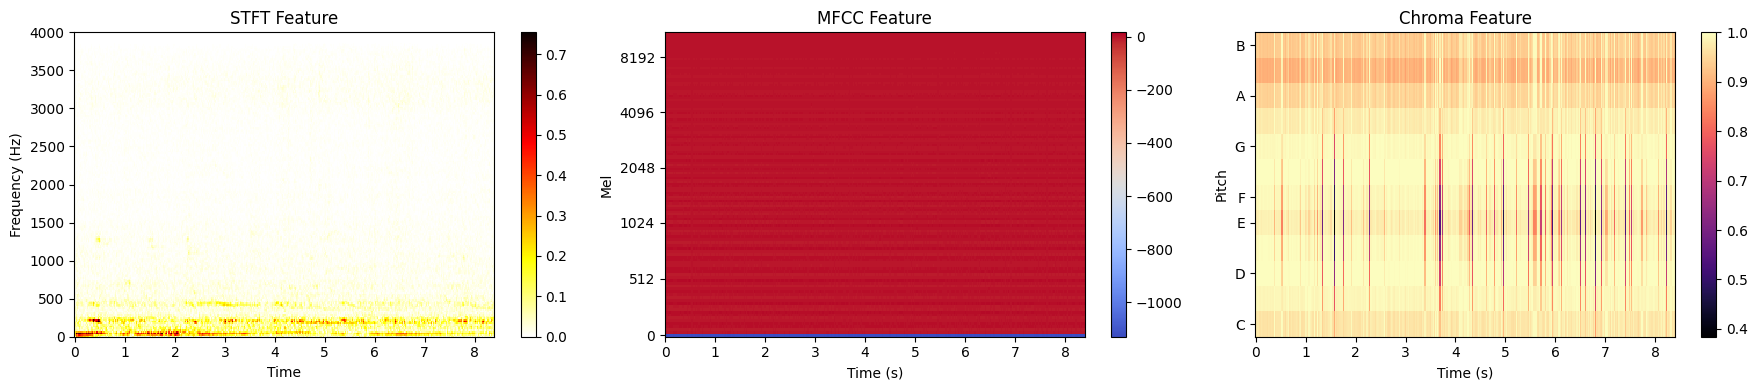

In [ ]:
hdf5_file_path_stft = 'stft_features2.h5'
hdf5_file_path_mfcc = 'mfcc_features2.h5'
hdf5_file_path_chroma = 'chroma_features2.h5'

with h5py.File(hdf5_file_path_stft, 'r+') as hdf5_file_stft, \
        h5py.File(hdf5_file_path_mfcc, 'r+') as hdf5_file_mfcc, \
        h5py.File(hdf5_file_path_chroma, 'r+') as hdf5_file_chroma:

    target_filename_stft = list(hdf5_file_stft.keys())[2]
    if target_filename_stft in hdf5_file_stft:
        group_stft = hdf5_file_stft[target_filename_stft]
        stft_data = group_stft['data'][:]
    else:
        print(f"Filename '{target_filename_stft}' not found in the STFT HDF5 file.")

    target_filename_mfcc = list(hdf5_file_mfcc.keys())[2]
    if target_filename_mfcc in hdf5_file_mfcc:
        group_mfcc = hdf5_file_mfcc[target_filename_mfcc]
        mfcc_data = group_mfcc['data'][:]
    else:
        print(f"Filename '{target_filename_mfcc}' not found in the MFCC HDF5 file.")

    target_filename_chroma = list(hdf5_file_chroma.keys())[2]
    if target_filename_chroma in hdf5_file_chroma:
        group_chroma = hdf5_file_chroma[target_filename_chroma]
        chroma_data = group_chroma['data'][:]
    else:
        print(f"Filename '{target_filename_chroma}' not found in the Chroma HDF5 file.")


    # Plot STFT feature
    plt.figure(figsize=(18, 4))
    plt.subplot(131)
    librosa.display.specshow(stft_data, x_axis='time', y_axis='hz', cmap="hot_r")
    plt.colorbar()
    plt.title('STFT Feature')
    plt.xlabel('Time')
    plt.ylabel('Frequency (Hz)')
    plt.ylim(0, 4000)

    # Plot MFCC feature
    plt.subplot(132)
    librosa.display.specshow(mfcc_data, x_axis='time', y_axis='mel')
    plt.colorbar()
    plt.title('MFCC Feature')
    plt.xlabel('Time (s)')
    plt.ylabel('Mel')

    # Plot Chroma feature
    plt.subplot(133)
    librosa.display.specshow(chroma_data, x_axis='time', y_axis='chroma')
    plt.colorbar()
    plt.title('Chroma Feature')
    plt.xlabel('Time (s)')
    plt.ylabel('Pitch')

    plt.tight_layout()
    plt.show()


Label for 200502-123321-28_2: [2]


<ipython-input-28-e15f7b3ac296>:12: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  librosa.display.specshow(stft_data, x_axis='time', y_axis='hz', cmap="hot_r")


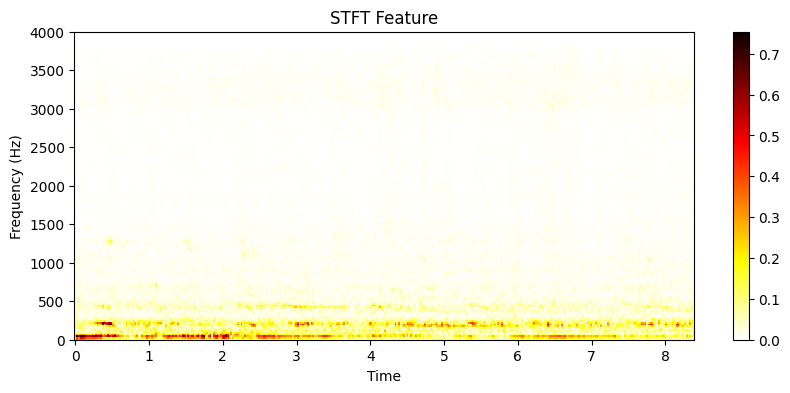

In [ ]:
hdf5_file_path = 'stft_features2.h5'
with h5py.File(hdf5_file_path, 'r+') as hdf5_file:
    target_filename = list(hdf5_file.keys())[2]

    if target_filename in hdf5_file:
        group = hdf5_file[target_filename]
        stft_data = group['data'][:]
        label = group['label'][()]
        print(f"Label for {target_filename}: {label}")

        plt.figure(figsize=(10, 4))
        librosa.display.specshow(stft_data, x_axis='time', y_axis='hz', cmap="hot_r")
        plt.colorbar()
        plt.title('STFT Feature')
        plt.xlabel('Time')
        plt.ylabel('Frequency (Hz)')

        plt.ylim(0, 4000)
        plt.show()
    else:
        print(f"Filename '{target_filename}' not found in the HDF5 file.")

Label for 200502-123321-28_2: [2]


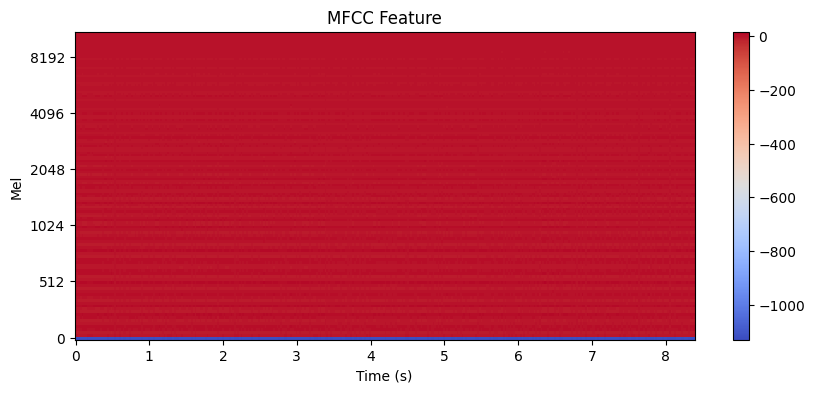

In [ ]:
hdf5_file_path = 'mfcc_features2.h5'

with h5py.File(hdf5_file_path, 'r+') as hdf5_file:
    target_filenames = list(hdf5_file.keys())
    target_filename = target_filenames[2]

    if target_filename in hdf5_file:
        group = hdf5_file[target_filename]
        mfcc_data = group['data'][:]
        label = group['label'][()]

        print(f"Label for {target_filename}: {label}")

        plt.figure(figsize=(10, 4))
        librosa.display.specshow(mfcc_data, x_axis='time', y_axis='mel')
        plt.colorbar()
        plt.title('MFCC Feature')
        plt.xlabel('Time (s)')
        plt.ylabel('Mel')
        plt.show()
    else:
        print(f"Filename '{target_filename}' not found in the HDF5 file.")

Label for 200502-123321-28_2: [2]


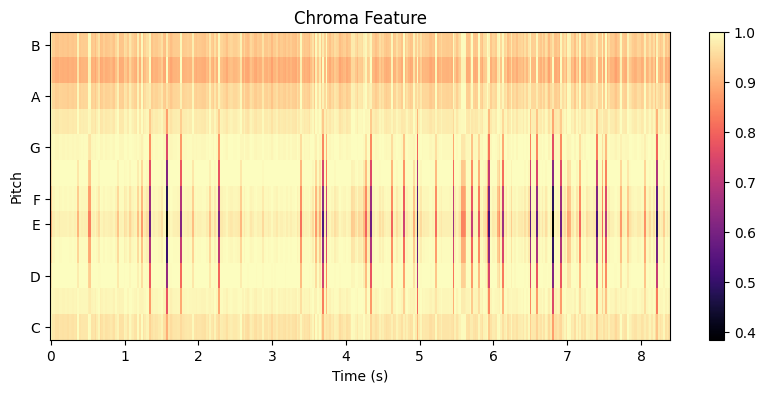

In [ ]:
hdf5_file_path = 'chroma_features2.h5'

with h5py.File(hdf5_file_path, 'r+') as hdf5_file:
    target_filenames = list(hdf5_file.keys())
    target_filename = target_filenames[2]

    if target_filename in hdf5_file:
        group = hdf5_file[target_filename]
        chroma_data = group['data'][:]
        label = group['label'][()]

        print(f"Label for {target_filename}: {label}")

        plt.figure(figsize=(10, 4))
        librosa.display.specshow(chroma_data, x_axis='time', y_axis='chroma')
        plt.colorbar()
        plt.title('Chroma Feature')
        plt.xlabel('Time (s)')
        plt.ylabel('Pitch')
        plt.show()
    else:
        print(f"Filename '{target_filename}' not found in the HDF5 file.")

# Since I use Google Colab and it is have Memory and storage limitation, you should save your current extracted data into Gdrive before continue. Restart the runtime, but now start from code below after mounting the Gdrive

Concatenate data for every category to get data represent time till event (Bee Swarm)

In [ ]:
stft_hdf5_file_paths = {
    21: '/content/stft_features21.h5',
    14: '/content/stft_features14.h5',
    7: '/content/stft_features7.h5',
    2: '/content/stft_features2.h5'
}

stft_new_hdf5_file_paths = {
    21: '/content/cat_stft_features21.h5',
    14: '/content/cat_stft_features14.h5',
    7: '/content/cat_stft_features7.h5',
    2: '/content/cat_stft_features2.h5'
}

mfcc_hdf5_file_paths = {
    21: '/content/mfcc_features21.h5',
    14: '/content/mfcc_features14.h5',
    7: '/content/mfcc_features7.h5',
    2: '/content/mfcc_features2.h5'
}

mfcc_new_hdf5_file_paths = {
    21: '/content/cat_mfcc_features21.h5',
    14: '/content/cat_mfcc_features14.h5',
    7: '/content/cat_mfcc_features7.h5',
    2: '/content/cat_mfcc_features2.h5'
}

chroma_hdf5_file_paths = {
    21: '/content/chroma_features21.h5',
    14: '/content/chroma_features14.h5',
    7: '/content/chroma_features7.h5',
    2: '/content/chroma_features2.h5'
}

chroma_new_hdf5_file_paths = {
    21: '/content/cat_chroma_features21.h5',
    14: '/content/cat_chroma_features14.h5',
    7: '/content/cat_chroma_features7.h5',
    2: '/content/cat_chroma_features2.h5'
}

def concatenate_features(features_dict, new_hdf5_file_paths):
    for label, hdf5_file_path in features_dict.items():
        all_data = []
        with h5py.File(hdf5_file_path, 'r+') as hdf5_file:
            for target_filename in tqdm(hdf5_file.keys(), desc=f"Loading Features for label {label}"):
                group = hdf5_file[target_filename]
                x = group['data'][:]
                all_data.append(x)

        concatenated_data = np.concatenate(all_data, axis=1) if all_data else None
        if concatenated_data is not None:
            print(f"Shape of concatenated features for label {label}:", concatenated_data.shape)
            new_hdf5_file_path = new_hdf5_file_paths[label]
            with h5py.File(new_hdf5_file_path, 'w') as new_hdf5_file:
                new_hdf5_file.create_dataset('data2', data=concatenated_data)


concatenate_features(stft_hdf5_file_paths, stft_new_hdf5_file_paths)
concatenate_features(mfcc_hdf5_file_paths, mfcc_new_hdf5_file_paths)
concatenate_features(chroma_hdf5_file_paths, chroma_new_hdf5_file_paths)
print("Concatenate STFT/MFCC/Chroma Done")

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = '/content/stft_features21.h5', errno = 2, error message = 'No such file or directory', flags = 1, o_flags = 2)

Label for /content/drive/MyDrive/cat_stft_features21.h5


<ipython-input-3-e2b82bfd7582>:7: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  librosa.display.specshow(stft_data, x_axis='time', y_axis='hz', cmap="hot_r")


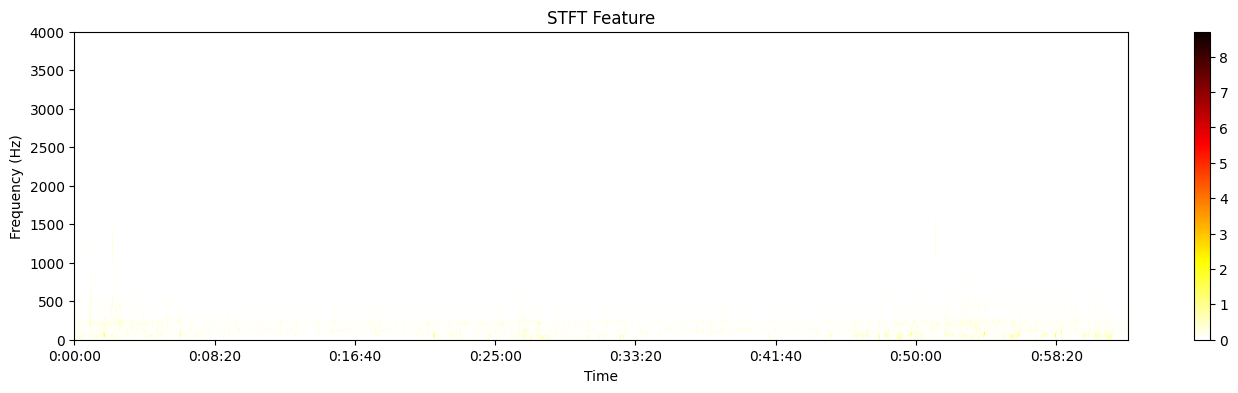

In [ ]:
hdf5_file_path = '/content/drive/MyDrive/cat_stft_features21.h5'
with h5py.File(hdf5_file_path, 'r+') as hdf5_file:
    stft_data = hdf5_file['data2'][:]
    print(f"Label for {hdf5_file_path}")

    plt.figure(figsize=(17, 4))
    librosa.display.specshow(stft_data, x_axis='time', y_axis='hz', cmap="hot_r")
    plt.colorbar()
    plt.title('STFT Feature')
    plt.xlabel('Time')
    plt.ylabel('Frequency (Hz)')

    plt.ylim(0, 4000)
    plt.show()

Label for /content/drive/MyDrive/cat_mfcc_features21.h5


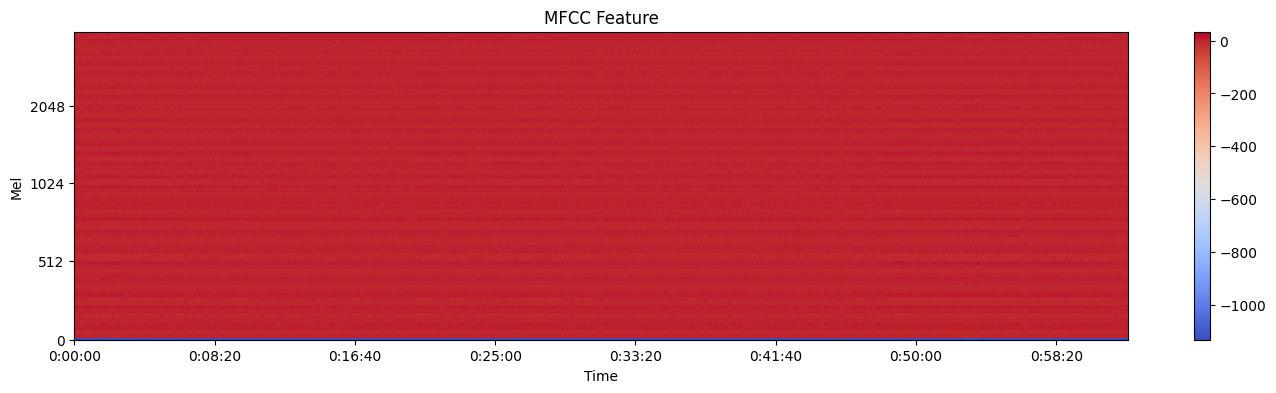

In [ ]:
hdf5_file_path = '/content/drive/MyDrive/cat_mfcc_features21.h5'
with h5py.File(hdf5_file_path, 'r+') as hdf5_file:
    mfcc_data = hdf5_file['data2'][:]
    print(f"Label for {hdf5_file_path}")

    plt.figure(figsize=(17, 4))
    librosa.display.specshow(mfcc_data, x_axis='time', y_axis='mel')
    plt.colorbar()
    plt.title('MFCC Feature')
    plt.xlabel('Time')
    plt.ylabel('Mel')

    plt.ylim(0, 4000)
    plt.show()

Label for /content/drive/MyDrive/cat_chroma_features21.h5


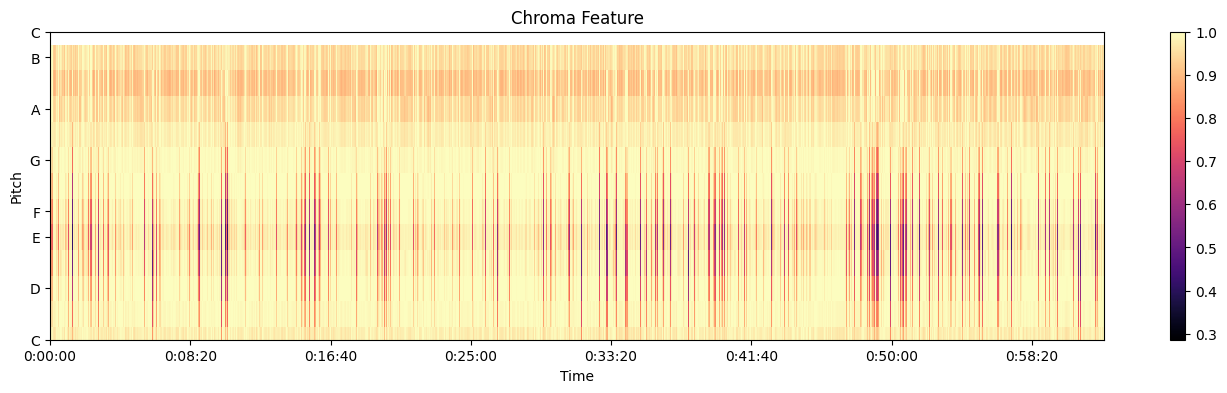

In [ ]:
hdf5_file_path = '/content/drive/MyDrive/cat_chroma_features21.h5'
with h5py.File(hdf5_file_path, 'r+') as hdf5_file:
    chroma_data = hdf5_file['data2'][:]
    print(f"Label for {hdf5_file_path}")

    plt.figure(figsize=(17, 4))
    librosa.display.specshow(chroma_data, x_axis='time', y_axis='chroma')
    plt.colorbar()
    plt.title('Chroma Feature')
    plt.xlabel('Time')
    plt.ylabel('Pitch')
    plt.ylim(0, 12)
    plt.show()



> CONCATENATE DONE!



Generate Autocorrelation score for y label from concatenated data of every category






In [4]:
def process_and_score_features(hdf5_file_path):
    with h5py.File(hdf5_file_path, 'r+') as hdf5_file:
        for target_filename in tqdm(hdf5_file.keys(), desc="Scoring The Features"):
            group = hdf5_file[target_filename]
            stft_data = group['data'][:]
            autocorrelation_scores = [np.correlate(row, row, mode='full') for row in stft_data]
            scores = np.median(autocorrelation_scores, axis=1)

            # Define thresholds
            negative_threshold = -0.2
            positive_threshold = 0.2

            categorized_scores = np.zeros_like(scores, dtype=int)
            categorized_scores[scores < negative_threshold] = -1
            categorized_scores[scores > positive_threshold] = 1

            if 'score2' in group:
                del group['score2']

            group.create_dataset('score2', data=categorized_scores)

    print(f"features and scores have been updated in {hdf5_file_path}")

hdf5_files = ['/content/drive/MyDrive/stft_features21.h5', '/content/drive/MyDrive/stft_features14.h5',
              '/content/drive/MyDrive/stft_features7.h5', '/content/drive/MyDrive/stft_features2.h5',
              '/content/drive/MyDrive/mfcc_features21.h5', '/content/drive/MyDrive/mfcc_features14.h5',
              '/content/drive/MyDrive/mfcc_features7.h5', '/content/drive/MyDrive/mfcc_features2.h5',
              '/content/drive/MyDrive/chroma_features21.h5', '/content/drive/MyDrive/chroma_features14.h5',
              '/content/drive/MyDrive/chroma_features7.h5', '/content/drive/MyDrive/chroma_features2.h5']

for file_path in hdf5_files:
    process_and_score_features(file_path)

print("STFT/MFCC/Chroma/ done")

Scoring The Features: 100%|██████████| 447/447 [00:19<00:00, 23.46it/s]


features and scores have been updated in /content/drive/MyDrive/stft_features21.h5


Scoring The Features: 100%|██████████| 1674/1674 [01:20<00:00, 20.79it/s]


features and scores have been updated in /content/drive/MyDrive/stft_features14.h5


Scoring The Features: 100%|██████████| 2926/2926 [02:22<00:00, 20.59it/s]


features and scores have been updated in /content/drive/MyDrive/stft_features7.h5


Scoring The Features: 100%|██████████| 3740/3740 [03:00<00:00, 20.69it/s]


features and scores have been updated in /content/drive/MyDrive/stft_features2.h5


Scoring The Features: 100%|██████████| 447/447 [00:07<00:00, 57.66it/s]


features and scores have been updated in /content/drive/MyDrive/mfcc_features21.h5


Scoring The Features: 100%|██████████| 1674/1674 [00:27<00:00, 61.11it/s]


features and scores have been updated in /content/drive/MyDrive/mfcc_features14.h5


Scoring The Features: 100%|██████████| 2926/2926 [00:49<00:00, 58.75it/s]


features and scores have been updated in /content/drive/MyDrive/mfcc_features7.h5


Scoring The Features: 100%|██████████| 3740/3740 [00:45<00:00, 81.38it/s]


features and scores have been updated in /content/drive/MyDrive/mfcc_features2.h5


Scoring The Features: 100%|██████████| 447/447 [00:00<00:00, 600.76it/s]


features and scores have been updated in /content/drive/MyDrive/chroma_features21.h5


Scoring The Features: 100%|██████████| 1674/1674 [00:03<00:00, 481.24it/s]


features and scores have been updated in /content/drive/MyDrive/chroma_features14.h5


Scoring The Features: 100%|██████████| 2926/2926 [00:11<00:00, 245.81it/s]


features and scores have been updated in /content/drive/MyDrive/chroma_features7.h5


Scoring The Features: 100%|██████████| 3740/3740 [00:09<00:00, 375.06it/s]


features and scores have been updated in /content/drive/MyDrive/chroma_features2.h5
STFT/MFCC/Chroma/ done




> **3 FE and autocorrelation done!**



## **AUDIO NOISE FILTERING**

**STFT/MFCC/Chroma + (Gauss, Laplacian, LoG)**

In [ ]:
feature_types = ["STFT", "MFCC", "Chroma"]

hdf5_file_paths = {
    "STFT": {
        21: '/content/drive/MyDrive/cat_stft_features21.h5',
        14: '/content/drive/MyDrive/cat_stft_features14.h5',
        7: '/content/drive/MyDrive/cat_stft_features7.h5',
        2: '/content/drive/MyDrive/cat_stft_features2.h5'
    },
    "MFCC": {
        21: '/content/drive/MyDrive/cat_mfcc_features21.h5',
        14: '/content/drive/MyDrive/cat_mfcc_features14.h5',
        7: '/content/drive/MyDrive/cat_mfcc_features7.h5',
        2: '/content/drive/MyDrive/cat_mfcc_features2.h5'
    },
    "Chroma": {
        21: '/content/drive/MyDrive/cat_chroma_features21.h5',
        14: '/content/drive/MyDrive/cat_chroma_features14.h5',
        7: '/content/drive/MyDrive/cat_chroma_features7.h5',
        2: '/content/drive/MyDrive/cat_chroma_features2.h5'
    }
}

for feature_type in feature_types:
    print(f"Processing {feature_type} Features")

    for label, hdf5_file_path in tqdm(hdf5_file_paths[feature_type].items(), desc=f"Filtering Features for {feature_type}"):
        with h5py.File(hdf5_file_path, 'r+') as hdf5_file:
            x = hdf5_file['data2'][:]
            gauss_filtered = gaussian_filter(np.abs(x), sigma=0.5, order=1)
            laplacian_filtered = laplace(np.abs(x))
            log_filtered = gaussian_laplace(np.abs(x), sigma=0.5)

            if 'data_gauss' in hdf5_file:
                del hdf5_file['data_gauss']
            hdf5_file.create_dataset('data_gauss', data=gauss_filtered)

            if 'data_laplacian' in hdf5_file:
                del hdf5_file['data_laplacian']
            hdf5_file.create_dataset('data_laplacian', data=laplacian_filtered)

            if 'data_log' in hdf5_file:
                del hdf5_file['data_log']
            hdf5_file.create_dataset('data_log', data=log_filtered)

print("Done")

Processing STFT Features


Filtering Features for STFT:  50%|█████     | 2/4 [04:59<05:35, 167.74s/it]

**DANI Filtering**

In [ ]:
#import enum_types.py, draw.py from local

import os, sys
from scipy.io import wavfile
from librosa import stft,istft
from librosa.util import fix_length
from scipy.stats import zscore
from scipy.fft import fft, ifft
import Enum_types as et
import numpy as np
from scipy import signal
import Draw as d
import librosa
from Enum_types import Feature_type as fet


class dani_filtering:

    def __init__(self,separation_logic:int=et.separation_type.BY_TIME_SLICES.value):
        self.separation_logic = et.separation_type(separation_logic)
        self.axis = separation_logic
        if separation_logic == 2:
            self.axis = None


    def norming(self,data:np.ndarray, norming_type:et.norming_type.Z_NORMING):

        tmp = zscore(data, axis=self.axis)
        N = np.size(data,self.axis)
        if norming_type == et.norming_type.SCALING:
            tmp*=np.sqrt((N-1)/N)
        return tmp


    def tresholding(self,data:np.ndarray, filtering_type:et.dani_filtering_type=et.dani_filtering_type.NEGATIVE):
        if filtering_type == et.dani_filtering_type.NEGATIVE:
            return np.where(data < 0, 0, data)
        else: # MEAN by separation
            avg = data.mean(axis=self.axis)

            if self.axis == 1:
                return np.where(data.T<avg.T,0,data.T).T
            else:
                return np.where(data < avg, 0, data)


    def limited_fft(self, data:np.ndarray, num_of_fft_components:int=50):
        resh = False

        if self.separation_logic == et.separation_type.WHOLE_ONE_UNIT:
            resh = True
            shape = data.shape

        tmp = fft(x=data.ravel() if resh else data, axis=0 if self.axis == None else self.axis,
                  norm = None, overwrite_x=False)

        if self.separation_logic == et.separation_type.WHOLE_ONE_UNIT:
            tmp[num_of_fft_components:]=0
        elif self.separation_logic == et.separation_type.BY_TIME_SLICES:
            tmp[num_of_fft_components:] = 0
        else:
            tmp[:,num_of_fft_components:] = 0

        tmp = ifft(tmp, axis=0 if self.axis == None else self.axis, norm=None, overwrite_x=False)

        if self.separation_logic == et.separation_type.WHOLE_ONE_UNIT:
            tmp = np.reshape(tmp,shape)
        return tmp


    def visualize(self,data,idx,xlabel, ylabel,title,title_add, draw_ts,draw_hm, xvalues, yvalues,sav_fig, dpi ):
        if draw_ts:
            if self.separation_logic == et.separation_type.BY_TIME_SLICES:
                d.drawTimeSeries(data=data[:,idx], xlabel=xlabel, ylabel=ylabel,
                                 text=str(title)+title_add,save_fig=sav_fig,xvalues=yvalues,dpi=dpi)
            else:
                d.drawTimeSeries(data=data[idx], xlabel=xlabel, ylabel=ylabel,
                                 text=title+title_add,save_fig=sav_fig, xvalues=xvalues,dpi=dpi)
        if draw_hm:
            d.drawHeatMap(data=data, xvalues=xvalues,yvalues=yvalues,xlabel='Time (sec)', ylabel='Frequvency (Hz)',
                          title=title,save_fig=sav_fig,dpi=dpi)


    def fit_demo(self, wav_data:np.ndarray, sr:int = 22050, freq_id:int = 199, draw_ts:bool=False,
                 draw_hm:bool=False, num_of_fft_components:float=0.5,save_fig:bool=False, dpi:int=300):
        return self.fit(data=wav_data, sr=sr, freq_id=freq_id, dr_ts=draw_ts, dr_hm=draw_hm,
                        num_of_fft_components=num_of_fft_components, save_fig=save_fig,dpi=dpi)


    def fit(self,data:np.ndarray, sr:float = 8000, freq_id:int = 130,dr_ts:bool=False,
            dr_hm:bool=False, num_of_fft_components:float=0.5,save_fig:bool=False,dpi:int=300):

        len_dim_1 = len(data)       # frequencies - 10
        len_dim_2 = len(data[0])    # times - 657

        frequencies = np.arange(0, len_dim_1) * sr / ((len_dim_1 - 1) * 2)
        times = np.linspace(0,len_dim_2/sr, len_dim_2+1)

        if self.separation_logic == et.separation_type.BY_TIME_SLICES:
            lab_x = "Frequency (Hz)"
            lab_y = "Magnitude"
            ts_id = min(freq_id, len_dim_2 - 1)
            tx2 = f" at {round(times[ts_id],2)} min"
            n_of_fft = int(num_of_fft_components * len_dim_1)
        else:
            lab_x = "Time"
            lab_y = "Amplitude"
            ts_id = min(freq_id, len_dim_1 - 1)
            tx2 = f" at {int(frequencies[ts_id])} Hz"
            n_of_fft = int(num_of_fft_components * len_dim_2)

        tx = 'Original data'
        self.visualize(abs(data),ts_id,lab_x,lab_y,tx,tx2,dr_ts,dr_hm,times,frequencies,save_fig,dpi)

    # Z-SCORE NORMING
        tx = 'Z-Normed data'
        normed_sp_m = self.norming(data,et.norming_type.SCALING)
        self.visualize(abs(normed_sp_m),ts_id,lab_x,lab_y,tx,tx2,dr_ts,dr_hm,times,frequencies,save_fig,dpi)

    # TRESHOLDING (NEGATIVE)
        tx = 'Thresholded (by 0) data '
        filt_normed_sp_m = self.tresholding(data=normed_sp_m,filtering_type=et.dani_filtering_type.NEGATIVE)
        self.visualize(abs(filt_normed_sp_m),ts_id,lab_x,lab_y,tx,tx2, dr_ts, dr_hm,times,frequencies,save_fig,dpi)

    #SMOOTHING (LIMITED FFT)
        tx = f"Smoothed data with limited number of FFT ({n_of_fft}) components"
        smoothed_sp_m = self.limited_fft(data=filt_normed_sp_m, num_of_fft_components=n_of_fft)
        self.visualize(abs(smoothed_sp_m), ts_id, lab_x, lab_y, tx, tx2, dr_ts, dr_hm,times,frequencies,save_fig,dpi)

    # TRESHOLDING 2
        tx = 'Thresholded (by Average) data'
        data = self.tresholding(data=smoothed_sp_m, filtering_type=et.dani_filtering_type.MEAN)
        self.visualize(abs(data), ts_id, lab_x, lab_y, tx, tx2, dr_ts, dr_hm,times,frequencies,save_fig,dpi)
        return data

In [ ]:
filtering = dani_filtering()
feature_types = ["STFT", "MFCC", "Chroma"]
hdf5_file_paths = {
    "STFT": {
        21: '/content/drive/MyDrive/cat_stft_features21.h5',
        14: '/content/drive/MyDrive/cat_stft_features14.h5',
        7: '/content/drive/MyDrive/cat_stft_features7.h5',
        2: '/content/drive/MyDrive/cat_stft_features2.h5'
    },
    "MFCC": {
        21: '/content/drive/MyDrive/cat_mfcc_features21.h5',
        14: '/content/drive/MyDrive/cat_mfcc_features14.h5',
        7: '/content/drive/MyDrive/cat_mfcc_features7.h5',
        2: '/content/drive/MyDrive/cat_mfcc_features2.h5'
    },
    "Chroma": {
        21: '/content/drive/MyDrive/cat_chroma_features21.h5',
        14: '/content/drive/MyDrive/cat_chroma_features14.h5',
        7: '/content/drive/MyDrive/cat_chroma_features7.h5',
        2: '/content/drive/MyDrive/cat_chroma_features2.h5'
    }
}

for feature_type in feature_types:
    print(f"Processing {feature_type} Features")

    for label, hdf5_file_path in tqdm(hdf5_file_paths[feature_type].items(), desc=f"Filtering Features for {feature_type}"):
        with h5py.File(hdf5_file_path, 'r+') as hdf5_file:
            x = hdf5_file['data2'][:]
            dani_filtered = filtering.fit(np.abs(x))

            if 'data_dani' in hdf5_file:
                del hdf5_file['data_dani']
            hdf5_file.create_dataset('data_dani', data=dani_filtered)

print("Done")

Processed DANI features have been saved to /content/drive/MyDrive/dani_filter21.h5
Processed DANI features have been saved to /content/drive/MyDrive/dani_filter14.h5
Processed DANI features have been saved to /content/drive/MyDrive/dani_filter7.h5
Processed DANI features have been saved to /content/drive/MyDrive/dani_filter2.h5


/var/folders/tm/hjv2jlqs1m7gy94qx457yzdm0000gn/T/ipykernel_76745/829588302.py:9: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  librosa.display.specshow(stft_data, x_axis='time', y_axis='hz', cmap="hot_r")


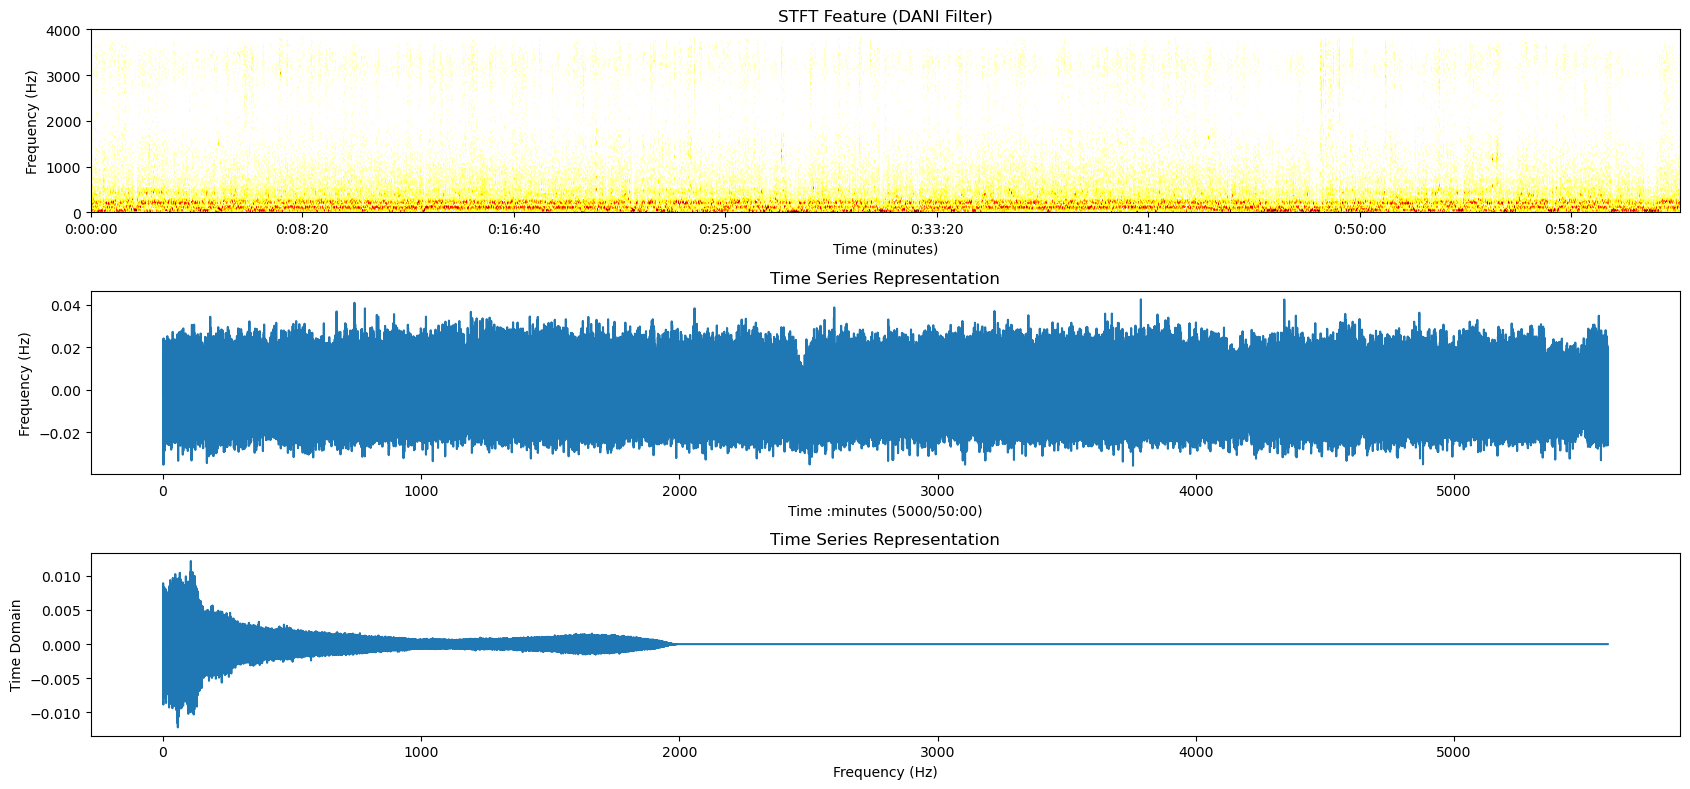

In [ ]:
#STFT and iSTFT for time series representation for dani filter category 21
hdf5_file_path = 'dani_filter21.h5'

with h5py.File(hdf5_file_path, 'r+') as hdf5_file:
    stft_data = hdf5_file['data_dani'][:]
    plt.figure(figsize=(17, 8))

    plt.subplot(3, 1, 1)
    librosa.display.specshow(stft_data, x_axis='time', y_axis='hz', cmap="hot_r")
    # plt.colorbar(format='%+2.0f dB')
    plt.title('STFT Feature (DANI Filter)')
    plt.xlabel('Time (minutes)')
    plt.ylabel('Frequency (Hz)')
    plt.ylim(0, 4000)

    plt.subplot(3, 1, 2)
    times = np.linspace(0, len(librosa.istft(stft_data)) / 7200, num=len(librosa.istft(stft_data)))
    plt.plot(times, librosa.istft(stft_data))
    plt.title('Time Series Representation')
    plt.xlabel('Time :minutes (5000/50:00)')
    plt.ylabel('Frequency (Hz)')

    plt.subplot(3, 1, 3)
    times = np.linspace(0, len(librosa.istft(stft_data.T)) / 7200, num=len(librosa.istft(stft_data.T)))
    plt.plot(times, librosa.istft(stft_data.T))
    plt.title('Time Series Representation')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Time Domain')

    plt.tight_layout()
    plt.show()


<!-- STFT BELOW -->

/var/folders/tm/hjv2jlqs1m7gy94qx457yzdm0000gn/T/ipykernel_76745/1246987636.py:8: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  librosa.display.specshow(stft_data, x_axis='time', y_axis='hz', cmap="hot_r")


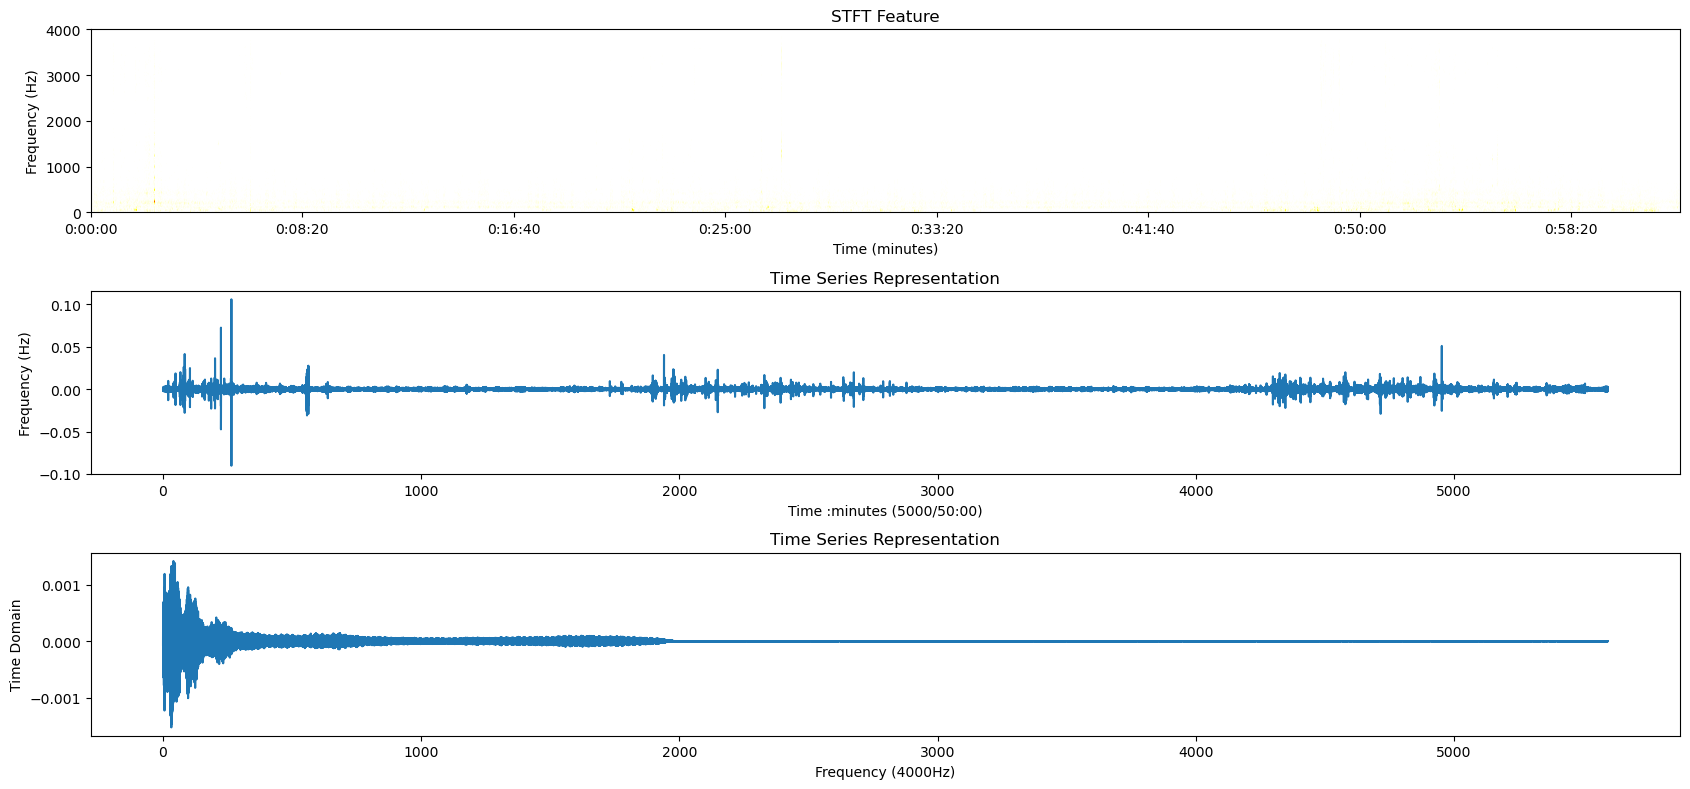

In [ ]:
#Specrogram and time series representation for STFT feature category 21

hdf5_file_path = 'cat_stft_features21.h5'

with h5py.File(hdf5_file_path, 'r+') as hdf5_file:
    stft_data = hdf5_file['data2'][:]
    plt.figure(figsize=(17, 8))

    plt.subplot(3, 1, 1)
    librosa.display.specshow(stft_data, x_axis='time', y_axis='hz', cmap="hot_r")

    plt.title('STFT Feature')
    plt.xlabel('Time (minutes)')
    plt.ylabel('Frequency (Hz)')
    plt.ylim(0, 4000)

    plt.subplot(3, 1, 2)
    times = np.linspace(0, len(librosa.istft(stft_data)) / 7200, num=len(librosa.istft(stft_data)))
    plt.plot(times, librosa.istft(stft_data))
    plt.title('Time Series Representation')
    plt.xlabel('Time :minutes (5000/50:00)')
    plt.ylabel('Frequency (Hz)')

    plt.subplot(3, 1, 3)
    times = np.linspace(0, len(librosa.istft(stft_data.T)) / 7200, num=len(librosa.istft(stft_data.T)))
    plt.plot(times, librosa.istft(stft_data.T))
    plt.title('Time Series Representation')
    plt.xlabel('Frequency (4000Hz)')
    plt.ylabel('Time Domain')

    plt.tight_layout()
    plt.show()

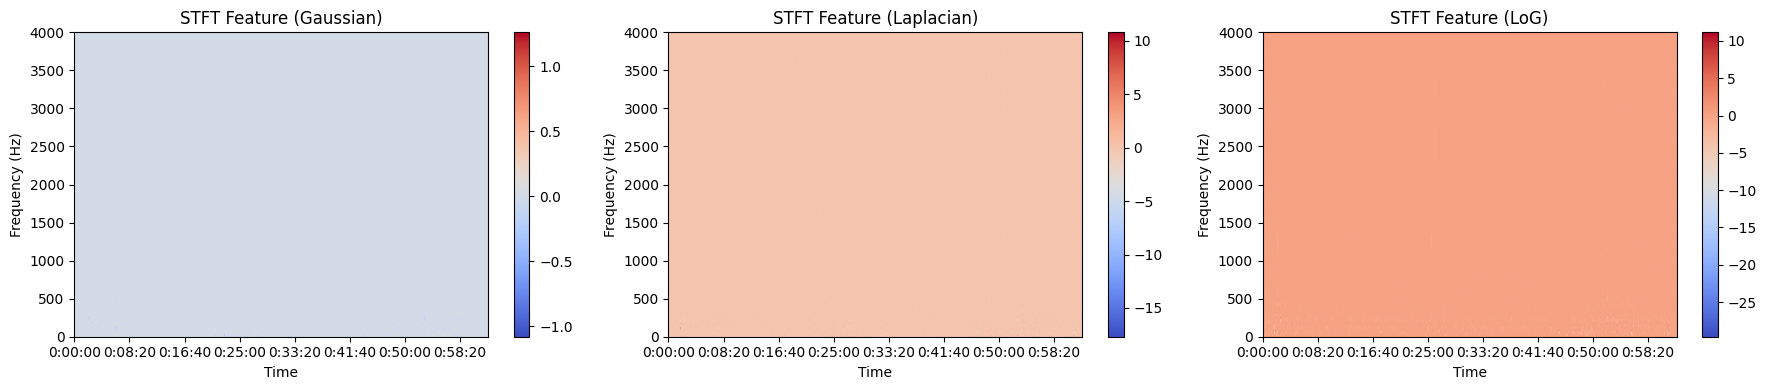

In [ ]:
#Specshow STFT Filtered
hdf5_file_path_stft = '/content/drive/MyDrive/cat_stft_features21.h5'

with h5py.File(hdf5_file_path_stft, 'r+') as hdf5_file_stft:
    gauss_stft = hdf5_file_stft['data_gauss'][:]
    laplacian_stft = hdf5_file_stft['data_laplacian'][:]
    log_stft = hdf5_file_stft['data_log'][:]

    # Plot STFT Gaussian
    plt.figure(figsize=(18, 4))
    plt.subplot(131)
    librosa.display.specshow(gauss_stft, x_axis='time', y_axis='hz')
    plt.colorbar()
    plt.title('STFT Feature (Gaussian)')
    plt.xlabel('Time')
    plt.ylabel('Frequency (Hz)')
    plt.ylim(0, 4000)

    # Plot STFT Laplacian
    plt.subplot(132)
    librosa.display.specshow(laplacian_stft, x_axis='time', y_axis='hz')
    plt.colorbar()
    plt.title('STFT Feature (Laplacian)')
    plt.xlabel('Time')
    plt.ylabel('Frequency (Hz)')
    plt.ylim(0, 4000)

    # Plot STFT LoG
    plt.subplot(133)
    librosa.display.specshow(log_stft, x_axis='time', y_axis='hz')
    plt.colorbar()
    plt.title('STFT Feature (LoG)')
    plt.xlabel('Time')
    plt.ylabel('Frequency (Hz)')
    plt.ylim(0, 4000)

    plt.tight_layout()
    plt.show()


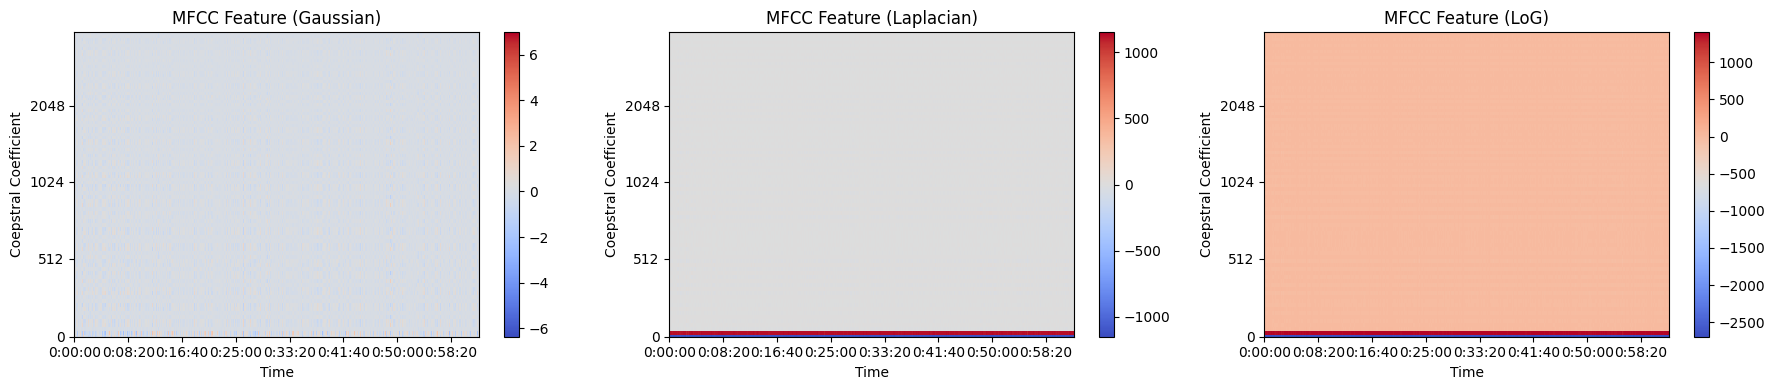

In [ ]:
#Specshow MFCC Filtered
hdf5_file_path_stft = '/content/drive/MyDrive/cat_mfcc_features21.h5'

with h5py.File(hdf5_file_path_stft, 'r+') as hdf5_file_stft:
    gauss_stft = hdf5_file_stft['data_gauss'][:]
    laplacian_stft = hdf5_file_stft['data_laplacian'][:]
    log_stft = hdf5_file_stft['data_log'][:]

    # Plot STFT Gaussian
    plt.figure(figsize=(18, 4))
    plt.subplot(131)
    librosa.display.specshow(gauss_stft, x_axis='time', y_axis='mel')
    plt.colorbar()
    plt.title('MFCC Feature (Gaussian)')
    plt.xlabel('Time')
    plt.ylabel('Coepstral Coefficient')
    plt.ylim(0, 4000)

    # Plot STFT Laplacian
    plt.subplot(132)
    librosa.display.specshow(laplacian_stft, x_axis='time', y_axis='mel')
    plt.colorbar()
    plt.title('MFCC Feature (Laplacian)')
    plt.xlabel('Time')
    plt.ylabel('Coepstral Coefficient')
    plt.ylim(0, 4000)

    # Plot STFT LoG
    plt.subplot(133)
    librosa.display.specshow(log_stft, x_axis='time', y_axis='mel')
    plt.colorbar()
    plt.title('MFCC Feature (LoG)')
    plt.xlabel('Time')
    plt.ylabel('Coepstral Coefficient')
    plt.ylim(0, 4000)

    plt.tight_layout()
    plt.show()

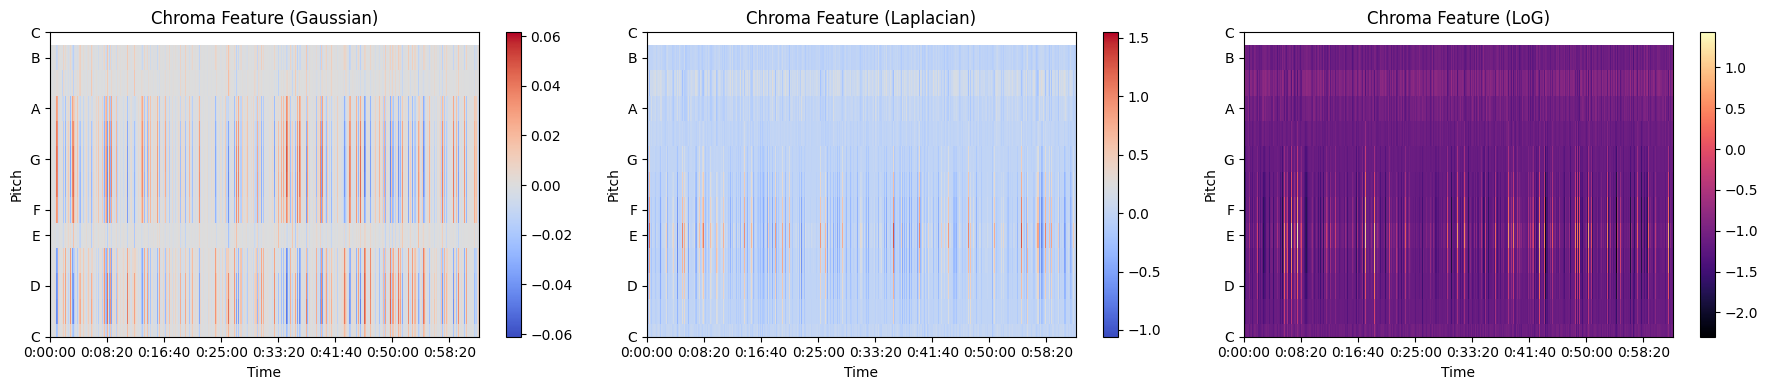

In [ ]:
#Specshow Chroma Filtered
hdf5_file_path_stft = '/content/drive/MyDrive/cat_chroma_features21.h5'

with h5py.File(hdf5_file_path_stft, 'r+') as hdf5_file_stft:
    gauss_stft = hdf5_file_stft['data_gauss'][:]
    laplacian_stft = hdf5_file_stft['data_laplacian'][:]
    log_stft = hdf5_file_stft['data_log'][:]

    # Plot STFT Gaussian
    plt.figure(figsize=(18, 4))
    plt.subplot(131)
    librosa.display.specshow(gauss_stft, x_axis='time', y_axis='chroma')
    plt.colorbar()
    plt.title('Chroma Feature (Gaussian)')
    plt.xlabel('Time')
    plt.ylabel('Pitch')
    plt.ylim(0, 12)

    # Plot STFT Laplacian
    plt.subplot(132)
    librosa.display.specshow(laplacian_stft, x_axis='time', y_axis='chroma')
    plt.colorbar()
    plt.title('Chroma Feature (Laplacian)')
    plt.xlabel('Time')
    plt.ylabel('Pitch')
    plt.ylim(0, 12)

    # Plot STFT LoG
    plt.subplot(133)
    librosa.display.specshow(log_stft, x_axis='time', y_axis='chroma')
    plt.colorbar()
    plt.title('Chroma Feature (LoG)')
    plt.xlabel('Time')
    plt.ylabel('Pitch')
    plt.ylim(0, 12)

    plt.tight_layout()
    plt.show()


## **AUDIO FEATURE SELECTION**

**Genetic Algorithm**

In [ ]:
def initialize_population(population_size, num_features):
    return np.random.randint(2, size=(population_size, num_features))

def elitism(population, fitness_values, num_values=5):
    sorted_indices = np.argsort(fitness_values)[::-1][:num_values]
    top_population = [population[x] for x in sorted_indices]
    return top_population.copy()

def crossover(parent1, parent2, crossover_probability):
    if random.uniform(0, 1) < crossover_probability:
        crossover_point = random.randint(1, len(parent1) - 1)
        child = np.concatenate([parent1[:crossover_point], parent2[crossover_point:]])
        return child
    else:
        return parent1

def mutation(individual, mutation_probability):
    for i in range(len(individual)):
        if random.uniform(0, 1) < mutation_probability:
            individual[i] = 1 - individual[i]
    return individual

def roulette_selection(population, fitness_values):
    parents = random.choices(
        population=population,
        weights=fitness_values,
        k=2)
    return parents[0], parents[1]

In [ ]:
def fitness_function(individual, x, y, k_fold_n, fitness_cache):
    individual_key = tuple(individual)

    if individual_key in fitness_cache:
        return fitness_cache[individual_key]

    if np.sum(individual) == 0:
        return -np.inf

    selected_features = x[:, individual == 1]
    regressor = MLPRegressor(max_iter=1000)
    scores = cross_val_score(regressor, selected_features, y, cv=k_fold_n, scoring='neg_mean_squared_error')
    fitness = np.mean(-scores)

    fitness_cache[individual_key] = fitness
    return fitness

In [ ]:
#STFT no filter
fitness_cache = {}
population_size = 20
num_generations = 100
elitism_n = 1
crossover_probability = 0.8
mutation_probability = 0.1
k_fold_n = 5

def process_and_score_features(hdf5_file_path):
    with h5py.File(hdf5_file_path, 'r+') as hdf5_file:
        x = np.abs(hdf5_file['data2'][:])
        y = hdf5_file['score2'][:]
        population = initialize_population(population_size, x.shape[1])

        for generation in tqdm(range(num_generations), desc="Number of Generations"):
            fitness_values = np.array([fitness_function(individual, x, y, k_fold_n, fitness_cache) for individual in population])
            new_population = elitism(population, fitness_values, elitism_n)

            while len(new_population) < population_size:
                parent1, parent2 = roulette_selection(population, fitness_values)
                child = crossover(parent1, parent2, crossover_probability)
                child = mutation(child, mutation_probability)
                new_population.append(child)

            population = np.array(new_population)

        fitness_values = np.array([fitness_function(individual, x, y, k_fold_n, fitness_cache) for individual in population])
        best_individual = population[np.argmax(fitness_values)]
        best_features = [i for i in range(len(best_individual)) if best_individual[i] == 1]
        x_train_selected = x[:, best_features]

        print(f'Number of Features: {len(best_features)}')
        print(f'Best fitness value (MSE Score): {np.max(fitness_values)}')
        if 'data_stft_ga' in hdf5_file:
            del hdf5_file['data_stft_ga']

        hdf5_file.create_dataset('data_stft_ga', data=x_train_selected)

hdf5_files = ['/content/drive/MyDrive/cat_stft_features21.h5', '/content/drive/MyDrive/cat_stft_features14.h5',
              '/content/drive/MyDrive/cat_stft_features7.h5', '/content/drive/MyDrive/cat_stft_features2.h5']

for file_path in hdf5_files:
    process_and_score_features(file_path)

print("Done")

Number of Generations: 100%|██████████| 10/10 [1:16:24<00:00, 458.45s/it]


Number of Features: 80659
Best fitness value (MSE Score): 0.07872942117319885


Number of Generations: 100%|██████████| 10/10 [3:03:07<00:00, 1098.75s/it]


Number of Features: 303808
Best fitness value (MSE Score): 0.07495546641651768


Number of Generations: 100%|██████████| 10/10 [5:17:26<00:00, 1904.64s/it]


Number of Features: 530257
Best fitness value (MSE Score): 0.16302643469274336


Number of Generations: 100%|██████████| 10/10 [6:11:40<00:00, 2230.05s/it]


Number of Features: 677254
Best fitness value (MSE Score): 0.142375850970903


OSError: [Errno 107] Unable to extend file properly, errno = 107, error message = 'transport endpoint is not connected' (file write failed: time = Tue Mar 12 04:27:14 2024
, filename = '/content/drive/MyDrive/cat_stft_features2.h5', file descriptor = 44, errno = 107, error message = 'Transport endpoint is not connected', buf = 0x5b8d0fe044d8, total write size = 664, bytes this sub-write = 664, bytes actually written = 18446744073709551615, offset = 0)

In [ ]:
#STFT Gauss
fitness_cache = {}
population_size = 20
num_generations = 100
elitism_n = 1
crossover_probability = 0.8
mutation_probability = 0.1
k_fold_n = 5

def process_and_score_features(hdf5_file_path):
    with h5py.File(hdf5_file_path, 'r+') as hdf5_file:
        x = np.abs(hdf5_file['data_gauss'][:])
        y = hdf5_file['score2'][:]
        population = initialize_population(population_size, x.shape[1])

        for generation in tqdm(range(num_generations), desc="Number of Generations"):
            fitness_values = np.array([fitness_function(individual, x, y, k_fold_n, fitness_cache) for individual in population])
            new_population = elitism(population, fitness_values, elitism_n)

            while len(new_population) < population_size:
                parent1, parent2 = roulette_selection(population, fitness_values)
                child = crossover(parent1, parent2, crossover_probability)
                child = mutation(child, mutation_probability)
                new_population.append(child)

            population = np.array(new_population)

        fitness_values = np.array([fitness_function(individual, x, y, k_fold_n, fitness_cache) for individual in population])
        best_individual = population[np.argmax(fitness_values)]
        best_features = [i for i in range(len(best_individual)) if best_individual[i] == 1]
        x_train_selected = x[:, best_features]

        print(f'Number of Features: {len(best_features)}')
        print(f'Best fitness value (MSE Score): {np.max(fitness_values)}')
        if 'data_gauss_ga' in hdf5_file:
            del hdf5_file['data_gauss_ga']

        hdf5_file.create_dataset('data_gauss_ga', data=x_train_selected)

hdf5_files = ['/content/drive/MyDrive/cat_stft_features21.h5', '/content/drive/MyDrive/cat_stft_features14.h5',
              '/content/drive/MyDrive/cat_stft_features7.h5', '/content/drive/MyDrive/cat_stft_features2.h5']

for file_path in hdf5_files:
    process_and_score_features(file_path)

print("Done")

In [ ]:
#STFT Laplacian
fitness_cache = {}
population_size = 20
num_generations = 100
elitism_n = 1
crossover_probability = 0.8
mutation_probability = 0.1
k_fold_n = 5

def process_and_score_features(hdf5_file_path):
    with h5py.File(hdf5_file_path, 'r+') as hdf5_file:
        x = np.abs(hdf5_file['data_laplacian'][:])
        y = hdf5_file['score2'][:]
        population = initialize_population(population_size, x.shape[1])

        for generation in tqdm(range(num_generations), desc="Number of Generations"):
            fitness_values = np.array([fitness_function(individual, x, y, k_fold_n, fitness_cache) for individual in population])
            new_population = elitism(population, fitness_values, elitism_n)

            while len(new_population) < population_size:
                parent1, parent2 = roulette_selection(population, fitness_values)
                child = crossover(parent1, parent2, crossover_probability)
                child = mutation(child, mutation_probability)
                new_population.append(child)

            population = np.array(new_population)

        fitness_values = np.array([fitness_function(individual, x, y, k_fold_n, fitness_cache) for individual in population])
        best_individual = population[np.argmax(fitness_values)]
        best_features = [i for i in range(len(best_individual)) if best_individual[i] == 1]
        x_train_selected = x[:, best_features]

        print(f'Number of Features: {len(best_features)}')
        print(f'Best fitness value (MSE Score): {np.max(fitness_values)}')
        if 'data_laplacian_ga' in hdf5_file:
            del hdf5_file['data_laplacian_ga']

        hdf5_file.create_dataset('data_laplacian_ga', data=x_train_selected)

hdf5_files = ['/content/drive/MyDrive/cat_stft_features21.h5', '/content/drive/MyDrive/cat_stft_features14.h5',
              '/content/drive/MyDrive/cat_stft_features7.h5', '/content/drive/MyDrive/cat_stft_features2.h5']

for file_path in hdf5_files:
    process_and_score_features(file_path)

print("Done")

In [ ]:
#STFT LoG
fitness_cache = {}
population_size = 20
num_generations = 100
elitism_n = 1
crossover_probability = 0.8
mutation_probability = 0.1
k_fold_n = 5

def process_and_score_features(hdf5_file_path):
    with h5py.File(hdf5_file_path, 'r+') as hdf5_file:
        x = np.abs(hdf5_file['data_log'][:])
        y = hdf5_file['score2'][:]
        population = initialize_population(population_size, x.shape[1])

        for generation in tqdm(range(num_generations), desc="Number of Generations"):
            fitness_values = np.array([fitness_function(individual, x, y, k_fold_n, fitness_cache) for individual in population])
            new_population = elitism(population, fitness_values, elitism_n)

            while len(new_population) < population_size:
                parent1, parent2 = roulette_selection(population, fitness_values)
                child = crossover(parent1, parent2, crossover_probability)
                child = mutation(child, mutation_probability)
                new_population.append(child)

            population = np.array(new_population)

        fitness_values = np.array([fitness_function(individual, x, y, k_fold_n, fitness_cache) for individual in population])
        best_individual = population[np.argmax(fitness_values)]
        best_features = [i for i in range(len(best_individual)) if best_individual[i] == 1]
        x_train_selected = x[:, best_features]

        print(f'Number of Features: {len(best_features)}')
        print(f'Best fitness value (MSE Score): {np.max(fitness_values)}')
        if 'data_log_ga' in hdf5_file:
            del hdf5_file['data_log_ga']

        hdf5_file.create_dataset('data_log_ga', data=x_train_selected)

hdf5_files = ['/content/drive/MyDrive/cat_stft_features21.h5', '/content/drive/MyDrive/cat_stft_features14.h5',
              '/content/drive/MyDrive/cat_stft_features7.h5', '/content/drive/MyDrive/cat_stft_features2.h5']

for file_path in hdf5_files:
    process_and_score_features(file_path)

print("Done")

In [ ]:
# @title
#Score for DANI feature from STFT feature
file_paths = [
    ('/content/drive/MyDrive/cat_stft_features21.h5', '/content/drive/MyDrive/dani_filter21.h5'),
    ('/content/drive/MyDrive/cat_stft_features14.h5', '/content/drive/MyDrive/dani_filter14.h5'),
    ('/content/drive/MyDrive/cat_stft_features7.h5', '/content/drive/MyDrive/dani_filter7.h5'),
    ('/content/drive/MyDrive/cat_stft_features2.h5', '/content/drive/MyDrive/dani_filter2.h5')
]
dataset_name = 'score2'

for source_hdf5_file_path, destination_hdf5_file_path in file_paths:
    with h5py.File(source_hdf5_file_path, 'r+') as source_hdf5_file:
        with h5py.File(destination_hdf5_file_path, 'a') as destination_hdf5_file:
            if dataset_name in source_hdf5_file:
                dataset = source_hdf5_file[dataset_name]

                if dataset_name in destination_hdf5_file:
                    del destination_hdf5_file[dataset_name]
                destination_hdf5_file.create_dataset(dataset_name, data=dataset[:])

    print(f"Dataset copied successfully from {source_hdf5_file_path} to {destination_hdf5_file_path}.")


Dataset copied successfully from /content/drive/MyDrive/cat_stft_features21.h5 to /content/drive/MyDrive/dani_filter21.h5.
Dataset copied successfully from /content/drive/MyDrive/cat_stft_features14.h5 to /content/drive/MyDrive/dani_filter14.h5.
Dataset copied successfully from /content/drive/MyDrive/cat_stft_features7.h5 to /content/drive/MyDrive/dani_filter7.h5.
Dataset copied successfully from /content/drive/MyDrive/cat_stft_features2.h5 to /content/drive/MyDrive/dani_filter2.h5.


In [ ]:
#DANI Filter
fitness_cache = {}
population_size = 20
num_generations = 100
elitism_n = 1
crossover_probability = 0.8
mutation_probability = 0.1
k_fold_n = 5

def process_and_score_features(hdf5_file_path):
    with h5py.File(hdf5_file_path, 'r+') as hdf5_file:
        x = np.abs(hdf5_file['data_dani'][:])
        y = hdf5_file['score2'][:]
        population = initialize_population(population_size, x.shape[1])

        for generation in tqdm(range(num_generations), desc="Number of Generations"):
            fitness_values = np.array([fitness_function(individual, x, y, k_fold_n, fitness_cache) for individual in population])
            new_population = elitism(population, fitness_values, elitism_n)

            while len(new_population) < population_size:
                parent1, parent2 = roulette_selection(population, fitness_values)
                child = crossover(parent1, parent2, crossover_probability)
                child = mutation(child, mutation_probability)
                new_population.append(child)

            population = np.array(new_population)

        fitness_values = np.array([fitness_function(individual, x, y, k_fold_n, fitness_cache) for individual in population])
        best_individual = population[np.argmax(fitness_values)]
        best_features = [i for i in range(len(best_individual)) if best_individual[i] == 1]
        x_train_selected = x[:, best_features]

        print(f'Number of Features: {len(best_features)}')
        print(f'Best fitness value (MSE Score): {np.max(fitness_values)}')
        if 'data_dani_ga' in hdf5_file:
            del hdf5_file['data_dani_ga']

        hdf5_file.create_dataset('data_dani_ga', data=x_train_selected)

hdf5_files = ['/content/drive/MyDrive/dani_filter21.h5', '/content/drive/MyDrive/dani_filter14.h5',
              '/content/drive/MyDrive/dani_filter7.h5', '/content/drive/MyDrive/dani_filter2.h5']

for file_path in hdf5_files:
    process_and_score_features(file_path)

print("Done")

In [ ]:
#MFCC no filter
fitness_cache = {}
population_size = 20
num_generations = 100
elitism_n = 1
crossover_probability = 0.8
mutation_probability = 0.1
k_fold_n = 5

def process_and_score_features(hdf5_file_path):
    with h5py.File(hdf5_file_path, 'r+') as hdf5_file:
        x = np.abs(hdf5_file['data2'][:])
        y = hdf5_file['score2'][:]
        population = initialize_population(population_size, x.shape[1])

        for generation in tqdm(range(num_generations), desc="Number of Generations"):
            fitness_values = np.array([fitness_function(individual, x, y, k_fold_n, fitness_cache) for individual in population])
            new_population = elitism(population, fitness_values, elitism_n)

            while len(new_population) < population_size:
                parent1, parent2 = roulette_selection(population, fitness_values)
                child = crossover(parent1, parent2, crossover_probability)
                child = mutation(child, mutation_probability)
                new_population.append(child)

            population = np.array(new_population)

        fitness_values = np.array([fitness_function(individual, x, y, k_fold_n, fitness_cache) for individual in population])
        best_individual = population[np.argmax(fitness_values)]
        best_features = [i for i in range(len(best_individual)) if best_individual[i] == 1]
        x_train_selected = x[:, best_features]

        print(f'Number of Features: {len(best_features)}')
        print(f'Best fitness value (MSE Score): {np.max(fitness_values)}')
        if 'data_mfcc_ga' in hdf5_file:
            del hdf5_file['data_mfcc_ga']

        hdf5_file.create_dataset('data_mfcc_ga', data=x_train_selected)

hdf5_files = ['cat_mfcc_features21.h5', 'cat_mfcc_features14.h5', 'cat_mfcc_features7.h5', 'cat_mfcc_features2.h5']

for file_path in hdf5_files:
    process_and_score_features(file_path)

print("Done")

In [ ]:
#MFCC gauss filter
fitness_cache = {}
population_size = 20
num_generations = 100
elitism_n = 1
crossover_probability = 0.8
mutation_probability = 0.1
k_fold_n = 5

def process_and_score_features(hdf5_file_path):
    with h5py.File(hdf5_file_path, 'r+') as hdf5_file:
        x = np.abs(hdf5_file['data_gauss'][:])
        y = hdf5_file['score2'][:]
        population = initialize_population(population_size, x.shape[1])

        for generation in tqdm(range(num_generations), desc="Number of Generations"):
            fitness_values = np.array([fitness_function(individual, x, y, k_fold_n, fitness_cache) for individual in population])
            new_population = elitism(population, fitness_values, elitism_n)

            while len(new_population) < population_size:
                parent1, parent2 = roulette_selection(population, fitness_values)
                child = crossover(parent1, parent2, crossover_probability)
                child = mutation(child, mutation_probability)
                new_population.append(child)

            population = np.array(new_population)

        fitness_values = np.array([fitness_function(individual, x, y, k_fold_n, fitness_cache) for individual in population])
        best_individual = population[np.argmax(fitness_values)]
        best_features = [i for i in range(len(best_individual)) if best_individual[i] == 1]
        x_train_selected = x[:, best_features]

        print(f'Number of Features: {len(best_features)}')
        print(f'Best fitness value (MSE Score): {np.max(fitness_values)}')
        if 'data_mfcc_gauss_ga' in hdf5_file:
            del hdf5_file['data_mfcc_gauss_ga']

        hdf5_file.create_dataset('data_mfcc_gauss_ga', data=x_train_selected)

hdf5_files = ['cat_mfcc_features21.h5', 'cat_mfcc_features14.h5', 'cat_mfcc_features7.h5', 'cat_mfcc_features2.h5']

for file_path in hdf5_files:
    process_and_score_features(file_path)

print("Done")

In [ ]:
#MFCC laplacian filter
fitness_cache = {}
population_size = 20
num_generations = 100
elitism_n = 1
crossover_probability = 0.8
mutation_probability = 0.1
k_fold_n = 5

def process_and_score_features(hdf5_file_path):
    with h5py.File(hdf5_file_path, 'r+') as hdf5_file:
        x = np.abs(hdf5_file['data_laplacian'][:])
        y = hdf5_file['score2'][:]
        population = initialize_population(population_size, x.shape[1])

        for generation in tqdm(range(num_generations), desc="Number of Generations"):
            fitness_values = np.array([fitness_function(individual, x, y, k_fold_n, fitness_cache) for individual in population])
            new_population = elitism(population, fitness_values, elitism_n)

            while len(new_population) < population_size:
                parent1, parent2 = roulette_selection(population, fitness_values)
                child = crossover(parent1, parent2, crossover_probability)
                child = mutation(child, mutation_probability)
                new_population.append(child)

            population = np.array(new_population)

        fitness_values = np.array([fitness_function(individual, x, y, k_fold_n, fitness_cache) for individual in population])
        best_individual = population[np.argmax(fitness_values)]
        best_features = [i for i in range(len(best_individual)) if best_individual[i] == 1]
        x_train_selected = x[:, best_features]

        print(f'Number of Features: {len(best_features)}')
        print(f'Best fitness value (MSE Score): {np.max(fitness_values)}')
        if 'data_mfcc_laplacian_ga' in hdf5_file:
            del hdf5_file['data_mfcc_laplacian_ga']

        hdf5_file.create_dataset('data_mfcc_laplacian_ga', data=x_train_selected)

hdf5_files = ['cat_mfcc_features21.h5', 'cat_mfcc_features14.h5', 'cat_mfcc_features7.h5', 'cat_mfcc_features2.h5']

for file_path in hdf5_files:
    process_and_score_features(file_path)

print("Done")

In [ ]:
#MFCC LoG filter
fitness_cache = {}
population_size = 20
num_generations = 100
elitism_n = 1
crossover_probability = 0.8
mutation_probability = 0.1
k_fold_n = 5

def process_and_score_features(hdf5_file_path):
    with h5py.File(hdf5_file_path, 'r+') as hdf5_file:
        x = np.abs(hdf5_file['data_log'][:])
        y = hdf5_file['score2'][:]
        population = initialize_population(population_size, x.shape[1])

        for generation in tqdm(range(num_generations), desc="Number of Generations"):
            fitness_values = np.array([fitness_function(individual, x, y, k_fold_n, fitness_cache) for individual in population])
            new_population = elitism(population, fitness_values, elitism_n)

            while len(new_population) < population_size:
                parent1, parent2 = roulette_selection(population, fitness_values)
                child = crossover(parent1, parent2, crossover_probability)
                child = mutation(child, mutation_probability)
                new_population.append(child)

            population = np.array(new_population)

        fitness_values = np.array([fitness_function(individual, x, y, k_fold_n, fitness_cache) for individual in population])
        best_individual = population[np.argmax(fitness_values)]
        best_features = [i for i in range(len(best_individual)) if best_individual[i] == 1]
        x_train_selected = x[:, best_features]

        print(f'Number of Features: {len(best_features)}')
        print(f'Best fitness value (MSE Score): {np.max(fitness_values)}')
        if 'data_mfcc_log_ga' in hdf5_file:
            del hdf5_file['data_mfcc_log_ga']

        hdf5_file.create_dataset('data_mfcc_log_ga', data=x_train_selected)

hdf5_files = ['cat_mfcc_features21.h5', 'cat_mfcc_features14.h5', 'cat_mfcc_features7.h5', 'cat_mfcc_features2.h5']

for file_path in hdf5_files:
    process_and_score_features(file_path)

print("Done")

In [ ]:
#Chroma no filter
fitness_cache = {}
population_size = 20
num_generations = 100
elitism_n = 1
crossover_probability = 0.8
mutation_probability = 0.1
k_fold_n = 5

def process_and_score_features(hdf5_file_path):
    with h5py.File(hdf5_file_path, 'r+') as hdf5_file:
        x = np.abs(hdf5_file['data2'][:])
        y = hdf5_file['score2'][:]
        population = initialize_population(population_size, x.shape[1])

        for generation in tqdm(range(num_generations), desc="Number of Generations"):
            fitness_values = np.array([fitness_function(individual, x, y, k_fold_n, fitness_cache) for individual in population])
            new_population = elitism(population, fitness_values, elitism_n)

            while len(new_population) < population_size:
                parent1, parent2 = roulette_selection(population, fitness_values)
                child = crossover(parent1, parent2, crossover_probability)
                child = mutation(child, mutation_probability)
                new_population.append(child)

            population = np.array(new_population)

        fitness_values = np.array([fitness_function(individual, x, y, k_fold_n, fitness_cache) for individual in population])
        best_individual = population[np.argmax(fitness_values)]
        best_features = [i for i in range(len(best_individual)) if best_individual[i] == 1]
        x_train_selected = x[:, best_features]

        print(f'Number of Features: {len(best_features)}')
        print(f'Best fitness value (MSE Score): {np.max(fitness_values)}')
        if 'data_chroma_ga' in hdf5_file:
            del hdf5_file['data_chroma_ga']

        hdf5_file.create_dataset('data_chroma_ga', data=x_train_selected)

hdf5_files = ['cat_chroma_features21.h5', 'cat_chroma_features14.h5', 'cat_chroma_features7.h5', 'cat_chroma_features2.h5']

for file_path in hdf5_files:
    process_and_score_features(file_path)

print("Done")

In [ ]:
#Chroma gauss filter
fitness_cache = {}
population_size = 20
num_generations = 100
elitism_n = 1
crossover_probability = 0.8
mutation_probability = 0.1
k_fold_n = 5

def process_and_score_features(hdf5_file_path):
    with h5py.File(hdf5_file_path, 'r+') as hdf5_file:
        x = np.abs(hdf5_file['data_gauss'][:])
        y = hdf5_file['score2'][:]
        population = initialize_population(population_size, x.shape[1])

        for generation in tqdm(range(num_generations), desc="Number of Generations"):
            fitness_values = np.array([fitness_function(individual, x, y, k_fold_n, fitness_cache) for individual in population])
            new_population = elitism(population, fitness_values, elitism_n)

            while len(new_population) < population_size:
                parent1, parent2 = roulette_selection(population, fitness_values)
                child = crossover(parent1, parent2, crossover_probability)
                child = mutation(child, mutation_probability)
                new_population.append(child)

            population = np.array(new_population)

        fitness_values = np.array([fitness_function(individual, x, y, k_fold_n, fitness_cache) for individual in population])
        best_individual = population[np.argmax(fitness_values)]
        best_features = [i for i in range(len(best_individual)) if best_individual[i] == 1]
        x_train_selected = x[:, best_features]

        print(f'Number of Features: {len(best_features)}')
        print(f'Best fitness value (MSE Score): {np.max(fitness_values)}')
        if 'data_chroma_gauss_ga' in hdf5_file:
            del hdf5_file['data_chroma_gauss_ga']

        hdf5_file.create_dataset('data_chroma_gauss_ga', data=x_train_selected)

hdf5_files = ['cat_chroma_features21.h5', 'cat_chroma_features14.h5', 'cat_chroma_features7.h5', 'cat_chroma_features2.h5']

for file_path in hdf5_files:
    process_and_score_features(file_path)

print("Done")

In [ ]:
#Chroma laplacian filter
fitness_cache = {}
population_size = 20
num_generations = 100
elitism_n = 1
crossover_probability = 0.8
mutation_probability = 0.1
k_fold_n = 5

def process_and_score_features(hdf5_file_path):
    with h5py.File(hdf5_file_path, 'r+') as hdf5_file:
        x = np.abs(hdf5_file['data_laplacian'][:])
        y = hdf5_file['score2'][:]
        population = initialize_population(population_size, x.shape[1])

        for generation in tqdm(range(num_generations), desc="Number of Generations"):
            fitness_values = np.array([fitness_function(individual, x, y, k_fold_n, fitness_cache) for individual in population])
            new_population = elitism(population, fitness_values, elitism_n)

            while len(new_population) < population_size:
                parent1, parent2 = roulette_selection(population, fitness_values)
                child = crossover(parent1, parent2, crossover_probability)
                child = mutation(child, mutation_probability)
                new_population.append(child)

            population = np.array(new_population)

        fitness_values = np.array([fitness_function(individual, x, y, k_fold_n, fitness_cache) for individual in population])
        best_individual = population[np.argmax(fitness_values)]
        best_features = [i for i in range(len(best_individual)) if best_individual[i] == 1]
        x_train_selected = x[:, best_features]

        print(f'Number of Features: {len(best_features)}')
        print(f'Best fitness value (MSE Score): {np.max(fitness_values)}')
        if 'data_chroma_laplacian_ga' in hdf5_file:
            del hdf5_file['data_chroma_laplacian_ga']

        hdf5_file.create_dataset('data_chroma_laplacian_ga', data=x_train_selected)

hdf5_files = ['cat_chroma_features21.h5', 'cat_chroma_features14.h5', 'cat_chroma_features7.h5', 'cat_chroma_features2.h5']

for file_path in hdf5_files:
    process_and_score_features(file_path)

print("Done")

In [ ]:
#Chroma LoG filter
fitness_cache = {}
population_size = 20
num_generations = 100
elitism_n = 1
crossover_probability = 0.8
mutation_probability = 0.1
k_fold_n = 5

def process_and_score_features(hdf5_file_path):
    with h5py.File(hdf5_file_path, 'r+') as hdf5_file:
        x = np.abs(hdf5_file['data_log'][:])
        y = hdf5_file['score2'][:]
        population = initialize_population(population_size, x.shape[1])

        for generation in tqdm(range(num_generations), desc="Number of Generations"):
            fitness_values = np.array([fitness_function(individual, x, y, k_fold_n, fitness_cache) for individual in population])
            new_population = elitism(population, fitness_values, elitism_n)

            while len(new_population) < population_size:
                parent1, parent2 = roulette_selection(population, fitness_values)
                child = crossover(parent1, parent2, crossover_probability)
                child = mutation(child, mutation_probability)
                new_population.append(child)

            population = np.array(new_population)

        fitness_values = np.array([fitness_function(individual, x, y, k_fold_n, fitness_cache) for individual in population])
        best_individual = population[np.argmax(fitness_values)]
        best_features = [i for i in range(len(best_individual)) if best_individual[i] == 1]
        x_train_selected = x[:, best_features]

        print(f'Number of Features: {len(best_features)}')
        print(f'Best fitness value (MSE Score): {np.max(fitness_values)}')
        if 'data_chroma_log_ga' in hdf5_file:
            del hdf5_file['data_chroma_log_ga']

        hdf5_file.create_dataset('data_chroma_log_ga', data=x_train_selected)

hdf5_files = ['cat_chroma_features21.h5', 'cat_chroma_features14.h5', 'cat_chroma_features7.h5', 'cat_chroma_features2.h5']

for file_path in hdf5_files:
    process_and_score_features(file_path)

print("Done")

In [ ]:
#rename all the datasate name within hdf dataset to have same name for easier prediction task code

hdf5_file_paths = [
    'cat_stft_features21.h5', 'cat_mfcc_features21.h5', 'cat_chroma_features21.h5',
    'cat_stft_features14.h5', 'cat_mfcc_features14.h5', 'cat_chroma_features14.h5',
    'cat_stft_features7.h5', 'cat_mfcc_features7.h5', 'cat_chroma_features7.h5',
    'cat_stft_features2.h5', 'cat_mfcc_features2.h5', 'cat_chroma_features2.h5'
]

# Original and new dataset names
dataset_names = {
    'data_stft_ga': 'data_ga',
    'data_mfcc_ga': 'data_ga',
    'data_chroma_ga': 'data_ga'
}


for hdf5_file_path in hdf5_file_paths:
    with h5py.File(hdf5_file_path, 'r+') as hdf5_file:
        for original_dataset_name, new_dataset_name in dataset_names.items():

            if original_dataset_name in hdf5_file:
                hdf5_file.move(original_dataset_name, new_dataset_name)
                print(f"Dataset '{original_dataset_name}' in file '{hdf5_file_path}' renamed to '{new_dataset_name}'.")
            else:
                print(f"Dataset '{original_dataset_name}' not found in file '{hdf5_file_path}'.")


Dataset 'data_stft_ga' in file 'cat_stft_features21.h5' renamed to 'data_ga'.
Dataset 'data_mfcc_ga' not found in file 'cat_stft_features21.h5'.
Dataset 'data_chroma_ga' not found in file 'cat_stft_features21.h5'.
Dataset 'data_stft_ga' not found in file 'cat_mfcc_features21.h5'.
Dataset 'data_mfcc_ga' in file 'cat_mfcc_features21.h5' renamed to 'data_ga'.
Dataset 'data_chroma_ga' not found in file 'cat_mfcc_features21.h5'.
Dataset 'data_stft_ga' not found in file 'cat_chroma_features21.h5'.
Dataset 'data_mfcc_ga' not found in file 'cat_chroma_features21.h5'.
Dataset 'data_chroma_ga' in file 'cat_chroma_features21.h5' renamed to 'data_ga'.
Dataset 'data_stft_ga' in file 'cat_stft_features14.h5' renamed to 'data_ga'.
Dataset 'data_mfcc_ga' not found in file 'cat_stft_features14.h5'.
Dataset 'data_chroma_ga' not found in file 'cat_stft_features14.h5'.
Dataset 'data_stft_ga' not found in file 'cat_mfcc_features14.h5'.
Dataset 'data_mfcc_ga' in file 'cat_mfcc_features14.h5' renamed to 'dat

In [ ]:
file = h5py.File('dani_filter14.h5', 'r+')

dataset = []
for i in file.values():
  dataset.append(i)

dataset

[<HDF5 dataset "data_dani": shape (499, 605988), type "<c8">,
 <HDF5 dataset "data_dani_ga": shape (499, 303260), type "<f4">,
 <HDF5 dataset "score2": shape (499,), type "<i8">]

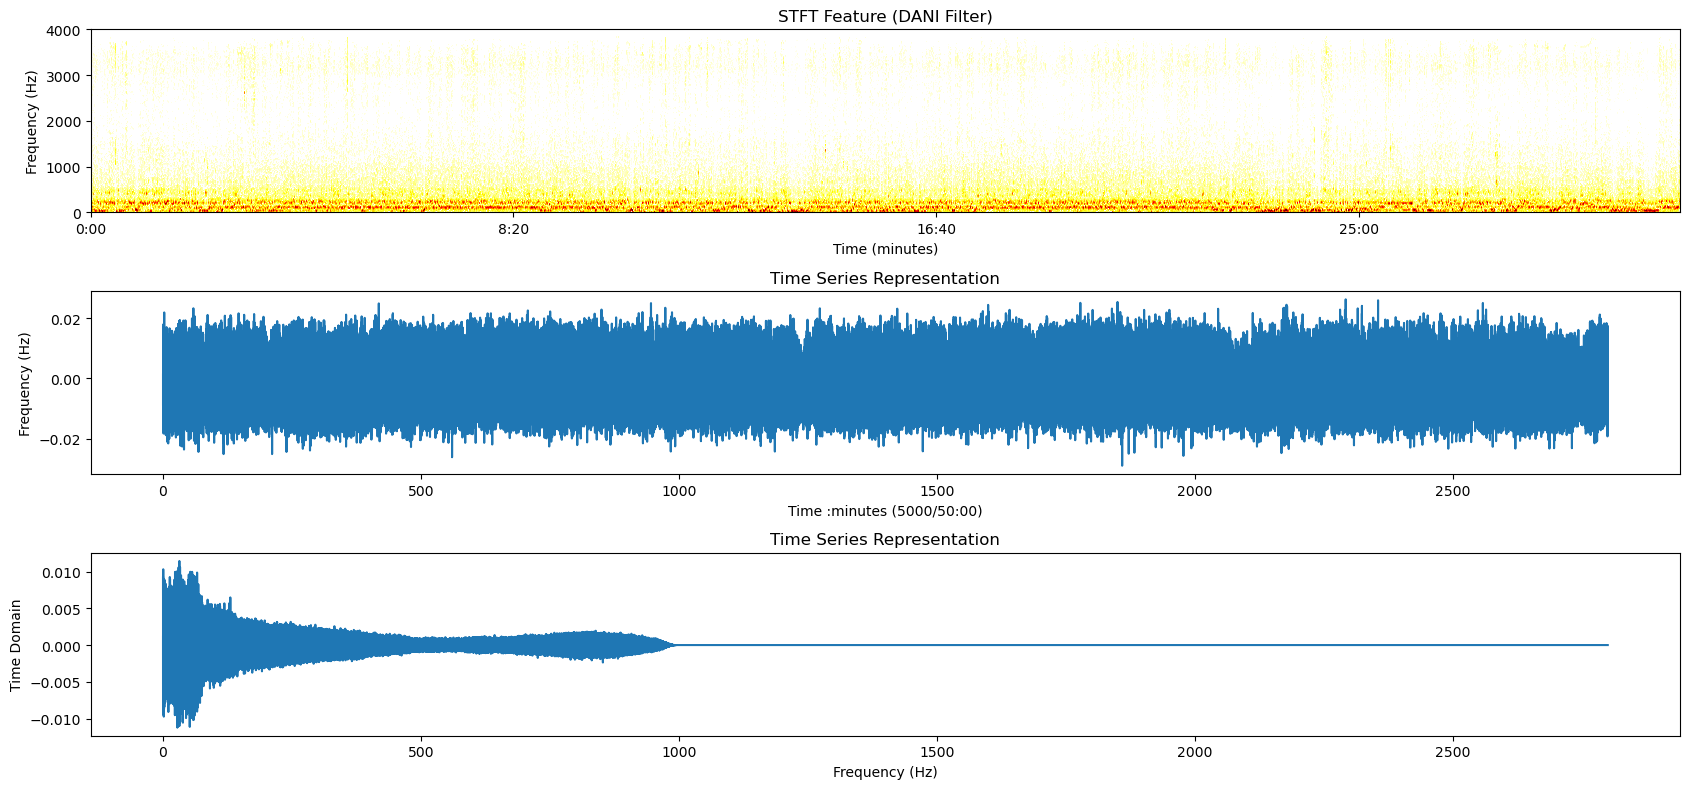

In [ ]:
#STFT and iSTFT for time series representation for dani filter after GA feature selection
hdf5_file_path = 'dani_filter21.h5'

with h5py.File(hdf5_file_path, 'r+') as hdf5_file:
    stft_data = hdf5_file['data_dani_ga'][:]
    plt.figure(figsize=(17, 8))

    plt.subplot(3, 1, 1)
    librosa.display.specshow(stft_data, x_axis='time', y_axis='hz', cmap="hot_r")

    plt.title('STFT Feature (DANI Filter)')
    plt.xlabel('Time (minutes)')
    plt.ylabel('Frequency (Hz)')
    plt.ylim(0, 4000)

    plt.subplot(3, 1, 2)
    times = np.linspace(0, len(librosa.istft(stft_data)) / 7200, num=len(librosa.istft(stft_data)))
    plt.plot(times, librosa.istft(stft_data))
    plt.title('Time Series Representation')
    plt.xlabel('Time :minutes (5000/50:00)')
    plt.ylabel('Frequency (Hz)')

    plt.subplot(3, 1, 3)
    times = np.linspace(0, len(librosa.istft(stft_data.T)) / 7200, num=len(librosa.istft(stft_data.T)))
    plt.plot(times, librosa.istft(stft_data.T))
    plt.title('Time Series Representation')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Time Domain')

    plt.tight_layout()
    plt.show()


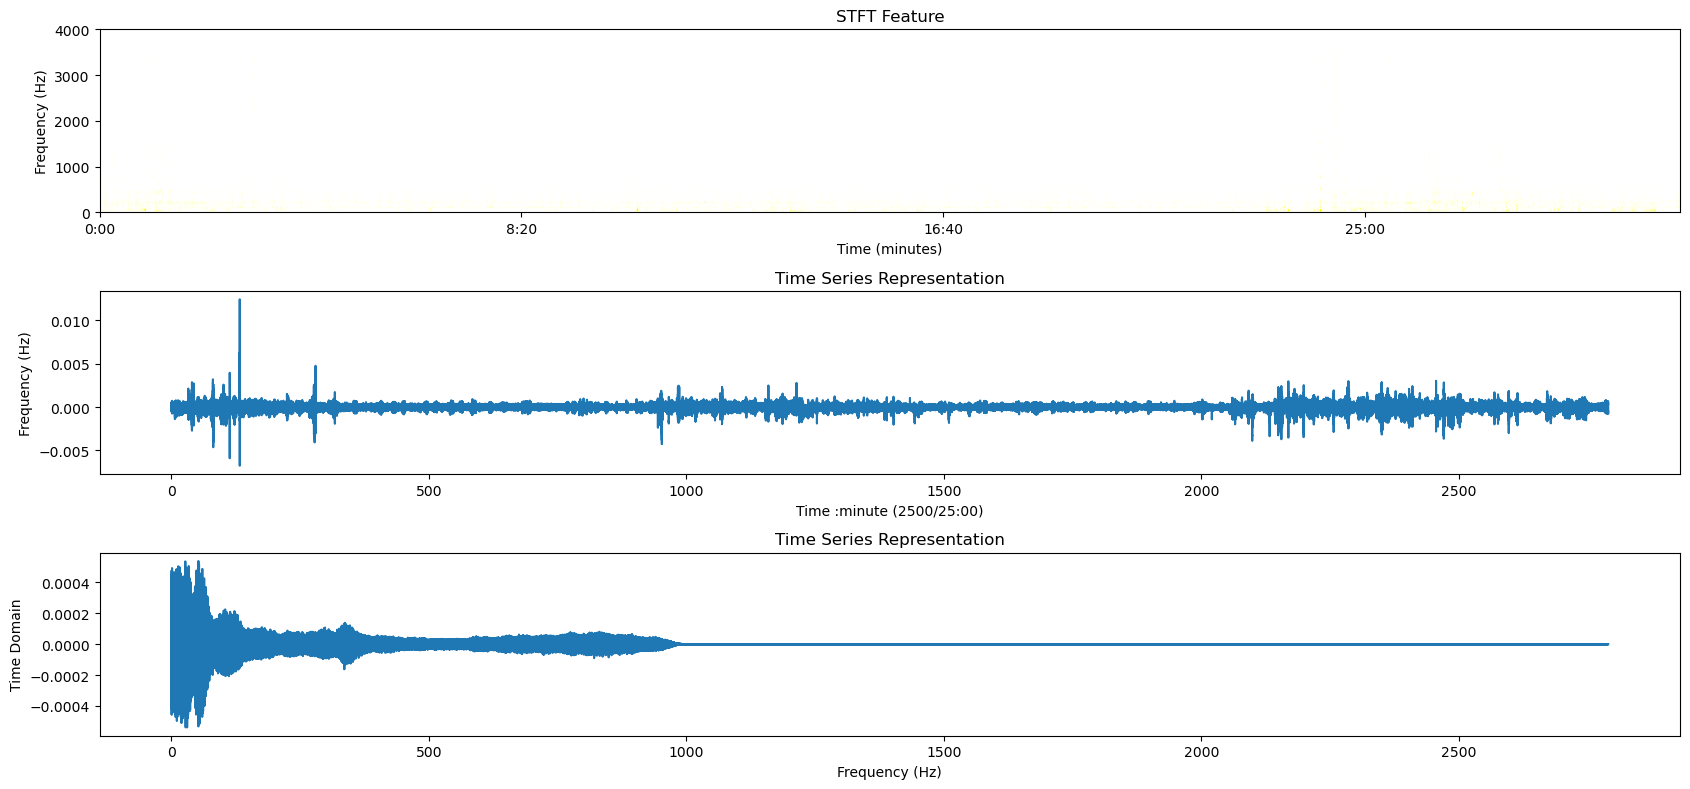

In [ ]:
#print example from STFT Feature Selection using GA with time series representation
hdf5_file_path = 'cat_stft_features21.h5'

with h5py.File(hdf5_file_path, 'r+') as hdf5_file:
    stft_data = hdf5_file['data_stft_ga'][:]
    plt.figure(figsize=(17, 8))

    plt.subplot(3, 1, 1)
    librosa.display.specshow(stft_data, x_axis='time', y_axis='hz', cmap="hot_r")
    plt.title('STFT Feature')
    plt.xlabel('Time (minutes)')
    plt.ylabel('Frequency (Hz)')
    plt.ylim(0, 4000)

    plt.subplot(3, 1, 2)
    times = np.linspace(0, len(librosa.istft(stft_data)) / 7200, num=len(librosa.istft(stft_data)))
    plt.plot(times, librosa.istft(stft_data))
    plt.title('Time Series Representation')
    plt.xlabel('Time :minute (2500/25:00)')
    plt.ylabel('Frequency (Hz)')

    plt.subplot(3, 1, 3)
    times = np.linspace(0, len(librosa.istft(stft_data.T)) / 7200, num=len(librosa.istft(stft_data.T)))
    plt.plot(times, librosa.istft(stft_data.T))
    plt.title('Time Series Representation')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Time Domain')

    # Display the plots
    plt.tight_layout()
    plt.show()


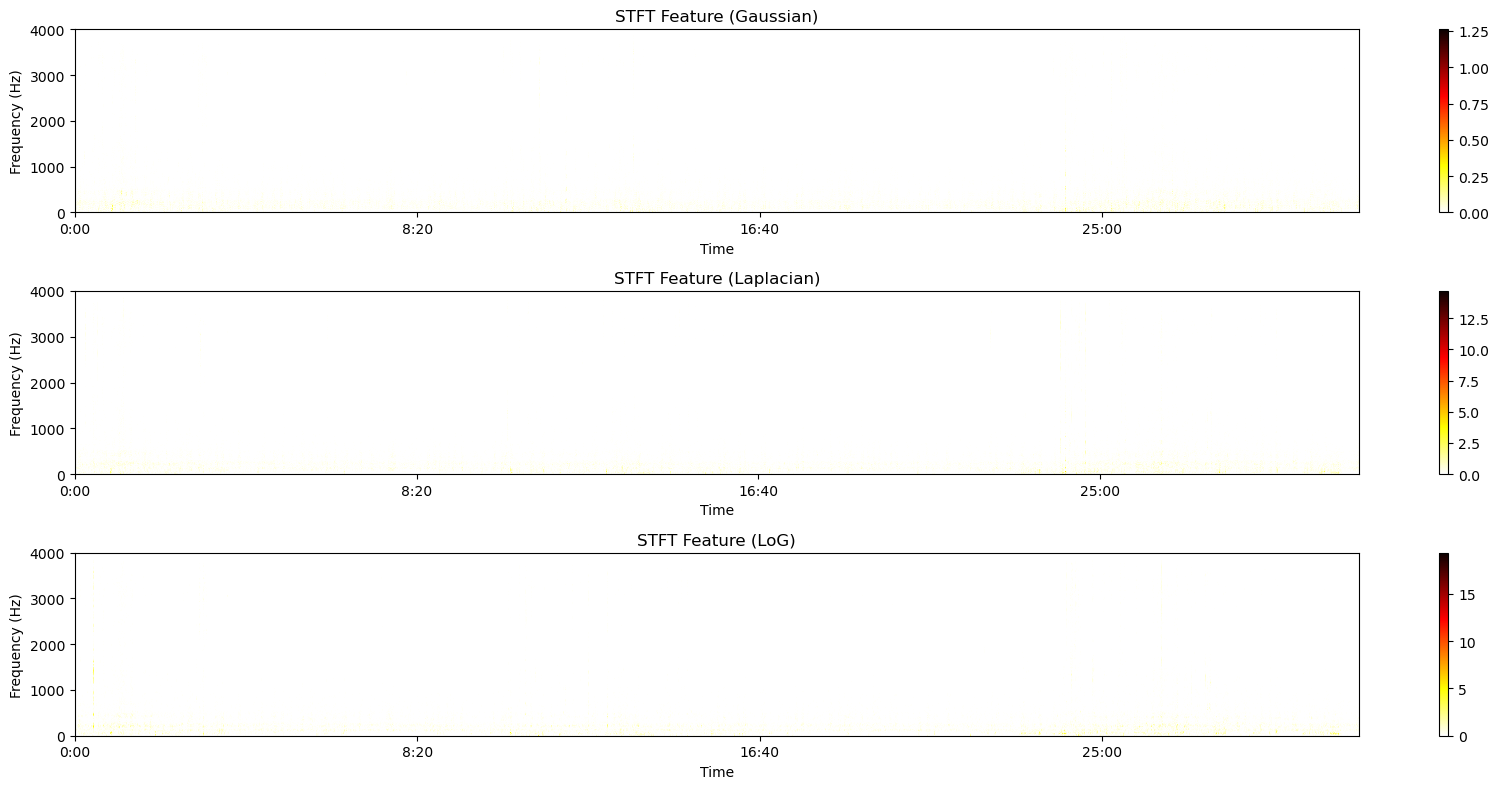

In [ ]:
#STFT filtered after GA feature selection
hdf5_file_path_stft = 'cat_stft_features21.h5'

with h5py.File(hdf5_file_path_stft, 'r+') as hdf5_file_stft:
    gauss_stft = hdf5_file_stft['data_gauss_ga'][:]
    laplacian_stft = hdf5_file_stft['data_laplacian_ga'][:]
    log_stft = hdf5_file_stft['data_log_ga'][:]

    # Plot STFT Gaussian
    plt.figure(figsize=(17, 8))
    plt.subplot(3, 1, 1)
    librosa.display.specshow(gauss_stft, x_axis='time', y_axis='hz', cmap="hot_r")
    plt.colorbar()
    plt.title('STFT Feature (Gaussian)')
    plt.xlabel('Time')
    plt.ylabel('Frequency (Hz)')
    plt.ylim(0, 4000)

    # Plot STFT Laplacian
    plt.subplot(3, 1, 2)
    librosa.display.specshow(laplacian_stft, x_axis='time', y_axis='hz', cmap="hot_r")
    plt.colorbar()
    plt.title('STFT Feature (Laplacian)')
    plt.xlabel('Time')
    plt.ylabel('Frequency (Hz)')
    plt.ylim(0, 4000)

    # Plot STFT LoG
    plt.subplot(3, 1, 3)
    librosa.display.specshow(log_stft, x_axis='time', y_axis='hz', cmap="hot_r")
    plt.colorbar()
    plt.title('STFT Feature (LoG)')
    plt.xlabel('Time')
    plt.ylabel('Frequency (Hz)')
    plt.ylim(0, 4000)

    plt.tight_layout()
    plt.show()


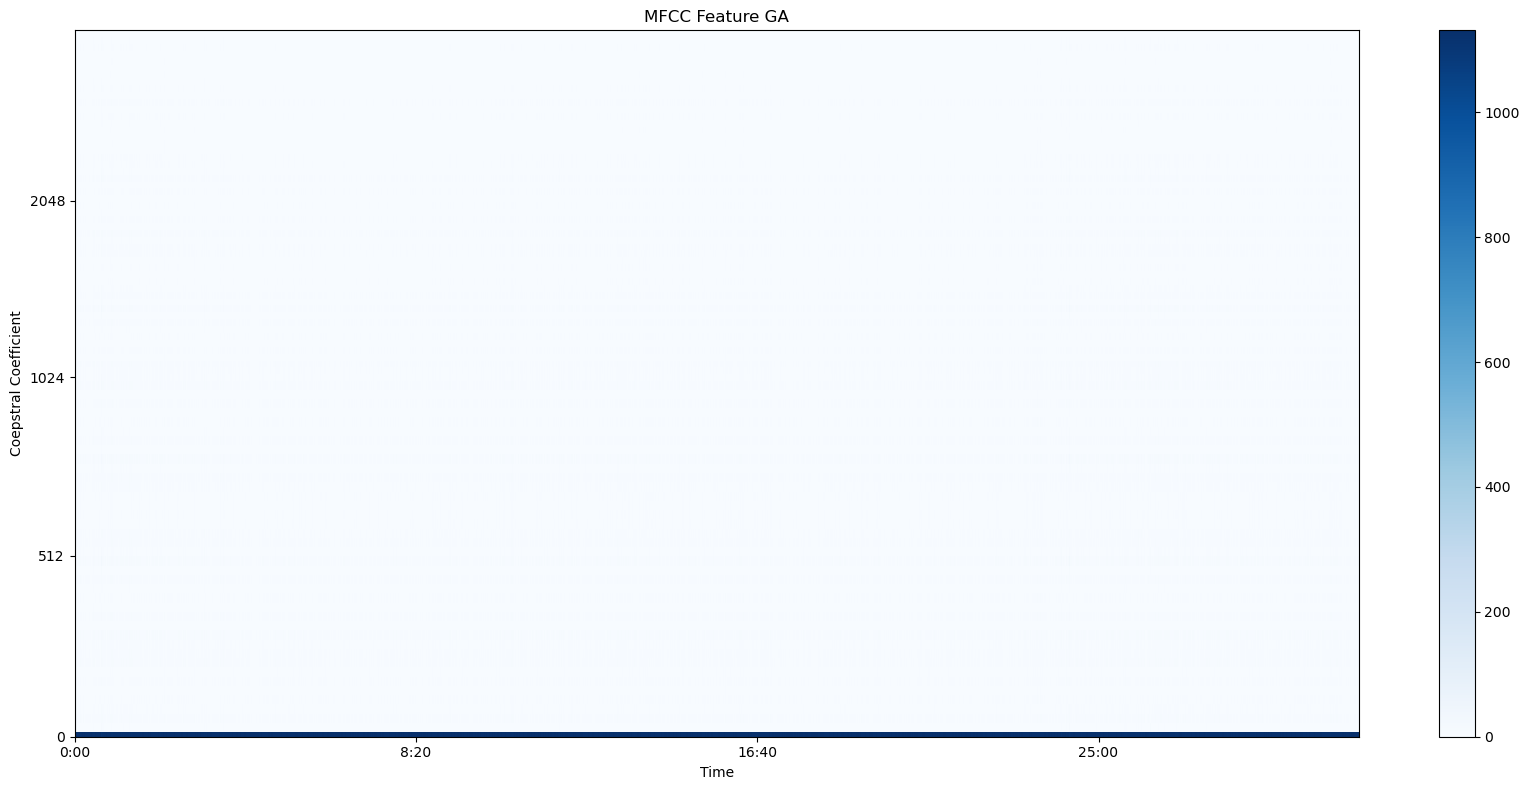

In [ ]:
#MFCC feature after GA feature selection
hdf5_file_path_stft = 'cat_mfcc_features21.h5'

with h5py.File(hdf5_file_path_stft, 'r+') as hdf5_file_stft:
    mfcc_data = hdf5_file_stft['data_mfcc_ga'][:]


    # Plot MFCC
    plt.figure(figsize=(17, 8))
    librosa.display.specshow(mfcc_data, x_axis='time', y_axis='mel', cmap='Blues')
    plt.colorbar()
    plt.title('MFCC Feature GA')
    plt.xlabel('Time')
    plt.ylabel('Coepstral Coefficient')
    plt.ylim(0, 4000)

    plt.tight_layout()
    plt.show()

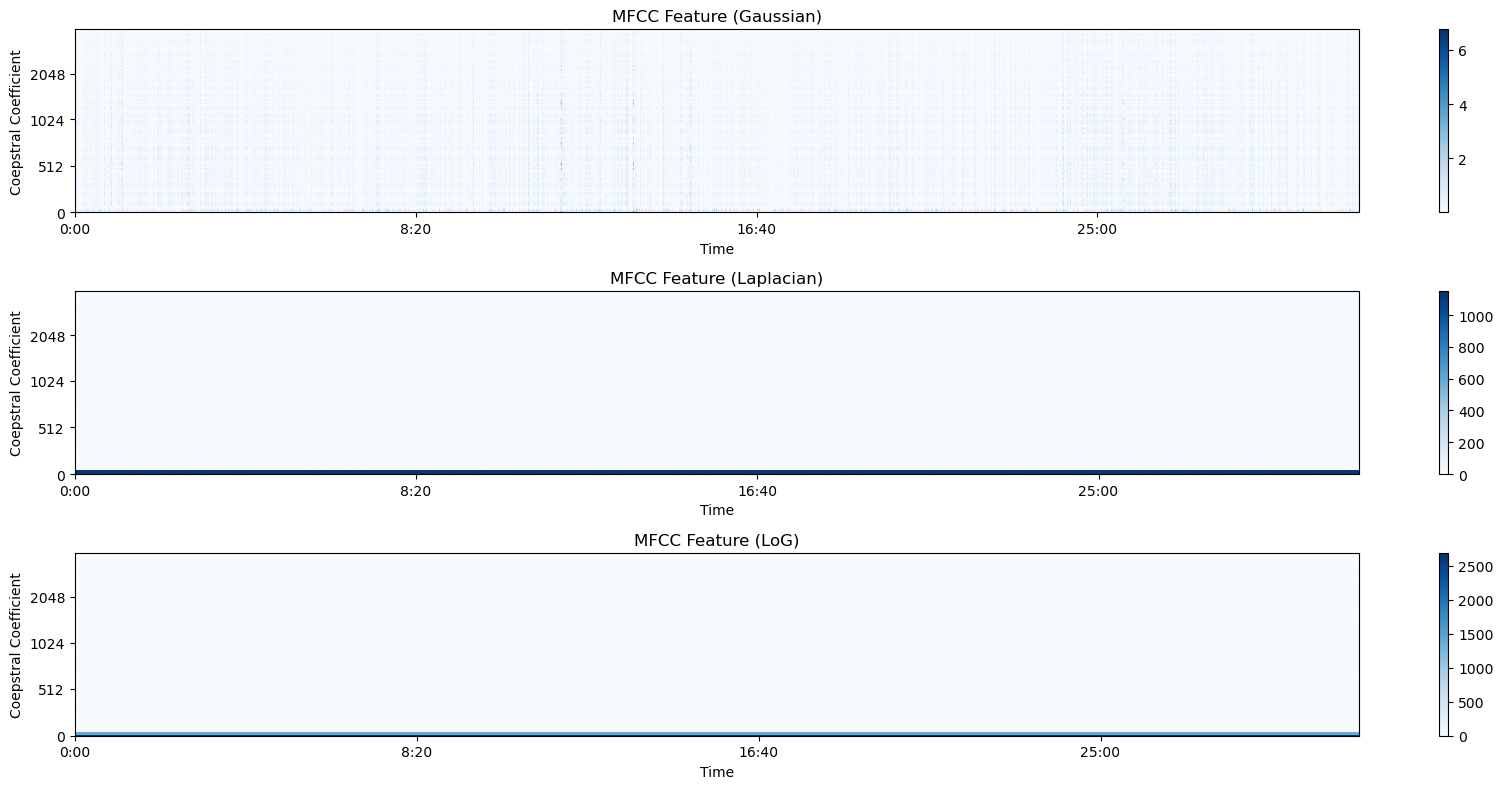

In [ ]:
#MFCC filtered after GA feature selection
hdf5_file_path_stft = 'cat_mfcc_features21.h5'

with h5py.File(hdf5_file_path_stft, 'r+') as hdf5_file_stft:
    gauss_stft = hdf5_file_stft['data_mfcc_gauss_ga'][:]
    laplacian_stft = hdf5_file_stft['data_mfcc_laplacian_ga'][:]
    log_stft = hdf5_file_stft['data_mfcc_log_ga'][:]

    # Plot MFCC Gaussian
    plt.figure(figsize=(17, 8))
    plt.subplot(3, 1, 1)
    librosa.display.specshow(gauss_stft, x_axis='time', y_axis='mel', cmap='Blues')
    plt.colorbar()
    plt.title('MFCC Feature (Gaussian)')
    plt.xlabel('Time')
    plt.ylabel('Coepstral Coefficient')
    plt.ylim(0, 4000)

    # Plot MFCC Laplacian
    plt.subplot(3, 1, 2)
    librosa.display.specshow(laplacian_stft, x_axis='time', y_axis='mel', cmap='Blues')
    plt.colorbar()
    plt.title('MFCC Feature (Laplacian)')
    plt.xlabel('Time')
    plt.ylabel('Coepstral Coefficient')
    plt.ylim(0, 4000)

    # Plot MFCC LoG
    plt.subplot(3, 1, 3)
    librosa.display.specshow(log_stft, x_axis='time', y_axis='mel', cmap='Blues')
    plt.colorbar()
    plt.title('MFCC Feature (LoG)')
    plt.xlabel('Time')
    plt.ylabel('Coepstral Coefficient')
    plt.ylim(0, 4000)

    plt.tight_layout()
    plt.show()

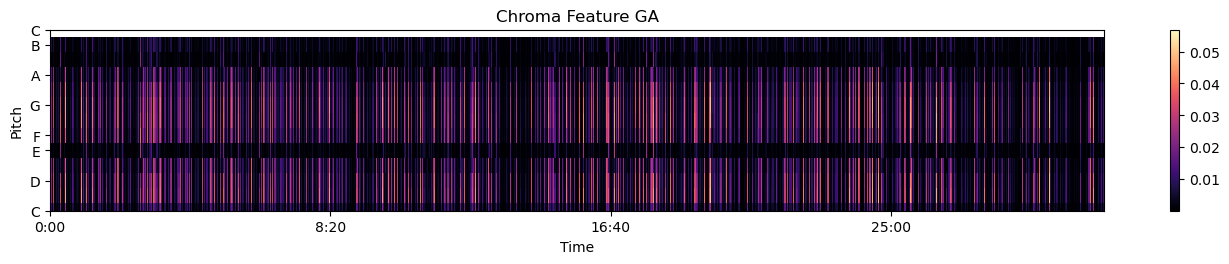

In [ ]:
#Specshow Chroma after GA feature selection
hdf5_file_path_stft = 'cat_chroma_features21.h5'

with h5py.File(hdf5_file_path_stft, 'r+') as hdf5_file_stft:
    chroma_data = hdf5_file_stft['data_chroma_ga'][:]

    # Plot Chroma
    plt.figure(figsize=(17, 8))
    plt.subplot(3, 1, 1)
    librosa.display.specshow(gauss_stft, x_axis='time', y_axis='chroma')
    plt.colorbar()
    plt.title('Chroma Feature GA')
    plt.xlabel('Time')
    plt.ylabel('Pitch')
    plt.ylim(0, 12)

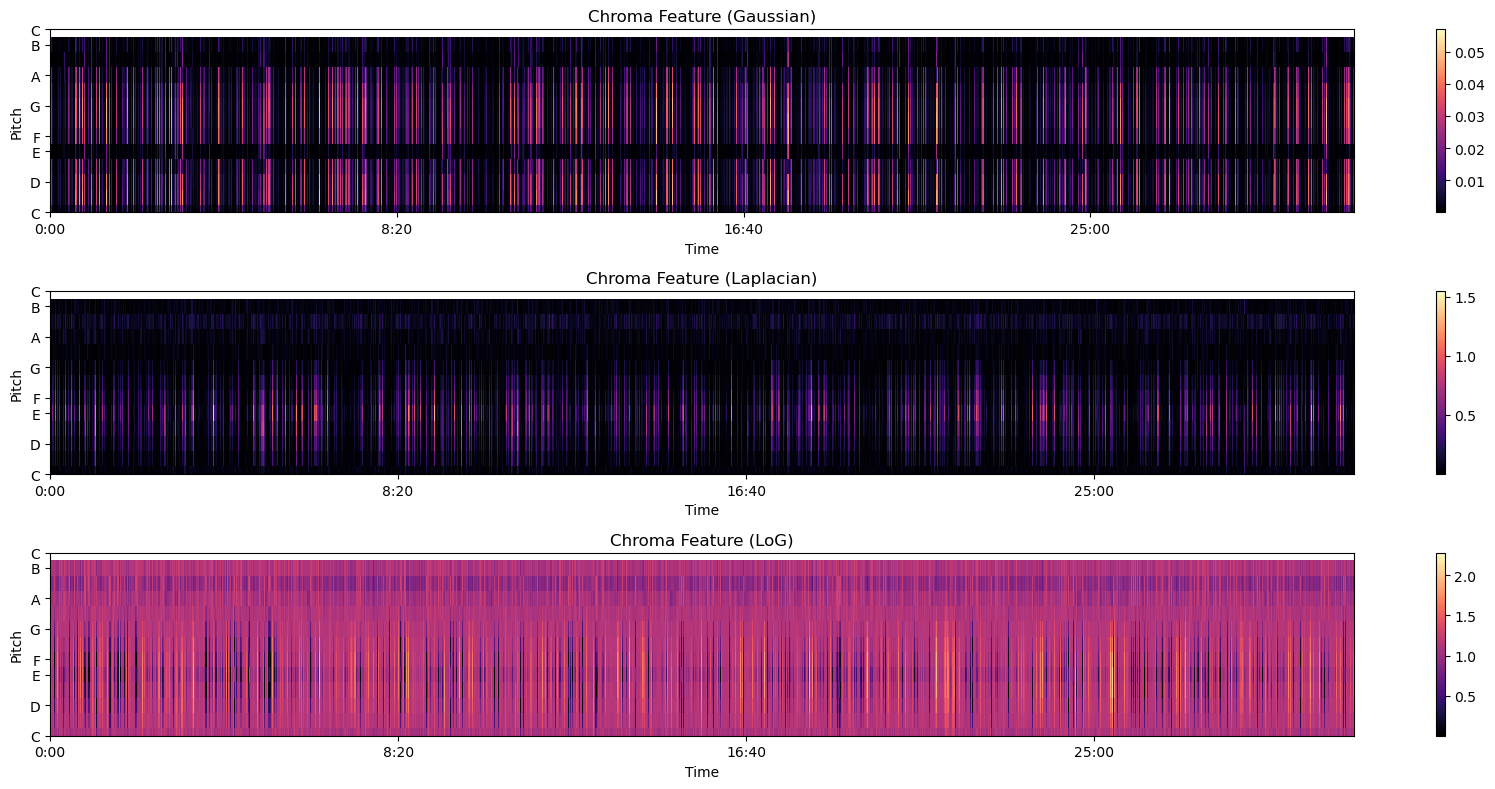

In [ ]:
#Specshow Chroma Filtered after GA feature selection
hdf5_file_path_stft = 'cat_chroma_features21.h5'

with h5py.File(hdf5_file_path_stft, 'r+') as hdf5_file_stft:
    gauss_stft = hdf5_file_stft['data_chroma_gauss_ga'][:]
    laplacian_stft = hdf5_file_stft['data_chroma_laplacian_ga'][:]
    log_stft = hdf5_file_stft['data_chroma_log_ga'][:]

    # Plot STFT Gaussian
    plt.figure(figsize=(17, 8))
    plt.subplot(3, 1, 1)
    librosa.display.specshow(gauss_stft, x_axis='time', y_axis='chroma')
    plt.colorbar()
    plt.title('Chroma Feature (Gaussian)')
    plt.xlabel('Time')
    plt.ylabel('Pitch')
    plt.ylim(0, 12)

    # Plot STFT Laplacian
    plt.subplot(3, 1, 2)
    librosa.display.specshow(laplacian_stft, x_axis='time', y_axis='chroma')
    plt.colorbar()
    plt.title('Chroma Feature (Laplacian)')
    plt.xlabel('Time')
    plt.ylabel('Pitch')
    plt.ylim(0, 12)

    # Plot STFT LoG
    plt.subplot(3, 1, 3)
    librosa.display.specshow(log_stft, x_axis='time', y_axis='chroma')
    plt.colorbar()
    plt.title('Chroma Feature (LoG)')
    plt.xlabel('Time')
    plt.ylabel('Pitch')
    plt.ylim(0, 12)

    plt.tight_layout()
    plt.show()


## **Swarm Prediction**

**CNN**

/Users/indraawal/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


503643/503643 - 399s - 792us/step - loss: 5.8224e-08 - val_loss: 4.2706e-08
251822/251822 ━━━━━━━━━━━━━━━━━━━━ 60s 239us/step


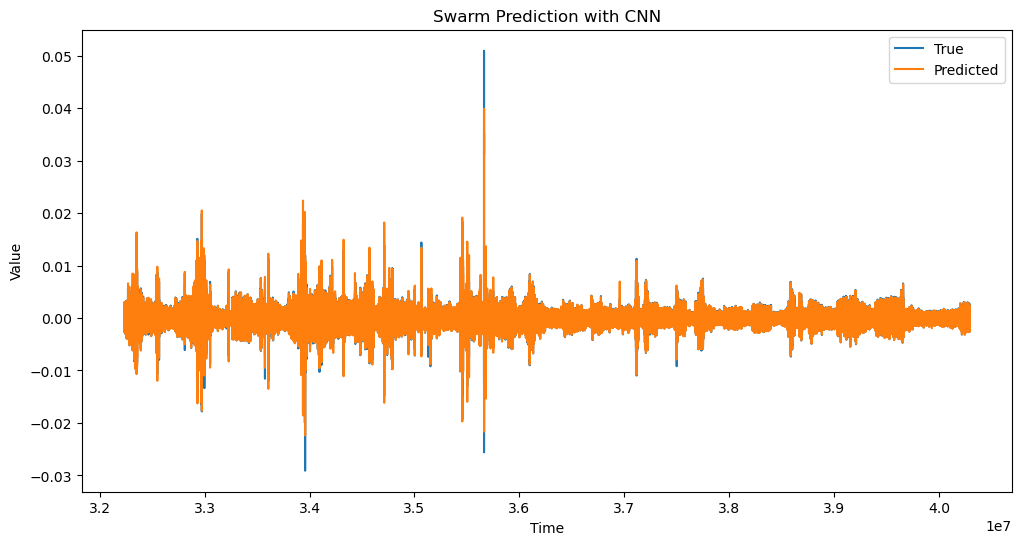

In [ ]:
feature_types = ['stft', 'chroma', 'mfcc']
data_name = ['data2', 'data_ga', 'data_gauss', 'data_gauss_ga', 'data_laplacian',
             'data_laplacian_ga', 'data_log', 'data_log_ga']

hdf5_file_path = feature_types
with h5py.File(hdf5_file_path, 'r+') as hdf5_file:
    t = hdf5_file[data_name][:]
    # t = librosa.istft(data)
    y = np.roll(t, -1)

train_size = int(0.8 * len(t))
train_data, test_data = t[:train_size], t[train_size:]
train_labels, test_labels = y[:train_size], y[train_size:]

def create_sequences(data, labels, seq_length):
    sequences = []
    target = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i + seq_length])
        target.append(labels[i + seq_length])
    return np.array(sequences), np.array(target)

seq_length = 2
X_train, y_train = create_sequences(train_data, train_labels, seq_length)
X_test, y_test = create_sequences(test_data, test_labels, seq_length)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

model = Sequential([
    Conv1D(filters=16, kernel_size=3, activation='relu', input_shape=(seq_length, 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test), verbose=2)

y_pred = model.predict(X_test)

plt.figure(figsize=(12, 6))
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, label='True')
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred, label='Predicted')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Swarm Prediction with CNN')
plt.show()


**Category 21**

Processing stft:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/10
503643/503643 - 187s - 371us/step - loss: 2.4002e-08 - val_loss: 1.1170e-08
Epoch 2/10
503643/503643 - 184s - 366us/step - loss: 1.2340e-08 - val_loss: 6.6717e-09
Epoch 3/10
503643/503643 - 187s - 372us/step - loss: 9.2135e-09 - val_loss: 9.8216e-09
Epoch 4/10
503643/503643 - 188s - 374us/step - loss: 8.4910e-09 - val_loss: 5.4358e-09
Epoch 5/10
503643/503643 - 185s - 368us/step - loss: 8.0711e-09 - val_loss: 4.0857e-09
Epoch 6/10
503643/503643 - 186s - 369us/step - loss: 7.7040e-09 - val_loss: 5.5343e-09
Epoch 7/10
503643/503643 - 186s - 370us/step - loss: 7.4731e-09 - val_loss: 4.0413e-09
Epoch 8/10
503643/503643 - 186s - 369us/step - loss: 7.0863e-09 - val_loss: 7.8654e-09
Epoch 9/10
503643/503643 - 185s - 368us/step - loss: 7.2306e-09 - val_loss: 5.5763e-09
Epoch 10/10
503643/503643 - 186s - 369us/step - loss: 6.9428e-09 - val_loss: 7.4944e-09


Processing stft:  12%|█▎        | 1/8 [31:26<3:40:05, 1886.52s/it]

Validation loss for stft data2: 4.0413161705998846e-09
Epoch 1/10
251104/251104 - 94s - 376us/step - loss: 6.8114e-09 - val_loss: 7.7853e-09
Epoch 2/10
251104/251104 - 92s - 368us/step - loss: 4.2356e-09 - val_loss: 2.9418e-09
Epoch 3/10
251104/251104 - 92s - 368us/step - loss: 3.5393e-09 - val_loss: 7.8223e-09
Epoch 4/10
251104/251104 - 93s - 369us/step - loss: 3.2542e-09 - val_loss: 2.4699e-09
Epoch 5/10
251104/251104 - 92s - 368us/step - loss: 3.1023e-09 - val_loss: 2.8262e-09
Epoch 6/10
251104/251104 - 93s - 369us/step - loss: 2.9997e-09 - val_loss: 1.8683e-09
Epoch 7/10
251104/251104 - 92s - 368us/step - loss: 2.9161e-09 - val_loss: 8.3943e-09
Epoch 8/10
251104/251104 - 92s - 368us/step - loss: 2.8552e-09 - val_loss: 2.9682e-09
Epoch 9/10
251104/251104 - 92s - 368us/step - loss: 2.8083e-09 - val_loss: 3.8113e-09
Epoch 10/10
251104/251104 - 93s - 369us/step - loss: 2.7669e-09 - val_loss: 1.7033e-09


Processing stft:  25%|██▌       | 2/8 [47:03<2:12:48, 1328.15s/it]

Validation loss for stft data_ga: 1.703251317763943e-09
Epoch 1/10
503643/503643 - 186s - 369us/step - loss: 5.3843e-09 - val_loss: 6.6235e-09
Epoch 2/10
503643/503643 - 186s - 370us/step - loss: 5.2839e-09 - val_loss: 7.3060e-09
Epoch 3/10
503643/503643 - 186s - 369us/step - loss: 5.2852e-09 - val_loss: 1.2436e-08
Epoch 4/10
503643/503643 - 192s - 380us/step - loss: 5.2863e-09 - val_loss: 6.1736e-09
Epoch 5/10
503643/503643 - 184s - 365us/step - loss: 5.2908e-09 - val_loss: 7.0580e-09
Epoch 6/10
503643/503643 - 184s - 366us/step - loss: 5.2831e-09 - val_loss: 7.4267e-09
Epoch 7/10
503643/503643 - 185s - 367us/step - loss: 5.2838e-09 - val_loss: 8.3256e-09
Epoch 8/10
503643/503643 - 182s - 361us/step - loss: 5.2938e-09 - val_loss: 6.5716e-09
Epoch 9/10
503643/503643 - 181s - 360us/step - loss: 5.2856e-09 - val_loss: 6.1466e-09
Epoch 10/10
503643/503643 - 181s - 360us/step - loss: 5.2874e-09 - val_loss: 6.5279e-09


Processing stft:  38%|███▊      | 3/8 [1:18:13<2:11:17, 1575.55s/it]

Validation loss for stft data_gauss: 6.146597453238201e-09
Epoch 1/10
251294/251294 - 91s - 361us/step - loss: 4.2722e-09 - val_loss: 4.8957e-09
Epoch 2/10
251294/251294 - 90s - 360us/step - loss: 4.1065e-09 - val_loss: 1.2565e-08
Epoch 3/10
251294/251294 - 90s - 359us/step - loss: 4.1018e-09 - val_loss: 6.2376e-09
Epoch 4/10
251294/251294 - 90s - 359us/step - loss: 4.0975e-09 - val_loss: 7.0839e-09
Epoch 5/10
251294/251294 - 90s - 359us/step - loss: 4.0957e-09 - val_loss: 4.9760e-09
Epoch 6/10
251294/251294 - 91s - 360us/step - loss: 4.1042e-09 - val_loss: 8.5784e-09
Epoch 7/10
251294/251294 - 90s - 360us/step - loss: 4.1096e-09 - val_loss: 4.3480e-09
Epoch 8/10
251294/251294 - 90s - 360us/step - loss: 4.1065e-09 - val_loss: 5.3224e-09
Epoch 9/10
251294/251294 - 90s - 359us/step - loss: 4.0999e-09 - val_loss: 1.3109e-08
Epoch 10/10
251294/251294 - 90s - 359us/step - loss: 4.1055e-09 - val_loss: 5.2210e-09


Processing stft:  50%|█████     | 4/8 [1:33:28<1:27:39, 1314.86s/it]

Validation loss for stft data_gauss_ga: 4.348004178922338e-09
Epoch 1/10
503643/503643 - 184s - 366us/step - loss: 1.9276e-08 - val_loss: 2.1343e-08
Epoch 2/10
503643/503643 - 181s - 359us/step - loss: 9.8439e-09 - val_loss: 2.5659e-08
Epoch 3/10
503643/503643 - 181s - 360us/step - loss: 7.6374e-09 - val_loss: 4.6712e-09
Epoch 4/10
503643/503643 - 181s - 359us/step - loss: 6.9215e-09 - val_loss: 4.3584e-09
Epoch 5/10
503643/503643 - 181s - 360us/step - loss: 6.5041e-09 - val_loss: 4.3877e-09
Epoch 6/10
503643/503643 - 182s - 361us/step - loss: 6.2637e-09 - val_loss: 4.0290e-09
Epoch 7/10
503643/503643 - 182s - 361us/step - loss: 6.0365e-09 - val_loss: 3.8178e-09
Epoch 8/10
503643/503643 - 182s - 361us/step - loss: 5.7973e-09 - val_loss: 4.4101e-09
Epoch 9/10
503643/503643 - 182s - 361us/step - loss: 5.6469e-09 - val_loss: 4.2049e-09
Epoch 10/10
503643/503643 - 181s - 360us/step - loss: 5.5355e-09 - val_loss: 1.0011e-08


Processing stft:  62%|██████▎   | 5/8 [2:04:08<1:15:12, 1504.23s/it]

Validation loss for stft data_laplacian: 3.817789639981584e-09
Epoch 1/10
251820/251820 - 101s - 400us/step - loss: 1.5914e-08 - val_loss: 1.4189e-08
Epoch 2/10
251820/251820 - 99s - 393us/step - loss: 1.0184e-08 - val_loss: 9.6482e-09
Epoch 3/10
251820/251820 - 92s - 366us/step - loss: 8.3175e-09 - val_loss: 6.7461e-09
Epoch 4/10
251820/251820 - 92s - 367us/step - loss: 7.6170e-09 - val_loss: 1.4959e-08
Epoch 5/10
251820/251820 - 92s - 365us/step - loss: 7.1064e-09 - val_loss: 8.2877e-09
Epoch 6/10
251820/251820 - 92s - 365us/step - loss: 6.6705e-09 - val_loss: 5.7596e-09
Epoch 7/10
251820/251820 - 92s - 365us/step - loss: 6.3353e-09 - val_loss: 1.4029e-08
Epoch 8/10
251820/251820 - 92s - 365us/step - loss: 5.9591e-09 - val_loss: 6.8574e-09
Epoch 9/10
251820/251820 - 92s - 364us/step - loss: 5.6840e-09 - val_loss: 2.2822e-08
Epoch 10/10
251820/251820 - 92s - 364us/step - loss: 5.4349e-09 - val_loss: 3.8899e-09


Processing stft:  75%|███████▌  | 6/8 [2:19:55<43:48, 1314.43s/it]  

Validation loss for stft data_laplacian_ga: 3.88986176602657e-09
Epoch 1/10
503643/503643 - 184s - 366us/step - loss: 1.9646e-08 - val_loss: 9.7851e-09
Epoch 2/10
503643/503643 - 184s - 366us/step - loss: 8.3588e-09 - val_loss: 9.2840e-09
Epoch 3/10
503643/503643 - 184s - 366us/step - loss: 7.0714e-09 - val_loss: 8.7883e-09
Epoch 4/10
503643/503643 - 184s - 366us/step - loss: 6.5613e-09 - val_loss: 6.1915e-09
Epoch 5/10
503643/503643 - 184s - 365us/step - loss: 6.2263e-09 - val_loss: 3.4931e-08
Epoch 6/10
503643/503643 - 184s - 365us/step - loss: 5.9897e-09 - val_loss: 3.6951e-09
Epoch 7/10
503643/503643 - 184s - 366us/step - loss: 5.8057e-09 - val_loss: 3.6906e-09
Epoch 8/10
503643/503643 - 184s - 365us/step - loss: 5.6645e-09 - val_loss: 3.9728e-09
Epoch 9/10
503643/503643 - 184s - 365us/step - loss: 5.5009e-09 - val_loss: 1.0825e-08
Epoch 10/10
503643/503643 - 184s - 366us/step - loss: 5.3140e-09 - val_loss: 4.0488e-09


Processing stft:  88%|████████▊ | 7/8 [2:50:58<24:54, 1494.01s/it]

Validation loss for stft data_log: 3.690562744296244e-09
Epoch 1/10
251269/251269 - 92s - 364us/step - loss: 1.9514e-08 - val_loss: 1.0153e-08
Epoch 2/10
251269/251269 - 91s - 363us/step - loss: 1.1178e-08 - val_loss: 8.8336e-09
Epoch 3/10
251269/251269 - 91s - 363us/step - loss: 9.6113e-09 - val_loss: 9.3938e-09
Epoch 4/10
251269/251269 - 91s - 363us/step - loss: 8.5066e-09 - val_loss: 6.3585e-09
Epoch 5/10
251269/251269 - 91s - 363us/step - loss: 7.5783e-09 - val_loss: 8.2298e-09
Epoch 6/10
251269/251269 - 91s - 363us/step - loss: 6.8160e-09 - val_loss: 1.1942e-08
Epoch 7/10
251269/251269 - 91s - 363us/step - loss: 6.2346e-09 - val_loss: 4.3943e-09
Epoch 8/10
251269/251269 - 91s - 363us/step - loss: 5.7744e-09 - val_loss: 4.5599e-09
Epoch 9/10
251269/251269 - 91s - 363us/step - loss: 5.3954e-09 - val_loss: 8.6535e-09
Epoch 10/10
251269/251269 - 91s - 363us/step - loss: 5.1778e-09 - val_loss: 6.7031e-09


Processing stft: 100%|██████████| 8/8 [3:06:21<00:00, 1397.67s/it]

Validation loss for stft data_log_ga: 4.394266284180048e-09


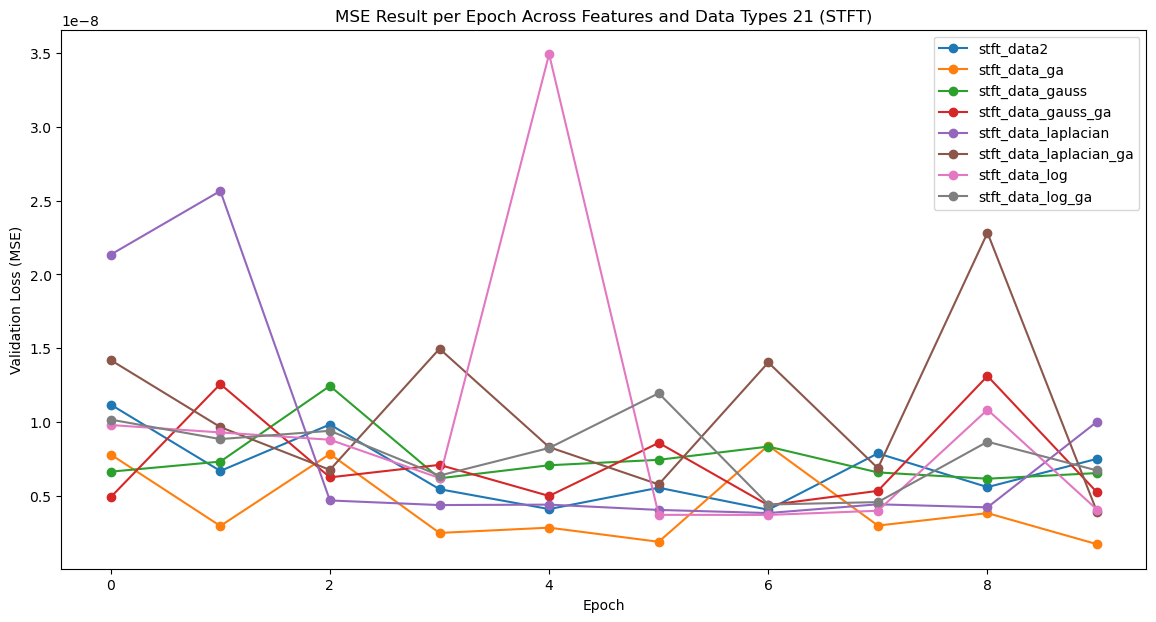

MSE Result : 4.0413161705998846e-09, feature : stft_data2
MSE Result : 1.703251317763943e-09, feature : stft_data_ga
MSE Result : 6.146597453238201e-09, feature : stft_data_gauss
MSE Result : 4.348004178922338e-09, feature : stft_data_gauss_ga
MSE Result : 3.817789639981584e-09, feature : stft_data_laplacian
MSE Result : 3.88986176602657e-09, feature : stft_data_laplacian_ga
MSE Result : 3.690562744296244e-09, feature : stft_data_log
MSE Result : 4.394266284180048e-09, feature : stft_data_log_ga


In [ ]:
#STFT

def process_features(data, feature_type):
    if feature_type == 'stft':
        return data
    elif feature_type in ['mfcc', 'chroma']:
        return data
    else:
        raise ValueError("Unsupported feature type")

def create_sequences(data, seq_length):
    X, Y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        Y.append(data[i + seq_length])
    return np.array(X), np.array(Y)

feature_types = ['stft']
data_names = ['data2', 'data_ga', 'data_gauss', 'data_gauss_ga', 'data_laplacian',
              'data_laplacian_ga', 'data_log', 'data_log_ga']

mse_results = {}
losses_over_epochs = {}

for feature_type in feature_types:
    hdf5_file_path = f'cat_{feature_type}_features21.h5'
    with h5py.File(hdf5_file_path, 'r+') as hdf5_file:
        for data_name in tqdm(data_names, desc=f"Processing {feature_type}"):
            data = hdf5_file[data_name][:]
            t, y = process_features(data, feature_type), np.roll(data, -1)
            t, y = t[:-1], y[:-1]

            train_size = int(0.8 * len(t))
            train_data, test_data = t[:train_size], t[train_size:]
            train_labels, test_labels = y[:train_size], y[train_size:]

            X_train, y_train = create_sequences(train_data, 2)
            X_test, y_test = create_sequences(test_data, 2)

            X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
            X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

            model = Sequential([
                Conv1D(8, 1, activation='relu', input_shape=(2, 1)),
                MaxPooling1D(2),
                Flatten(),
                Dense(50, activation='relu'),
                Dense(1)
            ])
            model.compile(optimizer='adam', loss='mse')
            history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test), verbose=2)

            mse_results[f'{feature_type}_{data_name}'] = history.history['val_loss']
            print(f'Validation loss for {feature_type} {data_name}:', np.min(history.history['val_loss']))

plt.figure(figsize=(14, 7))
for key, losses in mse_results.items():
    plt.plot(losses, label=key, marker='o', linestyle='-')
plt.ylabel('Validation Loss (MSE)')
plt.xlabel('Epoch')
plt.title('MSE Result per Epoch Across Features and Data Types 21 (STFT)')
plt.legend()
plt.show()

for key, losses in mse_results.items():
    los = np.min(losses)
    print(f'MSE Result : {los}, feature : {key}')

Processing chroma:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/10
1/1 - 0s - 446ms/step - loss: 0.9334 - val_loss: 56958.5352
Epoch 2/10
1/1 - 0s - 36ms/step - loss: 58487.9727 - val_loss: 3294.1367
Epoch 3/10
1/1 - 0s - 43ms/step - loss: 3384.6162 - val_loss: 0.9182
Epoch 4/10
1/1 - 0s - 59ms/step - loss: 0.8682 - val_loss: 0.9210
Epoch 5/10
1/1 - 0s - 40ms/step - loss: 0.8709 - val_loss: 0.9232
Epoch 6/10
1/1 - 0s - 41ms/step - loss: 0.8730 - val_loss: 0.9249
Epoch 7/10
1/1 - 0s - 44ms/step - loss: 0.8747 - val_loss: 0.9263
Epoch 8/10
1/1 - 0s - 42ms/step - loss: 0.8760 - val_loss: 0.9274
Epoch 9/10
1/1 - 0s - 39ms/step - loss: 0.8771 - val_loss: 0.9282
Epoch 10/10
1/1 - 0s - 44ms/step - loss: 0.8779 - val_loss: 0.9289


Processing chroma:  12%|█▎        | 1/8 [00:00<00:06,  1.10it/s]

MSE Result for chroma data2: 0.9182357788085938
Epoch 1/10
1/1 - 0s - 397ms/step - loss: 0.6823 - val_loss: 766.1440
Epoch 2/10
1/1 - 0s - 31ms/step - loss: 689.7954 - val_loss: 48.0297
Epoch 3/10
1/1 - 0s - 39ms/step - loss: 36.9380 - val_loss: 0.9139
Epoch 4/10
1/1 - 0s - 31ms/step - loss: 0.8698 - val_loss: 0.9172
Epoch 5/10
1/1 - 0s - 36ms/step - loss: 0.8732 - val_loss: 0.9199
Epoch 6/10
1/1 - 0s - 36ms/step - loss: 0.8759 - val_loss: 0.9222
Epoch 7/10
1/1 - 0s - 26ms/step - loss: 0.8782 - val_loss: 0.9242
Epoch 8/10
1/1 - 0s - 33ms/step - loss: 0.8801 - val_loss: 0.9259
Epoch 9/10
1/1 - 0s - 28ms/step - loss: 0.8816 - val_loss: 0.9274
Epoch 10/10
1/1 - 0s - 27ms/step - loss: 0.8829 - val_loss: 0.9285


Processing chroma:  25%|██▌       | 2/8 [00:01<00:04,  1.21it/s]

MSE Result for chroma data_ga: 0.9138590097427368
Epoch 1/10
1/1 - 0s - 449ms/step - loss: 2.1935e-04 - val_loss: 0.0101
Epoch 2/10
1/1 - 0s - 50ms/step - loss: 1.8628 - val_loss: 7.1790
Epoch 3/10
1/1 - 0s - 52ms/step - loss: 6.5046 - val_loss: 1.9021
Epoch 4/10
1/1 - 0s - 51ms/step - loss: 1.2163 - val_loss: 0.1505
Epoch 5/10
1/1 - 0s - 51ms/step - loss: 0.5725 - val_loss: 1.1675
Epoch 6/10
1/1 - 0s - 50ms/step - loss: 1.6838 - val_loss: 0.3657
Epoch 7/10
1/1 - 0s - 45ms/step - loss: 0.5618 - val_loss: 1.1156
Epoch 8/10
1/1 - 0s - 49ms/step - loss: 0.3674 - val_loss: 4.1095
Epoch 9/10
1/1 - 0s - 53ms/step - loss: 1.1430 - val_loss: 1.8520
Epoch 10/10
1/1 - 0s - 48ms/step - loss: 0.1047 - val_loss: 0.1630


Processing chroma:  38%|███▊      | 3/8 [00:02<00:04,  1.13it/s]

MSE Result for chroma data_gauss: 0.010094617493450642
Epoch 1/10
1/1 - 1s - 532ms/step - loss: 5.1117e-05 - val_loss: 0.0190
Epoch 2/10
1/1 - 0s - 34ms/step - loss: 0.0102 - val_loss: 0.0391
Epoch 3/10
1/1 - 0s - 36ms/step - loss: 0.0824 - val_loss: 0.1426
Epoch 4/10
1/1 - 0s - 37ms/step - loss: 0.2314 - val_loss: 0.0069
Epoch 5/10
1/1 - 0s - 43ms/step - loss: 0.0038 - val_loss: 0.0911
Epoch 6/10
1/1 - 0s - 31ms/step - loss: 0.1142 - val_loss: 0.0436
Epoch 7/10
1/1 - 0s - 43ms/step - loss: 0.0670 - val_loss: 0.0347
Epoch 8/10
1/1 - 0s - 35ms/step - loss: 0.0838 - val_loss: 0.0392
Epoch 9/10
1/1 - 0s - 37ms/step - loss: 0.0829 - val_loss: 0.0031
Epoch 10/10
1/1 - 0s - 32ms/step - loss: 0.0047 - val_loss: 0.0461


Processing chroma:  50%|█████     | 4/8 [00:03<00:03,  1.11it/s]

MSE Result for chroma data_gauss_ga: 0.0030746953561902046
Epoch 1/10
1/1 - 0s - 406ms/step - loss: 0.0125 - val_loss: 227.7224
Epoch 2/10
1/1 - 0s - 49ms/step - loss: 35.4895 - val_loss: 5.4971
Epoch 3/10
1/1 - 0s - 71ms/step - loss: 217.2889 - val_loss: 55.6839
Epoch 4/10
1/1 - 0s - 54ms/step - loss: 70.4724 - val_loss: 163.7530
Epoch 5/10
1/1 - 0s - 49ms/step - loss: 2.6405 - val_loss: 297.8033
Epoch 6/10
1/1 - 0s - 49ms/step - loss: 74.2314 - val_loss: 311.8374
Epoch 7/10
1/1 - 0s - 47ms/step - loss: 84.8014 - val_loss: 249.0543
Epoch 8/10
1/1 - 0s - 55ms/step - loss: 57.8218 - val_loss: 162.3489
Epoch 9/10
1/1 - 0s - 60ms/step - loss: 22.2715 - val_loss: 102.6467
Epoch 10/10
1/1 - 0s - 61ms/step - loss: 0.4438 - val_loss: 78.1482


Processing chroma:  62%|██████▎   | 5/8 [00:04<00:02,  1.09it/s]

MSE Result for chroma data_laplacian: 5.497089862823486
Epoch 1/10
1/1 - 1s - 582ms/step - loss: 0.2667 - val_loss: 44.3670
Epoch 2/10
1/1 - 0s - 34ms/step - loss: 19.7225 - val_loss: 208.8475
Epoch 3/10
1/1 - 0s - 35ms/step - loss: 330.3373 - val_loss: 3.4558
Epoch 4/10
1/1 - 0s - 34ms/step - loss: 25.9216 - val_loss: 104.4246
Epoch 5/10
1/1 - 0s - 39ms/step - loss: 101.5519 - val_loss: 173.2696
Epoch 6/10
1/1 - 0s - 32ms/step - loss: 181.3784 - val_loss: 85.3363
Epoch 7/10
1/1 - 0s - 34ms/step - loss: 88.8606 - val_loss: 17.5322
Epoch 8/10
1/1 - 0s - 30ms/step - loss: 10.9273 - val_loss: 13.6294
Epoch 9/10
1/1 - 0s - 27ms/step - loss: 23.7570 - val_loss: 48.9966
Epoch 10/10
1/1 - 0s - 27ms/step - loss: 62.4057 - val_loss: 53.2039


Processing chroma:  75%|███████▌  | 6/8 [00:05<00:01,  1.08it/s]

MSE Result for chroma data_laplacian_ga: 3.4558098316192627
Epoch 1/10
1/1 - 1s - 509ms/step - loss: 7.1790 - val_loss: 5151.7681
Epoch 2/10
1/1 - 0s - 54ms/step - loss: 5877.7007 - val_loss: 288.0977
Epoch 3/10
1/1 - 0s - 51ms/step - loss: 335.5850 - val_loss: 1.2289
Epoch 4/10
1/1 - 0s - 50ms/step - loss: 0.9781 - val_loss: 1.2318
Epoch 5/10
1/1 - 0s - 50ms/step - loss: 0.9808 - val_loss: 1.2342
Epoch 6/10
1/1 - 0s - 50ms/step - loss: 0.9829 - val_loss: 1.2362
Epoch 7/10
1/1 - 0s - 39ms/step - loss: 0.9847 - val_loss: 1.2379
Epoch 8/10
1/1 - 0s - 37ms/step - loss: 0.9861 - val_loss: 1.2393
Epoch 9/10
1/1 - 0s - 47ms/step - loss: 0.9874 - val_loss: 1.2404
Epoch 10/10
1/1 - 0s - 47ms/step - loss: 0.9884 - val_loss: 1.2414


Processing chroma:  88%|████████▊ | 7/8 [00:06<00:00,  1.05it/s]

MSE Result for chroma data_log: 1.22886323928833
Epoch 1/10
1/1 - 1s - 502ms/step - loss: 6.1473 - val_loss: 367.2303
Epoch 2/10
1/1 - 0s - 37ms/step - loss: 425.1303 - val_loss: 4093.0073
Epoch 3/10
1/1 - 0s - 41ms/step - loss: 3785.9370 - val_loss: 394.7162
Epoch 4/10
1/1 - 0s - 37ms/step - loss: 353.2584 - val_loss: 991.3192
Epoch 5/10
1/1 - 0s - 31ms/step - loss: 1008.9158 - val_loss: 243.3001
Epoch 6/10
1/1 - 0s - 28ms/step - loss: 242.7661 - val_loss: 8.9817
Epoch 7/10
1/1 - 0s - 29ms/step - loss: 18.4980 - val_loss: 135.2200
Epoch 8/10
1/1 - 0s - 34ms/step - loss: 205.0665 - val_loss: 240.4793
Epoch 9/10
1/1 - 0s - 32ms/step - loss: 332.3677 - val_loss: 244.2848
Epoch 10/10
1/1 - 0s - 37ms/step - loss: 342.5934 - val_loss: 139.1147


Processing chroma: 100%|██████████| 8/8 [00:07<00:00,  1.09it/s]

MSE Result for chroma data_log_ga: 8.981715202331543



Processing mfcc:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/10
2/2 - 3s - 2s/step - loss: 359778.4062 - val_loss: 176130.0000
Epoch 2/10
2/2 - 2s - 855ms/step - loss: 66994136.0000 - val_loss: 173163.2656
Epoch 3/10
2/2 - 1s - 634ms/step - loss: 10716761.0000 - val_loss: 421607.9688
Epoch 4/10
2/2 - 1s - 475ms/step - loss: 1650584.7500 - val_loss: 612646.6250
Epoch 5/10
2/2 - 1s - 436ms/step - loss: 690533.3750 - val_loss: 574635.5000
Epoch 6/10
2/2 - 1s - 469ms/step - loss: 1494896.1250 - val_loss: 403311.7188
Epoch 7/10
2/2 - 1s - 557ms/step - loss: 857375.0000 - val_loss: 215686.6562
Epoch 8/10
2/2 - 1s - 597ms/step - loss: 852746.3125 - val_loss: 137564.4219
Epoch 9/10
2/2 - 1s - 465ms/step - loss: 580932.5625 - val_loss: 143996.8281
Epoch 10/10
2/2 - 1s - 620ms/step - loss: 159211.4219 - val_loss: 164220.1719


Processing mfcc:  12%|█▎        | 1/8 [00:14<01:42, 14.70s/it]

MSE Result for mfcc data2: 137564.421875
Epoch 1/10
2/2 - 1s - 568ms/step - loss: 652938.7500 - val_loss: 7864.2290
Epoch 2/10
2/2 - 1s - 265ms/step - loss: 8613700.0000 - val_loss: 23687.9062
Epoch 3/10
2/2 - 1s - 333ms/step - loss: 5432715.0000 - val_loss: 14471.3750
Epoch 4/10
2/2 - 1s - 357ms/step - loss: 813943.2500 - val_loss: 9726.3311
Epoch 5/10
2/2 - 1s - 267ms/step - loss: 9699.7256 - val_loss: 9145.0361
Epoch 6/10
2/2 - 1s - 336ms/step - loss: 9486.9316 - val_loss: 10266.7656
Epoch 7/10
2/2 - 1s - 351ms/step - loss: 10586.5664 - val_loss: 11174.8730
Epoch 8/10
2/2 - 1s - 343ms/step - loss: 11307.9980 - val_loss: 11562.4814
Epoch 9/10
2/2 - 1s - 339ms/step - loss: 11679.4805 - val_loss: 11231.0039
Epoch 10/10
2/2 - 1s - 342ms/step - loss: 10947.7178 - val_loss: 9418.2471


Processing mfcc:  25%|██▌       | 2/8 [00:22<01:02, 10.36s/it]

MSE Result for mfcc data_ga: 7864.22900390625
Epoch 1/10
2/2 - 3s - 2s/step - loss: 749.9307 - val_loss: 288.2510
Epoch 2/10
2/2 - 2s - 1s/step - loss: 284.8194 - val_loss: 427.6235
Epoch 3/10
2/2 - 3s - 1s/step - loss: 395.4906 - val_loss: 161.9615
Epoch 4/10
2/2 - 2s - 1s/step - loss: 173.8858 - val_loss: 113.4437
Epoch 5/10
2/2 - 2s - 917ms/step - loss: 115.4072 - val_loss: 108.0227
Epoch 6/10
2/2 - 2s - 788ms/step - loss: 112.1236 - val_loss: 88.2423
Epoch 7/10
2/2 - 1s - 460ms/step - loss: 84.5002 - val_loss: 59.1286
Epoch 8/10
2/2 - 1s - 425ms/step - loss: 67.4108 - val_loss: 61.1222
Epoch 9/10
2/2 - 1s - 427ms/step - loss: 76.1135 - val_loss: 55.4787
Epoch 10/10
2/2 - 1s - 426ms/step - loss: 58.0853 - val_loss: 42.2834


Processing mfcc:  38%|███▊      | 3/8 [00:39<01:08, 13.71s/it]

MSE Result for mfcc data_gauss: 42.283390045166016
Epoch 1/10
2/2 - 1s - 415ms/step - loss: 424.8599 - val_loss: 47.6774
Epoch 2/10
2/2 - 0s - 224ms/step - loss: 26.4772 - val_loss: 0.0326
Epoch 3/10
2/2 - 0s - 233ms/step - loss: 0.0331 - val_loss: 0.0333
Epoch 4/10
2/2 - 0s - 215ms/step - loss: 0.0337 - val_loss: 0.0338
Epoch 5/10
2/2 - 1s - 300ms/step - loss: 0.0342 - val_loss: 0.0341
Epoch 6/10
2/2 - 1s - 318ms/step - loss: 0.0345 - val_loss: 0.0344
Epoch 7/10
2/2 - 1s - 286ms/step - loss: 0.0348 - val_loss: 0.0346
Epoch 8/10
2/2 - 1s - 347ms/step - loss: 0.0350 - val_loss: 0.0348
Epoch 9/10
2/2 - 1s - 317ms/step - loss: 0.0352 - val_loss: 0.0350
Epoch 10/10
2/2 - 1s - 350ms/step - loss: 0.0353 - val_loss: 0.0351


Processing mfcc:  50%|█████     | 4/8 [00:46<00:43, 10.80s/it]

MSE Result for mfcc data_gauss_ga: 0.0326450876891613
Epoch 1/10
2/2 - 3s - 1s/step - loss: 2216395.5000 - val_loss: 1964648.7500
Epoch 2/10
2/2 - 1s - 699ms/step - loss: 44941552.0000 - val_loss: 6819673.5000
Epoch 3/10
2/2 - 1s - 437ms/step - loss: 28141562.0000 - val_loss: 7511854.0000
Epoch 4/10
2/2 - 1s - 415ms/step - loss: 137899680.0000 - val_loss: 16262705.0000
Epoch 5/10
2/2 - 1s - 657ms/step - loss: 60231768.0000 - val_loss: 22035832.0000
Epoch 6/10
2/2 - 1s - 707ms/step - loss: 23490916.0000 - val_loss: 21027104.0000
Epoch 7/10
2/2 - 2s - 819ms/step - loss: 33579876.0000 - val_loss: 7647086.0000
Epoch 8/10
2/2 - 2s - 786ms/step - loss: 19904000.0000 - val_loss: 1626659.2500
Epoch 9/10
2/2 - 1s - 706ms/step - loss: 7660010.0000 - val_loss: 12297154.0000
Epoch 10/10
2/2 - 1s - 749ms/step - loss: 20164392.0000 - val_loss: 9019897.0000


Processing mfcc:  62%|██████▎   | 5/8 [01:01<00:37, 12.45s/it]

MSE Result for mfcc data_laplacian: 1626659.25
Epoch 1/10
2/2 - 1s - 592ms/step - loss: 551051.6250 - val_loss: 35.9268
Epoch 2/10
2/2 - 1s - 293ms/step - loss: 36.0908 - val_loss: 35.9641
Epoch 3/10
2/2 - 0s - 235ms/step - loss: 36.1243 - val_loss: 35.9855
Epoch 4/10
2/2 - 1s - 310ms/step - loss: 36.1437 - val_loss: 35.9980
Epoch 5/10
2/2 - 1s - 275ms/step - loss: 36.1547 - val_loss: 36.0052
Epoch 6/10
2/2 - 1s - 359ms/step - loss: 36.1612 - val_loss: 36.0087
Epoch 7/10
2/2 - 1s - 350ms/step - loss: 36.1642 - val_loss: 36.0097
Epoch 8/10
2/2 - 1s - 353ms/step - loss: 36.1645 - val_loss: 36.0084
Epoch 9/10
2/2 - 1s - 259ms/step - loss: 36.1629 - val_loss: 36.0056
Epoch 10/10
2/2 - 1s - 280ms/step - loss: 36.1597 - val_loss: 36.0012


Processing mfcc:  75%|███████▌  | 6/8 [01:08<00:21, 10.60s/it]

MSE Result for mfcc data_laplacian_ga: 35.926849365234375
Epoch 1/10
2/2 - 3s - 1s/step - loss: 516218.2500 - val_loss: 1025893.9375
Epoch 2/10
2/2 - 1s - 624ms/step - loss: 189424208.0000 - val_loss: 1577177.0000
Epoch 3/10
2/2 - 1s - 448ms/step - loss: 220640112.0000 - val_loss: 4070200.2500
Epoch 4/10
2/2 - 1s - 495ms/step - loss: 27214384.0000 - val_loss: 31256116.0000
Epoch 5/10
2/2 - 1s - 496ms/step - loss: 655480960.0000 - val_loss: 9763368.0000
Epoch 6/10
2/2 - 1s - 425ms/step - loss: 176942704.0000 - val_loss: 41278112.0000
Epoch 7/10
2/2 - 1s - 472ms/step - loss: 129315368.0000 - val_loss: 105834216.0000
Epoch 8/10
2/2 - 2s - 957ms/step - loss: 228756192.0000 - val_loss: 69664136.0000
Epoch 9/10
2/2 - 2s - 1s/step - loss: 101742608.0000 - val_loss: 13790281.0000
Epoch 10/10
2/2 - 2s - 806ms/step - loss: 23540592.0000 - val_loss: 14081068.0000


Processing mfcc:  88%|████████▊ | 7/8 [01:23<00:11, 11.95s/it]

MSE Result for mfcc data_log: 1025893.9375
Epoch 1/10
2/2 - 1s - 415ms/step - loss: 3560458.5000 - val_loss: 3041416.2500
Epoch 2/10
2/2 - 0s - 207ms/step - loss: 43432316.0000 - val_loss: 2344221.5000
Epoch 3/10
2/2 - 0s - 208ms/step - loss: 28009234.0000 - val_loss: 32002.2285
Epoch 4/10
2/2 - 0s - 214ms/step - loss: 37535.8125 - val_loss: 29342.4609
Epoch 5/10
2/2 - 0s - 212ms/step - loss: 44453.9688 - val_loss: 3077.5105
Epoch 6/10
2/2 - 1s - 276ms/step - loss: 15144.5273 - val_loss: 697.7521
Epoch 7/10
2/2 - 0s - 221ms/step - loss: 1384.7684 - val_loss: 81.9439
Epoch 8/10
2/2 - 1s - 342ms/step - loss: 82.0888 - val_loss: 81.9496
Epoch 9/10
2/2 - 1s - 251ms/step - loss: 82.0942 - val_loss: 81.9531
Epoch 10/10
2/2 - 0s - 225ms/step - loss: 82.0973 - val_loss: 81.9553


Processing mfcc: 100%|██████████| 8/8 [01:28<00:00, 11.08s/it]

MSE Result for mfcc data_log_ga: 81.94392395019531


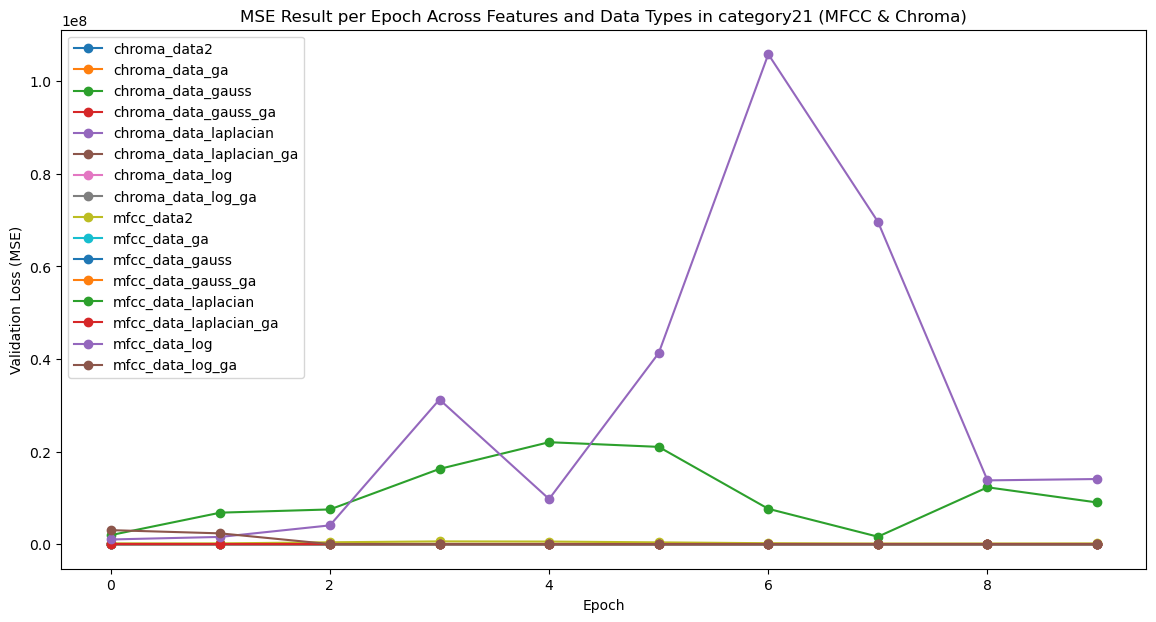

MSE Result : 0.9182357788085938, feature : chroma_data2
MSE Result : 0.9138590097427368, feature : chroma_data_ga
MSE Result : 0.010094617493450642, feature : chroma_data_gauss
MSE Result : 0.0030746953561902046, feature : chroma_data_gauss_ga
MSE Result : 5.497089862823486, feature : chroma_data_laplacian
MSE Result : 3.4558098316192627, feature : chroma_data_laplacian_ga
MSE Result : 1.22886323928833, feature : chroma_data_log
MSE Result : 8.981715202331543, feature : chroma_data_log_ga
MSE Result : 137564.421875, feature : mfcc_data2
MSE Result : 7864.22900390625, feature : mfcc_data_ga
MSE Result : 42.283390045166016, feature : mfcc_data_gauss
MSE Result : 0.0326450876891613, feature : mfcc_data_gauss_ga
MSE Result : 1626659.25, feature : mfcc_data_laplacian
MSE Result : 35.926849365234375, feature : mfcc_data_laplacian_ga
MSE Result : 1025893.9375, feature : mfcc_data_log
MSE Result : 81.94392395019531, feature : mfcc_data_log_ga


In [ ]:
#Chroma-MFCC
def process_features(data, feature_type):
    if feature_type == 'stft':
        return data
    elif feature_type in ['mfcc', 'chroma']:
        if data.ndim == 2:
            return data.reshape(data.shape[0], data.shape[1], 1)
        else:
            return data
    else:
        raise ValueError("Unsupported feature type")

def create_sequences(data, seq_length):
    X, Y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        Y.append(data[i + seq_length])
    return np.array(X), np.array(Y)

feature_types = ['chroma', 'mfcc']
data_names = ['data2', 'data_ga', 'data_gauss', 'data_gauss_ga', 'data_laplacian',
              'data_laplacian_ga', 'data_log', 'data_log_ga']

mse_results = {}
losses_over_epochs = {}

for feature_type in feature_types:
    hdf5_file_path = f'cat_{feature_type}_features21.h5'
    with h5py.File(hdf5_file_path, 'r+') as hdf5_file:
        for data_name in tqdm(data_names, desc=f"Processing {feature_type}"):
            data = hdf5_file[data_name][:]

            if data.ndim == 2 and data.shape[0] > 0:
                data = np.expand_dims(data, axis=-1)

                t, y = process_features(data, feature_type), np.roll(data, -1, axis=0)
                t, y = t[:-1], y[:-1]

                if len(t) > 10:
                    X_train, y_train = create_sequences(t, 2)
                    X_test, y_test = create_sequences(y, 2)

                    if X_train.size > 0 and X_test.size > 0:
                        model = Sequential([
                            Conv1D(8, 1, activation='relu', input_shape=(2, data.shape[1])),
                            MaxPooling1D(2),
                            Flatten(),
                            Dense(50, activation='relu'),
                            Dense(1)
                        ])
                        model.compile(optimizer='adam', loss='mse')
                        history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test), verbose=2)

            mse_results[f'{feature_type}_{data_name}'] = history.history['val_loss']
            print(f'MSE Result for {feature_type} {data_name}:', np.min(history.history['val_loss']))

# Plotting results
plt.figure(figsize=(14, 7))
for key, losses in mse_results.items():
    plt.plot(losses, label=key, marker='o', linestyle='-')
plt.ylabel('Validation Loss (MSE)')
plt.xlabel('Epoch')
plt.title('MSE Result per Epoch Across Features and Data Types in category21 (MFCC & Chroma)')
plt.legend()
plt.show()


for key, losses in mse_results.items():
    los = np.min(losses)
    print(f'MSE Result : {los}, feature : {key}')


**CATEGORY 14**

Processing stft:   0%|          | 0/8 [00:00<?, ?it/s]/Users/indraawal/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/10
1886135/1886135 - 698s - 370us/step - loss: 4.9372e-08 - val_loss: 6.7612e-08
Epoch 2/10
1886135/1886135 - 659s - 349us/step - loss: 4.3464e-08 - val_loss: 6.6977e-08
Epoch 3/10
1886135/1886135 - 625s - 331us/step - loss: 3.1780e-08 - val_loss: 7.2769e-08
Epoch 4/10
1886135/1886135 - 637s - 338us/step - loss: 2.6635e-08 - val_loss: 3.8491e-08
Epoch 5/10
1886135/1886135 - 620s - 329us/step - loss: 2.5952e-08 - val_loss: 3.7000e-08
Epoch 6/10
1886135/1886135 - 622s - 330us/step - loss: 2.5717e-08 - val_loss: 3.4772e-08
Epoch 7/10
1886135/1886135 - 625s - 331us/step - loss: 2.5628e-08 - val_loss: 4.9357e-08
Epoch 8/10
1886135/1886135 - 625s - 331us/step - loss: 2.5605e-08 - val_loss: 3.7152e-08
Epoch 9/10
1886135/1886135 - 625s - 332us/step - loss: 2.5571e-08 - val_loss: 3.5106e-08
Epoch 10/10
1886135/1886135 - 626s - 332us/step - loss: 2.5524e-08 - val_loss: 3.7198e-08


Processing stft:  12%|█▎        | 1/8 [1:49:49<12:48:48, 6589.82s/it]

Validation loss for stft data2: 3.477194709944342e-08
Epoch 1/10
944043/944043 - 319s - 337us/step - loss: 4.7786e-09 - val_loss: 6.0263e-09
Epoch 2/10
944043/944043 - 312s - 331us/step - loss: 3.8138e-09 - val_loss: 7.4805e-09
Epoch 3/10
944043/944043 - 314s - 333us/step - loss: 3.6907e-09 - val_loss: 9.4178e-09
Epoch 4/10
944043/944043 - 312s - 331us/step - loss: 3.6387e-09 - val_loss: 5.0546e-09
Epoch 5/10
944043/944043 - 314s - 332us/step - loss: 3.6112e-09 - val_loss: 4.6876e-09
Epoch 6/10
944043/944043 - 314s - 332us/step - loss: 3.5759e-09 - val_loss: 5.0728e-09
Epoch 7/10
944043/944043 - 313s - 332us/step - loss: 3.5501e-09 - val_loss: 4.7060e-09
Epoch 8/10
944043/944043 - 312s - 331us/step - loss: 3.5312e-09 - val_loss: 1.2747e-08
Epoch 9/10
944043/944043 - 314s - 332us/step - loss: 3.5109e-09 - val_loss: 4.0424e-09
Epoch 10/10
944043/944043 - 314s - 333us/step - loss: 3.4931e-09 - val_loss: 6.4229e-09


Processing stft:  25%|██▌       | 2/8 [2:42:51<7:38:31, 4585.22s/it] 

Validation loss for stft data_ga: 4.042422840910831e-09
Epoch 1/10
1886135/1886135 - 643s - 341us/step - loss: 2.0995e-09 - val_loss: 8.2357e-10
Epoch 2/10
1886135/1886135 - 622s - 330us/step - loss: 1.5177e-09 - val_loss: 5.6918e-10
Epoch 3/10
1886135/1886135 - 620s - 329us/step - loss: 1.4418e-09 - val_loss: 1.5611e-09
Epoch 4/10
1886135/1886135 - 622s - 330us/step - loss: 1.4094e-09 - val_loss: 1.3385e-09
Epoch 5/10
1886135/1886135 - 628s - 333us/step - loss: 1.3917e-09 - val_loss: 6.8956e-10
Epoch 6/10
1886135/1886135 - 12766s - 7ms/step - loss: 1.3825e-09 - val_loss: 6.0246e-10
Epoch 7/10
1886135/1886135 - 627s - 333us/step - loss: 1.3749e-09 - val_loss: 1.6923e-09
Epoch 8/10
1886135/1886135 - 639s - 339us/step - loss: 1.3711e-09 - val_loss: 2.4802e-09
Epoch 9/10
1886135/1886135 - 621s - 329us/step - loss: 1.3668e-09 - val_loss: 1.0544e-09
Epoch 10/10
1886135/1886135 - 625s - 331us/step - loss: 1.3637e-09 - val_loss: 7.5672e-10


Processing stft:  38%|███▊      | 3/8 [7:52:45<15:15:08, 10981.75s/it]

Validation loss for stft data_gauss: 5.691800364360233e-10
Epoch 1/10
940318/940318 - 324s - 344us/step - loss: 5.0240e-09 - val_loss: 5.2197e-09
Epoch 2/10
940318/940318 - 313s - 333us/step - loss: 4.9913e-09 - val_loss: 5.3780e-09
Epoch 3/10
940318/940318 - 312s - 332us/step - loss: 5.0008e-09 - val_loss: 1.4312e-08
Epoch 4/10
940318/940318 - 312s - 332us/step - loss: 5.0008e-09 - val_loss: 6.8321e-09
Epoch 5/10
940318/940318 - 313s - 333us/step - loss: 4.9930e-09 - val_loss: 6.7364e-09
Epoch 6/10
940318/940318 - 312s - 332us/step - loss: 4.9985e-09 - val_loss: 5.9083e-09
Epoch 7/10
940318/940318 - 313s - 333us/step - loss: 4.9943e-09 - val_loss: 1.4672e-08
Epoch 8/10
940318/940318 - 313s - 333us/step - loss: 4.9909e-09 - val_loss: 6.6632e-09
Epoch 9/10
940318/940318 - 312s - 332us/step - loss: 4.9993e-09 - val_loss: 8.2472e-09
Epoch 10/10
940318/940318 - 314s - 334us/step - loss: 4.9983e-09 - val_loss: 1.4920e-08


Processing stft:  50%|█████     | 4/8 [8:45:47<8:46:49, 7902.33s/it]  

Validation loss for stft data_gauss_ga: 5.2197135502751735e-09
Epoch 1/10
1886135/1886135 - 649s - 344us/step - loss: 4.9040e-08 - val_loss: 1.1016e-07
Epoch 2/10
1886135/1886135 - 618s - 328us/step - loss: 4.7356e-08 - val_loss: 1.0221e-07
Epoch 3/10
1886135/1886135 - 622s - 330us/step - loss: 4.7033e-08 - val_loss: 8.3497e-08
Epoch 4/10
1886135/1886135 - 622s - 330us/step - loss: 4.6968e-08 - val_loss: 7.6199e-08
Epoch 5/10
1886135/1886135 - 624s - 331us/step - loss: 4.6965e-08 - val_loss: 7.5951e-08
Epoch 6/10
1886135/1886135 - 620s - 329us/step - loss: 4.6959e-08 - val_loss: 8.6629e-08
Epoch 7/10
1886135/1886135 - 620s - 329us/step - loss: 4.6934e-08 - val_loss: 8.1961e-08
Epoch 8/10
1886135/1886135 - 622s - 330us/step - loss: 4.3817e-08 - val_loss: 6.1121e-08
Epoch 9/10
1886135/1886135 - 631s - 334us/step - loss: 3.3843e-08 - val_loss: 1.0021e-07
Epoch 10/10
1886135/1886135 - 631s - 334us/step - loss: 3.3347e-08 - val_loss: 5.5093e-08


Processing stft:  62%|██████▎   | 5/8 [10:33:08<6:08:46, 7375.46s/it]

Validation loss for stft data_laplacian: 5.509266998160456e-08
Epoch 1/10
943359/943359 - 319s - 338us/step - loss: 2.2649e-08 - val_loss: 4.2599e-08
Epoch 2/10
943359/943359 - 313s - 332us/step - loss: 2.0811e-08 - val_loss: 3.3925e-08
Epoch 3/10
943359/943359 - 321s - 340us/step - loss: 2.0605e-08 - val_loss: 3.5488e-08
Epoch 4/10
943359/943359 - 314s - 332us/step - loss: 2.0390e-08 - val_loss: 3.2069e-08
Epoch 5/10
943359/943359 - 314s - 332us/step - loss: 2.0253e-08 - val_loss: 3.0125e-08
Epoch 6/10
943359/943359 - 315s - 334us/step - loss: 1.9924e-08 - val_loss: 2.8317e-08
Epoch 7/10
943359/943359 - 314s - 333us/step - loss: 1.9007e-08 - val_loss: 5.3948e-08
Epoch 8/10
943359/943359 - 313s - 332us/step - loss: 1.8742e-08 - val_loss: 3.0794e-08
Epoch 9/10
943359/943359 - 314s - 332us/step - loss: 1.8643e-08 - val_loss: 3.3064e-08
Epoch 10/10
943359/943359 - 313s - 332us/step - loss: 1.8626e-08 - val_loss: 2.9818e-08


Processing stft:  75%|███████▌  | 6/8 [11:26:25<3:18:29, 5954.93s/it]

Validation loss for stft data_laplacian_ga: 2.831682621717846e-08
Epoch 1/10
1886135/1886135 - 660s - 350us/step - loss: 6.5766e-08 - val_loss: 1.0662e-07
Epoch 2/10
1886135/1886135 - 623s - 330us/step - loss: 6.4453e-08 - val_loss: 1.0368e-07
Epoch 3/10
1886135/1886135 - 623s - 330us/step - loss: 6.4337e-08 - val_loss: 1.0675e-07
Epoch 4/10
1886135/1886135 - 633s - 336us/step - loss: 6.4284e-08 - val_loss: 1.2570e-07
Epoch 5/10
1886135/1886135 - 664s - 352us/step - loss: 6.4063e-08 - val_loss: 1.0263e-07
Epoch 6/10
1886135/1886135 - 633s - 336us/step - loss: 6.4107e-08 - val_loss: 1.0577e-07
Epoch 7/10
1886135/1886135 - 632s - 335us/step - loss: 6.4127e-08 - val_loss: 1.0329e-07
Epoch 8/10
1886135/1886135 - 641s - 340us/step - loss: 6.4098e-08 - val_loss: 1.0647e-07
Epoch 9/10
1886135/1886135 - 622s - 330us/step - loss: 6.4116e-08 - val_loss: 1.0279e-07
Epoch 10/10
1886135/1886135 - 674s - 357us/step - loss: 6.4147e-08 - val_loss: 1.0290e-07


Processing stft:  88%|████████▊ | 7/8 [13:16:19<1:42:43, 6163.85s/it]

Validation loss for stft data_log: 1.0263174488045479e-07
Epoch 1/10
942462/942462 - 315s - 334us/step - loss: 3.6767e-08 - val_loss: 5.4971e-08
Epoch 2/10
942462/942462 - 319s - 339us/step - loss: 3.5084e-08 - val_loss: 5.3389e-08
Epoch 3/10
942462/942462 - 314s - 333us/step - loss: 3.5034e-08 - val_loss: 4.7052e-08
Epoch 4/10
942462/942462 - 314s - 333us/step - loss: 3.4996e-08 - val_loss: 7.6009e-08
Epoch 5/10
942462/942462 - 314s - 333us/step - loss: 3.5017e-08 - val_loss: 4.6824e-08
Epoch 6/10
942462/942462 - 315s - 334us/step - loss: 3.4922e-08 - val_loss: 4.7655e-08
Epoch 7/10
942462/942462 - 315s - 335us/step - loss: 3.4915e-08 - val_loss: 8.1829e-08
Epoch 8/10
942462/942462 - 325s - 345us/step - loss: 3.4899e-08 - val_loss: 5.1744e-08
Epoch 9/10
942462/942462 - 324s - 344us/step - loss: 3.4891e-08 - val_loss: 5.2957e-08
Epoch 10/10
942462/942462 - 319s - 339us/step - loss: 3.4881e-08 - val_loss: 5.1710e-08


Processing stft: 100%|██████████| 8/8 [14:09:59<00:00, 6374.93s/it]  

Validation loss for stft data_log_ga: 4.682439680436801e-08


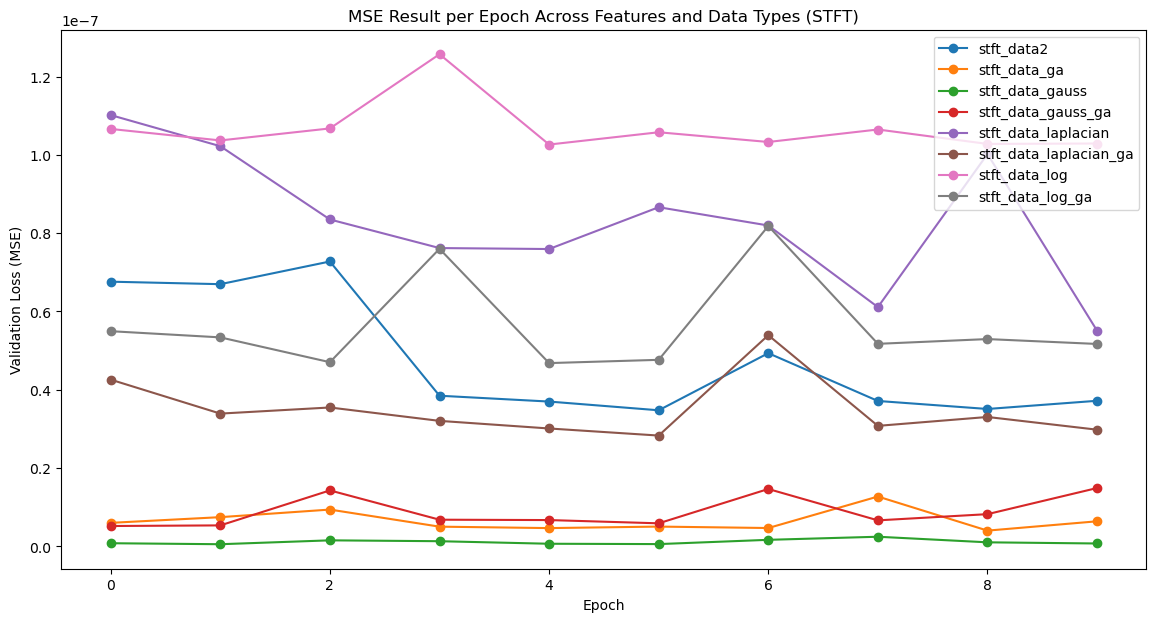

MSE Result : 3.477194709944342e-08, feature : stft_data2
MSE Result : 4.042422840910831e-09, feature : stft_data_ga
MSE Result : 5.691800364360233e-10, feature : stft_data_gauss
MSE Result : 5.2197135502751735e-09, feature : stft_data_gauss_ga
MSE Result : 5.509266998160456e-08, feature : stft_data_laplacian
MSE Result : 2.831682621717846e-08, feature : stft_data_laplacian_ga
MSE Result : 1.0263174488045479e-07, feature : stft_data_log
MSE Result : 4.682439680436801e-08, feature : stft_data_log_ga


In [ ]:
#STFT

def process_features(data, feature_type):
    if feature_type == 'stft':
        return librosa.istft(data)
    elif feature_type in ['mfcc', 'chroma']:
        return data
    else:
        raise ValueError("Unsupported feature type")

def create_sequences(data, seq_length):
    X, Y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        Y.append(data[i + seq_length])
    return np.array(X), np.array(Y)

feature_types = ['stft']
data_names = ['data2', 'data_ga', 'data_gauss', 'data_gauss_ga', 'data_laplacian',
              'data_laplacian_ga', 'data_log', 'data_log_ga']

mse_results = {}
losses_over_epochs = {}

for feature_type in feature_types:
    hdf5_file_path = f'cat_{feature_type}_features14.h5'
    with h5py.File(hdf5_file_path, 'r+') as hdf5_file:
        for data_name in tqdm(data_names, desc=f"Processing {feature_type}"):
            data = hdf5_file[data_name][:]
            t, y = process_features(data, feature_type), np.roll(data, -1)
            t, y = t[:-1], y[:-1]

            train_size = int(0.8 * len(t))
            train_data, test_data = t[:train_size], t[train_size:]
            train_labels, test_labels = y[:train_size], y[train_size:]

            X_train, y_train = create_sequences(train_data, 2)
            X_test, y_test = create_sequences(test_data, 2)

            X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
            X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

            model = Sequential([
                Conv1D(8, 1, activation='relu', input_shape=(2, 1)),
                MaxPooling1D(2),
                Flatten(),
                Dense(50, activation='relu'),
                Dense(1)
            ])
            model.compile(optimizer='adam', loss='mse')
            history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test), verbose=2)

            mse_results[f'{feature_type}_{data_name}'] = history.history['val_loss']
            print(f'Validation loss for {feature_type} {data_name}:', np.min(history.history['val_loss']))

plt.figure(figsize=(14, 7))
for key, losses in mse_results.items():
    plt.plot(losses, label=key, marker='o', linestyle='-')
plt.ylabel('Validation Loss (MSE)')
plt.xlabel('Epoch')
plt.title('MSE Result per Epoch Across Features and Data Types (STFT)')
plt.legend()
plt.show()

for key, losses in mse_results.items():
    los = np.min(losses)
    print(f'MSE Result : {los}, feature : {key}')

Processing chroma:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/10


/Users/indraawal/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


1/1 - 0s - 450ms/step - loss: 0.6495 - val_loss: 22614.2520
Epoch 2/10
1/1 - 0s - 35ms/step - loss: 21779.1445 - val_loss: 1213.8783
Epoch 3/10
1/1 - 0s - 40ms/step - loss: 1164.4664 - val_loss: 0.9202
Epoch 4/10
1/1 - 0s - 39ms/step - loss: 0.8701 - val_loss: 0.9233
Epoch 5/10
1/1 - 0s - 43ms/step - loss: 0.8731 - val_loss: 0.9259
Epoch 6/10
1/1 - 0s - 37ms/step - loss: 0.8757 - val_loss: 0.9282
Epoch 7/10
1/1 - 0s - 42ms/step - loss: 0.8778 - val_loss: 0.9301
Epoch 8/10
1/1 - 0s - 40ms/step - loss: 0.8797 - val_loss: 0.9317
Epoch 9/10
1/1 - 0s - 42ms/step - loss: 0.8813 - val_loss: 0.9332
Epoch 10/10
1/1 - 0s - 37ms/step - loss: 0.8827 - val_loss: 0.9344


Processing chroma:  12%|█▎        | 1/8 [00:00<00:06,  1.07it/s]

MSE Result for chroma data2: 0.9201918244361877
Epoch 1/10
1/1 - 0s - 430ms/step - loss: 0.2176 - val_loss: 138775.6562
Epoch 2/10
1/1 - 0s - 30ms/step - loss: 139386.0156 - val_loss: 8516.3994
Epoch 3/10
1/1 - 0s - 29ms/step - loss: 8554.7451 - val_loss: 0.9178
Epoch 4/10
1/1 - 0s - 32ms/step - loss: 0.8677 - val_loss: 0.9199
Epoch 5/10
1/1 - 0s - 27ms/step - loss: 0.8698 - val_loss: 0.9215
Epoch 6/10
1/1 - 0s - 26ms/step - loss: 0.8713 - val_loss: 0.9228
Epoch 7/10
1/1 - 0s - 32ms/step - loss: 0.8725 - val_loss: 0.9238
Epoch 8/10
1/1 - 0s - 29ms/step - loss: 0.8735 - val_loss: 0.9245
Epoch 9/10
1/1 - 0s - 34ms/step - loss: 0.8742 - val_loss: 0.9251
Epoch 10/10
1/1 - 0s - 30ms/step - loss: 0.8748 - val_loss: 0.9255


Processing chroma:  25%|██▌       | 2/8 [00:01<00:04,  1.21it/s]

MSE Result for chroma data_ga: 0.9178217649459839
Epoch 1/10
1/1 - 0s - 410ms/step - loss: 2.3127e-04 - val_loss: 13.8633
Epoch 2/10
1/1 - 0s - 60ms/step - loss: 20.7049 - val_loss: 0.0293
Epoch 3/10
1/1 - 0s - 49ms/step - loss: 0.5154 - val_loss: 0.1564
Epoch 4/10
1/1 - 0s - 48ms/step - loss: 0.4795 - val_loss: 0.3990
Epoch 5/10
1/1 - 0s - 50ms/step - loss: 0.9394 - val_loss: 0.0257
Epoch 6/10
1/1 - 0s - 48ms/step - loss: 0.0750 - val_loss: 0.9877
Epoch 7/10
1/1 - 0s - 42ms/step - loss: 1.2379 - val_loss: 0.7882
Epoch 8/10
1/1 - 0s - 38ms/step - loss: 0.9726 - val_loss: 0.0059
Epoch 9/10
1/1 - 0s - 54ms/step - loss: 0.0155 - val_loss: 0.3573
Epoch 10/10
1/1 - 0s - 45ms/step - loss: 1.0191 - val_loss: 0.1992


Processing chroma:  38%|███▊      | 3/8 [00:02<00:04,  1.16it/s]

MSE Result for chroma data_gauss: 0.005941431038081646
Epoch 1/10
1/1 - 0s - 484ms/step - loss: 5.9376e-04 - val_loss: 3.6104e-05
Epoch 2/10
1/1 - 0s - 32ms/step - loss: 2.1620e-05 - val_loss: 4.9611e-05
Epoch 3/10
1/1 - 0s - 37ms/step - loss: 3.2310e-05 - val_loss: 5.7929e-05
Epoch 4/10
1/1 - 0s - 36ms/step - loss: 3.9146e-05 - val_loss: 6.1077e-05
Epoch 5/10
1/1 - 0s - 36ms/step - loss: 4.1769e-05 - val_loss: 5.9881e-05
Epoch 6/10
1/1 - 0s - 40ms/step - loss: 4.0770e-05 - val_loss: 5.5484e-05
Epoch 7/10
1/1 - 0s - 36ms/step - loss: 3.7122e-05 - val_loss: 4.9072e-05
Epoch 8/10
1/1 - 0s - 38ms/step - loss: 3.1873e-05 - val_loss: 4.1720e-05
Epoch 9/10
1/1 - 0s - 30ms/step - loss: 2.5987e-05 - val_loss: 3.4320e-05
Epoch 10/10
1/1 - 0s - 27ms/step - loss: 2.0262e-05 - val_loss: 2.7551e-05


Processing chroma:  50%|█████     | 4/8 [00:03<00:03,  1.16it/s]

MSE Result for chroma data_gauss_ga: 2.755119203357026e-05
Epoch 1/10
1/1 - 0s - 386ms/step - loss: 0.0117 - val_loss: 105.1336
Epoch 2/10
1/1 - 0s - 36ms/step - loss: 635.8543 - val_loss: 4.0503
Epoch 3/10
1/1 - 0s - 34ms/step - loss: 17.2006 - val_loss: 78.7441
Epoch 4/10
1/1 - 0s - 38ms/step - loss: 90.0904 - val_loss: 1.3477
Epoch 5/10
1/1 - 0s - 37ms/step - loss: 9.1684 - val_loss: 24.2337
Epoch 6/10
1/1 - 0s - 41ms/step - loss: 5.4469 - val_loss: 78.0305
Epoch 7/10
1/1 - 0s - 38ms/step - loss: 0.0314 - val_loss: 138.9560
Epoch 8/10
1/1 - 0s - 38ms/step - loss: 4.6081 - val_loss: 275.5786
Epoch 9/10
1/1 - 0s - 40ms/step - loss: 0.0810 - val_loss: 393.1050
Epoch 10/10
1/1 - 0s - 42ms/step - loss: 0.4561 - val_loss: 456.1298


Processing chroma:  62%|██████▎   | 5/8 [00:04<00:02,  1.20it/s]

MSE Result for chroma data_laplacian: 1.3477450609207153
Epoch 1/10
1/1 - 1s - 501ms/step - loss: 0.0048 - val_loss: 139.2519
Epoch 2/10
1/1 - 0s - 39ms/step - loss: 32.5800 - val_loss: 600.5463
Epoch 3/10
1/1 - 0s - 35ms/step - loss: 746.2950 - val_loss: 33.8222
Epoch 4/10
1/1 - 0s - 34ms/step - loss: 0.6735 - val_loss: 341.4808
Epoch 5/10
1/1 - 0s - 38ms/step - loss: 179.8663 - val_loss: 477.9689
Epoch 6/10
1/1 - 0s - 37ms/step - loss: 336.0876 - val_loss: 329.3030
Epoch 7/10
1/1 - 0s - 40ms/step - loss: 242.0455 - val_loss: 103.1873
Epoch 8/10
1/1 - 0s - 33ms/step - loss: 61.4736 - val_loss: 0.0167
Epoch 9/10
1/1 - 0s - 37ms/step - loss: 1.9998 - val_loss: 71.8176
Epoch 10/10
1/1 - 0s - 33ms/step - loss: 89.2208 - val_loss: 160.8272


Processing chroma:  75%|███████▌  | 6/8 [00:05<00:01,  1.17it/s]

MSE Result for chroma data_laplacian_ga: 0.016692345961928368
Epoch 1/10
1/1 - 0s - 393ms/step - loss: 0.4268 - val_loss: 220791.5625
Epoch 2/10
1/1 - 0s - 38ms/step - loss: 230937.4531 - val_loss: 13069.6768
Epoch 3/10
1/1 - 0s - 39ms/step - loss: 13238.7998 - val_loss: 1.2291
Epoch 4/10
1/1 - 0s - 39ms/step - loss: 0.9789 - val_loss: 1.2322
Epoch 5/10
1/1 - 0s - 38ms/step - loss: 0.9816 - val_loss: 1.2345
Epoch 6/10
1/1 - 0s - 39ms/step - loss: 0.9837 - val_loss: 1.2363
Epoch 7/10
1/1 - 0s - 40ms/step - loss: 0.9853 - val_loss: 1.2377
Epoch 8/10
1/1 - 0s - 44ms/step - loss: 0.9865 - val_loss: 1.2387
Epoch 9/10
1/1 - 0s - 38ms/step - loss: 0.9874 - val_loss: 1.2394
Epoch 10/10
1/1 - 0s - 44ms/step - loss: 0.9881 - val_loss: 1.2399


Processing chroma:  88%|████████▊ | 7/8 [00:05<00:00,  1.19it/s]

MSE Result for chroma data_log: 1.2290620803833008
Epoch 1/10
1/1 - 0s - 469ms/step - loss: 1.0922 - val_loss: 3.6919
Epoch 2/10
1/1 - 0s - 33ms/step - loss: 7.6704 - val_loss: 24.6873
Epoch 3/10
1/1 - 0s - 34ms/step - loss: 18.4631 - val_loss: 3.5871
Epoch 4/10
1/1 - 0s - 28ms/step - loss: 0.0236 - val_loss: 0.9149
Epoch 5/10
1/1 - 0s - 26ms/step - loss: 21.1725 - val_loss: 1.2221
Epoch 6/10
1/1 - 0s - 43ms/step - loss: 3.0480 - val_loss: 13.1508
Epoch 7/10
1/1 - 0s - 36ms/step - loss: 4.3489 - val_loss: 17.6256
Epoch 8/10
1/1 - 0s - 36ms/step - loss: 9.5984 - val_loss: 6.0855
Epoch 9/10
1/1 - 0s - 39ms/step - loss: 2.4141 - val_loss: 0.0771
Epoch 10/10
1/1 - 0s - 35ms/step - loss: 0.3348 - val_loss: 1.3682


Processing chroma: 100%|██████████| 8/8 [00:06<00:00,  1.18it/s]


MSE Result for chroma data_log_ga: 0.07710988074541092


Processing mfcc:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/10
2/2 - 52s - 26s/step - loss: 544125.2500 - val_loss: 1043914.5000
Epoch 2/10
2/2 - 46s - 23s/step - loss: 9110346.0000 - val_loss: 1758418.6250
Epoch 3/10
2/2 - 43s - 22s/step - loss: 223362112.0000 - val_loss: 3821008.2500
Epoch 4/10
2/2 - 39s - 19s/step - loss: 23900028.0000 - val_loss: 3294056.5000
Epoch 5/10
2/2 - 35s - 17s/step - loss: 3069383.5000 - val_loss: 2007296.0000
Epoch 6/10
2/2 - 32s - 16s/step - loss: 1959249.2500 - val_loss: 1684185.1250
Epoch 7/10
2/2 - 34s - 17s/step - loss: 1841434.0000 - val_loss: 2118623.5000
Epoch 8/10
2/2 - 28s - 14s/step - loss: 2255887.0000 - val_loss: 2333039.5000
Epoch 9/10
2/2 - 29s - 14s/step - loss: 2318841.5000 - val_loss: 2089202.8750
Epoch 10/10
2/2 - 27s - 14s/step - loss: 1971271.6250 - val_loss: 1511161.6250


Processing mfcc:  12%|█▎        | 1/8 [06:27<45:09, 387.03s/it]

MSE Result for mfcc data2: 1043914.5
Epoch 1/10
2/2 - 12s - 6s/step - loss: 53351.3789 - val_loss: 41766.1836
Epoch 2/10
2/2 - 4s - 2s/step - loss: 2926792.5000 - val_loss: 180323.5000
Epoch 3/10
2/2 - 1s - 466ms/step - loss: 103963304.0000 - val_loss: 76504.6641
Epoch 4/10
2/2 - 2s - 842ms/step - loss: 700227.6875 - val_loss: 96638.9766
Epoch 5/10
2/2 - 2s - 1s/step - loss: 244054.5000 - val_loss: 544087.1250
Epoch 6/10
2/2 - 2s - 1s/step - loss: 659981.1875 - val_loss: 738136.8750
Epoch 7/10
2/2 - 1s - 457ms/step - loss: 900816.2500 - val_loss: 771953.6250
Epoch 8/10
2/2 - 1s - 357ms/step - loss: 921131.1875 - val_loss: 668483.3125
Epoch 9/10
2/2 - 2s - 794ms/step - loss: 629465.8750 - val_loss: 495517.3438
Epoch 10/10
2/2 - 2s - 798ms/step - loss: 542628.6875 - val_loss: 318994.1875


Processing mfcc:  25%|██▌       | 2/8 [06:56<17:41, 176.86s/it]

MSE Result for mfcc data_ga: 41766.18359375
Epoch 1/10
2/2 - 45s - 22s/step - loss: 112.3274 - val_loss: 1281.8804
Epoch 2/10
2/2 - 34s - 17s/step - loss: 653.5939 - val_loss: 300.5352
Epoch 3/10
2/2 - 33s - 16s/step - loss: 315.0034 - val_loss: 348.7950
Epoch 4/10
2/2 - 35s - 17s/step - loss: 315.2185 - val_loss: 194.2266
Epoch 5/10
2/2 - 29s - 15s/step - loss: 195.3107 - val_loss: 137.4873
Epoch 6/10
2/2 - 30s - 15s/step - loss: 151.0815 - val_loss: 223.2296
Epoch 7/10
2/2 - 30s - 15s/step - loss: 200.2634 - val_loss: 85.2136
Epoch 8/10
2/2 - 25s - 13s/step - loss: 81.5688 - val_loss: 69.3053
Epoch 9/10
2/2 - 32s - 16s/step - loss: 81.7092 - val_loss: 65.2177
Epoch 10/10
2/2 - 34s - 17s/step - loss: 56.7181 - val_loss: 40.4260


Processing mfcc:  38%|███▊      | 3/8 [12:39<21:02, 252.57s/it]

MSE Result for mfcc data_gauss: 40.426021575927734
Epoch 1/10
2/2 - 21s - 11s/step - loss: 673.5914 - val_loss: 465.9449
Epoch 2/10
2/2 - 18s - 9s/step - loss: 383.1931 - val_loss: 86.6525
Epoch 3/10
2/2 - 10s - 5s/step - loss: 59.2307 - val_loss: 0.0362
Epoch 4/10
2/2 - 6s - 3s/step - loss: 0.0368 - val_loss: 0.0371
Epoch 5/10
2/2 - 4s - 2s/step - loss: 0.0377 - val_loss: 0.0378
Epoch 6/10
2/2 - 2s - 1s/step - loss: 0.0383 - val_loss: 0.0383
Epoch 7/10
2/2 - 1s - 554ms/step - loss: 0.0388 - val_loss: 0.0387
Epoch 8/10
2/2 - 2s - 1s/step - loss: 0.0391 - val_loss: 0.0389
Epoch 9/10
2/2 - 3s - 1s/step - loss: 0.0393 - val_loss: 0.0390
Epoch 10/10
2/2 - 2s - 883ms/step - loss: 0.0394 - val_loss: 0.0390


Processing mfcc:  50%|█████     | 4/8 [13:51<12:04, 181.16s/it]

MSE Result for mfcc data_gauss_ga: 0.036179594695568085
Epoch 1/10
2/2 - 51s - 26s/step - loss: 5139500.5000 - val_loss: 141427968.0000
Epoch 2/10
2/2 - 42s - 21s/step - loss: 156253664.0000 - val_loss: 4927373.0000
Epoch 3/10
2/2 - 45s - 23s/step - loss: 933441216.0000 - val_loss: 4962362.0000
Epoch 4/10
2/2 - 44s - 22s/step - loss: 643297664.0000 - val_loss: 987062.2500
Epoch 5/10
2/2 - 36s - 18s/step - loss: 49265504.0000 - val_loss: 234405264.0000
Epoch 6/10
2/2 - 34s - 17s/step - loss: 367723744.0000 - val_loss: 142029856.0000
Epoch 7/10
2/2 - 36s - 18s/step - loss: 244352656.0000 - val_loss: 6250532.0000
Epoch 8/10
2/2 - 36s - 18s/step - loss: 30544834.0000 - val_loss: 1837553.6250
Epoch 9/10
2/2 - 32s - 16s/step - loss: 87141584.0000 - val_loss: 7290462.0000
Epoch 10/10
2/2 - 32s - 16s/step - loss: 101356352.0000 - val_loss: 21180616.0000


Processing mfcc:  62%|██████▎   | 5/8 [20:38<13:07, 262.64s/it]

MSE Result for mfcc data_laplacian: 987062.25
Epoch 1/10
2/2 - 17s - 9s/step - loss: 50203.0586 - val_loss: 37.5990
Epoch 2/10
2/2 - 6s - 3s/step - loss: 37.7523 - val_loss: 37.5546
Epoch 3/10
2/2 - 2s - 1s/step - loss: 37.7098 - val_loss: 37.5178
Epoch 4/10
2/2 - 1s - 492ms/step - loss: 37.6735 - val_loss: 37.4854
Epoch 5/10
2/2 - 2s - 975ms/step - loss: 37.6415 - val_loss: 37.4556
Epoch 6/10
2/2 - 1s - 523ms/step - loss: 37.6117 - val_loss: 37.4277
Epoch 7/10
2/2 - 2s - 872ms/step - loss: 37.5844 - val_loss: 37.4011
Epoch 8/10
2/2 - 1s - 664ms/step - loss: 37.5577 - val_loss: 37.3755
Epoch 9/10
2/2 - 2s - 925ms/step - loss: 37.5325 - val_loss: 37.3505
Epoch 10/10
2/2 - 3s - 1s/step - loss: 37.5071 - val_loss: 37.3261


Processing mfcc:  75%|███████▌  | 6/8 [21:17<06:13, 186.77s/it]

MSE Result for mfcc data_laplacian_ga: 37.326053619384766
Epoch 1/10
2/2 - 59s - 29s/step - loss: 248411264.0000 - val_loss: 15342459.0000
Epoch 2/10
2/2 - 39s - 19s/step - loss: 191978720.0000 - val_loss: 27352154.0000
Epoch 3/10
2/2 - 49s - 25s/step - loss: 306812128.0000 - val_loss: 2806330.5000
Epoch 4/10
2/2 - 40s - 20s/step - loss: 44332768.0000 - val_loss: 47400012.0000
Epoch 5/10
2/2 - 41s - 20s/step - loss: 255269936.0000 - val_loss: 24662944.0000
Epoch 6/10
2/2 - 45s - 22s/step - loss: 221605920.0000 - val_loss: 12143594.0000
Epoch 7/10
2/2 - 42s - 21s/step - loss: 18437462.0000 - val_loss: 26845546.0000
Epoch 8/10
2/2 - 42s - 21s/step - loss: 43554820.0000 - val_loss: 28966930.0000
Epoch 9/10
2/2 - 45s - 22s/step - loss: 136421024.0000 - val_loss: 19251196.0000
Epoch 10/10
2/2 - 34s - 17s/step - loss: 50814476.0000 - val_loss: 12266540.0000


Processing mfcc:  88%|████████▊ | 7/8 [28:52<04:34, 274.26s/it]

MSE Result for mfcc data_log: 2806330.5
Epoch 1/10
2/2 - 15s - 7s/step - loss: 20662.6465 - val_loss: 86.1157
Epoch 2/10
2/2 - 9s - 4s/step - loss: 86.2632 - val_loss: 86.1155
Epoch 3/10
2/2 - 3s - 1s/step - loss: 86.2612 - val_loss: 86.1105
Epoch 4/10
2/2 - 4s - 2s/step - loss: 86.2547 - val_loss: 86.0994
Epoch 5/10
2/2 - 3s - 2s/step - loss: 86.2425 - val_loss: 86.0835
Epoch 6/10
2/2 - 3s - 1s/step - loss: 86.2260 - val_loss: 86.0699
Epoch 7/10
2/2 - 2s - 1s/step - loss: 86.2134 - val_loss: 86.0573
Epoch 8/10
2/2 - 3s - 1s/step - loss: 86.2008 - val_loss: 86.0432
Epoch 9/10
2/2 - 2s - 1s/step - loss: 86.1859 - val_loss: 86.0281
Epoch 10/10
2/2 - 3s - 1s/step - loss: 86.1709 - val_loss: 86.0120


Processing mfcc: 100%|██████████| 8/8 [29:41<00:00, 222.64s/it]

MSE Result for mfcc data_log_ga: 86.01200866699219


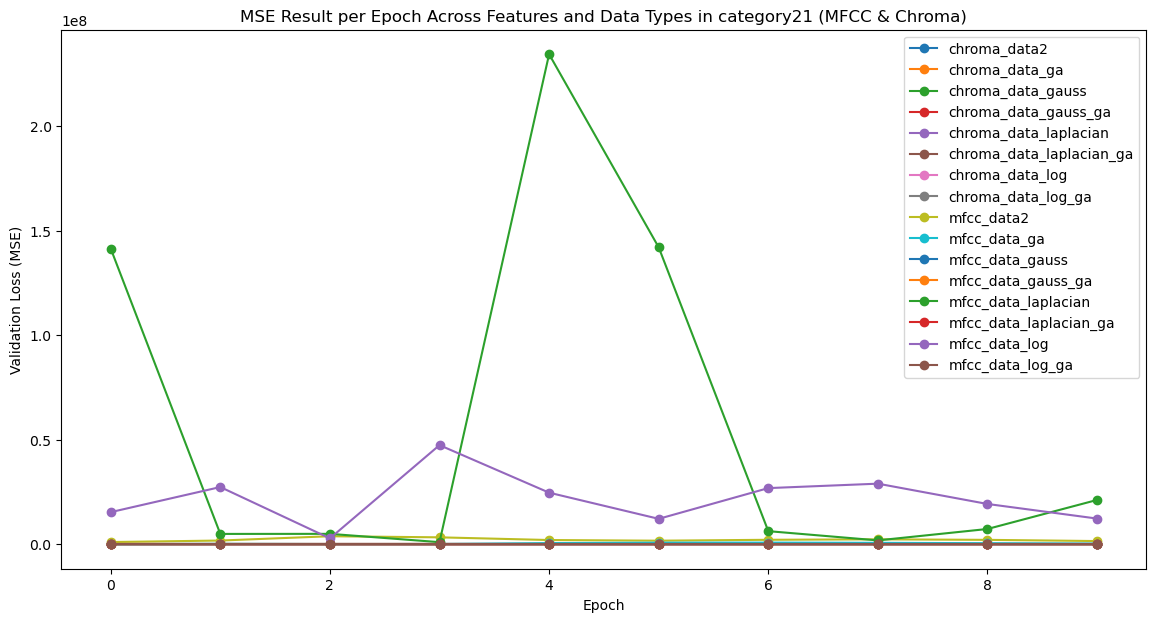

MSE Result : 0.9201918244361877, feature : chroma_data2
MSE Result : 0.9178217649459839, feature : chroma_data_ga
MSE Result : 0.005941431038081646, feature : chroma_data_gauss
MSE Result : 2.755119203357026e-05, feature : chroma_data_gauss_ga
MSE Result : 1.3477450609207153, feature : chroma_data_laplacian
MSE Result : 0.016692345961928368, feature : chroma_data_laplacian_ga
MSE Result : 1.2290620803833008, feature : chroma_data_log
MSE Result : 0.07710988074541092, feature : chroma_data_log_ga
MSE Result : 1043914.5, feature : mfcc_data2
MSE Result : 41766.18359375, feature : mfcc_data_ga
MSE Result : 40.426021575927734, feature : mfcc_data_gauss
MSE Result : 0.036179594695568085, feature : mfcc_data_gauss_ga
MSE Result : 987062.25, feature : mfcc_data_laplacian
MSE Result : 37.326053619384766, feature : mfcc_data_laplacian_ga
MSE Result : 2806330.5, feature : mfcc_data_log
MSE Result : 86.01200866699219, feature : mfcc_data_log_ga


In [ ]:
#MFCC-CHROMA

def process_features(data, feature_type):
    if feature_type == 'stft':
        return librosa.istft(data)
    elif feature_type in ['mfcc', 'chroma']:
        if data.ndim == 2:
            return data.reshape(data.shape[0], data.shape[1], 1)
        else:
            return data
    else:
        raise ValueError("Unsupported feature type")

def create_sequences(data, seq_length):
    X, Y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        Y.append(data[i + seq_length])
    return np.array(X), np.array(Y)

feature_types = ['chroma', 'mfcc']
data_names = ['data2', 'data_ga', 'data_gauss', 'data_gauss_ga', 'data_laplacian',
              'data_laplacian_ga', 'data_log', 'data_log_ga']

mse_results = {}
losses_over_epochs = {}

for feature_type in feature_types:
    hdf5_file_path = f'cat_{feature_type}_features14.h5'
    with h5py.File(hdf5_file_path, 'r+') as hdf5_file:
        for data_name in tqdm(data_names, desc=f"Processing {feature_type}"):
            data = hdf5_file[data_name][:]

            if data.ndim == 2 and data.shape[0] > 0:
                data = np.expand_dims(data, axis=-1)

                t, y = process_features(data, feature_type), np.roll(data, -1, axis=0)
                t, y = t[:-1], y[:-1]

                if len(t) > 10:
                    X_train, y_train = create_sequences(t, 2)
                    X_test, y_test = create_sequences(y, 2)

                    if X_train.size > 0 and X_test.size > 0:
                        model = Sequential([
                            Conv1D(8, 1, activation='relu', input_shape=(2, data.shape[1])),
                            MaxPooling1D(2),
                            Flatten(),
                            Dense(50, activation='relu'),
                            Dense(1)
                        ])
                        model.compile(optimizer='adam', loss='mse')
                        history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test), verbose=2)

            mse_results[f'{feature_type}_{data_name}'] = history.history['val_loss']
            print(f'MSE Result for {feature_type} {data_name}:', np.min(history.history['val_loss']))

plt.figure(figsize=(14, 7))
for key, losses in mse_results.items():
    plt.plot(losses, label=key, marker='o', linestyle='-')
plt.ylabel('Validation Loss (MSE)')
plt.xlabel('Epoch')
plt.title('MSE Result per Epoch Across Features and Data Types in category14 (MFCC & Chroma)')
plt.legend()
plt.show()


for key, losses in mse_results.items():
    los = np.min(losses)
    print(f'MSE Result : {los}, feature : {key}')

**CATEGORY 7**

Processing stft:   0%|          | 0/8 [00:00<?, ?it/s]/Users/indraawal/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/10
1886135/1886135 - 627s - 332us/step - loss: 5.5560e-08 - val_loss: 8.0739e-08
Epoch 2/10
1886135/1886135 - 623s - 330us/step - loss: 5.3809e-08 - val_loss: 1.0380e-07
Epoch 3/10
1886135/1886135 - 647s - 343us/step - loss: 5.3643e-08 - val_loss: 9.6161e-08
Epoch 4/10
1886135/1886135 - 641s - 340us/step - loss: 5.3629e-08 - val_loss: 7.7983e-08
Epoch 5/10
1886135/1886135 - 687s - 364us/step - loss: 5.3603e-08 - val_loss: 9.8509e-08
Epoch 6/10
1886135/1886135 - 619s - 328us/step - loss: 5.3525e-08 - val_loss: 8.3471e-08
Epoch 7/10
1886135/1886135 - 623s - 330us/step - loss: 5.3573e-08 - val_loss: 8.0455e-08
Epoch 8/10
1886135/1886135 - 624s - 331us/step - loss: 5.3634e-08 - val_loss: 7.8049e-08
Epoch 9/10
1886135/1886135 - 624s - 331us/step - loss: 5.3555e-08 - val_loss: 1.1606e-07
Epoch 10/10
1886135/1886135 - 625s - 331us/step - loss: 5.3531e-08 - val_loss: 8.3414e-08


Processing stft:  12%|█▎        | 1/8 [1:48:53<12:42:15, 6533.60s/it]

Validation loss for stft data2: 7.798251289159452e-08
Epoch 1/10
944043/944043 - 320s - 339us/step - loss: 4.8618e-09 - val_loss: 1.1362e-08
Epoch 2/10
944043/944043 - 314s - 332us/step - loss: 4.0979e-09 - val_loss: 4.1049e-09
Epoch 3/10
944043/944043 - 312s - 331us/step - loss: 4.0362e-09 - val_loss: 4.7470e-09
Epoch 4/10
944043/944043 - 325s - 344us/step - loss: 4.0080e-09 - val_loss: 5.2682e-09
Epoch 5/10
944043/944043 - 311s - 330us/step - loss: 3.9862e-09 - val_loss: 1.1086e-08
Epoch 6/10
944043/944043 - 314s - 333us/step - loss: 3.9803e-09 - val_loss: 7.5256e-09
Epoch 7/10
944043/944043 - 312s - 331us/step - loss: 3.9720e-09 - val_loss: 4.6098e-09
Epoch 8/10
944043/944043 - 312s - 330us/step - loss: 3.9669e-09 - val_loss: 5.0338e-09
Epoch 9/10
944043/944043 - 313s - 332us/step - loss: 3.9546e-09 - val_loss: 4.4950e-09
Epoch 10/10
944043/944043 - 313s - 331us/step - loss: 3.9472e-09 - val_loss: 1.2467e-08


Processing stft:  25%|██▌       | 2/8 [2:42:05<7:36:46, 4567.73s/it] 

Validation loss for stft data_ga: 4.104854678388392e-09
Epoch 1/10
1886135/1886135 - 625s - 331us/step - loss: 6.5888e-09 - val_loss: 1.0112e-08
Epoch 2/10
1886135/1886135 - 622s - 330us/step - loss: 6.5666e-09 - val_loss: 7.1647e-09
Epoch 3/10
1886135/1886135 - 622s - 330us/step - loss: 6.5738e-09 - val_loss: 1.4272e-08
Epoch 4/10
1886135/1886135 - 622s - 330us/step - loss: 6.5719e-09 - val_loss: 8.9056e-09
Epoch 5/10
1886135/1886135 - 622s - 330us/step - loss: 6.5753e-09 - val_loss: 1.0071e-08
Epoch 6/10
1886135/1886135 - 622s - 330us/step - loss: 6.5743e-09 - val_loss: 7.5860e-09
Epoch 7/10
1886135/1886135 - 626s - 332us/step - loss: 6.5765e-09 - val_loss: 7.3604e-09
Epoch 8/10
1886135/1886135 - 622s - 330us/step - loss: 6.5705e-09 - val_loss: 1.2767e-08
Epoch 9/10
1886135/1886135 - 625s - 331us/step - loss: 6.5730e-09 - val_loss: 1.1912e-08
Epoch 10/10
1886135/1886135 - 623s - 330us/step - loss: 6.5727e-09 - val_loss: 8.1226e-09


Processing stft:  38%|███▊      | 3/8 [4:29:07<7:31:12, 5414.47s/it]

Validation loss for stft data_gauss: 7.164654203251075e-09
Epoch 1/10
940318/940318 - 321s - 341us/step - loss: 5.0497e-09 - val_loss: 5.5262e-09
Epoch 2/10
940318/940318 - 318s - 338us/step - loss: 5.0013e-09 - val_loss: 6.3736e-09
Epoch 3/10
940318/940318 - 316s - 336us/step - loss: 4.9938e-09 - val_loss: 5.2547e-09
Epoch 4/10
940318/940318 - 311s - 331us/step - loss: 4.9963e-09 - val_loss: 1.1500e-08
Epoch 5/10
940318/940318 - 312s - 332us/step - loss: 4.9942e-09 - val_loss: 1.0680e-08
Epoch 6/10
940318/940318 - 311s - 331us/step - loss: 4.9956e-09 - val_loss: 7.7546e-09
Epoch 7/10
940318/940318 - 312s - 332us/step - loss: 4.9955e-09 - val_loss: 1.3005e-08
Epoch 8/10
940318/940318 - 339s - 360us/step - loss: 4.9918e-09 - val_loss: 7.0809e-09
Epoch 9/10
940318/940318 - 336s - 357us/step - loss: 4.9903e-09 - val_loss: 5.2232e-09
Epoch 10/10
940318/940318 - 333s - 354us/step - loss: 4.9927e-09 - val_loss: 6.2720e-09


Processing stft:  50%|█████     | 4/8 [5:23:18<5:04:02, 4560.56s/it]

Validation loss for stft data_gauss_ga: 5.223238730422963e-09
Epoch 1/10
1886135/1886135 - 640s - 339us/step - loss: 5.6132e-08 - val_loss: 8.9216e-08
Epoch 2/10
1886135/1886135 - 645s - 342us/step - loss: 5.4602e-08 - val_loss: 1.0137e-07
Epoch 3/10
1886135/1886135 - 640s - 339us/step - loss: 5.4560e-08 - val_loss: 9.4502e-08
Epoch 4/10
1886135/1886135 - 613s - 325us/step - loss: 5.4540e-08 - val_loss: 9.0299e-08
Epoch 5/10
1886135/1886135 - 600s - 318us/step - loss: 5.4505e-08 - val_loss: 8.8771e-08
Epoch 6/10
1886135/1886135 - 604s - 320us/step - loss: 5.4473e-08 - val_loss: 1.2443e-07
Epoch 7/10
1886135/1886135 - 625s - 332us/step - loss: 5.4506e-08 - val_loss: 8.6471e-08
Epoch 8/10
1886135/1886135 - 625s - 331us/step - loss: 5.4490e-08 - val_loss: 8.8435e-08
Epoch 9/10
1886135/1886135 - 623s - 331us/step - loss: 5.4516e-08 - val_loss: 1.0096e-07
Epoch 10/10
1886135/1886135 - 625s - 331us/step - loss: 5.4520e-08 - val_loss: 8.9960e-08


Processing stft:  62%|██████▎   | 5/8 [7:10:29<4:21:45, 5235.03s/it]

Validation loss for stft data_laplacian: 8.647066351841204e-08
Epoch 1/10
943359/943359 - 318s - 337us/step - loss: 3.9056e-07 - val_loss: 5.6876e-07
Epoch 2/10
943359/943359 - 317s - 336us/step - loss: 3.9046e-07 - val_loss: 5.3336e-07
Epoch 3/10
943359/943359 - 319s - 338us/step - loss: 3.9056e-07 - val_loss: 5.3817e-07
Epoch 4/10
943359/943359 - 311s - 330us/step - loss: 3.9052e-07 - val_loss: 7.3320e-07
Epoch 5/10
943359/943359 - 313s - 331us/step - loss: 3.9062e-07 - val_loss: 5.5064e-07
Epoch 6/10
943359/943359 - 312s - 331us/step - loss: 3.9051e-07 - val_loss: 5.4394e-07
Epoch 7/10
943359/943359 - 312s - 330us/step - loss: 3.9033e-07 - val_loss: 5.2945e-07
Epoch 8/10
943359/943359 - 315s - 334us/step - loss: 3.9055e-07 - val_loss: 5.3069e-07
Epoch 9/10
943359/943359 - 311s - 330us/step - loss: 3.9052e-07 - val_loss: 5.5440e-07
Epoch 10/10
943359/943359 - 311s - 329us/step - loss: 3.9051e-07 - val_loss: 5.9961e-07


Processing stft:  75%|███████▌  | 6/8 [8:03:32<2:31:14, 4537.24s/it]

Validation loss for stft data_laplacian_ga: 5.294502329888928e-07
Epoch 1/10
1886135/1886135 - 622s - 330us/step - loss: 7.4520e-08 - val_loss: 1.1603e-07
Epoch 2/10
1886135/1886135 - 628s - 333us/step - loss: 7.2769e-08 - val_loss: 1.2238e-07
Epoch 3/10
1886135/1886135 - 623s - 330us/step - loss: 7.2713e-08 - val_loss: 1.5365e-07
Epoch 4/10
1886135/1886135 - 636s - 337us/step - loss: 7.2760e-08 - val_loss: 1.1199e-07
Epoch 5/10
1886135/1886135 - 634s - 336us/step - loss: 7.2720e-08 - val_loss: 1.1940e-07
Epoch 6/10
1886135/1886135 - 625s - 331us/step - loss: 7.2683e-08 - val_loss: 1.2062e-07
Epoch 7/10
1886135/1886135 - 623s - 330us/step - loss: 7.2648e-08 - val_loss: 1.3970e-07
Epoch 8/10
1886135/1886135 - 624s - 331us/step - loss: 7.2685e-08 - val_loss: 1.2663e-07
Epoch 9/10
1886135/1886135 - 623s - 331us/step - loss: 7.2684e-08 - val_loss: 1.3264e-07
Epoch 10/10
1886135/1886135 - 630s - 334us/step - loss: 7.2721e-08 - val_loss: 1.1707e-07


Processing stft:  88%|████████▊ | 7/8 [9:51:06<1:26:03, 5163.72s/it]

Validation loss for stft data_log: 1.1198789451327684e-07
Epoch 1/10
942462/942462 - 320s - 339us/step - loss: 3.8890e-08 - val_loss: 6.7086e-08
Epoch 2/10
942462/942462 - 312s - 331us/step - loss: 3.6444e-08 - val_loss: 6.4128e-08
Epoch 3/10
942462/942462 - 312s - 331us/step - loss: 3.6234e-08 - val_loss: 4.8224e-08
Epoch 4/10
942462/942462 - 312s - 331us/step - loss: 3.6188e-08 - val_loss: 4.8204e-08
Epoch 5/10
942462/942462 - 312s - 331us/step - loss: 3.6135e-08 - val_loss: 5.4813e-08
Epoch 6/10
942462/942462 - 313s - 332us/step - loss: 3.6096e-08 - val_loss: 4.9669e-08
Epoch 7/10
942462/942462 - 312s - 331us/step - loss: 3.6076e-08 - val_loss: 4.8474e-08
Epoch 8/10
942462/942462 - 312s - 331us/step - loss: 3.6078e-08 - val_loss: 4.9295e-08
Epoch 9/10
942462/942462 - 312s - 331us/step - loss: 3.6065e-08 - val_loss: 4.8816e-08
Epoch 10/10
942462/942462 - 312s - 331us/step - loss: 3.6080e-08 - val_loss: 6.1197e-08


Processing stft: 100%|██████████| 8/8 [10:43:58<00:00, 4829.86s/it] 

Validation loss for stft data_log_ga: 4.820404697625236e-08


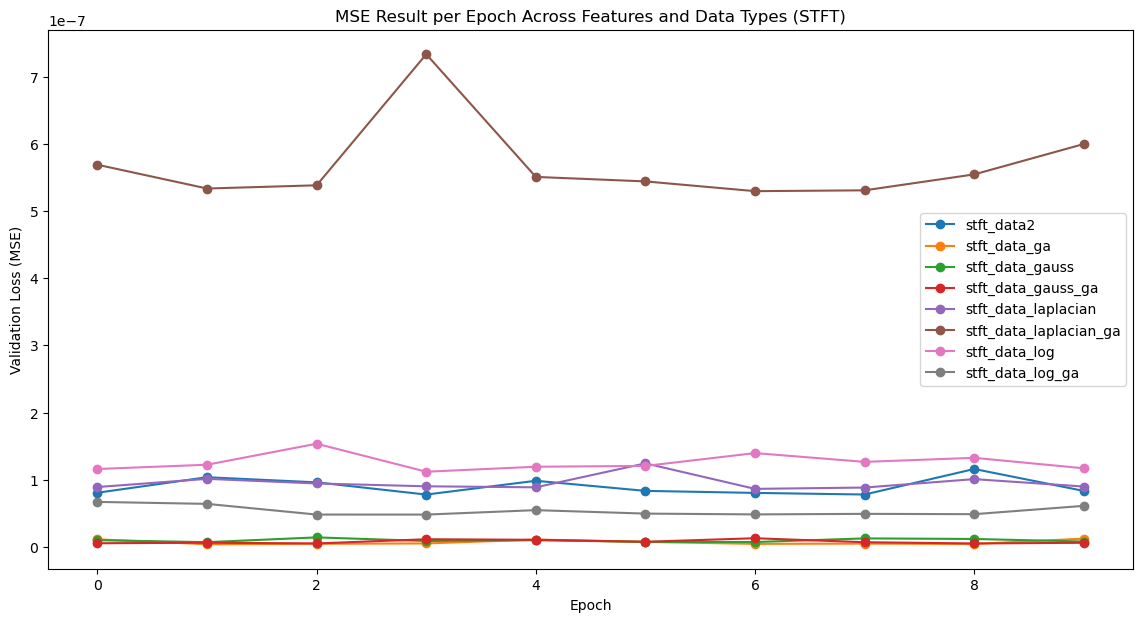

MSE Result : 7.798251289159452e-08, feature : stft_data2
MSE Result : 4.104854678388392e-09, feature : stft_data_ga
MSE Result : 7.164654203251075e-09, feature : stft_data_gauss
MSE Result : 5.223238730422963e-09, feature : stft_data_gauss_ga
MSE Result : 8.647066351841204e-08, feature : stft_data_laplacian
MSE Result : 5.294502329888928e-07, feature : stft_data_laplacian_ga
MSE Result : 1.1198789451327684e-07, feature : stft_data_log
MSE Result : 4.820404697625236e-08, feature : stft_data_log_ga


In [ ]:
#STFT

def process_features(data, feature_type):
    if feature_type == 'stft':
        return librosa.istft(data)
    elif feature_type in ['mfcc', 'chroma']:
        return data
    else:
        raise ValueError("Unsupported feature type")

def create_sequences(data, seq_length):
    X, Y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        Y.append(data[i + seq_length])
    return np.array(X), np.array(Y)

feature_types = ['stft']
data_names = ['data2', 'data_ga', 'data_gauss', 'data_gauss_ga', 'data_laplacian',
              'data_laplacian_ga', 'data_log', 'data_log_ga']

mse_results = {}
losses_over_epochs = {}

for feature_type in feature_types:
    hdf5_file_path = f'cat_{feature_type}_features7.h5'
    with h5py.File(hdf5_file_path, 'r+') as hdf5_file:
        for data_name in tqdm(data_names, desc=f"Processing {feature_type}"):
            data = hdf5_file[data_name][:]
            t, y = process_features(data, feature_type), np.roll(data, -1)
            t, y = t[:-1], y[:-1]

            train_size = int(0.8 * len(t))
            train_data, test_data = t[:train_size], t[train_size:]
            train_labels, test_labels = y[:train_size], y[train_size:]

            X_train, y_train = create_sequences(train_data, 2)
            X_test, y_test = create_sequences(test_data, 2)

            X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
            X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

            model = Sequential([
                Conv1D(8, 1, activation='relu', input_shape=(2, 1)),
                MaxPooling1D(2),
                Flatten(),
                Dense(50, activation='relu'),
                Dense(1)
            ])
            model.compile(optimizer='adam', loss='mse')
            history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test), verbose=2)

            mse_results[f'{feature_type}_{data_name}'] = history.history['val_loss']
            print(f'Validation loss for {feature_type} {data_name}:', np.min(history.history['val_loss']))

plt.figure(figsize=(14, 7))
for key, losses in mse_results.items():
    plt.plot(losses, label=key, marker='o', linestyle='-')
plt.ylabel('Validation Loss (MSE)')
plt.xlabel('Epoch')
plt.title('MSE Result per Epoch Across Features and Data Types (STFT)')
plt.legend()
plt.show()

for key, losses in mse_results.items():
    los = np.min(losses)
    print(f'MSE Result : {los}, feature : {key}')

Processing chroma:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/10
1/1 - 0s - 485ms/step - loss: 4.1758 - val_loss: 24208.5449
Epoch 2/10
1/1 - 0s - 125ms/step - loss: 24219.8301 - val_loss: 1655.9658
Epoch 3/10
1/1 - 0s - 128ms/step - loss: 1656.4626 - val_loss: 0.9086
Epoch 4/10
1/1 - 0s - 132ms/step - loss: 0.9018 - val_loss: 0.9044
Epoch 5/10
1/1 - 0s - 129ms/step - loss: 0.8976 - val_loss: 0.9006
Epoch 6/10
1/1 - 0s - 124ms/step - loss: 0.8939 - val_loss: 0.8972
Epoch 7/10
1/1 - 0s - 126ms/step - loss: 0.8904 - val_loss: 0.8939
Epoch 8/10
1/1 - 0s - 134ms/step - loss: 0.8872 - val_loss: 0.8908
Epoch 9/10
1/1 - 0s - 129ms/step - loss: 0.8841 - val_loss: 0.8879
Epoch 10/10
1/1 - 0s - 126ms/step - loss: 0.8812 - val_loss: 0.8851


Processing chroma:  12%|█▎        | 1/8 [00:01<00:13,  1.88s/it]

MSE Result for chroma data2: 0.8850829005241394
Epoch 1/10
1/1 - 0s - 405ms/step - loss: 0.5142 - val_loss: 31430.0176
Epoch 2/10
1/1 - 0s - 65ms/step - loss: 31419.4160 - val_loss: 637.7971
Epoch 3/10
1/1 - 0s - 75ms/step - loss: 640.2172 - val_loss: 0.9295
Epoch 4/10
1/1 - 0s - 68ms/step - loss: 0.9226 - val_loss: 0.9336
Epoch 5/10
1/1 - 0s - 69ms/step - loss: 0.9267 - val_loss: 0.9369
Epoch 6/10
1/1 - 0s - 71ms/step - loss: 0.9300 - val_loss: 0.9397
Epoch 7/10
1/1 - 0s - 72ms/step - loss: 0.9327 - val_loss: 0.9421
Epoch 8/10
1/1 - 0s - 71ms/step - loss: 0.9351 - val_loss: 0.9440
Epoch 9/10
1/1 - 0s - 71ms/step - loss: 0.9370 - val_loss: 0.9457
Epoch 10/10
1/1 - 0s - 79ms/step - loss: 0.9387 - val_loss: 0.9470


Processing chroma:  25%|██▌       | 2/8 [00:03<00:08,  1.44s/it]

MSE Result for chroma data_ga: 0.929508626461029
Epoch 1/10
1/1 - 0s - 455ms/step - loss: 2.3610e-04 - val_loss: 45.4689
Epoch 2/10
1/1 - 0s - 137ms/step - loss: 38.8556 - val_loss: 0.6863
Epoch 3/10
1/1 - 0s - 131ms/step - loss: 1.1522 - val_loss: 1.5792
Epoch 4/10
1/1 - 0s - 129ms/step - loss: 1.9668 - val_loss: 2.8321
Epoch 5/10
1/1 - 0s - 128ms/step - loss: 5.5039 - val_loss: 1.2686
Epoch 6/10
1/1 - 0s - 129ms/step - loss: 3.4867 - val_loss: 0.6908
Epoch 7/10
1/1 - 0s - 129ms/step - loss: 1.4202 - val_loss: 1.8182
Epoch 8/10
1/1 - 0s - 131ms/step - loss: 1.6342 - val_loss: 2.7574
Epoch 9/10
1/1 - 0s - 128ms/step - loss: 2.3553 - val_loss: 2.0609
Epoch 10/10
1/1 - 0s - 127ms/step - loss: 1.6219 - val_loss: 1.0363


Processing chroma:  38%|███▊      | 3/8 [00:04<00:07,  1.58s/it]

MSE Result for chroma data_gauss: 0.6863120794296265
Epoch 1/10
1/1 - 0s - 388ms/step - loss: 1.7599e-04 - val_loss: 1.0131e-04
Epoch 2/10
1/1 - 0s - 66ms/step - loss: 1.0142e-04 - val_loss: 8.9435e-05
Epoch 3/10
1/1 - 0s - 70ms/step - loss: 9.0080e-05 - val_loss: 9.0701e-05
Epoch 4/10
1/1 - 0s - 71ms/step - loss: 9.1786e-05 - val_loss: 9.7475e-05
Epoch 5/10
1/1 - 0s - 70ms/step - loss: 9.8864e-05 - val_loss: 1.0254e-04
Epoch 6/10
1/1 - 0s - 74ms/step - loss: 1.0408e-04 - val_loss: 1.0297e-04
Epoch 7/10
1/1 - 0s - 73ms/step - loss: 1.0452e-04 - val_loss: 9.9646e-05
Epoch 8/10
1/1 - 0s - 80ms/step - loss: 1.0110e-04 - val_loss: 9.4890e-05
Epoch 9/10
1/1 - 0s - 76ms/step - loss: 9.6186e-05 - val_loss: 9.0863e-05
Epoch 10/10
1/1 - 0s - 74ms/step - loss: 9.1959e-05 - val_loss: 8.8871e-05


Processing chroma:  50%|█████     | 4/8 [00:05<00:05,  1.40s/it]

MSE Result for chroma data_gauss_ga: 8.88709764694795e-05
Epoch 1/10
1/1 - 0s - 484ms/step - loss: 0.1449 - val_loss: 514.3158
Epoch 2/10
1/1 - 0s - 130ms/step - loss: 496.8570 - val_loss: 61.8079
Epoch 3/10
1/1 - 0s - 124ms/step - loss: 42.6283 - val_loss: 4.3991
Epoch 4/10
1/1 - 0s - 127ms/step - loss: 48.6496 - val_loss: 72.8947
Epoch 5/10
1/1 - 0s - 128ms/step - loss: 77.8130 - val_loss: 48.2714
Epoch 6/10
1/1 - 0s - 131ms/step - loss: 38.5923 - val_loss: 35.6742
Epoch 7/10
1/1 - 0s - 127ms/step - loss: 16.0805 - val_loss: 46.7223
Epoch 8/10
1/1 - 0s - 126ms/step - loss: 16.1166 - val_loss: 38.2981
Epoch 9/10
1/1 - 0s - 133ms/step - loss: 10.3804 - val_loss: 19.0953
Epoch 10/10
1/1 - 0s - 127ms/step - loss: 5.2983 - val_loss: 14.5104


Processing chroma:  62%|██████▎   | 5/8 [00:07<00:04,  1.53s/it]

MSE Result for chroma data_laplacian: 4.399107456207275
Epoch 1/10
1/1 - 0s - 421ms/step - loss: 0.0293 - val_loss: 707.9661
Epoch 2/10
1/1 - 0s - 71ms/step - loss: 843.2700 - val_loss: 548.5997
Epoch 3/10
1/1 - 0s - 73ms/step - loss: 552.5396 - val_loss: 844.5464
Epoch 4/10
1/1 - 0s - 73ms/step - loss: 856.0119 - val_loss: 800.0736
Epoch 5/10
1/1 - 0s - 72ms/step - loss: 809.8923 - val_loss: 612.9442
Epoch 6/10
1/1 - 0s - 70ms/step - loss: 619.2638 - val_loss: 395.2152
Epoch 7/10
1/1 - 0s - 73ms/step - loss: 398.2870 - val_loss: 212.0393
Epoch 8/10
1/1 - 0s - 70ms/step - loss: 212.9689 - val_loss: 87.5365
Epoch 9/10
1/1 - 0s - 68ms/step - loss: 87.4732 - val_loss: 21.4191
Epoch 10/10
1/1 - 0s - 71ms/step - loss: 21.1783 - val_loss: 0.2867


Processing chroma:  75%|███████▌  | 6/8 [00:08<00:02,  1.40s/it]

MSE Result for chroma data_laplacian_ga: 0.2866690158843994
Epoch 1/10
1/1 - 0s - 457ms/step - loss: 0.2287 - val_loss: 740667.3125
Epoch 2/10
1/1 - 0s - 133ms/step - loss: 742275.0000 - val_loss: 133657.1406
Epoch 3/10
1/1 - 0s - 128ms/step - loss: 136904.7656 - val_loss: 37439.8516
Epoch 4/10
1/1 - 0s - 129ms/step - loss: 39111.1680 - val_loss: 11986.0029
Epoch 5/10
1/1 - 0s - 132ms/step - loss: 13020.8438 - val_loss: 1498.1610
Epoch 6/10
1/1 - 0s - 126ms/step - loss: 1900.3138 - val_loss: 1.2172
Epoch 7/10
1/1 - 0s - 130ms/step - loss: 1.2101 - val_loss: 1.2200
Epoch 8/10
1/1 - 0s - 128ms/step - loss: 1.2129 - val_loss: 1.2222
Epoch 9/10
1/1 - 0s - 134ms/step - loss: 1.2151 - val_loss: 1.2241
Epoch 10/10
1/1 - 0s - 137ms/step - loss: 1.2168 - val_loss: 1.2255


Processing chroma:  88%|████████▊ | 7/8 [00:10<00:01,  1.51s/it]

MSE Result for chroma data_log: 1.2171785831451416
Epoch 1/10
1/1 - 0s - 457ms/step - loss: 1.2490 - val_loss: 62282.3750
Epoch 2/10
1/1 - 0s - 72ms/step - loss: 61926.2773 - val_loss: 3674.5955
Epoch 3/10
1/1 - 0s - 81ms/step - loss: 3560.6897 - val_loss: 1.2090
Epoch 4/10
1/1 - 0s - 81ms/step - loss: 1.2022 - val_loss: 1.2122
Epoch 5/10
1/1 - 0s - 79ms/step - loss: 1.2053 - val_loss: 1.2149
Epoch 6/10
1/1 - 0s - 69ms/step - loss: 1.2080 - val_loss: 1.2173
Epoch 7/10
1/1 - 0s - 70ms/step - loss: 1.2103 - val_loss: 1.2193
Epoch 8/10
1/1 - 0s - 71ms/step - loss: 1.2124 - val_loss: 1.2212
Epoch 9/10
1/1 - 0s - 71ms/step - loss: 1.2142 - val_loss: 1.2228
Epoch 10/10
1/1 - 0s - 71ms/step - loss: 1.2157 - val_loss: 1.2241


Processing chroma: 100%|██████████| 8/8 [00:11<00:00,  1.47s/it]


MSE Result for chroma data_log_ga: 1.209036111831665


Processing mfcc:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/10
2/2 - 39s - 20s/step - loss: 681979.3750 - val_loss: 1763913.1250
Epoch 2/10
2/2 - 28s - 14s/step - loss: 2323163904.0000 - val_loss: 3348396.5000
Epoch 3/10
2/2 - 24s - 12s/step - loss: 55945756.0000 - val_loss: 9814528.0000
Epoch 4/10
2/2 - 24s - 12s/step - loss: 3928137984.0000 - val_loss: 2002937.2500
Epoch 5/10
2/2 - 23s - 12s/step - loss: 466679424.0000 - val_loss: 7412322.5000
Epoch 6/10
2/2 - 23s - 11s/step - loss: 1390129536.0000 - val_loss: 13320238.0000
Epoch 7/10
2/2 - 22s - 11s/step - loss: 1529567104.0000 - val_loss: 12330267.0000
Epoch 8/10
2/2 - 23s - 11s/step - loss: 1228569856.0000 - val_loss: 10410423.0000
Epoch 9/10
2/2 - 22s - 11s/step - loss: 750670656.0000 - val_loss: 7441329.5000
Epoch 10/10
2/2 - 19s - 9s/step - loss: 497736992.0000 - val_loss: 7357371.5000


Processing mfcc:  12%|█▎        | 1/8 [04:25<30:59, 265.69s/it]

MSE Result for mfcc data2: 1763913.125
Epoch 1/10
2/2 - 9s - 5s/step - loss: 14483.4844 - val_loss: 11897.0439
Epoch 2/10
2/2 - 3s - 1s/step - loss: 588609600.0000 - val_loss: 12248.9551
Epoch 3/10
2/2 - 1s - 420ms/step - loss: 194053968.0000 - val_loss: 3510.1812
Epoch 4/10
2/2 - 1s - 379ms/step - loss: 14639716.0000 - val_loss: 10.8626
Epoch 5/10
2/2 - 1s - 397ms/step - loss: 10.9995 - val_loss: 10.8470
Epoch 6/10
2/2 - 1s - 349ms/step - loss: 10.9844 - val_loss: 10.8330
Epoch 7/10
2/2 - 1s - 394ms/step - loss: 10.9702 - val_loss: 10.8201
Epoch 8/10
2/2 - 1s - 411ms/step - loss: 10.9575 - val_loss: 10.8077
Epoch 9/10
2/2 - 2s - 900ms/step - loss: 10.9452 - val_loss: 10.7958
Epoch 10/10
2/2 - 2s - 819ms/step - loss: 10.9328 - val_loss: 10.7844


Processing mfcc:  25%|██▌       | 2/8 [04:46<12:10, 121.67s/it]

MSE Result for mfcc data_ga: 10.784439086914062
Epoch 1/10
2/2 - 39s - 19s/step - loss: 861.0757 - val_loss: 1608.0132
Epoch 2/10
2/2 - 23s - 12s/step - loss: 1248.3252 - val_loss: 614.4227
Epoch 3/10
2/2 - 23s - 12s/step - loss: 868.1653 - val_loss: 834.0137
Epoch 4/10
2/2 - 23s - 11s/step - loss: 762.3032 - val_loss: 209.0654
Epoch 5/10
2/2 - 17s - 9s/step - loss: 269.1151 - val_loss: 513.6751
Epoch 6/10
2/2 - 17s - 9s/step - loss: 656.9857 - val_loss: 391.3324
Epoch 7/10
2/2 - 19s - 10s/step - loss: 406.1466 - val_loss: 257.5764
Epoch 8/10
2/2 - 19s - 10s/step - loss: 279.9361 - val_loss: 239.1687
Epoch 9/10
2/2 - 18s - 9s/step - loss: 246.6778 - val_loss: 148.0285
Epoch 10/10
2/2 - 21s - 10s/step - loss: 178.6430 - val_loss: 186.5446


Processing mfcc:  38%|███▊      | 3/8 [08:41<14:26, 173.33s/it]

MSE Result for mfcc data_gauss: 148.0284881591797
Epoch 1/10
2/2 - 6s - 3s/step - loss: 35.4092 - val_loss: 124.8161
Epoch 2/10
2/2 - 2s - 1s/step - loss: 102.1742 - val_loss: 23.4402
Epoch 3/10
2/2 - 1s - 420ms/step - loss: 13.5357 - val_loss: 0.0473
Epoch 4/10
2/2 - 1s - 391ms/step - loss: 0.0519 - val_loss: 0.0327
Epoch 5/10
2/2 - 1s - 381ms/step - loss: 0.0335 - val_loss: 0.0318
Epoch 6/10
2/2 - 1s - 391ms/step - loss: 0.0326 - val_loss: 0.0309
Epoch 7/10
2/2 - 1s - 425ms/step - loss: 0.0317 - val_loss: 0.0302
Epoch 8/10
2/2 - 2s - 863ms/step - loss: 0.0310 - val_loss: 0.0296
Epoch 9/10
2/2 - 2s - 1s/step - loss: 0.0304 - val_loss: 0.0290
Epoch 10/10
2/2 - 2s - 1s/step - loss: 0.0299 - val_loss: 0.0285


Processing mfcc:  50%|█████     | 4/8 [09:01<07:30, 112.66s/it]

MSE Result for mfcc data_gauss_ga: 0.0284876748919487
Epoch 1/10
2/2 - 37s - 19s/step - loss: 303753760.0000 - val_loss: 302628288.0000
Epoch 2/10
2/2 - 27s - 13s/step - loss: 608332416.0000 - val_loss: 532169536.0000
Epoch 3/10
2/2 - 26s - 13s/step - loss: 1356147840.0000 - val_loss: 121751032.0000
Epoch 4/10
2/2 - 25s - 12s/step - loss: 821459712.0000 - val_loss: 628164352.0000
Epoch 5/10
2/2 - 29s - 14s/step - loss: 999484160.0000 - val_loss: 658417344.0000
Epoch 6/10
2/2 - 16s - 8s/step - loss: 459577472.0000 - val_loss: 293086048.0000
Epoch 7/10
2/2 - 21s - 11s/step - loss: 1621874816.0000 - val_loss: 250144928.0000
Epoch 8/10
2/2 - 21s - 11s/step - loss: 481854560.0000 - val_loss: 1419008512.0000
Epoch 9/10
2/2 - 22s - 11s/step - loss: 1531120384.0000 - val_loss: 645065984.0000
Epoch 10/10
2/2 - 22s - 11s/step - loss: 646582656.0000 - val_loss: 225696720.0000
MSE Result for mfcc data_laplacian: 121751032.0


Processing mfcc:  62%|██████▎   | 5/8 [13:19<08:15, 165.22s/it]

Epoch 1/10
2/2 - 6s - 3s/step - loss: 745756.6250 - val_loss: 18794494.0000
Epoch 2/10
2/2 - 4s - 2s/step - loss: 483124000.0000 - val_loss: 11348359.0000
Epoch 3/10
2/2 - 2s - 774ms/step - loss: 34723180.0000 - val_loss: 38210032.0000
Epoch 4/10
2/2 - 2s - 763ms/step - loss: 80421128.0000 - val_loss: 41697880.0000
Epoch 5/10
2/2 - 1s - 435ms/step - loss: 80801608.0000 - val_loss: 19787718.0000
Epoch 6/10
2/2 - 2s - 854ms/step - loss: 22890270.0000 - val_loss: 6117539.5000
Epoch 7/10
2/2 - 2s - 889ms/step - loss: 3503272.0000 - val_loss: 2656741.2500
Epoch 8/10
2/2 - 2s - 842ms/step - loss: 5035904.0000 - val_loss: 7574846.5000
Epoch 9/10
2/2 - 1s - 446ms/step - loss: 16054955.0000 - val_loss: 11363046.0000
Epoch 10/10
2/2 - 1s - 488ms/step - loss: 21392466.0000 - val_loss: 7819619.5000


Processing mfcc:  75%|███████▌  | 6/8 [13:41<03:53, 116.71s/it]

MSE Result for mfcc data_laplacian_ga: 2656741.25
Epoch 1/10
2/2 - 31s - 16s/step - loss: 3307023104.0000 - val_loss: 111637848.0000
Epoch 2/10
2/2 - 19s - 9s/step - loss: 35466145792.0000 - val_loss: 1271473280.0000
Epoch 3/10
2/2 - 22s - 11s/step - loss: 3022047488.0000 - val_loss: 197561808.0000
Epoch 4/10
2/2 - 23s - 11s/step - loss: 1671965696.0000 - val_loss: 942366656.0000
Epoch 5/10
2/2 - 22s - 11s/step - loss: 1297532032.0000 - val_loss: 2253896960.0000
Epoch 6/10
2/2 - 20s - 10s/step - loss: 4362306560.0000 - val_loss: 2831201280.0000
Epoch 7/10
2/2 - 22s - 11s/step - loss: 6163750400.0000 - val_loss: 1592085888.0000
Epoch 8/10
2/2 - 16s - 8s/step - loss: 2409745664.0000 - val_loss: 1115290624.0000
Epoch 9/10
2/2 - 19s - 9s/step - loss: 1075358720.0000 - val_loss: 882528896.0000
Epoch 10/10
2/2 - 16s - 8s/step - loss: 1434880128.0000 - val_loss: 309907328.0000


Processing mfcc:  88%|████████▊ | 7/8 [17:24<02:31, 151.44s/it]

MSE Result for mfcc data_log: 111637848.0
Epoch 1/10
2/2 - 7s - 4s/step - loss: 656110976.0000 - val_loss: 41802876.0000
Epoch 2/10
2/2 - 3s - 1s/step - loss: 171730.6719 - val_loss: 87.8718
Epoch 3/10
2/2 - 2s - 996ms/step - loss: 88.8831 - val_loss: 87.9045
Epoch 4/10
2/2 - 1s - 497ms/step - loss: 88.9135 - val_loss: 87.9255
Epoch 5/10
2/2 - 1s - 370ms/step - loss: 88.9321 - val_loss: 87.9385
Epoch 6/10
2/2 - 1s - 351ms/step - loss: 88.9437 - val_loss: 87.9458
Epoch 7/10
2/2 - 1s - 394ms/step - loss: 88.9501 - val_loss: 87.9487
Epoch 8/10
2/2 - 1s - 372ms/step - loss: 88.9521 - val_loss: 87.9481
Epoch 9/10
2/2 - 1s - 404ms/step - loss: 88.9508 - val_loss: 87.9447
Epoch 10/10
2/2 - 1s - 706ms/step - loss: 88.9467 - val_loss: 87.9389


Processing mfcc: 100%|██████████| 8/8 [17:44<00:00, 133.01s/it]

MSE Result for mfcc data_log_ga: 87.87178802490234


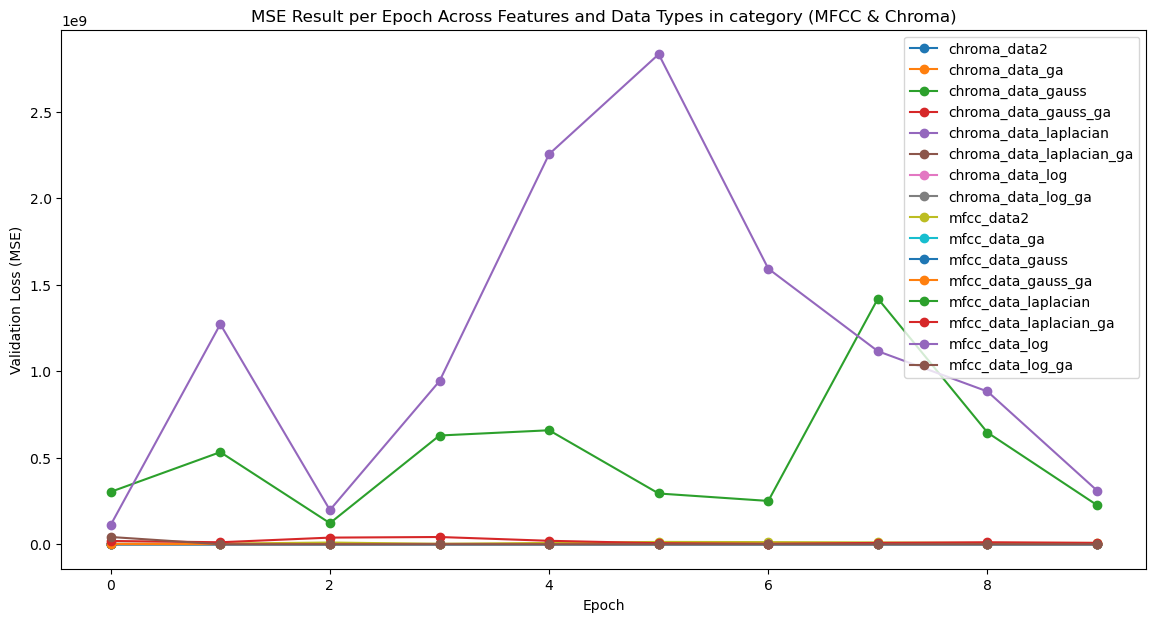

MSE Result : 0.8850829005241394, feature : chroma_data2
MSE Result : 0.929508626461029, feature : chroma_data_ga
MSE Result : 0.6863120794296265, feature : chroma_data_gauss
MSE Result : 8.88709764694795e-05, feature : chroma_data_gauss_ga
MSE Result : 4.399107456207275, feature : chroma_data_laplacian
MSE Result : 0.2866690158843994, feature : chroma_data_laplacian_ga
MSE Result : 1.2171785831451416, feature : chroma_data_log
MSE Result : 1.209036111831665, feature : chroma_data_log_ga
MSE Result : 1763913.125, feature : mfcc_data2
MSE Result : 10.784439086914062, feature : mfcc_data_ga
MSE Result : 148.0284881591797, feature : mfcc_data_gauss
MSE Result : 0.0284876748919487, feature : mfcc_data_gauss_ga
MSE Result : 121751032.0, feature : mfcc_data_laplacian
MSE Result : 2656741.25, feature : mfcc_data_laplacian_ga
MSE Result : 111637848.0, feature : mfcc_data_log
MSE Result : 87.87178802490234, feature : mfcc_data_log_ga


In [ ]:
#MFCC-CHROMA

def process_features(data, feature_type):
    if feature_type == 'stft':
        return librosa.istft(data)
    elif feature_type in ['mfcc', 'chroma']:
        if data.ndim == 2:
            return data.reshape(data.shape[0], data.shape[1], 1)
        else:
            return data
    else:
        raise ValueError("Unsupported feature type")

def create_sequences(data, seq_length):
    X, Y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        Y.append(data[i + seq_length])
    return np.array(X), np.array(Y)

feature_types = ['chroma', 'mfcc']
data_names = ['data2', 'data_ga', 'data_gauss', 'data_gauss_ga', 'data_laplacian',
              'data_laplacian_ga', 'data_log', 'data_log_ga']

mse_results = {}
losses_over_epochs = {}

for feature_type in feature_types:
    hdf5_file_path = f'cat_{feature_type}_features7.h5'
    with h5py.File(hdf5_file_path, 'r+') as hdf5_file:
        for data_name in tqdm(data_names, desc=f"Processing {feature_type}"):
            data = hdf5_file[data_name][:]

            if data.ndim == 2 and data.shape[0] > 0:
                data = np.expand_dims(data, axis=-1)

                t, y = process_features(data, feature_type), np.roll(data, -1, axis=0)
                t, y = t[:-1], y[:-1]

                if len(t) > 10:
                    X_train, y_train = create_sequences(t, 2)
                    X_test, y_test = create_sequences(y, 2)

                    if X_train.size > 0 and X_test.size > 0:
                        model = Sequential([
                            Conv1D(8, 1, activation='relu', input_shape=(2, data.shape[1])),
                            MaxPooling1D(2),
                            Flatten(),
                            Dense(50, activation='relu'),
                            Dense(1)
                        ])
                        model.compile(optimizer='adam', loss='mse')
                        history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test), verbose=2)

            mse_results[f'{feature_type}_{data_name}'] = history.history['val_loss']
            print(f'MSE Result for {feature_type} {data_name}:', np.min(history.history['val_loss']))

plt.figure(figsize=(14, 7))
for key, losses in mse_results.items():
    plt.plot(losses, label=key, marker='o', linestyle='-')
plt.ylabel('Validation Loss (MSE)')
plt.xlabel('Epoch')
plt.title('MSE Result per Epoch Across Features and Data Types in category (MFCC & Chroma)')
plt.legend()
plt.show()


for key, losses in mse_results.items():
    los = np.min(losses)
    print(f'MSE Result : {los}, feature : {key}')

**CATEGORY 2**

Processing stft:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/10
503643/503643 - 174s - 346us/step - loss: 5.9147e-08 - val_loss: 7.0808e-08
Epoch 2/10
503643/503643 - 167s - 331us/step - loss: 5.6130e-08 - val_loss: 6.7827e-08
Epoch 3/10
503643/503643 - 167s - 331us/step - loss: 5.5482e-08 - val_loss: 6.7437e-08
Epoch 4/10
503643/503643 - 166s - 330us/step - loss: 5.4732e-08 - val_loss: 6.4304e-08
Epoch 5/10
503643/503643 - 166s - 330us/step - loss: 5.4720e-08 - val_loss: 6.3374e-08
Epoch 6/10
503643/503643 - 166s - 330us/step - loss: 5.4663e-08 - val_loss: 7.4433e-08
Epoch 7/10
503643/503643 - 166s - 330us/step - loss: 5.4657e-08 - val_loss: 8.1697e-08
Epoch 8/10
503643/503643 - 167s - 331us/step - loss: 5.4666e-08 - val_loss: 7.2766e-08
Epoch 9/10
503643/503643 - 166s - 330us/step - loss: 5.4671e-08 - val_loss: 6.4125e-08
Epoch 10/10
503643/503643 - 166s - 330us/step - loss: 5.4686e-08 - val_loss: 6.6057e-08


Processing stft:  12%|█▎        | 1/8 [28:13<3:17:36, 1693.83s/it]

Validation loss for stft data2: 6.33740171451791e-08
Epoch 1/10
251104/251104 - 81s - 321us/step - loss: 5.9567e-09 - val_loss: 2.9787e-09
Epoch 2/10
251104/251104 - 81s - 321us/step - loss: 4.2343e-09 - val_loss: 3.0523e-09
Epoch 3/10
251104/251104 - 84s - 333us/step - loss: 4.0600e-09 - val_loss: 3.1941e-09
Epoch 4/10
251104/251104 - 84s - 335us/step - loss: 3.9573e-09 - val_loss: 4.2994e-09
Epoch 5/10
251104/251104 - 84s - 335us/step - loss: 3.9185e-09 - val_loss: 3.6903e-09
Epoch 6/10
251104/251104 - 81s - 324us/step - loss: 3.8654e-09 - val_loss: 3.9857e-09
Epoch 7/10
251104/251104 - 83s - 330us/step - loss: 3.8471e-09 - val_loss: 3.0492e-09
Epoch 8/10
251104/251104 - 82s - 327us/step - loss: 3.8334e-09 - val_loss: 6.7907e-09
Epoch 9/10
251104/251104 - 83s - 332us/step - loss: 3.8058e-09 - val_loss: 1.5742e-08
Epoch 10/10
251104/251104 - 84s - 336us/step - loss: 3.7908e-09 - val_loss: 3.3660e-09


Processing stft:  25%|██▌       | 2/8 [42:10<1:58:56, 1189.43s/it]

Validation loss for stft data_ga: 2.9786908495310627e-09
Epoch 1/10
503643/503643 - 173s - 343us/step - loss: 5.3482e-09 - val_loss: 7.6825e-09
Epoch 2/10
503643/503643 - 172s - 341us/step - loss: 5.2903e-09 - val_loss: 7.8044e-09
Epoch 3/10
503643/503643 - 167s - 331us/step - loss: 5.2833e-09 - val_loss: 6.4666e-09
Epoch 4/10
503643/503643 - 167s - 332us/step - loss: 5.2951e-09 - val_loss: 9.3845e-09
Epoch 5/10
503643/503643 - 167s - 332us/step - loss: 5.2826e-09 - val_loss: 7.3059e-09
Epoch 6/10
503643/503643 - 167s - 331us/step - loss: 5.2857e-09 - val_loss: 6.1495e-09
Epoch 7/10
503643/503643 - 167s - 331us/step - loss: 5.2968e-09 - val_loss: 6.5663e-09
Epoch 8/10
503643/503643 - 167s - 331us/step - loss: 5.2888e-09 - val_loss: 1.3728e-08
Epoch 9/10
503643/503643 - 167s - 331us/step - loss: 5.2918e-09 - val_loss: 7.5075e-09
Epoch 10/10
503643/503643 - 167s - 331us/step - loss: 5.2879e-09 - val_loss: 9.5556e-09


Processing stft:  38%|███▊      | 3/8 [1:10:31<1:58:36, 1423.39s/it]

Validation loss for stft data_gauss: 6.149514231168496e-09
Epoch 1/10
251294/251294 - 85s - 340us/step - loss: 4.1745e-09 - val_loss: 4.6504e-09
Epoch 2/10
251294/251294 - 85s - 340us/step - loss: 4.1098e-09 - val_loss: 1.6586e-08
Epoch 3/10
251294/251294 - 85s - 340us/step - loss: 4.1066e-09 - val_loss: 4.9074e-09
Epoch 4/10
251294/251294 - 85s - 340us/step - loss: 4.0968e-09 - val_loss: 4.3463e-09
Epoch 5/10
251294/251294 - 85s - 340us/step - loss: 4.0992e-09 - val_loss: 4.5079e-09
Epoch 6/10
251294/251294 - 85s - 340us/step - loss: 4.1011e-09 - val_loss: 4.3351e-09
Epoch 7/10
251294/251294 - 85s - 340us/step - loss: 4.1061e-09 - val_loss: 5.2358e-09
Epoch 8/10
251294/251294 - 85s - 339us/step - loss: 4.1034e-09 - val_loss: 4.4383e-09
Epoch 9/10
251294/251294 - 85s - 340us/step - loss: 4.1076e-09 - val_loss: 4.3914e-09
Epoch 10/10
251294/251294 - 85s - 340us/step - loss: 4.1048e-09 - val_loss: 6.1723e-09


Processing stft:  50%|█████     | 4/8 [1:24:55<1:20:09, 1202.34s/it]

Validation loss for stft data_gauss_ga: 4.335059422544418e-09
Epoch 1/10
503643/503643 - 169s - 336us/step - loss: 5.5658e-08 - val_loss: 7.7154e-08
Epoch 2/10
503643/503643 - 166s - 329us/step - loss: 5.2573e-08 - val_loss: 7.9333e-08
Epoch 3/10
503643/503643 - 166s - 329us/step - loss: 5.1493e-08 - val_loss: 7.3478e-08
Epoch 4/10
503643/503643 - 166s - 329us/step - loss: 5.1444e-08 - val_loss: 7.8841e-08
Epoch 5/10
503643/503643 - 166s - 329us/step - loss: 5.1423e-08 - val_loss: 7.6130e-08
Epoch 6/10
503643/503643 - 166s - 329us/step - loss: 5.1486e-08 - val_loss: 6.8337e-08
Epoch 7/10
503643/503643 - 166s - 329us/step - loss: 5.1381e-08 - val_loss: 9.3157e-08
Epoch 8/10
503643/503643 - 166s - 329us/step - loss: 5.1497e-08 - val_loss: 7.8452e-08
Epoch 9/10
503643/503643 - 166s - 329us/step - loss: 5.1437e-08 - val_loss: 6.8678e-08
Epoch 10/10
503643/503643 - 165s - 329us/step - loss: 5.1428e-08 - val_loss: 6.8352e-08


Processing stft:  62%|██████▎   | 5/8 [1:52:58<1:08:46, 1375.64s/it]

Validation loss for stft data_laplacian: 6.833663235283893e-08
Epoch 1/10
251820/251820 - 85s - 337us/step - loss: 2.5937e-08 - val_loss: 2.9516e-08
Epoch 2/10
251820/251820 - 85s - 337us/step - loss: 2.2979e-08 - val_loss: 4.2267e-08
Epoch 3/10
251820/251820 - 85s - 339us/step - loss: 2.2562e-08 - val_loss: 2.7862e-08
Epoch 4/10
251820/251820 - 85s - 336us/step - loss: 2.2509e-08 - val_loss: 2.8540e-08
Epoch 5/10
251820/251820 - 85s - 337us/step - loss: 2.2451e-08 - val_loss: 4.4945e-08
Epoch 6/10
251820/251820 - 85s - 337us/step - loss: 2.2425e-08 - val_loss: 2.9755e-08
Epoch 7/10
251820/251820 - 85s - 337us/step - loss: 2.2422e-08 - val_loss: 2.7882e-08
Epoch 8/10
251820/251820 - 86s - 341us/step - loss: 2.2438e-08 - val_loss: 2.7538e-08
Epoch 9/10
251820/251820 - 84s - 333us/step - loss: 2.2355e-08 - val_loss: 2.8768e-08
Epoch 10/10
251820/251820 - 85s - 337us/step - loss: 2.2423e-08 - val_loss: 2.7537e-08


Processing stft:  75%|███████▌  | 6/8 [2:07:16<39:59, 1199.63s/it]  

Validation loss for stft data_laplacian_ga: 2.75367959545747e-08
Epoch 1/10
503643/503643 - 172s - 341us/step - loss: 6.2668e-08 - val_loss: 1.5437e-07
Epoch 2/10
503643/503643 - 172s - 342us/step - loss: 5.9111e-08 - val_loss: 8.6966e-08
Epoch 3/10
503643/503643 - 173s - 343us/step - loss: 5.8840e-08 - val_loss: 8.0364e-08
Epoch 4/10
503643/503643 - 168s - 333us/step - loss: 5.8696e-08 - val_loss: 8.0189e-08
Epoch 5/10
503643/503643 - 168s - 334us/step - loss: 5.8489e-08 - val_loss: 8.7617e-08
Epoch 6/10
503643/503643 - 166s - 330us/step - loss: 5.8272e-08 - val_loss: 8.2849e-08
Epoch 7/10
503643/503643 - 166s - 330us/step - loss: 5.8290e-08 - val_loss: 8.0058e-08
Epoch 8/10
503643/503643 - 167s - 332us/step - loss: 5.8188e-08 - val_loss: 8.4656e-08
Epoch 9/10
503643/503643 - 168s - 333us/step - loss: 5.8214e-08 - val_loss: 9.1012e-08
Epoch 10/10
503643/503643 - 170s - 337us/step - loss: 5.8076e-08 - val_loss: 8.6163e-08


Processing stft:  88%|████████▊ | 7/8 [2:35:46<22:46, 1366.69s/it]

Validation loss for stft data_log: 8.005847718095538e-08
Epoch 1/10
251269/251269 - 85s - 340us/step - loss: 3.6617e-08 - val_loss: 4.0100e-08
Epoch 2/10
251269/251269 - 85s - 340us/step - loss: 3.2061e-08 - val_loss: 4.1121e-08
Epoch 3/10
251269/251269 - 85s - 340us/step - loss: 3.1593e-08 - val_loss: 4.0946e-08
Epoch 4/10
251269/251269 - 85s - 340us/step - loss: 3.1163e-08 - val_loss: 5.6866e-08
Epoch 5/10
251269/251269 - 85s - 340us/step - loss: 3.1076e-08 - val_loss: 5.8690e-08
Epoch 6/10
251269/251269 - 85s - 339us/step - loss: 3.0995e-08 - val_loss: 3.9845e-08
Epoch 7/10
251269/251269 - 85s - 340us/step - loss: 3.0903e-08 - val_loss: 4.6110e-08
Epoch 8/10
251269/251269 - 85s - 340us/step - loss: 3.0873e-08 - val_loss: 4.0154e-08
Epoch 9/10
251269/251269 - 86s - 341us/step - loss: 3.0888e-08 - val_loss: 5.1089e-08
Epoch 10/10
251269/251269 - 87s - 346us/step - loss: 3.0822e-08 - val_loss: 3.9743e-08


Processing stft: 100%|██████████| 8/8 [2:50:11<00:00, 1276.45s/it]

Validation loss for stft data_log_ga: 3.9743408564163474e-08


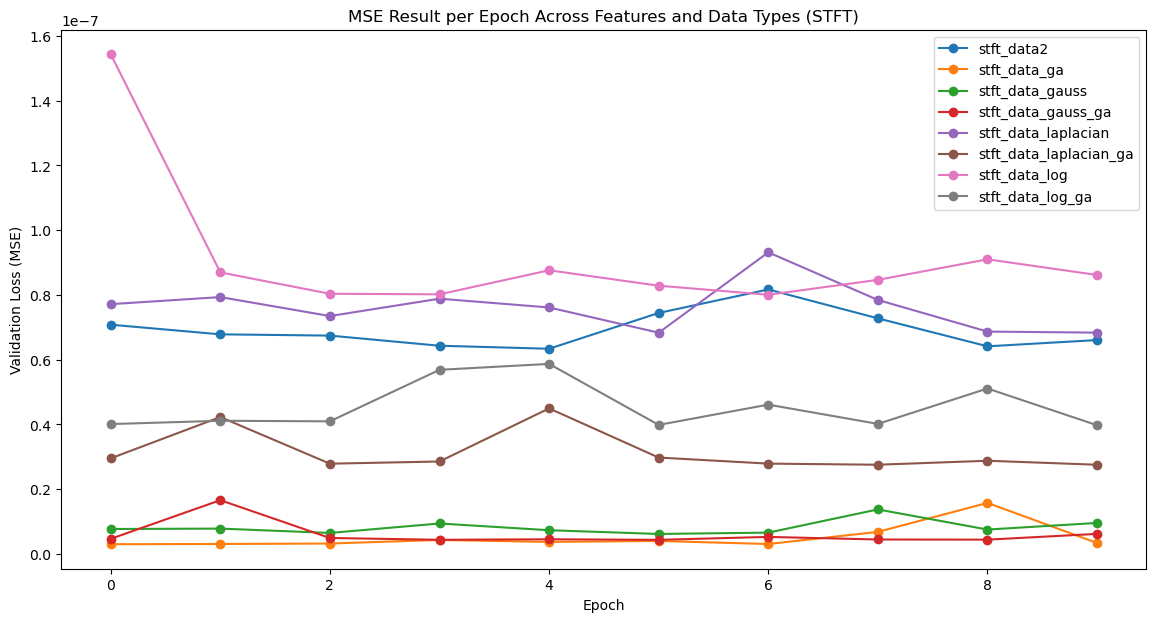

MSE Result : 6.33740171451791e-08, feature : stft_data2
MSE Result : 2.9786908495310627e-09, feature : stft_data_ga
MSE Result : 6.149514231168496e-09, feature : stft_data_gauss
MSE Result : 4.335059422544418e-09, feature : stft_data_gauss_ga
MSE Result : 6.833663235283893e-08, feature : stft_data_laplacian
MSE Result : 2.75367959545747e-08, feature : stft_data_laplacian_ga
MSE Result : 8.005847718095538e-08, feature : stft_data_log
MSE Result : 3.9743408564163474e-08, feature : stft_data_log_ga


In [ ]:
#STFT

def process_features(data, feature_type):
    if feature_type == 'stft':
        return librosa.istft(data)
    elif feature_type in ['mfcc', 'chroma']:
        return data
    else:
        raise ValueError("Unsupported feature type")

def create_sequences(data, seq_length):
    X, Y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        Y.append(data[i + seq_length])
    return np.array(X), np.array(Y)

feature_types = ['stft']
data_names = ['data2', 'data_ga', 'data_gauss', 'data_gauss_ga', 'data_laplacian',
              'data_laplacian_ga', 'data_log', 'data_log_ga']

mse_results = {}
losses_over_epochs = {}

for feature_type in feature_types:
    hdf5_file_path = f'cat_{feature_type}_features2.h5'
    with h5py.File(hdf5_file_path, 'r+') as hdf5_file:
        for data_name in tqdm(data_names, desc=f"Processing {feature_type}"):
            data = hdf5_file[data_name][:]
            t, y = process_features(data, feature_type), np.roll(data, -1)
            t, y = t[:-1], y[:-1]

            train_size = int(0.8 * len(t))
            train_data, test_data = t[:train_size], t[train_size:]
            train_labels, test_labels = y[:train_size], y[train_size:]

            X_train, y_train = create_sequences(train_data, 2)
            X_test, y_test = create_sequences(test_data, 2)

            X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
            X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

            model = Sequential([
                Conv1D(8, 1, activation='relu', input_shape=(2, 1)),
                MaxPooling1D(2),
                Flatten(),
                Dense(50, activation='relu'),
                Dense(1)
            ])
            model.compile(optimizer='adam', loss='mse')
            history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test), verbose=2)

            mse_results[f'{feature_type}_{data_name}'] = history.history['val_loss']
            print(f'Validation loss for {feature_type} {data_name}:', np.min(history.history['val_loss']))

plt.figure(figsize=(14, 7))
for key, losses in mse_results.items():
    plt.plot(losses, label=key, marker='o', linestyle='-')
plt.ylabel('Validation Loss (MSE)')
plt.xlabel('Epoch')
plt.title('MSE Result per Epoch Across Features and Data Types (STFT)')
plt.legend()
plt.show()

for key, losses in mse_results.items():
    los = np.min(losses)
    print(f'MSE Result : {los}, feature : {key}')

Processing chroma:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/10
1/1 - 1s - 524ms/step - loss: 0.3199 - val_loss: 185258.0312
Epoch 2/10
1/1 - 0s - 154ms/step - loss: 185541.0781 - val_loss: 5919.9072
Epoch 3/10
1/1 - 0s - 159ms/step - loss: 5965.1396 - val_loss: 12720.8486
Epoch 4/10
1/1 - 0s - 158ms/step - loss: 12556.9062 - val_loss: 19462.9707
Epoch 5/10
1/1 - 0s - 159ms/step - loss: 19223.4473 - val_loss: 18645.3262
Epoch 6/10
1/1 - 0s - 153ms/step - loss: 18378.7188 - val_loss: 12289.1338
Epoch 7/10
1/1 - 0s - 154ms/step - loss: 12047.3438 - val_loss: 4886.0586
Epoch 8/10
1/1 - 0s - 152ms/step - loss: 4714.7295 - val_loss: 505.3169
Epoch 9/10
1/1 - 0s - 156ms/step - loss: 439.9815 - val_loss: 1243.1613
Epoch 10/10
1/1 - 0s - 155ms/step - loss: 1302.5743 - val_loss: 5742.9282


Processing chroma:  12%|█▎        | 1/8 [00:02<00:14,  2.12s/it]

MSE Result for chroma data2: 505.3169250488281
Epoch 1/10
1/1 - 0s - 417ms/step - loss: 1.2778 - val_loss: 69590.7891
Epoch 2/10
1/1 - 0s - 86ms/step - loss: 69834.7812 - val_loss: 4421.4077
Epoch 3/10
1/1 - 0s - 88ms/step - loss: 4436.7861 - val_loss: 0.9244
Epoch 4/10
1/1 - 0s - 89ms/step - loss: 0.9177 - val_loss: 0.9261
Epoch 5/10
1/1 - 0s - 88ms/step - loss: 0.9194 - val_loss: 0.9273
Epoch 6/10
1/1 - 0s - 87ms/step - loss: 0.9205 - val_loss: 0.9281
Epoch 7/10
1/1 - 0s - 87ms/step - loss: 0.9213 - val_loss: 0.9286
Epoch 8/10
1/1 - 0s - 88ms/step - loss: 0.9218 - val_loss: 0.9289
Epoch 9/10
1/1 - 0s - 88ms/step - loss: 0.9221 - val_loss: 0.9290
Epoch 10/10
1/1 - 0s - 87ms/step - loss: 0.9222 - val_loss: 0.9289


Processing chroma:  25%|██▌       | 2/8 [00:03<00:09,  1.63s/it]

MSE Result for chroma data_ga: 0.9244083762168884
Epoch 1/10
1/1 - 0s - 490ms/step - loss: 4.2650e-04 - val_loss: 31.5946
Epoch 2/10
1/1 - 0s - 166ms/step - loss: 36.0743 - val_loss: 1.7170
Epoch 3/10
1/1 - 0s - 152ms/step - loss: 2.1997 - val_loss: 20.2607
Epoch 4/10
1/1 - 0s - 152ms/step - loss: 21.1279 - val_loss: 11.3921
Epoch 5/10
1/1 - 0s - 151ms/step - loss: 13.1588 - val_loss: 1.7507
Epoch 6/10
1/1 - 0s - 153ms/step - loss: 2.4998 - val_loss: 2.1377
Epoch 7/10
1/1 - 0s - 152ms/step - loss: 2.7662 - val_loss: 4.8715
Epoch 8/10
1/1 - 0s - 151ms/step - loss: 4.1385 - val_loss: 2.6581
Epoch 9/10
1/1 - 0s - 151ms/step - loss: 3.0938 - val_loss: 1.8791
Epoch 10/10
1/1 - 0s - 152ms/step - loss: 3.0041 - val_loss: 2.4847


Processing chroma:  38%|███▊      | 3/8 [00:05<00:09,  1.81s/it]

MSE Result for chroma data_gauss: 1.7170345783233643
Epoch 1/10
1/1 - 0s - 409ms/step - loss: 5.7144e-04 - val_loss: 0.0609
Epoch 2/10
1/1 - 0s - 88ms/step - loss: 0.0206 - val_loss: 0.0055
Epoch 3/10
1/1 - 0s - 86ms/step - loss: 0.0016 - val_loss: 8.8571e-05
Epoch 4/10
1/1 - 0s - 85ms/step - loss: 8.9515e-05 - val_loss: 9.3647e-05
Epoch 5/10
1/1 - 0s - 82ms/step - loss: 9.4911e-05 - val_loss: 1.0102e-04
Epoch 6/10
1/1 - 0s - 81ms/step - loss: 1.0252e-04 - val_loss: 1.0790e-04
Epoch 7/10
1/1 - 0s - 80ms/step - loss: 1.0957e-04 - val_loss: 1.1296e-04
Epoch 8/10
1/1 - 0s - 81ms/step - loss: 1.1473e-04 - val_loss: 1.1554e-04
Epoch 9/10
1/1 - 0s - 94ms/step - loss: 1.1737e-04 - val_loss: 1.1564e-04
Epoch 10/10
1/1 - 0s - 90ms/step - loss: 1.1747e-04 - val_loss: 1.1361e-04


Processing chroma:  50%|█████     | 4/8 [00:06<00:06,  1.59s/it]

MSE Result for chroma data_gauss_ga: 8.857116336002946e-05
Epoch 1/10
1/1 - 1s - 514ms/step - loss: 0.0385 - val_loss: 324.7610
Epoch 2/10
1/1 - 0s - 155ms/step - loss: 471.1743 - val_loss: 4.6329
Epoch 3/10
1/1 - 0s - 156ms/step - loss: 5.0137 - val_loss: 41.7152
Epoch 4/10
1/1 - 0s - 154ms/step - loss: 6.7144 - val_loss: 104.9411
Epoch 5/10
1/1 - 0s - 156ms/step - loss: 18.4036 - val_loss: 48.0309
Epoch 6/10
1/1 - 0s - 158ms/step - loss: 6.6939 - val_loss: 2.1037
Epoch 7/10
1/1 - 0s - 153ms/step - loss: 1.9584 - val_loss: 22.4469
Epoch 8/10
1/1 - 0s - 154ms/step - loss: 13.2238 - val_loss: 3.5169
Epoch 9/10
1/1 - 0s - 155ms/step - loss: 3.0237 - val_loss: 28.3580
Epoch 10/10
1/1 - 0s - 152ms/step - loss: 0.6551 - val_loss: 82.7637


Processing chroma:  62%|██████▎   | 5/8 [00:08<00:05,  1.76s/it]

MSE Result for chroma data_laplacian: 2.103691339492798
Epoch 1/10
1/1 - 0s - 423ms/step - loss: 0.0227 - val_loss: 853.1053
Epoch 2/10
1/1 - 0s - 87ms/step - loss: 982.2838 - val_loss: 20.2748
Epoch 3/10
1/1 - 0s - 90ms/step - loss: 24.8743 - val_loss: 0.0146
Epoch 4/10
1/1 - 0s - 89ms/step - loss: 0.0279 - val_loss: 0.0143
Epoch 5/10
1/1 - 0s - 92ms/step - loss: 0.0275 - val_loss: 0.0140
Epoch 6/10
1/1 - 0s - 91ms/step - loss: 0.0272 - val_loss: 0.0138
Epoch 7/10
1/1 - 0s - 91ms/step - loss: 0.0269 - val_loss: 0.0136
Epoch 8/10
1/1 - 0s - 92ms/step - loss: 0.0266 - val_loss: 0.0134
Epoch 9/10
1/1 - 0s - 90ms/step - loss: 0.0263 - val_loss: 0.0132
Epoch 10/10
1/1 - 0s - 91ms/step - loss: 0.0261 - val_loss: 0.0130


Processing chroma:  75%|███████▌  | 6/8 [00:10<00:03,  1.61s/it]

MSE Result for chroma data_laplacian_ga: 0.01304895244538784
Epoch 1/10
1/1 - 1s - 944ms/step - loss: 0.9428 - val_loss: 818187.0000
Epoch 2/10
1/1 - 0s - 177ms/step - loss: 819049.5625 - val_loss: 47203.0000
Epoch 3/10
1/1 - 0s - 153ms/step - loss: 47599.7305 - val_loss: 1.2060
Epoch 4/10
1/1 - 0s - 154ms/step - loss: 1.1990 - val_loss: 1.2084
Epoch 5/10
1/1 - 0s - 153ms/step - loss: 1.2014 - val_loss: 1.2102
Epoch 6/10
1/1 - 0s - 153ms/step - loss: 1.2031 - val_loss: 1.2116
Epoch 7/10
1/1 - 0s - 157ms/step - loss: 1.2044 - val_loss: 1.2126
Epoch 8/10
1/1 - 0s - 152ms/step - loss: 1.2054 - val_loss: 1.2132
Epoch 9/10
1/1 - 0s - 154ms/step - loss: 1.2061 - val_loss: 1.2136
Epoch 10/10
1/1 - 0s - 155ms/step - loss: 1.2065 - val_loss: 1.2138


Processing chroma:  88%|████████▊ | 7/8 [00:12<00:01,  1.90s/it]

MSE Result for chroma data_log: 1.2059766054153442
Epoch 1/10
1/1 - 0s - 414ms/step - loss: 0.0557 - val_loss: 18561.7910
Epoch 2/10
1/1 - 0s - 91ms/step - loss: 18730.7480 - val_loss: 996.0302
Epoch 3/10
1/1 - 0s - 90ms/step - loss: 1005.0822 - val_loss: 1.2044
Epoch 4/10
1/1 - 0s - 90ms/step - loss: 1.1974 - val_loss: 1.1987
Epoch 5/10
1/1 - 0s - 90ms/step - loss: 1.1917 - val_loss: 1.1934
Epoch 6/10
1/1 - 0s - 88ms/step - loss: 1.1864 - val_loss: 1.1884
Epoch 7/10
1/1 - 0s - 90ms/step - loss: 1.1815 - val_loss: 1.1851
Epoch 8/10
1/1 - 0s - 88ms/step - loss: 1.1782 - val_loss: 1.1823
Epoch 9/10
1/1 - 0s - 91ms/step - loss: 1.1755 - val_loss: 1.1798
Epoch 10/10
1/1 - 0s - 89ms/step - loss: 1.1730 - val_loss: 1.1776


Processing chroma: 100%|██████████| 8/8 [00:13<00:00,  1.73s/it]


MSE Result for chroma data_log_ga: 1.177590250968933


Processing mfcc:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/10
2/2 - 54s - 27s/step - loss: 164007632.0000 - val_loss: 1785280.5000
Epoch 2/10
2/2 - 39s - 19s/step - loss: 153508480.0000 - val_loss: 1511721.7500
Epoch 3/10
2/2 - 37s - 19s/step - loss: 7689854.0000 - val_loss: 6350375.5000
Epoch 4/10
2/2 - 33s - 17s/step - loss: 372144672.0000 - val_loss: 5941329.0000
Epoch 5/10
2/2 - 36s - 18s/step - loss: 3133911040.0000 - val_loss: 7321355.5000
Epoch 6/10
2/2 - 32s - 16s/step - loss: 332695744.0000 - val_loss: 13401002.0000
Epoch 7/10
2/2 - 34s - 17s/step - loss: 208076432.0000 - val_loss: 14162532.0000
Epoch 8/10
2/2 - 36s - 18s/step - loss: 2610258432.0000 - val_loss: 7824547.5000
Epoch 9/10
2/2 - 33s - 17s/step - loss: 418542304.0000 - val_loss: 14075212.0000
Epoch 10/10
2/2 - 30s - 15s/step - loss: 1200891648.0000 - val_loss: 16134905.0000


Processing mfcc:  12%|█▎        | 1/8 [06:36<46:13, 396.28s/it]

MSE Result for mfcc data2: 1511721.75
Epoch 1/10
2/2 - 16s - 8s/step - loss: 37891.8281 - val_loss: 804927.2500
Epoch 2/10
2/2 - 6s - 3s/step - loss: 16658183.0000 - val_loss: 3900111.2500
Epoch 3/10
2/2 - 3s - 1s/step - loss: 130699024.0000 - val_loss: 3426939.7500
Epoch 4/10
2/2 - 3s - 2s/step - loss: 8441963.0000 - val_loss: 770427.6875
Epoch 5/10
2/2 - 4s - 2s/step - loss: 1418757.5000 - val_loss: 142827.4844
Epoch 6/10
2/2 - 3s - 1s/step - loss: 35797936.0000 - val_loss: 62967.2695
Epoch 7/10
2/2 - 3s - 1s/step - loss: 31768666.0000 - val_loss: 46076.3281
Epoch 8/10
2/2 - 3s - 1s/step - loss: 14899161.0000 - val_loss: 61988.8984
Epoch 9/10
2/2 - 3s - 2s/step - loss: 542163.6875 - val_loss: 106370.3594
Epoch 10/10
2/2 - 3s - 2s/step - loss: 1466698.3750 - val_loss: 156697.9844


Processing mfcc:  25%|██▌       | 2/8 [07:27<19:20, 193.40s/it]

MSE Result for mfcc data_ga: 46076.328125
Epoch 1/10
2/2 - 57s - 28s/step - loss: 7339.2109 - val_loss: 807.7853
Epoch 2/10
2/2 - 44s - 22s/step - loss: 2033.0471 - val_loss: 5217.1724
Epoch 3/10
2/2 - 39s - 19s/step - loss: 5957.8721 - val_loss: 3554.3284
Epoch 4/10
2/2 - 38s - 19s/step - loss: 3205.1184 - val_loss: 1504.9821
Epoch 5/10
2/2 - 31s - 16s/step - loss: 1968.6826 - val_loss: 2285.2947
Epoch 6/10
2/2 - 39s - 20s/step - loss: 1952.1680 - val_loss: 1619.1766
Epoch 7/10
2/2 - 27s - 14s/step - loss: 1740.0902 - val_loss: 835.7858
Epoch 8/10
2/2 - 33s - 16s/step - loss: 856.3134 - val_loss: 1324.1366
Epoch 9/10
2/2 - 31s - 16s/step - loss: 1093.6417 - val_loss: 1833.8743
Epoch 10/10
2/2 - 29s - 14s/step - loss: 1445.1345 - val_loss: 1226.2521


Processing mfcc:  38%|███▊      | 3/8 [14:01<23:45, 285.07s/it]

MSE Result for mfcc data_gauss: 807.7852783203125
Epoch 1/10
2/2 - 16s - 8s/step - loss: 1747.7505 - val_loss: 185.1596
Epoch 2/10
2/2 - 6s - 3s/step - loss: 103.1035 - val_loss: 0.0385
Epoch 3/10
2/2 - 4s - 2s/step - loss: 0.0398 - val_loss: 0.0391
Epoch 4/10
2/2 - 5s - 2s/step - loss: 0.0404 - val_loss: 0.0394
Epoch 5/10
2/2 - 4s - 2s/step - loss: 0.0407 - val_loss: 0.0396
Epoch 6/10
2/2 - 3s - 1s/step - loss: 0.0409 - val_loss: 0.0397
Epoch 7/10
2/2 - 3s - 1s/step - loss: 0.0409 - val_loss: 0.0397
Epoch 8/10
2/2 - 3s - 1s/step - loss: 0.0409 - val_loss: 0.0396
Epoch 9/10
2/2 - 1s - 637ms/step - loss: 0.0408 - val_loss: 0.0395
Epoch 10/10
2/2 - 2s - 1s/step - loss: 0.0406 - val_loss: 0.0392


Processing mfcc:  50%|█████     | 4/8 [14:52<12:49, 192.45s/it]

MSE Result for mfcc data_gauss_ga: 0.03847094625234604
Epoch 1/10
2/2 - 52s - 26s/step - loss: 61215976.0000 - val_loss: 2320093696.0000
Epoch 2/10
2/2 - 43s - 21s/step - loss: 30871097344.0000 - val_loss: 763389568.0000
Epoch 3/10
2/2 - 36s - 18s/step - loss: 4164315392.0000 - val_loss: 1579805184.0000
Epoch 4/10
2/2 - 32s - 16s/step - loss: 5120729088.0000 - val_loss: 28513302.0000
Epoch 5/10
2/2 - 36s - 18s/step - loss: 958308800.0000 - val_loss: 1060244096.0000
Epoch 6/10
2/2 - 28s - 14s/step - loss: 1255910912.0000 - val_loss: 684418112.0000
Epoch 7/10
2/2 - 28s - 14s/step - loss: 830280320.0000 - val_loss: 236916832.0000
Epoch 8/10
2/2 - 27s - 14s/step - loss: 840533568.0000 - val_loss: 127947432.0000
Epoch 9/10
2/2 - 33s - 17s/step - loss: 772875904.0000 - val_loss: 462576000.0000
Epoch 10/10
2/2 - 29s - 15s/step - loss: 899403008.0000 - val_loss: 625824256.0000


Processing mfcc:  62%|██████▎   | 5/8 [21:01<12:48, 256.16s/it]

MSE Result for mfcc data_laplacian: 28513302.0
Epoch 1/10
2/2 - 14s - 7s/step - loss: 881741.4375 - val_loss: 119693144.0000
Epoch 2/10
2/2 - 7s - 4s/step - loss: 542588352.0000 - val_loss: 139599488.0000
Epoch 3/10
2/2 - 3s - 2s/step - loss: 278426688.0000 - val_loss: 5370064.0000
Epoch 4/10
2/2 - 3s - 1s/step - loss: 21444.6914 - val_loss: 39.6119
Epoch 5/10
2/2 - 2s - 1s/step - loss: 40.0439 - val_loss: 39.6482
Epoch 6/10
2/2 - 2s - 961ms/step - loss: 40.0786 - val_loss: 39.6753
Epoch 7/10
2/2 - 2s - 1s/step - loss: 40.1045 - val_loss: 39.6953
Epoch 8/10
2/2 - 3s - 2s/step - loss: 40.1230 - val_loss: 39.7098
Epoch 9/10
2/2 - 3s - 1s/step - loss: 40.1361 - val_loss: 39.7197
Epoch 10/10
2/2 - 2s - 1s/step - loss: 40.1454 - val_loss: 39.7261


Processing mfcc:  75%|███████▌  | 6/8 [21:46<06:08, 184.30s/it]

MSE Result for mfcc data_laplacian_ga: 39.6119270324707
Epoch 1/10
2/2 - 56s - 28s/step - loss: 2249549312.0000 - val_loss: 13642787840.0000
Epoch 2/10
2/2 - 36s - 18s/step - loss: 14632396800.0000 - val_loss: 329733600.0000
Epoch 3/10
2/2 - 34s - 17s/step - loss: 942878784.0000 - val_loss: 1671670784.0000
Epoch 4/10
2/2 - 37s - 18s/step - loss: 1974445440.0000 - val_loss: 16902813696.0000
Epoch 5/10
2/2 - 32s - 16s/step - loss: 33725169664.0000 - val_loss: 1368269056.0000
Epoch 6/10
2/2 - 28s - 14s/step - loss: 7777443840.0000 - val_loss: 5265518080.0000
Epoch 7/10
2/2 - 32s - 16s/step - loss: 6779170304.0000 - val_loss: 42372036.0000
Epoch 8/10
2/2 - 32s - 16s/step - loss: 1463798656.0000 - val_loss: 1239466112.0000
Epoch 9/10
2/2 - 33s - 16s/step - loss: 2344038400.0000 - val_loss: 543954048.0000
Epoch 10/10
2/2 - 28s - 14s/step - loss: 421655328.0000 - val_loss: 33243792.0000


Processing mfcc:  88%|████████▊ | 7/8 [28:00<04:06, 246.36s/it]

MSE Result for mfcc data_log: 33243792.0
Epoch 1/10
2/2 - 15s - 7s/step - loss: 393042.4688 - val_loss: 17261672.0000
Epoch 2/10
2/2 - 9s - 4s/step - loss: 155886064.0000 - val_loss: 672585088.0000
Epoch 3/10
2/2 - 4s - 2s/step - loss: 2551801344.0000 - val_loss: 7563519.5000
Epoch 4/10
2/2 - 4s - 2s/step - loss: 10718690.0000 - val_loss: 17580916.0000
Epoch 5/10
2/2 - 3s - 2s/step - loss: 24813178.0000 - val_loss: 41520360.0000
Epoch 6/10
2/2 - 2s - 1s/step - loss: 91757424.0000 - val_loss: 39689764.0000
Epoch 7/10
2/2 - 2s - 910ms/step - loss: 65041392.0000 - val_loss: 55852500.0000
Epoch 8/10
2/2 - 2s - 1s/step - loss: 407476736.0000 - val_loss: 22667986.0000
Epoch 9/10
2/2 - 1s - 533ms/step - loss: 40844788.0000 - val_loss: 124240816.0000
Epoch 10/10
2/2 - 2s - 1s/step - loss: 675962752.0000 - val_loss: 50672136.0000


Processing mfcc: 100%|██████████| 8/8 [28:47<00:00, 215.97s/it]

MSE Result for mfcc data_log_ga: 7563519.5


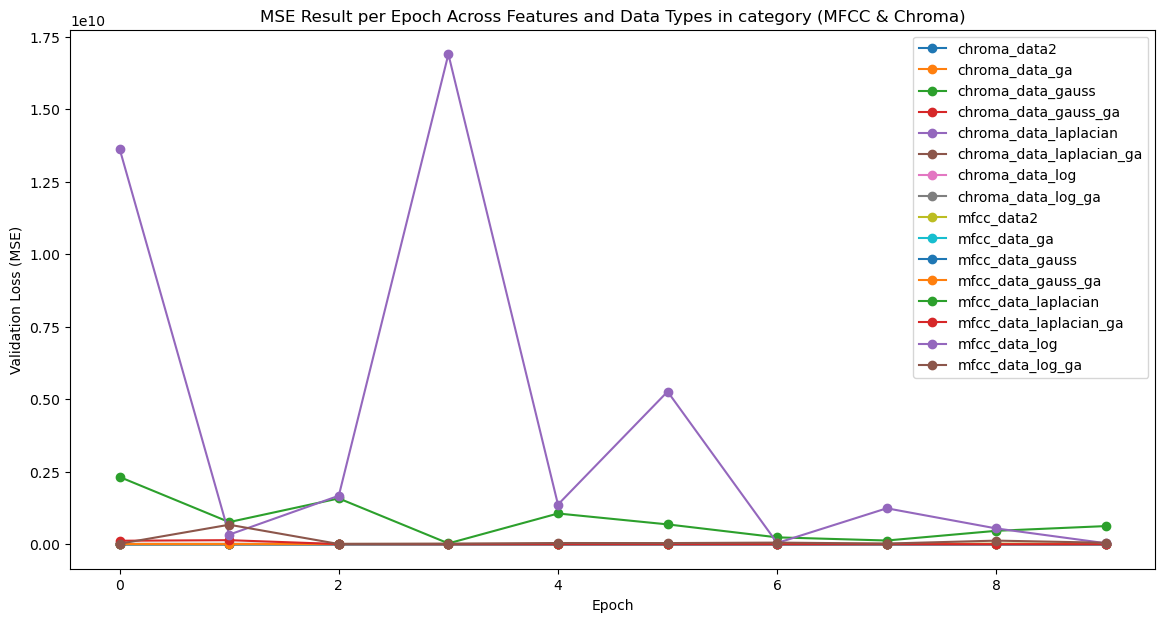

MSE Result : 505.3169250488281, feature : chroma_data2
MSE Result : 0.9244083762168884, feature : chroma_data_ga
MSE Result : 1.7170345783233643, feature : chroma_data_gauss
MSE Result : 8.857116336002946e-05, feature : chroma_data_gauss_ga
MSE Result : 2.103691339492798, feature : chroma_data_laplacian
MSE Result : 0.01304895244538784, feature : chroma_data_laplacian_ga
MSE Result : 1.2059766054153442, feature : chroma_data_log
MSE Result : 1.177590250968933, feature : chroma_data_log_ga
MSE Result : 1511721.75, feature : mfcc_data2
MSE Result : 46076.328125, feature : mfcc_data_ga
MSE Result : 807.7852783203125, feature : mfcc_data_gauss
MSE Result : 0.03847094625234604, feature : mfcc_data_gauss_ga
MSE Result : 28513302.0, feature : mfcc_data_laplacian
MSE Result : 39.6119270324707, feature : mfcc_data_laplacian_ga
MSE Result : 33243792.0, feature : mfcc_data_log
MSE Result : 7563519.5, feature : mfcc_data_log_ga


In [ ]:
#MFCC-CHROMA

def process_features(data, feature_type):
    if feature_type == 'stft':
        return librosa.istft(data)
    elif feature_type in ['mfcc', 'chroma']:

        if data.ndim == 2:
            return data.reshape(data.shape[0], data.shape[1], 1)
        else:
            return data
    else:
        raise ValueError("Unsupported feature type")

def create_sequences(data, seq_length):
    X, Y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        Y.append(data[i + seq_length])
    return np.array(X), np.array(Y)

feature_types = ['chroma', 'mfcc']
data_names = ['data2', 'data_ga', 'data_gauss', 'data_gauss_ga', 'data_laplacian',
              'data_laplacian_ga', 'data_log', 'data_log_ga']

mse_results = {}
losses_over_epochs = {}

for feature_type in feature_types:
    hdf5_file_path = f'cat_{feature_type}_features2.h5'
    with h5py.File(hdf5_file_path, 'r+') as hdf5_file:
        for data_name in tqdm(data_names, desc=f"Processing {feature_type}"):
            data = hdf5_file[data_name][:]

            if data.ndim == 2 and data.shape[0] > 0:
                data = np.expand_dims(data, axis=-1)

                t, y = process_features(data, feature_type), np.roll(data, -1, axis=0)
                t, y = t[:-1], y[:-1]

                if len(t) > 10:
                    X_train, y_train = create_sequences(t, 2)
                    X_test, y_test = create_sequences(y, 2)

                    if X_train.size > 0 and X_test.size > 0:
                        model = Sequential([
                            Conv1D(8, 1, activation='relu', input_shape=(2, data.shape[1])),
                            MaxPooling1D(2),
                            Flatten(),
                            Dense(50, activation='relu'),
                            Dense(1)
                        ])
                        model.compile(optimizer='adam', loss='mse')
                        history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test), verbose=2)

            mse_results[f'{feature_type}_{data_name}'] = history.history['val_loss']
            print(f'MSE Result for {feature_type} {data_name}:', np.min(history.history['val_loss']))

plt.figure(figsize=(14, 7))
for key, losses in mse_results.items():
    plt.plot(losses, label=key, marker='o', linestyle='-')
plt.ylabel('Validation Loss (MSE)')
plt.xlabel('Epoch')
plt.title('MSE Result per Epoch Across Features and Data Types in category (MFCC & Chroma)')
plt.legend()
plt.show()


for key, losses in mse_results.items():
    los = np.min(losses)
    print(f'MSE Result : {los}, feature : {key}')

**DANi**

Processing data_dani:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1/10


/Users/indraawal/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


503643/503643 - 169s - 335us/step - loss: 3.8157e-06 - val_loss: 3.4260e-06
Epoch 2/10
503643/503643 - 169s - 335us/step - loss: 3.8028e-06 - val_loss: 3.2138e-06
Epoch 3/10
503643/503643 - 168s - 334us/step - loss: 3.8020e-06 - val_loss: 3.2125e-06
Epoch 4/10
503643/503643 - 169s - 335us/step - loss: 3.8016e-06 - val_loss: 3.2543e-06
Epoch 5/10
503643/503643 - 170s - 337us/step - loss: 3.7994e-06 - val_loss: 3.2511e-06
Epoch 6/10
503643/503643 - 168s - 335us/step - loss: 3.7990e-06 - val_loss: 3.2955e-06
Epoch 7/10
503643/503643 - 168s - 334us/step - loss: 3.7990e-06 - val_loss: 3.2117e-06
Epoch 8/10
503643/503643 - 168s - 334us/step - loss: 3.7981e-06 - val_loss: 3.2154e-06
Epoch 9/10
503643/503643 - 169s - 335us/step - loss: 3.7987e-06 - val_loss: 3.2138e-06
Epoch 10/10
503643/503643 - 168s - 333us/step - loss: 3.7979e-06 - val_loss: 3.2056e-06


Processing data_dani:  25%|██▌       | 1/4 [28:29<1:25:27, 1709.22s/it]

Epoch 1/10
503643/503643 - 169s - 335us/step - loss: 3.8197e-06 - val_loss: 3.4078e-06
Epoch 2/10
503643/503643 - 170s - 337us/step - loss: 3.8033e-06 - val_loss: 4.3251e-06
Epoch 3/10
503643/503643 - 170s - 338us/step - loss: 3.8036e-06 - val_loss: 3.2895e-06
Epoch 4/10
503643/503643 - 176s - 350us/step - loss: 3.8024e-06 - val_loss: 3.2073e-06
Epoch 5/10
503643/503643 - 168s - 333us/step - loss: 3.8013e-06 - val_loss: 3.2170e-06
Epoch 6/10
503643/503643 - 169s - 336us/step - loss: 3.8011e-06 - val_loss: 3.2106e-06
Epoch 7/10
503643/503643 - 168s - 334us/step - loss: 3.8005e-06 - val_loss: 3.2095e-06
Epoch 8/10
503643/503643 - 169s - 335us/step - loss: 3.7983e-06 - val_loss: 3.3801e-06
Epoch 9/10
503643/503643 - 168s - 334us/step - loss: 3.7985e-06 - val_loss: 3.2984e-06
Epoch 10/10
503643/503643 - 169s - 335us/step - loss: 3.7982e-06 - val_loss: 3.2095e-06


Processing data_dani:  50%|█████     | 2/4 [57:06<57:08, 1714.19s/it]  

Epoch 1/10
503643/503643 - 170s - 337us/step - loss: 3.6404e-06 - val_loss: 3.0618e-06
Epoch 2/10
503643/503643 - 172s - 341us/step - loss: 3.6170e-06 - val_loss: 3.0749e-06
Epoch 3/10
503643/503643 - 170s - 338us/step - loss: 3.6155e-06 - val_loss: 3.1569e-06
Epoch 4/10
503643/503643 - 176s - 349us/step - loss: 3.6151e-06 - val_loss: 3.1504e-06
Epoch 5/10
503643/503643 - 176s - 349us/step - loss: 3.6156e-06 - val_loss: 3.0551e-06
Epoch 6/10
503643/503643 - 177s - 352us/step - loss: 3.6153e-06 - val_loss: 3.3683e-06
Epoch 7/10
503643/503643 - 184s - 365us/step - loss: 3.6162e-06 - val_loss: 3.0673e-06
Epoch 8/10
503643/503643 - 168s - 333us/step - loss: 3.6152e-06 - val_loss: 3.0562e-06
Epoch 9/10
503643/503643 - 167s - 332us/step - loss: 3.6152e-06 - val_loss: 3.3249e-06
Epoch 10/10
503643/503643 - 166s - 330us/step - loss: 3.6145e-06 - val_loss: 3.3224e-06


Processing data_dani:  75%|███████▌  | 3/4 [1:26:14<28:49, 1729.38s/it]

Epoch 1/10
503643/503643 - 175s - 348us/step - loss: 3.8432e-06 - val_loss: 3.2269e-06
Epoch 2/10
503643/503643 - 175s - 347us/step - loss: 3.8264e-06 - val_loss: 3.2651e-06
Epoch 3/10
503643/503643 - 174s - 345us/step - loss: 3.8255e-06 - val_loss: 3.2498e-06
Epoch 4/10
503643/503643 - 168s - 333us/step - loss: 3.8227e-06 - val_loss: 3.2417e-06
Epoch 5/10
503643/503643 - 171s - 340us/step - loss: 3.8229e-06 - val_loss: 3.2980e-06
Epoch 6/10
503643/503643 - 184s - 365us/step - loss: 3.8221e-06 - val_loss: 3.3421e-06
Epoch 7/10
503643/503643 - 203s - 403us/step - loss: 3.8228e-06 - val_loss: 3.9312e-06
Epoch 8/10
503643/503643 - 210s - 418us/step - loss: 3.8226e-06 - val_loss: 3.2317e-06
Epoch 9/10
503643/503643 - 194s - 384us/step - loss: 3.8221e-06 - val_loss: 3.4195e-06
Epoch 10/10
503643/503643 - 176s - 349us/step - loss: 3.8231e-06 - val_loss: 3.2263e-06


Processing data_dani_ga:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1/10
251998/251998 - 88s - 351us/step - loss: 2.9752e-06 - val_loss: 2.5387e-06
Epoch 2/10
251998/251998 - 92s - 366us/step - loss: 2.9546e-06 - val_loss: 2.5456e-06
Epoch 3/10
251998/251998 - 82s - 327us/step - loss: 2.9528e-06 - val_loss: 2.4771e-06
Epoch 4/10
251998/251998 - 83s - 328us/step - loss: 2.9528e-06 - val_loss: 2.4692e-06
Epoch 5/10
251998/251998 - 82s - 324us/step - loss: 2.9526e-06 - val_loss: 2.5531e-06
Epoch 6/10
251998/251998 - 83s - 330us/step - loss: 2.9534e-06 - val_loss: 2.4963e-06
Epoch 7/10
251998/251998 - 85s - 337us/step - loss: 2.9530e-06 - val_loss: 2.7007e-06
Epoch 8/10
251998/251998 - 91s - 362us/step - loss: 2.9518e-06 - val_loss: 2.4720e-06
Epoch 9/10
251998/251998 - 85s - 339us/step - loss: 2.9521e-06 - val_loss: 2.4696e-06
Epoch 10/10
251998/251998 - 81s - 321us/step - loss: 2.9524e-06 - val_loss: 2.5770e-06


Processing data_dani_ga:  25%|██▌       | 1/4 [14:22<43:08, 862.67s/it]

Epoch 1/10
251998/251998 - 86s - 343us/step - loss: 2.8399e-06 - val_loss: 2.4926e-06
Epoch 2/10
251998/251998 - 87s - 343us/step - loss: 2.8192e-06 - val_loss: 2.3795e-06
Epoch 3/10
251998/251998 - 91s - 360us/step - loss: 2.8164e-06 - val_loss: 2.4306e-06
Epoch 4/10
251998/251998 - 104s - 412us/step - loss: 2.8172e-06 - val_loss: 2.3500e-06
Epoch 5/10
251998/251998 - 85s - 339us/step - loss: 2.8168e-06 - val_loss: 2.3480e-06
Epoch 6/10
251998/251998 - 85s - 338us/step - loss: 2.8166e-06 - val_loss: 2.5534e-06
Epoch 7/10
251998/251998 - 88s - 349us/step - loss: 2.8163e-06 - val_loss: 2.5392e-06
Epoch 8/10
251998/251998 - 93s - 370us/step - loss: 2.8168e-06 - val_loss: 2.6005e-06
Epoch 9/10
251998/251998 - 98s - 390us/step - loss: 2.8167e-06 - val_loss: 2.4778e-06
Epoch 10/10
251998/251998 - 90s - 358us/step - loss: 2.8171e-06 - val_loss: 2.3670e-06


Processing data_dani_ga:  50%|█████     | 2/4 [29:41<29:50, 895.46s/it]

Epoch 1/10
251998/251998 - 97s - 386us/step - loss: 2.8402e-06 - val_loss: 2.4142e-06
Epoch 2/10
251998/251998 - 85s - 339us/step - loss: 2.8224e-06 - val_loss: 2.3786e-06
Epoch 3/10
251998/251998 - 99s - 393us/step - loss: 2.8212e-06 - val_loss: 2.4571e-06
Epoch 4/10
251998/251998 - 96s - 379us/step - loss: 2.8167e-06 - val_loss: 2.3770e-06
Epoch 5/10
251998/251998 - 94s - 375us/step - loss: 2.8174e-06 - val_loss: 2.4813e-06
Epoch 6/10
251998/251998 - 95s - 379us/step - loss: 2.8171e-06 - val_loss: 2.3813e-06
Epoch 7/10
251998/251998 - 89s - 352us/step - loss: 2.8162e-06 - val_loss: 2.3624e-06
Epoch 8/10
251998/251998 - 86s - 342us/step - loss: 2.8160e-06 - val_loss: 2.3623e-06
Epoch 9/10
251998/251998 - 90s - 356us/step - loss: 2.8171e-06 - val_loss: 2.6370e-06
Epoch 10/10
251998/251998 - 88s - 351us/step - loss: 2.8161e-06 - val_loss: 2.3511e-06


Processing data_dani_ga:  75%|███████▌  | 3/4 [45:12<15:11, 911.83s/it]

Epoch 1/10
251998/251998 - 98s - 390us/step - loss: 2.8470e-06 - val_loss: 2.3534e-06
Epoch 2/10
251998/251998 - 92s - 367us/step - loss: 2.8230e-06 - val_loss: 2.6890e-06
Epoch 3/10
251998/251998 - 89s - 353us/step - loss: 2.8180e-06 - val_loss: 2.3504e-06
Epoch 4/10
251998/251998 - 92s - 366us/step - loss: 2.8174e-06 - val_loss: 2.3735e-06
Epoch 5/10
251998/251998 - 88s - 350us/step - loss: 2.8168e-06 - val_loss: 2.3905e-06
Epoch 6/10
251998/251998 - 90s - 357us/step - loss: 2.8166e-06 - val_loss: 2.5420e-06
Epoch 7/10
251998/251998 - 99s - 393us/step - loss: 2.8162e-06 - val_loss: 2.3630e-06
Epoch 8/10
251998/251998 - 106s - 421us/step - loss: 2.8166e-06 - val_loss: 2.4010e-06
Epoch 9/10
251998/251998 - 94s - 374us/step - loss: 2.8161e-06 - val_loss: 2.6497e-06
Epoch 10/10
251998/251998 - 89s - 355us/step - loss: 2.8165e-06 - val_loss: 2.3546e-06


Processing data_dani_ga: 100%|██████████| 4/4 [1:01:03<00:00, 915.96s/it]


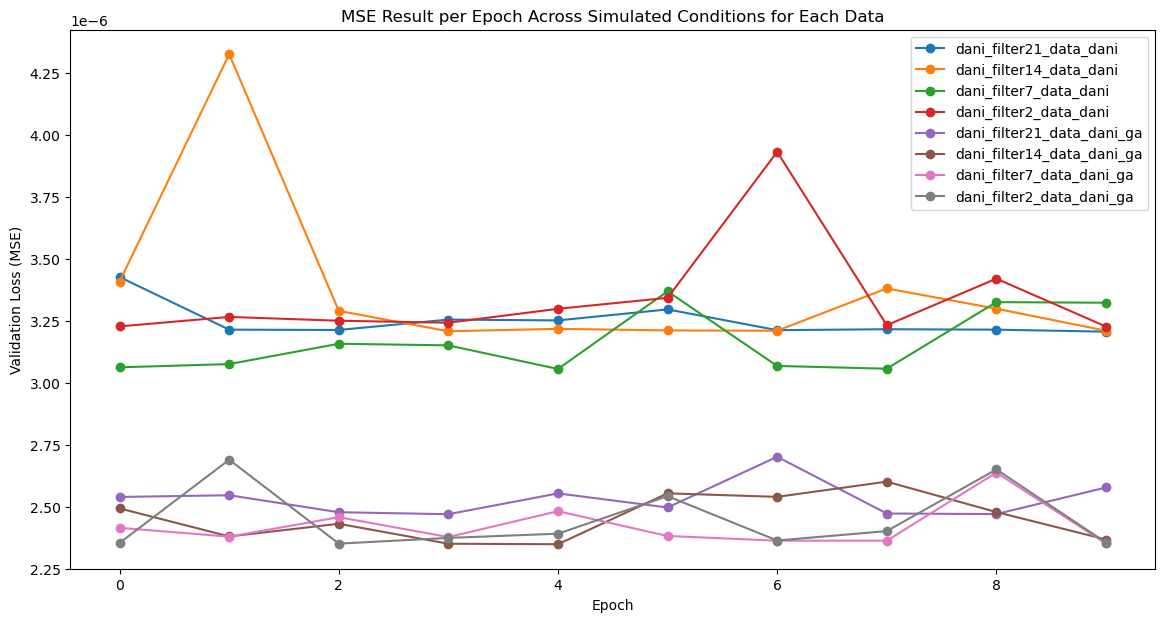

MSE Result for dani_filter21_data_dani: 3.2056386771728285e-06
MSE Result for dani_filter14_data_dani: 3.2072537123895017e-06
MSE Result for dani_filter7_data_dani: 3.055106617466663e-06
MSE Result for dani_filter2_data_dani: 3.2263292268908117e-06
MSE Result for dani_filter21_data_dani_ga: 2.4691557882761117e-06
MSE Result for dani_filter14_data_dani_ga: 2.3480340587411774e-06
MSE Result for dani_filter7_data_dani_ga: 2.351100420128205e-06
MSE Result for dani_filter2_data_dani_ga: 2.3504112505179364e-06


In [ ]:
#21,14,7,2

def process_features(data, feature_type):
    if feature_type == 'filter':
        return librosa.istft(data)

def create_sequences(data, seq_length):
    X, Y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        Y.append(data[i + seq_length])
    return np.array(X), np.array(Y)

def process(hdf5_file_path):
    with h5py.File(hdf5_file_path, 'r+') as hdf5_file:
      for data_name in tqdm(data_names, desc=f"Processing {data_name}"):
          data = hdf5_file[data_name][:]
          t, y = process_features(data, 'filter'), np.roll(data, -1)
          t, y = t[:-1], y[:-1]

          train_size = int(0.8 * len(t))
          train_data, test_data = t[:train_size], t[train_size:]
          train_labels, test_labels = y[:train_size], y[train_size:]

          X_train, y_train = create_sequences(train_data, 2)
          X_test, y_test = create_sequences(test_data, 2)

          X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
          X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

          model = Sequential([
              Conv1D(8, 1, activation='relu', input_shape=(2, 1)),
              MaxPooling1D(2),
              Flatten(),
              Dense(50, activation='relu'),
              Dense(1)
          ])
          model.compile(optimizer='adam', loss='mse')
          history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test), verbose=2)

          mse_results[f"{hdf5_file}_{data_name}"] = history.history['val_loss']


hdf5_files = ['dani_filter21.h5', 'dani_filter14.h5', 'dani_filter7.h5', 'dani_filter2.h5']
data_names = ['data_dani', 'data_dani_ga']

mse_results = {}

for file_path in hdf5_files:
    process(file_path)


plt.figure(figsize=(14, 7))
for key, losses in mse_results.items():
    plt.plot(losses, label=key, marker='o', linestyle='-')
plt.ylabel('Validation Loss (MSE)')
plt.xlabel('Epoch')
plt.title('MSE Result per Epoch Across Simulated Conditions for Each Data')
plt.legend()
plt.show()


for key, losses in mse_results.items():
    print(f'MSE Result for {key}: {np.min(losses)}')

**MAE**

**CATEGORY 21**

Processing stft:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/10
503643/503643 - 196s - 389us/step - loss: 1.3478e-04 - val_loss: 1.7622e-04
Epoch 2/10
503643/503643 - 196s - 390us/step - loss: 1.3214e-04 - val_loss: 1.6127e-04
Epoch 3/10
503643/503643 - 167s - 332us/step - loss: 1.3194e-04 - val_loss: 1.9635e-04
Epoch 4/10
503643/503643 - 167s - 332us/step - loss: 1.3190e-04 - val_loss: 1.5669e-04
Epoch 5/10
503643/503643 - 168s - 334us/step - loss: 1.3190e-04 - val_loss: 1.7245e-04
Epoch 6/10
503643/503643 - 167s - 332us/step - loss: 1.3185e-04 - val_loss: 1.6408e-04
Epoch 7/10
503643/503643 - 168s - 333us/step - loss: 1.3178e-04 - val_loss: 1.5624e-04
Epoch 8/10
503643/503643 - 168s - 333us/step - loss: 1.3181e-04 - val_loss: 1.5649e-04
Epoch 9/10
503643/503643 - 167s - 332us/step - loss: 1.3183e-04 - val_loss: 1.6205e-04
Epoch 10/10
503643/503643 - 169s - 336us/step - loss: 1.3187e-04 - val_loss: 1.5993e-04


Processing stft:  12%|█▎        | 1/8 [29:19<3:25:13, 1759.07s/it]

Validation loss for stft data2: 0.00015623951912857592
Epoch 1/10
251104/251104 - 84s - 333us/step - loss: 1.4707e-04 - val_loss: 2.0165e-04
Epoch 2/10
251104/251104 - 84s - 333us/step - loss: 1.4697e-04 - val_loss: 2.2489e-04
Epoch 3/10
251104/251104 - 84s - 334us/step - loss: 1.4708e-04 - val_loss: 2.1478e-04
Epoch 4/10
251104/251104 - 84s - 335us/step - loss: 1.4698e-04 - val_loss: 2.0136e-04
Epoch 5/10
251104/251104 - 85s - 338us/step - loss: 1.4713e-04 - val_loss: 2.1205e-04
Epoch 6/10
251104/251104 - 83s - 331us/step - loss: 1.4722e-04 - val_loss: 2.2983e-04
Epoch 7/10
251104/251104 - 81s - 323us/step - loss: 1.4709e-04 - val_loss: 2.0274e-04
Epoch 8/10
251104/251104 - 81s - 322us/step - loss: 1.4711e-04 - val_loss: 2.0752e-04
Epoch 9/10
251104/251104 - 80s - 318us/step - loss: 1.4713e-04 - val_loss: 2.0690e-04
Epoch 10/10
251104/251104 - 85s - 338us/step - loss: 1.4703e-04 - val_loss: 2.0141e-04


Processing stft:  25%|██▌       | 2/8 [43:19<2:01:53, 1218.90s/it]

Validation loss for stft data_ga: 0.0002013633056776598
Epoch 1/10
503643/503643 - 168s - 334us/step - loss: 9.0433e-05 - val_loss: 1.5169e-04
Epoch 2/10
503643/503643 - 168s - 334us/step - loss: 9.2687e-05 - val_loss: 1.3922e-04
Epoch 3/10
503643/503643 - 174s - 345us/step - loss: 9.2291e-05 - val_loss: 4.3362e-05
Epoch 4/10
503643/503643 - 173s - 344us/step - loss: 9.3532e-05 - val_loss: 4.7771e-05
Epoch 5/10
503643/503643 - 174s - 346us/step - loss: 9.3834e-05 - val_loss: 1.8901e-04
Epoch 6/10
503643/503643 - 173s - 344us/step - loss: 9.2395e-05 - val_loss: 2.2726e-05
Epoch 7/10
503643/503643 - 174s - 345us/step - loss: 9.2548e-05 - val_loss: 5.8334e-05
Epoch 8/10
503643/503643 - 176s - 350us/step - loss: 9.3232e-05 - val_loss: 3.9623e-05
Epoch 9/10
503643/503643 - 191s - 379us/step - loss: 9.3203e-05 - val_loss: 1.5632e-04
Epoch 10/10
503643/503643 - 189s - 375us/step - loss: 9.2796e-05 - val_loss: 2.8173e-05


Processing stft:  38%|███▊      | 3/8 [1:13:03<2:03:03, 1476.62s/it]

Validation loss for stft data_gauss: 2.2725536837242544e-05
Epoch 1/10
251294/251294 - 98s - 392us/step - loss: 6.2215e-05 - val_loss: 7.1323e-05
Epoch 2/10
251294/251294 - 80s - 318us/step - loss: 5.9513e-05 - val_loss: 5.5766e-05
Epoch 3/10
251294/251294 - 90s - 357us/step - loss: 5.9309e-05 - val_loss: 4.8762e-05
Epoch 4/10
251294/251294 - 89s - 352us/step - loss: 5.9374e-05 - val_loss: 7.2093e-05
Epoch 5/10
251294/251294 - 90s - 360us/step - loss: 5.9263e-05 - val_loss: 4.8640e-05
Epoch 6/10
251294/251294 - 88s - 349us/step - loss: 5.9096e-05 - val_loss: 9.0278e-05
Epoch 7/10
251294/251294 - 110s - 437us/step - loss: 5.8995e-05 - val_loss: 4.7571e-05
Epoch 8/10
251294/251294 - 85s - 337us/step - loss: 5.9788e-05 - val_loss: 5.0956e-05
Epoch 9/10
251294/251294 - 92s - 367us/step - loss: 5.9222e-05 - val_loss: 5.2025e-05
Epoch 10/10
251294/251294 - 92s - 366us/step - loss: 5.9435e-05 - val_loss: 7.0675e-05


Processing stft:  50%|█████     | 4/8 [1:28:32<1:24:02, 1260.60s/it]

Validation loss for stft data_gauss_ga: 4.757145143230446e-05
Epoch 1/10
503643/503643 - 199s - 395us/step - loss: 1.5145e-04 - val_loss: 1.7714e-04
Epoch 2/10
503643/503643 - 192s - 382us/step - loss: 1.4896e-04 - val_loss: 1.8431e-04
Epoch 3/10
503643/503643 - 200s - 396us/step - loss: 1.4890e-04 - val_loss: 1.7714e-04
Epoch 4/10
503643/503643 - 200s - 396us/step - loss: 1.4884e-04 - val_loss: 1.7906e-04
Epoch 5/10
503643/503643 - 189s - 375us/step - loss: 1.4885e-04 - val_loss: 2.0458e-04
Epoch 6/10
503643/503643 - 197s - 391us/step - loss: 1.4871e-04 - val_loss: 2.0220e-04
Epoch 7/10
503643/503643 - 213s - 423us/step - loss: 1.4877e-04 - val_loss: 1.9250e-04
Epoch 8/10
503643/503643 - 178s - 353us/step - loss: 1.4872e-04 - val_loss: 1.9852e-04
Epoch 9/10
503643/503643 - 211s - 419us/step - loss: 1.4870e-04 - val_loss: 2.1327e-04
Epoch 10/10
503643/503643 - 177s - 352us/step - loss: 1.4866e-04 - val_loss: 1.8284e-04


Processing stft:  62%|██████▎   | 5/8 [2:01:36<1:16:04, 1521.51s/it]

Validation loss for stft data_laplacian: 0.00017713505076244473
Epoch 1/10
251820/251820 - 106s - 422us/step - loss: 1.0602e-04 - val_loss: 1.2205e-04
Epoch 2/10
251820/251820 - 100s - 398us/step - loss: 1.0104e-04 - val_loss: 1.3820e-04
Epoch 3/10
251820/251820 - 94s - 375us/step - loss: 1.0070e-04 - val_loss: 1.1494e-04
Epoch 4/10
251820/251820 - 88s - 350us/step - loss: 1.0053e-04 - val_loss: 1.0942e-04
Epoch 5/10
251820/251820 - 88s - 350us/step - loss: 1.0088e-04 - val_loss: 1.0975e-04
Epoch 6/10
251820/251820 - 94s - 373us/step - loss: 1.0065e-04 - val_loss: 1.1220e-04
Epoch 7/10
251820/251820 - 97s - 384us/step - loss: 1.0066e-04 - val_loss: 1.5025e-04
Epoch 8/10
251820/251820 - 100s - 398us/step - loss: 1.0061e-04 - val_loss: 1.1215e-04
Epoch 9/10
251820/251820 - 96s - 383us/step - loss: 1.0060e-04 - val_loss: 1.3907e-04
Epoch 10/10
251820/251820 - 97s - 385us/step - loss: 1.0039e-04 - val_loss: 1.4025e-04


Processing stft:  75%|███████▌  | 6/8 [2:17:55<44:33, 1336.82s/it]  

Validation loss for stft data_laplacian_ga: 0.00010941748769255355
Epoch 1/10
503643/503643 - 172s - 342us/step - loss: 1.6600e-04 - val_loss: 1.9837e-04
Epoch 2/10
503643/503643 - 203s - 402us/step - loss: 1.6337e-04 - val_loss: 1.9598e-04
Epoch 3/10
503643/503643 - 180s - 357us/step - loss: 1.6329e-04 - val_loss: 2.0548e-04
Epoch 4/10
503643/503643 - 223s - 442us/step - loss: 1.6322e-04 - val_loss: 2.1579e-04
Epoch 5/10
503643/503643 - 242s - 481us/step - loss: 1.6304e-04 - val_loss: 1.9639e-04
Epoch 6/10
503643/503643 - 249s - 495us/step - loss: 1.6323e-04 - val_loss: 1.9663e-04
Epoch 7/10
503643/503643 - 242s - 480us/step - loss: 1.6310e-04 - val_loss: 2.2622e-04
Epoch 8/10
503643/503643 - 249s - 494us/step - loss: 1.6317e-04 - val_loss: 2.3618e-04
Epoch 9/10
503643/503643 - 246s - 488us/step - loss: 1.6321e-04 - val_loss: 2.1082e-04
Epoch 10/10
503643/503643 - 212s - 421us/step - loss: 1.6320e-04 - val_loss: 2.9472e-04


Processing stft:  88%|████████▊ | 7/8 [2:55:16<27:12, 1632.50s/it]

Validation loss for stft data_log: 0.00019598435028456151
Epoch 1/10
251269/251269 - 115s - 458us/step - loss: 1.2533e-04 - val_loss: 1.4211e-04
Epoch 2/10
251269/251269 - 129s - 512us/step - loss: 1.2080e-04 - val_loss: 1.4057e-04
Epoch 3/10
251269/251269 - 156s - 619us/step - loss: 1.2078e-04 - val_loss: 1.4119e-04
Epoch 4/10
251269/251269 - 243s - 968us/step - loss: 1.2069e-04 - val_loss: 1.3952e-04
Epoch 5/10
251269/251269 - 140s - 559us/step - loss: 1.2063e-04 - val_loss: 1.4157e-04
Epoch 6/10
251269/251269 - 131s - 521us/step - loss: 1.2080e-04 - val_loss: 1.4105e-04
Epoch 7/10
251269/251269 - 122s - 486us/step - loss: 1.2034e-04 - val_loss: 1.4148e-04
Epoch 8/10
251269/251269 - 115s - 456us/step - loss: 1.2073e-04 - val_loss: 1.4658e-04
Epoch 9/10
251269/251269 - 119s - 473us/step - loss: 1.2063e-04 - val_loss: 1.3791e-04
Epoch 10/10
251269/251269 - 127s - 504us/step - loss: 1.2046e-04 - val_loss: 1.6028e-04


Processing stft: 100%|██████████| 8/8 [3:18:46<00:00, 1490.79s/it]

Validation loss for stft data_log_ga: 0.00013791142555419356


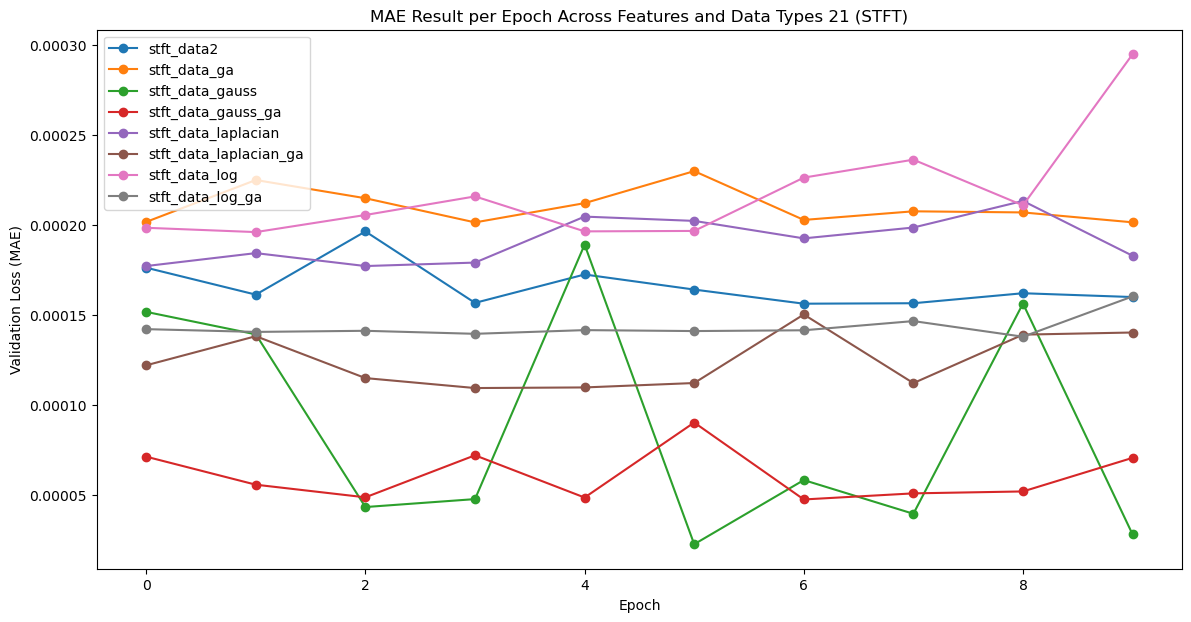

MAE Result : 0.00015623951912857592, feature : stft_data2
MAE Result : 0.0002013633056776598, feature : stft_data_ga
MAE Result : 2.2725536837242544e-05, feature : stft_data_gauss
MAE Result : 4.757145143230446e-05, feature : stft_data_gauss_ga
MAE Result : 0.00017713505076244473, feature : stft_data_laplacian
MAE Result : 0.00010941748769255355, feature : stft_data_laplacian_ga
MAE Result : 0.00019598435028456151, feature : stft_data_log
MAE Result : 0.00013791142555419356, feature : stft_data_log_ga


In [ ]:
#STFT

def process_features(data, feature_type):
    if feature_type == 'stft':
        return librosa.istft(data)
    elif feature_type in ['mfcc', 'chroma']:
        return data
    else:
        raise ValueError("Unsupported feature type")

def create_sequences(data, seq_length):
    X, Y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        Y.append(data[i + seq_length])
    return np.array(X), np.array(Y)



feature_types = ['stft']
data_names = ['data2', 'data_ga', 'data_gauss', 'data_gauss_ga', 'data_laplacian',
              'data_laplacian_ga', 'data_log', 'data_log_ga']

mse_results = {}
losses_over_epochs = {}

for feature_type in feature_types:
    hdf5_file_path = f'cat_{feature_type}_features21.h5'
    with h5py.File(hdf5_file_path, 'r+') as hdf5_file:
        for data_name in tqdm(data_names, desc=f"Processing {feature_type}"):
            data = hdf5_file[data_name][:]
            t, y = process_features(data, feature_type), np.roll(data, -1)
            t, y = t[:-1], y[:-1]

            train_size = int(0.8 * len(t))
            train_data, test_data = t[:train_size], t[train_size:]
            train_labels, test_labels = y[:train_size], y[train_size:]

            X_train, y_train = create_sequences(train_data, 2)
            X_test, y_test = create_sequences(test_data, 2)

            X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
            X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

            model = Sequential([
                Conv1D(8, 1, activation='relu', input_shape=(2, 1)),
                MaxPooling1D(2),
                Flatten(),
                Dense(50, activation='relu'),
                Dense(1)
            ])
            model.compile(optimizer='adam', loss='mean_absolute_error')
            history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test), verbose=2)

            mse_results[f'{feature_type}_{data_name}'] = history.history['val_loss']
            print(f'Validation loss for {feature_type} {data_name}:', np.min(history.history['val_loss']))


plt.figure(figsize=(14, 7))
for key, losses in mse_results.items():
    plt.plot(losses, label=key, marker='o', linestyle='-')
plt.ylabel('Validation Loss (MAE)')
plt.xlabel('Epoch')
plt.title('MAE Result per Epoch Across Features and Data Types 21 (STFT)')
plt.legend()
plt.show()

for key, losses in mse_results.items():
    los = np.min(losses)
    print(f'MAE Result : {los}, feature : {key}')

Processing chroma:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/10
1/1 - 1s - 507ms/step - loss: 0.7412 - val_loss: 19.9289
Epoch 2/10
1/1 - 0s - 30ms/step - loss: 19.8931 - val_loss: 21.1433
Epoch 3/10
1/1 - 0s - 30ms/step - loss: 21.1090 - val_loss: 15.7186
Epoch 4/10
1/1 - 0s - 42ms/step - loss: 15.6990 - val_loss: 8.1396
Epoch 5/10
1/1 - 0s - 30ms/step - loss: 8.1319 - val_loss: 0.4943
Epoch 6/10
1/1 - 0s - 43ms/step - loss: 0.4909 - val_loss: 0.9650
Epoch 7/10
1/1 - 0s - 32ms/step - loss: 0.9605 - val_loss: 0.9661
Epoch 8/10
1/1 - 0s - 30ms/step - loss: 0.9616 - val_loss: 0.9662
Epoch 9/10
1/1 - 0s - 31ms/step - loss: 0.9617 - val_loss: 0.9657
Epoch 10/10
1/1 - 0s - 40ms/step - loss: 0.9612 - val_loss: 0.9646


Processing chroma:  12%|█▎        | 1/8 [00:00<00:06,  1.00it/s]

MAE Result for chroma data2: 0.49431711435317993
Epoch 1/10
1/1 - 0s - 384ms/step - loss: 0.9471 - val_loss: 31.1947
Epoch 2/10
1/1 - 0s - 24ms/step - loss: 31.2134 - val_loss: 17.0002
Epoch 3/10
1/1 - 0s - 22ms/step - loss: 17.0074 - val_loss: 0.9565
Epoch 4/10
1/1 - 0s - 24ms/step - loss: 0.9520 - val_loss: 0.9560
Epoch 5/10
1/1 - 0s - 23ms/step - loss: 0.9515 - val_loss: 0.9543
Epoch 6/10
1/1 - 0s - 29ms/step - loss: 0.9497 - val_loss: 0.9519
Epoch 7/10
1/1 - 0s - 25ms/step - loss: 0.9473 - val_loss: 0.9493
Epoch 8/10
1/1 - 0s - 24ms/step - loss: 0.9447 - val_loss: 0.9464
Epoch 9/10
1/1 - 0s - 32ms/step - loss: 0.9419 - val_loss: 0.9433
Epoch 10/10
1/1 - 0s - 25ms/step - loss: 0.9388 - val_loss: 0.9400


Processing chroma:  25%|██▌       | 2/8 [00:01<00:04,  1.26it/s]

MAE Result for chroma data_ga: 0.9399980306625366
Epoch 1/10
1/1 - 0s - 369ms/step - loss: 0.0070 - val_loss: 0.1170
Epoch 2/10
1/1 - 0s - 41ms/step - loss: 0.1294 - val_loss: 0.2423
Epoch 3/10
1/1 - 0s - 36ms/step - loss: 0.3261 - val_loss: 0.0657
Epoch 4/10
1/1 - 0s - 34ms/step - loss: 0.0656 - val_loss: 0.2414
Epoch 5/10
1/1 - 0s - 33ms/step - loss: 0.3162 - val_loss: 0.2145
Epoch 6/10
1/1 - 0s - 39ms/step - loss: 0.2808 - val_loss: 0.0622
Epoch 7/10
1/1 - 0s - 68ms/step - loss: 0.0691 - val_loss: 0.1406
Epoch 8/10
1/1 - 0s - 42ms/step - loss: 0.2157 - val_loss: 0.1894
Epoch 9/10
1/1 - 0s - 45ms/step - loss: 0.3079 - val_loss: 0.1616
Epoch 10/10
1/1 - 0s - 48ms/step - loss: 0.2589 - val_loss: 0.1245


Processing chroma:  38%|███▊      | 3/8 [00:02<00:04,  1.25it/s]

MAE Result for chroma data_gauss: 0.06224960461258888
Epoch 1/10
1/1 - 0s - 442ms/step - loss: 0.0058 - val_loss: 0.0095
Epoch 2/10
1/1 - 0s - 24ms/step - loss: 0.0094 - val_loss: 0.0077
Epoch 3/10
1/1 - 0s - 23ms/step - loss: 0.0076 - val_loss: 0.0062
Epoch 4/10
1/1 - 0s - 24ms/step - loss: 0.0062 - val_loss: 0.0059
Epoch 5/10
1/1 - 0s - 23ms/step - loss: 0.0058 - val_loss: 0.0058
Epoch 6/10
1/1 - 0s - 23ms/step - loss: 0.0057 - val_loss: 0.0058
Epoch 7/10
1/1 - 0s - 26ms/step - loss: 0.0058 - val_loss: 0.0059
Epoch 8/10
1/1 - 0s - 23ms/step - loss: 0.0058 - val_loss: 0.0059
Epoch 9/10
1/1 - 0s - 23ms/step - loss: 0.0059 - val_loss: 0.0060
Epoch 10/10
1/1 - 0s - 29ms/step - loss: 0.0060 - val_loss: 0.0060


Processing chroma:  50%|█████     | 4/8 [00:03<00:03,  1.29it/s]

MAE Result for chroma data_gauss_ga: 0.005782179534435272
Epoch 1/10
1/1 - 0s - 388ms/step - loss: 0.1177 - val_loss: 1.4177
Epoch 2/10
1/1 - 0s - 33ms/step - loss: 1.0799 - val_loss: 1.6430
Epoch 3/10
1/1 - 0s - 41ms/step - loss: 0.7553 - val_loss: 1.6867
Epoch 4/10
1/1 - 0s - 46ms/step - loss: 0.6872 - val_loss: 1.5589
Epoch 5/10
1/1 - 0s - 33ms/step - loss: 0.5989 - val_loss: 1.2310
Epoch 6/10
1/1 - 0s - 31ms/step - loss: 0.4165 - val_loss: 0.7609
Epoch 7/10
1/1 - 0s - 45ms/step - loss: 0.2186 - val_loss: 0.4822
Epoch 8/10
1/1 - 0s - 39ms/step - loss: 0.2520 - val_loss: 0.4366
Epoch 9/10
1/1 - 0s - 46ms/step - loss: 0.3193 - val_loss: 0.3979
Epoch 10/10
1/1 - 0s - 38ms/step - loss: 0.3141 - val_loss: 0.3669


Processing chroma:  62%|██████▎   | 5/8 [00:03<00:02,  1.28it/s]

MAE Result for chroma data_laplacian: 0.3668855130672455
Epoch 1/10
1/1 - 0s - 348ms/step - loss: 0.1264 - val_loss: 0.9512
Epoch 2/10
1/1 - 0s - 23ms/step - loss: 1.0172 - val_loss: 1.2664
Epoch 3/10
1/1 - 0s - 23ms/step - loss: 1.3864 - val_loss: 0.9841
Epoch 4/10
1/1 - 0s - 26ms/step - loss: 1.0864 - val_loss: 0.7228
Epoch 5/10
1/1 - 0s - 25ms/step - loss: 0.7984 - val_loss: 0.8566
Epoch 6/10
1/1 - 0s - 26ms/step - loss: 0.9227 - val_loss: 0.4136
Epoch 7/10
1/1 - 0s - 34ms/step - loss: 0.4487 - val_loss: 0.6500
Epoch 8/10
1/1 - 0s - 26ms/step - loss: 0.6901 - val_loss: 0.8580
Epoch 9/10
1/1 - 0s - 24ms/step - loss: 0.8864 - val_loss: 0.7587
Epoch 10/10
1/1 - 0s - 24ms/step - loss: 0.7723 - val_loss: 0.4548


Processing chroma:  75%|███████▌  | 6/8 [00:04<00:01,  1.37it/s]

MAE Result for chroma data_laplacian_ga: 0.41356727480888367
Epoch 1/10
1/1 - 0s - 472ms/step - loss: 1.0578 - val_loss: 63.3250
Epoch 2/10
1/1 - 0s - 43ms/step - loss: 63.4453 - val_loss: 67.3866
Epoch 3/10
1/1 - 0s - 55ms/step - loss: 67.5021 - val_loss: 49.5591
Epoch 4/10
1/1 - 0s - 42ms/step - loss: 49.7037 - val_loss: 21.2943
Epoch 5/10
1/1 - 0s - 46ms/step - loss: 21.3286 - val_loss: 5.9518
Epoch 6/10
1/1 - 0s - 46ms/step - loss: 5.9470 - val_loss: 1.0858
Epoch 7/10
1/1 - 0s - 44ms/step - loss: 1.0753 - val_loss: 1.0870
Epoch 8/10
1/1 - 0s - 37ms/step - loss: 1.0764 - val_loss: 1.0872
Epoch 9/10
1/1 - 0s - 44ms/step - loss: 1.0766 - val_loss: 1.0866
Epoch 10/10
1/1 - 0s - 41ms/step - loss: 1.0761 - val_loss: 1.0856


Processing chroma:  88%|████████▊ | 7/8 [00:05<00:00,  1.25it/s]

MAE Result for chroma data_log: 1.0855783224105835
Epoch 1/10
1/1 - 1s - 508ms/step - loss: 0.9071 - val_loss: 18.7479
Epoch 2/10
1/1 - 0s - 43ms/step - loss: 18.8251 - val_loss: 15.9386
Epoch 3/10
1/1 - 0s - 28ms/step - loss: 16.0032 - val_loss: 7.2552
Epoch 4/10
1/1 - 0s - 34ms/step - loss: 7.2914 - val_loss: 1.0799
Epoch 5/10
1/1 - 0s - 29ms/step - loss: 1.0696 - val_loss: 1.0802
Epoch 6/10
1/1 - 0s - 29ms/step - loss: 1.0698 - val_loss: 1.0795
Epoch 7/10
1/1 - 0s - 33ms/step - loss: 1.0691 - val_loss: 1.0784
Epoch 8/10
1/1 - 0s - 36ms/step - loss: 1.0680 - val_loss: 1.0774
Epoch 9/10
1/1 - 0s - 33ms/step - loss: 1.0670 - val_loss: 1.0763
Epoch 10/10
1/1 - 0s - 38ms/step - loss: 1.0659 - val_loss: 1.0752


Processing chroma: 100%|██████████| 8/8 [00:06<00:00,  1.24it/s]


MAE Result for chroma data_log_ga: 1.075164556503296


Processing mfcc:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/10
2/2 - 2s - 1s/step - loss: 368.4771 - val_loss: 160.4321
Epoch 2/10
2/2 - 1s - 260ms/step - loss: 197.8844 - val_loss: 141.3098
Epoch 3/10
2/2 - 0s - 168ms/step - loss: 431.0440 - val_loss: 144.7106
Epoch 4/10
2/2 - 0s - 170ms/step - loss: 140.4811 - val_loss: 149.4875
Epoch 5/10
2/2 - 0s - 244ms/step - loss: 159.8960 - val_loss: 183.8224
Epoch 6/10
2/2 - 0s - 221ms/step - loss: 191.5321 - val_loss: 191.8685
Epoch 7/10
2/2 - 0s - 195ms/step - loss: 185.4761 - val_loss: 147.1798
Epoch 8/10
2/2 - 0s - 128ms/step - loss: 128.7792 - val_loss: 86.2397
Epoch 9/10
2/2 - 0s - 94ms/step - loss: 78.3393 - val_loss: 82.8364
Epoch 10/10
2/2 - 0s - 99ms/step - loss: 68.2223 - val_loss: 62.2538


Processing mfcc:  12%|█▎        | 1/8 [00:05<00:41,  5.99s/it]

MAE Result for mfcc data2: 62.25383377075195
Epoch 1/10
2/2 - 0s - 224ms/step - loss: 174.3148 - val_loss: 7.1373
Epoch 2/10
2/2 - 0s - 49ms/step - loss: 4.7596 - val_loss: 2.3777
Epoch 3/10
2/2 - 0s - 50ms/step - loss: 2.4074 - val_loss: 2.3750
Epoch 4/10
2/2 - 0s - 51ms/step - loss: 2.4043 - val_loss: 2.3713
Epoch 5/10
2/2 - 0s - 49ms/step - loss: 2.4005 - val_loss: 2.3671
Epoch 6/10
2/2 - 0s - 50ms/step - loss: 2.3962 - val_loss: 2.3626
Epoch 7/10
2/2 - 0s - 50ms/step - loss: 2.3916 - val_loss: 2.3578
Epoch 8/10
2/2 - 0s - 51ms/step - loss: 2.3867 - val_loss: 2.3528
Epoch 9/10
2/2 - 0s - 48ms/step - loss: 2.3817 - val_loss: 2.3478
Epoch 10/10
2/2 - 0s - 47ms/step - loss: 2.3766 - val_loss: 2.3427


Processing mfcc:  25%|██▌       | 2/8 [00:07<00:20,  3.36s/it]

MAE Result for mfcc data_ga: 2.3427417278289795
Epoch 1/10
2/2 - 1s - 526ms/step - loss: 5.2592 - val_loss: 4.6692
Epoch 2/10
2/2 - 1s - 315ms/step - loss: 3.9139 - val_loss: 2.3230
Epoch 3/10
2/2 - 0s - 135ms/step - loss: 2.4344 - val_loss: 1.9141
Epoch 4/10
2/2 - 0s - 91ms/step - loss: 2.0326 - val_loss: 1.9368
Epoch 5/10
2/2 - 0s - 91ms/step - loss: 2.4045 - val_loss: 2.3791
Epoch 6/10
2/2 - 0s - 85ms/step - loss: 2.1525 - val_loss: 2.4097
Epoch 7/10
2/2 - 0s - 85ms/step - loss: 2.1464 - val_loss: 2.3132
Epoch 8/10
2/2 - 0s - 90ms/step - loss: 2.2860 - val_loss: 1.3969
Epoch 9/10
2/2 - 0s - 84ms/step - loss: 1.7145 - val_loss: 1.2033
Epoch 10/10
2/2 - 0s - 93ms/step - loss: 1.5370 - val_loss: 1.1566


Processing mfcc:  38%|███▊      | 3/8 [00:10<00:16,  3.37s/it]

MAE Result for mfcc data_gauss: 1.1566001176834106
Epoch 1/10
2/2 - 0s - 225ms/step - loss: 0.1833 - val_loss: 0.1129
Epoch 2/10
2/2 - 0s - 46ms/step - loss: 0.1135 - val_loss: 0.1070
Epoch 3/10
2/2 - 0s - 50ms/step - loss: 0.1079 - val_loss: 0.1023
Epoch 4/10
2/2 - 0s - 51ms/step - loss: 0.1033 - val_loss: 0.0985
Epoch 5/10
2/2 - 0s - 47ms/step - loss: 0.0997 - val_loss: 0.0956
Epoch 6/10
2/2 - 0s - 52ms/step - loss: 0.0969 - val_loss: 0.0935
Epoch 7/10
2/2 - 0s - 51ms/step - loss: 0.0948 - val_loss: 0.0921
Epoch 8/10
2/2 - 0s - 52ms/step - loss: 0.0934 - val_loss: 0.0912
Epoch 9/10
2/2 - 0s - 51ms/step - loss: 0.0926 - val_loss: 0.0906
Epoch 10/10
2/2 - 0s - 52ms/step - loss: 0.0920 - val_loss: 0.0904


Processing mfcc:  50%|█████     | 4/8 [00:12<00:10,  2.64s/it]

MAE Result for mfcc data_gauss_ga: 0.0904260203242302
Epoch 1/10
2/2 - 1s - 541ms/step - loss: 485.8851 - val_loss: 293.9555
Epoch 2/10
2/2 - 0s - 190ms/step - loss: 691.4741 - val_loss: 380.6776
Epoch 3/10
2/2 - 0s - 138ms/step - loss: 565.9514 - val_loss: 434.0175
Epoch 4/10
2/2 - 0s - 111ms/step - loss: 480.2867 - val_loss: 390.2800
Epoch 5/10
2/2 - 0s - 99ms/step - loss: 401.7200 - val_loss: 247.6281
Epoch 6/10
2/2 - 0s - 155ms/step - loss: 620.7766 - val_loss: 164.4354
Epoch 7/10
2/2 - 0s - 102ms/step - loss: 358.1928 - val_loss: 132.1447
Epoch 8/10
2/2 - 0s - 89ms/step - loss: 468.1225 - val_loss: 126.5919
Epoch 9/10
2/2 - 0s - 88ms/step - loss: 459.9658 - val_loss: 158.2348
Epoch 10/10
2/2 - 0s - 87ms/step - loss: 320.2349 - val_loss: 249.1560


Processing mfcc:  62%|██████▎   | 5/8 [00:15<00:08,  2.92s/it]

MAE Result for mfcc data_laplacian: 126.59190368652344
Epoch 1/10
2/2 - 0s - 226ms/step - loss: 163.7140 - val_loss: 67.3917
Epoch 2/10
2/2 - 0s - 45ms/step - loss: 73.8067 - val_loss: 4.3586
Epoch 3/10
2/2 - 0s - 45ms/step - loss: 4.4033 - val_loss: 4.3568
Epoch 4/10
2/2 - 0s - 49ms/step - loss: 4.4013 - val_loss: 4.3548
Epoch 5/10
2/2 - 0s - 45ms/step - loss: 4.3993 - val_loss: 4.3527
Epoch 6/10
2/2 - 0s - 48ms/step - loss: 4.3971 - val_loss: 4.3504
Epoch 7/10
2/2 - 0s - 46ms/step - loss: 4.3948 - val_loss: 4.3480
Epoch 8/10
2/2 - 0s - 45ms/step - loss: 4.3924 - val_loss: 4.3455
Epoch 9/10
2/2 - 0s - 50ms/step - loss: 4.3899 - val_loss: 4.3429
Epoch 10/10
2/2 - 0s - 45ms/step - loss: 4.3873 - val_loss: 4.3402


Processing mfcc:  75%|███████▌  | 6/8 [00:17<00:04,  2.42s/it]

MAE Result for mfcc data_laplacian_ga: 4.340227127075195
Epoch 1/10
2/2 - 1s - 520ms/step - loss: 282.3383 - val_loss: 354.7152
Epoch 2/10
2/2 - 0s - 156ms/step - loss: 456.5349 - val_loss: 533.1160
Epoch 3/10
2/2 - 0s - 106ms/step - loss: 597.0243 - val_loss: 311.7086
Epoch 4/10
2/2 - 0s - 88ms/step - loss: 648.0515 - val_loss: 248.7161
Epoch 5/10
2/2 - 0s - 91ms/step - loss: 368.4963 - val_loss: 218.1699
Epoch 6/10
2/2 - 0s - 90ms/step - loss: 282.0454 - val_loss: 395.3706
Epoch 7/10
2/2 - 0s - 100ms/step - loss: 750.2780 - val_loss: 542.5138
Epoch 8/10
2/2 - 0s - 194ms/step - loss: 728.8741 - val_loss: 231.8996
Epoch 9/10
2/2 - 0s - 111ms/step - loss: 271.4124 - val_loss: 137.2891
Epoch 10/10
2/2 - 0s - 109ms/step - loss: 211.9660 - val_loss: 181.6151


Processing mfcc:  88%|████████▊ | 7/8 [00:20<00:02,  2.72s/it]

MAE Result for mfcc data_log: 137.2891082763672
Epoch 1/10
2/2 - 0s - 232ms/step - loss: 128.5291 - val_loss: 108.7852
Epoch 2/10
2/2 - 0s - 49ms/step - loss: 127.4125 - val_loss: 20.1796
Epoch 3/10
2/2 - 0s - 48ms/step - loss: 29.3821 - val_loss: 37.4854
Epoch 4/10
2/2 - 0s - 49ms/step - loss: 66.7744 - val_loss: 6.1730
Epoch 5/10
2/2 - 0s - 49ms/step - loss: 6.6484 - val_loss: 6.5003
Epoch 6/10
2/2 - 0s - 48ms/step - loss: 6.5717 - val_loss: 6.4980
Epoch 7/10
2/2 - 0s - 50ms/step - loss: 6.5690 - val_loss: 6.4943
Epoch 8/10
2/2 - 0s - 51ms/step - loss: 6.5651 - val_loss: 6.4899
Epoch 9/10
2/2 - 0s - 50ms/step - loss: 6.5607 - val_loss: 6.4856
Epoch 10/10
2/2 - 0s - 48ms/step - loss: 6.5564 - val_loss: 6.4814


Processing mfcc: 100%|██████████| 8/8 [00:22<00:00,  2.77s/it]

MAE Result for mfcc data_log_ga: 6.172967910766602


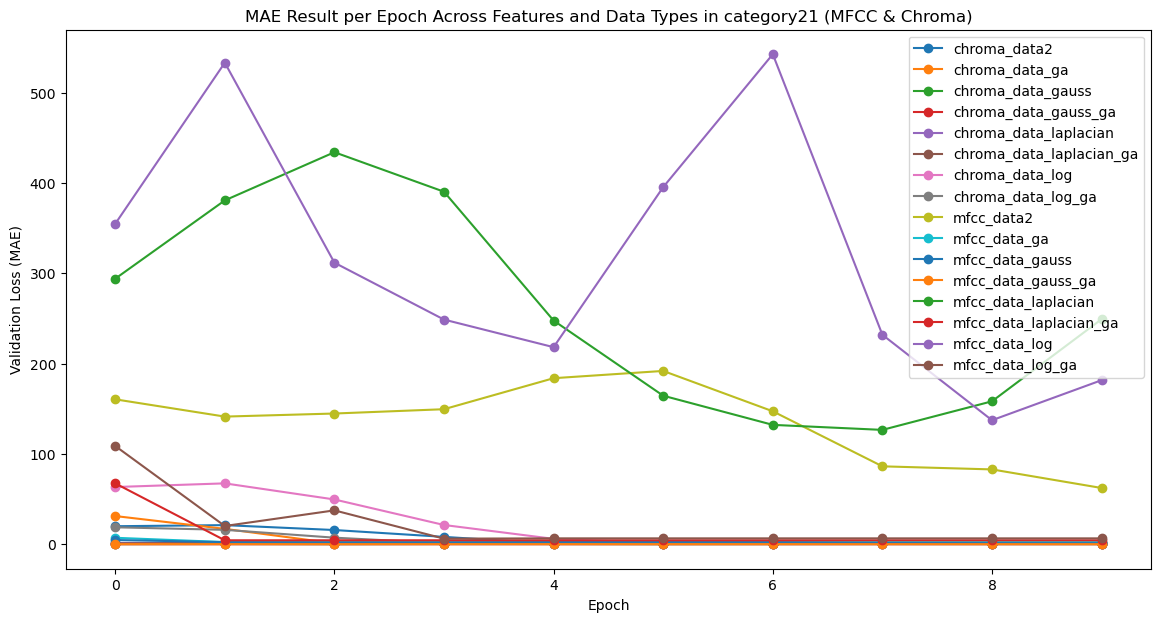

MAE Result : 0.49431711435317993, feature : chroma_data2
MAE Result : 0.9399980306625366, feature : chroma_data_ga
MAE Result : 0.06224960461258888, feature : chroma_data_gauss
MAE Result : 0.005782179534435272, feature : chroma_data_gauss_ga
MAE Result : 0.3668855130672455, feature : chroma_data_laplacian
MAE Result : 0.41356727480888367, feature : chroma_data_laplacian_ga
MAE Result : 1.0855783224105835, feature : chroma_data_log
MAE Result : 1.075164556503296, feature : chroma_data_log_ga
MAE Result : 62.25383377075195, feature : mfcc_data2
MAE Result : 2.3427417278289795, feature : mfcc_data_ga
MAE Result : 1.1566001176834106, feature : mfcc_data_gauss
MAE Result : 0.0904260203242302, feature : mfcc_data_gauss_ga
MAE Result : 126.59190368652344, feature : mfcc_data_laplacian
MAE Result : 4.340227127075195, feature : mfcc_data_laplacian_ga
MAE Result : 137.2891082763672, feature : mfcc_data_log
MAE Result : 6.172967910766602, feature : mfcc_data_log_ga


In [ ]:
#MFCC-CHROMA

def process_features(data, feature_type):
    if feature_type == 'stft':
        return librosa.istft(data)
    elif feature_type in ['mfcc', 'chroma']:
        if data.ndim == 2:
            return data.reshape(data.shape[0], data.shape[1], 1)
        else:
            return data
    else:
        raise ValueError("Unsupported feature type")

def create_sequences(data, seq_length):
    X, Y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        Y.append(data[i + seq_length])
    return np.array(X), np.array(Y)

feature_types = ['chroma', 'mfcc']
data_names = ['data2', 'data_ga', 'data_gauss', 'data_gauss_ga', 'data_laplacian',
              'data_laplacian_ga', 'data_log', 'data_log_ga']

mse_results = {}
losses_over_epochs = {}

for feature_type in feature_types:
    hdf5_file_path = f'cat_{feature_type}_features21.h5'
    with h5py.File(hdf5_file_path, 'r+') as hdf5_file:
        for data_name in tqdm(data_names, desc=f"Processing {feature_type}"):
            data = hdf5_file[data_name][:]

            if data.ndim == 2 and data.shape[0] > 0:
                data = np.expand_dims(data, axis=-1)

                t, y = process_features(data, feature_type), np.roll(data, -1, axis=0)
                t, y = t[:-1], y[:-1]

                if len(t) > 10:
                    X_train, y_train = create_sequences(t, 2)
                    X_test, y_test = create_sequences(y, 2)

                    if X_train.size > 0 and X_test.size > 0:
                        model = Sequential([
                            Conv1D(8, 1, activation='relu', input_shape=(2, data.shape[1])),
                            MaxPooling1D(2),
                            Flatten(),
                            Dense(50, activation='relu'),
                            Dense(1)
                        ])
                        model.compile(optimizer='adam', loss="mean_absolute_error")
                        history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test), verbose=2)

            mse_results[f'{feature_type}_{data_name}'] = history.history['val_loss']
            print(f'MAE Result for {feature_type} {data_name}:', np.min(history.history['val_loss']))

plt.figure(figsize=(14, 7))
for key, losses in mse_results.items():
    plt.plot(losses, label=key, marker='o', linestyle='-')
plt.ylabel('Validation Loss (MAE)')
plt.xlabel('Epoch')
plt.title('MAE Result per Epoch Across Features and Data Types in category21 (MFCC & Chroma)')
plt.legend()
plt.show()


for key, losses in mse_results.items():
    los = np.min(losses)
    print(f'MAE Result : {los}, feature : {key}')


**CATEGORY 14**

Processing stft:   0%|          | 0/8 [00:00<?, ?it/s]/Users/indraawal/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/10
503643/503643 - 185s - 367us/step - loss: 1.3842e-04 - val_loss: 1.6131e-04
Epoch 2/10
503643/503643 - 169s - 336us/step - loss: 1.3536e-04 - val_loss: 1.6158e-04
Epoch 3/10
503643/503643 - 169s - 335us/step - loss: 1.3531e-04 - val_loss: 1.6274e-04
Epoch 4/10
503643/503643 - 170s - 337us/step - loss: 1.3518e-04 - val_loss: 1.6883e-04
Epoch 5/10
503643/503643 - 169s - 336us/step - loss: 1.3516e-04 - val_loss: 1.6562e-04
Epoch 6/10
503643/503643 - 169s - 335us/step - loss: 1.3521e-04 - val_loss: 1.5796e-04
Epoch 7/10
503643/503643 - 169s - 336us/step - loss: 1.3504e-04 - val_loss: 1.6967e-04
Epoch 8/10
503643/503643 - 169s - 335us/step - loss: 1.3513e-04 - val_loss: 1.6089e-04
Epoch 9/10
503643/503643 - 170s - 337us/step - loss: 1.3519e-04 - val_loss: 1.5843e-04
Epoch 10/10
503643/503643 - 169s - 336us/step - loss: 1.3508e-04 - val_loss: 1.6069e-04


Processing stft:  12%|█▎        | 1/8 [28:55<3:22:26, 1735.22s/it]

Validation loss for stft data2: 0.0001579633099026978
Epoch 1/10
251104/251104 - 84s - 334us/step - loss: 7.9969e-05 - val_loss: 8.6228e-05
Epoch 2/10
251104/251104 - 79s - 316us/step - loss: 7.5235e-05 - val_loss: 1.0832e-04
Epoch 3/10
251104/251104 - 79s - 316us/step - loss: 7.5000e-05 - val_loss: 3.7641e-05
Epoch 4/10
251104/251104 - 79s - 315us/step - loss: 7.5304e-05 - val_loss: 3.8954e-05
Epoch 5/10
251104/251104 - 79s - 316us/step - loss: 7.5080e-05 - val_loss: 1.5704e-04
Epoch 6/10
251104/251104 - 79s - 315us/step - loss: 7.4556e-05 - val_loss: 5.2212e-05
Epoch 7/10
251104/251104 - 79s - 316us/step - loss: 7.5073e-05 - val_loss: 9.9231e-05
Epoch 8/10
251104/251104 - 79s - 316us/step - loss: 7.5145e-05 - val_loss: 3.7629e-05
Epoch 9/10
251104/251104 - 79s - 316us/step - loss: 7.4785e-05 - val_loss: 1.0617e-04
Epoch 10/10
251104/251104 - 79s - 315us/step - loss: 7.5151e-05 - val_loss: 3.9891e-05


Processing stft:  25%|██▌       | 2/8 [42:23<1:58:58, 1189.76s/it]

Validation loss for stft data_ga: 3.762930282391608e-05
Epoch 1/10
503643/503643 - 178s - 353us/step - loss: 6.2738e-05 - val_loss: 5.7560e-05
Epoch 2/10
503643/503643 - 178s - 353us/step - loss: 6.2202e-05 - val_loss: 7.4429e-05
Epoch 3/10
503643/503643 - 178s - 353us/step - loss: 6.2217e-05 - val_loss: 5.8408e-05
Epoch 4/10
503643/503643 - 178s - 353us/step - loss: 6.2095e-05 - val_loss: 5.8214e-05
Epoch 5/10
503643/503643 - 178s - 353us/step - loss: 6.2265e-05 - val_loss: 6.2740e-05
Epoch 6/10
503643/503643 - 178s - 353us/step - loss: 6.2126e-05 - val_loss: 7.1052e-05
Epoch 7/10
503643/503643 - 170s - 337us/step - loss: 6.2288e-05 - val_loss: 8.8576e-05
Epoch 8/10
503643/503643 - 170s - 337us/step - loss: 6.2088e-05 - val_loss: 9.1637e-05
Epoch 9/10
503643/503643 - 171s - 340us/step - loss: 6.2295e-05 - val_loss: 5.7370e-05
Epoch 10/10
503643/503643 - 170s - 337us/step - loss: 6.2160e-05 - val_loss: 8.9671e-05


Processing stft:  38%|███▊      | 3/8 [1:11:52<2:01:11, 1454.34s/it]

Validation loss for stft data_gauss: 5.7370387366972864e-05
Epoch 1/10
251294/251294 - 86s - 343us/step - loss: 5.9316e-05 - val_loss: 8.0940e-05
Epoch 2/10
251294/251294 - 86s - 343us/step - loss: 5.9042e-05 - val_loss: 6.8371e-05
Epoch 3/10
251294/251294 - 86s - 342us/step - loss: 5.9544e-05 - val_loss: 7.9923e-05
Epoch 4/10
251294/251294 - 86s - 342us/step - loss: 5.9517e-05 - val_loss: 4.9149e-05
Epoch 5/10
251294/251294 - 86s - 343us/step - loss: 5.8968e-05 - val_loss: 7.0285e-05
Epoch 6/10
251294/251294 - 86s - 342us/step - loss: 5.9781e-05 - val_loss: 7.9973e-05
Epoch 7/10
251294/251294 - 86s - 343us/step - loss: 5.9521e-05 - val_loss: 7.8889e-05
Epoch 8/10
251294/251294 - 86s - 342us/step - loss: 5.9227e-05 - val_loss: 8.3964e-05
Epoch 9/10
251294/251294 - 86s - 343us/step - loss: 5.9140e-05 - val_loss: 8.8880e-05
Epoch 10/10
251294/251294 - 86s - 343us/step - loss: 5.9546e-05 - val_loss: 7.7001e-05


Processing stft:  50%|█████     | 4/8 [1:26:23<1:21:36, 1224.19s/it]

Validation loss for stft data_gauss_ga: 4.914920646115206e-05
Epoch 1/10
503643/503643 - 174s - 346us/step - loss: 1.5193e-04 - val_loss: 1.8267e-04
Epoch 2/10
503643/503643 - 174s - 345us/step - loss: 1.4898e-04 - val_loss: 1.7736e-04
Epoch 3/10
503643/503643 - 173s - 343us/step - loss: 1.4888e-04 - val_loss: 1.8265e-04
Epoch 4/10
503643/503643 - 170s - 337us/step - loss: 1.4877e-04 - val_loss: 1.9189e-04
Epoch 5/10
503643/503643 - 169s - 336us/step - loss: 1.4878e-04 - val_loss: 1.9060e-04
Epoch 6/10
503643/503643 - 170s - 337us/step - loss: 1.4874e-04 - val_loss: 1.7794e-04
Epoch 7/10
503643/503643 - 169s - 336us/step - loss: 1.4876e-04 - val_loss: 1.7723e-04
Epoch 8/10
503643/503643 - 169s - 336us/step - loss: 1.4871e-04 - val_loss: 1.7941e-04
Epoch 9/10
503643/503643 - 169s - 336us/step - loss: 1.4879e-04 - val_loss: 1.8413e-04
Epoch 10/10
503643/503643 - 169s - 335us/step - loss: 1.4875e-04 - val_loss: 2.0111e-04


Processing stft:  62%|██████▎   | 5/8 [1:55:12<1:10:18, 1406.18s/it]

Validation loss for stft data_laplacian: 0.0001772333780536428
Epoch 1/10
251820/251820 - 87s - 346us/step - loss: 1.0750e-04 - val_loss: 1.1237e-04
Epoch 2/10
251820/251820 - 87s - 346us/step - loss: 1.0180e-04 - val_loss: 1.1426e-04
Epoch 3/10
251820/251820 - 87s - 347us/step - loss: 1.0155e-04 - val_loss: 1.1979e-04
Epoch 4/10
251820/251820 - 87s - 346us/step - loss: 1.0141e-04 - val_loss: 1.2663e-04
Epoch 5/10
251820/251820 - 87s - 346us/step - loss: 1.0136e-04 - val_loss: 1.1893e-04
Epoch 6/10
251820/251820 - 87s - 346us/step - loss: 1.0114e-04 - val_loss: 1.1046e-04
Epoch 7/10
251820/251820 - 87s - 347us/step - loss: 1.0140e-04 - val_loss: 1.1735e-04
Epoch 8/10
251820/251820 - 87s - 346us/step - loss: 1.0104e-04 - val_loss: 1.1032e-04
Epoch 9/10
251820/251820 - 87s - 346us/step - loss: 1.0132e-04 - val_loss: 1.1368e-04
Epoch 10/10
251820/251820 - 87s - 347us/step - loss: 1.0112e-04 - val_loss: 1.1481e-04


Processing stft:  75%|███████▌  | 6/8 [2:09:55<40:56, 1228.10s/it]  

Validation loss for stft data_laplacian_ga: 0.00011032071051886305
Epoch 1/10
503643/503643 - 177s - 351us/step - loss: 1.6639e-04 - val_loss: 2.0038e-04
Epoch 2/10
503643/503643 - 177s - 351us/step - loss: 1.6340e-04 - val_loss: 2.1897e-04
Epoch 3/10
503643/503643 - 176s - 350us/step - loss: 1.6341e-04 - val_loss: 2.0257e-04
Epoch 4/10
503643/503643 - 177s - 351us/step - loss: 1.6313e-04 - val_loss: 2.5094e-04
Epoch 5/10
503643/503643 - 178s - 353us/step - loss: 1.6327e-04 - val_loss: 1.9821e-04
Epoch 6/10
503643/503643 - 177s - 351us/step - loss: 1.6331e-04 - val_loss: 2.0480e-04
Epoch 7/10
503643/503643 - 177s - 351us/step - loss: 1.6324e-04 - val_loss: 2.0189e-04
Epoch 8/10
503643/503643 - 177s - 351us/step - loss: 1.6313e-04 - val_loss: 1.9650e-04
Epoch 9/10
503643/503643 - 176s - 350us/step - loss: 1.6313e-04 - val_loss: 2.1266e-04
Epoch 10/10
503643/503643 - 177s - 351us/step - loss: 1.6312e-04 - val_loss: 1.9677e-04


Processing stft:  88%|████████▊ | 7/8 [2:39:44<23:31, 1411.76s/it]

Validation loss for stft data_log: 0.00019649720343295485
Epoch 1/10
251269/251269 - 87s - 346us/step - loss: 1.2146e-04 - val_loss: 1.6240e-04
Epoch 2/10
251269/251269 - 87s - 347us/step - loss: 1.1738e-04 - val_loss: 1.4267e-04
Epoch 3/10
251269/251269 - 87s - 347us/step - loss: 1.1721e-04 - val_loss: 1.4234e-04
Epoch 4/10
251269/251269 - 88s - 349us/step - loss: 1.1692e-04 - val_loss: 1.4573e-04
Epoch 5/10
251269/251269 - 88s - 348us/step - loss: 1.1676e-04 - val_loss: 1.3661e-04
Epoch 6/10
251269/251269 - 88s - 349us/step - loss: 1.1688e-04 - val_loss: 1.3719e-04
Epoch 7/10
251269/251269 - 88s - 349us/step - loss: 1.1689e-04 - val_loss: 1.3723e-04
Epoch 8/10
251269/251269 - 87s - 348us/step - loss: 1.1687e-04 - val_loss: 1.4092e-04
Epoch 9/10
251269/251269 - 88s - 349us/step - loss: 1.1702e-04 - val_loss: 1.5199e-04
Epoch 10/10
251269/251269 - 87s - 348us/step - loss: 1.1664e-04 - val_loss: 1.4439e-04


Processing stft: 100%|██████████| 8/8 [2:54:28<00:00, 1308.59s/it]

Validation loss for stft data_log_ga: 0.00013660843251273036


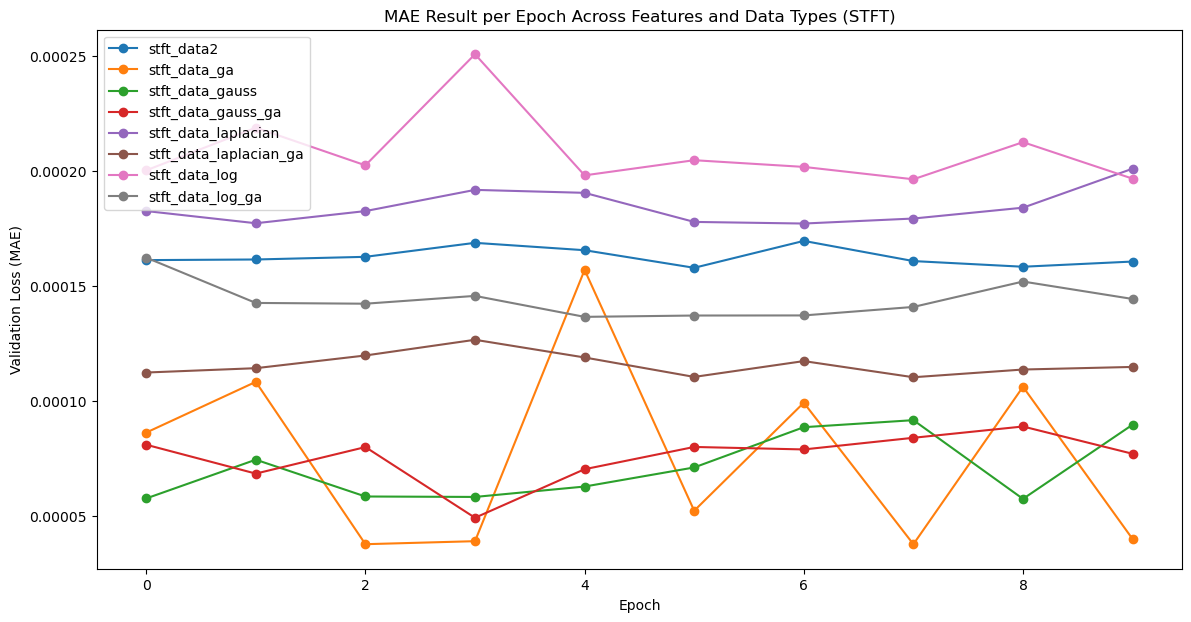

MAE Result : 0.0001579633099026978, feature : stft_data2
MAE Result : 3.762930282391608e-05, feature : stft_data_ga
MAE Result : 5.7370387366972864e-05, feature : stft_data_gauss
MAE Result : 4.914920646115206e-05, feature : stft_data_gauss_ga
MAE Result : 0.0001772333780536428, feature : stft_data_laplacian
MAE Result : 0.00011032071051886305, feature : stft_data_laplacian_ga
MAE Result : 0.00019649720343295485, feature : stft_data_log
MAE Result : 0.00013660843251273036, feature : stft_data_log_ga


In [ ]:
#STFT

def process_features(data, feature_type):
    if feature_type == 'stft':
        return librosa.istft(data)
    elif feature_type in ['mfcc', 'chroma']:
        return data
    else:
        raise ValueError("Unsupported feature type")

def create_sequences(data, seq_length):
    X, Y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        Y.append(data[i + seq_length])
    return np.array(X), np.array(Y)



feature_types = ['stft']
data_names = ['data2', 'data_ga', 'data_gauss', 'data_gauss_ga', 'data_laplacian',
              'data_laplacian_ga', 'data_log', 'data_log_ga']

mse_results = {}
losses_over_epochs = {}

for feature_type in feature_types:
    hdf5_file_path = f'cat_{feature_type}_features14.h5'
    with h5py.File(hdf5_file_path, 'r+') as hdf5_file:
        for data_name in tqdm(data_names, desc=f"Processing {feature_type}"):
            data = hdf5_file[data_name][:]
            t, y = process_features(data, feature_type), np.roll(data, -1)
            t, y = t[:-1], y[:-1]

            train_size = int(0.8 * len(t))
            train_data, test_data = t[:train_size], t[train_size:]
            train_labels, test_labels = y[:train_size], y[train_size:]

            X_train, y_train = create_sequences(train_data, 2)
            X_test, y_test = create_sequences(test_data, 2)

            X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
            X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

            model = Sequential([
                Conv1D(8, 1, activation='relu', input_shape=(2, 1)),
                MaxPooling1D(2),
                Flatten(),
                Dense(50, activation='relu'),
                Dense(1)
            ])
            model.compile(optimizer='adam', loss='mean_absolute_error')
            history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test), verbose=2)

            mse_results[f'{feature_type}_{data_name}'] = history.history['val_loss']
            print(f'Validation loss for {feature_type} {data_name}:', np.min(history.history['val_loss']))

plt.figure(figsize=(14, 7))
for key, losses in mse_results.items():
    plt.plot(losses, label=key, marker='o', linestyle='-')
plt.ylabel('Validation Loss (MAE)')
plt.xlabel('Epoch')
plt.title('MAE Result per Epoch Across Features and Data Types (STFT)')
plt.legend()
plt.show()

for key, losses in mse_results.items():
    los = np.min(losses)
    print(f'MAE Result : {los}, feature : {key}')

Processing chroma:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/10
1/1 - 1s - 613ms/step - loss: 0.1629 - val_loss: 0.9625
Epoch 2/10
1/1 - 0s - 73ms/step - loss: 0.9578 - val_loss: 0.9623
Epoch 3/10
1/1 - 0s - 72ms/step - loss: 0.9577 - val_loss: 0.9613
Epoch 4/10
1/1 - 0s - 71ms/step - loss: 0.9566 - val_loss: 0.9600
Epoch 5/10
1/1 - 0s - 72ms/step - loss: 0.9553 - val_loss: 0.9593
Epoch 6/10
1/1 - 0s - 74ms/step - loss: 0.9547 - val_loss: 0.9586
Epoch 7/10
1/1 - 0s - 77ms/step - loss: 0.9539 - val_loss: 0.9578
Epoch 8/10
1/1 - 0s - 80ms/step - loss: 0.9531 - val_loss: 0.9569
Epoch 9/10
1/1 - 0s - 78ms/step - loss: 0.9523 - val_loss: 0.9561
Epoch 10/10
1/1 - 0s - 77ms/step - loss: 0.9514 - val_loss: 0.9552


Processing chroma:  12%|█▎        | 1/8 [00:01<00:10,  1.47s/it]

MAE Result for chroma data2: 0.9551921486854553
Epoch 1/10
1/1 - 1s - 550ms/step - loss: 1.2853 - val_loss: 57.7113
Epoch 2/10
1/1 - 0s - 52ms/step - loss: 57.6242 - val_loss: 66.8114
Epoch 3/10
1/1 - 0s - 49ms/step - loss: 66.7219 - val_loss: 56.2326
Epoch 4/10
1/1 - 0s - 49ms/step - loss: 56.1710 - val_loss: 36.6824
Epoch 5/10
1/1 - 0s - 48ms/step - loss: 36.6455 - val_loss: 13.3531
Epoch 6/10
1/1 - 0s - 45ms/step - loss: 13.3425 - val_loss: 0.9642
Epoch 7/10
1/1 - 0s - 45ms/step - loss: 0.9595 - val_loss: 0.9648
Epoch 8/10
1/1 - 0s - 49ms/step - loss: 0.9602 - val_loss: 0.9647
Epoch 9/10
1/1 - 0s - 47ms/step - loss: 0.9601 - val_loss: 0.9640
Epoch 10/10
1/1 - 0s - 49ms/step - loss: 0.9594 - val_loss: 0.9628


Processing chroma:  25%|██▌       | 2/8 [00:02<00:07,  1.24s/it]

MAE Result for chroma data_ga: 0.9628468751907349
Epoch 1/10
1/1 - 1s - 588ms/step - loss: 0.0106 - val_loss: 1.6416
Epoch 2/10
1/1 - 0s - 70ms/step - loss: 1.5731 - val_loss: 2.5615
Epoch 3/10
1/1 - 0s - 76ms/step - loss: 2.1677 - val_loss: 1.3830
Epoch 4/10
1/1 - 0s - 80ms/step - loss: 1.0785 - val_loss: 0.4695
Epoch 5/10
1/1 - 0s - 79ms/step - loss: 0.3506 - val_loss: 0.5079
Epoch 6/10
1/1 - 0s - 75ms/step - loss: 0.4948 - val_loss: 0.7308
Epoch 7/10
1/1 - 0s - 80ms/step - loss: 0.7659 - val_loss: 0.7484
Epoch 8/10
1/1 - 0s - 79ms/step - loss: 0.8053 - val_loss: 0.5934
Epoch 9/10
1/1 - 0s - 79ms/step - loss: 0.6887 - val_loss: 0.4478
Epoch 10/10
1/1 - 0s - 79ms/step - loss: 0.5933 - val_loss: 0.5042


Processing chroma:  38%|███▊      | 3/8 [00:03<00:06,  1.30s/it]

MAE Result for chroma data_gauss: 0.44780704379081726
Epoch 1/10
1/1 - 1s - 576ms/step - loss: 0.0087 - val_loss: 0.2461
Epoch 2/10
1/1 - 0s - 49ms/step - loss: 0.2458 - val_loss: 0.1866
Epoch 3/10
1/1 - 0s - 48ms/step - loss: 0.1856 - val_loss: 0.0739
Epoch 4/10
1/1 - 0s - 48ms/step - loss: 0.0729 - val_loss: 0.0096
Epoch 5/10
1/1 - 0s - 56ms/step - loss: 0.0098 - val_loss: 0.0106
Epoch 6/10
1/1 - 0s - 51ms/step - loss: 0.0108 - val_loss: 0.0111
Epoch 7/10
1/1 - 0s - 56ms/step - loss: 0.0112 - val_loss: 0.0111
Epoch 8/10
1/1 - 0s - 54ms/step - loss: 0.0112 - val_loss: 0.0108
Epoch 9/10
1/1 - 0s - 57ms/step - loss: 0.0109 - val_loss: 0.0103
Epoch 10/10
1/1 - 0s - 56ms/step - loss: 0.0105 - val_loss: 0.0097


Processing chroma:  50%|█████     | 4/8 [00:05<00:04,  1.24s/it]

MAE Result for chroma data_gauss_ga: 0.009647763334214687
Epoch 1/10
1/1 - 1s - 748ms/step - loss: 0.1282 - val_loss: 5.8702
Epoch 2/10
1/1 - 0s - 81ms/step - loss: 2.8517 - val_loss: 6.3066
Epoch 3/10
1/1 - 0s - 84ms/step - loss: 2.5827 - val_loss: 5.1684
Epoch 4/10
1/1 - 0s - 84ms/step - loss: 1.7762 - val_loss: 5.3859
Epoch 5/10
1/1 - 0s - 84ms/step - loss: 1.7612 - val_loss: 5.0862
Epoch 6/10
1/1 - 0s - 94ms/step - loss: 1.4646 - val_loss: 4.8024
Epoch 7/10
1/1 - 0s - 82ms/step - loss: 1.2615 - val_loss: 4.6596
Epoch 8/10
1/1 - 0s - 85ms/step - loss: 1.1017 - val_loss: 4.4571
Epoch 9/10
1/1 - 0s - 87ms/step - loss: 0.9436 - val_loss: 4.0421
Epoch 10/10
1/1 - 0s - 84ms/step - loss: 0.6754 - val_loss: 3.4832


Processing chroma:  62%|██████▎   | 5/8 [00:06<00:04,  1.38s/it]

MAE Result for chroma data_laplacian: 3.483217239379883
Epoch 1/10
1/1 - 1s - 629ms/step - loss: 0.3193 - val_loss: 3.4957
Epoch 2/10
1/1 - 0s - 54ms/step - loss: 3.9128 - val_loss: 3.1958
Epoch 3/10
1/1 - 0s - 53ms/step - loss: 3.4833 - val_loss: 2.0120
Epoch 4/10
1/1 - 0s - 51ms/step - loss: 2.0344 - val_loss: 0.8708
Epoch 5/10
1/1 - 0s - 51ms/step - loss: 0.5805 - val_loss: 0.5617
Epoch 6/10
1/1 - 0s - 51ms/step - loss: 0.2559 - val_loss: 0.0714
Epoch 7/10
1/1 - 0s - 51ms/step - loss: 0.0862 - val_loss: 0.0662
Epoch 8/10
1/1 - 0s - 54ms/step - loss: 0.0874 - val_loss: 0.0646
Epoch 9/10
1/1 - 0s - 52ms/step - loss: 0.0858 - val_loss: 0.0632
Epoch 10/10
1/1 - 0s - 51ms/step - loss: 0.0843 - val_loss: 0.0620


Processing chroma:  75%|███████▌  | 6/8 [00:07<00:02,  1.32s/it]

MAE Result for chroma data_laplacian_ga: 0.0619560144841671
Epoch 1/10
1/1 - 1s - 573ms/step - loss: 1.0495 - val_loss: 24.2149
Epoch 2/10
1/1 - 0s - 79ms/step - loss: 24.3455 - val_loss: 12.3510
Epoch 3/10
1/1 - 0s - 72ms/step - loss: 12.6927 - val_loss: 2.8822
Epoch 4/10
1/1 - 0s - 71ms/step - loss: 2.0487 - val_loss: 1.4211
Epoch 5/10
1/1 - 0s - 76ms/step - loss: 1.4106 - val_loss: 1.0812
Epoch 6/10
1/1 - 0s - 74ms/step - loss: 1.0707 - val_loss: 1.0809
Epoch 7/10
1/1 - 0s - 77ms/step - loss: 1.0703 - val_loss: 1.0797
Epoch 8/10
1/1 - 0s - 76ms/step - loss: 1.0692 - val_loss: 1.0784
Epoch 9/10
1/1 - 0s - 74ms/step - loss: 1.0679 - val_loss: 1.0769
Epoch 10/10
1/1 - 0s - 74ms/step - loss: 1.0664 - val_loss: 1.0752


Processing chroma:  88%|████████▊ | 7/8 [00:09<00:01,  1.33s/it]

MAE Result for chroma data_log: 1.0752454996109009
Epoch 1/10
1/1 - 1s - 596ms/step - loss: 1.9386 - val_loss: 1.0775
Epoch 2/10
1/1 - 0s - 50ms/step - loss: 1.0669 - val_loss: 1.0735
Epoch 3/10
1/1 - 0s - 51ms/step - loss: 1.0630 - val_loss: 1.0695
Epoch 4/10
1/1 - 0s - 47ms/step - loss: 1.0590 - val_loss: 1.0655
Epoch 5/10
1/1 - 0s - 51ms/step - loss: 1.0550 - val_loss: 1.0615
Epoch 6/10
1/1 - 0s - 52ms/step - loss: 1.0509 - val_loss: 1.0574
Epoch 7/10
1/1 - 0s - 52ms/step - loss: 1.0469 - val_loss: 1.0534
Epoch 8/10
1/1 - 0s - 54ms/step - loss: 1.0429 - val_loss: 1.0493
Epoch 9/10
1/1 - 0s - 52ms/step - loss: 1.0388 - val_loss: 1.0453
Epoch 10/10
1/1 - 0s - 51ms/step - loss: 1.0348 - val_loss: 1.0412


Processing chroma: 100%|██████████| 8/8 [00:10<00:00,  1.30s/it]


MAE Result for chroma data_log_ga: 1.0412232875823975


Processing mfcc:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/10
2/2 - 13s - 6s/step - loss: 471.8832 - val_loss: 1136.3198
Epoch 2/10
2/2 - 6s - 3s/step - loss: 1688.2382 - val_loss: 614.7759
Epoch 3/10
2/2 - 3s - 2s/step - loss: 667.1608 - val_loss: 409.6732
Epoch 4/10
2/2 - 3s - 1s/step - loss: 403.7394 - val_loss: 331.9401
Epoch 5/10
2/2 - 3s - 2s/step - loss: 283.4356 - val_loss: 84.1365
Epoch 6/10
2/2 - 5s - 3s/step - loss: 133.4641 - val_loss: 246.0927
Epoch 7/10
2/2 - 6s - 3s/step - loss: 243.6257 - val_loss: 165.5997
Epoch 8/10
2/2 - 4s - 2s/step - loss: 144.0074 - val_loss: 155.6029
Epoch 9/10
2/2 - 3s - 1s/step - loss: 305.5935 - val_loss: 148.8187
Epoch 10/10
2/2 - 3s - 2s/step - loss: 163.2478 - val_loss: 192.8286


Processing mfcc:  12%|█▎        | 1/8 [00:56<06:34, 56.31s/it]

MAE Result for mfcc data2: 84.13646697998047
Epoch 1/10
2/2 - 2s - 1s/step - loss: 974.2928 - val_loss: 172.2450
Epoch 2/10
2/2 - 1s - 442ms/step - loss: 88.7060 - val_loss: 2.4554
Epoch 3/10
2/2 - 1s - 422ms/step - loss: 2.4850 - val_loss: 2.4525
Epoch 4/10
2/2 - 1s - 379ms/step - loss: 2.4815 - val_loss: 2.4480
Epoch 5/10
2/2 - 1s - 385ms/step - loss: 2.4768 - val_loss: 2.4427
Epoch 6/10
2/2 - 1s - 411ms/step - loss: 2.4714 - val_loss: 2.4369
Epoch 7/10
2/2 - 1s - 341ms/step - loss: 2.4654 - val_loss: 2.4307
Epoch 8/10
2/2 - 1s - 599ms/step - loss: 2.4591 - val_loss: 2.4243
Epoch 9/10
2/2 - 1s - 520ms/step - loss: 2.4526 - val_loss: 2.4177
Epoch 10/10
2/2 - 1s - 371ms/step - loss: 2.4459 - val_loss: 2.4110


Processing mfcc:  25%|██▌       | 2/8 [01:07<02:56, 29.49s/it]

MAE Result for mfcc data_ga: 2.4110350608825684
Epoch 1/10
2/2 - 13s - 7s/step - loss: 4.8619 - val_loss: 9.6407
Epoch 2/10
2/2 - 8s - 4s/step - loss: 9.7333 - val_loss: 12.2458
Epoch 3/10
2/2 - 3s - 1s/step - loss: 10.1335 - val_loss: 5.7888
Epoch 4/10
2/2 - 3s - 1s/step - loss: 6.4108 - val_loss: 4.2445
Epoch 5/10
2/2 - 3s - 1s/step - loss: 4.4948 - val_loss: 4.4974
Epoch 6/10
2/2 - 3s - 1s/step - loss: 4.7861 - val_loss: 4.3945
Epoch 7/10
2/2 - 3s - 1s/step - loss: 4.0992 - val_loss: 4.9958
Epoch 8/10
2/2 - 4s - 2s/step - loss: 4.2449 - val_loss: 3.5616
Epoch 9/10
2/2 - 3s - 2s/step - loss: 4.2380 - val_loss: 2.8321
Epoch 10/10
2/2 - 2s - 1s/step - loss: 2.7863 - val_loss: 3.0931
MAE Result for mfcc data_gauss:

Processing mfcc:  38%|███▊      | 3/8 [01:55<03:11, 38.21s/it]

 2.8320765495300293
Epoch 1/10
2/2 - 2s - 837ms/step - loss: 2.3888 - val_loss: 8.7676
Epoch 2/10
2/2 - 1s - 525ms/step - loss: 11.3674 - val_loss: 5.8038
Epoch 3/10
2/2 - 1s - 328ms/step - loss: 4.9188 - val_loss: 2.2431
Epoch 4/10
2/2 - 1s - 287ms/step - loss: 3.6271 - val_loss: 3.2492
Epoch 5/10
2/2 - 1s - 319ms/step - loss: 2.3400 - val_loss: 2.9654
Epoch 6/10
2/2 - 1s - 327ms/step - loss: 2.7047 - val_loss: 0.8426
Epoch 7/10
2/2 - 1s - 370ms/step - loss: 1.4932 - val_loss: 0.8085
Epoch 8/10
2/2 - 1s - 393ms/step - loss: 1.3938 - val_loss: 2.4903
Epoch 9/10
2/2 - 1s - 467ms/step - loss: 1.7028 - val_loss: 2.8481
Epoch 10/10
2/2 - 1s - 444ms/step - loss: 3.1810 - val_loss: 2.2681


Processing mfcc:  50%|█████     | 4/8 [02:04<01:47, 26.80s/it]

MAE Result for mfcc data_gauss_ga: 0.8085124492645264
Epoch 1/10
2/2 - 13s - 6s/step - loss: 663.7737 - val_loss: 786.7419
Epoch 2/10
2/2 - 8s - 4s/step - loss: 3291.5359 - val_loss: 346.3595
Epoch 3/10
2/2 - 3s - 2s/step - loss: 2109.3740 - val_loss: 630.1816
Epoch 4/10
2/2 - 2s - 1s/step - loss: 1172.8356 - val_loss: 1287.3087
Epoch 5/10
2/2 - 4s - 2s/step - loss: 3512.7688 - val_loss: 1677.7028
Epoch 6/10
2/2 - 3s - 2s/step - loss: 2373.6245 - val_loss: 2173.8083
Epoch 7/10
2/2 - 3s - 2s/step - loss: 5271.6597 - val_loss: 2556.7646
Epoch 8/10
2/2 - 4s - 2s/step - loss: 5794.8604 - val_loss: 1831.5264
Epoch 9/10
2/2 - 5s - 2s/step - loss: 4014.4250 - val_loss: 923.0495
Epoch 10/10
2/2 - 5s - 2s/step - loss: 1121.8313 - val_loss: 440.9713


Processing mfcc:  62%|██████▎   | 5/8 [02:57<01:48, 36.04s/it]

MAE Result for mfcc data_laplacian: 346.3594665527344
Epoch 1/10
2/2 - 1s - 739ms/step - loss: 486.2576 - val_loss: 394.9808
Epoch 2/10
2/2 - 1s - 280ms/step - loss: 695.7211 - val_loss: 131.1260
Epoch 3/10
2/2 - 1s - 326ms/step - loss: 119.7138 - val_loss: 9.0201
Epoch 4/10
2/2 - 1s - 356ms/step - loss: 10.2245 - val_loss: 12.4821
Epoch 5/10
2/2 - 1s - 462ms/step - loss: 12.8356 - val_loss: 12.9679
Epoch 6/10
2/2 - 1s - 354ms/step - loss: 12.7106 - val_loss: 11.1919
Epoch 7/10
2/2 - 1s - 386ms/step - loss: 10.5761 - val_loss: 8.7120
Epoch 8/10
2/2 - 1s - 345ms/step - loss: 8.2479 - val_loss: 6.9432
Epoch 9/10
2/2 - 1s - 316ms/step - loss: 6.7416 - val_loss: 5.8067
Epoch 10/10
2/2 - 1s - 326ms/step - loss: 5.8369 - val_loss: 5.8862


Processing mfcc:  75%|███████▌  | 6/8 [03:05<00:53, 26.66s/it]

MAE Result for mfcc data_laplacian_ga: 5.806733131408691
Epoch 1/10
2/2 - 18s - 9s/step - loss: 1136.4636 - val_loss: 3160.6362
Epoch 2/10
2/2 - 10s - 5s/step - loss: 4045.3591 - val_loss: 1412.9241
Epoch 3/10
2/2 - 5s - 3s/step - loss: 1384.1393 - val_loss: 1077.3561
Epoch 4/10
2/2 - 3s - 1s/step - loss: 1176.2212 - val_loss: 1334.2437
Epoch 5/10
2/2 - 2s - 1s/step - loss: 2351.8638 - val_loss: 1335.9619
Epoch 6/10
2/2 - 3s - 1s/step - loss: 1271.4929 - val_loss: 1241.3038
Epoch 7/10
2/2 - 2s - 776ms/step - loss: 1667.8821 - val_loss: 1688.7716
Epoch 8/10
2/2 - 1s - 682ms/step - loss: 1823.1687 - val_loss: 1610.2897
Epoch 9/10
2/2 - 2s - 759ms/step - loss: 1726.8618 - val_loss: 1371.3054
Epoch 10/10
2/2 - 3s - 2s/step - loss: 1408.7373 - val_loss: 885.1771


Processing mfcc:  88%|████████▊ | 7/8 [03:58<00:35, 35.28s/it]

MAE Result for mfcc data_log: 885.1770629882812
Epoch 1/10
2/2 - 2s - 855ms/step - loss: 1077.7195 - val_loss: 923.1920
Epoch 2/10
2/2 - 1s - 727ms/step - loss: 1126.9661 - val_loss: 6.6576
Epoch 3/10
2/2 - 0s - 225ms/step - loss: 6.7280 - val_loss: 6.6564
Epoch 4/10
2/2 - 1s - 259ms/step - loss: 6.7263 - val_loss: 6.6534
Epoch 5/10
2/2 - 1s - 290ms/step - loss: 6.7231 - val_loss: 6.6500
Epoch 6/10
2/2 - 1s - 288ms/step - loss: 6.7197 - val_loss: 6.6468
Epoch 7/10
2/2 - 1s - 289ms/step - loss: 6.7166 - val_loss: 6.6435
Epoch 8/10
2/2 - 1s - 319ms/step - loss: 6.7132 - val_loss: 6.6400
Epoch 9/10
2/2 - 1s - 330ms/step - loss: 6.7097 - val_loss: 6.6364
Epoch 10/10
2/2 - 1s - 364ms/step - loss: 6.7061 - val_loss: 6.6328


Processing mfcc: 100%|██████████| 8/8 [04:07<00:00, 30.93s/it]

MAE Result for mfcc data_log_ga: 6.632776737213135


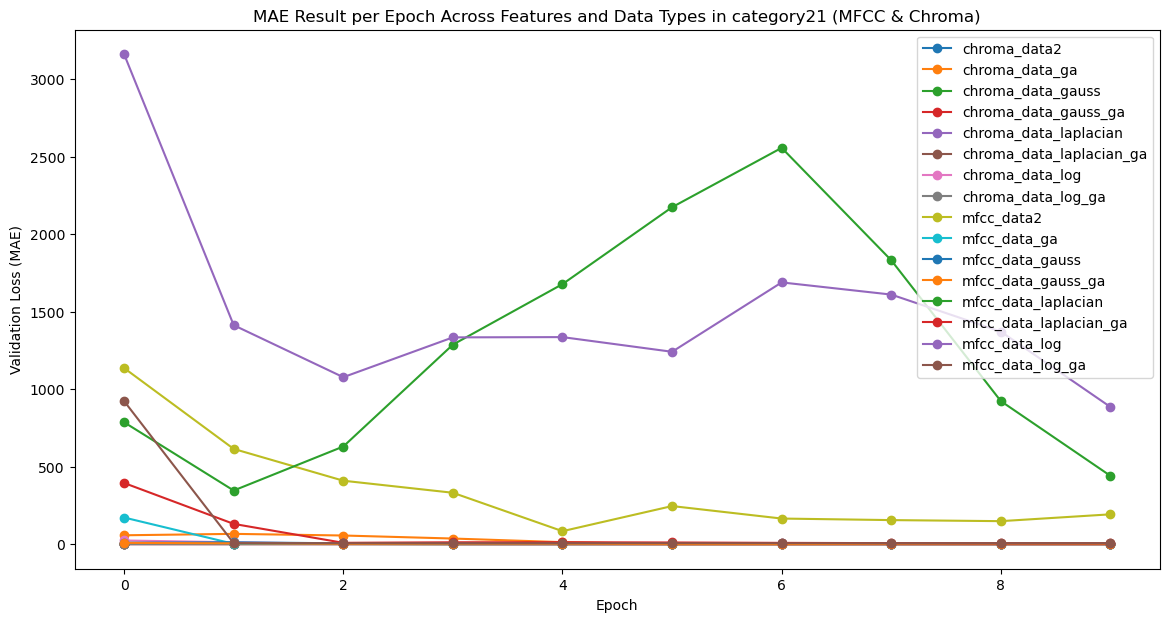

MAE Result : 0.9551921486854553, feature : chroma_data2
MAE Result : 0.9628468751907349, feature : chroma_data_ga
MAE Result : 0.44780704379081726, feature : chroma_data_gauss
MAE Result : 0.009647763334214687, feature : chroma_data_gauss_ga
MAE Result : 3.483217239379883, feature : chroma_data_laplacian
MAE Result : 0.0619560144841671, feature : chroma_data_laplacian_ga
MAE Result : 1.0752454996109009, feature : chroma_data_log
MAE Result : 1.0412232875823975, feature : chroma_data_log_ga
MAE Result : 84.13646697998047, feature : mfcc_data2
MAE Result : 2.4110350608825684, feature : mfcc_data_ga
MAE Result : 2.8320765495300293, feature : mfcc_data_gauss
MAE Result : 0.8085124492645264, feature : mfcc_data_gauss_ga
MAE Result : 346.3594665527344, feature : mfcc_data_laplacian
MAE Result : 5.806733131408691, feature : mfcc_data_laplacian_ga
MAE Result : 885.1770629882812, feature : mfcc_data_log
MAE Result : 6.632776737213135, feature : mfcc_data_log_ga


In [ ]:
#MFCC-CHROMA


def process_features(data, feature_type):
    if feature_type == 'stft':
        return librosa.istft(data)
    elif feature_type in ['mfcc', 'chroma']:

        if data.ndim == 2:
            return data.reshape(data.shape[0], data.shape[1], 1)
        else:
            return data
    else:
        raise ValueError("Unsupported feature type")

def create_sequences(data, seq_length):
    X, Y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        Y.append(data[i + seq_length])
    return np.array(X), np.array(Y)

feature_types = ['chroma', 'mfcc']
data_names = ['data2', 'data_ga', 'data_gauss', 'data_gauss_ga', 'data_laplacian',
              'data_laplacian_ga', 'data_log', 'data_log_ga']

mse_results = {}
losses_over_epochs = {}

for feature_type in feature_types:
    hdf5_file_path = f'cat_{feature_type}_features14.h5'
    with h5py.File(hdf5_file_path, 'r+') as hdf5_file:
        for data_name in tqdm(data_names, desc=f"Processing {feature_type}"):
            data = hdf5_file[data_name][:]

            if data.ndim == 2 and data.shape[0] > 0:
                data = np.expand_dims(data, axis=-1)

                t, y = process_features(data, feature_type), np.roll(data, -1, axis=0)
                t, y = t[:-1], y[:-1]

                if len(t) > 10:
                    X_train, y_train = create_sequences(t, 2)
                    X_test, y_test = create_sequences(y, 2)

                    if X_train.size > 0 and X_test.size > 0:
                        model = Sequential([
                            Conv1D(8, 1, activation='relu', input_shape=(2, data.shape[1])),
                            MaxPooling1D(2),
                            Flatten(),
                            Dense(50, activation='relu'),
                            Dense(1)
                        ])
                        model.compile(optimizer='adam', loss="mean_absolute_error")
                        history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test), verbose=2)

            mse_results[f'{feature_type}_{data_name}'] = history.history['val_loss']
            print(f'MAE Result for {feature_type} {data_name}:', np.min(history.history['val_loss']))

plt.figure(figsize=(14, 7))
for key, losses in mse_results.items():
    plt.plot(losses, label=key, marker='o', linestyle='-')
plt.ylabel('Validation Loss (MAE)')
plt.xlabel('Epoch')
plt.title('MAE Result per Epoch Across Features and Data Types in category21 (MFCC & Chroma)')
plt.legend()
plt.show()


for key, losses in mse_results.items():
    los = np.min(losses)
    print(f'MAE Result : {los}, feature : {key}')


**CATEGORY 7**

Processing stft:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/10
503643/503643 - 173s - 344us/step - loss: 1.3778e-04 - val_loss: 1.5787e-04
Epoch 2/10
503643/503643 - 173s - 343us/step - loss: 1.3545e-04 - val_loss: 1.8627e-04
Epoch 3/10
503643/503643 - 173s - 344us/step - loss: 1.3541e-04 - val_loss: 1.8714e-04
Epoch 4/10
503643/503643 - 174s - 346us/step - loss: 1.3531e-04 - val_loss: 1.5763e-04
Epoch 5/10
503643/503643 - 173s - 343us/step - loss: 1.3529e-04 - val_loss: 1.6627e-04
Epoch 6/10
503643/503643 - 173s - 344us/step - loss: 1.3517e-04 - val_loss: 1.5811e-04
Epoch 7/10
503643/503643 - 173s - 343us/step - loss: 1.3523e-04 - val_loss: 1.5770e-04
Epoch 8/10
503643/503643 - 170s - 337us/step - loss: 1.3516e-04 - val_loss: 1.6361e-04
Epoch 9/10
503643/503643 - 171s - 339us/step - loss: 1.3498e-04 - val_loss: 1.6112e-04
Epoch 10/10
503643/503643 - 170s - 337us/step - loss: 1.3513e-04 - val_loss: 1.8740e-04


Processing stft:  12%|█▎        | 1/8 [29:06<3:23:42, 1746.01s/it]

Validation loss for stft data2: 0.0001576283830218017
Epoch 1/10
251104/251104 - 84s - 334us/step - loss: 7.8930e-05 - val_loss: 1.7186e-04
Epoch 2/10
251104/251104 - 84s - 335us/step - loss: 7.4496e-05 - val_loss: 2.0480e-04
Epoch 3/10
251104/251104 - 84s - 335us/step - loss: 7.3361e-05 - val_loss: 7.0866e-05
Epoch 4/10
251104/251104 - 84s - 335us/step - loss: 7.2730e-05 - val_loss: 1.2435e-04
Epoch 5/10
251104/251104 - 84s - 335us/step - loss: 7.4081e-05 - val_loss: 1.5007e-04
Epoch 6/10
251104/251104 - 84s - 336us/step - loss: 7.2111e-05 - val_loss: 1.4732e-04
Epoch 7/10
251104/251104 - 84s - 335us/step - loss: 7.3068e-05 - val_loss: 3.8187e-05
Epoch 8/10
251104/251104 - 88s - 351us/step - loss: 7.2590e-05 - val_loss: 5.5563e-05
Epoch 9/10
251104/251104 - 84s - 335us/step - loss: 7.2871e-05 - val_loss: 1.0081e-04
Epoch 10/10
251104/251104 - 84s - 336us/step - loss: 7.3071e-05 - val_loss: 6.1786e-05


Processing stft:  25%|██▌       | 2/8 [43:20<2:02:10, 1221.74s/it]

Validation loss for stft data_ga: 3.8186557503649965e-05
Epoch 1/10
503643/503643 - 174s - 346us/step - loss: 9.0147e-05 - val_loss: 6.5429e-05
Epoch 2/10
503643/503643 - 175s - 348us/step - loss: 9.2551e-05 - val_loss: 4.1455e-05
Epoch 3/10
503643/503643 - 172s - 342us/step - loss: 9.2654e-05 - val_loss: 6.6276e-05
Epoch 4/10
503643/503643 - 168s - 333us/step - loss: 9.2460e-05 - val_loss: 2.9226e-05
Epoch 5/10
503643/503643 - 168s - 333us/step - loss: 9.3022e-05 - val_loss: 6.2691e-05
Epoch 6/10
503643/503643 - 168s - 333us/step - loss: 9.3819e-05 - val_loss: 1.0128e-04
Epoch 7/10
503643/503643 - 168s - 333us/step - loss: 9.3743e-05 - val_loss: 3.6132e-05
Epoch 8/10
503643/503643 - 168s - 333us/step - loss: 9.2770e-05 - val_loss: 2.0182e-04
Epoch 9/10
503643/503643 - 168s - 333us/step - loss: 9.3443e-05 - val_loss: 2.1773e-05
Epoch 10/10
503643/503643 - 168s - 333us/step - loss: 9.3446e-05 - val_loss: 1.2719e-04


Processing stft:  38%|███▊      | 3/8 [1:11:58<2:00:40, 1448.11s/it]

Validation loss for stft data_gauss: 2.1772913896711543e-05
Epoch 1/10
251294/251294 - 84s - 336us/step - loss: 6.1764e-05 - val_loss: 7.2068e-05
Epoch 2/10
251294/251294 - 84s - 335us/step - loss: 5.9382e-05 - val_loss: 5.1456e-05
Epoch 3/10
251294/251294 - 84s - 333us/step - loss: 5.9318e-05 - val_loss: 8.5606e-05
Epoch 4/10
251294/251294 - 84s - 333us/step - loss: 5.9302e-05 - val_loss: 6.2767e-05
Epoch 5/10
251294/251294 - 84s - 334us/step - loss: 5.9390e-05 - val_loss: 5.4558e-05
Epoch 6/10
251294/251294 - 84s - 333us/step - loss: 5.9375e-05 - val_loss: 4.8029e-05
Epoch 7/10
251294/251294 - 84s - 334us/step - loss: 5.9311e-05 - val_loss: 8.0498e-05
Epoch 8/10
251294/251294 - 84s - 334us/step - loss: 5.9891e-05 - val_loss: 6.0549e-05
Epoch 9/10
251294/251294 - 84s - 335us/step - loss: 5.9160e-05 - val_loss: 5.3442e-05
Epoch 10/10
251294/251294 - 84s - 334us/step - loss: 5.9537e-05 - val_loss: 5.5723e-05


Processing stft:  50%|█████     | 4/8 [1:26:07<1:20:46, 1211.54s/it]

Validation loss for stft data_gauss_ga: 4.802884359378368e-05
Epoch 1/10
503643/503643 - 173s - 343us/step - loss: 1.4912e-04 - val_loss: 1.7882e-04
Epoch 2/10
503643/503643 - 172s - 342us/step - loss: 1.4614e-04 - val_loss: 1.7974e-04
Epoch 3/10
503643/503643 - 173s - 343us/step - loss: 1.4609e-04 - val_loss: 1.9817e-04
Epoch 4/10
503643/503643 - 172s - 342us/step - loss: 1.4611e-04 - val_loss: 1.8472e-04
Epoch 5/10
503643/503643 - 170s - 337us/step - loss: 1.4606e-04 - val_loss: 2.1825e-04
Epoch 6/10
503643/503643 - 168s - 334us/step - loss: 1.4591e-04 - val_loss: 1.9097e-04
Epoch 7/10
503643/503643 - 168s - 334us/step - loss: 1.4599e-04 - val_loss: 1.7581e-04
Epoch 8/10
503643/503643 - 168s - 333us/step - loss: 1.4599e-04 - val_loss: 1.8212e-04
Epoch 9/10
503643/503643 - 168s - 333us/step - loss: 1.4595e-04 - val_loss: 1.7570e-04
Epoch 10/10
503643/503643 - 168s - 334us/step - loss: 1.4589e-04 - val_loss: 2.0032e-04


Processing stft:  62%|██████▎   | 5/8 [1:54:49<1:09:46, 1395.65s/it]

Validation loss for stft data_laplacian: 0.00017570139607414603
Epoch 1/10
251820/251820 - 86s - 342us/step - loss: 1.0634e-04 - val_loss: 1.3485e-04
Epoch 2/10
251820/251820 - 86s - 341us/step - loss: 1.0148e-04 - val_loss: 1.1699e-04
Epoch 3/10
251820/251820 - 87s - 344us/step - loss: 1.0114e-04 - val_loss: 1.1432e-04
Epoch 4/10
251820/251820 - 86s - 341us/step - loss: 1.0100e-04 - val_loss: 1.4450e-04
Epoch 5/10
251820/251820 - 86s - 342us/step - loss: 1.0098e-04 - val_loss: 1.1385e-04
Epoch 6/10
251820/251820 - 86s - 342us/step - loss: 1.0091e-04 - val_loss: 1.1017e-04
Epoch 7/10
251820/251820 - 86s - 342us/step - loss: 1.0089e-04 - val_loss: 1.1046e-04
Epoch 8/10
251820/251820 - 86s - 341us/step - loss: 1.0082e-04 - val_loss: 1.1114e-04
Epoch 9/10
251820/251820 - 86s - 342us/step - loss: 1.0079e-04 - val_loss: 1.1914e-04
Epoch 10/10
251820/251820 - 86s - 341us/step - loss: 1.0098e-04 - val_loss: 1.2015e-04


Processing stft:  75%|███████▌  | 6/8 [2:09:19<40:33, 1216.90s/it]  

Validation loss for stft data_laplacian_ga: 0.00011016566713806242
Epoch 1/10
503643/503643 - 171s - 340us/step - loss: 1.6274e-04 - val_loss: 2.3728e-04
Epoch 2/10
503643/503643 - 172s - 341us/step - loss: 1.6003e-04 - val_loss: 2.0666e-04
Epoch 3/10
503643/503643 - 172s - 342us/step - loss: 1.5995e-04 - val_loss: 1.9502e-04
Epoch 4/10
503643/503643 - 172s - 341us/step - loss: 1.5987e-04 - val_loss: 1.9866e-04
Epoch 5/10
503643/503643 - 172s - 341us/step - loss: 1.5984e-04 - val_loss: 2.1099e-04
Epoch 6/10
503643/503643 - 172s - 341us/step - loss: 1.5981e-04 - val_loss: 2.0275e-04
Epoch 7/10
503643/503643 - 167s - 332us/step - loss: 1.5977e-04 - val_loss: 2.3085e-04
Epoch 8/10
503643/503643 - 168s - 333us/step - loss: 1.5976e-04 - val_loss: 2.2611e-04
Epoch 9/10
503643/503643 - 169s - 335us/step - loss: 1.5978e-04 - val_loss: 1.9554e-04
Epoch 10/10
503643/503643 - 168s - 333us/step - loss: 1.5975e-04 - val_loss: 1.9477e-04


Processing stft:  88%|████████▊ | 7/8 [2:38:02<23:02, 1382.53s/it]

Validation loss for stft data_log: 0.000194771375390701
Epoch 1/10
251269/251269 - 85s - 338us/step - loss: 1.2628e-04 - val_loss: 1.4068e-04
Epoch 2/10
251269/251269 - 85s - 338us/step - loss: 1.2054e-04 - val_loss: 1.5840e-04
Epoch 3/10
251269/251269 - 85s - 338us/step - loss: 1.2060e-04 - val_loss: 1.5855e-04
Epoch 4/10
251269/251269 - 85s - 337us/step - loss: 1.2059e-04 - val_loss: 1.4922e-04
Epoch 5/10
251269/251269 - 85s - 338us/step - loss: 1.2056e-04 - val_loss: 1.4336e-04
Epoch 6/10
251269/251269 - 85s - 338us/step - loss: 1.2043e-04 - val_loss: 1.4995e-04
Epoch 7/10
251269/251269 - 85s - 338us/step - loss: 1.2041e-04 - val_loss: 1.5118e-04
Epoch 8/10
251269/251269 - 85s - 337us/step - loss: 1.2032e-04 - val_loss: 1.7705e-04
Epoch 9/10
251269/251269 - 85s - 339us/step - loss: 1.2058e-04 - val_loss: 1.3815e-04
Epoch 10/10
251269/251269 - 85s - 339us/step - loss: 1.2006e-04 - val_loss: 1.4547e-04


Processing stft: 100%|██████████| 8/8 [2:52:21<00:00, 1292.69s/it]

Validation loss for stft data_log_ga: 0.0001381470065098256


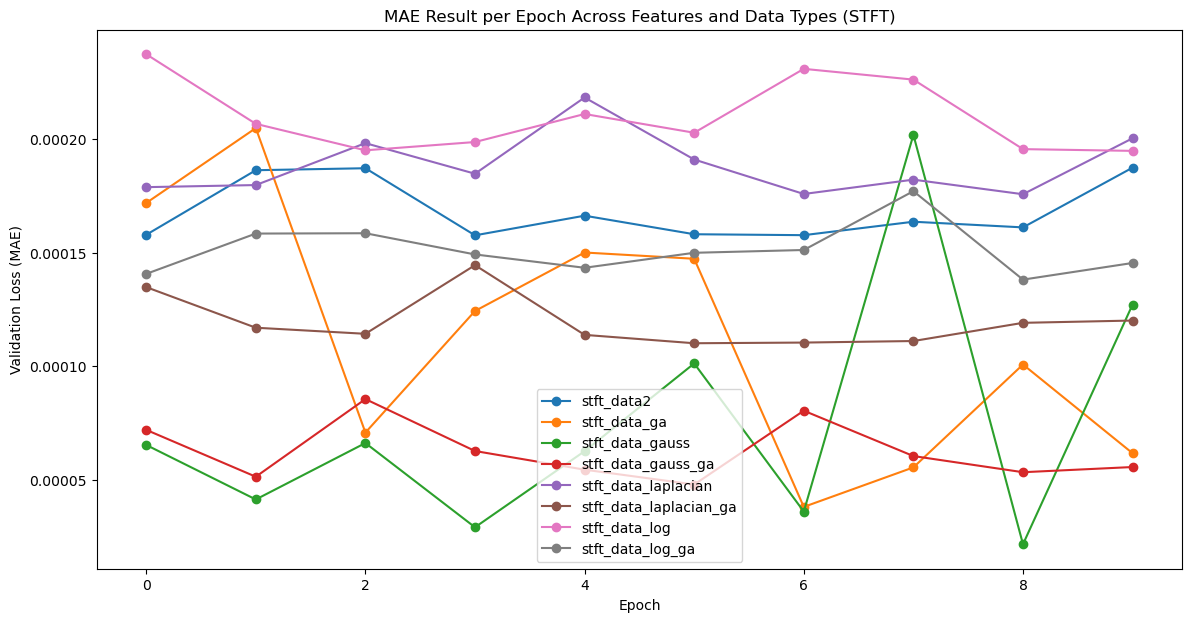

MAE Result : 0.0001576283830218017, feature : stft_data2
MAE Result : 3.8186557503649965e-05, feature : stft_data_ga
MAE Result : 2.1772913896711543e-05, feature : stft_data_gauss
MAE Result : 4.802884359378368e-05, feature : stft_data_gauss_ga
MAE Result : 0.00017570139607414603, feature : stft_data_laplacian
MAE Result : 0.00011016566713806242, feature : stft_data_laplacian_ga
MAE Result : 0.000194771375390701, feature : stft_data_log
MAE Result : 0.0001381470065098256, feature : stft_data_log_ga


In [ ]:
#STFT

def process_features(data, feature_type):
    if feature_type == 'stft':
        return librosa.istft(data)
    elif feature_type in ['mfcc', 'chroma']:
        return data
    else:
        raise ValueError("Unsupported feature type")

def create_sequences(data, seq_length):
    X, Y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        Y.append(data[i + seq_length])
    return np.array(X), np.array(Y)



feature_types = ['stft']
data_names = ['data2', 'data_ga', 'data_gauss', 'data_gauss_ga', 'data_laplacian',
              'data_laplacian_ga', 'data_log', 'data_log_ga']

mse_results = {}
losses_over_epochs = {}

for feature_type in feature_types:
    hdf5_file_path = f'cat_{feature_type}_features7.h5'
    with h5py.File(hdf5_file_path, 'r+') as hdf5_file:
        for data_name in tqdm(data_names, desc=f"Processing {feature_type}"):
            data = hdf5_file[data_name][:]
            t, y = process_features(data, feature_type), np.roll(data, -1)
            t, y = t[:-1], y[:-1]

            train_size = int(0.8 * len(t))
            train_data, test_data = t[:train_size], t[train_size:]
            train_labels, test_labels = y[:train_size], y[train_size:]

            X_train, y_train = create_sequences(train_data, 2)
            X_test, y_test = create_sequences(test_data, 2)

            X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
            X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

            model = Sequential([
                Conv1D(8, 1, activation='relu', input_shape=(2, 1)),
                MaxPooling1D(2),
                Flatten(),
                Dense(50, activation='relu'),
                Dense(1)
            ])
            model.compile(optimizer='adam', loss='mean_absolute_error')
            history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test), verbose=2)

            mse_results[f'{feature_type}_{data_name}'] = history.history['val_loss']
            print(f'Validation loss for {feature_type} {data_name}:', np.min(history.history['val_loss']))

plt.figure(figsize=(14, 7))
for key, losses in mse_results.items():
    plt.plot(losses, label=key, marker='o', linestyle='-')
plt.ylabel('Validation Loss (MAE)')
plt.xlabel('Epoch')
plt.title('MAE Result per Epoch Across Features and Data Types (STFT)')
plt.legend()
plt.show()

for key, losses in mse_results.items():
    los = np.min(losses)
    print(f'MAE Result : {los}, feature : {key}')

Processing chroma:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/10
1/1 - 1s - 776ms/step - loss: 2.0871 - val_loss: 0.9580
Epoch 2/10
1/1 - 0s - 122ms/step - loss: 0.9533 - val_loss: 0.9559
Epoch 3/10
1/1 - 0s - 125ms/step - loss: 0.9512 - val_loss: 0.9538
Epoch 4/10
1/1 - 0s - 132ms/step - loss: 0.9491 - val_loss: 0.9517
Epoch 5/10
1/1 - 0s - 140ms/step - loss: 0.9470 - val_loss: 0.9496
Epoch 6/10
1/1 - 0s - 146ms/step - loss: 0.9449 - val_loss: 0.9475
Epoch 7/10
1/1 - 0s - 150ms/step - loss: 0.9428 - val_loss: 0.9453
Epoch 8/10
1/1 - 0s - 152ms/step - loss: 0.9407 - val_loss: 0.9432
Epoch 9/10
1/1 - 0s - 157ms/step - loss: 0.9386 - val_loss: 0.9411
Epoch 10/10
1/1 - 0s - 158ms/step - loss: 0.9364 - val_loss: 0.9390


Processing chroma:  12%|█▎        | 1/8 [00:02<00:16,  2.36s/it]

MAE Result for chroma data2: 0.9389538168907166
Epoch 1/10
1/1 - 1s - 1s/step - loss: 1.2177 - val_loss: 0.9578
Epoch 2/10
1/1 - 0s - 95ms/step - loss: 0.9532 - val_loss: 0.9556
Epoch 3/10
1/1 - 0s - 87ms/step - loss: 0.9509 - val_loss: 0.9534
Epoch 4/10
1/1 - 0s - 83ms/step - loss: 0.9487 - val_loss: 0.9511
Epoch 5/10
1/1 - 0s - 83ms/step - loss: 0.9465 - val_loss: 0.9489
Epoch 6/10
1/1 - 0s - 83ms/step - loss: 0.9442 - val_loss: 0.9466
Epoch 7/10
1/1 - 0s - 82ms/step - loss: 0.9420 - val_loss: 0.9444
Epoch 8/10
1/1 - 0s - 87ms/step - loss: 0.9397 - val_loss: 0.9421
Epoch 9/10
1/1 - 0s - 84ms/step - loss: 0.9374 - val_loss: 0.9398
Epoch 10/10
1/1 - 0s - 85ms/step - loss: 0.9352 - val_loss: 0.9376


Processing chroma:  25%|██▌       | 2/8 [00:04<00:12,  2.11s/it]

MAE Result for chroma data_ga: 0.9375573396682739
Epoch 1/10
1/1 - 1s - 758ms/step - loss: 0.0090 - val_loss: 3.1743
Epoch 2/10
1/1 - 0s - 119ms/step - loss: 2.7000 - val_loss: 2.3829
Epoch 3/10
1/1 - 0s - 125ms/step - loss: 2.0845 - val_loss: 0.8625
Epoch 4/10
1/1 - 0s - 126ms/step - loss: 0.8638 - val_loss: 0.3749
Epoch 5/10
1/1 - 0s - 132ms/step - loss: 0.4587 - val_loss: 0.3336
Epoch 6/10
1/1 - 0s - 139ms/step - loss: 0.3239 - val_loss: 0.2314
Epoch 7/10
1/1 - 0s - 150ms/step - loss: 0.3318 - val_loss: 0.1374
Epoch 8/10
1/1 - 0s - 158ms/step - loss: 0.2824 - val_loss: 0.4007
Epoch 9/10
1/1 - 0s - 153ms/step - loss: 0.6062 - val_loss: 0.3573
Epoch 10/10
1/1 - 0s - 154ms/step - loss: 0.5354 - val_loss: 0.1038


Processing chroma:  38%|███▊      | 3/8 [00:06<00:10,  2.14s/it]

MAE Result for chroma data_gauss: 0.10376349836587906
Epoch 1/10
1/1 - 1s - 701ms/step - loss: 0.0061 - val_loss: 0.0085
Epoch 2/10
1/1 - 0s - 72ms/step - loss: 0.0084 - val_loss: 0.0067
Epoch 3/10
1/1 - 0s - 72ms/step - loss: 0.0066 - val_loss: 0.0058
Epoch 4/10
1/1 - 0s - 70ms/step - loss: 0.0058 - val_loss: 0.0058
Epoch 5/10
1/1 - 0s - 73ms/step - loss: 0.0058 - val_loss: 0.0059
Epoch 6/10
1/1 - 0s - 76ms/step - loss: 0.0059 - val_loss: 0.0061
Epoch 7/10
1/1 - 0s - 77ms/step - loss: 0.0061 - val_loss: 0.0062
Epoch 8/10
1/1 - 0s - 78ms/step - loss: 0.0062 - val_loss: 0.0062
Epoch 9/10
1/1 - 0s - 76ms/step - loss: 0.0062 - val_loss: 0.0062
Epoch 10/10
1/1 - 0s - 76ms/step - loss: 0.0062 - val_loss: 0.0061


Processing chroma:  50%|█████     | 4/8 [00:07<00:07,  1.88s/it]

MAE Result for chroma data_gauss_ga: 0.0058080642484128475
Epoch 1/10
1/1 - 1s - 721ms/step - loss: 0.0979 - val_loss: 3.9088
Epoch 2/10
1/1 - 0s - 119ms/step - loss: 3.8305 - val_loss: 0.5417
Epoch 3/10
1/1 - 0s - 126ms/step - loss: 0.4361 - val_loss: 1.3850
Epoch 4/10
1/1 - 0s - 126ms/step - loss: 0.6301 - val_loss: 1.8432
Epoch 5/10
1/1 - 0s - 136ms/step - loss: 0.7012 - val_loss: 1.8388
Epoch 6/10
1/1 - 0s - 138ms/step - loss: 0.7691 - val_loss: 1.2320
Epoch 7/10
1/1 - 0s - 142ms/step - loss: 0.5116 - val_loss: 0.3185
Epoch 8/10
1/1 - 0s - 150ms/step - loss: 0.1734 - val_loss: 0.2697
Epoch 9/10
1/1 - 0s - 158ms/step - loss: 0.2591 - val_loss: 0.2339
Epoch 10/10
1/1 - 0s - 161ms/step - loss: 0.1437 - val_loss: 0.3240


Processing chroma:  62%|██████▎   | 5/8 [00:10<00:05,  1.97s/it]

MAE Result for chroma data_laplacian: 0.23388968408107758
Epoch 1/10
1/1 - 1s - 723ms/step - loss: 0.0776 - val_loss: 14.3657
Epoch 2/10
1/1 - 0s - 69ms/step - loss: 14.3407 - val_loss: 5.5666
Epoch 3/10
1/1 - 0s - 68ms/step - loss: 5.5808 - val_loss: 0.0725
Epoch 4/10
1/1 - 0s - 72ms/step - loss: 0.0936 - val_loss: 0.0687
Epoch 5/10
1/1 - 0s - 74ms/step - loss: 0.0898 - val_loss: 0.0653
Epoch 6/10
1/1 - 0s - 73ms/step - loss: 0.0864 - val_loss: 0.0627
Epoch 7/10
1/1 - 0s - 74ms/step - loss: 0.0837 - val_loss: 0.0610
Epoch 8/10
1/1 - 0s - 73ms/step - loss: 0.0819 - val_loss: 0.0598
Epoch 9/10
1/1 - 0s - 78ms/step - loss: 0.0806 - val_loss: 0.0590
Epoch 10/10
1/1 - 0s - 81ms/step - loss: 0.0797 - val_loss: 0.0584


Processing chroma:  75%|███████▌  | 6/8 [00:11<00:03,  1.82s/it]

MAE Result for chroma data_laplacian_ga: 0.05842963233590126
Epoch 1/10
1/1 - 1s - 716ms/step - loss: 1.3151 - val_loss: 1.0784
Epoch 2/10
1/1 - 0s - 120ms/step - loss: 1.0678 - val_loss: 1.0753
Epoch 3/10
1/1 - 0s - 124ms/step - loss: 1.0648 - val_loss: 1.0723
Epoch 4/10
1/1 - 0s - 124ms/step - loss: 1.0618 - val_loss: 1.0692
Epoch 5/10
1/1 - 0s - 133ms/step - loss: 1.0588 - val_loss: 1.0661
Epoch 6/10
1/1 - 0s - 136ms/step - loss: 1.0558 - val_loss: 1.0630
Epoch 7/10
1/1 - 0s - 144ms/step - loss: 1.0527 - val_loss: 1.0599
Epoch 8/10
1/1 - 0s - 151ms/step - loss: 1.0497 - val_loss: 1.0568
Epoch 9/10
1/1 - 0s - 151ms/step - loss: 1.0466 - val_loss: 1.0537
Epoch 10/10
1/1 - 0s - 155ms/step - loss: 1.0436 - val_loss: 1.0505


Processing chroma:  88%|████████▊ | 7/8 [00:13<00:01,  1.91s/it]

MAE Result for chroma data_log: 1.0505249500274658
Epoch 1/10
1/1 - 1s - 682ms/step - loss: 1.2872 - val_loss: 103.2168
Epoch 2/10
1/1 - 0s - 68ms/step - loss: 103.3124 - val_loss: 32.9175
Epoch 3/10
1/1 - 0s - 68ms/step - loss: 32.8509 - val_loss: 1.0724
Epoch 4/10
1/1 - 0s - 71ms/step - loss: 1.0618 - val_loss: 1.0692
Epoch 5/10
1/1 - 0s - 72ms/step - loss: 1.0587 - val_loss: 1.0660
Epoch 6/10
1/1 - 0s - 74ms/step - loss: 1.0554 - val_loss: 1.0627
Epoch 7/10
1/1 - 0s - 73ms/step - loss: 1.0522 - val_loss: 1.0594
Epoch 8/10
1/1 - 0s - 76ms/step - loss: 1.0488 - val_loss: 1.0561
Epoch 9/10
1/1 - 0s - 73ms/step - loss: 1.0455 - val_loss: 1.0527
Epoch 10/10
1/1 - 0s - 77ms/step - loss: 1.0422 - val_loss: 1.0493


Processing chroma: 100%|██████████| 8/8 [00:15<00:00,  1.90s/it]


MAE Result for chroma data_log_ga: 1.0493422746658325


Processing mfcc:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/10
2/2 - 51s - 26s/step - loss: 806.7701 - val_loss: 1198.8149
Epoch 2/10
2/2 - 30s - 15s/step - loss: 806.4740 - val_loss: 558.2452
Epoch 3/10
2/2 - 25s - 13s/step - loss: 500.0567 - val_loss: 504.1025
Epoch 4/10
2/2 - 31s - 16s/step - loss: 487.8629 - val_loss: 145.8454
Epoch 5/10
2/2 - 43s - 22s/step - loss: 325.7943 - val_loss: 407.5459
Epoch 6/10
2/2 - 38s - 19s/step - loss: 300.8708 - val_loss: 356.0974
Epoch 7/10
2/2 - 33s - 17s/step - loss: 388.2616 - val_loss: 287.6733
Epoch 8/10
2/2 - 31s - 15s/step - loss: 207.8694 - val_loss: 263.7025
Epoch 9/10
2/2 - 33s - 17s/step - loss: 259.0166 - val_loss: 184.2802
Epoch 10/10
2/2 - 30s - 15s/step - loss: 200.5278 - val_loss: 86.4205


Processing mfcc:  12%|█▎        | 1/8 [06:08<42:56, 368.12s/it]

MAE Result for mfcc data2: 86.42053985595703
Epoch 1/10
2/2 - 16s - 8s/step - loss: 61.7027 - val_loss: 131.9794
Epoch 2/10
2/2 - 8s - 4s/step - loss: 729.8477 - val_loss: 133.2838
Epoch 3/10
2/2 - 4s - 2s/step - loss: 406.8482 - val_loss: 213.0099
Epoch 4/10
2/2 - 2s - 956ms/step - loss: 422.1172 - val_loss: 226.1482
Epoch 5/10
2/2 - 3s - 2s/step - loss: 258.5644 - val_loss: 228.3102
Epoch 6/10
2/2 - 6s - 3s/step - loss: 503.5259 - val_loss: 208.6971
Epoch 7/10
2/2 - 4s - 2s/step - loss: 490.3051 - val_loss: 165.1666
Epoch 8/10
2/2 - 2s - 1s/step - loss: 385.3129 - val_loss: 131.9058
Epoch 9/10
2/2 - 2s - 795ms/step - loss: 205.8177 - val_loss: 113.3959
Epoch 10/10
2/2 - 4s - 2s/step - loss: 140.8285 - val_loss: 146.7648


Processing mfcc:  25%|██▌       | 2/8 [07:02<18:21, 183.61s/it]

MAE Result for mfcc data_ga: 113.39590454101562
Epoch 1/10
2/2 - 58s - 29s/step - loss: 16.9519 - val_loss: 22.7388
Epoch 2/10
2/2 - 40s - 20s/step - loss: 20.9605 - val_loss: 13.0803
Epoch 3/10
2/2 - 45s - 23s/step - loss: 16.1771 - val_loss: 16.7941
Epoch 4/10
2/2 - 43s - 21s/step - loss: 14.3483 - val_loss: 11.7234
Epoch 5/10
2/2 - 36s - 18s/step - loss: 13.0834 - val_loss: 10.9074
Epoch 6/10
2/2 - 25s - 13s/step - loss: 11.1462 - val_loss: 9.7565
Epoch 7/10
2/2 - 24s - 12s/step - loss: 10.2049 - val_loss: 8.8640
Epoch 8/10
2/2 - 23s - 12s/step - loss: 9.5873 - val_loss: 9.5956
Epoch 9/10
2/2 - 23s - 12s/step - loss: 9.2146 - val_loss: 7.9842
Epoch 10/10
2/2 - 20s - 10s/step - loss: 8.0302 - val_loss: 6.6028


Processing mfcc:  38%|███▊      | 3/8 [12:58<21:51, 262.32s/it]

MAE Result for mfcc data_gauss: 6.6027913093566895
Epoch 1/10
2/2 - 14s - 7s/step - loss: 10.5123 - val_loss: 3.9967
Epoch 2/10
2/2 - 6s - 3s/step - loss: 2.3215 - val_loss: 0.1231
Epoch 3/10
2/2 - 3s - 1s/step - loss: 0.1247 - val_loss: 0.1202
Epoch 4/10
2/2 - 3s - 1s/step - loss: 0.1217 - val_loss: 0.1169
Epoch 5/10
2/2 - 2s - 1s/step - loss: 0.1184 - val_loss: 0.1137
Epoch 6/10
2/2 - 2s - 1s/step - loss: 0.1151 - val_loss: 0.1108
Epoch 7/10
2/2 - 3s - 1s/step - loss: 0.1123 - val_loss: 0.1082
Epoch 8/10
2/2 - 3s - 1s/step - loss: 0.1097 - val_loss: 0.1058
Epoch 9/10
2/2 - 2s - 1s/step - loss: 0.1074 - val_loss: 0.1037
Epoch 10/10
2/2 - 2s - 1s/step - loss: 0.1052 - val_loss: 0.1018


Processing mfcc:  50%|█████     | 4/8 [13:39<11:39, 174.91s/it]

MAE Result for mfcc data_gauss_ga: 0.10183797776699066
Epoch 1/10
2/2 - 44s - 22s/step - loss: 1448.5187 - val_loss: 3410.5959
Epoch 2/10
2/2 - 26s - 13s/step - loss: 9303.6904 - val_loss: 2151.8875
Epoch 3/10
2/2 - 27s - 14s/step - loss: 5717.4541 - val_loss: 1925.9891
Epoch 4/10
2/2 - 26s - 13s/step - loss: 3847.8804 - val_loss: 1222.1233
Epoch 5/10
2/2 - 23s - 11s/step - loss: 2143.3982 - val_loss: 1727.2476
Epoch 6/10
2/2 - 22s - 11s/step - loss: 2383.6260 - val_loss: 965.6948
Epoch 7/10
2/2 - 21s - 11s/step - loss: 1210.8064 - val_loss: 656.4128
Epoch 8/10
2/2 - 27s - 13s/step - loss: 3012.7686 - val_loss: 866.3932
Epoch 9/10
2/2 - 21s - 10s/step - loss: 2549.3950 - val_loss: 2149.7617
Epoch 10/10
2/2 - 19s - 9s/step - loss: 2815.6204 - val_loss: 2688.2888


Processing mfcc:  62%|██████▎   | 5/8 [18:11<10:29, 209.94s/it]

MAE Result for mfcc data_laplacian: 656.412841796875
Epoch 1/10
2/2 - 10s - 5s/step - loss: 173.6855 - val_loss: 542.2973
Epoch 2/10
2/2 - 4s - 2s/step - loss: 743.8848 - val_loss: 272.1914
Epoch 3/10
2/2 - 2s - 1s/step - loss: 286.5659 - val_loss: 250.5715
Epoch 4/10
2/2 - 2s - 1s/step - loss: 394.8536 - val_loss: 234.8814
Epoch 5/10
2/2 - 2s - 1s/step - loss: 348.0074 - val_loss: 91.8331
Epoch 6/10
2/2 - 1s - 459ms/step - loss: 132.8203 - val_loss: 76.2369
Epoch 7/10
2/2 - 2s - 1s/step - loss: 81.5286 - val_loss: 51.4547
Epoch 8/10
2/2 - 2s - 971ms/step - loss: 58.6948 - val_loss: 48.4970
Epoch 9/10
2/2 - 2s - 1s/step - loss: 41.0978 - val_loss: 7.2639
Epoch 10/10
2/2 - 1s - 598ms/step - loss: 6.5286 - val_loss: 4.5055


Processing mfcc:  75%|███████▌  | 6/8 [18:42<04:58, 149.06s/it]

MAE Result for mfcc data_laplacian_ga: 4.50553035736084
Epoch 1/10
2/2 - 43s - 21s/step - loss: 557.0645 - val_loss: 6775.6714
Epoch 2/10
2/2 - 33s - 16s/step - loss: 11646.0381 - val_loss: 4820.1880
Epoch 3/10
2/2 - 28s - 14s/step - loss: 6227.0181 - val_loss: 1755.7976
Epoch 4/10
2/2 - 29s - 15s/step - loss: 1655.0935 - val_loss: 4685.6641
Epoch 5/10
2/2 - 18s - 9s/step - loss: 8238.5518 - val_loss: 4751.8491
Epoch 6/10
2/2 - 20s - 10s/step - loss: 7968.4385 - val_loss: 3610.3682
Epoch 7/10
2/2 - 20s - 10s/step - loss: 4194.2769 - val_loss: 2987.9385
Epoch 8/10
2/2 - 29s - 15s/step - loss: 3147.9849 - val_loss: 2117.3220
Epoch 9/10
2/2 - 21s - 10s/step - loss: 2597.0359 - val_loss: 1215.3269
Epoch 10/10
2/2 - 21s - 10s/step - loss: 1911.7972 - val_loss: 716.7769


Processing mfcc:  88%|████████▊ | 7/8 [23:17<03:10, 190.30s/it]

MAE Result for mfcc data_log: 716.7769165039062
Epoch 1/10
2/2 - 10s - 5s/step - loss: 872.8077 - val_loss: 214.0762
Epoch 2/10
2/2 - 4s - 2s/step - loss: 322.0067 - val_loss: 6.7043
Epoch 3/10
2/2 - 2s - 997ms/step - loss: 6.7744 - val_loss: 6.6992
Epoch 4/10
2/2 - 2s - 1s/step - loss: 6.7688 - val_loss: 6.6928
Epoch 5/10
2/2 - 1s - 469ms/step - loss: 6.7624 - val_loss: 6.6859
Epoch 6/10
2/2 - 2s - 898ms/step - loss: 6.7554 - val_loss: 6.6786
Epoch 7/10
2/2 - 2s - 843ms/step - loss: 6.7480 - val_loss: 6.6710
Epoch 8/10
2/2 - 1s - 748ms/step - loss: 6.7404 - val_loss: 6.6632
Epoch 9/10
2/2 - 1s - 723ms/step - loss: 6.7325 - val_loss: 6.6553
Epoch 10/10
2/2 - 1s - 429ms/step - loss: 6.7246 - val_loss: 6.6473


Processing mfcc: 100%|██████████| 8/8 [23:46<00:00, 178.32s/it]

MAE Result for mfcc data_log_ga: 6.647319316864014


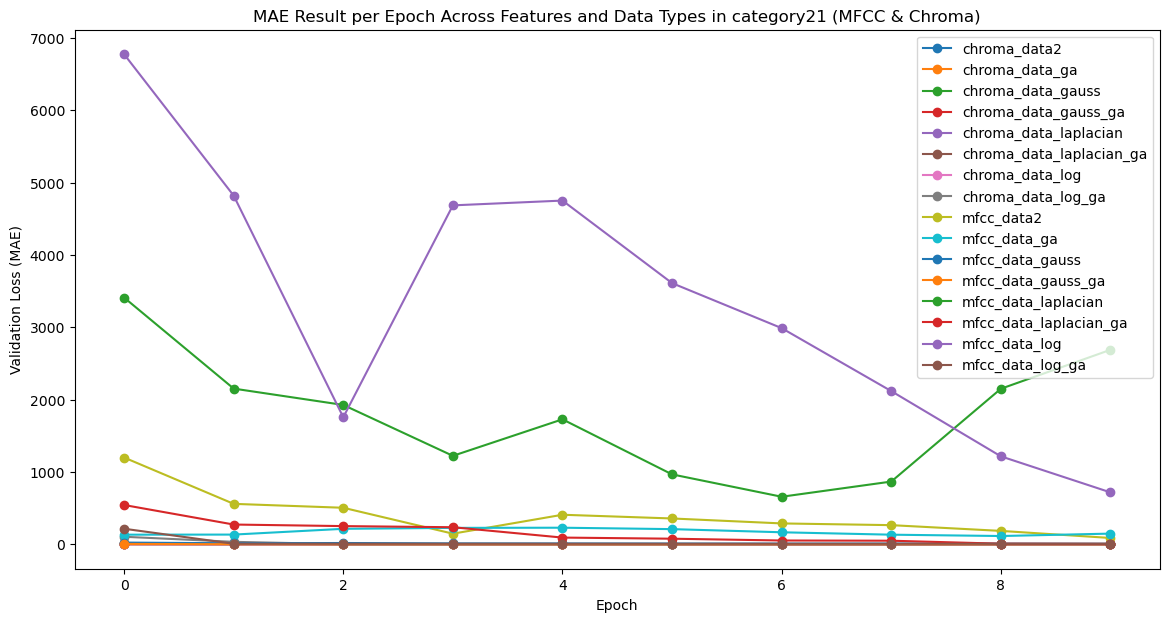

MAE Result : 0.9389538168907166, feature : chroma_data2
MAE Result : 0.9375573396682739, feature : chroma_data_ga
MAE Result : 0.10376349836587906, feature : chroma_data_gauss
MAE Result : 0.0058080642484128475, feature : chroma_data_gauss_ga
MAE Result : 0.23388968408107758, feature : chroma_data_laplacian
MAE Result : 0.05842963233590126, feature : chroma_data_laplacian_ga
MAE Result : 1.0505249500274658, feature : chroma_data_log
MAE Result : 1.0493422746658325, feature : chroma_data_log_ga
MAE Result : 86.42053985595703, feature : mfcc_data2
MAE Result : 113.39590454101562, feature : mfcc_data_ga
MAE Result : 6.6027913093566895, feature : mfcc_data_gauss
MAE Result : 0.10183797776699066, feature : mfcc_data_gauss_ga
MAE Result : 656.412841796875, feature : mfcc_data_laplacian
MAE Result : 4.50553035736084, feature : mfcc_data_laplacian_ga
MAE Result : 716.7769165039062, feature : mfcc_data_log
MAE Result : 6.647319316864014, feature : mfcc_data_log_ga


In [ ]:
#MFCC-CHROMA

def process_features(data, feature_type):
    if feature_type == 'stft':
        return librosa.istft(data)
    elif feature_type in ['mfcc', 'chroma']:

        if data.ndim == 2:
            return data.reshape(data.shape[0], data.shape[1], 1)
        else:
            return data
    else:
        raise ValueError("Unsupported feature type")

def create_sequences(data, seq_length):
    X, Y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        Y.append(data[i + seq_length])
    return np.array(X), np.array(Y)

feature_types = ['chroma', 'mfcc']
data_names = ['data2', 'data_ga', 'data_gauss', 'data_gauss_ga', 'data_laplacian',
              'data_laplacian_ga', 'data_log', 'data_log_ga']

mse_results = {}
losses_over_epochs = {}

for feature_type in feature_types:
    hdf5_file_path = f'cat_{feature_type}_features7.h5'
    with h5py.File(hdf5_file_path, 'r+') as hdf5_file:
        for data_name in tqdm(data_names, desc=f"Processing {feature_type}"):
            data = hdf5_file[data_name][:]

            if data.ndim == 2 and data.shape[0] > 0:
                data = np.expand_dims(data, axis=-1)

                t, y = process_features(data, feature_type), np.roll(data, -1, axis=0)
                t, y = t[:-1], y[:-1]

                if len(t) > 10:
                    X_train, y_train = create_sequences(t, 2)
                    X_test, y_test = create_sequences(y, 2)

                    if X_train.size > 0 and X_test.size > 0:
                        model = Sequential([
                            Conv1D(8, 1, activation='relu', input_shape=(2, data.shape[1])),
                            MaxPooling1D(2),
                            Flatten(),
                            Dense(50, activation='relu'),
                            Dense(1)
                        ])
                        model.compile(optimizer='adam', loss="mean_absolute_error")
                        history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test), verbose=2)

            mse_results[f'{feature_type}_{data_name}'] = history.history['val_loss']
            print(f'MAE Result for {feature_type} {data_name}:', np.min(history.history['val_loss']))

plt.figure(figsize=(14, 7))
for key, losses in mse_results.items():
    plt.plot(losses, label=key, marker='o', linestyle='-')
plt.ylabel('Validation Loss (MAE)')
plt.xlabel('Epoch')
plt.title('MAE Result per Epoch Across Features and Data Types in category21 (MFCC & Chroma)')
plt.legend()
plt.show()


for key, losses in mse_results.items():
    los = np.min(losses)
    print(f'MAE Result : {los}, feature : {key}')


**CATEGORY 2**

Processing stft:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/10
503643/503643 - 172s - 342us/step - loss: 1.3870e-04 - val_loss: 1.5975e-04
Epoch 2/10
503643/503643 - 168s - 333us/step - loss: 1.3411e-04 - val_loss: 1.7491e-04
Epoch 3/10
503643/503643 - 168s - 333us/step - loss: 1.3374e-04 - val_loss: 1.5763e-04
Epoch 4/10
503643/503643 - 167s - 332us/step - loss: 1.3368e-04 - val_loss: 1.9747e-04
Epoch 5/10
503643/503643 - 168s - 334us/step - loss: 1.3364e-04 - val_loss: 1.6270e-04
Epoch 6/10
503643/503643 - 168s - 333us/step - loss: 1.3352e-04 - val_loss: 1.5811e-04
Epoch 7/10
503643/503643 - 167s - 332us/step - loss: 1.3352e-04 - val_loss: 1.6765e-04
Epoch 8/10
503643/503643 - 167s - 332us/step - loss: 1.3347e-04 - val_loss: 1.6340e-04
Epoch 9/10
503643/503643 - 167s - 332us/step - loss: 1.3346e-04 - val_loss: 1.6945e-04
Epoch 10/10
503643/503643 - 168s - 333us/step - loss: 1.3345e-04 - val_loss: 1.5886e-04


Processing stft:  12%|█▎        | 1/8 [28:22<3:18:39, 1702.80s/it]

Validation loss for stft data2: 0.0001576284848852083
Epoch 1/10
251104/251104 - 82s - 326us/step - loss: 8.0321e-05 - val_loss: 6.7916e-05
Epoch 2/10
251104/251104 - 82s - 326us/step - loss: 7.4840e-05 - val_loss: 2.2468e-04
Epoch 3/10
251104/251104 - 82s - 328us/step - loss: 7.5554e-05 - val_loss: 5.8702e-05
Epoch 4/10
251104/251104 - 82s - 326us/step - loss: 7.5139e-05 - val_loss: 5.7336e-05
Epoch 5/10
251104/251104 - 82s - 326us/step - loss: 7.5115e-05 - val_loss: 3.8590e-05
Epoch 6/10
251104/251104 - 82s - 327us/step - loss: 7.4945e-05 - val_loss: 8.8789e-05
Epoch 7/10
251104/251104 - 82s - 327us/step - loss: 7.4822e-05 - val_loss: 5.3644e-05
Epoch 8/10
251104/251104 - 82s - 327us/step - loss: 7.5038e-05 - val_loss: 5.9638e-05
Epoch 9/10
251104/251104 - 82s - 327us/step - loss: 7.5369e-05 - val_loss: 6.8197e-05
Epoch 10/10
251104/251104 - 82s - 327us/step - loss: 7.5120e-05 - val_loss: 9.3771e-05


Processing stft:  25%|██▌       | 2/8 [42:12<1:58:54, 1189.10s/it]

Validation loss for stft data_ga: 3.8589609175687656e-05
Epoch 1/10
503643/503643 - 173s - 343us/step - loss: 6.2763e-05 - val_loss: 6.2054e-05
Epoch 2/10
503643/503643 - 172s - 342us/step - loss: 6.2124e-05 - val_loss: 1.0453e-04
Epoch 3/10
503643/503643 - 172s - 342us/step - loss: 6.2091e-05 - val_loss: 5.9473e-05
Epoch 4/10
503643/503643 - 172s - 342us/step - loss: 6.2147e-05 - val_loss: 1.2228e-04
Epoch 5/10
503643/503643 - 172s - 342us/step - loss: 6.2263e-05 - val_loss: 7.3200e-05
Epoch 6/10
503643/503643 - 172s - 342us/step - loss: 6.2073e-05 - val_loss: 7.7453e-05
Epoch 7/10
503643/503643 - 172s - 342us/step - loss: 6.2278e-05 - val_loss: 7.6304e-05
Epoch 8/10
503643/503643 - 168s - 333us/step - loss: 6.2209e-05 - val_loss: 7.9582e-05
Epoch 9/10
503643/503643 - 168s - 334us/step - loss: 6.2343e-05 - val_loss: 5.8218e-05
Epoch 10/10
503643/503643 - 168s - 334us/step - loss: 6.2218e-05 - val_loss: 7.2405e-05


Processing stft:  38%|███▊      | 3/8 [1:11:04<1:59:45, 1437.01s/it]

Validation loss for stft data_gauss: 5.8218422054778785e-05
Epoch 1/10
251294/251294 - 86s - 341us/step - loss: 6.2679e-05 - val_loss: 4.8414e-05
Epoch 2/10
251294/251294 - 86s - 341us/step - loss: 5.9101e-05 - val_loss: 4.9980e-05
Epoch 3/10
251294/251294 - 86s - 341us/step - loss: 5.9378e-05 - val_loss: 6.2436e-05
Epoch 4/10
251294/251294 - 86s - 341us/step - loss: 5.9342e-05 - val_loss: 6.7024e-05
Epoch 5/10
251294/251294 - 86s - 341us/step - loss: 5.9667e-05 - val_loss: 4.7636e-05
Epoch 6/10
251294/251294 - 86s - 342us/step - loss: 5.9316e-05 - val_loss: 4.7548e-05
Epoch 7/10
251294/251294 - 86s - 341us/step - loss: 5.9135e-05 - val_loss: 4.9558e-05
Epoch 8/10
251294/251294 - 86s - 342us/step - loss: 5.9378e-05 - val_loss: 6.5146e-05
Epoch 9/10
251294/251294 - 86s - 344us/step - loss: 5.9175e-05 - val_loss: 4.7677e-05
Epoch 10/10
251294/251294 - 86s - 344us/step - loss: 5.9159e-05 - val_loss: 6.8340e-05


Processing stft:  50%|█████     | 4/8 [1:25:32<1:20:49, 1212.40s/it]

Validation loss for stft data_gauss_ga: 4.75477208965458e-05
Epoch 1/10
503643/503643 - 173s - 343us/step - loss: 1.5198e-04 - val_loss: 2.2784e-04
Epoch 2/10
503643/503643 - 170s - 337us/step - loss: 1.4909e-04 - val_loss: 2.2838e-04
Epoch 3/10
503643/503643 - 168s - 333us/step - loss: 1.4903e-04 - val_loss: 1.8120e-04
Epoch 4/10
503643/503643 - 168s - 333us/step - loss: 1.4878e-04 - val_loss: 1.7750e-04
Epoch 5/10
503643/503643 - 168s - 333us/step - loss: 1.4895e-04 - val_loss: 1.7675e-04
Epoch 6/10
503643/503643 - 168s - 333us/step - loss: 1.4896e-04 - val_loss: 1.7668e-04
Epoch 7/10
503643/503643 - 168s - 333us/step - loss: 1.4890e-04 - val_loss: 1.8763e-04
Epoch 8/10
503643/503643 - 168s - 333us/step - loss: 1.4901e-04 - val_loss: 1.7893e-04
Epoch 9/10
503643/503643 - 168s - 333us/step - loss: 1.4885e-04 - val_loss: 1.8550e-04
Epoch 10/10
503643/503643 - 168s - 333us/step - loss: 1.4892e-04 - val_loss: 2.2441e-04


Processing stft:  62%|██████▎   | 5/8 [1:53:58<1:09:31, 1390.46s/it]

Validation loss for stft data_laplacian: 0.00017668241343926638
Epoch 1/10
251820/251820 - 86s - 340us/step - loss: 3.5758e-04 - val_loss: 5.2805e-04
Epoch 2/10
251820/251820 - 86s - 340us/step - loss: 3.5752e-04 - val_loss: 5.2267e-04
Epoch 3/10
251820/251820 - 86s - 340us/step - loss: 3.5738e-04 - val_loss: 5.0673e-04
Epoch 4/10
251820/251820 - 86s - 340us/step - loss: 3.5737e-04 - val_loss: 5.1164e-04
Epoch 5/10
251820/251820 - 86s - 340us/step - loss: 3.5746e-04 - val_loss: 5.0945e-04
Epoch 6/10
251820/251820 - 86s - 340us/step - loss: 3.5722e-04 - val_loss: 5.0397e-04
Epoch 7/10
251820/251820 - 86s - 340us/step - loss: 3.5741e-04 - val_loss: 5.1512e-04
Epoch 8/10
251820/251820 - 86s - 341us/step - loss: 3.5734e-04 - val_loss: 5.0515e-04
Epoch 9/10
251820/251820 - 86s - 340us/step - loss: 3.5737e-04 - val_loss: 5.1577e-04
Epoch 10/10
251820/251820 - 86s - 341us/step - loss: 3.5737e-04 - val_loss: 5.1898e-04


Processing stft:  75%|███████▌  | 6/8 [2:08:24<40:24, 1212.25s/it]  

Validation loss for stft data_laplacian_ga: 0.0005039747920818627
Epoch 1/10
503643/503643 - 172s - 342us/step - loss: 1.6295e-04 - val_loss: 2.5410e-04
Epoch 2/10
503643/503643 - 172s - 342us/step - loss: 1.6004e-04 - val_loss: 2.0736e-04
Epoch 3/10
503643/503643 - 172s - 342us/step - loss: 1.6000e-04 - val_loss: 2.0507e-04
Epoch 4/10
503643/503643 - 175s - 348us/step - loss: 1.5986e-04 - val_loss: 2.1937e-04
Epoch 5/10
503643/503643 - 168s - 334us/step - loss: 1.5980e-04 - val_loss: 1.9764e-04
Epoch 6/10
503643/503643 - 167s - 331us/step - loss: 1.5984e-04 - val_loss: 1.9868e-04
Epoch 7/10
503643/503643 - 168s - 333us/step - loss: 1.5979e-04 - val_loss: 1.9502e-04
Epoch 8/10
503643/503643 - 168s - 333us/step - loss: 1.5969e-04 - val_loss: 2.0268e-04
Epoch 9/10
503643/503643 - 168s - 333us/step - loss: 1.5983e-04 - val_loss: 1.9558e-04
Epoch 10/10
503643/503643 - 168s - 333us/step - loss: 1.5974e-04 - val_loss: 1.9533e-04


Processing stft:  88%|████████▊ | 7/8 [2:37:04<22:58, 1378.19s/it]

Validation loss for stft data_log: 0.00019501906353980303
Epoch 1/10
251269/251269 - 87s - 347us/step - loss: 1.2742e-04 - val_loss: 1.5539e-04
Epoch 2/10
251269/251269 - 86s - 344us/step - loss: 1.2069e-04 - val_loss: 1.8032e-04
Epoch 3/10
251269/251269 - 87s - 344us/step - loss: 1.2056e-04 - val_loss: 1.4093e-04
Epoch 4/10
251269/251269 - 86s - 344us/step - loss: 1.2043e-04 - val_loss: 1.4155e-04
Epoch 5/10
251269/251269 - 86s - 344us/step - loss: 1.2057e-04 - val_loss: 1.4482e-04
Epoch 6/10
251269/251269 - 86s - 344us/step - loss: 1.2047e-04 - val_loss: 1.7861e-04
Epoch 7/10
251269/251269 - 86s - 344us/step - loss: 1.2035e-04 - val_loss: 1.6081e-04
Epoch 8/10
251269/251269 - 86s - 344us/step - loss: 1.2029e-04 - val_loss: 1.4059e-04
Epoch 9/10
251269/251269 - 87s - 345us/step - loss: 1.2031e-04 - val_loss: 1.3964e-04
Epoch 10/10
251269/251269 - 87s - 345us/step - loss: 1.2020e-04 - val_loss: 1.7808e-04


Processing stft: 100%|██████████| 8/8 [2:51:39<00:00, 1287.44s/it]

Validation loss for stft data_log_ga: 0.00013964025129098445


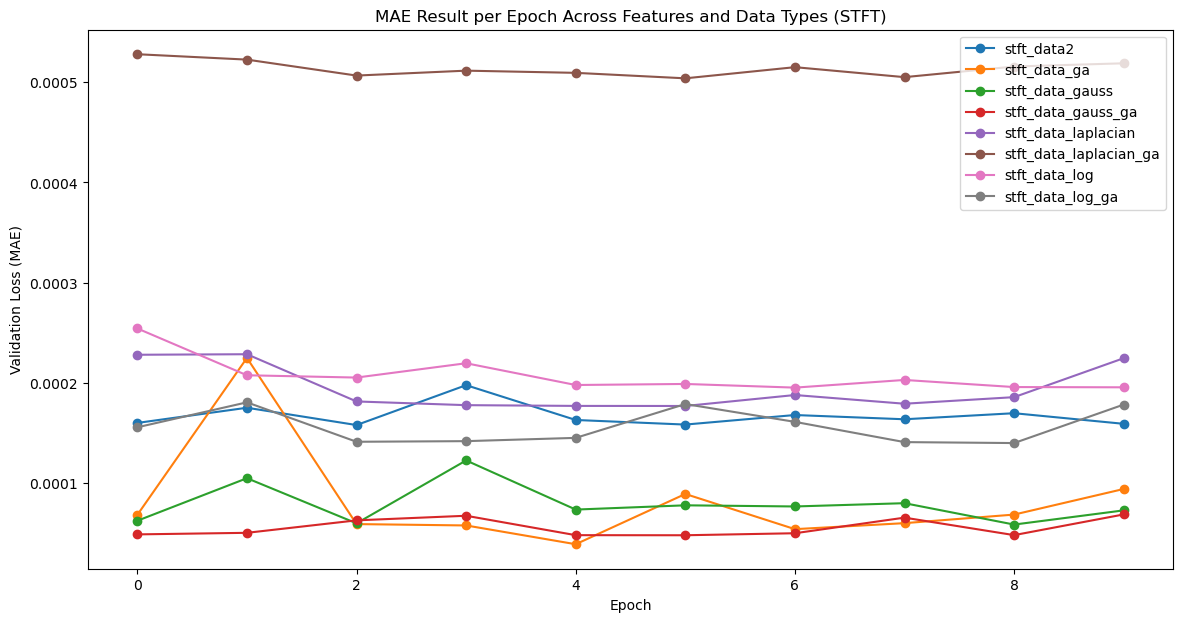

MAE Result : 0.0001576284848852083, feature : stft_data2
MAE Result : 3.8589609175687656e-05, feature : stft_data_ga
MAE Result : 5.8218422054778785e-05, feature : stft_data_gauss
MAE Result : 4.75477208965458e-05, feature : stft_data_gauss_ga
MAE Result : 0.00017668241343926638, feature : stft_data_laplacian
MAE Result : 0.0005039747920818627, feature : stft_data_laplacian_ga
MAE Result : 0.00019501906353980303, feature : stft_data_log
MAE Result : 0.00013964025129098445, feature : stft_data_log_ga


In [ ]:
#STFT

def process_features(data, feature_type):
    if feature_type == 'stft':
        return librosa.istft(data)
    elif feature_type in ['mfcc', 'chroma']:
        return data
    else:
        raise ValueError("Unsupported feature type")

def create_sequences(data, seq_length):
    X, Y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        Y.append(data[i + seq_length])
    return np.array(X), np.array(Y)



feature_types = ['stft']
data_names = ['data2', 'data_ga', 'data_gauss', 'data_gauss_ga', 'data_laplacian',
              'data_laplacian_ga', 'data_log', 'data_log_ga']

mse_results = {}
losses_over_epochs = {}

for feature_type in feature_types:
    hdf5_file_path = f'cat_{feature_type}_features2.h5'
    with h5py.File(hdf5_file_path, 'r+') as hdf5_file:
        for data_name in tqdm(data_names, desc=f"Processing {feature_type}"):
            data = hdf5_file[data_name][:]
            t, y = process_features(data, feature_type), np.roll(data, -1)
            t, y = t[:-1], y[:-1]

            train_size = int(0.8 * len(t))
            train_data, test_data = t[:train_size], t[train_size:]
            train_labels, test_labels = y[:train_size], y[train_size:]

            X_train, y_train = create_sequences(train_data, 2)
            X_test, y_test = create_sequences(test_data, 2)

            X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
            X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

            model = Sequential([
                Conv1D(8, 1, activation='relu', input_shape=(2, 1)),
                MaxPooling1D(2),
                Flatten(),
                Dense(50, activation='relu'),
                Dense(1)
            ])
            model.compile(optimizer='adam', loss='mean_absolute_error')
            history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test), verbose=2)

            mse_results[f'{feature_type}_{data_name}'] = history.history['val_loss']
            print(f'Validation loss for {feature_type} {data_name}:', np.min(history.history['val_loss']))

plt.figure(figsize=(14, 7))
for key, losses in mse_results.items():
    plt.plot(losses, label=key, marker='o', linestyle='-')
plt.ylabel('Validation Loss (MAE)')
plt.xlabel('Epoch')
plt.title('MAE Result per Epoch Across Features and Data Types (STFT)')
plt.legend()
plt.show()

for key, losses in mse_results.items():
    los = np.min(losses)
    print(f'MAE Result : {los}, feature : {key}')

Processing chroma:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/10


/Users/indraawal/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


1/1 - 1s - 531ms/step - loss: 0.9089 - val_loss: 136.4520
Epoch 2/10
1/1 - 0s - 144ms/step - loss: 136.7559 - val_loss: 97.5953
Epoch 3/10
1/1 - 0s - 142ms/step - loss: 97.9765 - val_loss: 29.0586
Epoch 4/10
1/1 - 0s - 141ms/step - loss: 29.3301 - val_loss: 0.9590
Epoch 5/10
1/1 - 0s - 147ms/step - loss: 0.9545 - val_loss: 0.9593
Epoch 6/10
1/1 - 0s - 146ms/step - loss: 0.9547 - val_loss: 0.9588
Epoch 7/10
1/1 - 0s - 145ms/step - loss: 0.9542 - val_loss: 0.9578
Epoch 8/10
1/1 - 0s - 149ms/step - loss: 0.9532 - val_loss: 0.9569
Epoch 9/10
1/1 - 0s - 147ms/step - loss: 0.9524 - val_loss: 0.9559
Epoch 10/10
1/1 - 0s - 141ms/step - loss: 0.9513 - val_loss: 0.9549


Processing chroma:  12%|█▎        | 1/8 [00:02<00:14,  2.00s/it]

MAE Result for chroma data2: 0.954865574836731
Epoch 1/10
1/1 - 1s - 529ms/step - loss: 0.8790 - val_loss: 94.3387
Epoch 2/10
1/1 - 0s - 65ms/step - loss: 94.5281 - val_loss: 94.4091
Epoch 3/10
1/1 - 0s - 71ms/step - loss: 94.6500 - val_loss: 65.3590
Epoch 4/10
1/1 - 0s - 67ms/step - loss: 65.5310 - val_loss: 27.7726
Epoch 5/10
1/1 - 0s - 76ms/step - loss: 27.8788 - val_loss: 0.9433
Epoch 6/10
1/1 - 0s - 70ms/step - loss: 0.9388 - val_loss: 0.9396
Epoch 7/10
1/1 - 0s - 74ms/step - loss: 0.9351 - val_loss: 0.9358
Epoch 8/10
1/1 - 0s - 81ms/step - loss: 0.9313 - val_loss: 0.9320
Epoch 9/10
1/1 - 0s - 79ms/step - loss: 0.9274 - val_loss: 0.9281
Epoch 10/10
1/1 - 0s - 82ms/step - loss: 0.9235 - val_loss: 0.9241


Processing chroma:  25%|██▌       | 2/8 [00:03<00:09,  1.59s/it]

MAE Result for chroma data_ga: 0.9241056442260742
Epoch 1/10
1/1 - 1s - 605ms/step - loss: 0.0079 - val_loss: 3.7837
Epoch 2/10
1/1 - 0s - 146ms/step - loss: 4.7206 - val_loss: 1.9281
Epoch 3/10
1/1 - 0s - 194ms/step - loss: 2.2311 - val_loss: 0.4316
Epoch 4/10
1/1 - 0s - 205ms/step - loss: 0.4646 - val_loss: 1.0623
Epoch 5/10
1/1 - 0s - 215ms/step - loss: 0.9958 - val_loss: 1.2719
Epoch 6/10
1/1 - 0s - 175ms/step - loss: 1.0397 - val_loss: 1.6138
Epoch 7/10
1/1 - 0s - 170ms/step - loss: 1.4794 - val_loss: 1.2663
Epoch 8/10
1/1 - 0s - 159ms/step - loss: 1.1841 - val_loss: 0.9535
Epoch 9/10
1/1 - 0s - 155ms/step - loss: 0.7815 - val_loss: 0.7533
Epoch 10/10
1/1 - 0s - 146ms/step - loss: 0.6513 - val_loss: 0.5936


Processing chroma:  38%|███▊      | 3/8 [00:05<00:09,  1.93s/it]

MAE Result for chroma data_gauss: 0.4315698742866516
Epoch 1/10
1/1 - 1s - 611ms/step - loss: 0.0251 - val_loss: 0.9160
Epoch 2/10
1/1 - 0s - 77ms/step - loss: 0.9717 - val_loss: 0.9043
Epoch 3/10
1/1 - 0s - 74ms/step - loss: 0.9614 - val_loss: 0.6039
Epoch 4/10
1/1 - 0s - 72ms/step - loss: 0.6441 - val_loss: 0.2095
Epoch 5/10
1/1 - 0s - 72ms/step - loss: 0.2257 - val_loss: 0.0127
Epoch 6/10
1/1 - 0s - 82ms/step - loss: 0.0128 - val_loss: 0.0138
Epoch 7/10
1/1 - 0s - 76ms/step - loss: 0.0139 - val_loss: 0.0141
Epoch 8/10
1/1 - 0s - 85ms/step - loss: 0.0142 - val_loss: 0.0139
Epoch 9/10
1/1 - 0s - 79ms/step - loss: 0.0140 - val_loss: 0.0133
Epoch 10/10
1/1 - 0s - 79ms/step - loss: 0.0134 - val_loss: 0.0124


Processing chroma:  50%|█████     | 4/8 [00:07<00:06,  1.73s/it]

MAE Result for chroma data_gauss_ga: 0.0123941320925951
Epoch 1/10
1/1 - 1s - 1s/step - loss: 0.1248 - val_loss: 80.2291
Epoch 2/10
1/1 - 0s - 155ms/step - loss: 77.0211 - val_loss: 36.7962
Epoch 3/10
1/1 - 0s - 182ms/step - loss: 23.8094 - val_loss: 24.1881
Epoch 4/10
1/1 - 0s - 175ms/step - loss: 7.3345 - val_loss: 22.0520
Epoch 5/10
1/1 - 0s - 266ms/step - loss: 6.2679 - val_loss: 18.5733
Epoch 6/10
1/1 - 0s - 279ms/step - loss: 4.7475 - val_loss: 15.4379
Epoch 7/10
1/1 - 0s - 235ms/step - loss: 3.7264 - val_loss: 12.7353
Epoch 8/10
1/1 - 0s - 248ms/step - loss: 2.5921 - val_loss: 11.2248
Epoch 9/10
1/1 - 0s - 333ms/step - loss: 1.9514 - val_loss: 9.8072
Epoch 10/10
1/1 - 0s - 219ms/step - loss: 1.5278 - val_loss: 9.2002


Processing chroma:  62%|██████▎   | 5/8 [00:10<00:06,  2.31s/it]

MAE Result for chroma data_laplacian: 9.200218200683594
Epoch 1/10
1/1 - 1s - 968ms/step - loss: 0.0928 - val_loss: 28.6768
Epoch 2/10
1/1 - 0s - 90ms/step - loss: 28.9796 - val_loss: 8.6821
Epoch 3/10
1/1 - 0s - 82ms/step - loss: 9.0337 - val_loss: 0.0702
Epoch 4/10
1/1 - 0s - 91ms/step - loss: 0.0913 - val_loss: 0.0698
Epoch 5/10
1/1 - 0s - 96ms/step - loss: 0.0909 - val_loss: 0.0682
Epoch 6/10
1/1 - 0s - 100ms/step - loss: 0.0893 - val_loss: 0.0659
Epoch 7/10
1/1 - 0s - 83ms/step - loss: 0.0870 - val_loss: 0.0637
Epoch 8/10
1/1 - 0s - 99ms/step - loss: 0.0847 - val_loss: 0.0621
Epoch 9/10
1/1 - 0s - 95ms/step - loss: 0.0830 - val_loss: 0.0607
Epoch 10/10
1/1 - 0s - 141ms/step - loss: 0.0816 - val_loss: 0.0597


Processing chroma:  75%|███████▌  | 6/8 [00:12<00:04,  2.23s/it]

MAE Result for chroma data_laplacian_ga: 0.0597253143787384
Epoch 1/10
1/1 - 1s - 1s/step - loss: 1.1185 - val_loss: 50.5229
Epoch 2/10
1/1 - 0s - 307ms/step - loss: 54.9377 - val_loss: 9.7970
Epoch 3/10
1/1 - 0s - 266ms/step - loss: 11.3851 - val_loss: 1.0687
Epoch 4/10
1/1 - 0s - 211ms/step - loss: 1.0583 - val_loss: 1.0645
Epoch 5/10
1/1 - 0s - 236ms/step - loss: 1.0542 - val_loss: 1.0600
Epoch 6/10
1/1 - 0s - 228ms/step - loss: 1.0498 - val_loss: 1.0552
Epoch 7/10
1/1 - 0s - 242ms/step - loss: 1.0451 - val_loss: 1.0504
Epoch 8/10
1/1 - 0s - 319ms/step - loss: 1.0403 - val_loss: 1.0454
Epoch 9/10
1/1 - 0s - 267ms/step - loss: 1.0355 - val_loss: 1.0403
Epoch 10/10
1/1 - 0s - 268ms/step - loss: 1.0305 - val_loss: 1.0351


Processing chroma:  88%|████████▊ | 7/8 [00:16<00:02,  2.74s/it]

MAE Result for chroma data_log: 1.035122036933899
Epoch 1/10
1/1 - 1s - 687ms/step - loss: 1.2641 - val_loss: 1.0781
Epoch 2/10
1/1 - 0s - 90ms/step - loss: 1.0675 - val_loss: 1.0748
Epoch 3/10
1/1 - 0s - 87ms/step - loss: 1.0641 - val_loss: 1.0714
Epoch 4/10
1/1 - 0s - 79ms/step - loss: 1.0608 - val_loss: 1.0680
Epoch 5/10
1/1 - 0s - 76ms/step - loss: 1.0573 - val_loss: 1.0645
Epoch 6/10
1/1 - 0s - 95ms/step - loss: 1.0539 - val_loss: 1.0611
Epoch 7/10
1/1 - 0s - 83ms/step - loss: 1.0504 - val_loss: 1.0576
Epoch 8/10
1/1 - 0s - 78ms/step - loss: 1.0470 - val_loss: 1.0541
Epoch 9/10
1/1 - 0s - 79ms/step - loss: 1.0435 - val_loss: 1.0505
Epoch 10/10
1/1 - 0s - 78ms/step - loss: 1.0399 - val_loss: 1.0470


Processing chroma: 100%|██████████| 8/8 [00:17<00:00,  2.24s/it]


MAE Result for chroma data_log_ga: 1.0469931364059448


Processing mfcc:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/10
2/2 - 61s - 30s/step - loss: 629.5873 - val_loss: 414.9752
Epoch 2/10
2/2 - 47s - 23s/step - loss: 3974.6914 - val_loss: 810.1379
Epoch 3/10
2/2 - 44s - 22s/step - loss: 4188.0264 - val_loss: 960.2110
Epoch 4/10
2/2 - 37s - 18s/step - loss: 2037.9481 - val_loss: 1471.6914
Epoch 5/10
2/2 - 32s - 16s/step - loss: 1464.7113 - val_loss: 1150.7872
Epoch 6/10
2/2 - 29s - 15s/step - loss: 1194.9561 - val_loss: 1242.5522
Epoch 7/10
2/2 - 32s - 16s/step - loss: 1284.5537 - val_loss: 1290.8943
Epoch 8/10
2/2 - 33s - 16s/step - loss: 1658.2441 - val_loss: 1124.5497
Epoch 9/10
2/2 - 30s - 15s/step - loss: 1415.5994 - val_loss: 921.0724
Epoch 10/10
2/2 - 39s - 19s/step - loss: 1043.3700 - val_loss: 628.8173


Processing mfcc:  12%|█▎        | 1/8 [06:55<48:30, 415.81s/it]

MAE Result for mfcc data2: 414.97515869140625
Epoch 1/10
2/2 - 13s - 6s/step - loss: 92.7254 - val_loss: 72.6203
Epoch 2/10
2/2 - 7s - 3s/step - loss: 41.2038 - val_loss: 2.5162
Epoch 3/10
2/2 - 4s - 2s/step - loss: 2.5446 - val_loss: 2.5073
Epoch 4/10
2/2 - 4s - 2s/step - loss: 2.5354 - val_loss: 2.4981
Epoch 5/10
2/2 - 4s - 2s/step - loss: 2.5261 - val_loss: 2.4888
Epoch 6/10
2/2 - 6s - 3s/step - loss: 2.5166 - val_loss: 2.4794
Epoch 7/10
2/2 - 4s - 2s/step - loss: 2.5071 - val_loss: 2.4700
Epoch 8/10
2/2 - 6s - 3s/step - loss: 2.4976 - val_loss: 2.4607
Epoch 9/10
2/2 - 6s - 3s/step - loss: 2.4882 - val_loss: 2.4514
Epoch 10/10
2/2 - 4s - 2s/step - loss: 2.4787 - val_loss: 2.4422


Processing mfcc:  25%|██▌       | 2/8 [07:56<20:41, 206.92s/it]

MAE Result for mfcc data_ga: 2.44216251373291
Epoch 1/10
2/2 - 59s - 30s/step - loss: 14.8061 - val_loss: 47.9216
Epoch 2/10
2/2 - 36s - 18s/step - loss: 51.3216 - val_loss: 32.2572
Epoch 3/10
2/2 - 38s - 19s/step - loss: 28.9869 - val_loss: 26.8078
Epoch 4/10
2/2 - 40s - 20s/step - loss: 21.1259 - val_loss: 16.1835
Epoch 5/10
2/2 - 40s - 20s/step - loss: 18.8721 - val_loss: 15.3012
Epoch 6/10
2/2 - 43s - 21s/step - loss: 14.0048 - val_loss: 11.9344
Epoch 7/10
2/2 - 33s - 17s/step - loss: 11.7897 - val_loss: 10.3317
Epoch 8/10
2/2 - 31s - 15s/step - loss: 11.1896 - val_loss: 8.8409
Epoch 9/10
2/2 - 32s - 16s/step - loss: 9.1940 - val_loss: 5.5005
Epoch 10/10
2/2 - 40s - 20s/step - loss: 8.2648 - val_loss: 8.9082


Processing mfcc:  38%|███▊      | 3/8 [14:54<25:17, 303.43s/it]

MAE Result for mfcc data_gauss: 5.50054931640625
Epoch 1/10
2/2 - 18s - 9s/step - loss: 4.4602 - val_loss: 5.6385
Epoch 2/10
2/2 - 7s - 4s/step - loss: 3.5937 - val_loss: 0.1407
Epoch 3/10
2/2 - 5s - 3s/step - loss: 0.1432 - val_loss: 0.1403
Epoch 4/10
2/2 - 9s - 4s/step - loss: 0.1418 - val_loss: 0.1365
Epoch 5/10
2/2 - 4s - 2s/step - loss: 0.1377 - val_loss: 0.1326
Epoch 6/10
2/2 - 3s - 1s/step - loss: 0.1340 - val_loss: 0.1290
Epoch 7/10
2/2 - 3s - 1s/step - loss: 0.1305 - val_loss: 0.1264
Epoch 8/10
2/2 - 3s - 1s/step - loss: 0.1283 - val_loss: 0.1248
Epoch 9/10
2/2 - 3s - 1s/step - loss: 0.1267 - val_loss: 0.1232
Epoch 10/10
2/2 - 3s - 1s/step - loss: 0.1250 - val_loss: 0.1216


Processing mfcc:  50%|█████     | 4/8 [15:58<13:55, 208.92s/it]

MAE Result for mfcc data_gauss_ga: 0.12155009061098099
Epoch 1/10
2/2 - 51s - 26s/step - loss: 2083.3022 - val_loss: 1957.7775
Epoch 2/10
2/2 - 36s - 18s/step - loss: 4421.4619 - val_loss: 2909.9248
Epoch 3/10
2/2 - 42s - 21s/step - loss: 4365.9731 - val_loss: 4554.5181
Epoch 4/10
2/2 - 37s - 19s/step - loss: 9167.9824 - val_loss: 3865.9121
Epoch 5/10
2/2 - 37s - 18s/step - loss: 7842.1616 - val_loss: 2501.5164
Epoch 6/10
2/2 - 32s - 16s/step - loss: 2742.8694 - val_loss: 2332.9351
Epoch 7/10
2/2 - 35s - 17s/step - loss: 3498.6536 - val_loss: 1454.8024
Epoch 8/10
2/2 - 33s - 16s/step - loss: 2067.5498 - val_loss: 2411.5864
Epoch 9/10
2/2 - 31s - 15s/step - loss: 3959.8145 - val_loss: 772.2281
Epoch 10/10
2/2 - 31s - 16s/step - loss: 2282.5984 - val_loss: 2194.8203


Processing mfcc:  62%|██████▎   | 5/8 [22:31<13:46, 275.36s/it]

MAE Result for mfcc data_laplacian: 772.2281494140625
Epoch 1/10
2/2 - 14s - 7s/step - loss: 1924.0557 - val_loss: 1037.9164
Epoch 2/10
2/2 - 10s - 5s/step - loss: 1659.5804 - val_loss: 345.4092
Epoch 3/10
2/2 - 5s - 2s/step - loss: 440.1265 - val_loss: 43.2126
Epoch 4/10
2/2 - 9s - 5s/step - loss: 52.7381 - val_loss: 4.5558
Epoch 5/10
2/2 - 14s - 7s/step - loss: 4.5998 - val_loss: 4.5500
Epoch 6/10
2/2 - 7s - 3s/step - loss: 4.5939 - val_loss: 4.5437
Epoch 7/10
2/2 - 7s - 4s/step - loss: 4.5874 - val_loss: 4.5370
Epoch 8/10
2/2 - 5s - 2s/step - loss: 4.5807 - val_loss: 4.5301
Epoch 9/10
2/2 - 5s - 2s/step - loss: 4.5738 - val_loss: 4.5231
Epoch 10/10
2/2 - 4s - 2s/step - loss: 4.5667 - val_loss: 4.5160


Processing mfcc:  75%|███████▌  | 6/8 [23:56<07:00, 210.46s/it]

MAE Result for mfcc data_laplacian_ga: 4.516032695770264
Epoch 1/10
2/2 - 57s - 29s/step - loss: 2188.9661 - val_loss: 6204.1240
Epoch 2/10
2/2 - 35s - 17s/step - loss: 25124.9551 - val_loss: 8513.1133
Epoch 3/10
2/2 - 36s - 18s/step - loss: 23062.8574 - val_loss: 10391.7695
Epoch 4/10
2/2 - 38s - 19s/step - loss: 18102.2656 - val_loss: 10719.6064
Epoch 5/10
2/2 - 27s - 14s/step - loss: 12044.0605 - val_loss: 4610.7734
Epoch 6/10
2/2 - 39s - 20s/step - loss: 16805.2949 - val_loss: 8328.9590
Epoch 7/10
2/2 - 39s - 20s/step - loss: 21038.4062 - val_loss: 6881.1069
Epoch 8/10
2/2 - 32s - 16s/step - loss: 15061.0254 - val_loss: 3824.7388
Epoch 9/10
2/2 - 30s - 15s/step - loss: 6768.4819 - val_loss: 5478.5259
Epoch 10/10
2/2 - 28s - 14s/step - loss: 8751.8252 - val_loss: 4048.6599


Processing mfcc:  88%|████████▊ | 7/8 [30:28<04:29, 269.92s/it]

MAE Result for mfcc data_log: 3824.73876953125
Epoch 1/10
2/2 - 20s - 10s/step - loss: 1268.9115 - val_loss: 975.5793
Epoch 2/10
2/2 - 7s - 3s/step - loss: 858.9830 - val_loss: 496.4978
Epoch 3/10
2/2 - 4s - 2s/step - loss: 523.1693 - val_loss: 139.4079
Epoch 4/10
2/2 - 3s - 1s/step - loss: 96.5491 - val_loss: 6.8454
Epoch 5/10
2/2 - 3s - 1s/step - loss: 6.9169 - val_loss: 6.8452
Epoch 6/10
2/2 - 4s - 2s/step - loss: 6.9160 - val_loss: 6.8426
Epoch 7/10
2/2 - 4s - 2s/step - loss: 6.9132 - val_loss: 6.8393
Epoch 8/10
2/2 - 4s - 2s/step - loss: 6.9098 - val_loss: 6.8357
Epoch 9/10
2/2 - 3s - 2s/step - loss: 6.9061 - val_loss: 6.8318
Epoch 10/10
2/2 - 3s - 1s/step - loss: 6.9024 - val_loss: 6.8285


Processing mfcc: 100%|██████████| 8/8 [31:25<00:00, 235.70s/it]

MAE Result for mfcc data_log_ga: 6.828526496887207


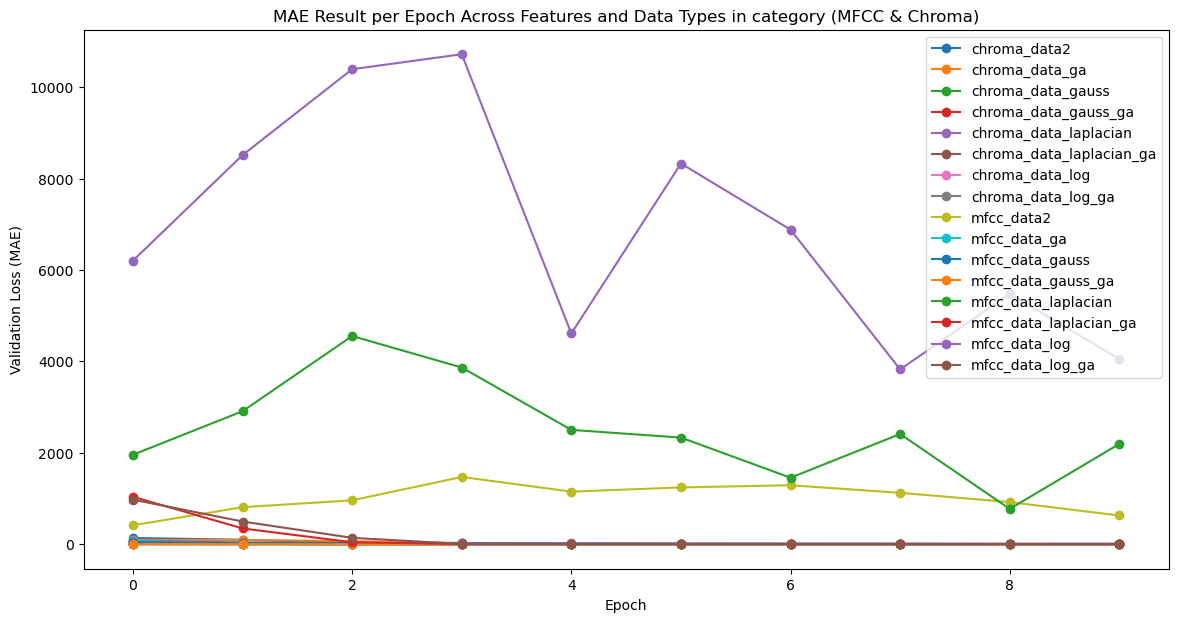

MAE Result : 0.954865574836731, feature : chroma_data2
MAE Result : 0.9241056442260742, feature : chroma_data_ga
MAE Result : 0.4315698742866516, feature : chroma_data_gauss
MAE Result : 0.0123941320925951, feature : chroma_data_gauss_ga
MAE Result : 9.200218200683594, feature : chroma_data_laplacian
MAE Result : 0.0597253143787384, feature : chroma_data_laplacian_ga
MAE Result : 1.035122036933899, feature : chroma_data_log
MAE Result : 1.0469931364059448, feature : chroma_data_log_ga
MAE Result : 414.97515869140625, feature : mfcc_data2
MAE Result : 2.44216251373291, feature : mfcc_data_ga
MAE Result : 5.50054931640625, feature : mfcc_data_gauss
MAE Result : 0.12155009061098099, feature : mfcc_data_gauss_ga
MAE Result : 772.2281494140625, feature : mfcc_data_laplacian
MAE Result : 4.516032695770264, feature : mfcc_data_laplacian_ga
MAE Result : 3824.73876953125, feature : mfcc_data_log
MAE Result : 6.828526496887207, feature : mfcc_data_log_ga


In [ ]:
#MFCC-CHROMA

def process_features(data, feature_type):
    if feature_type == 'stft':
        return librosa.istft(data)
    elif feature_type in ['mfcc', 'chroma']:

        if data.ndim == 2:
            return data.reshape(data.shape[0], data.shape[1], 1)
        else:
            return data
    else:
        raise ValueError("Unsupported feature type")

def create_sequences(data, seq_length):
    X, Y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        Y.append(data[i + seq_length])
    return np.array(X), np.array(Y)

feature_types = ['chroma', 'mfcc']
data_names = ['data2', 'data_ga', 'data_gauss', 'data_gauss_ga', 'data_laplacian',
              'data_laplacian_ga', 'data_log', 'data_log_ga']

mse_results = {}
losses_over_epochs = {}

for feature_type in feature_types:
    hdf5_file_path = f'cat_{feature_type}_features2.h5'
    with h5py.File(hdf5_file_path, 'r+') as hdf5_file:
        for data_name in tqdm(data_names, desc=f"Processing {feature_type}"):
            data = hdf5_file[data_name][:]

            if data.ndim == 2 and data.shape[0] > 0:
                data = np.expand_dims(data, axis=-1)

                t, y = process_features(data, feature_type), np.roll(data, -1, axis=0)
                t, y = t[:-1], y[:-1]

                if len(t) > 10:
                    X_train, y_train = create_sequences(t, 2)
                    X_test, y_test = create_sequences(y, 2)

                    if X_train.size > 0 and X_test.size > 0:
                        model = Sequential([
                            Conv1D(8, 1, activation='relu', input_shape=(2, data.shape[1])),
                            MaxPooling1D(2),
                            Flatten(),
                            Dense(50, activation='relu'),
                            Dense(1)
                        ])
                        model.compile(optimizer='adam', loss="mean_absolute_error")
                        history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test), verbose=2)

            mse_results[f'{feature_type}_{data_name}'] = history.history['val_loss']
            print(f'MAE Result for {feature_type} {data_name}:', np.min(history.history['val_loss']))

plt.figure(figsize=(14, 7))
for key, losses in mse_results.items():
    plt.plot(losses, label=key, marker='o', linestyle='-')
plt.ylabel('Validation Loss (MAE)')
plt.xlabel('Epoch')
plt.title('MAE Result per Epoch Across Features and Data Types in category (MFCC & Chroma)')
plt.legend()
plt.show()


for key, losses in mse_results.items():
    los = np.min(losses)
    print(f'MAE Result : {los}, feature : {key}')


**DANi**

Processing data_dani:   0%|          | 0/4 [00:00<?, ?it/s]/Users/indraawal/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/10
503643/503643 - 172s - 341us/step - loss: 0.0014 - val_loss: 0.0013
Epoch 2/10
503643/503643 - 170s - 338us/step - loss: 0.0014 - val_loss: 0.0013
Epoch 3/10
503643/503643 - 168s - 333us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 4/10
503643/503643 - 167s - 332us/step - loss: 0.0014 - val_loss: 0.0013
Epoch 5/10
503643/503643 - 170s - 337us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 6/10
503643/503643 - 171s - 339us/step - loss: 0.0014 - val_loss: 0.0013
Epoch 7/10
503643/503643 - 175s - 347us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 8/10
503643/503643 - 174s - 346us/step - loss: 0.0014 - val_loss: 0.0013
Epoch 9/10
503643/503643 - 170s - 337us/step - loss: 0.0014 - val_loss: 0.0013
Epoch 10/10
503643/503643 - 171s - 339us/step - loss: 0.0014 - val_loss: 0.0013


Processing data_dani:  25%|██▌       | 1/4 [28:54<1:26:43, 1734.42s/it]

Epoch 1/10
503643/503643 - 172s - 341us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 2/10
503643/503643 - 169s - 335us/step - loss: 0.0014 - val_loss: 0.0013
Epoch 3/10
503643/503643 - 169s - 336us/step - loss: 0.0014 - val_loss: 0.0013
Epoch 4/10
503643/503643 - 170s - 338us/step - loss: 0.0014 - val_loss: 0.0013
Epoch 5/10
503643/503643 - 170s - 337us/step - loss: 0.0014 - val_loss: 0.0013
Epoch 6/10
503643/503643 - 170s - 337us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 7/10
503643/503643 - 171s - 339us/step - loss: 0.0014 - val_loss: 0.0013
Epoch 8/10
503643/503643 - 167s - 332us/step - loss: 0.0014 - val_loss: 0.0013
Epoch 9/10
503643/503643 - 166s - 330us/step - loss: 0.0014 - val_loss: 0.0013
Epoch 10/10
503643/503643 - 166s - 329us/step - loss: 0.0014 - val_loss: 0.0013


Processing data_dani:  50%|█████     | 2/4 [57:28<57:25, 1722.71s/it]  

Epoch 1/10
503643/503643 - 169s - 336us/step - loss: 0.0014 - val_loss: 0.0013
Epoch 2/10
503643/503643 - 167s - 332us/step - loss: 0.0014 - val_loss: 0.0013
Epoch 3/10
503643/503643 - 166s - 329us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 4/10
503643/503643 - 165s - 327us/step - loss: 0.0014 - val_loss: 0.0013
Epoch 5/10
503643/503643 - 165s - 327us/step - loss: 0.0014 - val_loss: 0.0013
Epoch 6/10
503643/503643 - 166s - 330us/step - loss: 0.0014 - val_loss: 0.0013
Epoch 7/10
503643/503643 - 166s - 329us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 8/10
503643/503643 - 166s - 329us/step - loss: 0.0014 - val_loss: 0.0013
Epoch 9/10
503643/503643 - 166s - 329us/step - loss: 0.0014 - val_loss: 0.0015
Epoch 10/10
503643/503643 - 166s - 329us/step - loss: 0.0014 - val_loss: 0.0013


Processing data_dani:  75%|███████▌  | 3/4 [1:25:32<28:24, 1704.83s/it]

Epoch 1/10
503643/503643 - 169s - 336us/step - loss: 0.0014 - val_loss: 0.0013
Epoch 2/10
503643/503643 - 168s - 334us/step - loss: 0.0014 - val_loss: 0.0013
Epoch 3/10
503643/503643 - 165s - 328us/step - loss: 0.0014 - val_loss: 0.0013
Epoch 4/10
503643/503643 - 165s - 327us/step - loss: 0.0014 - val_loss: 0.0013
Epoch 5/10
503643/503643 - 166s - 330us/step - loss: 0.0014 - val_loss: 0.0013
Epoch 6/10
503643/503643 - 166s - 329us/step - loss: 0.0014 - val_loss: 0.0015
Epoch 7/10
503643/503643 - 166s - 330us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 8/10
503643/503643 - 169s - 335us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 9/10
503643/503643 - 170s - 337us/step - loss: 0.0014 - val_loss: 0.0013
Epoch 10/10
503643/503643 - 169s - 335us/step - loss: 0.0014 - val_loss: 0.0013


Processing data_dani_ga:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1/10
251998/251998 - 86s - 342us/step - loss: 0.0013 - val_loss: 0.0012
Epoch 2/10
251998/251998 - 86s - 343us/step - loss: 0.0013 - val_loss: 0.0012
Epoch 3/10
251998/251998 - 89s - 353us/step - loss: 0.0013 - val_loss: 0.0012
Epoch 4/10
251998/251998 - 88s - 348us/step - loss: 0.0013 - val_loss: 0.0012
Epoch 5/10
251998/251998 - 86s - 340us/step - loss: 0.0013 - val_loss: 0.0012
Epoch 6/10
251998/251998 - 85s - 336us/step - loss: 0.0013 - val_loss: 0.0012
Epoch 7/10
251998/251998 - 86s - 341us/step - loss: 0.0013 - val_loss: 0.0012
Epoch 8/10
251998/251998 - 85s - 339us/step - loss: 0.0013 - val_loss: 0.0012
Epoch 9/10
251998/251998 - 86s - 341us/step - loss: 0.0013 - val_loss: 0.0012
Epoch 10/10
251998/251998 - 85s - 336us/step - loss: 0.0013 - val_loss: 0.0012


Processing data_dani_ga:  25%|██▌       | 1/4 [14:31<43:34, 871.60s/it]

Epoch 1/10
251998/251998 - 87s - 344us/step - loss: 0.0013 - val_loss: 0.0012
Epoch 2/10
251998/251998 - 86s - 340us/step - loss: 0.0013 - val_loss: 0.0012
Epoch 3/10
251998/251998 - 88s - 348us/step - loss: 0.0013 - val_loss: 0.0012
Epoch 4/10
251998/251998 - 89s - 352us/step - loss: 0.0013 - val_loss: 0.0012
Epoch 5/10
251998/251998 - 91s - 363us/step - loss: 0.0013 - val_loss: 0.0012
Epoch 6/10
251998/251998 - 86s - 343us/step - loss: 0.0013 - val_loss: 0.0012
Epoch 7/10
251998/251998 - 86s - 342us/step - loss: 0.0013 - val_loss: 0.0012
Epoch 8/10
251998/251998 - 83s - 330us/step - loss: 0.0013 - val_loss: 0.0012
Epoch 9/10
251998/251998 - 87s - 345us/step - loss: 0.0013 - val_loss: 0.0012
Epoch 10/10
251998/251998 - 91s - 361us/step - loss: 0.0013 - val_loss: 0.0012


Processing data_dani_ga:  50%|█████     | 2/4 [29:15<29:18, 879.08s/it]

Epoch 1/10
251998/251998 - 100s - 398us/step - loss: 0.0013 - val_loss: 0.0012
Epoch 2/10
251998/251998 - 90s - 357us/step - loss: 0.0013 - val_loss: 0.0012
Epoch 3/10
251998/251998 - 94s - 373us/step - loss: 0.0013 - val_loss: 0.0013
Epoch 4/10
251998/251998 - 92s - 365us/step - loss: 0.0013 - val_loss: 0.0012
Epoch 5/10
251998/251998 - 89s - 353us/step - loss: 0.0013 - val_loss: 0.0013
Epoch 6/10
251998/251998 - 88s - 350us/step - loss: 0.0013 - val_loss: 0.0012
Epoch 7/10
251998/251998 - 91s - 360us/step - loss: 0.0013 - val_loss: 0.0012
Epoch 8/10
251998/251998 - 84s - 334us/step - loss: 0.0013 - val_loss: 0.0012
Epoch 9/10
251998/251998 - 84s - 333us/step - loss: 0.0013 - val_loss: 0.0012
Epoch 10/10
251998/251998 - 85s - 336us/step - loss: 0.0013 - val_loss: 0.0012


Processing data_dani_ga:  75%|███████▌  | 3/4 [44:25<14:53, 893.01s/it]

Epoch 1/10
251998/251998 - 85s - 339us/step - loss: 0.0013 - val_loss: 0.0012
Epoch 2/10
251998/251998 - 83s - 328us/step - loss: 0.0013 - val_loss: 0.0012
Epoch 3/10
251998/251998 - 83s - 331us/step - loss: 0.0013 - val_loss: 0.0012
Epoch 4/10
251998/251998 - 85s - 336us/step - loss: 0.0013 - val_loss: 0.0012
Epoch 5/10
251998/251998 - 86s - 343us/step - loss: 0.0013 - val_loss: 0.0012
Epoch 6/10
251998/251998 - 86s - 340us/step - loss: 0.0013 - val_loss: 0.0012
Epoch 7/10
251998/251998 - 84s - 335us/step - loss: 0.0013 - val_loss: 0.0012
Epoch 8/10
251998/251998 - 88s - 349us/step - loss: 0.0013 - val_loss: 0.0012
Epoch 9/10
251998/251998 - 88s - 348us/step - loss: 0.0013 - val_loss: 0.0012
Epoch 10/10
251998/251998 - 85s - 339us/step - loss: 0.0013 - val_loss: 0.0012


Processing data_dani_ga: 100%|██████████| 4/4 [58:49<00:00, 882.45s/it]


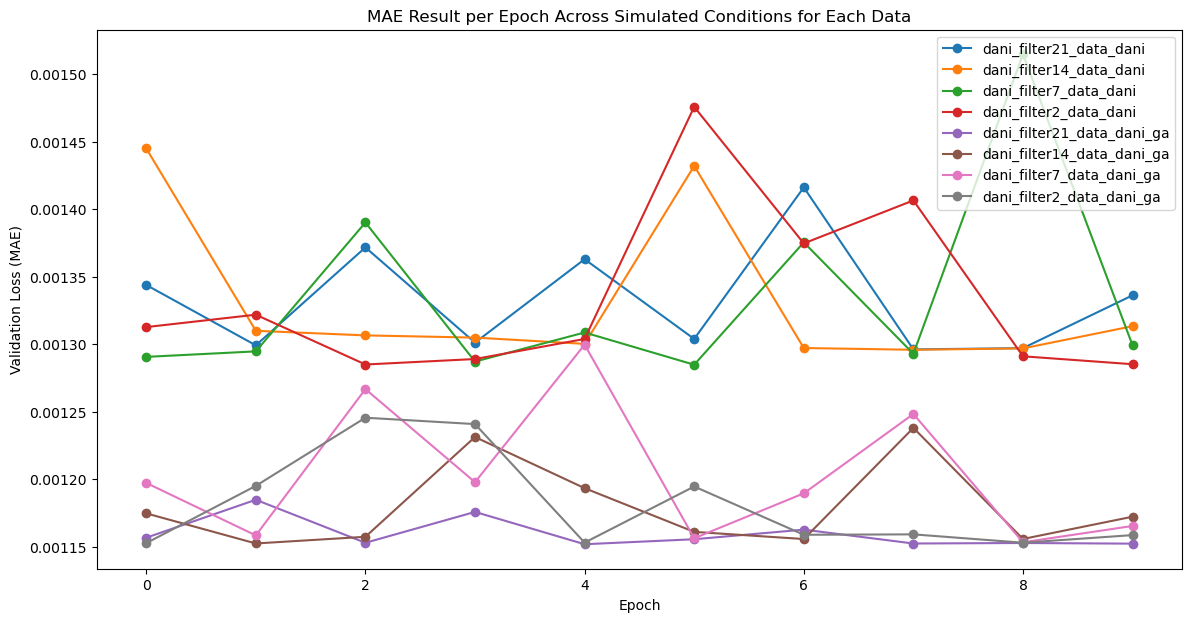

MAE Result for dani_filter21_data_dani: 0.0012961974134668708
MAE Result for dani_filter14_data_dani: 0.0012959123123437166
MAE Result for dani_filter7_data_dani: 0.0012848415644839406
MAE Result for dani_filter2_data_dani: 0.001285007456317544
MAE Result for dani_filter21_data_dani_ga: 0.0011518518440425396
MAE Result for dani_filter14_data_dani_ga: 0.0011524130823090672
MAE Result for dani_filter7_data_dani_ga: 0.0011533041251823306
MAE Result for dani_filter2_data_dani_ga: 0.001152643235400319


In [ ]:
#21,14,7,2

def process_features(data, feature_type):
    if feature_type == 'filter':
        return librosa.istft(data)

def create_sequences(data, seq_length):
    X, Y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        Y.append(data[i + seq_length])
    return np.array(X), np.array(Y)

def process(hdf5_file_path):
    with h5py.File(hdf5_file_path, 'r+') as hdf5_file:
      for data_name in tqdm(data_names, desc=f"Processing {data_name}"):
          data = hdf5_file[data_name][:]
          t, y = process_features(data, 'filter'), np.roll(data, -1)
          t, y = t[:-1], y[:-1]

          train_size = int(0.8 * len(t))
          train_data, test_data = t[:train_size], t[train_size:]
          train_labels, test_labels = y[:train_size], y[train_size:]

          X_train, y_train = create_sequences(train_data, 2)
          X_test, y_test = create_sequences(test_data, 2)

          X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
          X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

          model = Sequential([
              Conv1D(8, 1, activation='relu', input_shape=(2, 1)),
              MaxPooling1D(2),
              Flatten(),
              Dense(50, activation='relu'),
              Dense(1)
          ])
          model.compile(optimizer='adam', loss='mean_absolute_error')
          history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test), verbose=2)

          mse_results[f"{hdf5_file}_{data_name}"] = history.history['val_loss']


hdf5_files = ['dani_filter21.h5', 'dani_filter14.h5', 'dani_filter7.h5', 'dani_filter2.h5']
data_names = ['data_dani', 'data_dani_ga']

mse_results = {}

for file_path in hdf5_files:
    process(file_path)


plt.figure(figsize=(14, 7))
for key, losses in mse_results.items():
    plt.plot(losses, label=key, marker='o', linestyle='-')
plt.ylabel('Validation Loss (MAE)')
plt.xlabel('Epoch')
plt.title('MAE Result per Epoch Across Simulated Conditions for Each Data')
plt.legend()
plt.show()


for key, losses in mse_results.items():
    print(f'MAE Result for {key}: {np.min(losses)}')


**LSTM**

/Users/indraawal/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


503643/503643 ━━━━━━━━━━━━━━━━━━━━ 472s 935us/step - loss: 5.2903e-09
251822/251822 ━━━━━━━━━━━━━━━━━━━━ 89s 352us/step


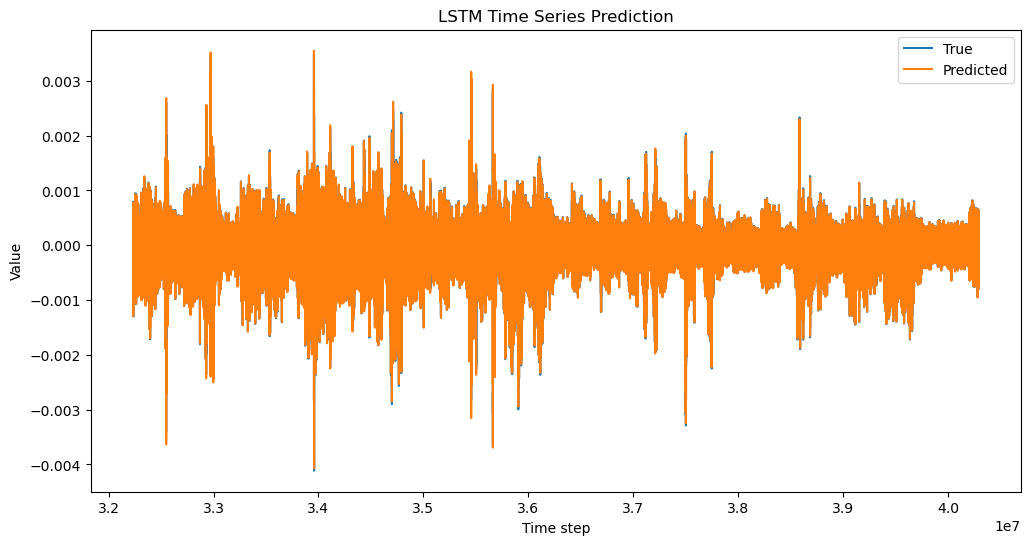

In [ ]:
hdf5_file_path = 'cat_stft_features21.h5'
with h5py.File(hdf5_file_path, 'r+') as hdf5_file:
    data = hdf5_file['data2'][:]
    t = librosa.istft(np.abs(data))
    y = np.roll(t, -1)
    t = t[:-1]
    y = y[:-1]

seq_length = 2
def create_sequences(data, seq_length):
    X, Y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        Y.append(data[i + seq_length])
    return np.array(X), np.array(Y)

X, Y = create_sequences(t, seq_length)
X = X.reshape((X.shape[0], X.shape[1], 1))


split_idx = int(0.8 * len(X))
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = Y[:split_idx], Y[split_idx:]

model = Sequential([
    LSTM(50, input_shape=(seq_length, 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=1, batch_size=64, verbose=1)
y_pred = model.predict(X_test)

plt.figure(figsize=(12, 6))
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, label='True')
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred.flatten(), label='Predicted')
plt.legend()
plt.title('LSTM Time Series Prediction')
plt.xlabel('Time step')
plt.ylabel('Value')
plt.show()


**STFT**

Processing:   0%|          | 0/8 [00:00<?, ?it/s]/Users/indraawal/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
503643/503643 - 239s - 475us/step - loss: 1.6864e-08 - val_loss: 1.4698e-08
Epoch 2/10
503643/503643 - 237s - 471us/step - loss: 1.3512e-08 - val_loss: 1.4775e-08
Epoch 3/10
503643/503643 - 238s - 472us/step - loss: 1.3416e-08 - val_loss: 1.7257e-08
Epoch 4/10
503643/503643 - 238s - 473us/step - loss: 1.3353e-08 - val_loss: 1.4603e-08
Epoch 5/10
503643/503643 - 237s - 470us/step - loss: 1.3307e-08 - val_loss: 1.5819e-08
Epoch 6/10
503643/503643 - 234s - 464us/step - loss: 1.3317e-08 - val_loss: 1.4471e-08
Epoch 7/10
503643/503643 - 241s - 479us/step - loss: 1.3261e-08 - val_loss: 2.8735e-08
Epoch 8/10
503643/503643 - 234s - 464us/step - loss: 1.3257e-08 - val_loss: 1.4871e-08
Epoch 9/10
503643/503643 - 234s - 464us/step - loss: 1.3279e-08 - val_loss: 1.7226e-08
Epoch 10/10
503643/503643 - 235s - 466us/step - loss: 1.3224e-08 - val_loss: 1.8537e-08


Processing:  12%|█▎        | 1/8 [39:54<4:39:20, 2394.35s/it]

Validation loss for stft_features21 data2: 1.4471188691800307e-08
Epoch 1/10
251104/251104 - 101s - 400us/step - loss: 4.1791e-09 - val_loss: 5.0475e-09
Epoch 2/10
251104/251104 - 103s - 409us/step - loss: 3.1350e-09 - val_loss: 1.9520e-09
Epoch 3/10
251104/251104 - 101s - 401us/step - loss: 2.3024e-09 - val_loss: 6.8430e-10
Epoch 4/10
251104/251104 - 100s - 400us/step - loss: 1.6741e-09 - val_loss: 6.8654e-10
Epoch 5/10
251104/251104 - 100s - 399us/step - loss: 1.6507e-09 - val_loss: 8.0223e-10
Epoch 6/10
251104/251104 - 101s - 400us/step - loss: 1.6245e-09 - val_loss: 1.8506e-09
Epoch 7/10
251104/251104 - 100s - 399us/step - loss: 1.6104e-09 - val_loss: 1.2648e-09
Epoch 8/10
251104/251104 - 100s - 400us/step - loss: 1.5930e-09 - val_loss: 1.6232e-09
Epoch 9/10
251104/251104 - 100s - 399us/step - loss: 1.5836e-09 - val_loss: 3.8439e-09
Epoch 10/10
251104/251104 - 100s - 400us/step - loss: 1.5732e-09 - val_loss: 1.9595e-09


Processing:  25%|██▌       | 2/8 [56:51<2:38:25, 1584.33s/it]

Validation loss for stft_features21 data_ga: 6.8430150435006e-10
Epoch 1/10
503643/503643 - 233s - 463us/step - loss: 2.1382e-09 - val_loss: 1.5476e-09
Epoch 2/10
503643/503643 - 233s - 464us/step - loss: 1.5102e-09 - val_loss: 4.6666e-10
Epoch 3/10
503643/503643 - 234s - 465us/step - loss: 1.4184e-09 - val_loss: 9.9060e-10
Epoch 4/10
503643/503643 - 234s - 465us/step - loss: 1.3645e-09 - val_loss: 1.0169e-09
Epoch 5/10
503643/503643 - 234s - 465us/step - loss: 1.3253e-09 - val_loss: 3.6631e-10
Epoch 6/10
503643/503643 - 235s - 467us/step - loss: 1.2932e-09 - val_loss: 3.9743e-10
Epoch 7/10
503643/503643 - 243s - 482us/step - loss: 1.2642e-09 - val_loss: 3.3172e-10
Epoch 8/10
503643/503643 - 234s - 465us/step - loss: 1.2356e-09 - val_loss: 1.1078e-09
Epoch 9/10
503643/503643 - 234s - 465us/step - loss: 1.2048e-09 - val_loss: 1.0055e-09
Epoch 10/10
503643/503643 - 236s - 468us/step - loss: 1.1647e-09 - val_loss: 2.7902e-10


Processing:  38%|███▊      | 3/8 [1:36:25<2:42:04, 1944.97s/it]

Validation loss for stft_features21 data_gauss: 2.790170594568764e-10
Epoch 1/10
251294/251294 - 117s - 465us/step - loss: 2.5150e-09 - val_loss: 5.7007e-10
Epoch 2/10
251294/251294 - 117s - 465us/step - loss: 1.7809e-09 - val_loss: 5.0520e-10
Epoch 3/10
251294/251294 - 117s - 466us/step - loss: 1.6216e-09 - val_loss: 1.3412e-09
Epoch 4/10
251294/251294 - 117s - 466us/step - loss: 1.5354e-09 - val_loss: 3.7938e-10
Epoch 5/10
251294/251294 - 117s - 467us/step - loss: 1.4785e-09 - val_loss: 4.2177e-10
Epoch 6/10
251294/251294 - 117s - 466us/step - loss: 1.4358e-09 - val_loss: 3.1274e-10
Epoch 7/10
251294/251294 - 117s - 466us/step - loss: 1.3988e-09 - val_loss: 2.7754e-09
Epoch 8/10
251294/251294 - 118s - 469us/step - loss: 1.3661e-09 - val_loss: 3.4521e-10
Epoch 9/10
251294/251294 - 117s - 466us/step - loss: 1.3293e-09 - val_loss: 6.6590e-10
Epoch 10/10
251294/251294 - 117s - 467us/step - loss: 1.3043e-09 - val_loss: 7.6093e-10


Processing:  50%|█████     | 4/8 [1:56:07<1:49:33, 1643.48s/it]

Validation loss for stft_features21 data_gauss_ga: 3.127432757210613e-10
Epoch 1/10
503643/503643 - 235s - 468us/step - loss: 1.6438e-08 - val_loss: 1.5582e-08
Epoch 2/10
503643/503643 - 237s - 470us/step - loss: 1.2755e-08 - val_loss: 1.5285e-08
Epoch 3/10
503643/503643 - 237s - 470us/step - loss: 1.2665e-08 - val_loss: 1.6809e-08
Epoch 4/10
503643/503643 - 236s - 468us/step - loss: 1.2598e-08 - val_loss: 1.6835e-08
Epoch 5/10
503643/503643 - 237s - 471us/step - loss: 1.2551e-08 - val_loss: 1.5689e-08
Epoch 6/10
503643/503643 - 237s - 470us/step - loss: 1.2532e-08 - val_loss: 1.6668e-08
Epoch 7/10
503643/503643 - 239s - 474us/step - loss: 1.2506e-08 - val_loss: 1.5430e-08
Epoch 8/10
503643/503643 - 238s - 473us/step - loss: 1.2475e-08 - val_loss: 1.6030e-08
Epoch 9/10
503643/503643 - 237s - 471us/step - loss: 1.2469e-08 - val_loss: 1.5286e-08
Epoch 10/10
503643/503643 - 237s - 470us/step - loss: 1.2456e-08 - val_loss: 1.5735e-08


Processing:  62%|██████▎   | 5/8 [2:35:58<1:35:39, 1913.30s/it]

Validation loss for stft_features21 data_laplacian: 1.5284804533166607e-08
Epoch 1/10
251820/251820 - 117s - 465us/step - loss: 1.2378e-08 - val_loss: 8.9441e-09
Epoch 2/10
251820/251820 - 117s - 466us/step - loss: 6.2085e-09 - val_loss: 2.1469e-08
Epoch 3/10
251820/251820 - 117s - 464us/step - loss: 6.1079e-09 - val_loss: 1.1337e-08
Epoch 4/10
251820/251820 - 117s - 466us/step - loss: 6.0472e-09 - val_loss: 8.9797e-09
Epoch 5/10
251820/251820 - 118s - 468us/step - loss: 6.0041e-09 - val_loss: 6.1387e-09
Epoch 6/10
251820/251820 - 118s - 468us/step - loss: 5.9836e-09 - val_loss: 6.1768e-09
Epoch 7/10
251820/251820 - 117s - 466us/step - loss: 5.9517e-09 - val_loss: 1.2245e-08
Epoch 8/10
251820/251820 - 117s - 465us/step - loss: 5.9383e-09 - val_loss: 1.4225e-08
Epoch 9/10
251820/251820 - 117s - 465us/step - loss: 5.9160e-09 - val_loss: 7.0779e-09
Epoch 10/10
251820/251820 - 117s - 465us/step - loss: 5.8856e-09 - val_loss: 6.6282e-09


Processing:  75%|███████▌  | 6/8 [2:55:41<55:29, 1664.83s/it]  

Validation loss for stft_features21 data_laplacian_ga: 6.138714869763362e-09
Epoch 1/10
503643/503643 - 234s - 465us/step - loss: 1.9194e-08 - val_loss: 2.5677e-08
Epoch 2/10
503643/503643 - 234s - 464us/step - loss: 1.5358e-08 - val_loss: 2.0579e-08
Epoch 3/10
503643/503643 - 234s - 465us/step - loss: 1.5250e-08 - val_loss: 4.1124e-08
Epoch 4/10
503643/503643 - 235s - 466us/step - loss: 1.5183e-08 - val_loss: 3.2563e-08
Epoch 5/10
503643/503643 - 234s - 465us/step - loss: 1.5181e-08 - val_loss: 2.0507e-08
Epoch 6/10
503643/503643 - 234s - 465us/step - loss: 1.5145e-08 - val_loss: 2.8575e-08
Epoch 7/10
503643/503643 - 235s - 466us/step - loss: 1.5089e-08 - val_loss: 1.8781e-08
Epoch 8/10
503643/503643 - 234s - 465us/step - loss: 1.5093e-08 - val_loss: 2.4191e-08
Epoch 9/10
503643/503643 - 235s - 466us/step - loss: 1.5086e-08 - val_loss: 2.4252e-08
Epoch 10/10
503643/503643 - 235s - 466us/step - loss: 1.5049e-08 - val_loss: 2.2710e-08


Processing:  88%|████████▊ | 7/8 [3:35:06<31:33, 1893.89s/it]

Validation loss for stft_features21 data_log: 1.87813871121989e-08
Epoch 1/10
251269/251269 - 118s - 468us/step - loss: 1.3885e-08 - val_loss: 9.4114e-09
Epoch 2/10
251269/251269 - 117s - 467us/step - loss: 8.7072e-09 - val_loss: 1.0341e-08
Epoch 3/10
251269/251269 - 117s - 466us/step - loss: 8.6001e-09 - val_loss: 1.2315e-08
Epoch 4/10
251269/251269 - 117s - 467us/step - loss: 8.5198e-09 - val_loss: 1.1119e-08
Epoch 5/10
251269/251269 - 119s - 472us/step - loss: 8.4786e-09 - val_loss: 1.0258e-08
Epoch 6/10
251269/251269 - 118s - 468us/step - loss: 8.4577e-09 - val_loss: 9.6990e-09
Epoch 7/10
251269/251269 - 118s - 470us/step - loss: 8.4472e-09 - val_loss: 9.3530e-09
Epoch 8/10
251269/251269 - 117s - 467us/step - loss: 8.3963e-09 - val_loss: 9.3050e-09
Epoch 9/10
251269/251269 - 117s - 467us/step - loss: 8.3839e-09 - val_loss: 1.0714e-08
Epoch 10/10
251269/251269 - 117s - 467us/step - loss: 8.3892e-09 - val_loss: 1.8104e-08


Processing: 100%|██████████| 8/8 [3:54:51<00:00, 1761.48s/it]


Validation loss for stft_features21 data_log_ga: 9.30497545681419e-09


Processing:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/10
503643/503643 - 235s - 466us/step - loss: 2.2415e-08 - val_loss: 1.5519e-08
Epoch 2/10
503643/503643 - 236s - 469us/step - loss: 1.3522e-08 - val_loss: 1.4467e-08
Epoch 3/10
503643/503643 - 237s - 470us/step - loss: 1.3393e-08 - val_loss: 1.8621e-08
Epoch 4/10
503643/503643 - 237s - 470us/step - loss: 1.3358e-08 - val_loss: 1.4457e-08
Epoch 5/10
503643/503643 - 236s - 469us/step - loss: 1.3314e-08 - val_loss: 2.2486e-08
Epoch 6/10
503643/503643 - 237s - 471us/step - loss: 1.3277e-08 - val_loss: 1.4970e-08
Epoch 7/10
503643/503643 - 235s - 466us/step - loss: 1.3263e-08 - val_loss: 1.4465e-08
Epoch 8/10
503643/503643 - 235s - 466us/step - loss: 1.3218e-08 - val_loss: 1.6723e-08
Epoch 9/10
503643/503643 - 235s - 467us/step - loss: 1.3208e-08 - val_loss: 2.4518e-08
Epoch 10/10
503643/503643 - 236s - 469us/step - loss: 1.3207e-08 - val_loss: 1.4341e-08


Processing:  12%|█▎        | 1/8 [39:40<4:37:46, 2380.99s/it]

Validation loss for stft_features14 data2: 1.4341444476428933e-08
Epoch 1/10
251104/251104 - 101s - 401us/step - loss: 8.0317e-09 - val_loss: 2.6495e-09
Epoch 2/10
251104/251104 - 102s - 405us/step - loss: 3.3384e-09 - val_loss: 9.3816e-09
Epoch 3/10
251104/251104 - 102s - 405us/step - loss: 2.9807e-09 - val_loss: 2.5701e-09
Epoch 4/10
251104/251104 - 100s - 400us/step - loss: 2.2587e-09 - val_loss: 2.1463e-09
Epoch 5/10
251104/251104 - 101s - 400us/step - loss: 1.6412e-09 - val_loss: 1.0618e-09
Epoch 6/10
251104/251104 - 101s - 401us/step - loss: 1.6207e-09 - val_loss: 8.6495e-10
Epoch 7/10
251104/251104 - 101s - 401us/step - loss: 1.6071e-09 - val_loss: 9.9875e-10
Epoch 8/10
251104/251104 - 101s - 400us/step - loss: 1.5938e-09 - val_loss: 6.8397e-10
Epoch 9/10
251104/251104 - 102s - 406us/step - loss: 1.5800e-09 - val_loss: 2.6088e-09
Epoch 10/10
251104/251104 - 100s - 400us/step - loss: 1.5684e-09 - val_loss: 1.7659e-09


Processing:  25%|██▌       | 2/8 [56:39<2:37:55, 1579.32s/it]

Validation loss for stft_features14 data_ga: 6.839712685113852e-10
Epoch 1/10
503643/503643 - 234s - 464us/step - loss: 1.9376e-09 - val_loss: 2.6973e-09
Epoch 2/10
503643/503643 - 234s - 464us/step - loss: 1.5101e-09 - val_loss: 3.9873e-10
Epoch 3/10
503643/503643 - 234s - 464us/step - loss: 1.4225e-09 - val_loss: 8.2357e-10
Epoch 4/10
503643/503643 - 234s - 464us/step - loss: 1.3712e-09 - val_loss: 1.1598e-09
Epoch 5/10
503643/503643 - 234s - 465us/step - loss: 1.3350e-09 - val_loss: 6.1142e-10
Epoch 6/10
503643/503643 - 234s - 464us/step - loss: 1.3041e-09 - val_loss: 2.4785e-09
Epoch 7/10
503643/503643 - 234s - 464us/step - loss: 1.2777e-09 - val_loss: 3.2070e-09
Epoch 8/10
503643/503643 - 234s - 464us/step - loss: 1.2515e-09 - val_loss: 1.2193e-09
Epoch 9/10
503643/503643 - 234s - 464us/step - loss: 1.2265e-09 - val_loss: 2.5703e-09
Epoch 10/10
503643/503643 - 234s - 465us/step - loss: 1.1982e-09 - val_loss: 1.1476e-09


Processing:  38%|███▊      | 3/8 [1:35:59<2:41:19, 1935.93s/it]

Validation loss for stft_features14 data_gauss: 3.987300489782797e-10
Epoch 1/10
251294/251294 - 117s - 465us/step - loss: 3.0022e-09 - val_loss: 3.4549e-09
Epoch 2/10
251294/251294 - 117s - 464us/step - loss: 1.6243e-09 - val_loss: 3.0077e-09
Epoch 3/10
251294/251294 - 117s - 464us/step - loss: 1.4837e-09 - val_loss: 4.0424e-10
Epoch 4/10
251294/251294 - 117s - 464us/step - loss: 1.4122e-09 - val_loss: 1.2870e-09
Epoch 5/10
251294/251294 - 117s - 464us/step - loss: 1.3646e-09 - val_loss: 3.4187e-09
Epoch 6/10
251294/251294 - 117s - 464us/step - loss: 1.3329e-09 - val_loss: 3.2106e-10
Epoch 7/10
251294/251294 - 117s - 464us/step - loss: 1.3054e-09 - val_loss: 2.7201e-10
Epoch 8/10
251294/251294 - 117s - 464us/step - loss: 1.2835e-09 - val_loss: 8.1355e-10
Epoch 9/10
251294/251294 - 117s - 464us/step - loss: 1.2662e-09 - val_loss: 1.9930e-09
Epoch 10/10
251294/251294 - 117s - 464us/step - loss: 1.2478e-09 - val_loss: 1.4633e-09


Processing:  50%|█████     | 4/8 [1:55:35<1:49:03, 1635.96s/it]

Validation loss for stft_features14 data_gauss_ga: 2.7201030317058894e-10
Epoch 1/10
503643/503643 - 233s - 463us/step - loss: 1.5451e-08 - val_loss: 1.8630e-08
Epoch 2/10
503643/503643 - 234s - 464us/step - loss: 1.2762e-08 - val_loss: 1.6495e-08
Epoch 3/10
503643/503643 - 234s - 465us/step - loss: 1.2633e-08 - val_loss: 1.6258e-08
Epoch 4/10
503643/503643 - 234s - 464us/step - loss: 1.2584e-08 - val_loss: 1.5580e-08
Epoch 5/10
503643/503643 - 234s - 464us/step - loss: 1.2566e-08 - val_loss: 1.5565e-08
Epoch 6/10
503643/503643 - 235s - 466us/step - loss: 1.2535e-08 - val_loss: 1.7011e-08
Epoch 7/10
503643/503643 - 235s - 466us/step - loss: 1.2516e-08 - val_loss: 1.6621e-08
Epoch 8/10
503643/503643 - 234s - 465us/step - loss: 1.2490e-08 - val_loss: 1.5894e-08
Epoch 9/10
503643/503643 - 235s - 466us/step - loss: 1.2478e-08 - val_loss: 1.5553e-08
Epoch 10/10
503643/503643 - 233s - 463us/step - loss: 1.2474e-08 - val_loss: 1.5232e-08


Processing:  62%|██████▎   | 5/8 [2:34:58<1:34:54, 1898.24s/it]

Validation loss for stft_features14 data_laplacian: 1.523153869698035e-08
Epoch 1/10
251820/251820 - 117s - 465us/step - loss: 1.3410e-08 - val_loss: 1.0878e-08
Epoch 2/10
251820/251820 - 117s - 465us/step - loss: 6.2070e-09 - val_loss: 9.5970e-09
Epoch 3/10
251820/251820 - 118s - 470us/step - loss: 6.0948e-09 - val_loss: 1.6143e-08
Epoch 4/10
251820/251820 - 117s - 465us/step - loss: 6.0497e-09 - val_loss: 1.1264e-08
Epoch 5/10
251820/251820 - 117s - 465us/step - loss: 5.9922e-09 - val_loss: 6.1334e-09
Epoch 6/10
251820/251820 - 117s - 466us/step - loss: 5.9637e-09 - val_loss: 6.8532e-09
Epoch 7/10
251820/251820 - 117s - 467us/step - loss: 5.9334e-09 - val_loss: 7.2842e-09
Epoch 8/10
251820/251820 - 117s - 466us/step - loss: 5.9393e-09 - val_loss: 9.2107e-09
Epoch 9/10
251820/251820 - 117s - 466us/step - loss: 5.9131e-09 - val_loss: 6.4098e-09
Epoch 10/10
251820/251820 - 118s - 467us/step - loss: 5.8844e-09 - val_loss: 9.8047e-09


Processing:  75%|███████▌  | 6/8 [2:54:42<55:10, 1655.29s/it]  

Validation loss for stft_features14 data_laplacian_ga: 6.13341955002511e-09
Epoch 1/10
503643/503643 - 235s - 466us/step - loss: 1.8049e-08 - val_loss: 2.5558e-08
Epoch 2/10
503643/503643 - 236s - 469us/step - loss: 1.5379e-08 - val_loss: 1.9437e-08
Epoch 3/10
503643/503643 - 235s - 467us/step - loss: 1.5239e-08 - val_loss: 1.9479e-08
Epoch 4/10
503643/503643 - 235s - 466us/step - loss: 1.5174e-08 - val_loss: 1.8840e-08
Epoch 5/10
503643/503643 - 234s - 464us/step - loss: 1.5150e-08 - val_loss: 2.0591e-08
Epoch 6/10
503643/503643 - 234s - 465us/step - loss: 1.5126e-08 - val_loss: 1.9065e-08
Epoch 7/10
503643/503643 - 234s - 465us/step - loss: 1.5089e-08 - val_loss: 1.9008e-08
Epoch 8/10
503643/503643 - 234s - 465us/step - loss: 1.5088e-08 - val_loss: 2.2709e-08
Epoch 9/10
503643/503643 - 235s - 466us/step - loss: 1.5053e-08 - val_loss: 1.8802e-08
Epoch 10/10
503643/503643 - 235s - 467us/step - loss: 1.5038e-08 - val_loss: 1.8772e-08


Processing:  88%|████████▊ | 7/8 [3:34:12<31:28, 1888.81s/it]

Validation loss for stft_features14 data_log: 1.8772404075662052e-08
Epoch 1/10
251269/251269 - 117s - 466us/step - loss: 1.5439e-08 - val_loss: 9.3196e-09
Epoch 2/10
251269/251269 - 117s - 467us/step - loss: 8.7401e-09 - val_loss: 1.0592e-08
Epoch 3/10
251269/251269 - 117s - 467us/step - loss: 8.6091e-09 - val_loss: 1.3882e-08
Epoch 4/10
251269/251269 - 117s - 466us/step - loss: 8.5353e-09 - val_loss: 1.0155e-08
Epoch 5/10
251269/251269 - 117s - 464us/step - loss: 8.4810e-09 - val_loss: 1.0010e-08
Epoch 6/10
251269/251269 - 118s - 468us/step - loss: 8.4330e-09 - val_loss: 9.3050e-09
Epoch 7/10
251269/251269 - 117s - 464us/step - loss: 8.4353e-09 - val_loss: 9.4234e-09
Epoch 8/10
251269/251269 - 118s - 468us/step - loss: 8.4046e-09 - val_loss: 9.3307e-09
Epoch 9/10
251269/251269 - 117s - 467us/step - loss: 8.3905e-09 - val_loss: 9.9289e-09
Epoch 10/10
251269/251269 - 117s - 467us/step - loss: 8.3756e-09 - val_loss: 2.9210e-08


Processing: 100%|██████████| 8/8 [3:53:53<00:00, 1754.22s/it]


Validation loss for stft_features14 data_log_ga: 9.304952364175278e-09


Processing:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/10
503643/503643 - 234s - 465us/step - loss: 1.6370e-08 - val_loss: 2.4970e-08
Epoch 2/10
503643/503643 - 235s - 467us/step - loss: 1.3529e-08 - val_loss: 2.0419e-08
Epoch 3/10
503643/503643 - 235s - 467us/step - loss: 1.3421e-08 - val_loss: 1.5156e-08
Epoch 4/10
503643/503643 - 235s - 466us/step - loss: 1.3380e-08 - val_loss: 1.4608e-08
Epoch 5/10
503643/503643 - 235s - 467us/step - loss: 1.3341e-08 - val_loss: 1.4678e-08
Epoch 6/10
503643/503643 - 236s - 469us/step - loss: 1.3318e-08 - val_loss: 2.2748e-08
Epoch 7/10
503643/503643 - 235s - 466us/step - loss: 1.3290e-08 - val_loss: 1.4967e-08
Epoch 8/10
503643/503643 - 236s - 468us/step - loss: 1.3281e-08 - val_loss: 1.4281e-08
Epoch 9/10
503643/503643 - 234s - 465us/step - loss: 1.3256e-08 - val_loss: 1.5807e-08
Epoch 10/10
503643/503643 - 235s - 467us/step - loss: 1.3239e-08 - val_loss: 1.4395e-08


Processing:  12%|█▎        | 1/8 [39:33<4:36:53, 2373.37s/it]

Validation loss for stft_features7 data2: 1.4281027027607252e-08
Epoch 1/10
251104/251104 - 101s - 402us/step - loss: 4.1594e-09 - val_loss: 2.9616e-09
Epoch 2/10
251104/251104 - 101s - 401us/step - loss: 2.7900e-09 - val_loss: 1.7963e-09
Epoch 3/10
251104/251104 - 101s - 401us/step - loss: 1.7703e-09 - val_loss: 6.5192e-10
Epoch 4/10
251104/251104 - 101s - 402us/step - loss: 1.6792e-09 - val_loss: 1.3123e-09
Epoch 5/10
251104/251104 - 101s - 402us/step - loss: 1.6575e-09 - val_loss: 1.0530e-09
Epoch 6/10
251104/251104 - 101s - 402us/step - loss: 1.6322e-09 - val_loss: 1.8957e-09
Epoch 7/10
251104/251104 - 101s - 401us/step - loss: 1.6140e-09 - val_loss: 4.1413e-09
Epoch 8/10
251104/251104 - 101s - 401us/step - loss: 1.6004e-09 - val_loss: 6.5714e-10
Epoch 9/10
251104/251104 - 101s - 401us/step - loss: 1.5881e-09 - val_loss: 1.1367e-09
Epoch 10/10
251104/251104 - 101s - 402us/step - loss: 1.5757e-09 - val_loss: 1.0893e-09


Processing:  25%|██▌       | 2/8 [56:31<2:37:35, 1575.90s/it]

Validation loss for stft_features7 data_ga: 6.519163542328954e-10
Epoch 1/10
503643/503643 - 234s - 465us/step - loss: 2.1130e-09 - val_loss: 2.0186e-09
Epoch 2/10
503643/503643 - 234s - 465us/step - loss: 1.6342e-09 - val_loss: 3.2444e-09
Epoch 3/10
503643/503643 - 234s - 465us/step - loss: 1.4911e-09 - val_loss: 4.4699e-10
Epoch 4/10
503643/503643 - 234s - 465us/step - loss: 1.4033e-09 - val_loss: 1.3137e-09
Epoch 5/10
503643/503643 - 235s - 468us/step - loss: 1.3562e-09 - val_loss: 3.6056e-10
Epoch 6/10
503643/503643 - 237s - 471us/step - loss: 1.3188e-09 - val_loss: 7.0868e-09
Epoch 7/10
503643/503643 - 240s - 477us/step - loss: 1.2866e-09 - val_loss: 5.3888e-09
Epoch 8/10
503643/503643 - 234s - 465us/step - loss: 1.2596e-09 - val_loss: 1.2437e-09
Epoch 9/10
503643/503643 - 234s - 464us/step - loss: 1.2279e-09 - val_loss: 1.3883e-08
Epoch 10/10
503643/503643 - 233s - 464us/step - loss: 1.1952e-09 - val_loss: 5.6744e-10


Processing:  38%|███▊      | 3/8 [1:36:04<2:41:40, 1940.02s/it]

Validation loss for stft_features7 data_gauss: 3.6055747276719785e-10
Epoch 1/10
251294/251294 - 117s - 464us/step - loss: 2.3590e-09 - val_loss: 1.5028e-09
Epoch 2/10
251294/251294 - 117s - 464us/step - loss: 1.6096e-09 - val_loss: 1.0114e-09
Epoch 3/10
251294/251294 - 116s - 463us/step - loss: 1.4670e-09 - val_loss: 9.7020e-10
Epoch 4/10
251294/251294 - 117s - 464us/step - loss: 1.3962e-09 - val_loss: 4.1643e-10
Epoch 5/10
251294/251294 - 116s - 463us/step - loss: 1.3503e-09 - val_loss: 2.6215e-09
Epoch 6/10
251294/251294 - 116s - 463us/step - loss: 1.3152e-09 - val_loss: 7.6842e-10
Epoch 7/10
251294/251294 - 117s - 465us/step - loss: 1.2903e-09 - val_loss: 4.9649e-10
Epoch 8/10
251294/251294 - 116s - 463us/step - loss: 1.2691e-09 - val_loss: 3.3394e-10
Epoch 9/10
251294/251294 - 116s - 463us/step - loss: 1.2479e-09 - val_loss: 9.7414e-10
Epoch 10/10
251294/251294 - 116s - 463us/step - loss: 1.2323e-09 - val_loss: 8.2140e-10


Processing:  50%|█████     | 4/8 [1:55:40<1:49:13, 1638.34s/it]

Validation loss for stft_features7 data_gauss_ga: 3.339359344600723e-10
Epoch 1/10
503643/503643 - 234s - 464us/step - loss: 1.5407e-08 - val_loss: 1.5916e-08
Epoch 2/10
503643/503643 - 234s - 465us/step - loss: 1.2729e-08 - val_loss: 2.1505e-08
Epoch 3/10
503643/503643 - 234s - 464us/step - loss: 1.2649e-08 - val_loss: 1.6528e-08
Epoch 4/10
503643/503643 - 234s - 465us/step - loss: 1.2583e-08 - val_loss: 1.5612e-08
Epoch 5/10
503643/503643 - 233s - 463us/step - loss: 1.2544e-08 - val_loss: 1.7634e-08
Epoch 6/10
503643/503643 - 234s - 464us/step - loss: 1.2527e-08 - val_loss: 1.7968e-08
Epoch 7/10
503643/503643 - 233s - 463us/step - loss: 1.2488e-08 - val_loss: 1.5335e-08
Epoch 8/10
503643/503643 - 234s - 464us/step - loss: 1.2486e-08 - val_loss: 2.1003e-08
Epoch 9/10
503643/503643 - 233s - 463us/step - loss: 1.2474e-08 - val_loss: 1.5229e-08
Epoch 10/10
503643/503643 - 233s - 463us/step - loss: 1.2457e-08 - val_loss: 1.9731e-08


Processing:  62%|██████▎   | 5/8 [2:34:58<1:34:54, 1898.09s/it]

Validation loss for stft_features7 data_laplacian: 1.5229394634275195e-08
Epoch 1/10
251820/251820 - 117s - 465us/step - loss: 1.2620e-08 - val_loss: 6.2660e-09
Epoch 2/10
251820/251820 - 117s - 464us/step - loss: 6.2244e-09 - val_loss: 6.2590e-09
Epoch 3/10
251820/251820 - 117s - 464us/step - loss: 6.1106e-09 - val_loss: 6.5232e-09
Epoch 4/10
251820/251820 - 117s - 464us/step - loss: 6.0434e-09 - val_loss: 6.6471e-09
Epoch 5/10
251820/251820 - 117s - 466us/step - loss: 6.0029e-09 - val_loss: 6.3775e-09
Epoch 6/10
251820/251820 - 117s - 465us/step - loss: 5.9549e-09 - val_loss: 6.2303e-09
Epoch 7/10
251820/251820 - 117s - 465us/step - loss: 5.9456e-09 - val_loss: 7.6842e-09
Epoch 8/10
251820/251820 - 117s - 465us/step - loss: 5.9252e-09 - val_loss: 6.1230e-09
Epoch 9/10
251820/251820 - 118s - 467us/step - loss: 5.9159e-09 - val_loss: 7.3843e-09
Epoch 10/10
251820/251820 - 117s - 466us/step - loss: 5.9009e-09 - val_loss: 7.0892e-09


Processing:  75%|███████▌  | 6/8 [2:54:40<55:08, 1654.38s/it]  

Validation loss for stft_features7 data_laplacian_ga: 6.123046958350642e-09
Epoch 1/10
503643/503643 - 234s - 464us/step - loss: 2.0292e-08 - val_loss: 3.7019e-08
Epoch 2/10
503643/503643 - 234s - 464us/step - loss: 1.5363e-08 - val_loss: 1.9166e-08
Epoch 3/10
503643/503643 - 234s - 464us/step - loss: 1.5277e-08 - val_loss: 2.2392e-08
Epoch 4/10
503643/503643 - 234s - 466us/step - loss: 1.5188e-08 - val_loss: 2.0006e-08
Epoch 5/10
503643/503643 - 234s - 465us/step - loss: 1.5161e-08 - val_loss: 2.5992e-08
Epoch 6/10
503643/503643 - 234s - 464us/step - loss: 1.5127e-08 - val_loss: 2.1841e-08
Epoch 7/10
503643/503643 - 234s - 465us/step - loss: 1.5104e-08 - val_loss: 2.1979e-08
Epoch 8/10
503643/503643 - 234s - 465us/step - loss: 1.5086e-08 - val_loss: 2.0448e-08
Epoch 9/10
503643/503643 - 234s - 464us/step - loss: 1.5080e-08 - val_loss: 2.9567e-08
Epoch 10/10
503643/503643 - 234s - 464us/step - loss: 1.5071e-08 - val_loss: 2.3866e-08


Processing:  88%|████████▊ | 7/8 [3:34:02<31:25, 1885.91s/it]

Validation loss for stft_features7 data_log: 1.916565395276848e-08
Epoch 1/10
251269/251269 - 118s - 469us/step - loss: 1.4661e-08 - val_loss: 1.0059e-08
Epoch 2/10
251269/251269 - 117s - 466us/step - loss: 8.6836e-09 - val_loss: 1.1768e-08
Epoch 3/10
251269/251269 - 117s - 465us/step - loss: 8.5844e-09 - val_loss: 1.0785e-08
Epoch 4/10
251269/251269 - 117s - 464us/step - loss: 8.5167e-09 - val_loss: 1.0210e-08
Epoch 5/10
251269/251269 - 117s - 465us/step - loss: 8.4713e-09 - val_loss: 1.0825e-08
Epoch 6/10
251269/251269 - 117s - 466us/step - loss: 8.4463e-09 - val_loss: 1.1330e-08
Epoch 7/10
251269/251269 - 117s - 466us/step - loss: 8.4334e-09 - val_loss: 1.1027e-08
Epoch 8/10
251269/251269 - 117s - 465us/step - loss: 8.3993e-09 - val_loss: 9.6682e-09
Epoch 9/10
251269/251269 - 117s - 466us/step - loss: 8.3909e-09 - val_loss: 1.1421e-08
Epoch 10/10
251269/251269 - 117s - 465us/step - loss: 8.3650e-09 - val_loss: 9.5424e-09


Processing: 100%|██████████| 8/8 [3:53:42<00:00, 1752.82s/it]


Validation loss for stft_features7 data_log_ga: 9.542444168175734e-09


Processing:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/10
503643/503643 - 234s - 465us/step - loss: 1.5805e-08 - val_loss: 1.8205e-08
Epoch 2/10
503643/503643 - 235s - 466us/step - loss: 1.3523e-08 - val_loss: 1.6738e-08
Epoch 3/10
503643/503643 - 235s - 467us/step - loss: 1.3416e-08 - val_loss: 1.6696e-08
Epoch 4/10
503643/503643 - 235s - 466us/step - loss: 1.3383e-08 - val_loss: 1.4466e-08
Epoch 5/10
503643/503643 - 235s - 467us/step - loss: 1.3349e-08 - val_loss: 1.5118e-08
Epoch 6/10
503643/503643 - 235s - 467us/step - loss: 1.3346e-08 - val_loss: 1.7289e-08
Epoch 7/10
503643/503643 - 235s - 466us/step - loss: 1.3297e-08 - val_loss: 1.4368e-08
Epoch 8/10
503643/503643 - 235s - 466us/step - loss: 1.3258e-08 - val_loss: 1.4398e-08
Epoch 9/10
503643/503643 - 235s - 466us/step - loss: 1.3254e-08 - val_loss: 1.4397e-08
Epoch 10/10
503643/503643 - 235s - 466us/step - loss: 1.3246e-08 - val_loss: 2.1360e-08


Processing:  12%|█▎        | 1/8 [39:31<4:36:38, 2371.19s/it]

Validation loss for stft_features2 data2: 1.4368453982172014e-08
Epoch 1/10
251104/251104 - 101s - 403us/step - loss: 4.4751e-09 - val_loss: 2.4723e-09
Epoch 2/10
251104/251104 - 101s - 403us/step - loss: 3.1102e-09 - val_loss: 3.0667e-09
Epoch 3/10
251104/251104 - 101s - 403us/step - loss: 2.4235e-09 - val_loss: 1.4662e-09
Epoch 4/10
251104/251104 - 101s - 403us/step - loss: 1.7040e-09 - val_loss: 1.3867e-09
Epoch 5/10
251104/251104 - 101s - 403us/step - loss: 1.6615e-09 - val_loss: 1.7467e-09
Epoch 6/10
251104/251104 - 101s - 403us/step - loss: 1.6390e-09 - val_loss: 6.5790e-10
Epoch 7/10
251104/251104 - 101s - 403us/step - loss: 1.6194e-09 - val_loss: 6.5242e-10
Epoch 8/10
251104/251104 - 101s - 403us/step - loss: 1.6022e-09 - val_loss: 1.0309e-09
Epoch 9/10
251104/251104 - 101s - 403us/step - loss: 1.5908e-09 - val_loss: 1.4048e-09
Epoch 10/10
251104/251104 - 101s - 402us/step - loss: 1.5798e-09 - val_loss: 9.5406e-10


Processing:  25%|██▌       | 2/8 [56:32<2:37:41, 1576.92s/it]

Validation loss for stft_features2 data_ga: 6.524190077072944e-10
Epoch 1/10
503643/503643 - 233s - 463us/step - loss: 2.1077e-09 - val_loss: 2.9847e-09
Epoch 2/10
503643/503643 - 234s - 465us/step - loss: 1.5154e-09 - val_loss: 2.3906e-09
Epoch 3/10
503643/503643 - 234s - 465us/step - loss: 1.4201e-09 - val_loss: 3.8657e-10
Epoch 4/10
503643/503643 - 235s - 467us/step - loss: 1.3672e-09 - val_loss: 3.6581e-10
Epoch 5/10
503643/503643 - 235s - 466us/step - loss: 1.3286e-09 - val_loss: 6.5349e-10
Epoch 6/10
503643/503643 - 234s - 464us/step - loss: 1.2960e-09 - val_loss: 1.0440e-09
Epoch 7/10
503643/503643 - 235s - 466us/step - loss: 1.2646e-09 - val_loss: 5.4410e-10
Epoch 8/10
503643/503643 - 234s - 465us/step - loss: 1.2315e-09 - val_loss: 3.4213e-10
Epoch 9/10
503643/503643 - 234s - 465us/step - loss: 1.1920e-09 - val_loss: 2.5082e-10
Epoch 10/10
503643/503643 - 235s - 467us/step - loss: 1.1389e-09 - val_loss: 1.8448e-09


Processing:  38%|███▊      | 3/8 [1:35:57<2:41:25, 1937.07s/it]

Validation loss for stft_features2 data_gauss: 2.5082319554670107e-10
Epoch 1/10
251294/251294 - 117s - 465us/step - loss: 2.5994e-09 - val_loss: 2.5677e-09
Epoch 2/10
251294/251294 - 116s - 463us/step - loss: 1.5900e-09 - val_loss: 4.6727e-10
Epoch 3/10
251294/251294 - 118s - 469us/step - loss: 1.4679e-09 - val_loss: 2.9742e-09
Epoch 4/10
251294/251294 - 116s - 464us/step - loss: 1.4021e-09 - val_loss: 3.4579e-10
Epoch 5/10
251294/251294 - 118s - 469us/step - loss: 1.3576e-09 - val_loss: 7.0356e-10
Epoch 6/10
251294/251294 - 116s - 463us/step - loss: 1.3262e-09 - val_loss: 1.3734e-09
Epoch 7/10
251294/251294 - 116s - 463us/step - loss: 1.3008e-09 - val_loss: 1.4945e-09
Epoch 8/10
251294/251294 - 117s - 464us/step - loss: 1.2803e-09 - val_loss: 2.6383e-09
Epoch 9/10
251294/251294 - 118s - 470us/step - loss: 1.2615e-09 - val_loss: 4.3755e-09
Epoch 10/10
251294/251294 - 118s - 469us/step - loss: 1.2441e-09 - val_loss: 1.3503e-09


Processing:  50%|█████     | 4/8 [1:55:37<1:49:12, 1638.17s/it]

Validation loss for stft_features2 data_gauss_ga: 3.4579289431846405e-10
Epoch 1/10
503643/503643 - 234s - 464us/step - loss: 1.4815e-08 - val_loss: 2.0248e-08
Epoch 2/10
503643/503643 - 234s - 464us/step - loss: 1.2756e-08 - val_loss: 1.5411e-08
Epoch 3/10
503643/503643 - 234s - 464us/step - loss: 1.2650e-08 - val_loss: 1.6982e-08
Epoch 4/10
503643/503643 - 234s - 464us/step - loss: 1.2590e-08 - val_loss: 2.4335e-08
Epoch 5/10
503643/503643 - 234s - 464us/step - loss: 1.2541e-08 - val_loss: 1.8969e-08
Epoch 6/10
503643/503643 - 234s - 464us/step - loss: 1.2500e-08 - val_loss: 1.6755e-08
Epoch 7/10
503643/503643 - 233s - 463us/step - loss: 1.2487e-08 - val_loss: 1.5784e-08
Epoch 8/10
503643/503643 - 234s - 464us/step - loss: 1.2494e-08 - val_loss: 1.7168e-08
Epoch 9/10
503643/503643 - 234s - 464us/step - loss: 1.2454e-08 - val_loss: 1.5311e-08
Epoch 10/10
503643/503643 - 234s - 464us/step - loss: 1.2438e-08 - val_loss: 2.1294e-08


Processing:  62%|██████▎   | 5/8 [2:34:56<1:34:54, 1898.02s/it]

Validation loss for stft_features2 data_laplacian: 1.5310511969346408e-08
Epoch 1/10
251820/251820 - 122s - 486us/step - loss: 9.7157e-09 - val_loss: 7.0795e-09
Epoch 2/10
251820/251820 - 121s - 479us/step - loss: 6.1825e-09 - val_loss: 1.3533e-08
Epoch 3/10
251820/251820 - 119s - 471us/step - loss: 6.0930e-09 - val_loss: 6.1582e-09
Epoch 4/10
251820/251820 - 119s - 471us/step - loss: 6.0363e-09 - val_loss: 6.4322e-09
Epoch 5/10
251820/251820 - 119s - 471us/step - loss: 5.9798e-09 - val_loss: 6.3599e-09
Epoch 6/10
251820/251820 - 119s - 471us/step - loss: 5.9660e-09 - val_loss: 8.2722e-09
Epoch 7/10
251820/251820 - 119s - 471us/step - loss: 5.9333e-09 - val_loss: 6.1708e-09
Epoch 8/10
251820/251820 - 119s - 471us/step - loss: 5.9318e-09 - val_loss: 6.1079e-09
Epoch 9/10
251820/251820 - 118s - 470us/step - loss: 5.9081e-09 - val_loss: 7.8354e-09
Epoch 10/10
251820/251820 - 119s - 471us/step - loss: 5.8916e-09 - val_loss: 1.2497e-08


Processing:  75%|███████▌  | 6/8 [2:54:57<55:21, 1660.98s/it]  

Validation loss for stft_features2 data_laplacian_ga: 6.107925720755247e-09
Epoch 1/10
503643/503643 - 238s - 472us/step - loss: 1.8667e-08 - val_loss: 3.1247e-08
Epoch 2/10
503643/503643 - 238s - 473us/step - loss: 1.5360e-08 - val_loss: 3.0145e-08
Epoch 3/10
503643/503643 - 238s - 473us/step - loss: 1.5230e-08 - val_loss: 1.8914e-08
Epoch 4/10
503643/503643 - 239s - 474us/step - loss: 1.5183e-08 - val_loss: 3.1816e-08
Epoch 5/10
503643/503643 - 239s - 474us/step - loss: 1.5140e-08 - val_loss: 2.4524e-08
Epoch 6/10
503643/503643 - 238s - 472us/step - loss: 1.5114e-08 - val_loss: 2.0376e-08
Epoch 7/10
503643/503643 - 238s - 472us/step - loss: 1.5105e-08 - val_loss: 1.9110e-08
Epoch 8/10
503643/503643 - 238s - 473us/step - loss: 1.5080e-08 - val_loss: 3.6348e-08
Epoch 9/10
503643/503643 - 239s - 475us/step - loss: 1.5052e-08 - val_loss: 1.9106e-08
Epoch 10/10
503643/503643 - 238s - 473us/step - loss: 1.5052e-08 - val_loss: 3.8818e-08


Processing:  88%|████████▊ | 7/8 [3:35:02<31:44, 1904.32s/it]

Validation loss for stft_features2 data_log: 1.891366530060168e-08
Epoch 1/10
251269/251269 - 119s - 472us/step - loss: 1.4293e-08 - val_loss: 9.6315e-09
Epoch 2/10
251269/251269 - 119s - 472us/step - loss: 8.6707e-09 - val_loss: 9.7569e-09
Epoch 3/10
251269/251269 - 119s - 472us/step - loss: 8.5884e-09 - val_loss: 1.0762e-08
Epoch 4/10
251269/251269 - 119s - 473us/step - loss: 8.5262e-09 - val_loss: 1.0761e-08
Epoch 5/10
251269/251269 - 120s - 477us/step - loss: 8.4802e-09 - val_loss: 1.2039e-08
Epoch 6/10
251269/251269 - 130s - 519us/step - loss: 8.4448e-09 - val_loss: 2.9633e-08
Epoch 7/10
251269/251269 - 117s - 465us/step - loss: 8.4132e-09 - val_loss: 1.8431e-08
Epoch 8/10
251269/251269 - 117s - 466us/step - loss: 8.4111e-09 - val_loss: 9.6141e-09
Epoch 9/10
251269/251269 - 117s - 466us/step - loss: 8.3809e-09 - val_loss: 9.8092e-09
Epoch 10/10
251269/251269 - 117s - 466us/step - loss: 8.3669e-09 - val_loss: 1.3147e-08


Processing: 100%|██████████| 8/8 [3:55:05<00:00, 1763.14s/it]

Validation loss for stft_features2 data_log_ga: 9.614113949396597e-09


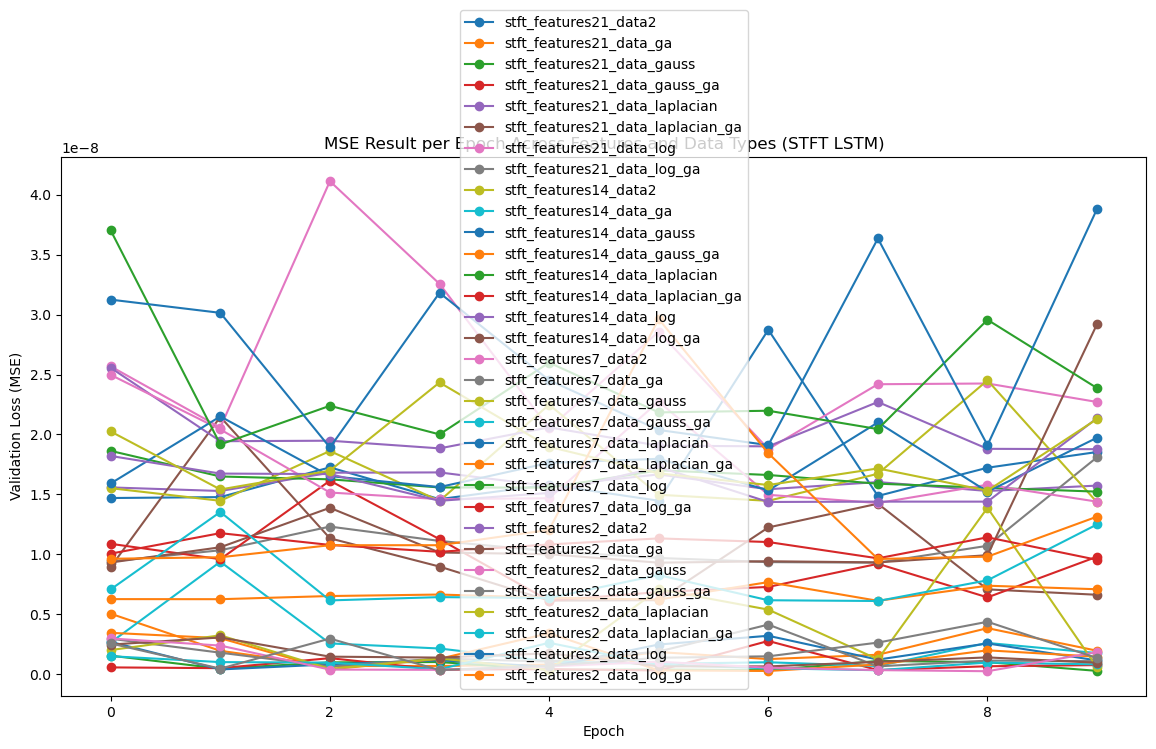

MSE Result : 1.4471188691800307e-08, feature : stft_features21_data2
MSE Result : 6.8430150435006e-10, feature : stft_features21_data_ga
MSE Result : 2.790170594568764e-10, feature : stft_features21_data_gauss
MSE Result : 3.127432757210613e-10, feature : stft_features21_data_gauss_ga
MSE Result : 1.5284804533166607e-08, feature : stft_features21_data_laplacian
MSE Result : 6.138714869763362e-09, feature : stft_features21_data_laplacian_ga
MSE Result : 1.87813871121989e-08, feature : stft_features21_data_log
MSE Result : 9.30497545681419e-09, feature : stft_features21_data_log_ga
MSE Result : 1.4341444476428933e-08, feature : stft_features14_data2
MSE Result : 6.839712685113852e-10, feature : stft_features14_data_ga
MSE Result : 3.987300489782797e-10, feature : stft_features14_data_gauss
MSE Result : 2.7201030317058894e-10, feature : stft_features14_data_gauss_ga
MSE Result : 1.523153869698035e-08, feature : stft_features14_data_laplacian
MSE Result : 6.13341955002511e-09, feature : st

In [ ]:
#21,14,7,2

def process_features(data, feature_type):
    if feature_type == 'features':
        return librosa.istft(data)


def create_sequences(data, seq_length):
    X, Y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        Y.append(data[i + seq_length])
    return np.array(X), np.array(Y)

def process(hdf5_file_path):
    with h5py.File(hdf5_file_path, 'r+') as hdf5_file:
      for data_name in tqdm(data_names, desc="Processing"):
          data = hdf5_file[data_name][:]
          t, y = process_features(data, 'features'), np.roll(data, -1)
          t, y = t[:-1], y[:-1]

          train_size = int(0.8 * len(t))
          train_data, test_data = t[:train_size], t[train_size:]
          train_labels, test_labels = y[:train_size], y[train_size:]

          X_train, y_train = create_sequences(train_data, 2)
          X_test, y_test = create_sequences(test_data, 2)

          X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
          X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

          model = Sequential([
              LSTM(16, input_shape=(2, 1)),
              Dense(1)
          ])
          model.compile(optimizer='adam', loss='mse')
          history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test), verbose=2)

          mse_results[f'{hdf5_file}_{data_name}'] = history.history['val_loss']
          print(f'Validation loss for {hdf5_file} {data_name}:', np.min(history.history['val_loss']))



hdf5_files = ['stft_features21.h5', 'stft_features14.h5', 'stft_features7.h5', 'stft_features2.h5']
data_names = ['data2', 'data_ga', 'data_gauss', 'data_gauss_ga', 'data_laplacian',
              'data_laplacian_ga', 'data_log', 'data_log_ga']

mse_results = {}
losses_over_epochs = {}

for file_path in hdf5_files:
    process(file_path)


plt.figure(figsize=(14, 7))
for key, losses in mse_results.items():
    plt.plot(losses, label=key, marker='o', linestyle='-')
plt.ylabel('Validation Loss (MSE)')
plt.xlabel('Epoch')
plt.title('MSE Result per Epoch Across Features and Data Types (STFT LSTM)')
plt.legend()
plt.show()

for key, losses in mse_results.items():
    los = np.min(losses)
    print(f'MSE Result : {los}, feature : {key}')

**MFCC, CHROMA (21, 14, 7, 2)**

Processing chroma:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/10
1/1 - 1s - 674ms/step - loss: 0.3510 - val_loss: 0.0278
Epoch 2/10
1/1 - 0s - 50ms/step - loss: 0.0284 - val_loss: 0.0273
Epoch 3/10
1/1 - 0s - 48ms/step - loss: 0.0279 - val_loss: 0.0268
Epoch 4/10
1/1 - 0s - 59ms/step - loss: 0.0274 - val_loss: 0.0263
Epoch 5/10
1/1 - 0s - 45ms/step - loss: 0.0269 - val_loss: 0.0258
Epoch 6/10
1/1 - 0s - 44ms/step - loss: 0.0264 - val_loss: 0.0253
Epoch 7/10
1/1 - 0s - 60ms/step - loss: 0.0260 - val_loss: 0.0249
Epoch 8/10
1/1 - 0s - 49ms/step - loss: 0.0255 - val_loss: 0.0244
Epoch 9/10
1/1 - 0s - 55ms/step - loss: 0.0251 - val_loss: 0.0239
Epoch 10/10
1/1 - 0s - 50ms/step - loss: 0.0246 - val_loss: 0.0235


Processing chroma:  12%|█▎        | 1/8 [00:01<00:08,  1.21s/it]

MSE Result for chroma data2: 0.023492923006415367
Epoch 1/10
1/1 - 1s - 602ms/step - loss: 0.7357 - val_loss: 0.0724
Epoch 2/10
1/1 - 0s - 46ms/step - loss: 0.0768 - val_loss: 0.0722
Epoch 3/10
1/1 - 0s - 41ms/step - loss: 0.0766 - val_loss: 0.0716
Epoch 4/10
1/1 - 0s - 57ms/step - loss: 0.0760 - val_loss: 0.0708
Epoch 5/10
1/1 - 0s - 38ms/step - loss: 0.0751 - val_loss: 0.0698
Epoch 6/10
1/1 - 0s - 44ms/step - loss: 0.0741 - val_loss: 0.0687
Epoch 7/10
1/1 - 0s - 41ms/step - loss: 0.0731 - val_loss: 0.0676
Epoch 8/10
1/1 - 0s - 36ms/step - loss: 0.0719 - val_loss: 0.0665
Epoch 9/10
1/1 - 0s - 41ms/step - loss: 0.0708 - val_loss: 0.0653
Epoch 10/10
1/1 - 0s - 34ms/step - loss: 0.0696 - val_loss: 0.0641


Processing chroma:  25%|██▌       | 2/8 [00:02<00:06,  1.11s/it]

MSE Result for chroma data_ga: 0.06409784406423569
Epoch 1/10
1/1 - 1s - 633ms/step - loss: 1.3160e-04 - val_loss: 0.1851
Epoch 2/10
1/1 - 0s - 84ms/step - loss: 0.2080 - val_loss: 0.0194
Epoch 3/10
1/1 - 0s - 80ms/step - loss: 0.1012 - val_loss: 0.0036
Epoch 4/10
1/1 - 0s - 71ms/step - loss: 0.0183 - val_loss: 0.0163
Epoch 5/10
1/1 - 0s - 89ms/step - loss: 0.0750 - val_loss: 0.0137
Epoch 6/10
1/1 - 0s - 66ms/step - loss: 0.0524 - val_loss: 0.0065
Epoch 7/10
1/1 - 0s - 58ms/step - loss: 0.0240 - val_loss: 0.0033
Epoch 8/10
1/1 - 0s - 74ms/step - loss: 0.0126 - val_loss: 0.0027
Epoch 9/10
1/1 - 0s - 83ms/step - loss: 0.0056 - val_loss: 0.0037
Epoch 10/10
1/1 - 0s - 69ms/step - loss: 0.0014 - val_loss: 0.0056


Processing chroma:  38%|███▊      | 3/8 [00:03<00:06,  1.23s/it]

MSE Result for chroma data_gauss: 0.0027227478567510843
Epoch 1/10
1/1 - 1s - 1s/step - loss: 1.3745e-04 - val_loss: 0.1111
Epoch 2/10
1/1 - 0s - 36ms/step - loss: 0.1168 - val_loss: 0.0015
Epoch 3/10
1/1 - 0s - 46ms/step - loss: 0.0015 - val_loss: 0.0032
Epoch 4/10
1/1 - 0s - 49ms/step - loss: 0.0031 - val_loss: 0.0044
Epoch 5/10
1/1 - 0s - 58ms/step - loss: 0.0037 - val_loss: 0.0039
Epoch 6/10
1/1 - 0s - 54ms/step - loss: 0.0029 - val_loss: 0.0032
Epoch 7/10
1/1 - 0s - 43ms/step - loss: 0.0021 - val_loss: 0.0027
Epoch 8/10
1/1 - 0s - 46ms/step - loss: 0.0017 - val_loss: 0.0023
Epoch 9/10
1/1 - 0s - 71ms/step - loss: 0.0014 - val_loss: 0.0021
Epoch 10/10
1/1 - 0s - 44ms/step - loss: 0.0012 - val_loss: 0.0019


Processing chroma:  50%|█████     | 4/8 [00:05<00:05,  1.38s/it]

MSE Result for chroma data_gauss_ga: 0.0015197551110759377
Epoch 1/10
1/1 - 1s - 700ms/step - loss: 0.0921 - val_loss: 0.5835
Epoch 2/10
1/1 - 0s - 50ms/step - loss: 0.2784 - val_loss: 0.4128
Epoch 3/10
1/1 - 0s - 47ms/step - loss: 0.1604 - val_loss: 0.3640
Epoch 4/10
1/1 - 0s - 44ms/step - loss: 0.1310 - val_loss: 0.3516
Epoch 5/10
1/1 - 0s - 61ms/step - loss: 0.1226 - val_loss: 0.3451
Epoch 6/10
1/1 - 0s - 46ms/step - loss: 0.1180 - val_loss: 0.3417
Epoch 7/10
1/1 - 0s - 49ms/step - loss: 0.1154 - val_loss: 0.3401
Epoch 8/10
1/1 - 0s - 47ms/step - loss: 0.1140 - val_loss: 0.3392
Epoch 9/10
1/1 - 0s - 48ms/step - loss: 0.1130 - val_loss: 0.3384
Epoch 10/10
1/1 - 0s - 48ms/step - loss: 0.1121 - val_loss: 0.3376


Processing chroma:  62%|██████▎   | 5/8 [00:06<00:03,  1.32s/it]

MSE Result for chroma data_laplacian: 0.33764076232910156
Epoch 1/10
1/1 - 1s - 770ms/step - loss: 0.0637 - val_loss: 1.1968
Epoch 2/10
1/1 - 0s - 43ms/step - loss: 1.1610 - val_loss: 1.1596
Epoch 3/10
1/1 - 0s - 41ms/step - loss: 1.1251 - val_loss: 0.7798
Epoch 4/10
1/1 - 0s - 43ms/step - loss: 0.7788 - val_loss: 0.5301
Epoch 5/10
1/1 - 0s - 32ms/step - loss: 0.5100 - val_loss: 0.4609
Epoch 6/10
1/1 - 0s - 37ms/step - loss: 0.4490 - val_loss: 0.3484
Epoch 7/10
1/1 - 0s - 32ms/step - loss: 0.3837 - val_loss: 0.1564
Epoch 8/10
1/1 - 0s - 36ms/step - loss: 0.1512 - val_loss: 0.1490
Epoch 9/10
1/1 - 0s - 31ms/step - loss: 0.1436 - val_loss: 0.1466
Epoch 10/10
1/1 - 0s - 32ms/step - loss: 0.1413 - val_loss: 0.1438


Processing chroma:  75%|███████▌  | 6/8 [00:07<00:02,  1.26s/it]

MSE Result for chroma data_laplacian_ga: 0.1437651813030243
Epoch 1/10
1/1 - 1s - 674ms/step - loss: 1.0169 - val_loss: 0.0905
Epoch 2/10
1/1 - 0s - 48ms/step - loss: 0.1146 - val_loss: 0.0894
Epoch 3/10
1/1 - 0s - 45ms/step - loss: 0.1135 - val_loss: 0.0882
Epoch 4/10
1/1 - 0s - 44ms/step - loss: 0.1124 - val_loss: 0.0871
Epoch 5/10
1/1 - 0s - 45ms/step - loss: 0.1114 - val_loss: 0.0860
Epoch 6/10
1/1 - 0s - 44ms/step - loss: 0.1104 - val_loss: 0.0849
Epoch 7/10
1/1 - 0s - 47ms/step - loss: 0.1094 - val_loss: 0.0838
Epoch 8/10
1/1 - 0s - 43ms/step - loss: 0.1084 - val_loss: 0.0828
Epoch 9/10
1/1 - 0s - 43ms/step - loss: 0.1075 - val_loss: 0.0817
Epoch 10/10
1/1 - 0s - 42ms/step - loss: 0.1065 - val_loss: 0.0807


Processing chroma:  88%|████████▊ | 7/8 [00:08<00:01,  1.22s/it]

MSE Result for chroma data_log: 0.08069902658462524
Epoch 1/10
1/1 - 1s - 579ms/step - loss: 0.2729 - val_loss: 0.9557
Epoch 2/10
1/1 - 0s - 38ms/step - loss: 0.9915 - val_loss: 0.9513
Epoch 3/10
1/1 - 0s - 31ms/step - loss: 0.9871 - val_loss: 0.9455
Epoch 4/10
1/1 - 0s - 33ms/step - loss: 0.9812 - val_loss: 0.9391
Epoch 5/10
1/1 - 0s - 34ms/step - loss: 0.9747 - val_loss: 0.9324
Epoch 6/10
1/1 - 0s - 34ms/step - loss: 0.9679 - val_loss: 0.9254
Epoch 7/10
1/1 - 0s - 33ms/step - loss: 0.9609 - val_loss: 0.9184
Epoch 8/10
1/1 - 0s - 31ms/step - loss: 0.9538 - val_loss: 0.9113
Epoch 9/10
1/1 - 0s - 32ms/step - loss: 0.9466 - val_loss: 0.9041
Epoch 10/10
1/1 - 0s - 31ms/step - loss: 0.9393 - val_loss: 0.8969


Processing chroma: 100%|██████████| 8/8 [00:09<00:00,  1.12s/it]

MSE Result for chroma data_log_ga: 0.8968861699104309


Processing mfcc:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/10
2/2 - 2s - 906ms/step - loss: 10.1711 - val_loss: 9.9986
Epoch 2/10
2/2 - 1s - 401ms/step - loss: 10.1889 - val_loss: 10.0482
Epoch 3/10
2/2 - 0s - 178ms/step - loss: 10.2052 - val_loss: 9.9901
Epoch 4/10
2/2 - 0s - 242ms/step - loss: 10.1577 - val_loss: 9.9961
Epoch 5/10
2/2 - 0s - 179ms/step - loss: 10.1558 - val_loss: 9.9535
Epoch 6/10
2/2 - 0s - 191ms/step - loss: 10.1145 - val_loss: 9.9659
Epoch 7/10
2/2 - 0s - 159ms/step - loss: 10.1447 - val_loss: 10.0035
Epoch 8/10
2/2 - 0s - 162ms/step - loss: 10.1596 - val_loss: 10.0053
Epoch 9/10
2/2 - 1s - 283ms/step - loss: 10.1515 - val_loss: 10.0217
Epoch 10/10
2/2 - 1s - 320ms/step - loss: 10.1845 - val_loss: 10.0198


Processing mfcc:  12%|█▎        | 1/8 [00:06<00:46,  6.68s/it]

MSE Result for mfcc data2: 9.953486442565918
Epoch 1/10
2/2 - 1s - 358ms/step - loss: 10.0910 - val_loss: 6.5127
Epoch 2/10
2/2 - 0s - 71ms/step - loss: 6.5953 - val_loss: 6.5019
Epoch 3/10
2/2 - 0s - 73ms/step - loss: 6.5847 - val_loss: 6.4910
Epoch 4/10
2/2 - 0s - 73ms/step - loss: 6.5739 - val_loss: 6.4799
Epoch 5/10
2/2 - 0s - 72ms/step - loss: 6.5624 - val_loss: 6.4689
Epoch 6/10
2/2 - 0s - 73ms/step - loss: 6.5506 - val_loss: 6.4579
Epoch 7/10
2/2 - 0s - 73ms/step - loss: 6.5399 - val_loss: 6.4467
Epoch 8/10
2/2 - 0s - 72ms/step - loss: 6.5283 - val_loss: 6.4357
Epoch 9/10
2/2 - 0s - 75ms/step - loss: 6.5171 - val_loss: 6.4246
Epoch 10/10
2/2 - 0s - 74ms/step - loss: 6.5056 - val_loss: 6.4136


Processing mfcc:  25%|██▌       | 2/8 [00:08<00:24,  4.04s/it]

MSE Result for mfcc data_ga: 6.413576126098633
Epoch 1/10
2/2 - 1s - 716ms/step - loss: 0.6381 - val_loss: 0.2461
Epoch 2/10
2/2 - 0s - 210ms/step - loss: 0.2269 - val_loss: 0.2177
Epoch 3/10
2/2 - 0s - 210ms/step - loss: 0.2168 - val_loss: 0.2213
Epoch 4/10
2/2 - 1s - 310ms/step - loss: 0.2101 - val_loss: 0.1795
Epoch 5/10
2/2 - 1s - 280ms/step - loss: 0.1803 - val_loss: 0.1708
Epoch 6/10
2/2 - 1s - 381ms/step - loss: 0.1722 - val_loss: 0.1677
Epoch 7/10
2/2 - 1s - 404ms/step - loss: 0.1702 - val_loss: 0.1649
Epoch 8/10
2/2 - 1s - 279ms/step - loss: 0.1662 - val_loss: 0.1597
Epoch 9/10
2/2 - 0s - 187ms/step - loss: 0.1618 - val_loss: 0.1576
Epoch 10/10
2/2 - 1s - 266ms/step - loss: 0.1604 - val_loss: 0.1562


Processing mfcc:  38%|███▊      | 3/8 [00:15<00:26,  5.26s/it]

MSE Result for mfcc data_gauss: 0.1561775505542755
Epoch 1/10
2/2 - 1s - 372ms/step - loss: 0.0668 - val_loss: 0.0229
Epoch 2/10
2/2 - 0s - 78ms/step - loss: 0.0229 - val_loss: 0.0215
Epoch 3/10
2/2 - 0s - 76ms/step - loss: 0.0213 - val_loss: 0.0203
Epoch 4/10
2/2 - 0s - 73ms/step - loss: 0.0206 - val_loss: 0.0201
Epoch 5/10
2/2 - 0s - 77ms/step - loss: 0.0204 - val_loss: 0.0199
Epoch 6/10
2/2 - 0s - 71ms/step - loss: 0.0203 - val_loss: 0.0197
Epoch 7/10
2/2 - 0s - 76ms/step - loss: 0.0201 - val_loss: 0.0195
Epoch 8/10
2/2 - 0s - 73ms/step - loss: 0.0199 - val_loss: 0.0193
Epoch 9/10
2/2 - 0s - 80ms/step - loss: 0.0197 - val_loss: 0.0192
Epoch 10/10
2/2 - 0s - 76ms/step - loss: 0.0195 - val_loss: 0.0190


Processing mfcc:  50%|█████     | 4/8 [00:17<00:16,  4.08s/it]

MSE Result for mfcc data_gauss_ga: 0.018960990011692047
Epoch 1/10
2/2 - 2s - 960ms/step - loss: 36.7756 - val_loss: 38.0161
Epoch 2/10
2/2 - 1s - 390ms/step - loss: 37.7372 - val_loss: 36.6121
Epoch 3/10
2/2 - 1s - 311ms/step - loss: 36.8832 - val_loss: 36.1785
Epoch 4/10
2/2 - 0s - 217ms/step - loss: 36.4502 - val_loss: 36.0036
Epoch 5/10
2/2 - 0s - 238ms/step - loss: 36.3542 - val_loss: 35.8427
Epoch 6/10
2/2 - 1s - 318ms/step - loss: 36.1892 - val_loss: 35.4211
Epoch 7/10
2/2 - 0s - 224ms/step - loss: 35.7736 - val_loss: 35.0192
Epoch 8/10
2/2 - 0s - 174ms/step - loss: 35.3848 - val_loss: 34.8867
Epoch 9/10
2/2 - 0s - 169ms/step - loss: 35.2712 - val_loss: 34.8732
Epoch 10/10
2/2 - 0s - 180ms/step - loss: 35.2041 - val_loss: 34.7996


Processing mfcc:  62%|██████▎   | 5/8 [00:24<00:14,  4.98s/it]

MSE Result for mfcc data_laplacian: 34.799598693847656
Epoch 1/10
2/2 - 1s - 365ms/step - loss: 33.2810 - val_loss: 27.4865
Epoch 2/10
2/2 - 0s - 70ms/step - loss: 27.7939 - val_loss: 27.4622
Epoch 3/10
2/2 - 0s - 75ms/step - loss: 27.7677 - val_loss: 27.4373
Epoch 4/10
2/2 - 0s - 76ms/step - loss: 27.7428 - val_loss: 27.4120
Epoch 5/10
2/2 - 0s - 78ms/step - loss: 27.7176 - val_loss: 27.3864
Epoch 6/10
2/2 - 0s - 74ms/step - loss: 27.6914 - val_loss: 27.3608
Epoch 7/10
2/2 - 0s - 75ms/step - loss: 27.6653 - val_loss: 27.3352
Epoch 8/10
2/2 - 0s - 80ms/step - loss: 27.6393 - val_loss: 27.3095
Epoch 9/10
2/2 - 0s - 87ms/step - loss: 27.6139 - val_loss: 27.2838
Epoch 10/10
2/2 - 0s - 118ms/step - loss: 27.5875 - val_loss: 27.2581


Processing mfcc:  75%|███████▌  | 6/8 [00:26<00:08,  4.11s/it]

MSE Result for mfcc data_laplacian_ga: 27.25806427001953
Epoch 1/10
2/2 - 3s - 1s/step - loss: 81.7659 - val_loss: 81.3356
Epoch 2/10
2/2 - 1s - 492ms/step - loss: 82.3227 - val_loss: 81.1579
Epoch 3/10
2/2 - 1s - 312ms/step - loss: 82.1071 - val_loss: 80.9122
Epoch 4/10
2/2 - 1s - 356ms/step - loss: 81.8968 - val_loss: 80.8555
Epoch 5/10
2/2 - 1s - 352ms/step - loss: 81.8392 - val_loss: 80.8262
Epoch 6/10
2/2 - 1s - 352ms/step - loss: 81.8095 - val_loss: 80.8039
Epoch 7/10
2/2 - 1s - 411ms/step - loss: 81.7700 - val_loss: 80.7642
Epoch 8/10
2/2 - 1s - 481ms/step - loss: 81.7465 - val_loss: 80.7172
Epoch 9/10
2/2 - 1s - 433ms/step - loss: 81.6978 - val_loss: 80.6937
Epoch 10/10
2/2 - 1s - 267ms/step - loss: 81.6762 - val_loss: 80.6415


Processing mfcc:  88%|████████▊ | 7/8 [00:36<00:05,  5.96s/it]

MSE Result for mfcc data_log: 80.6414794921875
Epoch 1/10
2/2 - 1s - 444ms/step - loss: 68.6253 - val_loss: 58.8262
Epoch 2/10
2/2 - 0s - 89ms/step - loss: 59.5123 - val_loss: 58.7603
Epoch 3/10
2/2 - 0s - 78ms/step - loss: 59.4429 - val_loss: 58.6929
Epoch 4/10
2/2 - 0s - 75ms/step - loss: 59.3759 - val_loss: 58.6245
Epoch 5/10
2/2 - 0s - 72ms/step - loss: 59.3038 - val_loss: 58.5561
Epoch 6/10
2/2 - 0s - 72ms/step - loss: 59.2373 - val_loss: 58.4873
Epoch 7/10
2/2 - 0s - 68ms/step - loss: 59.1692 - val_loss: 58.4185
Epoch 8/10
2/2 - 0s - 66ms/step - loss: 59.0965 - val_loss: 58.3502
Epoch 9/10
2/2 - 0s - 68ms/step - loss: 59.0281 - val_loss: 58.2819
Epoch 10/10
2/2 - 0s - 83ms/step - loss: 58.9568 - val_loss: 58.2138


Processing mfcc: 100%|██████████| 8/8 [00:39<00:00,  4.88s/it]

MSE Result for mfcc data_log_ga: 58.21379852294922


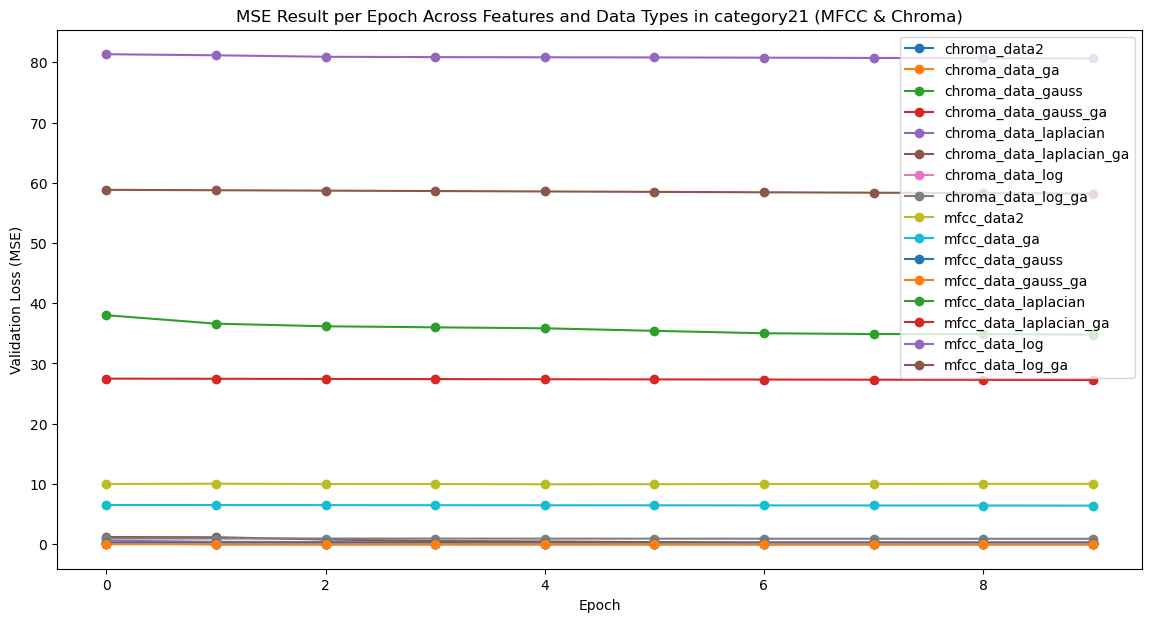

MSE Result : 0.023492923006415367, feature : chroma_data2
MSE Result : 0.06409784406423569, feature : chroma_data_ga
MSE Result : 0.0027227478567510843, feature : chroma_data_gauss
MSE Result : 0.0015197551110759377, feature : chroma_data_gauss_ga
MSE Result : 0.33764076232910156, feature : chroma_data_laplacian
MSE Result : 0.1437651813030243, feature : chroma_data_laplacian_ga
MSE Result : 0.08069902658462524, feature : chroma_data_log
MSE Result : 0.8968861699104309, feature : chroma_data_log_ga
MSE Result : 9.953486442565918, feature : mfcc_data2
MSE Result : 6.413576126098633, feature : mfcc_data_ga
MSE Result : 0.1561775505542755, feature : mfcc_data_gauss
MSE Result : 0.018960990011692047, feature : mfcc_data_gauss_ga
MSE Result : 34.799598693847656, feature : mfcc_data_laplacian
MSE Result : 27.25806427001953, feature : mfcc_data_laplacian_ga
MSE Result : 80.6414794921875, feature : mfcc_data_log
MSE Result : 58.21379852294922, feature : mfcc_data_log_ga


In [ ]:
#21

def process_features(data, feature_type):
    if feature_type == 'stft':
        return librosa.istft(data)
    elif feature_type in ['mfcc', 'chroma']:
        if data.ndim == 2:
            return data.reshape(data.shape[0], data.shape[1], 1)
        else:
            return data
    else:
        raise ValueError("Unsupported feature type")

def create_sequences(data, seq_length):
    X, Y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        Y.append(data[i + seq_length])
    return np.array(X), np.array(Y)

feature_types = ['chroma', 'mfcc']
data_names = ['data2', 'data_ga', 'data_gauss', 'data_gauss_ga', 'data_laplacian',
              'data_laplacian_ga', 'data_log', 'data_log_ga']

mse_results = {}

for feature_type in feature_types:
    hdf5_file_path = f'cat_{feature_type}_features21.h5'
    with h5py.File(hdf5_file_path, 'r+') as hdf5_file:
        for data_name in tqdm(data_names, desc=f"Processing {feature_type}"):
            data = hdf5_file[data_name][:]

            if data.ndim == 2 and data.shape[0] > 0:
                data = np.expand_dims(data, axis=-1)

                t, y = process_features(data, feature_type), np.roll(data, -1, axis=0)
                t, y = t[:-1], y[:-1]

                if len(t) > 10:
                    X_train, y_train = create_sequences(t, 2)
                    X_test, y_test = create_sequences(y, 2)

                    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], -1))
                    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], -1))
                    y_train = y_train.reshape((y_train.shape[0], -1))
                    y_test = y_test.reshape((y_test.shape[0], -1))

                    if X_train.size > 0 and X_test.size > 0:
                        model = Sequential([
                            LSTM(16, input_shape=(X_train.shape[1], X_train.shape[2])),
                            Dense(1)
                        ])
                        model.compile(optimizer='adam', loss='mse')
                        history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test), verbose=2)

                        mse_results[f'{feature_type}_{data_name}'] = history.history['val_loss']
                        print(f'MSE Result for {feature_type} {data_name}:', np.min(history.history['val_loss']))

plt.figure(figsize=(14, 7))
for key, losses in mse_results.items():
    plt.plot(losses, label=key, marker='o', linestyle='-')
plt.ylabel('Validation Loss (MSE)')
plt.xlabel('Epoch')
plt.title('MSE Result per Epoch Across Features and Data Types in category21 (MFCC & Chroma)')
plt.legend()
plt.show()

for key, losses in mse_results.items():
    los = np.min(losses)
    print(f'MSE Result : {los}, feature : {key}')


Processing chroma:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/10
1/1 - 1s - 704ms/step - loss: 0.7080 - val_loss: 0.0215
Epoch 2/10
1/1 - 0s - 119ms/step - loss: 0.0248 - val_loss: 0.0215
Epoch 3/10
1/1 - 0s - 127ms/step - loss: 0.0248 - val_loss: 0.0214
Epoch 4/10
1/1 - 0s - 162ms/step - loss: 0.0247 - val_loss: 0.0211
Epoch 5/10
1/1 - 0s - 171ms/step - loss: 0.0244 - val_loss: 0.0208
Epoch 6/10
1/1 - 0s - 170ms/step - loss: 0.0240 - val_loss: 0.0204
Epoch 7/10
1/1 - 0s - 138ms/step - loss: 0.0236 - val_loss: 0.0199
Epoch 8/10
1/1 - 0s - 112ms/step - loss: 0.0232 - val_loss: 0.0195
Epoch 9/10
1/1 - 0s - 145ms/step - loss: 0.0227 - val_loss: 0.0190
Epoch 10/10
1/1 - 0s - 135ms/step - loss: 0.0222 - val_loss: 0.0185


Processing chroma:  12%|█▎        | 1/8 [00:02<00:14,  2.07s/it]

MSE Result for chroma data2: 0.018510308116674423
Epoch 1/10
1/1 - 1s - 657ms/step - loss: 0.1338 - val_loss: 2.6838
Epoch 2/10
1/1 - 0s - 65ms/step - loss: 2.7010 - val_loss: 2.6751
Epoch 3/10
1/1 - 0s - 93ms/step - loss: 2.6923 - val_loss: 2.6645
Epoch 4/10
1/1 - 0s - 104ms/step - loss: 2.6816 - val_loss: 2.6530
Epoch 5/10
1/1 - 0s - 109ms/step - loss: 2.6701 - val_loss: 2.6411
Epoch 6/10
1/1 - 0s - 126ms/step - loss: 2.6582 - val_loss: 2.6289
Epoch 7/10
1/1 - 0s - 81ms/step - loss: 2.6459 - val_loss: 2.6165
Epoch 8/10
1/1 - 0s - 67ms/step - loss: 2.6335 - val_loss: 2.6040
Epoch 9/10
1/1 - 0s - 66ms/step - loss: 2.6210 - val_loss: 2.5915
Epoch 10/10
1/1 - 0s - 65ms/step - loss: 2.6084 - val_loss: 2.5789


Processing chroma:  25%|██▌       | 2/8 [00:03<00:10,  1.75s/it]

MSE Result for chroma data_ga: 2.5788662433624268
Epoch 1/10
1/1 - 1s - 851ms/step - loss: 1.4990e-04 - val_loss: 0.2927
Epoch 2/10
1/1 - 0s - 132ms/step - loss: 0.3948 - val_loss: 0.0147
Epoch 3/10
1/1 - 0s - 126ms/step - loss: 0.2175 - val_loss: 0.0020
Epoch 4/10
1/1 - 0s - 125ms/step - loss: 0.1810 - val_loss: 0.0017
Epoch 5/10
1/1 - 0s - 111ms/step - loss: 0.1731 - val_loss: 3.0935e-04
Epoch 6/10
1/1 - 0s - 114ms/step - loss: 0.1443 - val_loss: 0.0139
Epoch 7/10
1/1 - 0s - 110ms/step - loss: 0.0874 - val_loss: 0.0158
Epoch 8/10
1/1 - 0s - 118ms/step - loss: 0.0548 - val_loss: 0.0160
Epoch 9/10
1/1 - 0s - 130ms/step - loss: 0.0073 - val_loss: 0.0163
Epoch 10/10
1/1 - 0s - 134ms/step - loss: 9.5463e-04 - val_loss: 0.0166


Processing chroma:  38%|███▊      | 3/8 [00:05<00:09,  1.88s/it]

MSE Result for chroma data_gauss: 0.00030935037648305297
Epoch 1/10
1/1 - 1s - 627ms/step - loss: 7.4372e-04 - val_loss: 0.0463
Epoch 2/10
1/1 - 0s - 74ms/step - loss: 0.0393 - val_loss: 0.0047
Epoch 3/10
1/1 - 0s - 66ms/step - loss: 0.0020 - val_loss: 0.0019
Epoch 4/10
1/1 - 0s - 66ms/step - loss: 7.1556e-04 - val_loss: 9.6125e-04
Epoch 5/10
1/1 - 0s - 65ms/step - loss: 3.5174e-04 - val_loss: 5.6587e-04
Epoch 6/10
1/1 - 0s - 77ms/step - loss: 2.1779e-04 - val_loss: 3.7472e-04
Epoch 7/10
1/1 - 0s - 70ms/step - loss: 1.6782e-04 - val_loss: 2.7711e-04
Epoch 8/10
1/1 - 0s - 64ms/step - loss: 1.5090e-04 - val_loss: 2.2556e-04
Epoch 9/10
1/1 - 0s - 65ms/step - loss: 1.4717e-04 - val_loss: 1.9776e-04
Epoch 10/10
1/1 - 0s - 65ms/step - loss: 1.4853e-04 - val_loss: 1.8262e-04


Processing chroma:  50%|█████     | 4/8 [00:06<00:06,  1.65s/it]

MSE Result for chroma data_gauss_ga: 0.00018262256344314665
Epoch 1/10
1/1 - 1s - 707ms/step - loss: 0.0313 - val_loss: 0.5121
Epoch 2/10
1/1 - 0s - 115ms/step - loss: 0.2581 - val_loss: 0.3537
Epoch 3/10
1/1 - 0s - 110ms/step - loss: 0.1624 - val_loss: 0.3524
Epoch 4/10
1/1 - 0s - 111ms/step - loss: 0.1608 - val_loss: 0.3510
Epoch 5/10
1/1 - 0s - 110ms/step - loss: 0.1591 - val_loss: 0.3497
Epoch 6/10
1/1 - 0s - 111ms/step - loss: 0.1574 - val_loss: 0.3485
Epoch 7/10
1/1 - 0s - 112ms/step - loss: 0.1557 - val_loss: 0.3472
Epoch 8/10
1/1 - 0s - 110ms/step - loss: 0.1539 - val_loss: 0.3459
Epoch 9/10
1/1 - 0s - 118ms/step - loss: 0.1522 - val_loss: 0.3447
Epoch 10/10
1/1 - 0s - 113ms/step - loss: 0.1504 - val_loss: 0.3435


Processing chroma:  62%|██████▎   | 5/8 [00:08<00:05,  1.71s/it]

MSE Result for chroma data_laplacian: 0.343479186296463
Epoch 1/10
1/1 - 1s - 632ms/step - loss: 0.0221 - val_loss: 0.0160
Epoch 2/10
1/1 - 0s - 66ms/step - loss: 0.0299 - val_loss: 0.0159
Epoch 3/10
1/1 - 0s - 64ms/step - loss: 0.0297 - val_loss: 0.0158
Epoch 4/10
1/1 - 0s - 63ms/step - loss: 0.0296 - val_loss: 0.0157
Epoch 5/10
1/1 - 0s - 64ms/step - loss: 0.0294 - val_loss: 0.0155
Epoch 6/10
1/1 - 0s - 64ms/step - loss: 0.0292 - val_loss: 0.0154
Epoch 7/10
1/1 - 0s - 64ms/step - loss: 0.0291 - val_loss: 0.0153
Epoch 8/10
1/1 - 0s - 63ms/step - loss: 0.0289 - val_loss: 0.0151
Epoch 9/10
1/1 - 0s - 65ms/step - loss: 0.0287 - val_loss: 0.0150
Epoch 10/10
1/1 - 0s - 66ms/step - loss: 0.0285 - val_loss: 0.0149


Processing chroma:  75%|███████▌  | 6/8 [00:10<00:03,  1.56s/it]

MSE Result for chroma data_laplacian_ga: 0.014855722896754742
Epoch 1/10
1/1 - 1s - 699ms/step - loss: 3.0885 - val_loss: 0.0949
Epoch 2/10
1/1 - 0s - 116ms/step - loss: 0.1191 - val_loss: 0.0941
Epoch 3/10
1/1 - 0s - 112ms/step - loss: 0.1183 - val_loss: 0.0934
Epoch 4/10
1/1 - 0s - 111ms/step - loss: 0.1176 - val_loss: 0.0926
Epoch 5/10
1/1 - 0s - 110ms/step - loss: 0.1170 - val_loss: 0.0919
Epoch 6/10
1/1 - 0s - 112ms/step - loss: 0.1163 - val_loss: 0.0912
Epoch 7/10
1/1 - 0s - 117ms/step - loss: 0.1157 - val_loss: 0.0905
Epoch 8/10
1/1 - 0s - 114ms/step - loss: 0.1150 - val_loss: 0.0899
Epoch 9/10
1/1 - 0s - 113ms/step - loss: 0.1144 - val_loss: 0.0892
Epoch 10/10
1/1 - 0s - 111ms/step - loss: 0.1138 - val_loss: 0.0885


Processing chroma:  88%|████████▊ | 7/8 [00:11<00:01,  1.64s/it]

MSE Result for chroma data_log: 0.0885481908917427
Epoch 1/10
1/1 - 1s - 640ms/step - loss: 0.6239 - val_loss: 0.0418
Epoch 2/10
1/1 - 0s - 68ms/step - loss: 0.0563 - val_loss: 0.0414
Epoch 3/10
1/1 - 0s - 70ms/step - loss: 0.0560 - val_loss: 0.0410
Epoch 4/10
1/1 - 0s - 67ms/step - loss: 0.0556 - val_loss: 0.0406
Epoch 5/10
1/1 - 0s - 75ms/step - loss: 0.0553 - val_loss: 0.0403
Epoch 6/10
1/1 - 0s - 75ms/step - loss: 0.0551 - val_loss: 0.0400
Epoch 7/10
1/1 - 0s - 73ms/step - loss: 0.0548 - val_loss: 0.0398
Epoch 8/10
1/1 - 0s - 68ms/step - loss: 0.0546 - val_loss: 0.0395
Epoch 9/10
1/1 - 0s - 64ms/step - loss: 0.0544 - val_loss: 0.0393
Epoch 10/10
1/1 - 0s - 65ms/step - loss: 0.0542 - val_loss: 0.0390


Processing chroma: 100%|██████████| 8/8 [00:13<00:00,  1.64s/it]


MSE Result for chroma data_log_ga: 0.03904910758137703


Processing mfcc:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/10
2/2 - 19s - 10s/step - loss: 10.8665 - val_loss: 10.3779
Epoch 2/10
2/2 - 10s - 5s/step - loss: 10.5715 - val_loss: 10.4351
Epoch 3/10
2/2 - 7s - 4s/step - loss: 10.6746 - val_loss: 10.4124
Epoch 4/10
2/2 - 6s - 3s/step - loss: 10.6172 - val_loss: 10.4429
Epoch 5/10
2/2 - 8s - 4s/step - loss: 10.6261 - val_loss: 10.4956
Epoch 6/10
2/2 - 6s - 3s/step - loss: 10.7065 - val_loss: 10.5984
Epoch 7/10
2/2 - 8s - 4s/step - loss: 10.8174 - val_loss: 10.6813
Epoch 8/10
2/2 - 9s - 5s/step - loss: 11.0686 - val_loss: 10.8009
Epoch 9/10
2/2 - 8s - 4s/step - loss: 11.0048 - val_loss: 10.7314
Epoch 10/10
2/2 - 5s - 2s/step - loss: 10.8582 - val_loss: 10.6689


Processing mfcc:  12%|█▎        | 1/8 [01:33<10:54, 93.53s/it]

MSE Result for mfcc data2: 10.37789535522461
Epoch 1/10
2/2 - 2s - 1s/step - loss: 8.2409 - val_loss: 6.4066
Epoch 2/10
2/2 - 2s - 769ms/step - loss: 6.4746 - val_loss: 6.3871
Epoch 3/10
2/2 - 1s - 480ms/step - loss: 6.4549 - val_loss: 6.3670
Epoch 4/10
2/2 - 2s - 767ms/step - loss: 6.4345 - val_loss: 6.3467
Epoch 5/10
2/2 - 1s - 622ms/step - loss: 6.4131 - val_loss: 6.3266
Epoch 6/10
2/2 - 1s - 741ms/step - loss: 6.3931 - val_loss: 6.3064
Epoch 7/10
2/2 - 1s - 708ms/step - loss: 6.3729 - val_loss: 6.2864
Epoch 8/10
2/2 - 1s - 706ms/step - loss: 6.3515 - val_loss: 6.2665
Epoch 9/10
2/2 - 1s - 603ms/step - loss: 6.3302 - val_loss: 6.2469
Epoch 10/10
2/2 - 1s - 486ms/step - loss: 6.3120 - val_loss: 6.2271


Processing mfcc:  25%|██▌       | 2/8 [01:48<04:43, 47.27s/it]

MSE Result for mfcc data_ga: 6.227110385894775
Epoch 1/10
2/2 - 16s - 8s/step - loss: 0.2401 - val_loss: 0.4395
Epoch 2/10
2/2 - 12s - 6s/step - loss: 0.4372 - val_loss: 0.4249
Epoch 3/10
2/2 - 7s - 4s/step - loss: 0.4263 - val_loss: 0.3972
Epoch 4/10
2/2 - 5s - 2s/step - loss: 0.3988 - val_loss: 0.3829
Epoch 5/10
2/2 - 5s - 2s/step - loss: 0.3837 - val_loss: 0.3719
Epoch 6/10
2/2 - 4s - 2s/step - loss: 0.3675 - val_loss: 0.3562
Epoch 7/10
2/2 - 5s - 2s/step - loss: 0.3554 - val_loss: 0.3478
Epoch 8/10
2/2 - 6s - 3s/step - loss: 0.3483 - val_loss: 0.3403
Epoch 9/10
2/2 - 6s - 3s/step - loss: 0.3405 - val_loss: 0.3225
Epoch 10/10
2/2 - 5s - 2s/step - loss: 0.3152 - val_loss: 0.3068


Processing mfcc:  38%|███▊      | 3/8 [03:02<04:57, 59.53s/it]

MSE Result for mfcc data_gauss: 0.30681848526000977
Epoch 1/10
2/2 - 3s - 2s/step - loss: 0.1113 - val_loss: 0.2062
Epoch 2/10
2/2 - 2s - 986ms/step - loss: 0.2041 - val_loss: 0.2033
Epoch 3/10
2/2 - 2s - 833ms/step - loss: 0.2011 - val_loss: 0.2001
Epoch 4/10
2/2 - 2s - 869ms/step - loss: 0.1980 - val_loss: 0.1969
Epoch 5/10
2/2 - 2s - 755ms/step - loss: 0.1947 - val_loss: 0.1936
Epoch 6/10
2/2 - 2s - 792ms/step - loss: 0.1914 - val_loss: 0.1903
Epoch 7/10
2/2 - 2s - 758ms/step - loss: 0.1882 - val_loss: 0.1870
Epoch 8/10
2/2 - 2s - 897ms/step - loss: 0.1850 - val_loss: 0.1838
Epoch 9/10
2/2 - 2s - 848ms/step - loss: 0.1818 - val_loss: 0.1806
Epoch 10/10
2/2 - 1s - 716ms/step - loss: 0.1786 - val_loss: 0.1774


Processing mfcc:  50%|█████     | 4/8 [03:21<02:53, 43.44s/it]

MSE Result for mfcc data_gauss_ga: 0.17743751406669617
Epoch 1/10
2/2 - 13s - 7s/step - loss: 38.4289 - val_loss: 35.5806
Epoch 2/10
2/2 - 6s - 3s/step - loss: 35.9659 - val_loss: 35.6324
Epoch 3/10
2/2 - 5s - 2s/step - loss: 36.0158 - val_loss: 35.5361
Epoch 4/10
2/2 - 5s - 3s/step - loss: 35.9200 - val_loss: 35.5268
Epoch 5/10
2/2 - 5s - 2s/step - loss: 35.8791 - val_loss: 35.3821
Epoch 6/10
2/2 - 6s - 3s/step - loss: 35.7653 - val_loss: 35.3752
Epoch 7/10
2/2 - 5s - 2s/step - loss: 35.7628 - val_loss: 35.3298
Epoch 8/10
2/2 - 4s - 2s/step - loss: 35.6415 - val_loss: 34.3725
Epoch 9/10
2/2 - 6s - 3s/step - loss: 34.7281 - val_loss: 33.9102
Epoch 10/10
2/2 - 5s - 3s/step - loss: 34.2047 - val_loss: 33.6901
MSE Result for mfcc data_laplacian:

Processing mfcc:  62%|██████▎   | 5/8 [04:27<02:34, 51.56s/it]

 33.69005584716797
Epoch 1/10
2/2 - 3s - 1s/step - loss: 41.8092 - val_loss: 37.5610
Epoch 2/10
2/2 - 1s - 642ms/step - loss: 37.9684 - val_loss: 37.5434
Epoch 3/10
2/2 - 2s - 848ms/step - loss: 37.9505 - val_loss: 37.5257
Epoch 4/10
2/2 - 1s - 627ms/step - loss: 37.9325 - val_loss: 37.5081
Epoch 5/10
2/2 - 1s - 486ms/step - loss: 37.9150 - val_loss: 37.4904
Epoch 6/10
2/2 - 2s - 1s/step - loss: 37.8969 - val_loss: 37.4728
Epoch 7/10
2/2 - 2s - 1s/step - loss: 37.8788 - val_loss: 37.4552
Epoch 8/10
2/2 - 2s - 1s/step - loss: 37.8613 - val_loss: 37.4375
Epoch 9/10
2/2 - 2s - 860ms/step - loss: 37.8433 - val_loss: 37.4198
Epoch 10/10
2/2 - 1s - 601ms/step - loss: 37.8256 - val_loss: 37.4021


Processing mfcc:  75%|███████▌  | 6/8 [04:45<01:20, 40.13s/it]

MSE Result for mfcc data_laplacian_ga: 37.402137756347656
Epoch 1/10
2/2 - 15s - 8s/step - loss: 82.2685 - val_loss: 80.6315
Epoch 2/10
2/2 - 10s - 5s/step - loss: 81.6169 - val_loss: 80.6063
Epoch 3/10
2/2 - 10s - 5s/step - loss: 81.5902 - val_loss: 80.5804
Epoch 4/10
2/2 - 14s - 7s/step - loss: 81.5649 - val_loss: 80.5541
Epoch 5/10
2/2 - 12s - 6s/step - loss: 81.5370 - val_loss: 80.5277
Epoch 6/10
2/2 - 14s - 7s/step - loss: 81.5129 - val_loss: 80.5011
Epoch 7/10
2/2 - 9s - 5s/step - loss: 81.4829 - val_loss: 80.4748
Epoch 8/10
2/2 - 9s - 5s/step - loss: 81.4576 - val_loss: 80.4482
Epoch 9/10
2/2 - 6s - 3s/step - loss: 81.4318 - val_loss: 80.4214
Epoch 10/10
2/2 - 8s - 4s/step - loss: 81.4055 - val_loss: 80.3947


Processing mfcc:  88%|████████▊ | 7/8 [06:39<01:04, 64.30s/it]

MSE Result for mfcc data_log: 80.39472198486328
Epoch 1/10
2/2 - 4s - 2s/step - loss: 86.9241 - val_loss: 84.4363
Epoch 2/10
2/2 - 3s - 1s/step - loss: 85.3954 - val_loss: 84.3871
Epoch 3/10
2/2 - 2s - 817ms/step - loss: 85.3456 - val_loss: 84.3367
Epoch 4/10
2/2 - 2s - 818ms/step - loss: 85.2919 - val_loss: 84.2859
Epoch 5/10
2/2 - 2s - 859ms/step - loss: 85.2421 - val_loss: 84.2345
Epoch 6/10
2/2 - 2s - 839ms/step - loss: 85.1892 - val_loss: 84.1829
Epoch 7/10
2/2 - 2s - 932ms/step - loss: 85.1377 - val_loss: 84.1312
Epoch 8/10
2/2 - 2s - 858ms/step - loss: 85.0841 - val_loss: 84.0795
Epoch 9/10
2/2 - 2s - 890ms/step - loss: 85.0312 - val_loss: 84.0278
Epoch 10/10
2/2 - 1s - 644ms/step - loss: 84.9788 - val_loss: 83.9760


Processing mfcc: 100%|██████████| 8/8 [06:59<00:00, 52.44s/it]

MSE Result for mfcc data_log_ga: 83.97601318359375


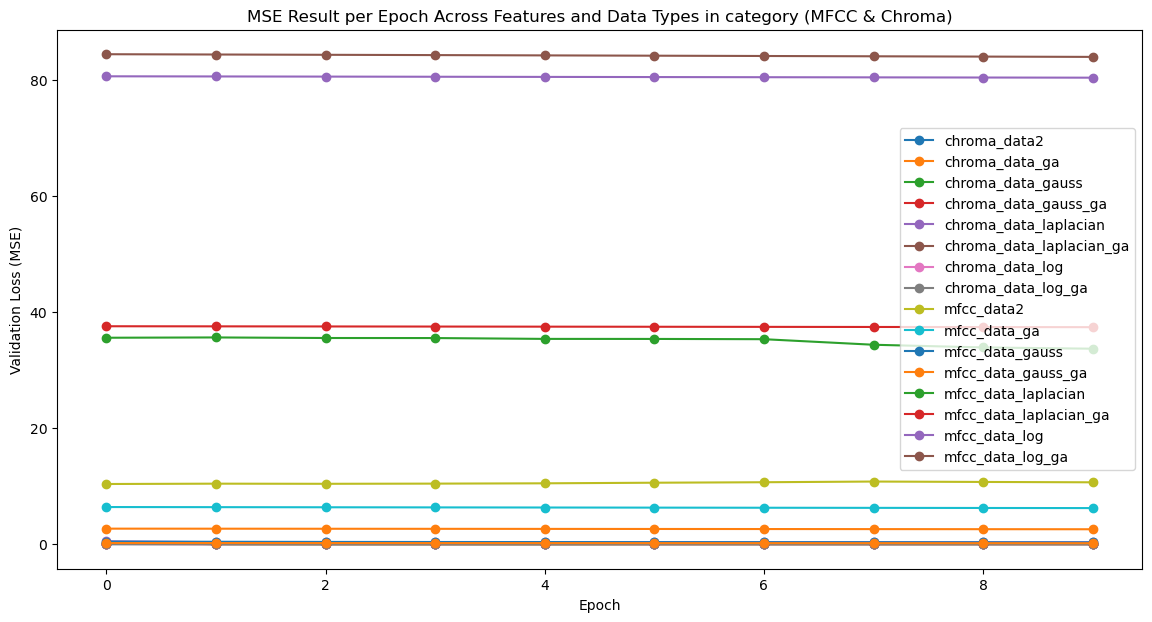

MSE Result : 0.018510308116674423, feature : chroma_data2
MSE Result : 2.5788662433624268, feature : chroma_data_ga
MSE Result : 0.00030935037648305297, feature : chroma_data_gauss
MSE Result : 0.00018262256344314665, feature : chroma_data_gauss_ga
MSE Result : 0.343479186296463, feature : chroma_data_laplacian
MSE Result : 0.014855722896754742, feature : chroma_data_laplacian_ga
MSE Result : 0.0885481908917427, feature : chroma_data_log
MSE Result : 0.03904910758137703, feature : chroma_data_log_ga
MSE Result : 10.37789535522461, feature : mfcc_data2
MSE Result : 6.227110385894775, feature : mfcc_data_ga
MSE Result : 0.30681848526000977, feature : mfcc_data_gauss
MSE Result : 0.17743751406669617, feature : mfcc_data_gauss_ga
MSE Result : 33.69005584716797, feature : mfcc_data_laplacian
MSE Result : 37.402137756347656, feature : mfcc_data_laplacian_ga
MSE Result : 80.39472198486328, feature : mfcc_data_log
MSE Result : 83.97601318359375, feature : mfcc_data_log_ga


In [ ]:
#14

def process_features(data, feature_type):
    if feature_type == 'stft':
        return librosa.istft(data)
    elif feature_type in ['mfcc', 'chroma']:
        if data.ndim == 2:
            return data.reshape(data.shape[0], data.shape[1], 1)
        else:
            return data
    else:
        raise ValueError("Unsupported feature type")

def create_sequences(data, seq_length):
    X, Y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        Y.append(data[i + seq_length])
    return np.array(X), np.array(Y)

feature_types = ['chroma', 'mfcc']
data_names = ['data2', 'data_ga', 'data_gauss', 'data_gauss_ga', 'data_laplacian',
              'data_laplacian_ga', 'data_log', 'data_log_ga']

mse_results = {}

for feature_type in feature_types:
    hdf5_file_path = f'cat_{feature_type}_features14.h5'
    with h5py.File(hdf5_file_path, 'r+') as hdf5_file:
        for data_name in tqdm(data_names, desc=f"Processing {feature_type}"):
            data = hdf5_file[data_name][:]

            if data.ndim == 2 and data.shape[0] > 0:
                data = np.expand_dims(data, axis=-1)

                t, y = process_features(data, feature_type), np.roll(data, -1, axis=0)
                t, y = t[:-1], y[:-1]

                if len(t) > 10:
                    X_train, y_train = create_sequences(t, 2)
                    X_test, y_test = create_sequences(y, 2)

                    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], -1))
                    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], -1))
                    y_train = y_train.reshape((y_train.shape[0], -1))
                    y_test = y_test.reshape((y_test.shape[0], -1))

                    if X_train.size > 0 and X_test.size > 0:
                        model = Sequential([
                            LSTM(16, input_shape=(X_train.shape[1], X_train.shape[2])),
                            Dense(1)
                        ])
                        model.compile(optimizer='adam', loss='mse')
                        history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test), verbose=2)

                        mse_results[f'{feature_type}_{data_name}'] = history.history['val_loss']
                        print(f'MSE Result for {feature_type} {data_name}:', np.min(history.history['val_loss']))

plt.figure(figsize=(14, 7))
for key, losses in mse_results.items():
    plt.plot(losses, label=key, marker='o', linestyle='-')
plt.ylabel('Validation Loss (MSE)')
plt.xlabel('Epoch')
plt.title('MSE Result per Epoch Across Features and Data Types in category (MFCC & Chroma)')
plt.legend()
plt.show()

for key, losses in mse_results.items():
    los = np.min(losses)
    print(f'MSE Result : {los}, feature : {key}')


Processing chroma:   0%|          | 0/8 [00:00<?, ?it/s]/Users/indraawal/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1/1 - 1s - 913ms/step - loss: 2.3294 - val_loss: 0.0113
Epoch 2/10
1/1 - 0s - 194ms/step - loss: 0.0142 - val_loss: 0.0114
Epoch 3/10
1/1 - 0s - 195ms/step - loss: 0.0143 - val_loss: 0.0115
Epoch 4/10
1/1 - 0s - 192ms/step - loss: 0.0144 - val_loss: 0.0114
Epoch 5/10
1/1 - 0s - 187ms/step - loss: 0.0143 - val_loss: 0.0114
Epoch 6/10
1/1 - 0s - 197ms/step - loss: 0.0143 - val_loss: 0.0113
Epoch 7/10
1/1 - 0s - 187ms/step - loss: 0.0142 - val_loss: 0.0112
Epoch 8/10
1/1 - 0s - 183ms/step - loss: 0.0141 - val_loss: 0.0111
Epoch 9/10
1/1 - 0s - 186ms/step - loss: 0.0140 - val_loss: 0.0109
Epoch 10/10
1/1 - 0s - 185ms/step - loss: 0.0138 - val_loss: 0.0108


Processing chroma:  12%|█▎        | 1/8 [00:02<00:20,  2.89s/it]

MSE Result for chroma data2: 0.01080012135207653
Epoch 1/10
1/1 - 1s - 661ms/step - loss: 0.4023 - val_loss: 0.0028
Epoch 2/10
1/1 - 0s - 104ms/step - loss: 0.0047 - val_loss: 0.0028
Epoch 3/10
1/1 - 0s - 109ms/step - loss: 0.0047 - val_loss: 0.0028
Epoch 4/10
1/1 - 0s - 116ms/step - loss: 0.0047 - val_loss: 0.0027
Epoch 5/10
1/1 - 0s - 118ms/step - loss: 0.0047 - val_loss: 0.0027
Epoch 6/10
1/1 - 0s - 126ms/step - loss: 0.0047 - val_loss: 0.0027
Epoch 7/10
1/1 - 0s - 120ms/step - loss: 0.0047 - val_loss: 0.0027
Epoch 8/10
1/1 - 0s - 119ms/step - loss: 0.0047 - val_loss: 0.0027
Epoch 9/10
1/1 - 0s - 112ms/step - loss: 0.0047 - val_loss: 0.0027
Epoch 10/10
1/1 - 0s - 140ms/step - loss: 0.0048 - val_loss: 0.0027


Processing chroma:  25%|██▌       | 2/8 [00:04<00:13,  2.26s/it]

MSE Result for chroma data_ga: 0.0027302319649606943
Epoch 1/10
1/1 - 1s - 844ms/step - loss: 1.9895e-04 - val_loss: 0.2561
Epoch 2/10
1/1 - 0s - 206ms/step - loss: 0.3824 - val_loss: 0.0384
Epoch 3/10
1/1 - 0s - 193ms/step - loss: 0.4859 - val_loss: 0.0620
Epoch 4/10
1/1 - 0s - 195ms/step - loss: 0.4784 - val_loss: 0.0901
Epoch 5/10
1/1 - 0s - 186ms/step - loss: 0.4747 - val_loss: 0.1141
Epoch 6/10
1/1 - 0s - 189ms/step - loss: 0.4726 - val_loss: 0.1329
Epoch 7/10
1/1 - 0s - 188ms/step - loss: 0.4708 - val_loss: 0.1474
Epoch 8/10
1/1 - 0s - 186ms/step - loss: 0.4688 - val_loss: 0.1586
Epoch 9/10
1/1 - 0s - 186ms/step - loss: 0.4669 - val_loss: 0.1675
Epoch 10/10
1/1 - 0s - 186ms/step - loss: 0.4649 - val_loss: 0.1745


Processing chroma:  38%|███▊      | 3/8 [00:07<00:12,  2.47s/it]

MSE Result for chroma data_gauss: 0.038390032947063446
Epoch 1/10
1/1 - 1s - 1s/step - loss: 8.5836e-04 - val_loss: 0.0079
Epoch 2/10
1/1 - 0s - 106ms/step - loss: 0.0038 - val_loss: 0.0013
Epoch 3/10
1/1 - 0s - 112ms/step - loss: 4.2330e-04 - val_loss: 3.4598e-04
Epoch 4/10
1/1 - 0s - 114ms/step - loss: 1.4130e-04 - val_loss: 1.7186e-04
Epoch 5/10
1/1 - 0s - 114ms/step - loss: 1.1727e-04 - val_loss: 1.3486e-04
Epoch 6/10
1/1 - 0s - 111ms/step - loss: 1.1967e-04 - val_loss: 1.2669e-04
Epoch 7/10
1/1 - 0s - 113ms/step - loss: 1.2260e-04 - val_loss: 1.2471e-04
Epoch 8/10
1/1 - 0s - 114ms/step - loss: 1.2384e-04 - val_loss: 1.2369e-04
Epoch 9/10
1/1 - 0s - 111ms/step - loss: 1.2372e-04 - val_loss: 1.2245e-04
Epoch 10/10
1/1 - 0s - 114ms/step - loss: 1.2265e-04 - val_loss: 1.2077e-04


Processing chroma:  50%|█████     | 4/8 [00:09<00:09,  2.41s/it]

MSE Result for chroma data_gauss_ga: 0.00012076810526195914
Epoch 1/10
1/1 - 1s - 744ms/step - loss: 0.0294 - val_loss: 0.3403
Epoch 2/10
1/1 - 0s - 183ms/step - loss: 0.3856 - val_loss: 0.1256
Epoch 3/10
1/1 - 0s - 184ms/step - loss: 0.1136 - val_loss: 0.1253
Epoch 4/10
1/1 - 0s - 187ms/step - loss: 0.1133 - val_loss: 0.1248
Epoch 5/10
1/1 - 0s - 192ms/step - loss: 0.1128 - val_loss: 0.1242
Epoch 6/10
1/1 - 0s - 185ms/step - loss: 0.1122 - val_loss: 0.1264
Epoch 7/10
1/1 - 0s - 186ms/step - loss: 0.1115 - val_loss: 0.1452
Epoch 8/10
1/1 - 0s - 186ms/step - loss: 0.1107 - val_loss: 0.1443
Epoch 9/10
1/1 - 0s - 186ms/step - loss: 0.1098 - val_loss: 0.1433
Epoch 10/10
1/1 - 0s - 182ms/step - loss: 0.1090 - val_loss: 0.1422


Processing chroma:  62%|██████▎   | 5/8 [00:12<00:07,  2.46s/it]

MSE Result for chroma data_laplacian: 0.1241549625992775
Epoch 1/10
1/1 - 1s - 646ms/step - loss: 0.0209 - val_loss: 0.0379
Epoch 2/10
1/1 - 0s - 103ms/step - loss: 0.0554 - val_loss: 0.0374
Epoch 3/10
1/1 - 0s - 107ms/step - loss: 0.0549 - val_loss: 0.0369
Epoch 4/10
1/1 - 0s - 109ms/step - loss: 0.0543 - val_loss: 0.0363
Epoch 5/10
1/1 - 0s - 109ms/step - loss: 0.0536 - val_loss: 0.0357
Epoch 6/10
1/1 - 0s - 109ms/step - loss: 0.0529 - val_loss: 0.0351
Epoch 7/10
1/1 - 0s - 107ms/step - loss: 0.0523 - val_loss: 0.0345
Epoch 8/10
1/1 - 0s - 110ms/step - loss: 0.0516 - val_loss: 0.0339
Epoch 9/10
1/1 - 0s - 109ms/step - loss: 0.0509 - val_loss: 0.0333
Epoch 10/10
1/1 - 0s - 110ms/step - loss: 0.0502 - val_loss: 0.0327


Processing chroma:  75%|███████▌  | 6/8 [00:14<00:04,  2.20s/it]

MSE Result for chroma data_laplacian_ga: 0.03269685432314873
Epoch 1/10
1/1 - 1s - 784ms/step - loss: 0.4435 - val_loss: 0.6080
Epoch 2/10
1/1 - 0s - 191ms/step - loss: 0.6678 - val_loss: 0.6061
Epoch 3/10
1/1 - 0s - 180ms/step - loss: 0.6659 - val_loss: 0.6031
Epoch 4/10
1/1 - 0s - 185ms/step - loss: 0.6629 - val_loss: 0.5997
Epoch 5/10
1/1 - 0s - 182ms/step - loss: 0.6593 - val_loss: 0.5959
Epoch 6/10
1/1 - 0s - 181ms/step - loss: 0.6555 - val_loss: 0.5921
Epoch 7/10
1/1 - 0s - 181ms/step - loss: 0.6515 - val_loss: 0.5880
Epoch 8/10
1/1 - 0s - 186ms/step - loss: 0.6474 - val_loss: 0.5840
Epoch 9/10
1/1 - 0s - 180ms/step - loss: 0.6432 - val_loss: 0.5798
Epoch 10/10
1/1 - 0s - 187ms/step - loss: 0.6390 - val_loss: 0.5757


Processing chroma:  88%|████████▊ | 7/8 [00:16<00:02,  2.32s/it]

MSE Result for chroma data_log: 0.5756821036338806
Epoch 1/10
1/1 - 1s - 657ms/step - loss: 0.7937 - val_loss: 0.0724
Epoch 2/10
1/1 - 0s - 101ms/step - loss: 0.0925 - val_loss: 0.0727
Epoch 3/10
1/1 - 0s - 109ms/step - loss: 0.0928 - val_loss: 0.0727
Epoch 4/10
1/1 - 0s - 108ms/step - loss: 0.0927 - val_loss: 0.0724
Epoch 5/10
1/1 - 0s - 111ms/step - loss: 0.0924 - val_loss: 0.0719
Epoch 6/10
1/1 - 0s - 107ms/step - loss: 0.0920 - val_loss: 0.0714
Epoch 7/10
1/1 - 0s - 108ms/step - loss: 0.0914 - val_loss: 0.0708
Epoch 8/10
1/1 - 0s - 107ms/step - loss: 0.0908 - val_loss: 0.0701
Epoch 9/10
1/1 - 0s - 110ms/step - loss: 0.0901 - val_loss: 0.0695
Epoch 10/10
1/1 - 0s - 109ms/step - loss: 0.0894 - val_loss: 0.0687


Processing chroma: 100%|██████████| 8/8 [00:18<00:00,  2.29s/it]


MSE Result for chroma data_log_ga: 0.06873234361410141


Processing mfcc:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/10
2/2 - 42s - 21s/step - loss: 11.5187 - val_loss: 10.9251
Epoch 2/10
2/2 - 30s - 15s/step - loss: 11.0749 - val_loss: 10.8977
Epoch 3/10
2/2 - 32s - 16s/step - loss: 11.0221 - val_loss: 10.8947
Epoch 4/10
2/2 - 28s - 14s/step - loss: 11.0428 - val_loss: 10.8943
Epoch 5/10
2/2 - 33s - 17s/step - loss: 11.0421 - val_loss: 10.8938
Epoch 6/10
2/2 - 21s - 11s/step - loss: 11.0415 - val_loss: 10.8932
Epoch 7/10
2/2 - 28s - 14s/step - loss: 11.0411 - val_loss: 10.8921
Epoch 8/10
2/2 - 23s - 11s/step - loss: 11.0370 - val_loss: 10.8905
Epoch 9/10
2/2 - 23s - 12s/step - loss: 11.0387 - val_loss: 10.8898
Epoch 10/10
2/2 - 25s - 13s/step - loss: 11.0377 - val_loss: 10.8890


Processing mfcc:  12%|█▎        | 1/8 [05:10<36:10, 310.12s/it]

MSE Result for mfcc data2: 10.889036178588867
Epoch 1/10
2/2 - 12s - 6s/step - loss: 10.9196 - val_loss: 10.4274
Epoch 2/10
2/2 - 5s - 2s/step - loss: 10.5458 - val_loss: 10.0891
Epoch 3/10
2/2 - 3s - 1s/step - loss: 10.1472 - val_loss: 9.7454
Epoch 4/10
2/2 - 3s - 2s/step - loss: 9.5763 - val_loss: 9.3572
Epoch 5/10
2/2 - 3s - 1s/step - loss: 9.4368 - val_loss: 9.2447
Epoch 6/10
2/2 - 3s - 1s/step - loss: 9.3258 - val_loss: 9.0798
Epoch 7/10
2/2 - 3s - 1s/step - loss: 9.1784 - val_loss: 9.0352
Epoch 8/10
2/2 - 2s - 1s/step - loss: 9.1334 - val_loss: 8.9780
Epoch 9/10
2/2 - 2s - 1s/step - loss: 9.0735 - val_loss: 8.9124
Epoch 10/10
2/2 - 2s - 1s/step - loss: 8.9721 - val_loss: 8.8309


Processing mfcc:  25%|██▌       | 2/8 [05:49<15:06, 151.13s/it]

MSE Result for mfcc data_ga: 8.830873489379883
Epoch 1/10
2/2 - 41s - 21s/step - loss: 0.2184 - val_loss: 0.2134
Epoch 2/10
2/2 - 28s - 14s/step - loss: 0.1730 - val_loss: 0.0823
Epoch 3/10
2/2 - 30s - 15s/step - loss: 0.0727 - val_loss: 0.0661
Epoch 4/10
2/2 - 30s - 15s/step - loss: 0.0645 - val_loss: 0.0652
Epoch 5/10
2/2 - 26s - 13s/step - loss: 0.0653 - val_loss: 0.0631
Epoch 6/10
2/2 - 27s - 13s/step - loss: 0.0640 - val_loss: 0.0617
Epoch 7/10
2/2 - 24s - 12s/step - loss: 0.0618 - val_loss: 0.0602
Epoch 8/10
2/2 - 23s - 12s/step - loss: 0.0612 - val_loss: 0.0599
Epoch 9/10
2/2 - 27s - 13s/step - loss: 0.0612 - val_loss: 0.0610
Epoch 10/10
2/2 - 29s - 14s/step - loss: 0.0611 - val_loss: 0.0605
MSE Result for mfcc data_gauss:

Processing mfcc:  38%|███▊      | 3/8 [10:48<18:12, 218.52s/it]

 0.05994604155421257
Epoch 1/10
2/2 - 13s - 6s/step - loss: 0.0787 - val_loss: 0.0525
Epoch 2/10
2/2 - 6s - 3s/step - loss: 0.0536 - val_loss: 0.0513
Epoch 3/10
2/2 - 4s - 2s/step - loss: 0.0524 - val_loss: 0.0502
Epoch 4/10
2/2 - 4s - 2s/step - loss: 0.0512 - val_loss: 0.0490
Epoch 5/10
2/2 - 4s - 2s/step - loss: 0.0500 - val_loss: 0.0478
Epoch 6/10
2/2 - 2s - 1s/step - loss: 0.0489 - val_loss: 0.0467
Epoch 7/10
2/2 - 3s - 1s/step - loss: 0.0477 - val_loss: 0.0456
Epoch 8/10
2/2 - 3s - 2s/step - loss: 0.0466 - val_loss: 0.0445
Epoch 9/10
2/2 - 3s - 1s/step - loss: 0.0455 - val_loss: 0.0435
Epoch 10/10
2/2 - 4s - 2s/step - loss: 0.0445 - val_loss: 0.0425


Processing mfcc:  50%|█████     | 4/8 [11:36<10:04, 151.23s/it]

MSE Result for mfcc data_gauss_ga: 0.04248135909438133
Epoch 1/10
2/2 - 48s - 24s/step - loss: 40.1863 - val_loss: 39.7190
Epoch 2/10
2/2 - 28s - 14s/step - loss: 39.6633 - val_loss: 38.7868
Epoch 3/10
2/2 - 29s - 14s/step - loss: 39.2310 - val_loss: 38.8027
Epoch 4/10
2/2 - 25s - 13s/step - loss: 39.2179 - val_loss: 38.7898
Epoch 5/10
2/2 - 28s - 14s/step - loss: 39.2052 - val_loss: 38.7765
Epoch 6/10
2/2 - 28s - 14s/step - loss: 39.1911 - val_loss: 38.7632
Epoch 7/10
2/2 - 29s - 15s/step - loss: 39.1795 - val_loss: 38.7497
Epoch 8/10
2/2 - 25s - 13s/step - loss: 39.1639 - val_loss: 38.7365
Epoch 9/10
2/2 - 27s - 13s/step - loss: 39.1511 - val_loss: 38.7231
Epoch 10/10
2/2 - 23s - 12s/step - loss: 39.1386 - val_loss: 38.7096


Processing mfcc:  62%|██████▎   | 5/8 [16:45<10:23, 207.97s/it]

MSE Result for mfcc data_laplacian: 38.70963668823242
Epoch 1/10
2/2 - 13s - 6s/step - loss: 32.0301 - val_loss: 28.4863
Epoch 2/10
2/2 - 4s - 2s/step - loss: 28.7841 - val_loss: 28.4450
Epoch 3/10
2/2 - 3s - 1s/step - loss: 28.7411 - val_loss: 28.4027
Epoch 4/10
2/2 - 2s - 1s/step - loss: 28.6997 - val_loss: 28.3599
Epoch 5/10
2/2 - 2s - 1s/step - loss: 28.6543 - val_loss: 28.1509
Epoch 6/10
2/2 - 2s - 1s/step - loss: 28.4331 - val_loss: 28.0024
Epoch 7/10
2/2 - 2s - 1s/step - loss: 28.2468 - val_loss: 27.8259
Epoch 8/10
2/2 - 2s - 989ms/step - loss: 28.0526 - val_loss: 27.6935
Epoch 9/10
2/2 - 3s - 1s/step - loss: 27.9870 - val_loss: 27.6240
Epoch 10/10
2/2 - 2s - 972ms/step - loss: 27.9079 - val_loss: 27.5518


Processing mfcc:  75%|███████▌  | 6/8 [17:23<05:00, 150.10s/it]

MSE Result for mfcc data_laplacian_ga: 27.551776885986328
Epoch 1/10
2/2 - 42s - 21s/step - loss: 89.1630 - val_loss: 87.6523
Epoch 2/10
2/2 - 32s - 16s/step - loss: 88.6456 - val_loss: 87.6201
Epoch 3/10
2/2 - 32s - 16s/step - loss: 88.6087 - val_loss: 87.5918
Epoch 4/10
2/2 - 24s - 12s/step - loss: 88.5855 - val_loss: 87.5684
Epoch 5/10
2/2 - 24s - 12s/step - loss: 88.5629 - val_loss: 87.5456
Epoch 6/10
2/2 - 28s - 14s/step - loss: 88.5409 - val_loss: 87.5225
Epoch 7/10
2/2 - 30s - 15s/step - loss: 88.5158 - val_loss: 87.4996
Epoch 8/10
2/2 - 29s - 14s/step - loss: 88.4935 - val_loss: 87.4766
Epoch 9/10
2/2 - 28s - 14s/step - loss: 88.4717 - val_loss: 87.4533
Epoch 10/10
2/2 - 24s - 12s/step - loss: 88.4452 - val_loss: 87.4305


Processing mfcc:  88%|████████▊ | 7/8 [22:28<03:20, 200.91s/it]

MSE Result for mfcc data_log: 87.43047332763672
Epoch 1/10
2/2 - 10s - 5s/step - loss: 79.9449 - val_loss: 69.3064
Epoch 2/10
2/2 - 5s - 3s/step - loss: 70.0668 - val_loss: 69.2307
Epoch 3/10
2/2 - 3s - 1s/step - loss: 69.9902 - val_loss: 69.1515
Epoch 4/10
2/2 - 3s - 1s/step - loss: 69.9074 - val_loss: 69.0712
Epoch 5/10
2/2 - 2s - 1s/step - loss: 69.8254 - val_loss: 68.9903
Epoch 6/10
2/2 - 2s - 1s/step - loss: 69.7466 - val_loss: 68.9087
Epoch 7/10
2/2 - 2s - 1s/step - loss: 69.6610 - val_loss: 68.8273
Epoch 8/10
2/2 - 3s - 1s/step - loss: 69.5806 - val_loss: 68.7457
Epoch 9/10
2/2 - 2s - 1s/step - loss: 69.4963 - val_loss: 68.6643
Epoch 10/10
2/2 - 3s - 1s/step - loss: 69.4142 - val_loss: 68.5828


Processing mfcc: 100%|██████████| 8/8 [23:05<00:00, 173.14s/it]

MSE Result for mfcc data_log_ga: 68.58281707763672


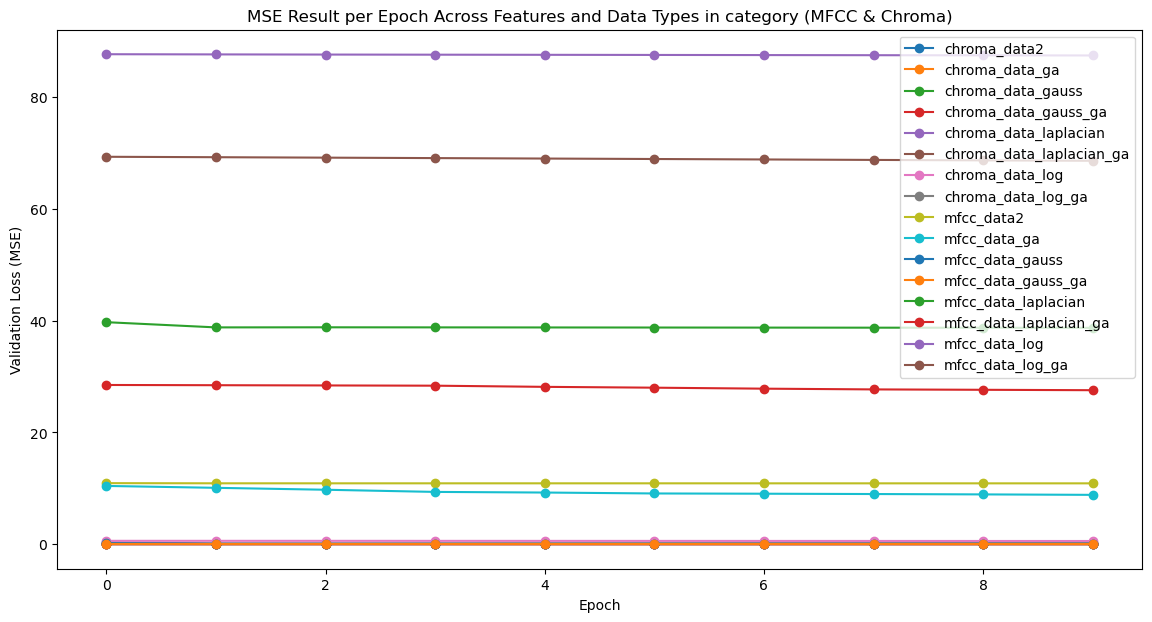

MSE Result : 0.01080012135207653, feature : chroma_data2
MSE Result : 0.0027302319649606943, feature : chroma_data_ga
MSE Result : 0.038390032947063446, feature : chroma_data_gauss
MSE Result : 0.00012076810526195914, feature : chroma_data_gauss_ga
MSE Result : 0.1241549625992775, feature : chroma_data_laplacian
MSE Result : 0.03269685432314873, feature : chroma_data_laplacian_ga
MSE Result : 0.5756821036338806, feature : chroma_data_log
MSE Result : 0.06873234361410141, feature : chroma_data_log_ga
MSE Result : 10.889036178588867, feature : mfcc_data2
MSE Result : 8.830873489379883, feature : mfcc_data_ga
MSE Result : 0.05994604155421257, feature : mfcc_data_gauss
MSE Result : 0.04248135909438133, feature : mfcc_data_gauss_ga
MSE Result : 38.70963668823242, feature : mfcc_data_laplacian
MSE Result : 27.551776885986328, feature : mfcc_data_laplacian_ga
MSE Result : 87.43047332763672, feature : mfcc_data_log
MSE Result : 68.58281707763672, feature : mfcc_data_log_ga


In [ ]:
#7

def process_features(data, feature_type):
    if feature_type == 'stft':
        return librosa.istft(data)
    elif feature_type in ['mfcc', 'chroma']:
        if data.ndim == 2:
            return data.reshape(data.shape[0], data.shape[1], 1)
        else:
            return data
    else:
        raise ValueError("Unsupported feature type")

def create_sequences(data, seq_length):
    X, Y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        Y.append(data[i + seq_length])
    return np.array(X), np.array(Y)

feature_types = ['chroma', 'mfcc']
data_names = ['data2', 'data_ga', 'data_gauss', 'data_gauss_ga', 'data_laplacian',
              'data_laplacian_ga', 'data_log', 'data_log_ga']

mse_results = {}

for feature_type in feature_types:
    hdf5_file_path = f'cat_{feature_type}_features7.h5'
    with h5py.File(hdf5_file_path, 'r+') as hdf5_file:
        for data_name in tqdm(data_names, desc=f"Processing {feature_type}"):
            data = hdf5_file[data_name][:]

            if data.ndim == 2 and data.shape[0] > 0:
                data = np.expand_dims(data, axis=-1)

                t, y = process_features(data, feature_type), np.roll(data, -1, axis=0)
                t, y = t[:-1], y[:-1]

                if len(t) > 10:
                    X_train, y_train = create_sequences(t, 2)
                    X_test, y_test = create_sequences(y, 2)

                    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], -1))
                    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], -1))
                    y_train = y_train.reshape((y_train.shape[0], -1))
                    y_test = y_test.reshape((y_test.shape[0], -1))

                    if X_train.size > 0 and X_test.size > 0:
                        model = Sequential([
                            LSTM(16, input_shape=(X_train.shape[1], X_train.shape[2])),
                            Dense(1)
                        ])
                        model.compile(optimizer='adam', loss='mse')
                        history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test), verbose=2)

                        mse_results[f'{feature_type}_{data_name}'] = history.history['val_loss']
                        print(f'MSE Result for {feature_type} {data_name}:', np.min(history.history['val_loss']))

plt.figure(figsize=(14, 7))
for key, losses in mse_results.items():
    plt.plot(losses, label=key, marker='o', linestyle='-')
plt.ylabel('Validation Loss (MSE)')
plt.xlabel('Epoch')
plt.title('MSE Result per Epoch Across Features and Data Types in category (MFCC & Chroma)')
plt.legend()
plt.show()

for key, losses in mse_results.items():
    los = np.min(losses)
    print(f'MSE Result : {los}, feature : {key}')


Processing chroma:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/10
1/1 - 1s - 958ms/step - loss: 0.1387 - val_loss: 1.8685
Epoch 2/10
1/1 - 0s - 256ms/step - loss: 1.8830 - val_loss: 1.8613
Epoch 3/10
1/1 - 0s - 249ms/step - loss: 1.8757 - val_loss: 1.8524
Epoch 4/10
1/1 - 0s - 254ms/step - loss: 1.8669 - val_loss: 1.8429
Epoch 5/10
1/1 - 0s - 258ms/step - loss: 1.8573 - val_loss: 1.8330
Epoch 6/10
1/1 - 0s - 251ms/step - loss: 1.8474 - val_loss: 1.8229
Epoch 7/10
1/1 - 0s - 250ms/step - loss: 1.8372 - val_loss: 1.8126
Epoch 8/10
1/1 - 0s - 250ms/step - loss: 1.8269 - val_loss: 1.8022
Epoch 9/10
1/1 - 0s - 251ms/step - loss: 1.8165 - val_loss: 1.7918
Epoch 10/10
1/1 - 0s - 247ms/step - loss: 1.8060 - val_loss: 1.7813


Processing chroma:  12%|█▎        | 1/8 [00:03<00:24,  3.45s/it]

MSE Result for chroma data2: 1.781301498413086
Epoch 1/10
1/1 - 1s - 661ms/step - loss: 0.1788 - val_loss: 0.5380
Epoch 2/10
1/1 - 0s - 126ms/step - loss: 0.5466 - val_loss: 0.5348
Epoch 3/10
1/1 - 0s - 132ms/step - loss: 0.5435 - val_loss: 0.5305
Epoch 4/10
1/1 - 0s - 132ms/step - loss: 0.5391 - val_loss: 0.5257
Epoch 5/10
1/1 - 0s - 133ms/step - loss: 0.5343 - val_loss: 0.5207
Epoch 6/10
1/1 - 0s - 134ms/step - loss: 0.5292 - val_loss: 0.5155
Epoch 7/10
1/1 - 0s - 129ms/step - loss: 0.5240 - val_loss: 0.5102
Epoch 8/10
1/1 - 0s - 132ms/step - loss: 0.5186 - val_loss: 0.5048
Epoch 9/10
1/1 - 0s - 133ms/step - loss: 0.5132 - val_loss: 0.4994
Epoch 10/10
1/1 - 0s - 131ms/step - loss: 0.5078 - val_loss: 0.4940


Processing chroma:  25%|██▌       | 2/8 [00:05<00:15,  2.57s/it]

MSE Result for chroma data_ga: 0.49398231506347656
Epoch 1/10
1/1 - 1s - 804ms/step - loss: 1.3246e-04 - val_loss: 0.2603
Epoch 2/10
1/1 - 0s - 249ms/step - loss: 0.3234 - val_loss: 0.0544
Epoch 3/10
1/1 - 0s - 247ms/step - loss: 0.2920 - val_loss: 0.0498
Epoch 4/10
1/1 - 0s - 243ms/step - loss: 0.2668 - val_loss: 0.0662
Epoch 5/10
1/1 - 0s - 248ms/step - loss: 0.2416 - val_loss: 0.0800
Epoch 6/10
1/1 - 0s - 247ms/step - loss: 0.2372 - val_loss: 0.0899
Epoch 7/10
1/1 - 0s - 250ms/step - loss: 0.2363 - val_loss: 0.0968
Epoch 8/10
1/1 - 0s - 252ms/step - loss: 0.2354 - val_loss: 0.1015
Epoch 9/10
1/1 - 0s - 266ms/step - loss: 0.2344 - val_loss: 0.1048
Epoch 10/10
1/1 - 0s - 265ms/step - loss: 0.2334 - val_loss: 0.1070


Processing chroma:  38%|███▊      | 3/8 [00:08<00:14,  2.87s/it]

MSE Result for chroma data_gauss: 0.049803294241428375
Epoch 1/10
1/1 - 1s - 667ms/step - loss: 2.3032e-04 - val_loss: 0.1287
Epoch 2/10
1/1 - 0s - 126ms/step - loss: 0.1043 - val_loss: 0.0049
Epoch 3/10
1/1 - 0s - 132ms/step - loss: 0.0037 - val_loss: 0.0032
Epoch 4/10
1/1 - 0s - 127ms/step - loss: 0.0036 - val_loss: 0.0035
Epoch 5/10
1/1 - 0s - 129ms/step - loss: 0.0039 - val_loss: 0.0038
Epoch 6/10
1/1 - 0s - 130ms/step - loss: 0.0040 - val_loss: 0.0039
Epoch 7/10
1/1 - 0s - 130ms/step - loss: 0.0040 - val_loss: 0.0039
Epoch 8/10
1/1 - 0s - 130ms/step - loss: 0.0040 - val_loss: 0.0038
Epoch 9/10
1/1 - 0s - 134ms/step - loss: 0.0039 - val_loss: 0.0038
Epoch 10/10
1/1 - 0s - 131ms/step - loss: 0.0038 - val_loss: 0.0037


Processing chroma:  50%|█████     | 4/8 [00:10<00:10,  2.50s/it]

MSE Result for chroma data_gauss_ga: 0.003157553495839238
Epoch 1/10
1/1 - 1s - 811ms/step - loss: 0.0530 - val_loss: 0.9860
Epoch 2/10
1/1 - 0s - 253ms/step - loss: 0.5996 - val_loss: 0.7727
Epoch 3/10
1/1 - 0s - 248ms/step - loss: 0.3881 - val_loss: 0.5858
Epoch 4/10
1/1 - 0s - 269ms/step - loss: 0.2449 - val_loss: 0.5836
Epoch 5/10
1/1 - 0s - 246ms/step - loss: 0.2441 - val_loss: 0.5814
Epoch 6/10
1/1 - 0s - 249ms/step - loss: 0.2433 - val_loss: 0.5793
Epoch 7/10
1/1 - 0s - 245ms/step - loss: 0.2425 - val_loss: 0.5772
Epoch 8/10
1/1 - 0s - 260ms/step - loss: 0.2417 - val_loss: 0.5751
Epoch 9/10
1/1 - 0s - 258ms/step - loss: 0.2409 - val_loss: 0.5731
Epoch 10/10
1/1 - 0s - 264ms/step - loss: 0.2401 - val_loss: 0.5711


Processing chroma:  62%|██████▎   | 5/8 [00:13<00:08,  2.78s/it]

MSE Result for chroma data_laplacian: 0.5710625052452087
Epoch 1/10
1/1 - 2s - 2s/step - loss: 0.0211 - val_loss: 0.5568
Epoch 2/10
1/1 - 0s - 134ms/step - loss: 0.5423 - val_loss: 0.5448
Epoch 3/10
1/1 - 0s - 137ms/step - loss: 0.5245 - val_loss: 0.5226
Epoch 4/10
1/1 - 0s - 138ms/step - loss: 0.5031 - val_loss: 0.5152
Epoch 5/10
1/1 - 0s - 136ms/step - loss: 0.4958 - val_loss: 0.5112
Epoch 6/10
1/1 - 0s - 133ms/step - loss: 0.4919 - val_loss: 0.5072
Epoch 7/10
1/1 - 0s - 134ms/step - loss: 0.4880 - val_loss: 0.5031
Epoch 8/10
1/1 - 0s - 133ms/step - loss: 0.4840 - val_loss: 0.4990
Epoch 9/10
1/1 - 0s - 133ms/step - loss: 0.4800 - val_loss: 0.4949
Epoch 10/10
1/1 - 0s - 130ms/step - loss: 0.4760 - val_loss: 0.4907


Processing chroma:  75%|███████▌  | 6/8 [00:16<00:05,  2.83s/it]

MSE Result for chroma data_laplacian_ga: 0.4907332956790924
Epoch 1/10
1/1 - 1s - 959ms/step - loss: 0.1268 - val_loss: 1.9801
Epoch 2/10
1/1 - 0s - 321ms/step - loss: 2.0627 - val_loss: 1.9704
Epoch 3/10
1/1 - 0s - 354ms/step - loss: 2.0529 - val_loss: 1.9589
Epoch 4/10
1/1 - 0s - 293ms/step - loss: 2.0412 - val_loss: 1.9466
Epoch 5/10
1/1 - 0s - 271ms/step - loss: 2.0288 - val_loss: 1.9338
Epoch 6/10
1/1 - 0s - 265ms/step - loss: 2.0158 - val_loss: 1.9208
Epoch 7/10
1/1 - 0s - 280ms/step - loss: 2.0027 - val_loss: 1.9077
Epoch 8/10
1/1 - 0s - 251ms/step - loss: 1.9894 - val_loss: 1.8944
Epoch 9/10
1/1 - 0s - 248ms/step - loss: 1.9760 - val_loss: 1.8812
Epoch 10/10
1/1 - 0s - 245ms/step - loss: 1.9625 - val_loss: 1.8678


Processing chroma:  88%|████████▊ | 7/8 [00:20<00:03,  3.10s/it]

MSE Result for chroma data_log: 1.8678343296051025
Epoch 1/10
1/1 - 1s - 659ms/step - loss: 1.3139 - val_loss: 0.0588
Epoch 2/10
1/1 - 0s - 125ms/step - loss: 0.0715 - val_loss: 0.0581
Epoch 3/10
1/1 - 0s - 131ms/step - loss: 0.0708 - val_loss: 0.0574
Epoch 4/10
1/1 - 0s - 128ms/step - loss: 0.0703 - val_loss: 0.0569
Epoch 5/10
1/1 - 0s - 131ms/step - loss: 0.0697 - val_loss: 0.0563
Epoch 6/10
1/1 - 0s - 132ms/step - loss: 0.0693 - val_loss: 0.0558
Epoch 7/10
1/1 - 0s - 130ms/step - loss: 0.0688 - val_loss: 0.0553
Epoch 8/10
1/1 - 0s - 129ms/step - loss: 0.0683 - val_loss: 0.0548
Epoch 9/10
1/1 - 0s - 129ms/step - loss: 0.0679 - val_loss: 0.0544
Epoch 10/10
1/1 - 0s - 128ms/step - loss: 0.0674 - val_loss: 0.0539


Processing chroma: 100%|██████████| 8/8 [00:22<00:00,  2.79s/it]


MSE Result for chroma data_log_ga: 0.05390399694442749


Processing mfcc:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/10
2/2 - 70s - 35s/step - loss: 11.8556 - val_loss: 12.3290
Epoch 2/10
2/2 - 43s - 22s/step - loss: 12.3994 - val_loss: 12.3236
Epoch 3/10
2/2 - 45s - 22s/step - loss: 12.3945 - val_loss: 12.3179
Epoch 4/10
2/2 - 39s - 19s/step - loss: 12.3890 - val_loss: 12.3121
Epoch 5/10
2/2 - 34s - 17s/step - loss: 12.3833 - val_loss: 12.3057
Epoch 6/10
2/2 - 37s - 18s/step - loss: 12.3775 - val_loss: 12.2924
Epoch 7/10
2/2 - 38s - 19s/step - loss: 12.3637 - val_loss: 12.2868
Epoch 8/10
2/2 - 39s - 20s/step - loss: 12.3589 - val_loss: 12.2813
Epoch 9/10
2/2 - 39s - 20s/step - loss: 12.3532 - val_loss: 12.2758
Epoch 10/10
2/2 - 35s - 18s/step - loss: 12.3474 - val_loss: 12.2704


Processing mfcc:  12%|█▎        | 1/8 [07:29<52:23, 449.07s/it]

MSE Result for mfcc data2: 12.270381927490234
Epoch 1/10
2/2 - 15s - 7s/step - loss: 6.9500 - val_loss: 4.9992
Epoch 2/10
2/2 - 13s - 7s/step - loss: 4.9925 - val_loss: 4.9987
Epoch 3/10
2/2 - 7s - 3s/step - loss: 4.9919 - val_loss: 4.9983
Epoch 4/10
2/2 - 6s - 3s/step - loss: 4.9921 - val_loss: 4.9979
Epoch 5/10
2/2 - 8s - 4s/step - loss: 4.9909 - val_loss: 4.9975
Epoch 6/10
2/2 - 9s - 4s/step - loss: 4.9903 - val_loss: 4.9973
Epoch 7/10
2/2 - 8s - 4s/step - loss: 4.9899 - val_loss: 4.9970
Epoch 8/10
2/2 - 9s - 5s/step - loss: 4.9895 - val_loss: 4.9968
Epoch 9/10
2/2 - 8s - 4s/step - loss: 4.9889 - val_loss: 4.9966
Epoch 10/10
2/2 - 9s - 5s/step - loss: 4.9889 - val_loss: 4.9964
MSE Result for mfcc data_ga:

Processing mfcc:  25%|██▌       | 2/8 [09:08<24:19, 243.24s/it]

 4.996359348297119
Epoch 1/10
2/2 - 66s - 33s/step - loss: 0.1519 - val_loss: 0.2670
Epoch 2/10
2/2 - 43s - 22s/step - loss: 0.2662 - val_loss: 0.2596
Epoch 3/10
2/2 - 50s - 25s/step - loss: 0.2582 - val_loss: 0.2538
Epoch 4/10
2/2 - 45s - 22s/step - loss: 0.2534 - val_loss: 0.2500
Epoch 5/10
2/2 - 42s - 21s/step - loss: 0.2498 - val_loss: 0.2472
Epoch 6/10
2/2 - 48s - 24s/step - loss: 0.2476 - val_loss: 0.2419
Epoch 7/10
2/2 - 36s - 18s/step - loss: 0.2412 - val_loss: 0.2365
Epoch 8/10
2/2 - 42s - 21s/step - loss: 0.2364 - val_loss: 0.2331
Epoch 9/10
2/2 - 39s - 20s/step - loss: 0.2329 - val_loss: 0.2280
Epoch 10/10
2/2 - 38s - 19s/step - loss: 0.2275 - val_loss: 0.2230
MSE Result for mfcc data_gauss:

Processing mfcc:  38%|███▊      | 3/8 [17:04<29:08, 349.75s/it]

 0.22304093837738037
Epoch 1/10
2/2 - 18s - 9s/step - loss: 0.2758 - val_loss: 0.5453
Epoch 2/10
2/2 - 12s - 6s/step - loss: 0.5409 - val_loss: 0.5379
Epoch 3/10
2/2 - 8s - 4s/step - loss: 0.5332 - val_loss: 0.5298
Epoch 4/10
2/2 - 9s - 5s/step - loss: 0.5251 - val_loss: 0.5216
Epoch 5/10
2/2 - 7s - 4s/step - loss: 0.5169 - val_loss: 0.5133
Epoch 6/10
2/2 - 13s - 6s/step - loss: 0.5087 - val_loss: 0.5050
Epoch 7/10
2/2 - 9s - 4s/step - loss: 0.5004 - val_loss: 0.4968
Epoch 8/10
2/2 - 6s - 3s/step - loss: 0.4922 - val_loss: 0.4886
Epoch 9/10
2/2 - 7s - 4s/step - loss: 0.4840 - val_loss: 0.4804
Epoch 10/10
2/2 - 6s - 3s/step - loss: 0.4760 - val_loss: 0.4724


Processing mfcc:  50%|█████     | 4/8 [18:47<16:48, 252.16s/it]

MSE Result for mfcc data_gauss_ga: 0.47235652804374695
Epoch 1/10
2/2 - 63s - 31s/step - loss: 42.2626 - val_loss: 41.7649
Epoch 2/10
2/2 - 48s - 24s/step - loss: 42.2526 - val_loss: 41.7500
Epoch 3/10
2/2 - 43s - 22s/step - loss: 42.2380 - val_loss: 41.7344
Epoch 4/10
2/2 - 44s - 22s/step - loss: 42.2216 - val_loss: 41.6479
Epoch 5/10
2/2 - 43s - 21s/step - loss: 42.0348 - val_loss: 41.1592
Epoch 6/10
2/2 - 35s - 17s/step - loss: 41.6561 - val_loss: 41.1035
Epoch 7/10
2/2 - 34s - 17s/step - loss: 41.5992 - val_loss: 41.0961
Epoch 8/10
2/2 - 33s - 17s/step - loss: 41.5834 - val_loss: 41.0791
Epoch 9/10
2/2 - 35s - 18s/step - loss: 41.5648 - val_loss: 41.0623
Epoch 10/10
2/2 - 44s - 22s/step - loss: 41.5910 - val_loss: 41.0802


Processing mfcc:  62%|██████▎   | 5/8 [26:19<16:12, 324.23s/it]

MSE Result for mfcc data_laplacian: 41.062259674072266
Epoch 1/10
2/2 - 15s - 7s/step - loss: 34.0904 - val_loss: 29.7232
Epoch 2/10
2/2 - 14s - 7s/step - loss: 30.0186 - val_loss: 29.6793
Epoch 3/10
2/2 - 9s - 5s/step - loss: 29.9734 - val_loss: 29.6425
Epoch 4/10
2/2 - 6s - 3s/step - loss: 29.9339 - val_loss: 29.5776
Epoch 5/10
2/2 - 7s - 4s/step - loss: 29.8689 - val_loss: 29.5121
Epoch 6/10
2/2 - 10s - 5s/step - loss: 29.8034 - val_loss: 29.4678
Epoch 7/10
2/2 - 7s - 3s/step - loss: 29.7577 - val_loss: 29.3394
Epoch 8/10
2/2 - 6s - 3s/step - loss: 29.6251 - val_loss: 29.2824
Epoch 9/10
2/2 - 7s - 4s/step - loss: 29.5721 - val_loss: 29.2170
Epoch 10/10
2/2 - 9s - 5s/step - loss: 29.5032 - val_loss: 29.1522


Processing mfcc:  75%|███████▌  | 6/8 [27:54<08:12, 246.27s/it]

MSE Result for mfcc data_laplacian_ga: 29.152175903320312
Epoch 1/10
2/2 - 65s - 33s/step - loss: 94.2299 - val_loss: 92.7955
Epoch 2/10
2/2 - 37s - 19s/step - loss: 93.7777 - val_loss: 92.7020
Epoch 3/10
2/2 - 46s - 23s/step - loss: 93.5463 - val_loss: 91.7359
Epoch 4/10
2/2 - 41s - 21s/step - loss: 92.6013 - val_loss: 91.5340
Epoch 5/10
2/2 - 45s - 23s/step - loss: 92.5100 - val_loss: 91.1243
Epoch 6/10
2/2 - 36s - 18s/step - loss: 92.0767 - val_loss: 91.0775
Epoch 7/10
2/2 - 46s - 23s/step - loss: 92.0431 - val_loss: 91.0414
Epoch 8/10
2/2 - 33s - 16s/step - loss: 92.0158 - val_loss: 90.9983
Epoch 9/10
2/2 - 37s - 18s/step - loss: 91.9469 - val_loss: 90.9446
Epoch 10/10
2/2 - 36s - 18s/step - loss: 91.9167 - val_loss: 90.9151


Processing mfcc:  88%|████████▊ | 7/8 [35:27<05:13, 313.87s/it]

MSE Result for mfcc data_log: 90.91510772705078
Epoch 1/10
2/2 - 14s - 7s/step - loss: 96.4426 - val_loss: 90.2935
Epoch 2/10
2/2 - 15s - 7s/step - loss: 91.2852 - val_loss: 90.2428
Epoch 3/10
2/2 - 8s - 4s/step - loss: 91.2329 - val_loss: 90.1905
Epoch 4/10
2/2 - 8s - 4s/step - loss: 91.1791 - val_loss: 90.1374
Epoch 5/10
2/2 - 6s - 3s/step - loss: 91.1255 - val_loss: 90.0839
Epoch 6/10
2/2 - 5s - 3s/step - loss: 91.0717 - val_loss: 90.0301
Epoch 7/10
2/2 - 7s - 3s/step - loss: 91.0172 - val_loss: 89.9762
Epoch 8/10
2/2 - 7s - 3s/step - loss: 90.9622 - val_loss: 89.9222
Epoch 9/10
2/2 - 7s - 4s/step - loss: 90.9080 - val_loss: 89.8682
Epoch 10/10
2/2 - 10s - 5s/step - loss: 90.8531 - val_loss: 89.8142
MSE Result for mfcc data_log_ga: 89.81424713134766


Processing mfcc: 100%|██████████| 8/8 [36:59<00:00, 277.43s/it]


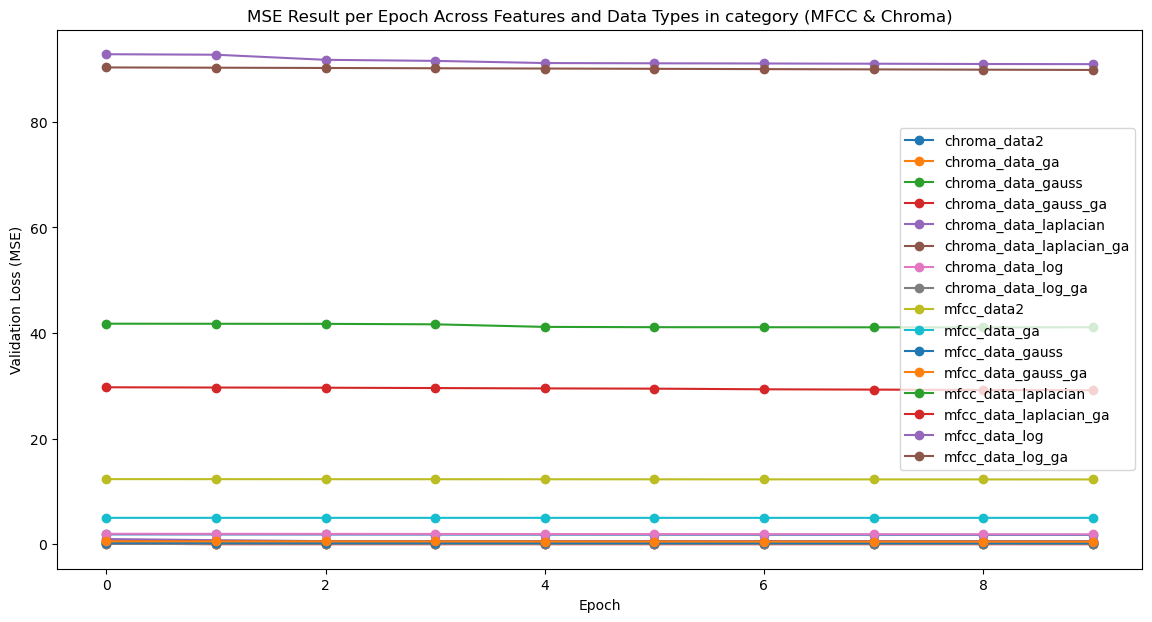

MSE Result : 1.781301498413086, feature : chroma_data2
MSE Result : 0.49398231506347656, feature : chroma_data_ga
MSE Result : 0.049803294241428375, feature : chroma_data_gauss
MSE Result : 0.003157553495839238, feature : chroma_data_gauss_ga
MSE Result : 0.5710625052452087, feature : chroma_data_laplacian
MSE Result : 0.4907332956790924, feature : chroma_data_laplacian_ga
MSE Result : 1.8678343296051025, feature : chroma_data_log
MSE Result : 0.05390399694442749, feature : chroma_data_log_ga
MSE Result : 12.270381927490234, feature : mfcc_data2
MSE Result : 4.996359348297119, feature : mfcc_data_ga
MSE Result : 0.22304093837738037, feature : mfcc_data_gauss
MSE Result : 0.47235652804374695, feature : mfcc_data_gauss_ga
MSE Result : 41.062259674072266, feature : mfcc_data_laplacian
MSE Result : 29.152175903320312, feature : mfcc_data_laplacian_ga
MSE Result : 90.91510772705078, feature : mfcc_data_log
MSE Result : 89.81424713134766, feature : mfcc_data_log_ga


In [ ]:
#2

def process_features(data, feature_type):
    if feature_type == 'stft':
        return librosa.istft(data)
    elif feature_type in ['mfcc', 'chroma']:
        if data.ndim == 2:
            return data.reshape(data.shape[0], data.shape[1], 1)
        else:
            return data
    else:
        raise ValueError("Unsupported feature type")

def create_sequences(data, seq_length):
    X, Y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        Y.append(data[i + seq_length])
    return np.array(X), np.array(Y)

feature_types = ['chroma', 'mfcc']
data_names = ['data2', 'data_ga', 'data_gauss', 'data_gauss_ga', 'data_laplacian',
              'data_laplacian_ga', 'data_log', 'data_log_ga']

mse_results = {}

for feature_type in feature_types:
    hdf5_file_path = f'cat_{feature_type}_features2.h5'
    with h5py.File(hdf5_file_path, 'r+') as hdf5_file:
        for data_name in tqdm(data_names, desc=f"Processing {feature_type}"):
            data = hdf5_file[data_name][:]

            if data.ndim == 2 and data.shape[0] > 0:
                data = np.expand_dims(data, axis=-1)

                t, y = process_features(data, feature_type), np.roll(data, -1, axis=0)
                t, y = t[:-1], y[:-1]

                if len(t) > 10:
                    X_train, y_train = create_sequences(t, 2)
                    X_test, y_test = create_sequences(y, 2)

                    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], -1))
                    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], -1))
                    y_train = y_train.reshape((y_train.shape[0], -1))
                    y_test = y_test.reshape((y_test.shape[0], -1))

                    if X_train.size > 0 and X_test.size > 0:
                        model = Sequential([
                            LSTM(16, input_shape=(X_train.shape[1], X_train.shape[2])),
                            Dense(1)
                        ])
                        model.compile(optimizer='adam', loss='mse')
                        history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test), verbose=2)

                        mse_results[f'{feature_type}_{data_name}'] = history.history['val_loss']
                        print(f'MSE Result for {feature_type} {data_name}:', np.min(history.history['val_loss']))

plt.figure(figsize=(14, 7))
for key, losses in mse_results.items():
    plt.plot(losses, label=key, marker='o', linestyle='-')
plt.ylabel('Validation Loss (MSE)')
plt.xlabel('Epoch')
plt.title('MSE Result per Epoch Across Features and Data Types in category (MFCC & Chroma)')
plt.legend()
plt.show()

for key, losses in mse_results.items():
    los = np.min(losses)
    print(f'MSE Result : {los}, feature : {key}')


**DANI**

Processing data_dani:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1/10


/Users/indraawal/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


503643/503643 - 233s - 463us/step - loss: 9.0187e-07 - val_loss: 7.3711e-07
Epoch 2/10
503643/503643 - 233s - 462us/step - loss: 8.4368e-07 - val_loss: 7.4247e-07
Epoch 3/10
503643/503643 - 233s - 463us/step - loss: 8.4255e-07 - val_loss: 7.0586e-07
Epoch 4/10
503643/503643 - 234s - 464us/step - loss: 8.4198e-07 - val_loss: 7.2357e-07
Epoch 5/10
503643/503643 - 237s - 471us/step - loss: 8.4181e-07 - val_loss: 9.0575e-07
Epoch 6/10
503643/503643 - 235s - 466us/step - loss: 8.4165e-07 - val_loss: 7.3039e-07
Epoch 7/10
503643/503643 - 234s - 465us/step - loss: 8.4134e-07 - val_loss: 7.7474e-07
Epoch 8/10
503643/503643 - 236s - 468us/step - loss: 8.4111e-07 - val_loss: 9.9370e-07
Epoch 9/10
503643/503643 - 235s - 466us/step - loss: 8.4132e-07 - val_loss: 7.5861e-07
Epoch 10/10
503643/503643 - 231s - 459us/step - loss: 8.4119e-07 - val_loss: 7.2328e-07


Processing data_dani:  25%|██▌       | 1/4 [39:24<1:58:14, 2364.90s/it]

Epoch 1/10
503643/503643 - 233s - 463us/step - loss: 9.5048e-07 - val_loss: 7.0820e-07
Epoch 2/10
503643/503643 - 232s - 461us/step - loss: 8.4312e-07 - val_loss: 7.2545e-07
Epoch 3/10
503643/503643 - 241s - 478us/step - loss: 8.4215e-07 - val_loss: 7.0817e-07
Epoch 4/10
503643/503643 - 240s - 477us/step - loss: 8.4180e-07 - val_loss: 7.3262e-07
Epoch 5/10
503643/503643 - 233s - 462us/step - loss: 8.4113e-07 - val_loss: 7.5792e-07
Epoch 6/10
503643/503643 - 248s - 492us/step - loss: 8.4111e-07 - val_loss: 7.1642e-07
Epoch 7/10
503643/503643 - 252s - 501us/step - loss: 8.4069e-07 - val_loss: 7.0781e-07
Epoch 8/10
503643/503643 - 244s - 484us/step - loss: 8.4036e-07 - val_loss: 7.1035e-07
Epoch 9/10
503643/503643 - 242s - 481us/step - loss: 8.4034e-07 - val_loss: 7.0862e-07
Epoch 10/10
503643/503643 - 249s - 495us/step - loss: 8.3982e-07 - val_loss: 7.1563e-07


Processing data_dani:  50%|█████     | 2/4 [1:20:01<1:20:14, 2407.35s/it]

Epoch 1/10
503643/503643 - 241s - 479us/step - loss: 8.9133e-07 - val_loss: 8.3689e-07
Epoch 2/10
503643/503643 - 247s - 490us/step - loss: 8.4340e-07 - val_loss: 7.2862e-07
Epoch 3/10
503643/503643 - 243s - 483us/step - loss: 8.4270e-07 - val_loss: 7.2135e-07
Epoch 4/10
503643/503643 - 249s - 494us/step - loss: 8.4179e-07 - val_loss: 8.3158e-07
Epoch 5/10
503643/503643 - 251s - 498us/step - loss: 8.4121e-07 - val_loss: 7.0809e-07
Epoch 6/10
503643/503643 - 247s - 491us/step - loss: 8.4073e-07 - val_loss: 7.2183e-07
Epoch 7/10
503643/503643 - 239s - 475us/step - loss: 8.4076e-07 - val_loss: 7.1794e-07
Epoch 8/10
503643/503643 - 241s - 479us/step - loss: 8.4027e-07 - val_loss: 7.2236e-07
Epoch 9/10
503643/503643 - 242s - 481us/step - loss: 8.4065e-07 - val_loss: 7.8420e-07
Epoch 10/10
503643/503643 - 247s - 491us/step - loss: 8.4037e-07 - val_loss: 7.1783e-07


Processing data_dani:  75%|███████▌  | 3/4 [2:01:13<40:36, 2436.65s/it]  

Epoch 1/10
503643/503643 - 244s - 485us/step - loss: 8.9069e-07 - val_loss: 7.0941e-07
Epoch 2/10
503643/503643 - 242s - 481us/step - loss: 8.4334e-07 - val_loss: 7.0991e-07
Epoch 3/10
503643/503643 - 246s - 489us/step - loss: 8.4227e-07 - val_loss: 7.3968e-07
Epoch 4/10
503643/503643 - 247s - 490us/step - loss: 8.4208e-07 - val_loss: 7.3330e-07
Epoch 5/10
503643/503643 - 242s - 481us/step - loss: 8.4160e-07 - val_loss: 7.7446e-07
Epoch 6/10
503643/503643 - 239s - 474us/step - loss: 8.4151e-07 - val_loss: 7.0667e-07
Epoch 7/10
503643/503643 - 245s - 486us/step - loss: 8.4144e-07 - val_loss: 7.1322e-07
Epoch 8/10
503643/503643 - 244s - 485us/step - loss: 8.4123e-07 - val_loss: 7.0520e-07
Epoch 9/10
503643/503643 - 247s - 491us/step - loss: 8.4100e-07 - val_loss: 7.5629e-07
Epoch 10/10
503643/503643 - 246s - 489us/step - loss: 8.4113e-07 - val_loss: 7.1177e-07


Processing data_dani_ga:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1/10
251998/251998 - 124s - 492us/step - loss: 6.9719e-07 - val_loss: 5.7361e-07
Epoch 2/10
251998/251998 - 124s - 491us/step - loss: 6.5228e-07 - val_loss: 5.4513e-07
Epoch 3/10
251998/251998 - 128s - 508us/step - loss: 6.5120e-07 - val_loss: 6.7586e-07
Epoch 4/10
251998/251998 - 129s - 511us/step - loss: 6.5080e-07 - val_loss: 5.4139e-07
Epoch 5/10
251998/251998 - 128s - 510us/step - loss: 6.5057e-07 - val_loss: 5.3776e-07
Epoch 6/10
251998/251998 - 119s - 474us/step - loss: 6.5004e-07 - val_loss: 5.8807e-07
Epoch 7/10
251998/251998 - 121s - 480us/step - loss: 6.5029e-07 - val_loss: 5.5164e-07
Epoch 8/10
251998/251998 - 120s - 476us/step - loss: 6.4970e-07 - val_loss: 5.8084e-07
Epoch 9/10
251998/251998 - 122s - 484us/step - loss: 6.4973e-07 - val_loss: 5.5915e-07
Epoch 10/10
251998/251998 - 122s - 483us/step - loss: 6.4979e-07 - val_loss: 5.5544e-07


Processing data_dani_ga:  25%|██▌       | 1/4 [20:47<1:02:23, 1247.67s/it]

Epoch 1/10
251998/251998 - 119s - 473us/step - loss: 6.8593e-07 - val_loss: 5.8011e-07
Epoch 2/10
251998/251998 - 119s - 471us/step - loss: 6.5207e-07 - val_loss: 5.5362e-07
Epoch 3/10
251998/251998 - 120s - 474us/step - loss: 6.5134e-07 - val_loss: 5.3725e-07
Epoch 4/10
251998/251998 - 122s - 482us/step - loss: 6.5081e-07 - val_loss: 6.7301e-07
Epoch 5/10
251998/251998 - 120s - 475us/step - loss: 6.5034e-07 - val_loss: 5.4397e-07
Epoch 6/10
251998/251998 - 122s - 484us/step - loss: 6.5010e-07 - val_loss: 5.4316e-07
Epoch 7/10
251998/251998 - 123s - 487us/step - loss: 6.4992e-07 - val_loss: 5.4235e-07
Epoch 8/10
251998/251998 - 125s - 494us/step - loss: 6.4982e-07 - val_loss: 5.4986e-07
Epoch 9/10
251998/251998 - 120s - 475us/step - loss: 6.4964e-07 - val_loss: 5.5997e-07
Epoch 10/10
251998/251998 - 144s - 571us/step - loss: 6.4962e-07 - val_loss: 5.7425e-07


Processing data_dani_ga:  50%|█████     | 2/4 [41:29<41:28, 1244.43s/it]  

Epoch 1/10
251998/251998 - 129s - 510us/step - loss: 6.9420e-07 - val_loss: 5.4102e-07
Epoch 2/10
251998/251998 - 125s - 497us/step - loss: 6.5189e-07 - val_loss: 5.8130e-07
Epoch 3/10
251998/251998 - 126s - 499us/step - loss: 6.5096e-07 - val_loss: 5.6289e-07
Epoch 4/10
251998/251998 - 127s - 503us/step - loss: 6.5072e-07 - val_loss: 6.1450e-07
Epoch 5/10
251998/251998 - 126s - 499us/step - loss: 6.5058e-07 - val_loss: 5.3751e-07
Epoch 6/10
251998/251998 - 122s - 482us/step - loss: 6.5004e-07 - val_loss: 5.4128e-07
Epoch 7/10
251998/251998 - 121s - 480us/step - loss: 6.4984e-07 - val_loss: 5.4125e-07
Epoch 8/10
251998/251998 - 121s - 479us/step - loss: 6.4994e-07 - val_loss: 6.9201e-07
Epoch 9/10
251998/251998 - 119s - 473us/step - loss: 6.4948e-07 - val_loss: 5.9375e-07
Epoch 10/10
251998/251998 - 123s - 488us/step - loss: 6.4970e-07 - val_loss: 5.6667e-07


Processing data_dani_ga:  75%|███████▌  | 3/4 [1:02:20<20:47, 1247.47s/it]

Epoch 1/10
251998/251998 - 120s - 476us/step - loss: 6.7598e-07 - val_loss: 5.3806e-07
Epoch 2/10
251998/251998 - 119s - 474us/step - loss: 6.5244e-07 - val_loss: 5.7112e-07
Epoch 3/10
251998/251998 - 119s - 472us/step - loss: 6.5122e-07 - val_loss: 6.1967e-07
Epoch 4/10
251998/251998 - 122s - 484us/step - loss: 6.5038e-07 - val_loss: 6.1635e-07
Epoch 5/10
251998/251998 - 121s - 479us/step - loss: 6.5048e-07 - val_loss: 5.7644e-07
Epoch 6/10
251998/251998 - 117s - 463us/step - loss: 6.5015e-07 - val_loss: 5.4102e-07
Epoch 7/10
251998/251998 - 118s - 467us/step - loss: 6.4979e-07 - val_loss: 5.8238e-07
Epoch 8/10
251998/251998 - 117s - 466us/step - loss: 6.4957e-07 - val_loss: 5.5277e-07
Epoch 9/10
251998/251998 - 118s - 467us/step - loss: 6.4935e-07 - val_loss: 5.6361e-07
Epoch 10/10
251998/251998 - 125s - 496us/step - loss: 6.4926e-07 - val_loss: 5.4783e-07


Processing data_dani_ga: 100%|██████████| 4/4 [1:22:27<00:00, 1236.83s/it]


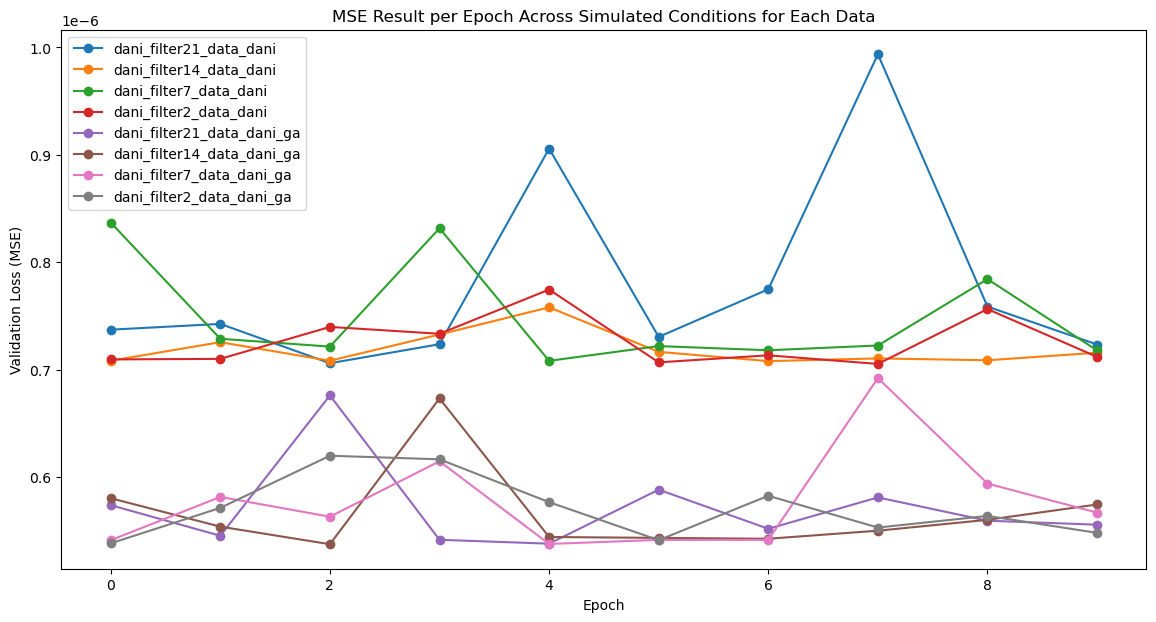

MSE Result for dani_filter21_data_dani: 7.058550295369059e-07
MSE Result for dani_filter14_data_dani: 7.07812773725891e-07
MSE Result for dani_filter7_data_dani: 7.080852242324909e-07
MSE Result for dani_filter2_data_dani: 7.051965553728223e-07
MSE Result for dani_filter21_data_dani_ga: 5.377576712817245e-07
MSE Result for dani_filter14_data_dani_ga: 5.372478426579619e-07
MSE Result for dani_filter7_data_dani_ga: 5.375094929149782e-07
MSE Result for dani_filter2_data_dani_ga: 5.380581455938227e-07


In [ ]:
#21,14,7,2

def process_features(data, feature_type):
    if feature_type == 'filter':
        return librosa.istft(data)

def create_sequences(data, seq_length):
    X, Y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        Y.append(data[i + seq_length])
    return np.array(X), np.array(Y)

def process(hdf5_file_path):
    with h5py.File(hdf5_file_path, 'r+') as hdf5_file:
      for data_name in tqdm(data_names, desc=f"Processing {data_name}")::
          data = hdf5_file[data_name][:]
          t, y = process_features(data, 'filter'), np.roll(data, -1)
          t, y = t[:-1], y[:-1]

          train_size = int(0.8 * len(t))
          train_data, test_data = t[:train_size], t[train_size:]
          train_labels, test_labels = y[:train_size], y[train_size:]

          X_train, y_train = create_sequences(train_data, 2)
          X_test, y_test = create_sequences(test_data, 2)

          X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
          X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

          model = Sequential([
              LSTM(16, input_shape=(2, 1)),
              Dense(1)
          ])
          model.compile(optimizer='adam', loss='mse')
          history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test), verbose=2)

          mse_results[f"{hdf5_file}_{data_name}"] = history.history['val_loss']


hdf5_files = ['dani_filter21.h5', 'dani_filter14.h5', 'dani_filter7.h5', 'dani_filter2.h5']
data_names = ['data_dani', 'data_dani_ga']

mse_results = {}

for file_path in hdf5_files:
    process(file_path)

plt.figure(figsize=(14, 7))
for key, losses in mse_results.items():
    plt.plot(losses, label=key, marker='o', linestyle='-')
plt.ylabel('Validation Loss (MSE)')
plt.xlabel('Epoch')
plt.title('MSE Result per Epoch Across Simulated Conditions for Each Data')
plt.legend()
plt.show()


for key, losses in mse_results.items():
    print(f'MSE Result for {key}: {np.min(losses)}')


**MAE**

**LSTM + STFT**

Processing:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/10
503643/503643 - 234s - 465us/step - loss: 7.6371e-05 - val_loss: 8.2227e-05
Epoch 2/10
503643/503643 - 235s - 466us/step - loss: 7.4127e-05 - val_loss: 1.3679e-04
Epoch 3/10
503643/503643 - 235s - 467us/step - loss: 7.3877e-05 - val_loss: 7.7244e-05
Epoch 4/10
503643/503643 - 235s - 466us/step - loss: 7.3728e-05 - val_loss: 8.0418e-05
Epoch 5/10
503643/503643 - 234s - 465us/step - loss: 7.3577e-05 - val_loss: 7.5052e-05
Epoch 6/10
503643/503643 - 234s - 465us/step - loss: 7.3458e-05 - val_loss: 7.5688e-05
Epoch 7/10
503643/503643 - 234s - 465us/step - loss: 7.3370e-05 - val_loss: 7.6272e-05
Epoch 8/10
503643/503643 - 234s - 465us/step - loss: 7.3457e-05 - val_loss: 7.7855e-05
Epoch 9/10
503643/503643 - 234s - 466us/step - loss: 7.3351e-05 - val_loss: 7.9586e-05
Epoch 10/10
503643/503643 - 244s - 484us/step - loss: 7.3402e-05 - val_loss: 8.1483e-05


Processing:  12%|█▎        | 1/8 [39:36<4:37:14, 2376.33s/it]

Validation loss for stft_features21 data2: 7.505177927669138e-05
Epoch 1/10
251104/251104 - 103s - 409us/step - loss: 9.4891e-05 - val_loss: 1.6515e-04
Epoch 2/10
251104/251104 - 103s - 411us/step - loss: 9.7306e-05 - val_loss: 7.3460e-05
Epoch 3/10
251104/251104 - 102s - 405us/step - loss: 9.9213e-05 - val_loss: 4.3191e-05
Epoch 4/10
251104/251104 - 102s - 406us/step - loss: 9.7378e-05 - val_loss: 2.4122e-04
Epoch 5/10
251104/251104 - 102s - 406us/step - loss: 1.0103e-04 - val_loss: 3.0432e-05
Epoch 6/10
251104/251104 - 101s - 402us/step - loss: 1.0059e-04 - val_loss: 1.1861e-04
Epoch 7/10
251104/251104 - 101s - 402us/step - loss: 1.0147e-04 - val_loss: 1.0377e-04
Epoch 8/10
251104/251104 - 101s - 402us/step - loss: 1.0338e-04 - val_loss: 6.2663e-05
Epoch 9/10
251104/251104 - 102s - 405us/step - loss: 9.9958e-05 - val_loss: 1.0540e-04
Epoch 10/10
251104/251104 - 101s - 402us/step - loss: 1.0007e-04 - val_loss: 1.9678e-04


Processing:  25%|██▌       | 2/8 [56:42<2:38:14, 1582.40s/it]

Validation loss for stft_features21 data_ga: 3.043177093786653e-05
Epoch 1/10
503643/503643 - 235s - 467us/step - loss: 8.4313e-05 - val_loss: 1.0002e-04
Epoch 2/10
503643/503643 - 236s - 468us/step - loss: 8.6033e-05 - val_loss: 6.8919e-05
Epoch 3/10
503643/503643 - 236s - 468us/step - loss: 8.8174e-05 - val_loss: 6.8963e-05
Epoch 4/10
503643/503643 - 238s - 472us/step - loss: 8.9163e-05 - val_loss: 7.6278e-05
Epoch 5/10
503643/503643 - 241s - 479us/step - loss: 9.3409e-05 - val_loss: 6.5139e-05
Epoch 6/10
503643/503643 - 235s - 467us/step - loss: 8.8642e-05 - val_loss: 6.9574e-05
Epoch 7/10
503643/503643 - 235s - 467us/step - loss: 9.3573e-05 - val_loss: 1.0427e-04
Epoch 8/10
503643/503643 - 233s - 463us/step - loss: 9.1242e-05 - val_loss: 7.5910e-05
Epoch 9/10
503643/503643 - 233s - 463us/step - loss: 9.2479e-05 - val_loss: 1.5954e-04
Epoch 10/10
503643/503643 - 234s - 466us/step - loss: 9.4454e-05 - val_loss: 7.5677e-05


Processing:  38%|███▊      | 3/8 [1:36:21<2:42:09, 1945.97s/it]

Validation loss for stft_features21 data_gauss: 6.513853440992534e-05
Epoch 1/10
251294/251294 - 118s - 471us/step - loss: 8.7182e-05 - val_loss: 9.4898e-05
Epoch 2/10
251294/251294 - 117s - 466us/step - loss: 8.2366e-05 - val_loss: 5.6217e-05
Epoch 3/10
251294/251294 - 117s - 467us/step - loss: 8.0035e-05 - val_loss: 4.7033e-05
Epoch 4/10
251294/251294 - 117s - 467us/step - loss: 8.5543e-05 - val_loss: 1.1790e-04
Epoch 5/10
251294/251294 - 117s - 464us/step - loss: 8.8125e-05 - val_loss: 2.0702e-04
Epoch 6/10
251294/251294 - 117s - 466us/step - loss: 8.5805e-05 - val_loss: 3.1783e-05
Epoch 7/10
251294/251294 - 117s - 466us/step - loss: 8.4040e-05 - val_loss: 4.5768e-05
Epoch 8/10
251294/251294 - 118s - 469us/step - loss: 8.5015e-05 - val_loss: 8.6943e-05
Epoch 9/10
251294/251294 - 119s - 474us/step - loss: 8.4719e-05 - val_loss: 1.2252e-04
Epoch 10/10
251294/251294 - 117s - 465us/step - loss: 8.6735e-05 - val_loss: 4.4260e-05


Processing:  50%|█████     | 4/8 [1:56:06<1:49:41, 1645.39s/it]

Validation loss for stft_features21 data_gauss_ga: 3.1783194572199136e-05
Epoch 1/10
503643/503643 - 234s - 465us/step - loss: 8.1570e-05 - val_loss: 1.3105e-04
Epoch 2/10
503643/503643 - 238s - 472us/step - loss: 7.9245e-05 - val_loss: 8.4012e-05
Epoch 3/10
503643/503643 - 240s - 476us/step - loss: 7.8937e-05 - val_loss: 9.7426e-05
Epoch 4/10
503643/503643 - 234s - 465us/step - loss: 7.8799e-05 - val_loss: 1.0882e-04
Epoch 5/10
503643/503643 - 236s - 468us/step - loss: 7.8784e-05 - val_loss: 8.8886e-05
Epoch 6/10
503643/503643 - 235s - 467us/step - loss: 7.8641e-05 - val_loss: 9.0719e-05
Epoch 7/10
503643/503643 - 234s - 464us/step - loss: 7.8478e-05 - val_loss: 8.4505e-05
Epoch 8/10
503643/503643 - 233s - 463us/step - loss: 7.8526e-05 - val_loss: 8.4006e-05
Epoch 9/10
503643/503643 - 233s - 462us/step - loss: 7.8476e-05 - val_loss: 8.8057e-05
Epoch 10/10
503643/503643 - 233s - 463us/step - loss: 7.8428e-05 - val_loss: 1.2782e-04


Processing:  62%|██████▎   | 5/8 [2:35:37<1:35:21, 1907.12s/it]

Validation loss for stft_features21 data_laplacian: 8.400648948736489e-05
Epoch 1/10
251820/251820 - 116s - 462us/step - loss: 6.7477e-05 - val_loss: 6.2126e-05
Epoch 2/10
251820/251820 - 116s - 462us/step - loss: 6.3665e-05 - val_loss: 5.2385e-05
Epoch 3/10
251820/251820 - 117s - 465us/step - loss: 6.3213e-05 - val_loss: 1.0719e-04
Epoch 4/10
251820/251820 - 117s - 463us/step - loss: 6.2604e-05 - val_loss: 5.7712e-05
Epoch 5/10
251820/251820 - 117s - 464us/step - loss: 6.2299e-05 - val_loss: 1.0549e-04
Epoch 6/10
251820/251820 - 117s - 464us/step - loss: 6.2260e-05 - val_loss: 9.2014e-05
Epoch 7/10
251820/251820 - 117s - 463us/step - loss: 6.2148e-05 - val_loss: 9.0861e-05
Epoch 8/10
251820/251820 - 117s - 464us/step - loss: 6.2154e-05 - val_loss: 9.5728e-05
Epoch 9/10
251820/251820 - 117s - 466us/step - loss: 6.2389e-05 - val_loss: 5.5900e-05
Epoch 10/10
251820/251820 - 118s - 469us/step - loss: 6.1605e-05 - val_loss: 8.7181e-05


Processing:  75%|███████▌  | 6/8 [2:55:16<55:19, 1659.73s/it]  

Validation loss for stft_features21 data_laplacian_ga: 5.238467929302715e-05
Epoch 1/10
503643/503643 - 232s - 461us/step - loss: 8.7351e-05 - val_loss: 9.5013e-05
Epoch 2/10
503643/503643 - 236s - 469us/step - loss: 8.5021e-05 - val_loss: 9.2699e-05
Epoch 3/10
503643/503643 - 236s - 468us/step - loss: 8.4653e-05 - val_loss: 9.3605e-05
Epoch 4/10
503643/503643 - 237s - 470us/step - loss: 8.4457e-05 - val_loss: 1.0179e-04
Epoch 5/10
503643/503643 - 233s - 463us/step - loss: 8.4370e-05 - val_loss: 1.1366e-04
Epoch 6/10
503643/503643 - 233s - 462us/step - loss: 8.4213e-05 - val_loss: 1.0597e-04
Epoch 7/10
503643/503643 - 236s - 469us/step - loss: 8.4223e-05 - val_loss: 1.2205e-04
Epoch 8/10
503643/503643 - 233s - 463us/step - loss: 8.4187e-05 - val_loss: 9.4073e-05
Epoch 9/10
503643/503643 - 236s - 469us/step - loss: 8.4124e-05 - val_loss: 1.2535e-04
Epoch 10/10
503643/503643 - 234s - 464us/step - loss: 8.4148e-05 - val_loss: 1.0299e-04


Processing:  88%|████████▊ | 7/8 [3:34:45<31:31, 1891.59s/it]

Validation loss for stft_features21 data_log: 9.269903966924176e-05
Epoch 1/10
251269/251269 - 117s - 464us/step - loss: 7.3709e-05 - val_loss: 7.1947e-05
Epoch 2/10
251269/251269 - 121s - 480us/step - loss: 6.9346e-05 - val_loss: 6.5578e-05
Epoch 3/10
251269/251269 - 119s - 475us/step - loss: 6.8629e-05 - val_loss: 1.0227e-04
Epoch 4/10
251269/251269 - 122s - 486us/step - loss: 6.8192e-05 - val_loss: 1.1551e-04
Epoch 5/10
251269/251269 - 119s - 472us/step - loss: 6.8061e-05 - val_loss: 1.1204e-04
Epoch 6/10
251269/251269 - 121s - 482us/step - loss: 6.8052e-05 - val_loss: 7.0656e-05
Epoch 7/10
251269/251269 - 122s - 485us/step - loss: 6.7964e-05 - val_loss: 8.0523e-05
Epoch 8/10
251269/251269 - 120s - 476us/step - loss: 6.8128e-05 - val_loss: 7.2939e-05
Epoch 9/10
251269/251269 - 118s - 471us/step - loss: 6.7894e-05 - val_loss: 1.3118e-04
Epoch 10/10
251269/251269 - 119s - 472us/step - loss: 6.7722e-05 - val_loss: 6.6315e-05


Processing: 100%|██████████| 8/8 [3:54:53<00:00, 1761.63s/it]


Validation loss for stft_features21 data_log_ga: 6.557838787557557e-05


Processing:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/10
503643/503643 - 233s - 463us/step - loss: 7.6889e-05 - val_loss: 8.6175e-05
Epoch 2/10
503643/503643 - 232s - 462us/step - loss: 7.4230e-05 - val_loss: 8.2033e-05
Epoch 3/10
503643/503643 - 235s - 466us/step - loss: 7.3822e-05 - val_loss: 7.8311e-05
Epoch 4/10
503643/503643 - 233s - 463us/step - loss: 7.3684e-05 - val_loss: 7.5354e-05
Epoch 5/10
503643/503643 - 233s - 462us/step - loss: 7.3581e-05 - val_loss: 7.6460e-05
Epoch 6/10
503643/503643 - 234s - 465us/step - loss: 7.3537e-05 - val_loss: 9.1648e-05
Epoch 7/10
503643/503643 - 241s - 479us/step - loss: 7.3422e-05 - val_loss: 7.9788e-05
Epoch 8/10
503643/503643 - 243s - 483us/step - loss: 7.3525e-05 - val_loss: 1.1225e-04
Epoch 9/10
503643/503643 - 237s - 470us/step - loss: 7.3328e-05 - val_loss: 1.3197e-04
Epoch 10/10
503643/503643 - 250s - 496us/step - loss: 7.3404e-05 - val_loss: 7.9962e-05


Processing:  12%|█▎        | 1/8 [39:53<4:39:17, 2393.90s/it]

Validation loss for stft_features14 data2: 7.535400800406933e-05
Epoch 1/10
251104/251104 - 107s - 425us/step - loss: 9.4744e-05 - val_loss: 1.1455e-04
Epoch 2/10
251104/251104 - 107s - 427us/step - loss: 9.6267e-05 - val_loss: 6.6795e-05
Epoch 3/10
251104/251104 - 107s - 426us/step - loss: 9.7971e-05 - val_loss: 7.8571e-05
Epoch 4/10
251104/251104 - 103s - 410us/step - loss: 1.0124e-04 - val_loss: 4.5856e-05
Epoch 5/10
251104/251104 - 102s - 406us/step - loss: 9.9769e-05 - val_loss: 1.7503e-05
Epoch 6/10
251104/251104 - 102s - 408us/step - loss: 1.0293e-04 - val_loss: 1.8454e-04
Epoch 7/10
251104/251104 - 103s - 409us/step - loss: 1.0313e-04 - val_loss: 1.2095e-04
Epoch 8/10
251104/251104 - 105s - 417us/step - loss: 1.0065e-04 - val_loss: 2.0155e-04
Epoch 9/10
251104/251104 - 103s - 410us/step - loss: 1.0449e-04 - val_loss: 1.4190e-04
Epoch 10/10
251104/251104 - 103s - 411us/step - loss: 1.0296e-04 - val_loss: 2.4126e-04


Processing:  25%|██▌       | 2/8 [57:26<2:40:30, 1605.09s/it]

Validation loss for stft_features14 data_ga: 1.750306364556309e-05
Epoch 1/10
503643/503643 - 236s - 468us/step - loss: 8.5762e-05 - val_loss: 9.3200e-05
Epoch 2/10
503643/503643 - 240s - 476us/step - loss: 8.8979e-05 - val_loss: 7.2008e-05
Epoch 3/10
503643/503643 - 244s - 484us/step - loss: 8.7038e-05 - val_loss: 5.3764e-05
Epoch 4/10
503643/503643 - 239s - 474us/step - loss: 8.9695e-05 - val_loss: 4.1890e-05
Epoch 5/10
503643/503643 - 239s - 475us/step - loss: 9.2291e-05 - val_loss: 2.8126e-05
Epoch 6/10
503643/503643 - 238s - 473us/step - loss: 9.2577e-05 - val_loss: 7.6288e-05
Epoch 7/10
503643/503643 - 239s - 474us/step - loss: 9.1679e-05 - val_loss: 5.1386e-05
Epoch 8/10
503643/503643 - 234s - 464us/step - loss: 9.8458e-05 - val_loss: 7.3674e-05
Epoch 9/10
503643/503643 - 233s - 463us/step - loss: 9.7694e-05 - val_loss: 3.4435e-05
Epoch 10/10
503643/503643 - 233s - 462us/step - loss: 9.9537e-05 - val_loss: 6.0493e-05


Processing:  38%|███▊      | 3/8 [1:37:24<2:43:54, 1966.81s/it]

Validation loss for stft_features14 data_gauss: 2.8126021788921207e-05
Epoch 1/10
251294/251294 - 117s - 464us/step - loss: 8.6187e-05 - val_loss: 5.4519e-05
Epoch 2/10
251294/251294 - 116s - 463us/step - loss: 8.7202e-05 - val_loss: 7.7811e-05
Epoch 3/10
251294/251294 - 117s - 466us/step - loss: 8.4400e-05 - val_loss: 5.1084e-05
Epoch 4/10
251294/251294 - 117s - 466us/step - loss: 8.7029e-05 - val_loss: 4.9570e-05
Epoch 5/10
251294/251294 - 116s - 461us/step - loss: 8.6824e-05 - val_loss: 2.3730e-04
Epoch 6/10
251294/251294 - 117s - 466us/step - loss: 8.6985e-05 - val_loss: 6.3163e-05
Epoch 7/10
251294/251294 - 117s - 467us/step - loss: 8.8934e-05 - val_loss: 8.9868e-05
Epoch 8/10
251294/251294 - 119s - 474us/step - loss: 8.8093e-05 - val_loss: 2.3743e-04
Epoch 9/10
251294/251294 - 118s - 470us/step - loss: 8.8646e-05 - val_loss: 5.3519e-05
Epoch 10/10
251294/251294 - 124s - 493us/step - loss: 8.8258e-05 - val_loss: 3.8797e-05


Processing:  50%|█████     | 4/8 [1:57:13<1:50:39, 1659.85s/it]

Validation loss for stft_features14 data_gauss_ga: 3.87966247217264e-05
Epoch 1/10
503643/503643 - 246s - 489us/step - loss: 8.1559e-05 - val_loss: 8.6931e-05
Epoch 2/10
503643/503643 - 250s - 495us/step - loss: 7.9392e-05 - val_loss: 8.6987e-05
Epoch 3/10
503643/503643 - 240s - 477us/step - loss: 7.9015e-05 - val_loss: 8.3933e-05
Epoch 4/10
503643/503643 - 249s - 493us/step - loss: 7.8906e-05 - val_loss: 8.8620e-05
Epoch 5/10
503643/503643 - 246s - 488us/step - loss: 7.8581e-05 - val_loss: 1.2301e-04
Epoch 6/10
503643/503643 - 249s - 494us/step - loss: 7.8590e-05 - val_loss: 1.4921e-04
Epoch 7/10
503643/503643 - 240s - 477us/step - loss: 7.8568e-05 - val_loss: 8.6504e-05
Epoch 8/10
503643/503643 - 238s - 473us/step - loss: 7.8536e-05 - val_loss: 8.3893e-05
Epoch 9/10
503643/503643 - 234s - 465us/step - loss: 7.8493e-05 - val_loss: 8.9747e-05
Epoch 10/10
503643/503643 - 235s - 468us/step - loss: 7.8507e-05 - val_loss: 9.7491e-05


Processing:  62%|██████▎   | 5/8 [2:38:03<1:37:14, 1944.89s/it]

Validation loss for stft_features14 data_laplacian: 8.389308641199023e-05
Epoch 1/10
251820/251820 - 119s - 474us/step - loss: 6.7056e-05 - val_loss: 5.2173e-05
Epoch 2/10
251820/251820 - 122s - 485us/step - loss: 6.3155e-05 - val_loss: 7.8237e-05
Epoch 3/10
251820/251820 - 122s - 484us/step - loss: 6.3076e-05 - val_loss: 1.1348e-04
Epoch 4/10
251820/251820 - 124s - 491us/step - loss: 6.2877e-05 - val_loss: 9.2298e-05
Epoch 5/10
251820/251820 - 128s - 509us/step - loss: 6.2634e-05 - val_loss: 1.2934e-04
Epoch 6/10
251820/251820 - 120s - 477us/step - loss: 6.2382e-05 - val_loss: 5.2386e-05
Epoch 7/10
251820/251820 - 121s - 479us/step - loss: 6.1977e-05 - val_loss: 9.4339e-05
Epoch 8/10
251820/251820 - 121s - 480us/step - loss: 6.2474e-05 - val_loss: 8.8260e-05
Epoch 9/10
251820/251820 - 121s - 481us/step - loss: 6.1655e-05 - val_loss: 5.2158e-05
Epoch 10/10
251820/251820 - 121s - 481us/step - loss: 6.1943e-05 - val_loss: 1.1355e-04


Processing:  75%|███████▌  | 6/8 [2:58:33<56:43, 1701.93s/it]  

Validation loss for stft_features14 data_laplacian_ga: 5.215802957536653e-05
Epoch 1/10
503643/503643 - 241s - 478us/step - loss: 8.8300e-05 - val_loss: 1.3992e-04
Epoch 2/10
503643/503643 - 246s - 489us/step - loss: 8.4953e-05 - val_loss: 1.0285e-04
Epoch 3/10
503643/503643 - 240s - 477us/step - loss: 8.4613e-05 - val_loss: 9.4345e-05
Epoch 4/10
503643/503643 - 245s - 485us/step - loss: 8.4466e-05 - val_loss: 9.7559e-05
Epoch 5/10
503643/503643 - 250s - 497us/step - loss: 8.4329e-05 - val_loss: 9.9908e-05
Epoch 6/10
503643/503643 - 240s - 477us/step - loss: 8.4254e-05 - val_loss: 1.0249e-04
Epoch 7/10
503643/503643 - 239s - 474us/step - loss: 8.4153e-05 - val_loss: 1.2130e-04
Epoch 8/10
503643/503643 - 250s - 497us/step - loss: 8.4119e-05 - val_loss: 1.3718e-04
Epoch 9/10
503643/503643 - 249s - 494us/step - loss: 8.4207e-05 - val_loss: 1.0953e-04
Epoch 10/10
503643/503643 - 245s - 486us/step - loss: 8.4086e-05 - val_loss: 1.1884e-04


Processing:  88%|████████▊ | 7/8 [3:39:41<32:32, 1952.22s/it]

Validation loss for stft_features14 data_log: 9.434451203560457e-05
Epoch 1/10
251269/251269 - 123s - 491us/step - loss: 7.2856e-05 - val_loss: 6.6959e-05
Epoch 2/10
251269/251269 - 125s - 499us/step - loss: 6.9039e-05 - val_loss: 6.4998e-05
Epoch 3/10
251269/251269 - 118s - 468us/step - loss: 6.8549e-05 - val_loss: 1.3230e-04
Epoch 4/10
251269/251269 - 117s - 466us/step - loss: 6.8266e-05 - val_loss: 9.5650e-05
Epoch 5/10
251269/251269 - 117s - 465us/step - loss: 6.8085e-05 - val_loss: 1.0107e-04
Epoch 6/10
251269/251269 - 118s - 468us/step - loss: 6.8012e-05 - val_loss: 6.5941e-05
Epoch 7/10
251269/251269 - 117s - 465us/step - loss: 6.8262e-05 - val_loss: 7.7922e-05
Epoch 8/10
251269/251269 - 117s - 465us/step - loss: 6.7990e-05 - val_loss: 9.3888e-05
Epoch 9/10
251269/251269 - 117s - 466us/step - loss: 6.7857e-05 - val_loss: 6.5538e-05
Epoch 10/10
251269/251269 - 117s - 467us/step - loss: 6.7902e-05 - val_loss: 6.5465e-05


Processing: 100%|██████████| 8/8 [3:59:39<00:00, 1797.41s/it]


Validation loss for stft_features14 data_log_ga: 6.499812297988683e-05


Processing:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/10
503643/503643 - 235s - 467us/step - loss: 7.6428e-05 - val_loss: 7.5308e-05
Epoch 2/10
503643/503643 - 234s - 465us/step - loss: 7.4249e-05 - val_loss: 7.9578e-05
Epoch 3/10
503643/503643 - 234s - 465us/step - loss: 7.3921e-05 - val_loss: 1.3150e-04
Epoch 4/10
503643/503643 - 237s - 471us/step - loss: 7.3653e-05 - val_loss: 7.6645e-05
Epoch 5/10
503643/503643 - 234s - 465us/step - loss: 7.3558e-05 - val_loss: 8.2133e-05
Epoch 6/10
503643/503643 - 236s - 468us/step - loss: 7.3576e-05 - val_loss: 9.7994e-05
Epoch 7/10
503643/503643 - 235s - 467us/step - loss: 7.3468e-05 - val_loss: 8.1094e-05
Epoch 8/10
503643/503643 - 235s - 467us/step - loss: 7.3370e-05 - val_loss: 7.7277e-05
Epoch 9/10
503643/503643 - 236s - 469us/step - loss: 7.3425e-05 - val_loss: 7.7069e-05
Epoch 10/10
503643/503643 - 235s - 466us/step - loss: 7.3473e-05 - val_loss: 7.6551e-05


Processing:  12%|█▎        | 1/8 [39:35<4:37:06, 2375.18s/it]

Validation loss for stft_features7 data2: 7.530778384534642e-05
Epoch 1/10
251104/251104 - 103s - 409us/step - loss: 9.7764e-05 - val_loss: 6.7508e-05
Epoch 2/10
251104/251104 - 102s - 404us/step - loss: 1.0012e-04 - val_loss: 3.6640e-05
Epoch 3/10
251104/251104 - 103s - 409us/step - loss: 9.7262e-05 - val_loss: 2.8574e-04
Epoch 4/10
251104/251104 - 103s - 410us/step - loss: 9.8336e-05 - val_loss: 8.6798e-05
Epoch 5/10
251104/251104 - 103s - 410us/step - loss: 9.9976e-05 - val_loss: 1.0980e-04
Epoch 6/10
251104/251104 - 103s - 411us/step - loss: 1.0151e-04 - val_loss: 1.0659e-04
Epoch 7/10
251104/251104 - 103s - 410us/step - loss: 9.9457e-05 - val_loss: 4.1423e-05
Epoch 8/10
251104/251104 - 101s - 403us/step - loss: 1.0107e-04 - val_loss: 7.6986e-05
Epoch 9/10
251104/251104 - 103s - 410us/step - loss: 1.0205e-04 - val_loss: 3.0138e-05
Epoch 10/10
251104/251104 - 103s - 411us/step - loss: 1.0104e-04 - val_loss: 1.1699e-04


Processing:  25%|██▌       | 2/8 [56:51<2:38:46, 1587.69s/it]

Validation loss for stft_features7 data_ga: 3.0138044166960754e-05
Epoch 1/10
503643/503643 - 235s - 466us/step - loss: 9.0358e-05 - val_loss: 1.5126e-04
Epoch 2/10
503643/503643 - 235s - 466us/step - loss: 8.3597e-05 - val_loss: 1.0747e-04
Epoch 3/10
503643/503643 - 236s - 469us/step - loss: 8.7807e-05 - val_loss: 4.8480e-05
Epoch 4/10
503643/503643 - 235s - 466us/step - loss: 8.8654e-05 - val_loss: 4.8991e-05
Epoch 5/10
503643/503643 - 237s - 470us/step - loss: 8.8880e-05 - val_loss: 9.5649e-05
Epoch 6/10
503643/503643 - 237s - 471us/step - loss: 9.1479e-05 - val_loss: 7.8065e-05
Epoch 7/10
503643/503643 - 237s - 470us/step - loss: 9.3485e-05 - val_loss: 6.3077e-05
Epoch 8/10
503643/503643 - 234s - 465us/step - loss: 9.3965e-05 - val_loss: 9.1050e-05
Epoch 9/10
503643/503643 - 237s - 471us/step - loss: 9.7390e-05 - val_loss: 1.2637e-04
Epoch 10/10
503643/503643 - 234s - 465us/step - loss: 9.7147e-05 - val_loss: 1.6626e-04


Processing:  38%|███▊      | 3/8 [1:36:31<2:42:26, 1949.40s/it]

Validation loss for stft_features7 data_gauss: 4.8479607357876375e-05
Epoch 1/10
251294/251294 - 117s - 467us/step - loss: 8.6771e-05 - val_loss: 5.5178e-05
Epoch 2/10
251294/251294 - 117s - 466us/step - loss: 8.4820e-05 - val_loss: 4.0031e-05
Epoch 3/10
251294/251294 - 117s - 465us/step - loss: 7.9381e-05 - val_loss: 1.8680e-05
Epoch 4/10
251294/251294 - 117s - 464us/step - loss: 8.3382e-05 - val_loss: 4.4288e-05
Epoch 5/10
251294/251294 - 117s - 465us/step - loss: 8.4869e-05 - val_loss: 4.5887e-05
Epoch 6/10
251294/251294 - 117s - 466us/step - loss: 8.6462e-05 - val_loss: 3.4516e-05
Epoch 7/10
251294/251294 - 117s - 465us/step - loss: 8.4865e-05 - val_loss: 4.4811e-05
Epoch 8/10
251294/251294 - 117s - 465us/step - loss: 8.4556e-05 - val_loss: 5.4715e-05
Epoch 9/10
251294/251294 - 117s - 465us/step - loss: 8.2613e-05 - val_loss: 4.0197e-05
Epoch 10/10
251294/251294 - 118s - 469us/step - loss: 7.9444e-05 - val_loss: 4.4688e-05


Processing:  50%|█████     | 4/8 [1:56:12<1:49:43, 1645.96s/it]

Validation loss for stft_features7 data_gauss_ga: 1.8680080756894313e-05
Epoch 1/10
503643/503643 - 234s - 464us/step - loss: 8.1758e-05 - val_loss: 1.0306e-04
Epoch 2/10
503643/503643 - 236s - 469us/step - loss: 7.9210e-05 - val_loss: 8.9177e-05
Epoch 3/10
503643/503643 - 237s - 471us/step - loss: 7.8918e-05 - val_loss: 8.3863e-05
Epoch 4/10
503643/503643 - 237s - 471us/step - loss: 7.8718e-05 - val_loss: 8.6662e-05
Epoch 5/10
503643/503643 - 238s - 473us/step - loss: 7.8545e-05 - val_loss: 1.0295e-04
Epoch 6/10
503643/503643 - 236s - 468us/step - loss: 7.8582e-05 - val_loss: 8.4439e-05
Epoch 7/10
503643/503643 - 237s - 471us/step - loss: 7.8526e-05 - val_loss: 8.4125e-05
Epoch 8/10
503643/503643 - 239s - 475us/step - loss: 7.8518e-05 - val_loss: 8.9411e-05
Epoch 9/10
503643/503643 - 237s - 470us/step - loss: 7.8352e-05 - val_loss: 9.9497e-05
Epoch 10/10
503643/503643 - 234s - 465us/step - loss: 7.8463e-05 - val_loss: 9.0620e-05


Processing:  62%|██████▎   | 5/8 [2:36:00<1:35:41, 1913.70s/it]

Validation loss for stft_features7 data_laplacian: 8.386331319343299e-05
Epoch 1/10
251820/251820 - 117s - 465us/step - loss: 6.7849e-05 - val_loss: 6.7581e-05
Epoch 2/10
251820/251820 - 117s - 465us/step - loss: 6.3704e-05 - val_loss: 7.0323e-05
Epoch 3/10
251820/251820 - 118s - 467us/step - loss: 6.2866e-05 - val_loss: 8.0611e-05
Epoch 4/10
251820/251820 - 117s - 465us/step - loss: 6.2414e-05 - val_loss: 1.2470e-04
Epoch 5/10
251820/251820 - 117s - 465us/step - loss: 6.2402e-05 - val_loss: 9.4221e-05
Epoch 6/10
251820/251820 - 117s - 466us/step - loss: 6.2487e-05 - val_loss: 7.3116e-05
Epoch 7/10
251820/251820 - 118s - 470us/step - loss: 6.2164e-05 - val_loss: 8.9046e-05
Epoch 8/10
251820/251820 - 118s - 467us/step - loss: 6.1741e-05 - val_loss: 1.5425e-04
Epoch 9/10
251820/251820 - 117s - 465us/step - loss: 6.2192e-05 - val_loss: 5.5411e-05
Epoch 10/10
251820/251820 - 117s - 465us/step - loss: 6.1683e-05 - val_loss: 6.0458e-05


Processing:  75%|███████▌  | 6/8 [2:55:43<55:30, 1665.16s/it]  

Validation loss for stft_features7 data_laplacian_ga: 5.5410786444554105e-05
Epoch 1/10
503643/503643 - 234s - 466us/step - loss: 8.8630e-05 - val_loss: 9.4911e-05
Epoch 2/10
503643/503643 - 235s - 467us/step - loss: 8.4996e-05 - val_loss: 1.2806e-04
Epoch 3/10
503643/503643 - 235s - 466us/step - loss: 8.4647e-05 - val_loss: 9.5877e-05
Epoch 4/10
503643/503643 - 236s - 468us/step - loss: 8.4486e-05 - val_loss: 1.0724e-04
Epoch 5/10
503643/503643 - 235s - 467us/step - loss: 8.4328e-05 - val_loss: 9.3228e-05
Epoch 6/10
503643/503643 - 235s - 466us/step - loss: 8.4269e-05 - val_loss: 1.5562e-04
Epoch 7/10
503643/503643 - 235s - 466us/step - loss: 8.4218e-05 - val_loss: 9.6567e-05
Epoch 8/10
503643/503643 - 235s - 467us/step - loss: 8.4146e-05 - val_loss: 9.2771e-05
Epoch 9/10
503643/503643 - 235s - 467us/step - loss: 8.4160e-05 - val_loss: 1.1344e-04
Epoch 10/10
503643/503643 - 235s - 466us/step - loss: 8.4078e-05 - val_loss: 1.0209e-04


Processing:  88%|████████▊ | 7/8 [3:35:15<31:36, 1896.39s/it]

Validation loss for stft_features7 data_log: 9.277102799387649e-05
Epoch 1/10
251269/251269 - 117s - 466us/step - loss: 7.2949e-05 - val_loss: 9.9348e-05
Epoch 2/10
251269/251269 - 117s - 466us/step - loss: 6.9243e-05 - val_loss: 1.0007e-04
Epoch 3/10
251269/251269 - 117s - 467us/step - loss: 6.8625e-05 - val_loss: 6.5022e-05
Epoch 4/10
251269/251269 - 117s - 466us/step - loss: 6.8472e-05 - val_loss: 7.5451e-05
Epoch 5/10
251269/251269 - 117s - 468us/step - loss: 6.8110e-05 - val_loss: 7.0665e-05
Epoch 6/10
251269/251269 - 117s - 466us/step - loss: 6.8003e-05 - val_loss: 8.1846e-05
Epoch 7/10
251269/251269 - 117s - 466us/step - loss: 6.8037e-05 - val_loss: 7.3119e-05
Epoch 8/10
251269/251269 - 118s - 469us/step - loss: 6.8015e-05 - val_loss: 6.5154e-05
Epoch 9/10
251269/251269 - 117s - 468us/step - loss: 6.7649e-05 - val_loss: 7.0585e-05
Epoch 10/10
251269/251269 - 117s - 468us/step - loss: 6.7819e-05 - val_loss: 9.6775e-05


Processing: 100%|██████████| 8/8 [3:54:58<00:00, 1762.35s/it]


Validation loss for stft_features7 data_log_ga: 6.502172618638724e-05


Processing:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/10
503643/503643 - 234s - 465us/step - loss: 7.6949e-05 - val_loss: 7.7535e-05
Epoch 2/10
503643/503643 - 235s - 466us/step - loss: 7.4245e-05 - val_loss: 7.5006e-05
Epoch 3/10
503643/503643 - 236s - 469us/step - loss: 7.3923e-05 - val_loss: 1.1944e-04
Epoch 4/10
503643/503643 - 236s - 468us/step - loss: 7.3923e-05 - val_loss: 7.6238e-05
Epoch 5/10
503643/503643 - 236s - 468us/step - loss: 7.3483e-05 - val_loss: 7.6704e-05
Epoch 6/10
503643/503643 - 235s - 466us/step - loss: 7.3621e-05 - val_loss: 7.9436e-05
Epoch 7/10
503643/503643 - 235s - 466us/step - loss: 7.3521e-05 - val_loss: 7.9744e-05
Epoch 8/10
503643/503643 - 235s - 467us/step - loss: 7.3347e-05 - val_loss: 7.6474e-05
Epoch 9/10
503643/503643 - 236s - 468us/step - loss: 7.3433e-05 - val_loss: 9.0737e-05
Epoch 10/10
503643/503643 - 234s - 465us/step - loss: 7.3359e-05 - val_loss: 8.3850e-05


Processing:  12%|█▎        | 1/8 [39:34<4:37:01, 2374.52s/it]

Validation loss for stft_features2 data2: 7.500594074372202e-05
Epoch 1/10
251104/251104 - 101s - 403us/step - loss: 9.5974e-05 - val_loss: 2.5762e-05
Epoch 2/10
251104/251104 - 101s - 401us/step - loss: 1.0060e-04 - val_loss: 1.1997e-04
Epoch 3/10
251104/251104 - 101s - 402us/step - loss: 9.9472e-05 - val_loss: 2.6929e-05
Epoch 4/10
251104/251104 - 101s - 401us/step - loss: 1.0161e-04 - val_loss: 7.7200e-05
Epoch 5/10
251104/251104 - 101s - 404us/step - loss: 1.0135e-04 - val_loss: 6.5993e-05
Epoch 6/10
251104/251104 - 101s - 402us/step - loss: 1.0100e-04 - val_loss: 6.0852e-05
Epoch 7/10
251104/251104 - 101s - 402us/step - loss: 1.0023e-04 - val_loss: 2.3661e-04
Epoch 8/10
251104/251104 - 101s - 403us/step - loss: 1.0145e-04 - val_loss: 8.8472e-05
Epoch 9/10
251104/251104 - 101s - 402us/step - loss: 1.0184e-04 - val_loss: 1.2203e-04
Epoch 10/10
251104/251104 - 101s - 402us/step - loss: 1.0209e-04 - val_loss: 6.6441e-05


Processing:  25%|██▌       | 2/8 [56:33<2:37:44, 1577.43s/it]

Validation loss for stft_features2 data_ga: 2.5761950382729992e-05
Epoch 1/10
503643/503643 - 237s - 471us/step - loss: 8.5595e-05 - val_loss: 5.5866e-05
Epoch 2/10
503643/503643 - 235s - 467us/step - loss: 8.8989e-05 - val_loss: 1.9154e-04
Epoch 3/10
503643/503643 - 237s - 470us/step - loss: 9.0089e-05 - val_loss: 5.7714e-05
Epoch 4/10
503643/503643 - 234s - 465us/step - loss: 8.9140e-05 - val_loss: 9.7895e-05
Epoch 5/10
503643/503643 - 236s - 469us/step - loss: 9.1439e-05 - val_loss: 3.8794e-05
Epoch 6/10
503643/503643 - 236s - 468us/step - loss: 9.3040e-05 - val_loss: 2.1837e-04
Epoch 7/10
503643/503643 - 234s - 466us/step - loss: 9.3515e-05 - val_loss: 8.7826e-05
Epoch 8/10
503643/503643 - 235s - 466us/step - loss: 9.4669e-05 - val_loss: 1.4463e-04
Epoch 9/10
503643/503643 - 235s - 467us/step - loss: 9.5032e-05 - val_loss: 7.7350e-05
Epoch 10/10
503643/503643 - 235s - 466us/step - loss: 9.6189e-05 - val_loss: 6.1264e-05


Processing:  38%|███▊      | 3/8 [1:36:10<2:41:51, 1942.29s/it]

Validation loss for stft_features2 data_gauss: 3.879412543028593e-05
Epoch 1/10
251294/251294 - 118s - 468us/step - loss: 8.8856e-05 - val_loss: 6.9445e-05
Epoch 2/10
251294/251294 - 117s - 467us/step - loss: 8.4806e-05 - val_loss: 3.7252e-05
Epoch 3/10
251294/251294 - 117s - 466us/step - loss: 8.3397e-05 - val_loss: 7.2006e-05
Epoch 4/10
251294/251294 - 117s - 467us/step - loss: 8.0421e-05 - val_loss: 6.4861e-05
Epoch 5/10
251294/251294 - 118s - 469us/step - loss: 8.7508e-05 - val_loss: 9.0128e-05
Epoch 6/10
251294/251294 - 118s - 468us/step - loss: 9.0188e-05 - val_loss: 5.9708e-05
Epoch 7/10
251294/251294 - 117s - 466us/step - loss: 8.8120e-05 - val_loss: 1.3574e-04
Epoch 8/10
251294/251294 - 117s - 466us/step - loss: 9.0985e-05 - val_loss: 1.2684e-04
Epoch 9/10
251294/251294 - 117s - 467us/step - loss: 8.9820e-05 - val_loss: 4.1750e-05
Epoch 10/10
251294/251294 - 117s - 466us/step - loss: 8.9446e-05 - val_loss: 1.8398e-04


Processing:  50%|█████     | 4/8 [1:55:53<1:49:30, 1642.54s/it]

Validation loss for stft_features2 data_gauss_ga: 3.725172791746445e-05
Epoch 1/10
503643/503643 - 234s - 465us/step - loss: 8.2808e-05 - val_loss: 1.1500e-04
Epoch 2/10
503643/503643 - 234s - 465us/step - loss: 7.9312e-05 - val_loss: 8.9123e-05
Epoch 3/10
503643/503643 - 234s - 465us/step - loss: 7.8955e-05 - val_loss: 9.3543e-05
Epoch 4/10
503643/503643 - 234s - 465us/step - loss: 7.8895e-05 - val_loss: 8.8592e-05
Epoch 5/10
503643/503643 - 234s - 465us/step - loss: 7.8712e-05 - val_loss: 8.6262e-05
Epoch 6/10
503643/503643 - 234s - 465us/step - loss: 7.8613e-05 - val_loss: 1.0495e-04
Epoch 7/10
503643/503643 - 234s - 465us/step - loss: 7.8549e-05 - val_loss: 1.0117e-04
Epoch 8/10
503643/503643 - 234s - 465us/step - loss: 7.8484e-05 - val_loss: 1.2426e-04
Epoch 9/10
503643/503643 - 234s - 465us/step - loss: 7.8489e-05 - val_loss: 9.9427e-05
Epoch 10/10
503643/503643 - 234s - 465us/step - loss: 7.8424e-05 - val_loss: 8.6791e-05


Processing:  62%|██████▎   | 5/8 [2:35:17<1:35:08, 1902.85s/it]

Validation loss for stft_features2 data_laplacian: 8.626222552265972e-05
Epoch 1/10
251820/251820 - 120s - 475us/step - loss: 6.7284e-05 - val_loss: 5.2836e-05
Epoch 2/10
251820/251820 - 118s - 468us/step - loss: 6.3307e-05 - val_loss: 7.4874e-05
Epoch 3/10
251820/251820 - 118s - 469us/step - loss: 6.3083e-05 - val_loss: 7.9244e-05
Epoch 4/10
251820/251820 - 117s - 466us/step - loss: 6.2542e-05 - val_loss: 5.5799e-05
Epoch 5/10
251820/251820 - 118s - 468us/step - loss: 6.2162e-05 - val_loss: 5.7929e-05
Epoch 6/10
251820/251820 - 118s - 468us/step - loss: 6.2406e-05 - val_loss: 1.2285e-04
Epoch 7/10
251820/251820 - 118s - 470us/step - loss: 6.2084e-05 - val_loss: 7.7578e-05
Epoch 8/10
251820/251820 - 118s - 468us/step - loss: 6.1750e-05 - val_loss: 5.6064e-05
Epoch 9/10
251820/251820 - 118s - 468us/step - loss: 6.2408e-05 - val_loss: 6.2258e-05
Epoch 10/10
251820/251820 - 118s - 468us/step - loss: 6.2093e-05 - val_loss: 5.3007e-05


Processing:  75%|███████▌  | 6/8 [2:55:08<55:21, 1660.62s/it]  

Validation loss for stft_features2 data_laplacian_ga: 5.283587597659789e-05
Epoch 1/10
503643/503643 - 234s - 465us/step - loss: 8.7753e-05 - val_loss: 1.2002e-04
Epoch 2/10
503643/503643 - 235s - 467us/step - loss: 8.4938e-05 - val_loss: 1.1279e-04
Epoch 3/10
503643/503643 - 235s - 466us/step - loss: 8.4630e-05 - val_loss: 9.3147e-05
Epoch 4/10
503643/503643 - 235s - 466us/step - loss: 8.4354e-05 - val_loss: 1.0750e-04
Epoch 5/10
503643/503643 - 234s - 466us/step - loss: 8.4281e-05 - val_loss: 9.2835e-05
Epoch 6/10
503643/503643 - 235s - 466us/step - loss: 8.4302e-05 - val_loss: 1.0502e-04
Epoch 7/10
503643/503643 - 235s - 466us/step - loss: 8.4240e-05 - val_loss: 9.2993e-05
Epoch 8/10
503643/503643 - 235s - 466us/step - loss: 8.4251e-05 - val_loss: 9.3584e-05
Epoch 9/10
503643/503643 - 235s - 466us/step - loss: 8.4030e-05 - val_loss: 9.3215e-05
Epoch 10/10
503643/503643 - 234s - 464us/step - loss: 8.4086e-05 - val_loss: 9.3709e-05


Processing:  88%|████████▊ | 7/8 [3:34:37<31:32, 1892.32s/it]

Validation loss for stft_features2 data_log: 9.283548570238054e-05
Epoch 1/10
251269/251269 - 117s - 466us/step - loss: 7.3594e-05 - val_loss: 9.2762e-05
Epoch 2/10
251269/251269 - 117s - 466us/step - loss: 6.9433e-05 - val_loss: 8.1192e-05
Epoch 3/10
251269/251269 - 117s - 464us/step - loss: 6.8333e-05 - val_loss: 7.5740e-05
Epoch 4/10
251269/251269 - 117s - 465us/step - loss: 6.8354e-05 - val_loss: 6.7283e-05
Epoch 5/10
251269/251269 - 117s - 466us/step - loss: 6.8397e-05 - val_loss: 7.7045e-05
Epoch 6/10
251269/251269 - 117s - 467us/step - loss: 6.7981e-05 - val_loss: 1.0177e-04
Epoch 7/10
251269/251269 - 117s - 465us/step - loss: 6.7886e-05 - val_loss: 6.7633e-05
Epoch 8/10
251269/251269 - 124s - 492us/step - loss: 6.7850e-05 - val_loss: 1.0955e-04
Epoch 9/10
251269/251269 - 117s - 465us/step - loss: 6.7913e-05 - val_loss: 1.0018e-04
Epoch 10/10
251269/251269 - 117s - 466us/step - loss: 6.7977e-05 - val_loss: 7.0839e-05


Processing: 100%|██████████| 8/8 [3:54:24<00:00, 1758.11s/it]

Validation loss for stft_features2 data_log_ga: 6.728266453137621e-05


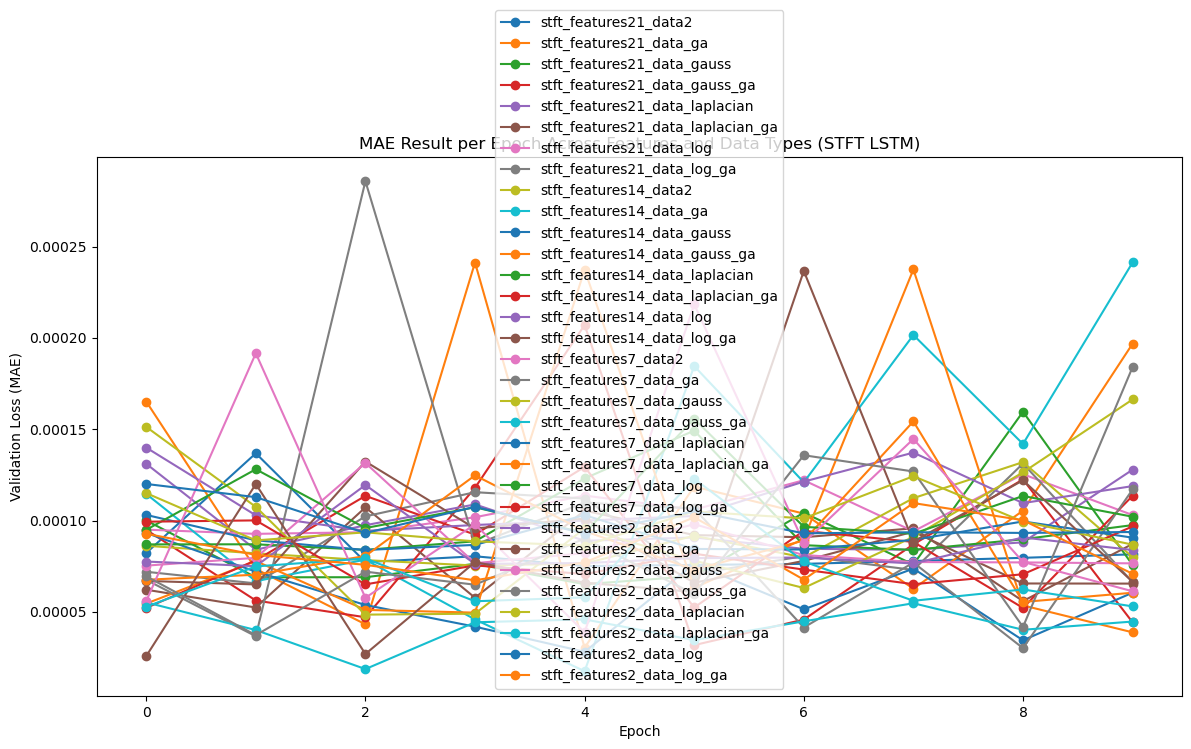

MAE Result : 7.505177927669138e-05, feature : stft_features21_data2
MAE Result : 3.043177093786653e-05, feature : stft_features21_data_ga
MAE Result : 6.513853440992534e-05, feature : stft_features21_data_gauss
MAE Result : 3.1783194572199136e-05, feature : stft_features21_data_gauss_ga
MAE Result : 8.400648948736489e-05, feature : stft_features21_data_laplacian
MAE Result : 5.238467929302715e-05, feature : stft_features21_data_laplacian_ga
MAE Result : 9.269903966924176e-05, feature : stft_features21_data_log
MAE Result : 6.557838787557557e-05, feature : stft_features21_data_log_ga
MAE Result : 7.535400800406933e-05, feature : stft_features14_data2
MAE Result : 1.750306364556309e-05, feature : stft_features14_data_ga
MAE Result : 2.8126021788921207e-05, feature : stft_features14_data_gauss
MAE Result : 3.87966247217264e-05, feature : stft_features14_data_gauss_ga
MAE Result : 8.389308641199023e-05, feature : stft_features14_data_laplacian
MAE Result : 5.215802957536653e-05, feature : 

In [ ]:
#21,14,7,2

def process_features(data, feature_type):
    if feature_type == 'features':
        return librosa.istft(data)

def create_sequences(data, seq_length):
    X, Y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        Y.append(data[i + seq_length])
    return np.array(X), np.array(Y)

def process(hdf5_file_path):
    with h5py.File(hdf5_file_path, 'r+') as hdf5_file:
      for data_name in tqdm(data_names, desc="Processing"):
          data = hdf5_file[data_name][:]
          t, y = process_features(data, 'features'), np.roll(data, -1)
          t, y = t[:-1], y[:-1]

          train_size = int(0.8 * len(t))
          train_data, test_data = t[:train_size], t[train_size:]
          train_labels, test_labels = y[:train_size], y[train_size:]

          X_train, y_train = create_sequences(train_data, 2)
          X_test, y_test = create_sequences(test_data, 2)

          X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
          X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

          model = Sequential([
              LSTM(16, input_shape=(2, 1)),
              Dense(1)
          ])
          model.compile(optimizer='adam', loss='mean_absolute_error')
          history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test), verbose=2)

          mse_results[f'{hdf5_file}_{data_name}'] = history.history['val_loss']
          print(f'Validation loss for {hdf5_file} {data_name}:', np.min(history.history['val_loss']))



hdf5_files = ['stft_features21.h5', 'stft_features14.h5', 'stft_features7.h5', 'stft_features2.h5']
data_names = ['data2', 'data_ga', 'data_gauss', 'data_gauss_ga', 'data_laplacian',
              'data_laplacian_ga', 'data_log', 'data_log_ga']

mse_results = {}
losses_over_epochs = {}

for file_path in hdf5_files:
    process(file_path)


plt.figure(figsize=(14, 7))
for key, losses in mse_results.items():
    plt.plot(losses, label=key, marker='o', linestyle='-')
plt.ylabel('Validation Loss (MAE)')
plt.xlabel('Epoch')
plt.title('MAE Result per Epoch Across Features and Data Types (STFT LSTM)')
plt.legend()
plt.show()

for key, losses in mse_results.items():
    los = np.min(losses)
    print(f'MAE Result : {los}, feature : {key}')


**MFCC + Chroma (21, 14, 7, 2)**

Processing chroma:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/10
1/1 - 3s - 3s/step - loss: 0.8853 - val_loss: 0.0683
Epoch 2/10
1/1 - 0s - 47ms/step - loss: 0.0737 - val_loss: 0.0668
Epoch 3/10
1/1 - 0s - 43ms/step - loss: 0.0722 - val_loss: 0.0652
Epoch 4/10
1/1 - 0s - 52ms/step - loss: 0.0708 - val_loss: 0.0637
Epoch 5/10
1/1 - 0s - 51ms/step - loss: 0.0693 - val_loss: 0.0621
Epoch 6/10
1/1 - 0s - 52ms/step - loss: 0.0679 - val_loss: 0.0606
Epoch 7/10
1/1 - 0s - 45ms/step - loss: 0.0665 - val_loss: 0.0591
Epoch 8/10
1/1 - 0s - 49ms/step - loss: 0.0651 - val_loss: 0.0577
Epoch 9/10
1/1 - 0s - 46ms/step - loss: 0.0638 - val_loss: 0.0562
Epoch 10/10
1/1 - 0s - 46ms/step - loss: 0.0624 - val_loss: 0.0548


Processing chroma:  12%|█▎        | 1/8 [00:03<00:25,  3.58s/it]

MAE Result for chroma data2: 0.0548066720366478
Epoch 1/10
1/1 - 1s - 562ms/step - loss: 0.7980 - val_loss: 0.0497
Epoch 2/10
1/1 - 0s - 32ms/step - loss: 0.0542 - val_loss: 0.0481
Epoch 3/10
1/1 - 0s - 31ms/step - loss: 0.0526 - val_loss: 0.0455
Epoch 4/10
1/1 - 0s - 34ms/step - loss: 0.0501 - val_loss: 0.0425
Epoch 5/10
1/1 - 0s - 39ms/step - loss: 0.0470 - val_loss: 0.0394
Epoch 6/10
1/1 - 0s - 32ms/step - loss: 0.0439 - val_loss: 0.0373
Epoch 7/10
1/1 - 0s - 33ms/step - loss: 0.0418 - val_loss: 0.0357
Epoch 8/10
1/1 - 0s - 31ms/step - loss: 0.0402 - val_loss: 0.0347
Epoch 9/10
1/1 - 0s - 32ms/step - loss: 0.0391 - val_loss: 0.0340
Epoch 10/10
1/1 - 0s - 37ms/step - loss: 0.0384 - val_loss: 0.0336


Processing chroma:  25%|██▌       | 2/8 [00:04<00:12,  2.01s/it]

MAE Result for chroma data_ga: 0.03361194580793381
Epoch 1/10
1/1 - 1s - 593ms/step - loss: 0.0139 - val_loss: 0.4185
Epoch 2/10
1/1 - 0s - 45ms/step - loss: 0.4704 - val_loss: 0.2350
Epoch 3/10
1/1 - 0s - 44ms/step - loss: 0.3600 - val_loss: 0.1186
Epoch 4/10
1/1 - 0s - 54ms/step - loss: 0.2938 - val_loss: 0.0898
Epoch 5/10
1/1 - 0s - 45ms/step - loss: 0.2723 - val_loss: 0.0902
Epoch 6/10
1/1 - 0s - 44ms/step - loss: 0.2543 - val_loss: 0.0919
Epoch 7/10
1/1 - 0s - 43ms/step - loss: 0.2322 - val_loss: 0.0930
Epoch 8/10
1/1 - 0s - 52ms/step - loss: 0.2097 - val_loss: 0.0929
Epoch 9/10
1/1 - 0s - 50ms/step - loss: 0.1911 - val_loss: 0.0917
Epoch 10/10
1/1 - 0s - 54ms/step - loss: 0.1773 - val_loss: 0.0897


Processing chroma:  38%|███▊      | 3/8 [00:05<00:07,  1.58s/it]

MAE Result for chroma data_gauss: 0.08965722471475601
Epoch 1/10
1/1 - 1s - 598ms/step - loss: 0.0095 - val_loss: 0.5580
Epoch 2/10
1/1 - 0s - 32ms/step - loss: 0.5786 - val_loss: 0.4152
Epoch 3/10
1/1 - 0s - 33ms/step - loss: 0.4192 - val_loss: 0.2377
Epoch 4/10
1/1 - 0s - 33ms/step - loss: 0.2289 - val_loss: 0.1137
Epoch 5/10
1/1 - 0s - 38ms/step - loss: 0.0990 - val_loss: 0.0552
Epoch 6/10
1/1 - 0s - 32ms/step - loss: 0.0406 - val_loss: 0.0342
Epoch 7/10
1/1 - 0s - 31ms/step - loss: 0.0216 - val_loss: 0.0258
Epoch 8/10
1/1 - 0s - 31ms/step - loss: 0.0153 - val_loss: 0.0219
Epoch 9/10
1/1 - 0s - 31ms/step - loss: 0.0131 - val_loss: 0.0193
Epoch 10/10
1/1 - 0s - 37ms/step - loss: 0.0123 - val_loss: 0.0175


Processing chroma:  50%|█████     | 4/8 [00:06<00:05,  1.33s/it]

MAE Result for chroma data_gauss_ga: 0.017523694783449173
Epoch 1/10
1/1 - 1s - 566ms/step - loss: 0.3390 - val_loss: 1.2682
Epoch 2/10
1/1 - 0s - 44ms/step - loss: 1.0569 - val_loss: 1.1186
Epoch 3/10
1/1 - 0s - 43ms/step - loss: 0.9225 - val_loss: 1.0860
Epoch 4/10
1/1 - 0s - 50ms/step - loss: 0.9047 - val_loss: 1.0722
Epoch 5/10
1/1 - 0s - 44ms/step - loss: 0.8981 - val_loss: 1.0552
Epoch 6/10
1/1 - 0s - 47ms/step - loss: 0.8838 - val_loss: 0.9995
Epoch 7/10
1/1 - 0s - 46ms/step - loss: 0.8307 - val_loss: 0.9674
Epoch 8/10
1/1 - 0s - 47ms/step - loss: 0.8109 - val_loss: 0.9301
Epoch 9/10
1/1 - 0s - 49ms/step - loss: 0.7825 - val_loss: 0.8939
Epoch 10/10
1/1 - 0s - 45ms/step - loss: 0.7483 - val_loss: 0.8728


Processing chroma:  62%|██████▎   | 5/8 [00:07<00:03,  1.22s/it]

MAE Result for chroma data_laplacian: 0.8728140592575073
Epoch 1/10
1/1 - 1s - 561ms/step - loss: 0.1379 - val_loss: 0.6909
Epoch 2/10
1/1 - 0s - 31ms/step - loss: 0.7120 - val_loss: 0.6959
Epoch 3/10
1/1 - 0s - 33ms/step - loss: 0.7170 - val_loss: 0.6958
Epoch 4/10
1/1 - 0s - 32ms/step - loss: 0.7169 - val_loss: 0.6946
Epoch 5/10
1/1 - 0s - 36ms/step - loss: 0.7157 - val_loss: 0.6931
Epoch 6/10
1/1 - 0s - 37ms/step - loss: 0.7141 - val_loss: 0.6914
Epoch 7/10
1/1 - 0s - 33ms/step - loss: 0.7124 - val_loss: 0.6896
Epoch 8/10
1/1 - 0s - 32ms/step - loss: 0.7107 - val_loss: 0.6878
Epoch 9/10
1/1 - 0s - 33ms/step - loss: 0.7088 - val_loss: 0.6859
Epoch 10/10
1/1 - 0s - 37ms/step - loss: 0.7069 - val_loss: 0.6840


Processing chroma:  75%|███████▌  | 6/8 [00:08<00:02,  1.11s/it]

MAE Result for chroma data_laplacian_ga: 0.6839900612831116
Epoch 1/10
1/1 - 1s - 581ms/step - loss: 0.6781 - val_loss: 0.9350
Epoch 2/10
1/1 - 0s - 43ms/step - loss: 0.9530 - val_loss: 0.9326
Epoch 3/10
1/1 - 0s - 43ms/step - loss: 0.9507 - val_loss: 0.9293
Epoch 4/10
1/1 - 0s - 50ms/step - loss: 0.9473 - val_loss: 0.9254
Epoch 5/10
1/1 - 0s - 46ms/step - loss: 0.9435 - val_loss: 0.9214
Epoch 6/10
1/1 - 0s - 48ms/step - loss: 0.9394 - val_loss: 0.9171
Epoch 7/10
1/1 - 0s - 46ms/step - loss: 0.9352 - val_loss: 0.9128
Epoch 8/10
1/1 - 0s - 45ms/step - loss: 0.9308 - val_loss: 0.9083
Epoch 9/10
1/1 - 0s - 51ms/step - loss: 0.9264 - val_loss: 0.9038
Epoch 10/10
1/1 - 0s - 46ms/step - loss: 0.9219 - val_loss: 0.8992


Processing chroma:  88%|████████▊ | 7/8 [00:09<00:01,  1.09s/it]

MAE Result for chroma data_log: 0.8992486596107483
Epoch 1/10
1/1 - 1s - 571ms/step - loss: 0.8424 - val_loss: 0.1585
Epoch 2/10
1/1 - 0s - 33ms/step - loss: 0.1809 - val_loss: 0.1579
Epoch 3/10
1/1 - 0s - 34ms/step - loss: 0.1803 - val_loss: 0.1567
Epoch 4/10
1/1 - 0s - 35ms/step - loss: 0.1792 - val_loss: 0.1553
Epoch 5/10
1/1 - 0s - 39ms/step - loss: 0.1779 - val_loss: 0.1538
Epoch 6/10
1/1 - 0s - 32ms/step - loss: 0.1764 - val_loss: 0.1522
Epoch 7/10
1/1 - 0s - 34ms/step - loss: 0.1748 - val_loss: 0.1505
Epoch 8/10
1/1 - 0s - 33ms/step - loss: 0.1732 - val_loss: 0.1488
Epoch 9/10
1/1 - 0s - 33ms/step - loss: 0.1715 - val_loss: 0.1471
Epoch 10/10
1/1 - 0s - 38ms/step - loss: 0.1699 - val_loss: 0.1454


Processing chroma: 100%|██████████| 8/8 [00:10<00:00,  1.30s/it]


MAE Result for chroma data_log_ga: 0.145359069108963


Processing mfcc:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/10
2/2 - 1s - 541ms/step - loss: 2.4206 - val_loss: 2.3520
Epoch 2/10
2/2 - 1s - 264ms/step - loss: 2.3828 - val_loss: 2.3512
Epoch 3/10
2/2 - 0s - 158ms/step - loss: 2.3790 - val_loss: 2.3501
Epoch 4/10
2/2 - 0s - 163ms/step - loss: 2.3789 - val_loss: 2.3502
Epoch 5/10
2/2 - 0s - 160ms/step - loss: 2.3798 - val_loss: 2.3474
Epoch 6/10
2/2 - 0s - 147ms/step - loss: 2.3782 - val_loss: 2.3398
Epoch 7/10
2/2 - 0s - 143ms/step - loss: 2.3635 - val_loss: 2.3382
Epoch 8/10
2/2 - 0s - 156ms/step - loss: 2.3653 - val_loss: 2.3380
Epoch 9/10
2/2 - 0s - 144ms/step - loss: 2.3632 - val_loss: 2.3376
Epoch 10/10
2/2 - 0s - 142ms/step - loss: 2.3648 - val_loss: 2.3373


Processing mfcc:  12%|█▎        | 1/8 [00:04<00:29,  4.26s/it]

MAE Result for mfcc data2: 2.3372910022735596
Epoch 1/10
2/2 - 1s - 350ms/step - loss: 1.9801 - val_loss: 1.6406
Epoch 2/10
2/2 - 0s - 70ms/step - loss: 1.6476 - val_loss: 1.6399
Epoch 3/10
2/2 - 0s - 69ms/step - loss: 1.6468 - val_loss: 1.6392
Epoch 4/10
2/2 - 0s - 73ms/step - loss: 1.6461 - val_loss: 1.6386
Epoch 5/10
2/2 - 0s - 78ms/step - loss: 1.6452 - val_loss: 1.6380
Epoch 6/10
2/2 - 0s - 71ms/step - loss: 1.6446 - val_loss: 1.6374
Epoch 7/10
2/2 - 0s - 70ms/step - loss: 1.6441 - val_loss: 1.6368
Epoch 8/10
2/2 - 0s - 71ms/step - loss: 1.6434 - val_loss: 1.6362
Epoch 9/10
2/2 - 0s - 70ms/step - loss: 1.6428 - val_loss: 1.6357
Epoch 10/10
2/2 - 0s - 71ms/step - loss: 1.6422 - val_loss: 1.6352


Processing mfcc:  25%|██▌       | 2/8 [00:06<00:18,  3.02s/it]

MAE Result for mfcc data_ga: 1.6351990699768066
Epoch 1/10
2/2 - 1s - 459ms/step - loss: 0.3093 - val_loss: 0.3666
Epoch 2/10
2/2 - 0s - 160ms/step - loss: 0.3442 - val_loss: 0.3107
Epoch 3/10
2/2 - 0s - 154ms/step - loss: 0.3085 - val_loss: 0.3027
Epoch 4/10
2/2 - 0s - 143ms/step - loss: 0.3021 - val_loss: 0.2947
Epoch 5/10
2/2 - 0s - 188ms/step - loss: 0.2940 - val_loss: 0.2875
Epoch 6/10
2/2 - 0s - 171ms/step - loss: 0.2856 - val_loss: 0.2729
Epoch 7/10
2/2 - 0s - 137ms/step - loss: 0.2784 - val_loss: 0.2771
Epoch 8/10
2/2 - 0s - 158ms/step - loss: 0.2783 - val_loss: 0.2751
Epoch 9/10
2/2 - 0s - 145ms/step - loss: 0.2725 - val_loss: 0.2550
Epoch 10/10
2/2 - 0s - 145ms/step - loss: 0.2516 - val_loss: 0.2469


Processing mfcc:  38%|███▊      | 3/8 [00:10<00:17,  3.43s/it]

MAE Result for mfcc data_gauss: 0.24687045812606812
Epoch 1/10
2/2 - 1s - 348ms/step - loss: 0.1557 - val_loss: 0.1221
Epoch 2/10
2/2 - 0s - 68ms/step - loss: 0.1234 - val_loss: 0.1197
Epoch 3/10
2/2 - 0s - 72ms/step - loss: 0.1215 - val_loss: 0.1181
Epoch 4/10
2/2 - 0s - 75ms/step - loss: 0.1199 - val_loss: 0.1165
Epoch 5/10
2/2 - 0s - 90ms/step - loss: 0.1183 - val_loss: 0.1149
Epoch 6/10
2/2 - 0s - 89ms/step - loss: 0.1168 - val_loss: 0.1134
Epoch 7/10
2/2 - 0s - 80ms/step - loss: 0.1152 - val_loss: 0.1119
Epoch 8/10
2/2 - 0s - 79ms/step - loss: 0.1137 - val_loss: 0.1105
Epoch 9/10
2/2 - 0s - 72ms/step - loss: 0.1123 - val_loss: 0.1091
Epoch 10/10
2/2 - 0s - 70ms/step - loss: 0.1109 - val_loss: 0.1078


Processing mfcc:  50%|█████     | 4/8 [00:12<00:11,  2.95s/it]

MAE Result for mfcc data_gauss_ga: 0.10782674700021744
Epoch 1/10
2/2 - 1s - 496ms/step - loss: 4.2488 - val_loss: 4.2559
Epoch 2/10
2/2 - 1s - 305ms/step - loss: 4.3010 - val_loss: 4.2521
Epoch 3/10
2/2 - 0s - 155ms/step - loss: 4.2970 - val_loss: 4.2511
Epoch 4/10
2/2 - 0s - 158ms/step - loss: 4.2965 - val_loss: 4.2507
Epoch 5/10
2/2 - 0s - 144ms/step - loss: 4.2957 - val_loss: 4.2544
Epoch 6/10
2/2 - 0s - 139ms/step - loss: 4.2993 - val_loss: 4.2617
Epoch 7/10
2/2 - 0s - 141ms/step - loss: 4.3066 - val_loss: 4.2607
Epoch 8/10
2/2 - 0s - 141ms/step - loss: 4.3056 - val_loss: 4.2596
Epoch 9/10
2/2 - 0s - 142ms/step - loss: 4.3046 - val_loss: 4.2586
Epoch 10/10
2/2 - 0s - 146ms/step - loss: 4.3036 - val_loss: 4.2576


Processing mfcc:  62%|██████▎   | 5/8 [00:16<00:10,  3.38s/it]

MAE Result for mfcc data_laplacian: 4.250717639923096
Epoch 1/10
2/2 - 1s - 339ms/step - loss: 3.9530 - val_loss: 3.7234
Epoch 2/10
2/2 - 0s - 69ms/step - loss: 3.7587 - val_loss: 3.7209
Epoch 3/10
2/2 - 0s - 70ms/step - loss: 3.7561 - val_loss: 3.7184
Epoch 4/10
2/2 - 0s - 69ms/step - loss: 3.7536 - val_loss: 3.7160
Epoch 5/10
2/2 - 0s - 71ms/step - loss: 3.7510 - val_loss: 3.7135
Epoch 6/10
2/2 - 0s - 70ms/step - loss: 3.7486 - val_loss: 3.7110
Epoch 7/10
2/2 - 0s - 70ms/step - loss: 3.7460 - val_loss: 3.7086
Epoch 8/10
2/2 - 0s - 70ms/step - loss: 3.7435 - val_loss: 3.7061
Epoch 9/10
2/2 - 0s - 69ms/step - loss: 3.7409 - val_loss: 3.7037
Epoch 10/10
2/2 - 0s - 69ms/step - loss: 3.7385 - val_loss: 3.7012


Processing mfcc:  75%|███████▌  | 6/8 [00:18<00:05,  2.94s/it]

MAE Result for mfcc data_laplacian_ga: 3.7012429237365723
Epoch 1/10
2/2 - 2s - 855ms/step - loss: 6.3604 - val_loss: 6.3797
Epoch 2/10
2/2 - 0s - 193ms/step - loss: 6.4410 - val_loss: 6.2992
Epoch 3/10
2/2 - 0s - 184ms/step - loss: 6.3699 - val_loss: 6.2982
Epoch 4/10
2/2 - 0s - 164ms/step - loss: 6.3654 - val_loss: 6.2906
Epoch 5/10
2/2 - 0s - 155ms/step - loss: 6.3579 - val_loss: 6.2935
Epoch 6/10
2/2 - 0s - 148ms/step - loss: 6.3607 - val_loss: 6.2945
Epoch 7/10
2/2 - 0s - 149ms/step - loss: 6.3617 - val_loss: 6.2894
Epoch 8/10
2/2 - 0s - 156ms/step - loss: 6.3566 - val_loss: 6.2885
Epoch 9/10
2/2 - 0s - 152ms/step - loss: 6.3556 - val_loss: 6.2875
Epoch 10/10
2/2 - 0s - 147ms/step - loss: 6.3548 - val_loss: 6.2866


Processing mfcc:  88%|████████▊ | 7/8 [00:23<00:03,  3.55s/it]

MAE Result for mfcc data_log: 6.286609649658203
Epoch 1/10
2/2 - 1s - 359ms/step - loss: 6.6469 - val_loss: 6.2180
Epoch 2/10
2/2 - 0s - 70ms/step - loss: 6.2878 - val_loss: 6.2145
Epoch 3/10
2/2 - 0s - 72ms/step - loss: 6.2842 - val_loss: 6.2110
Epoch 4/10
2/2 - 0s - 70ms/step - loss: 6.2806 - val_loss: 6.2075
Epoch 5/10
2/2 - 0s - 72ms/step - loss: 6.2771 - val_loss: 6.2040
Epoch 6/10
2/2 - 0s - 72ms/step - loss: 6.2735 - val_loss: 6.2004
Epoch 7/10
2/2 - 0s - 71ms/step - loss: 6.2700 - val_loss: 6.1969
Epoch 8/10
2/2 - 0s - 72ms/step - loss: 6.2664 - val_loss: 6.1934
Epoch 9/10
2/2 - 0s - 71ms/step - loss: 6.2629 - val_loss: 6.1899
Epoch 10/10
2/2 - 0s - 69ms/step - loss: 6.2593 - val_loss: 6.1865


Processing mfcc: 100%|██████████| 8/8 [00:25<00:00,  3.22s/it]

MAE Result for mfcc data_log_ga: 6.186460971832275


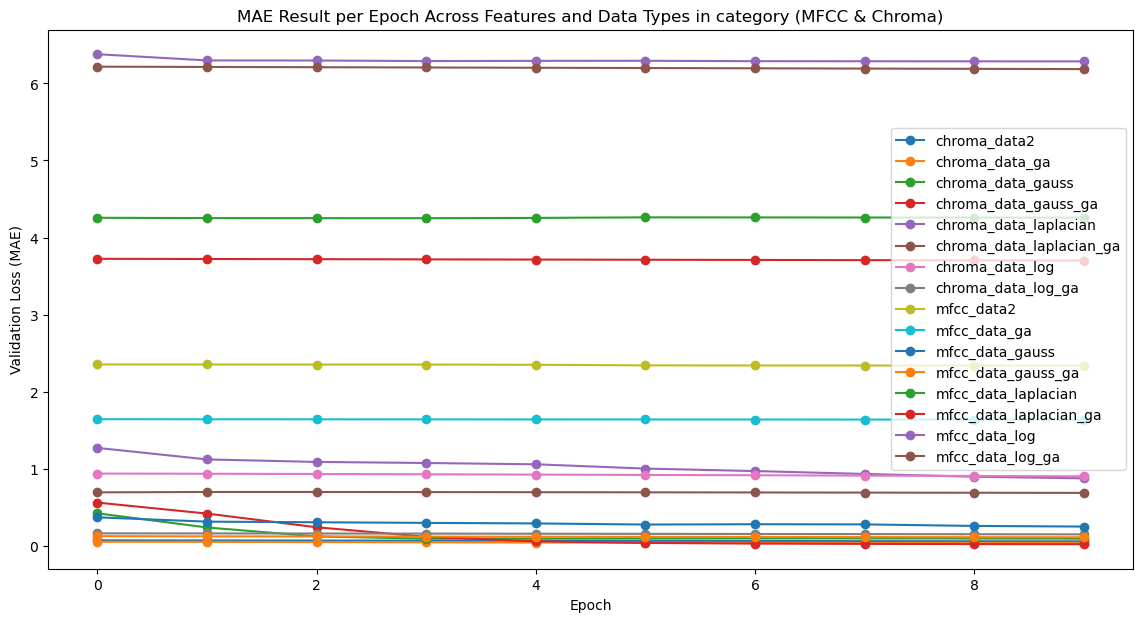

MAE Result : 0.0548066720366478, feature : chroma_data2
MAE Result : 0.03361194580793381, feature : chroma_data_ga
MAE Result : 0.08965722471475601, feature : chroma_data_gauss
MAE Result : 0.017523694783449173, feature : chroma_data_gauss_ga
MAE Result : 0.8728140592575073, feature : chroma_data_laplacian
MAE Result : 0.6839900612831116, feature : chroma_data_laplacian_ga
MAE Result : 0.8992486596107483, feature : chroma_data_log
MAE Result : 0.145359069108963, feature : chroma_data_log_ga
MAE Result : 2.3372910022735596, feature : mfcc_data2
MAE Result : 1.6351990699768066, feature : mfcc_data_ga
MAE Result : 0.24687045812606812, feature : mfcc_data_gauss
MAE Result : 0.10782674700021744, feature : mfcc_data_gauss_ga
MAE Result : 4.250717639923096, feature : mfcc_data_laplacian
MAE Result : 3.7012429237365723, feature : mfcc_data_laplacian_ga
MAE Result : 6.286609649658203, feature : mfcc_data_log
MAE Result : 6.186460971832275, feature : mfcc_data_log_ga


In [ ]:
#21

def process_features(data, feature_type):
    if feature_type == 'stft':
        return librosa.istft(data)
    elif feature_type in ['mfcc', 'chroma']:
        if data.ndim == 2:
            return data.reshape(data.shape[0], data.shape[1], 1)
        else:
            return data
    else:
        raise ValueError("Unsupported feature type")

def create_sequences(data, seq_length):
    X, Y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        Y.append(data[i + seq_length])
    return np.array(X), np.array(Y)

feature_types = ['chroma', 'mfcc']
data_names = ['data2', 'data_ga', 'data_gauss', 'data_gauss_ga', 'data_laplacian',
              'data_laplacian_ga', 'data_log', 'data_log_ga']

mse_results = {}

for feature_type in feature_types:
    hdf5_file_path = f'cat_{feature_type}_features21.h5'
    with h5py.File(hdf5_file_path, 'r+') as hdf5_file:
        for data_name in tqdm(data_names, desc=f"Processing {feature_type}"):
            data = hdf5_file[data_name][:]

            if data.ndim == 2 and data.shape[0] > 0:
                data = np.expand_dims(data, axis=-1)

                t, y = process_features(data, feature_type), np.roll(data, -1, axis=0)
                t, y = t[:-1], y[:-1]  # Safe trimming

                if len(t) > 10:  # Only process if enough data exists to form sequences
                    X_train, y_train = create_sequences(t, 2)
                    X_test, y_test = create_sequences(y, 2)

                    # Ensure correct shape for LSTM input
                    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], -1))
                    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], -1))
                    y_train = y_train.reshape((y_train.shape[0], -1))
                    y_test = y_test.reshape((y_test.shape[0], -1))

                    if X_train.size > 0 and X_test.size > 0:  # Ensure non-empty
                        model = Sequential([
                            LSTM(16, input_shape=(X_train.shape[1], X_train.shape[2])),
                            Dense(1)
                        ])
                        model.compile(optimizer='adam', loss='mean_absolute_error')
                        history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test), verbose=2)

                        mse_results[f'{feature_type}_{data_name}'] = history.history['val_loss']
                        print(f'MAE Result for {feature_type} {data_name}:', np.min(history.history['val_loss']))

plt.figure(figsize=(14, 7))
for key, losses in mse_results.items():
    plt.plot(losses, label=key, marker='o', linestyle='-')
plt.ylabel('Validation Loss (MAE)')
plt.xlabel('Epoch')
plt.title('MAE Result per Epoch Across Features and Data Types in category (MFCC & Chroma)')
plt.legend()
plt.show()

for key, losses in mse_results.items():
    los = np.min(losses)
    print(f'MAE Result : {los}, feature : {key}')


Processing chroma:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/10
1/1 - 1s - 656ms/step - loss: 1.5131 - val_loss: 0.9590
Epoch 2/10
1/1 - 0s - 116ms/step - loss: 0.9544 - val_loss: 0.9580
Epoch 3/10
1/1 - 0s - 125ms/step - loss: 0.9534 - val_loss: 0.9570
Epoch 4/10
1/1 - 0s - 123ms/step - loss: 0.9524 - val_loss: 0.9560
Epoch 5/10
1/1 - 0s - 122ms/step - loss: 0.9514 - val_loss: 0.9550
Epoch 6/10
1/1 - 0s - 121ms/step - loss: 0.9504 - val_loss: 0.9540
Epoch 7/10
1/1 - 0s - 130ms/step - loss: 0.9494 - val_loss: 0.9530
Epoch 8/10
1/1 - 0s - 133ms/step - loss: 0.9484 - val_loss: 0.9520
Epoch 9/10
1/1 - 0s - 130ms/step - loss: 0.9474 - val_loss: 0.9510
Epoch 10/10
1/1 - 0s - 131ms/step - loss: 0.9464 - val_loss: 0.9500


Processing chroma:  12%|█▎        | 1/8 [00:01<00:13,  1.90s/it]

MAE Result for chroma data2: 0.950019359588623
Epoch 1/10
1/1 - 1s - 629ms/step - loss: 1.4727 - val_loss: 0.3948
Epoch 2/10
1/1 - 0s - 65ms/step - loss: 0.3907 - val_loss: 0.3930
Epoch 3/10
1/1 - 0s - 70ms/step - loss: 0.3889 - val_loss: 0.3912
Epoch 4/10
1/1 - 0s - 70ms/step - loss: 0.3871 - val_loss: 0.3893
Epoch 5/10
1/1 - 0s - 74ms/step - loss: 0.3852 - val_loss: 0.3873
Epoch 6/10
1/1 - 0s - 71ms/step - loss: 0.3833 - val_loss: 0.3854
Epoch 7/10
1/1 - 0s - 69ms/step - loss: 0.3813 - val_loss: 0.3834
Epoch 8/10
1/1 - 0s - 73ms/step - loss: 0.3794 - val_loss: 0.3814
Epoch 9/10
1/1 - 0s - 69ms/step - loss: 0.3774 - val_loss: 0.3794
Epoch 10/10
1/1 - 0s - 68ms/step - loss: 0.3755 - val_loss: 0.3775


Processing chroma:  25%|██▌       | 2/8 [00:03<00:09,  1.56s/it]

MAE Result for chroma data_ga: 0.3774584233760834
Epoch 1/10
1/1 - 1s - 657ms/step - loss: 0.0192 - val_loss: 0.4860
Epoch 2/10
1/1 - 0s - 115ms/step - loss: 0.7205 - val_loss: 0.3817
Epoch 3/10
1/1 - 0s - 123ms/step - loss: 0.5831 - val_loss: 0.1294
Epoch 4/10
1/1 - 0s - 122ms/step - loss: 0.3163 - val_loss: 0.0968
Epoch 5/10
1/1 - 0s - 119ms/step - loss: 0.2433 - val_loss: 0.1032
Epoch 6/10
1/1 - 0s - 119ms/step - loss: 0.1237 - val_loss: 0.1054
Epoch 7/10
1/1 - 0s - 120ms/step - loss: 0.0363 - val_loss: 0.1081
Epoch 8/10
1/1 - 0s - 118ms/step - loss: 0.0212 - val_loss: 0.1138
Epoch 9/10
1/1 - 0s - 118ms/step - loss: 0.0227 - val_loss: 0.1168
Epoch 10/10
1/1 - 0s - 122ms/step - loss: 0.0225 - val_loss: 0.1170


Processing chroma:  38%|███▊      | 3/8 [00:05<00:08,  1.68s/it]

MAE Result for chroma data_gauss: 0.096759133040905
Epoch 1/10
1/1 - 1s - 611ms/step - loss: 0.0099 - val_loss: 0.2018
Epoch 2/10
1/1 - 0s - 68ms/step - loss: 0.1737 - val_loss: 0.0658
Epoch 3/10
1/1 - 0s - 72ms/step - loss: 0.0400 - val_loss: 0.0340
Epoch 4/10
1/1 - 0s - 69ms/step - loss: 0.0177 - val_loss: 0.0220
Epoch 5/10
1/1 - 0s - 74ms/step - loss: 0.0116 - val_loss: 0.0155
Epoch 6/10
1/1 - 0s - 68ms/step - loss: 0.0088 - val_loss: 0.0116
Epoch 7/10
1/1 - 0s - 68ms/step - loss: 0.0073 - val_loss: 0.0093
Epoch 8/10
1/1 - 0s - 75ms/step - loss: 0.0066 - val_loss: 0.0079
Epoch 9/10
1/1 - 0s - 73ms/step - loss: 0.0062 - val_loss: 0.0070
Epoch 10/10
1/1 - 0s - 70ms/step - loss: 0.0061 - val_loss: 0.0066


Processing chroma:  50%|█████     | 4/8 [00:06<00:06,  1.54s/it]

MAE Result for chroma data_gauss_ga: 0.006558049935847521
Epoch 1/10
1/1 - 1s - 651ms/step - loss: 0.1430 - val_loss: 0.6383
Epoch 2/10
1/1 - 0s - 113ms/step - loss: 0.4324 - val_loss: 0.5105
Epoch 3/10
1/1 - 0s - 122ms/step - loss: 0.3072 - val_loss: 0.5026
Epoch 4/10
1/1 - 0s - 119ms/step - loss: 0.3005 - val_loss: 0.5009
Epoch 5/10
1/1 - 0s - 119ms/step - loss: 0.2992 - val_loss: 0.4992
Epoch 6/10
1/1 - 0s - 120ms/step - loss: 0.2979 - val_loss: 0.4974
Epoch 7/10
1/1 - 0s - 118ms/step - loss: 0.2966 - val_loss: 0.4957
Epoch 8/10
1/1 - 0s - 121ms/step - loss: 0.2953 - val_loss: 0.4940
Epoch 9/10
1/1 - 0s - 121ms/step - loss: 0.2940 - val_loss: 0.4923
Epoch 10/10
1/1 - 0s - 121ms/step - loss: 0.2927 - val_loss: 0.4906


Processing chroma:  62%|██████▎   | 5/8 [00:08<00:04,  1.64s/it]

MAE Result for chroma data_laplacian: 0.4905611574649811
Epoch 1/10
1/1 - 1s - 605ms/step - loss: 0.1192 - val_loss: 0.4294
Epoch 2/10
1/1 - 0s - 67ms/step - loss: 0.4506 - val_loss: 0.2808
Epoch 3/10
1/1 - 0s - 68ms/step - loss: 0.3021 - val_loss: 0.2788
Epoch 4/10
1/1 - 0s - 67ms/step - loss: 0.3001 - val_loss: 0.2766
Epoch 5/10
1/1 - 0s - 70ms/step - loss: 0.2978 - val_loss: 0.2741
Epoch 6/10
1/1 - 0s - 67ms/step - loss: 0.2954 - val_loss: 0.2716
Epoch 7/10
1/1 - 0s - 70ms/step - loss: 0.2929 - val_loss: 0.2691
Epoch 8/10
1/1 - 0s - 67ms/step - loss: 0.2903 - val_loss: 0.2664
Epoch 9/10
1/1 - 0s - 74ms/step - loss: 0.2877 - val_loss: 0.2638
Epoch 10/10
1/1 - 0s - 80ms/step - loss: 0.2851 - val_loss: 0.2611


Processing chroma:  75%|███████▌  | 6/8 [00:09<00:03,  1.52s/it]

MAE Result for chroma data_laplacian_ga: 0.2610979676246643
Epoch 1/10
1/1 - 1s - 650ms/step - loss: 1.1259 - val_loss: 0.2016
Epoch 2/10
1/1 - 0s - 125ms/step - loss: 0.2303 - val_loss: 0.2005
Epoch 3/10
1/1 - 0s - 118ms/step - loss: 0.2292 - val_loss: 0.1989
Epoch 4/10
1/1 - 0s - 120ms/step - loss: 0.2277 - val_loss: 0.1970
Epoch 5/10
1/1 - 0s - 120ms/step - loss: 0.2259 - val_loss: 0.1951
Epoch 6/10
1/1 - 0s - 120ms/step - loss: 0.2240 - val_loss: 0.1930
Epoch 7/10
1/1 - 0s - 119ms/step - loss: 0.2220 - val_loss: 0.1908
Epoch 8/10
1/1 - 0s - 120ms/step - loss: 0.2200 - val_loss: 0.1887
Epoch 9/10
1/1 - 0s - 118ms/step - loss: 0.2179 - val_loss: 0.1865
Epoch 10/10
1/1 - 0s - 118ms/step - loss: 0.2158 - val_loss: 0.1843


Processing chroma:  88%|████████▊ | 7/8 [00:11<00:01,  1.62s/it]

MAE Result for chroma data_log: 0.18427762389183044
Epoch 1/10
1/1 - 1s - 595ms/step - loss: 1.0677 - val_loss: 0.2168
Epoch 2/10
1/1 - 0s - 67ms/step - loss: 0.2308 - val_loss: 0.2145
Epoch 3/10
1/1 - 0s - 71ms/step - loss: 0.2286 - val_loss: 0.2119
Epoch 4/10
1/1 - 0s - 70ms/step - loss: 0.2263 - val_loss: 0.2093
Epoch 5/10
1/1 - 0s - 72ms/step - loss: 0.2239 - val_loss: 0.2067
Epoch 6/10
1/1 - 0s - 68ms/step - loss: 0.2215 - val_loss: 0.2040
Epoch 7/10
1/1 - 0s - 70ms/step - loss: 0.2190 - val_loss: 0.2014
Epoch 8/10
1/1 - 0s - 80ms/step - loss: 0.2166 - val_loss: 0.1987
Epoch 9/10
1/1 - 0s - 81ms/step - loss: 0.2142 - val_loss: 0.1961
Epoch 10/10
1/1 - 0s - 72ms/step - loss: 0.2118 - val_loss: 0.1935


Processing chroma: 100%|██████████| 8/8 [00:12<00:00,  1.58s/it]


MAE Result for chroma data_log_ga: 0.19352684915065765


Processing mfcc:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/10
2/2 - 11s - 6s/step - loss: 2.5660 - val_loss: 2.5314
Epoch 2/10
2/2 - 8s - 4s/step - loss: 2.5545 - val_loss: 2.5299
Epoch 3/10
2/2 - 5s - 2s/step - loss: 2.5532 - val_loss: 2.5297
Epoch 4/10
2/2 - 5s - 2s/step - loss: 2.5529 - val_loss: 2.5292
Epoch 5/10
2/2 - 5s - 2s/step - loss: 2.5525 - val_loss: 2.5287
Epoch 6/10
2/2 - 5s - 2s/step - loss: 2.5520 - val_loss: 2.5282
Epoch 7/10
2/2 - 5s - 2s/step - loss: 2.5515 - val_loss: 2.5277
Epoch 8/10
2/2 - 4s - 2s/step - loss: 2.5510 - val_loss: 2.5272
Epoch 9/10
2/2 - 4s - 2s/step - loss: 2.5506 - val_loss: 2.5267
Epoch 10/10
2/2 - 5s - 2s/step - loss: 2.5501 - val_loss: 2.5262
MAE Result for mfcc data2: 2.526183843612671


Processing mfcc:  12%|█▎        | 1/8 [00:58<06:50, 58.61s/it]

Epoch 1/10
2/2 - 3s - 1s/step - loss: 1.9540 - val_loss: 1.6897
Epoch 2/10
2/2 - 2s - 905ms/step - loss: 1.6880 - val_loss: 1.6894
Epoch 3/10
2/2 - 2s - 1s/step - loss: 1.6876 - val_loss: 1.6889
Epoch 4/10
2/2 - 2s - 801ms/step - loss: 1.6873 - val_loss: 1.6884
Epoch 5/10
2/2 - 2s - 788ms/step - loss: 1.6868 - val_loss: 1.6878
Epoch 6/10
2/2 - 2s - 899ms/step - loss: 1.6863 - val_loss: 1.6872
Epoch 7/10
2/2 - 1s - 724ms/step - loss: 1.6858 - val_loss: 1.6866
Epoch 8/10
2/2 - 1s - 712ms/step - loss: 1.6852 - val_loss: 1.6860
Epoch 9/10
2/2 - 1s - 571ms/step - loss: 1.6846 - val_loss: 1.6854
Epoch 10/10
2/2 - 2s - 801ms/step - loss: 1.6843 - val_loss: 1.6848


Processing mfcc:  25%|██▌       | 2/8 [01:16<03:28, 34.70s/it]

MAE Result for mfcc data_ga: 1.684768795967102
Epoch 1/10
2/2 - 10s - 5s/step - loss: 0.3065 - val_loss: 0.4862
Epoch 2/10
2/2 - 7s - 4s/step - loss: 0.4871 - val_loss: 0.4830
Epoch 3/10
2/2 - 4s - 2s/step - loss: 0.4820 - val_loss: 0.4661
Epoch 4/10
2/2 - 7s - 3s/step - loss: 0.4594 - val_loss: 0.4204
Epoch 5/10
2/2 - 6s - 3s/step - loss: 0.4142 - val_loss: 0.3693
Epoch 6/10
2/2 - 6s - 3s/step - loss: 0.3613 - val_loss: 0.3391
Epoch 7/10
2/2 - 5s - 3s/step - loss: 0.3383 - val_loss: 0.3251
Epoch 8/10
2/2 - 5s - 3s/step - loss: 0.3256 - val_loss: 0.3192
Epoch 9/10
2/2 - 7s - 3s/step - loss: 0.3182 - val_loss: 0.3040
Epoch 10/10
2/2 - 6s - 3s/step - loss: 0.3018 - val_loss: 0.2874


Processing mfcc:  38%|███▊      | 3/8 [02:22<04:05, 49.11s/it]

MAE Result for mfcc data_gauss: 0.2873747944831848
Epoch 1/10
2/2 - 3s - 1s/step - loss: 0.1641 - val_loss: 0.1252
Epoch 2/10
2/2 - 2s - 896ms/step - loss: 0.1273 - val_loss: 0.1241
Epoch 3/10
2/2 - 2s - 881ms/step - loss: 0.1260 - val_loss: 0.1226
Epoch 4/10
2/2 - 2s - 1s/step - loss: 0.1245 - val_loss: 0.1210
Epoch 5/10
2/2 - 1s - 630ms/step - loss: 0.1229 - val_loss: 0.1194
Epoch 6/10
2/2 - 1s - 499ms/step - loss: 0.1213 - val_loss: 0.1179
Epoch 7/10
2/2 - 2s - 842ms/step - loss: 0.1198 - val_loss: 0.1164
Epoch 8/10
2/2 - 2s - 781ms/step - loss: 0.1183 - val_loss: 0.1149
Epoch 9/10
2/2 - 1s - 707ms/step - loss: 0.1168 - val_loss: 0.1135
Epoch 10/10
2/2 - 2s - 781ms/step - loss: 0.1154 - val_loss: 0.1122


Processing mfcc:  50%|█████     | 4/8 [02:40<02:26, 36.68s/it]

MAE Result for mfcc data_gauss_ga: 0.11222904175519943
Epoch 1/10
2/2 - 15s - 7s/step - loss: 4.9409 - val_loss: 5.1661
Epoch 2/10
2/2 - 10s - 5s/step - loss: 5.2015 - val_loss: 5.1065
Epoch 3/10
2/2 - 6s - 3s/step - loss: 5.1276 - val_loss: 5.0437
Epoch 4/10
2/2 - 5s - 3s/step - loss: 5.0610 - val_loss: 4.9642
Epoch 5/10
2/2 - 4s - 2s/step - loss: 4.9848 - val_loss: 4.9300
Epoch 6/10
2/2 - 3s - 2s/step - loss: 4.9776 - val_loss: 4.9233
Epoch 7/10
2/2 - 4s - 2s/step - loss: 4.9592 - val_loss: 4.9103
Epoch 8/10
2/2 - 4s - 2s/step - loss: 4.9580 - val_loss: 4.9091
Epoch 9/10
2/2 - 5s - 2s/step - loss: 4.9567 - val_loss: 4.9078
Epoch 10/10
2/2 - 4s - 2s/step - loss: 4.9554 - val_loss: 4.9066


Processing mfcc:  62%|██████▎   | 5/8 [03:44<02:19, 46.52s/it]

MAE Result for mfcc data_laplacian: 4.9065656661987305
Epoch 1/10
2/2 - 2s - 1s/step - loss: 3.8121 - val_loss: 3.1115
Epoch 2/10
2/2 - 1s - 723ms/step - loss: 3.1078 - val_loss: 3.0894
Epoch 3/10
2/2 - 1s - 747ms/step - loss: 3.0952 - val_loss: 3.1027
Epoch 4/10
2/2 - 1s - 699ms/step - loss: 3.1089 - val_loss: 3.1072
Epoch 5/10
2/2 - 1s - 703ms/step - loss: 3.1123 - val_loss: 3.1027
Epoch 6/10
2/2 - 1s - 555ms/step - loss: 3.1092 - val_loss: 3.1024
Epoch 7/10
2/2 - 1s - 710ms/step - loss: 3.1090 - val_loss: 3.1020
Epoch 8/10
2/2 - 2s - 793ms/step - loss: 3.1084 - val_loss: 3.1017
Epoch 9/10
2/2 - 2s - 843ms/step - loss: 3.1081 - val_loss: 3.1013
Epoch 10/10
2/2 - 2s - 837ms/step - loss: 3.1069 - val_loss: 3.0968


Processing mfcc:  75%|███████▌  | 6/8 [04:00<01:12, 36.23s/it]

MAE Result for mfcc data_laplacian_ga: 3.089409828186035
Epoch 1/10
2/2 - 14s - 7s/step - loss: 6.6659 - val_loss: 6.4430
Epoch 2/10
2/2 - 7s - 3s/step - loss: 6.5203 - val_loss: 6.4757
Epoch 3/10
2/2 - 4s - 2s/step - loss: 6.5438 - val_loss: 6.4770
Epoch 4/10
2/2 - 4s - 2s/step - loss: 6.5479 - val_loss: 6.4806
Epoch 5/10
2/2 - 4s - 2s/step - loss: 6.5487 - val_loss: 6.4857
Epoch 6/10
2/2 - 4s - 2s/step - loss: 6.5538 - val_loss: 6.4895
Epoch 7/10
2/2 - 4s - 2s/step - loss: 6.5556 - val_loss: 6.4900
Epoch 8/10
2/2 - 4s - 2s/step - loss: 6.5578 - val_loss: 6.4733
Epoch 9/10
2/2 - 4s - 2s/step - loss: 6.5388 - val_loss: 6.4559
Epoch 10/10
2/2 - 4s - 2s/step - loss: 6.5151 - val_loss: 6.4436


Processing mfcc:  88%|████████▊ | 7/8 [04:58<00:43, 43.16s/it]

MAE Result for mfcc data_log: 6.4430060386657715
Epoch 1/10
2/2 - 3s - 1s/step - loss: 6.0929 - val_loss: 5.7064
Epoch 2/10
2/2 - 2s - 1s/step - loss: 5.7147 - val_loss: 5.6298
Epoch 3/10
2/2 - 1s - 697ms/step - loss: 5.6829 - val_loss: 5.6249
Epoch 4/10
2/2 - 2s - 895ms/step - loss: 5.6777 - val_loss: 5.6199
Epoch 5/10
2/2 - 2s - 836ms/step - loss: 5.6725 - val_loss: 5.6148
Epoch 6/10
2/2 - 2s - 962ms/step - loss: 5.6673 - val_loss: 5.6098
Epoch 7/10
2/2 - 2s - 776ms/step - loss: 5.6622 - val_loss: 5.6048
Epoch 8/10
2/2 - 2s - 795ms/step - loss: 5.6572 - val_loss: 5.5998
Epoch 9/10
2/2 - 1s - 514ms/step - loss: 5.6520 - val_loss: 5.5948
Epoch 10/10
2/2 - 1s - 321ms/step - loss: 5.6467 - val_loss: 5.5898


Processing mfcc: 100%|██████████| 8/8 [05:14<00:00, 39.36s/it]

MAE Result for mfcc data_log_ga: 5.58981990814209


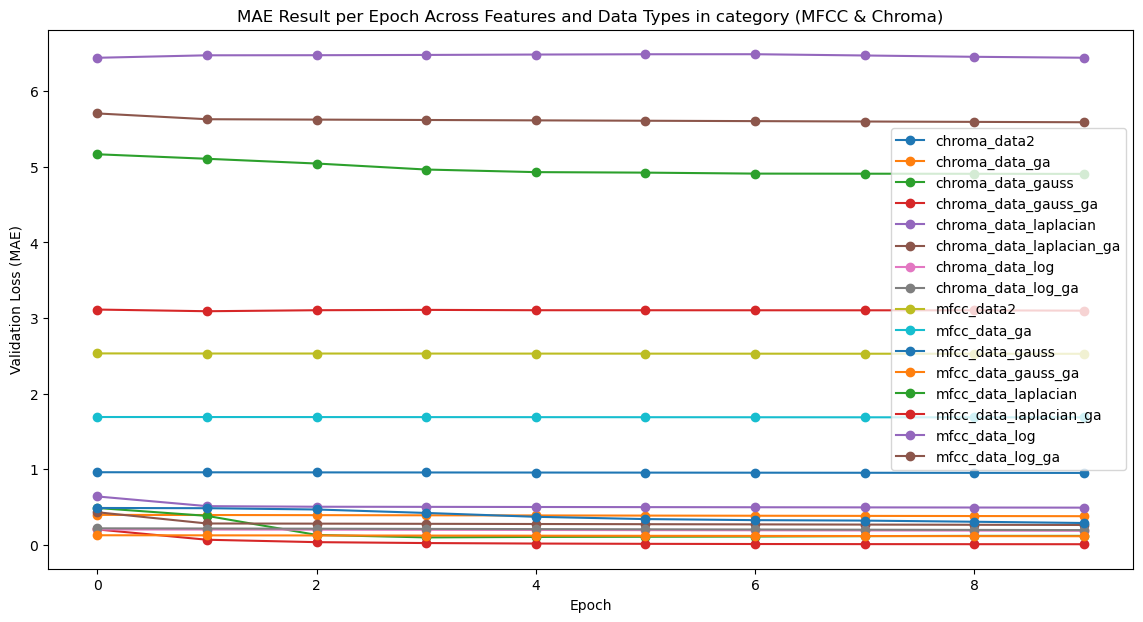

MAE Result : 0.950019359588623, feature : chroma_data2
MAE Result : 0.3774584233760834, feature : chroma_data_ga
MAE Result : 0.096759133040905, feature : chroma_data_gauss
MAE Result : 0.006558049935847521, feature : chroma_data_gauss_ga
MAE Result : 0.4905611574649811, feature : chroma_data_laplacian
MAE Result : 0.2610979676246643, feature : chroma_data_laplacian_ga
MAE Result : 0.18427762389183044, feature : chroma_data_log
MAE Result : 0.19352684915065765, feature : chroma_data_log_ga
MAE Result : 2.526183843612671, feature : mfcc_data2
MAE Result : 1.684768795967102, feature : mfcc_data_ga
MAE Result : 0.2873747944831848, feature : mfcc_data_gauss
MAE Result : 0.11222904175519943, feature : mfcc_data_gauss_ga
MAE Result : 4.9065656661987305, feature : mfcc_data_laplacian
MAE Result : 3.089409828186035, feature : mfcc_data_laplacian_ga
MAE Result : 6.4430060386657715, feature : mfcc_data_log
MAE Result : 5.58981990814209, feature : mfcc_data_log_ga


In [ ]:
#14
from keras.models import Sequential
from keras.layers import LSTM, Dense

def process_features(data, feature_type):
    if feature_type == 'stft':
        return librosa.istft(data)
    elif feature_type in ['mfcc', 'chroma']:
        if data.ndim == 2:
            return data.reshape(data.shape[0], data.shape[1], 1)
        else:
            return data
    else:
        raise ValueError("Unsupported feature type")

def create_sequences(data, seq_length):
    X, Y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        Y.append(data[i + seq_length])
    return np.array(X), np.array(Y)

feature_types = ['chroma', 'mfcc']
data_names = ['data2', 'data_ga', 'data_gauss', 'data_gauss_ga', 'data_laplacian',
              'data_laplacian_ga', 'data_log', 'data_log_ga']

mse_results = {}

for feature_type in feature_types:
    hdf5_file_path = f'cat_{feature_type}_features14.h5'
    with h5py.File(hdf5_file_path, 'r+') as hdf5_file:
        for data_name in tqdm(data_names, desc=f"Processing {feature_type}"):
            data = hdf5_file[data_name][:]

            if data.ndim == 2 and data.shape[0] > 0:
                data = np.expand_dims(data, axis=-1)

                t, y = process_features(data, feature_type), np.roll(data, -1, axis=0)
                t, y = t[:-1], y[:-1]

                if len(t) > 10:
                    X_train, y_train = create_sequences(t, 2)
                    X_test, y_test = create_sequences(y, 2)

                    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], -1))
                    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], -1))
                    y_train = y_train.reshape((y_train.shape[0], -1))
                    y_test = y_test.reshape((y_test.shape[0], -1))

                    if X_train.size > 0 and X_test.size > 0:
                        model = Sequential([
                            LSTM(16, input_shape=(X_train.shape[1], X_train.shape[2])),
                            Dense(1)
                        ])
                        model.compile(optimizer='adam', loss='mean_absolute_error')
                        history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test), verbose=2)

                        mse_results[f'{feature_type}_{data_name}'] = history.history['val_loss']
                        print(f'MAE Result for {feature_type} {data_name}:', np.min(history.history['val_loss']))

plt.figure(figsize=(14, 7))
for key, losses in mse_results.items():
    plt.plot(losses, label=key, marker='o', linestyle='-')
plt.ylabel('Validation Loss (MAE)')
plt.xlabel('Epoch')
plt.title('MAE Result per Epoch Across Features and Data Types in category (MFCC & Chroma)')
plt.legend()
plt.show()

for key, losses in mse_results.items():
    los = np.min(losses)
    print(f'MAE Result : {los}, feature : {key}')


Processing chroma:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/10
1/1 - 1s - 1s/step - loss: 1.6683 - val_loss: 0.9590
Epoch 2/10
1/1 - 0s - 191ms/step - loss: 0.9544 - val_loss: 0.9580
Epoch 3/10
1/1 - 0s - 197ms/step - loss: 0.9534 - val_loss: 0.9570
Epoch 4/10
1/1 - 0s - 193ms/step - loss: 0.9524 - val_loss: 0.9560
Epoch 5/10
1/1 - 0s - 240ms/step - loss: 0.9514 - val_loss: 0.9550
Epoch 6/10
1/1 - 0s - 235ms/step - loss: 0.9504 - val_loss: 0.9540
Epoch 7/10
1/1 - 0s - 236ms/step - loss: 0.9494 - val_loss: 0.9530
Epoch 8/10
1/1 - 0s - 196ms/step - loss: 0.9484 - val_loss: 0.9520
Epoch 9/10
1/1 - 0s - 186ms/step - loss: 0.9474 - val_loss: 0.9510
Epoch 10/10
1/1 - 0s - 200ms/step - loss: 0.9464 - val_loss: 0.9500


Processing chroma:  12%|█▎        | 1/8 [00:03<00:22,  3.20s/it]

MAE Result for chroma data2: 0.950043797492981
Epoch 1/10
1/1 - 1s - 834ms/step - loss: 0.4446 - val_loss: 1.0160
Epoch 2/10
1/1 - 0s - 113ms/step - loss: 1.0207 - val_loss: 1.0144
Epoch 3/10
1/1 - 0s - 126ms/step - loss: 1.0190 - val_loss: 1.0118
Epoch 4/10
1/1 - 0s - 142ms/step - loss: 1.0164 - val_loss: 1.0087
Epoch 5/10
1/1 - 0s - 141ms/step - loss: 1.0134 - val_loss: 1.0054
Epoch 6/10
1/1 - 0s - 134ms/step - loss: 1.0101 - val_loss: 1.0019
Epoch 7/10
1/1 - 0s - 132ms/step - loss: 1.0066 - val_loss: 0.9984
Epoch 8/10
1/1 - 0s - 140ms/step - loss: 1.0030 - val_loss: 0.9947
Epoch 9/10
1/1 - 0s - 131ms/step - loss: 0.9993 - val_loss: 0.9910
Epoch 10/10
1/1 - 0s - 115ms/step - loss: 0.9956 - val_loss: 0.9872


Processing chroma:  25%|██▌       | 2/8 [00:05<00:15,  2.57s/it]

MAE Result for chroma data_ga: 0.9871765971183777
Epoch 1/10
1/1 - 1s - 1s/step - loss: 0.0178 - val_loss: 0.2443
Epoch 2/10
1/1 - 0s - 236ms/step - loss: 0.4573 - val_loss: 0.1606
Epoch 3/10
1/1 - 0s - 216ms/step - loss: 0.3289 - val_loss: 0.1644
Epoch 4/10
1/1 - 0s - 199ms/step - loss: 0.3021 - val_loss: 0.1734
Epoch 5/10
1/1 - 0s - 232ms/step - loss: 0.2987 - val_loss: 0.1785
Epoch 6/10
1/1 - 0s - 185ms/step - loss: 0.2982 - val_loss: 0.1808
Epoch 7/10
1/1 - 0s - 189ms/step - loss: 0.2977 - val_loss: 0.1818
Epoch 8/10
1/1 - 0s - 194ms/step - loss: 0.2971 - val_loss: 0.1821
Epoch 9/10
1/1 - 0s - 201ms/step - loss: 0.2966 - val_loss: 0.1821
Epoch 10/10
1/1 - 0s - 198ms/step - loss: 0.2961 - val_loss: 0.1818


Processing chroma:  38%|███▊      | 3/8 [00:08<00:13,  2.77s/it]

MAE Result for chroma data_gauss: 0.1605856865644455
Epoch 1/10
1/1 - 1s - 655ms/step - loss: 0.0242 - val_loss: 0.6453
Epoch 2/10
1/1 - 0s - 102ms/step - loss: 0.6593 - val_loss: 0.4005
Epoch 3/10
1/1 - 0s - 107ms/step - loss: 0.4008 - val_loss: 0.1025
Epoch 4/10
1/1 - 0s - 109ms/step - loss: 0.0767 - val_loss: 0.0434
Epoch 5/10
1/1 - 0s - 109ms/step - loss: 0.0217 - val_loss: 0.0265
Epoch 6/10
1/1 - 0s - 117ms/step - loss: 0.0132 - val_loss: 0.0176
Epoch 7/10
1/1 - 0s - 147ms/step - loss: 0.0096 - val_loss: 0.0130
Epoch 8/10
1/1 - 0s - 133ms/step - loss: 0.0080 - val_loss: 0.0105
Epoch 9/10
1/1 - 0s - 115ms/step - loss: 0.0073 - val_loss: 0.0089
Epoch 10/10
1/1 - 0s - 115ms/step - loss: 0.0069 - val_loss: 0.0079


Processing chroma:  50%|█████     | 4/8 [00:10<00:09,  2.38s/it]

MAE Result for chroma data_gauss_ga: 0.007917055860161781
Epoch 1/10
1/1 - 1s - 765ms/step - loss: 0.1376 - val_loss: 0.6627
Epoch 2/10
1/1 - 0s - 189ms/step - loss: 0.6445 - val_loss: 0.5405
Epoch 3/10
1/1 - 0s - 200ms/step - loss: 0.5369 - val_loss: 0.5371
Epoch 4/10
1/1 - 0s - 207ms/step - loss: 0.5343 - val_loss: 0.5357
Epoch 5/10
1/1 - 0s - 211ms/step - loss: 0.5327 - val_loss: 0.5343
Epoch 6/10
1/1 - 0s - 181ms/step - loss: 0.5311 - val_loss: 0.5329
Epoch 7/10
1/1 - 0s - 180ms/step - loss: 0.5293 - val_loss: 0.5315
Epoch 8/10
1/1 - 0s - 201ms/step - loss: 0.5275 - val_loss: 0.5300
Epoch 9/10
1/1 - 0s - 195ms/step - loss: 0.5257 - val_loss: 0.5286
Epoch 10/10
1/1 - 0s - 222ms/step - loss: 0.5238 - val_loss: 0.5271


Processing chroma:  62%|██████▎   | 5/8 [00:12<00:07,  2.49s/it]

MAE Result for chroma data_laplacian: 0.5271250605583191
Epoch 1/10
1/1 - 1s - 663ms/step - loss: 0.2297 - val_loss: 0.6159
Epoch 2/10
1/1 - 0s - 101ms/step - loss: 0.5989 - val_loss: 0.6145
Epoch 3/10
1/1 - 0s - 124ms/step - loss: 0.5975 - val_loss: 0.6125
Epoch 4/10
1/1 - 0s - 128ms/step - loss: 0.5955 - val_loss: 0.6102
Epoch 5/10
1/1 - 0s - 128ms/step - loss: 0.5933 - val_loss: 0.6077
Epoch 6/10
1/1 - 0s - 121ms/step - loss: 0.5908 - val_loss: 0.6051
Epoch 7/10
1/1 - 0s - 102ms/step - loss: 0.5883 - val_loss: 0.6024
Epoch 8/10
1/1 - 0s - 103ms/step - loss: 0.5856 - val_loss: 0.5997
Epoch 9/10
1/1 - 0s - 109ms/step - loss: 0.5829 - val_loss: 0.5969
Epoch 10/10
1/1 - 0s - 98ms/step - loss: 0.5802 - val_loss: 0.5941


Processing chroma:  75%|███████▌  | 6/8 [00:14<00:04,  2.25s/it]

MAE Result for chroma data_laplacian_ga: 0.5940589904785156
Epoch 1/10
1/1 - 1s - 932ms/step - loss: 0.7032 - val_loss: 1.6113
Epoch 2/10
1/1 - 0s - 235ms/step - loss: 1.6295 - val_loss: 1.6095
Epoch 3/10
1/1 - 0s - 207ms/step - loss: 1.6277 - val_loss: 1.6067
Epoch 4/10
1/1 - 0s - 283ms/step - loss: 1.6249 - val_loss: 1.6036
Epoch 5/10
1/1 - 0s - 289ms/step - loss: 1.6218 - val_loss: 1.6002
Epoch 6/10
1/1 - 0s - 205ms/step - loss: 1.6184 - val_loss: 1.5967
Epoch 7/10
1/1 - 0s - 209ms/step - loss: 1.6149 - val_loss: 1.5931
Epoch 8/10
1/1 - 0s - 208ms/step - loss: 1.6113 - val_loss: 1.5894
Epoch 9/10
1/1 - 0s - 208ms/step - loss: 1.6076 - val_loss: 1.5856
Epoch 10/10
1/1 - 0s - 202ms/step - loss: 1.6038 - val_loss: 1.5818


Processing chroma:  88%|████████▊ | 7/8 [00:17<00:02,  2.53s/it]

MAE Result for chroma data_log: 1.581792950630188
Epoch 1/10
1/1 - 1s - 1s/step - loss: 1.0326 - val_loss: 0.1515
Epoch 2/10
1/1 - 0s - 148ms/step - loss: 0.1711 - val_loss: 0.1499
Epoch 3/10
1/1 - 0s - 123ms/step - loss: 0.1697 - val_loss: 0.1484
Epoch 4/10
1/1 - 0s - 107ms/step - loss: 0.1683 - val_loss: 0.1469
Epoch 5/10
1/1 - 0s - 100ms/step - loss: 0.1669 - val_loss: 0.1454
Epoch 6/10
1/1 - 0s - 103ms/step - loss: 0.1656 - val_loss: 0.1440
Epoch 7/10
1/1 - 0s - 108ms/step - loss: 0.1643 - val_loss: 0.1426
Epoch 8/10
1/1 - 0s - 140ms/step - loss: 0.1630 - val_loss: 0.1412
Epoch 9/10
1/1 - 0s - 114ms/step - loss: 0.1617 - val_loss: 0.1398
Epoch 10/10
1/1 - 0s - 112ms/step - loss: 0.1604 - val_loss: 0.1385


Processing chroma: 100%|██████████| 8/8 [00:20<00:00,  2.52s/it]


MAE Result for chroma data_log_ga: 0.13849124312400818


Processing mfcc:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/10
2/2 - 43s - 22s/step - loss: 2.5732 - val_loss: 2.5041
Epoch 2/10
2/2 - 32s - 16s/step - loss: 2.5317 - val_loss: 2.4948
Epoch 3/10
2/2 - 30s - 15s/step - loss: 2.5266 - val_loss: 2.4903
Epoch 4/10
2/2 - 29s - 14s/step - loss: 2.5221 - val_loss: 2.4946
Epoch 5/10
2/2 - 29s - 15s/step - loss: 2.5264 - val_loss: 2.4945
Epoch 6/10
2/2 - 23s - 12s/step - loss: 2.5270 - val_loss: 2.4985
Epoch 7/10
2/2 - 35s - 17s/step - loss: 2.5303 - val_loss: 2.4986
Epoch 8/10
2/2 - 20s - 10s/step - loss: 2.5305 - val_loss: 2.4985
Epoch 9/10
2/2 - 21s - 10s/step - loss: 2.5304 - val_loss: 2.4985
Epoch 10/10
2/2 - 27s - 13s/step - loss: 2.5303 - val_loss: 2.4984


Processing mfcc:  12%|█▎        | 1/8 [05:12<36:25, 312.21s/it]

MAE Result for mfcc data2: 2.490260362625122
Epoch 1/10
2/2 - 9s - 5s/step - loss: 2.0608 - val_loss: 1.9669
Epoch 2/10
2/2 - 6s - 3s/step - loss: 1.9859 - val_loss: 1.9649
Epoch 3/10
2/2 - 3s - 2s/step - loss: 1.9838 - val_loss: 1.9629
Epoch 4/10
2/2 - 3s - 1s/step - loss: 1.9818 - val_loss: 1.9609
Epoch 5/10
2/2 - 4s - 2s/step - loss: 1.9798 - val_loss: 1.9590
Epoch 6/10
2/2 - 3s - 1s/step - loss: 1.9777 - val_loss: 1.9570
Epoch 7/10
2/2 - 3s - 2s/step - loss: 1.9757 - val_loss: 1.9551
Epoch 8/10
2/2 - 3s - 1s/step - loss: 1.9736 - val_loss: 1.9531
Epoch 9/10
2/2 - 3s - 1s/step - loss: 1.9717 - val_loss: 1.9512
Epoch 10/10
2/2 - 2s - 1s/step - loss: 1.9697 - val_loss: 1.9493


Processing mfcc:  25%|██▌       | 2/8 [05:52<15:14, 152.35s/it]

MAE Result for mfcc data_ga: 1.9492534399032593
Epoch 1/10
2/2 - 46s - 23s/step - loss: 0.4980 - val_loss: 0.7946
Epoch 2/10
2/2 - 33s - 16s/step - loss: 0.7868 - val_loss: 0.7780
Epoch 3/10
2/2 - 32s - 16s/step - loss: 0.7750 - val_loss: 0.7709
Epoch 4/10
2/2 - 30s - 15s/step - loss: 0.7674 - val_loss: 0.7653
Epoch 5/10
2/2 - 27s - 14s/step - loss: 0.7675 - val_loss: 0.7587
Epoch 6/10
2/2 - 23s - 12s/step - loss: 0.7568 - val_loss: 0.7502
Epoch 7/10
2/2 - 28s - 14s/step - loss: 0.7477 - val_loss: 0.7400
Epoch 8/10
2/2 - 28s - 14s/step - loss: 0.7405 - val_loss: 0.7148
Epoch 9/10
2/2 - 23s - 12s/step - loss: 0.7109 - val_loss: 0.6659
Epoch 10/10
2/2 - 23s - 12s/step - loss: 0.6373 - val_loss: 0.5789


Processing mfcc:  38%|███▊      | 3/8 [11:02<18:41, 224.26s/it]

MAE Result for mfcc data_gauss: 0.5789058208465576
Epoch 1/10
2/2 - 11s - 5s/step - loss: 0.3594 - val_loss: 0.6482
Epoch 2/10
2/2 - 6s - 3s/step - loss: 0.6493 - val_loss: 0.6434
Epoch 3/10
2/2 - 3s - 1s/step - loss: 0.6444 - val_loss: 0.6382
Epoch 4/10
2/2 - 2s - 1s/step - loss: 0.6391 - val_loss: 0.6328
Epoch 5/10
2/2 - 3s - 1s/step - loss: 0.6337 - val_loss: 0.6274
Epoch 6/10
2/2 - 3s - 1s/step - loss: 0.6283 - val_loss: 0.6219
Epoch 7/10
2/2 - 3s - 2s/step - loss: 0.6228 - val_loss: 0.6163
Epoch 8/10
2/2 - 3s - 2s/step - loss: 0.6173 - val_loss: 0.6108
Epoch 9/10
2/2 - 3s - 2s/step - loss: 0.6117 - val_loss: 0.6052
Epoch 10/10
2/2 - 3s - 2s/step - loss: 0.6061 - val_loss: 0.5997


Processing mfcc:  50%|█████     | 4/8 [11:43<10:07, 151.99s/it]

MAE Result for mfcc data_gauss_ga: 0.5996606349945068
Epoch 1/10
2/2 - 48s - 24s/step - loss: 4.5362 - val_loss: 4.6607
Epoch 2/10
2/2 - 29s - 14s/step - loss: 4.7016 - val_loss: 4.6592
Epoch 3/10
2/2 - 30s - 15s/step - loss: 4.6982 - val_loss: 4.6537
Epoch 4/10
2/2 - 28s - 14s/step - loss: 4.6961 - val_loss: 4.6478
Epoch 5/10
2/2 - 29s - 14s/step - loss: 4.6887 - val_loss: 4.6465
Epoch 6/10
2/2 - 30s - 15s/step - loss: 4.6876 - val_loss: 4.6451
Epoch 7/10
2/2 - 21s - 10s/step - loss: 4.6862 - val_loss: 4.6438
Epoch 8/10
2/2 - 26s - 13s/step - loss: 4.6849 - val_loss: 4.6425
Epoch 9/10
2/2 - 23s - 11s/step - loss: 4.6837 - val_loss: 4.6411
Epoch 10/10
2/2 - 25s - 13s/step - loss: 4.6824 - val_loss: 4.6346


Processing mfcc:  62%|██████▎   | 5/8 [16:47<10:19, 206.57s/it]

MAE Result for mfcc data_laplacian: 4.634591102600098
Epoch 1/10
2/2 - 10s - 5s/step - loss: 4.8350 - val_loss: 4.3840
Epoch 2/10
2/2 - 5s - 2s/step - loss: 4.4280 - val_loss: 4.3803
Epoch 3/10
2/2 - 3s - 1s/step - loss: 4.4243 - val_loss: 4.3766
Epoch 4/10
2/2 - 3s - 2s/step - loss: 4.4206 - val_loss: 4.3729
Epoch 5/10
2/2 - 3s - 1s/step - loss: 4.4169 - val_loss: 4.3692
Epoch 6/10
2/2 - 3s - 1s/step - loss: 4.4132 - val_loss: 4.3656
Epoch 7/10
2/2 - 3s - 1s/step - loss: 4.4095 - val_loss: 4.3619
Epoch 8/10
2/2 - 2s - 1s/step - loss: 4.4058 - val_loss: 4.3582
Epoch 9/10
2/2 - 2s - 1s/step - loss: 4.4021 - val_loss: 4.3546
Epoch 10/10
2/2 - 2s - 1s/step - loss: 4.3985 - val_loss: 4.3509


Processing mfcc:  75%|███████▌  | 6/8 [17:25<04:58, 149.29s/it]

MAE Result for mfcc data_laplacian_ga: 4.350910186767578
Epoch 1/10
2/2 - 41s - 20s/step - loss: 6.6981 - val_loss: 6.6441
Epoch 2/10
2/2 - 31s - 15s/step - loss: 6.7131 - val_loss: 6.6431
Epoch 3/10
2/2 - 31s - 16s/step - loss: 6.7119 - val_loss: 6.6421
Epoch 4/10
2/2 - 27s - 13s/step - loss: 6.7110 - val_loss: 6.6410
Epoch 5/10
2/2 - 24s - 12s/step - loss: 6.7098 - val_loss: 6.6399
Epoch 6/10
2/2 - 26s - 13s/step - loss: 6.7087 - val_loss: 6.6389
Epoch 7/10
2/2 - 23s - 12s/step - loss: 6.7077 - val_loss: 6.6378
Epoch 8/10
2/2 - 27s - 13s/step - loss: 6.7064 - val_loss: 6.6367
Epoch 9/10
2/2 - 21s - 11s/step - loss: 6.7053 - val_loss: 6.6357
Epoch 10/10
2/2 - 24s - 12s/step - loss: 6.7043 - val_loss: 6.6346


Processing mfcc:  88%|████████▊ | 7/8 [22:15<03:15, 195.25s/it]

MAE Result for mfcc data_log: 6.634612083435059
Epoch 1/10
2/2 - 10s - 5s/step - loss: 6.8970 - val_loss: 6.6046
Epoch 2/10
2/2 - 6s - 3s/step - loss: 6.6749 - val_loss: 6.6010
Epoch 3/10
2/2 - 2s - 1s/step - loss: 6.6712 - val_loss: 6.5973
Epoch 4/10
2/2 - 2s - 1s/step - loss: 6.6674 - val_loss: 6.5935
Epoch 5/10
2/2 - 2s - 1s/step - loss: 6.6636 - val_loss: 6.5897
Epoch 6/10
2/2 - 2s - 1s/step - loss: 6.6598 - val_loss: 6.5859
Epoch 7/10
2/2 - 2s - 1s/step - loss: 6.6560 - val_loss: 6.5821
Epoch 8/10
2/2 - 3s - 1s/step - loss: 6.6522 - val_loss: 6.5783
Epoch 9/10
2/2 - 3s - 1s/step - loss: 6.6484 - val_loss: 6.5745
Epoch 10/10
2/2 - 2s - 1s/step - loss: 6.6446 - val_loss: 6.5707


Processing mfcc: 100%|██████████| 8/8 [22:52<00:00, 171.62s/it]

MAE Result for mfcc data_log_ga: 6.570659637451172


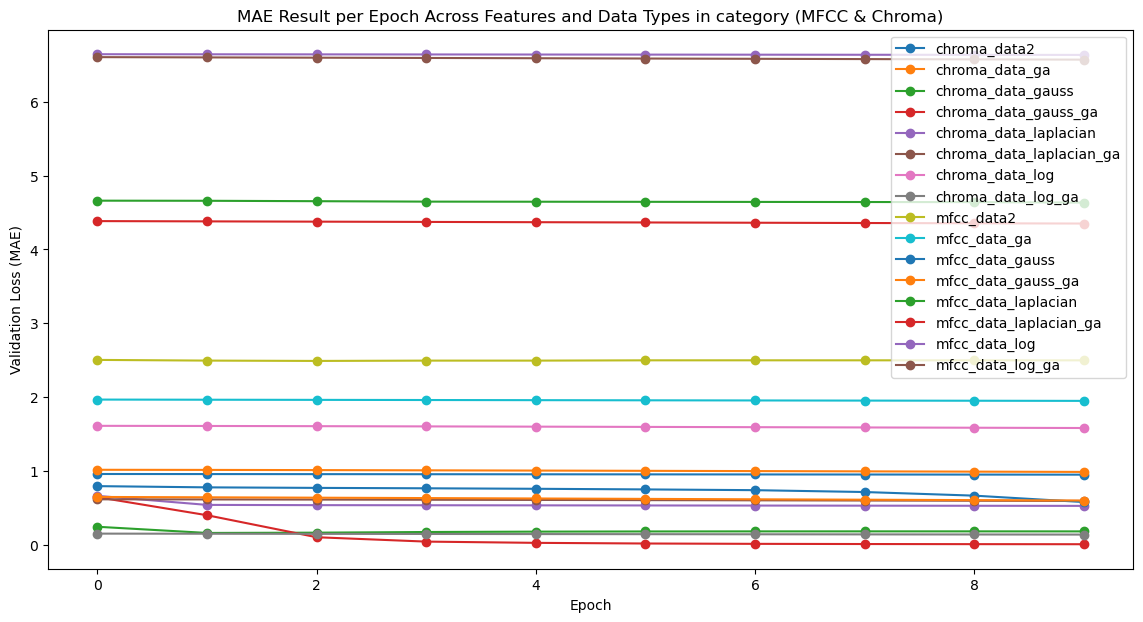

MAE Result : 0.950043797492981, feature : chroma_data2
MAE Result : 0.9871765971183777, feature : chroma_data_ga
MAE Result : 0.1605856865644455, feature : chroma_data_gauss
MAE Result : 0.007917055860161781, feature : chroma_data_gauss_ga
MAE Result : 0.5271250605583191, feature : chroma_data_laplacian
MAE Result : 0.5940589904785156, feature : chroma_data_laplacian_ga
MAE Result : 1.581792950630188, feature : chroma_data_log
MAE Result : 0.13849124312400818, feature : chroma_data_log_ga
MAE Result : 2.490260362625122, feature : mfcc_data2
MAE Result : 1.9492534399032593, feature : mfcc_data_ga
MAE Result : 0.5789058208465576, feature : mfcc_data_gauss
MAE Result : 0.5996606349945068, feature : mfcc_data_gauss_ga
MAE Result : 4.634591102600098, feature : mfcc_data_laplacian
MAE Result : 4.350910186767578, feature : mfcc_data_laplacian_ga
MAE Result : 6.634612083435059, feature : mfcc_data_log
MAE Result : 6.570659637451172, feature : mfcc_data_log_ga


In [ ]:
#7

def process_features(data, feature_type):
    if feature_type == 'stft':
        return librosa.istft(data)
    elif feature_type in ['mfcc', 'chroma']:
        if data.ndim == 2:
            return data.reshape(data.shape[0], data.shape[1], 1)
        else:
            return data
    else:
        raise ValueError("Unsupported feature type")

def create_sequences(data, seq_length):
    X, Y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        Y.append(data[i + seq_length])
    return np.array(X), np.array(Y)

feature_types = ['chroma', 'mfcc']
data_names = ['data2', 'data_ga', 'data_gauss', 'data_gauss_ga', 'data_laplacian',
              'data_laplacian_ga', 'data_log', 'data_log_ga']

mse_results = {}

for feature_type in feature_types:
    hdf5_file_path = f'cat_{feature_type}_features7.h5'
    with h5py.File(hdf5_file_path, 'r+') as hdf5_file:
        for data_name in tqdm(data_names, desc=f"Processing {feature_type}"):
            data = hdf5_file[data_name][:]

            if data.ndim == 2 and data.shape[0] > 0:
                data = np.expand_dims(data, axis=-1)

                t, y = process_features(data, feature_type), np.roll(data, -1, axis=0)
                t, y = t[:-1], y[:-1]

                if len(t) > 10:
                    X_train, y_train = create_sequences(t, 2)
                    X_test, y_test = create_sequences(y, 2)

                    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], -1))
                    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], -1))
                    y_train = y_train.reshape((y_train.shape[0], -1))
                    y_test = y_test.reshape((y_test.shape[0], -1))

                    if X_train.size > 0 and X_test.size > 0:
                        model = Sequential([
                            LSTM(16, input_shape=(X_train.shape[1], X_train.shape[2])),
                            Dense(1)
                        ])
                        model.compile(optimizer='adam', loss='mean_absolute_error')
                        history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test), verbose=2)

                        mse_results[f'{feature_type}_{data_name}'] = history.history['val_loss']
                        print(f'MAE Result for {feature_type} {data_name}:', np.min(history.history['val_loss']))

plt.figure(figsize=(14, 7))
for key, losses in mse_results.items():
    plt.plot(losses, label=key, marker='o', linestyle='-')
plt.ylabel('Validation Loss (MAE)')
plt.xlabel('Epoch')
plt.title('MAE Result per Epoch Across Features and Data Types in category (MFCC & Chroma)')
plt.legend()
plt.show()

for key, losses in mse_results.items():
    los = np.min(losses)
    print(f'MAE Result : {los}, feature : {key}')


Processing chroma:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/10
1/1 - 1s - 985ms/step - loss: 1.5837 - val_loss: 0.9591
Epoch 2/10
1/1 - 0s - 263ms/step - loss: 0.9545 - val_loss: 0.9581
Epoch 3/10
1/1 - 0s - 254ms/step - loss: 0.9535 - val_loss: 0.9571
Epoch 4/10
1/1 - 0s - 250ms/step - loss: 0.9525 - val_loss: 0.9561
Epoch 5/10
1/1 - 0s - 248ms/step - loss: 0.9515 - val_loss: 0.9551
Epoch 6/10
1/1 - 0s - 252ms/step - loss: 0.9505 - val_loss: 0.9541
Epoch 7/10
1/1 - 0s - 260ms/step - loss: 0.9495 - val_loss: 0.9531
Epoch 8/10
1/1 - 0s - 267ms/step - loss: 0.9485 - val_loss: 0.9521
Epoch 9/10
1/1 - 0s - 254ms/step - loss: 0.9475 - val_loss: 0.9511
Epoch 10/10
1/1 - 0s - 254ms/step - loss: 0.9465 - val_loss: 0.9501


Processing chroma:  12%|█▎        | 1/8 [00:03<00:24,  3.55s/it]

MAE Result for chroma data2: 0.9501021504402161
Epoch 1/10
1/1 - 3s - 3s/step - loss: 0.8897 - val_loss: 0.3549
Epoch 2/10
1/1 - 0s - 144ms/step - loss: 0.3595 - val_loss: 0.3534
Epoch 3/10
1/1 - 0s - 149ms/step - loss: 0.3579 - val_loss: 0.3509
Epoch 4/10
1/1 - 0s - 153ms/step - loss: 0.3554 - val_loss: 0.3479
Epoch 5/10
1/1 - 0s - 141ms/step - loss: 0.3524 - val_loss: 0.3446
Epoch 6/10
1/1 - 0s - 141ms/step - loss: 0.3491 - val_loss: 0.3412
Epoch 7/10
1/1 - 0s - 140ms/step - loss: 0.3457 - val_loss: 0.3376
Epoch 8/10
1/1 - 0s - 154ms/step - loss: 0.3421 - val_loss: 0.3340
Epoch 9/10
1/1 - 0s - 153ms/step - loss: 0.3385 - val_loss: 0.3302
Epoch 10/10
1/1 - 0s - 160ms/step - loss: 0.3348 - val_loss: 0.3265


Processing chroma:  25%|██▌       | 2/8 [00:08<00:25,  4.33s/it]

MAE Result for chroma data_ga: 0.32647642493247986
Epoch 1/10
1/1 - 1s - 1s/step - loss: 0.0074 - val_loss: 0.2633
Epoch 2/10
1/1 - 0s - 326ms/step - loss: 0.4715 - val_loss: 0.1903
Epoch 3/10
1/1 - 0s - 346ms/step - loss: 0.3338 - val_loss: 0.1185
Epoch 4/10
1/1 - 0s - 280ms/step - loss: 0.2276 - val_loss: 0.1499
Epoch 5/10
1/1 - 0s - 311ms/step - loss: 0.1532 - val_loss: 0.2370
Epoch 6/10
1/1 - 0s - 277ms/step - loss: 0.2059 - val_loss: 0.1653
Epoch 7/10
1/1 - 0s - 265ms/step - loss: 0.1548 - val_loss: 0.1566
Epoch 8/10
1/1 - 0s - 274ms/step - loss: 0.1533 - val_loss: 0.1707
Epoch 9/10
1/1 - 0s - 262ms/step - loss: 0.1540 - val_loss: 0.1817
Epoch 10/10
1/1 - 0s - 251ms/step - loss: 0.1525 - val_loss: 0.1897


Processing chroma:  38%|███▊      | 3/8 [00:12<00:20,  4.10s/it]

MAE Result for chroma data_gauss: 0.118450827896595
Epoch 1/10
1/1 - 1s - 695ms/step - loss: 0.0069 - val_loss: 1.8317
Epoch 2/10
1/1 - 0s - 134ms/step - loss: 1.9278 - val_loss: 1.1745
Epoch 3/10
1/1 - 0s - 137ms/step - loss: 1.2003 - val_loss: 0.2439
Epoch 4/10
1/1 - 0s - 138ms/step - loss: 0.1581 - val_loss: 0.1078
Epoch 5/10
1/1 - 0s - 133ms/step - loss: 0.0484 - val_loss: 0.0598
Epoch 6/10
1/1 - 0s - 137ms/step - loss: 0.0250 - val_loss: 0.0358
Epoch 7/10
1/1 - 0s - 137ms/step - loss: 0.0151 - val_loss: 0.0231
Epoch 8/10
1/1 - 0s - 138ms/step - loss: 0.0104 - val_loss: 0.0163
Epoch 9/10
1/1 - 0s - 136ms/step - loss: 0.0082 - val_loss: 0.0126
Epoch 10/10
1/1 - 0s - 138ms/step - loss: 0.0073 - val_loss: 0.0103


Processing chroma:  50%|█████     | 4/8 [00:14<00:13,  3.29s/it]

MAE Result for chroma data_gauss_ga: 0.010319195687770844
Epoch 1/10
1/1 - 1s - 1s/step - loss: 0.2001 - val_loss: 0.5757
Epoch 2/10
1/1 - 0s - 331ms/step - loss: 0.3539 - val_loss: 0.4759
Epoch 3/10
1/1 - 0s - 256ms/step - loss: 0.2562 - val_loss: 0.4748
Epoch 4/10
1/1 - 0s - 253ms/step - loss: 0.2557 - val_loss: 0.4738
Epoch 5/10
1/1 - 0s - 256ms/step - loss: 0.2551 - val_loss: 0.4727
Epoch 6/10
1/1 - 0s - 258ms/step - loss: 0.2546 - val_loss: 0.4717
Epoch 7/10
1/1 - 0s - 259ms/step - loss: 0.2541 - val_loss: 0.4707
Epoch 8/10
1/1 - 0s - 256ms/step - loss: 0.2536 - val_loss: 0.4698
Epoch 9/10
1/1 - 0s - 273ms/step - loss: 0.2531 - val_loss: 0.4688
Epoch 10/10
1/1 - 0s - 270ms/step - loss: 0.2526 - val_loss: 0.4679


Processing chroma:  62%|██████▎   | 5/8 [00:17<00:10,  3.40s/it]

MAE Result for chroma data_laplacian: 0.46788761019706726
Epoch 1/10
1/1 - 1s - 684ms/step - loss: 0.2950 - val_loss: 0.9112
Epoch 2/10
1/1 - 0s - 134ms/step - loss: 0.8908 - val_loss: 0.9100
Epoch 3/10
1/1 - 0s - 133ms/step - loss: 0.8897 - val_loss: 0.9082
Epoch 4/10
1/1 - 0s - 133ms/step - loss: 0.8879 - val_loss: 0.9061
Epoch 5/10
1/1 - 0s - 127ms/step - loss: 0.8858 - val_loss: 0.9039
Epoch 6/10
1/1 - 0s - 133ms/step - loss: 0.8835 - val_loss: 0.9015
Epoch 7/10
1/1 - 0s - 134ms/step - loss: 0.8811 - val_loss: 0.8990
Epoch 8/10
1/1 - 0s - 133ms/step - loss: 0.8787 - val_loss: 0.8965
Epoch 9/10
1/1 - 0s - 130ms/step - loss: 0.8762 - val_loss: 0.8939
Epoch 10/10
1/1 - 0s - 134ms/step - loss: 0.8736 - val_loss: 0.8913


Processing chroma:  75%|███████▌  | 6/8 [00:19<00:05,  2.92s/it]

MAE Result for chroma data_laplacian_ga: 0.891308605670929
Epoch 1/10
1/1 - 1s - 971ms/step - loss: 1.6170 - val_loss: 0.6026
Epoch 2/10
1/1 - 0s - 404ms/step - loss: 0.6049 - val_loss: 0.6007
Epoch 3/10
1/1 - 0s - 325ms/step - loss: 0.6030 - val_loss: 0.5988
Epoch 4/10
1/1 - 0s - 307ms/step - loss: 0.6012 - val_loss: 0.5969
Epoch 5/10
1/1 - 0s - 271ms/step - loss: 0.5993 - val_loss: 0.5950
Epoch 6/10
1/1 - 0s - 298ms/step - loss: 0.5975 - val_loss: 0.5931
Epoch 7/10
1/1 - 0s - 300ms/step - loss: 0.5956 - val_loss: 0.5911
Epoch 8/10
1/1 - 0s - 273ms/step - loss: 0.5938 - val_loss: 0.5892
Epoch 9/10
1/1 - 0s - 277ms/step - loss: 0.5919 - val_loss: 0.5873
Epoch 10/10
1/1 - 0s - 276ms/step - loss: 0.5901 - val_loss: 0.5854


Processing chroma:  88%|████████▊ | 7/8 [00:23<00:03,  3.23s/it]

MAE Result for chroma data_log: 0.5853923559188843
Epoch 1/10
1/1 - 1s - 781ms/step - loss: 1.2611 - val_loss: 0.1233
Epoch 2/10
1/1 - 0s - 131ms/step - loss: 0.1451 - val_loss: 0.1224
Epoch 3/10
1/1 - 0s - 136ms/step - loss: 0.1442 - val_loss: 0.1215
Epoch 4/10
1/1 - 0s - 135ms/step - loss: 0.1435 - val_loss: 0.1207
Epoch 5/10
1/1 - 0s - 136ms/step - loss: 0.1428 - val_loss: 0.1200
Epoch 6/10
1/1 - 0s - 135ms/step - loss: 0.1421 - val_loss: 0.1193
Epoch 7/10
1/1 - 0s - 133ms/step - loss: 0.1416 - val_loss: 0.1188
Epoch 8/10
1/1 - 0s - 134ms/step - loss: 0.1411 - val_loss: 0.1183
Epoch 9/10
1/1 - 0s - 131ms/step - loss: 0.1408 - val_loss: 0.1179
Epoch 10/10
1/1 - 0s - 131ms/step - loss: 0.1405 - val_loss: 0.1176


Processing chroma: 100%|██████████| 8/8 [00:25<00:00,  3.23s/it]


MAE Result for chroma data_log_ga: 0.11763811111450195


Processing mfcc:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/10
2/2 - 72s - 36s/step - loss: 2.6718 - val_loss: 2.5902
Epoch 2/10
2/2 - 43s - 22s/step - loss: 2.6146 - val_loss: 2.5897
Epoch 3/10
2/2 - 42s - 21s/step - loss: 2.6142 - val_loss: 2.5891
Epoch 4/10
2/2 - 37s - 18s/step - loss: 2.6137 - val_loss: 2.5886
Epoch 5/10
2/2 - 42s - 21s/step - loss: 2.6131 - val_loss: 2.5881
Epoch 6/10
2/2 - 36s - 18s/step - loss: 2.6127 - val_loss: 2.5875
Epoch 7/10
2/2 - 43s - 21s/step - loss: 2.6122 - val_loss: 2.5870
Epoch 8/10
2/2 - 39s - 20s/step - loss: 2.6117 - val_loss: 2.5864
Epoch 9/10
2/2 - 38s - 19s/step - loss: 2.6111 - val_loss: 2.5859
Epoch 10/10
2/2 - 40s - 20s/step - loss: 2.6107 - val_loss: 2.5854


Processing mfcc:  12%|█▎        | 1/8 [07:42<53:57, 462.53s/it]

MAE Result for mfcc data2: 2.585357904434204
Epoch 1/10
2/2 - 18s - 9s/step - loss: 2.0574 - val_loss: 1.8953
Epoch 2/10
2/2 - 10s - 5s/step - loss: 1.9105 - val_loss: 1.8938
Epoch 3/10
2/2 - 9s - 5s/step - loss: 1.9091 - val_loss: 1.8924
Epoch 4/10
2/2 - 7s - 4s/step - loss: 1.9075 - val_loss: 1.8909
Epoch 5/10
2/2 - 9s - 5s/step - loss: 1.9060 - val_loss: 1.8895
Epoch 6/10
2/2 - 7s - 3s/step - loss: 1.9046 - val_loss: 1.8881
Epoch 7/10
2/2 - 8s - 4s/step - loss: 1.9030 - val_loss: 1.8867
Epoch 8/10
2/2 - 6s - 3s/step - loss: 1.9017 - val_loss: 1.8852
Epoch 9/10
2/2 - 10s - 5s/step - loss: 1.9001 - val_loss: 1.8838
Epoch 10/10
2/2 - 6s - 3s/step - loss: 1.8987 - val_loss: 1.8824
MAE Result for mfcc data_ga:

Processing mfcc:  25%|██▌       | 2/8 [09:22<24:55, 249.31s/it]

 1.882436752319336
Epoch 1/10
2/2 - 66s - 33s/step - loss: 0.2840 - val_loss: 0.4111
Epoch 2/10
2/2 - 50s - 25s/step - loss: 0.4084 - val_loss: 0.3973
Epoch 3/10
2/2 - 45s - 22s/step - loss: 0.3960 - val_loss: 0.3909
Epoch 4/10
2/2 - 46s - 23s/step - loss: 0.3907 - val_loss: 0.3860
Epoch 5/10
2/2 - 39s - 19s/step - loss: 0.3861 - val_loss: 0.3829
Epoch 6/10
2/2 - 33s - 17s/step - loss: 0.3829 - val_loss: 0.3802
Epoch 7/10
2/2 - 41s - 20s/step - loss: 0.3802 - val_loss: 0.3775
Epoch 8/10
2/2 - 35s - 18s/step - loss: 0.3775 - val_loss: 0.3747
Epoch 9/10
2/2 - 44s - 22s/step - loss: 0.3747 - val_loss: 0.3720
Epoch 10/10
2/2 - 41s - 20s/step - loss: 0.3719 - val_loss: 0.3693


Processing mfcc:  38%|███▊      | 3/8 [17:08<29:01, 348.30s/it]

MAE Result for mfcc data_gauss: 0.36925703287124634
Epoch 1/10
2/2 - 14s - 7s/step - loss: 0.6030 - val_loss: 1.1519
Epoch 2/10
2/2 - 12s - 6s/step - loss: 1.1482 - val_loss: 1.1456
Epoch 3/10
2/2 - 10s - 5s/step - loss: 1.1416 - val_loss: 1.1384
Epoch 4/10
2/2 - 8s - 4s/step - loss: 1.1343 - val_loss: 1.1309
Epoch 5/10
2/2 - 8s - 4s/step - loss: 1.1267 - val_loss: 1.1232
Epoch 6/10
2/2 - 8s - 4s/step - loss: 1.1190 - val_loss: 1.1153
Epoch 7/10
2/2 - 6s - 3s/step - loss: 1.1112 - val_loss: 1.1074
Epoch 8/10
2/2 - 9s - 4s/step - loss: 1.1032 - val_loss: 1.0995
Epoch 9/10
2/2 - 15s - 8s/step - loss: 1.0953 - val_loss: 1.0915
Epoch 10/10
2/2 - 10s - 5s/step - loss: 1.0873 - val_loss: 1.0835
MAE Result for mfcc data_gauss_ga: 1.083499550819397


Processing mfcc:  50%|█████     | 4/8 [18:54<16:50, 252.70s/it]

Epoch 1/10
2/2 - 69s - 34s/step - loss: 4.8705 - val_loss: 4.9187
Epoch 2/10
2/2 - 50s - 25s/step - loss: 4.9538 - val_loss: 4.9178
Epoch 3/10
2/2 - 49s - 25s/step - loss: 4.9528 - val_loss: 4.9169
Epoch 4/10
2/2 - 45s - 22s/step - loss: 4.9519 - val_loss: 4.9160
Epoch 5/10
2/2 - 44s - 22s/step - loss: 4.9510 - val_loss: 4.9150
Epoch 6/10
2/2 - 39s - 20s/step - loss: 4.9501 - val_loss: 4.9141
Epoch 7/10
2/2 - 37s - 18s/step - loss: 4.9491 - val_loss: 4.9131
Epoch 8/10
2/2 - 47s - 24s/step - loss: 4.9481 - val_loss: 4.9122
Epoch 9/10
2/2 - 39s - 19s/step - loss: 4.9473 - val_loss: 4.9112
Epoch 10/10
2/2 - 35s - 18s/step - loss: 4.9463 - val_loss: 4.9102


Processing mfcc:  62%|██████▎   | 5/8 [26:57<16:46, 335.62s/it]

MAE Result for mfcc data_laplacian: 4.910210132598877
Epoch 1/10
2/2 - 17s - 9s/step - loss: 4.7330 - val_loss: 4.1213
Epoch 2/10
2/2 - 10s - 5s/step - loss: 4.1611 - val_loss: 4.1185
Epoch 3/10
2/2 - 11s - 5s/step - loss: 4.1584 - val_loss: 4.1158
Epoch 4/10
2/2 - 7s - 4s/step - loss: 4.1556 - val_loss: 4.1131
Epoch 5/10
2/2 - 7s - 3s/step - loss: 4.1529 - val_loss: 4.1104
Epoch 6/10
2/2 - 8s - 4s/step - loss: 4.1501 - val_loss: 4.1077
Epoch 7/10
2/2 - 9s - 5s/step - loss: 4.1474 - val_loss: 4.1050
Epoch 8/10
2/2 - 8s - 4s/step - loss: 4.1446 - val_loss: 4.1023
Epoch 9/10
2/2 - 10s - 5s/step - loss: 4.1419 - val_loss: 4.0996
Epoch 10/10
2/2 - 11s - 6s/step - loss: 4.1391 - val_loss: 4.0969


Processing mfcc:  75%|███████▌  | 6/8 [28:44<08:36, 258.03s/it]

MAE Result for mfcc data_laplacian_ga: 4.096893787384033
Epoch 1/10
2/2 - 75s - 37s/step - loss: 7.1584 - val_loss: 7.2195
Epoch 2/10
2/2 - 51s - 25s/step - loss: 7.2869 - val_loss: 7.2141
Epoch 3/10
2/2 - 50s - 25s/step - loss: 7.2850 - val_loss: 7.2125
Epoch 4/10
2/2 - 51s - 25s/step - loss: 7.2834 - val_loss: 7.2100
Epoch 5/10
2/2 - 40s - 20s/step - loss: 7.2809 - val_loss: 7.2084
Epoch 6/10
2/2 - 37s - 18s/step - loss: 7.2792 - val_loss: 7.2067
Epoch 7/10
2/2 - 40s - 20s/step - loss: 7.2776 - val_loss: 7.2050
Epoch 8/10
2/2 - 36s - 18s/step - loss: 7.2759 - val_loss: 7.2034
Epoch 9/10
2/2 - 34s - 17s/step - loss: 7.2742 - val_loss: 7.2017
Epoch 10/10
2/2 - 41s - 21s/step - loss: 7.2726 - val_loss: 7.2000
MAE Result for mfcc data_log:

Processing mfcc:  88%|████████▊ | 7/8 [36:51<05:32, 332.67s/it]

 7.200038909912109
Epoch 1/10
2/2 - 19s - 9s/step - loss: 6.4160 - val_loss: 5.8232
Epoch 2/10
2/2 - 7s - 4s/step - loss: 5.8895 - val_loss: 5.8613
Epoch 3/10
2/2 - 8s - 4s/step - loss: 5.9181 - val_loss: 5.8800
Epoch 4/10
2/2 - 8s - 4s/step - loss: 5.9331 - val_loss: 5.8870
Epoch 5/10
2/2 - 7s - 4s/step - loss: 5.9466 - val_loss: 5.8893
Epoch 6/10
2/2 - 6s - 3s/step - loss: 5.9422 - val_loss: 5.8849
Epoch 7/10
2/2 - 9s - 4s/step - loss: 5.9377 - val_loss: 5.8805
Epoch 8/10
2/2 - 6s - 3s/step - loss: 5.9331 - val_loss: 5.8762
Epoch 9/10
2/2 - 7s - 4s/step - loss: 5.9288 - val_loss: 5.8718
Epoch 10/10
2/2 - 6s - 3s/step - loss: 5.9242 - val_loss: 5.8675


Processing mfcc: 100%|██████████| 8/8 [38:20<00:00, 287.61s/it]

MAE Result for mfcc data_log_ga: 5.823198318481445


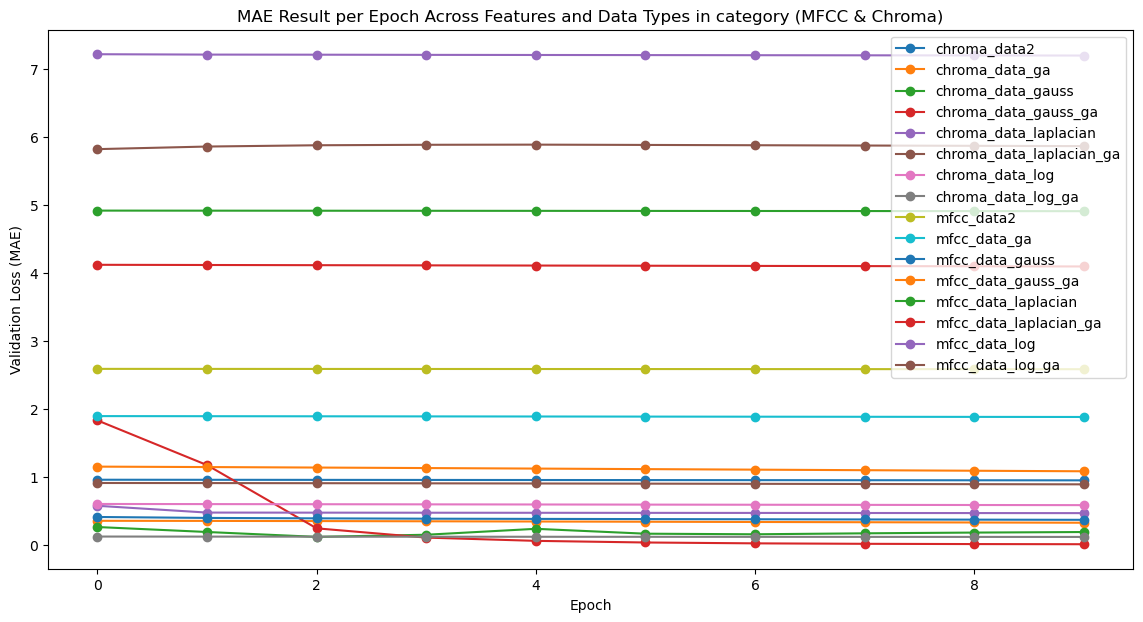

MAE Result : 0.9501021504402161, feature : chroma_data2
MAE Result : 0.32647642493247986, feature : chroma_data_ga
MAE Result : 0.118450827896595, feature : chroma_data_gauss
MAE Result : 0.010319195687770844, feature : chroma_data_gauss_ga
MAE Result : 0.46788761019706726, feature : chroma_data_laplacian
MAE Result : 0.891308605670929, feature : chroma_data_laplacian_ga
MAE Result : 0.5853923559188843, feature : chroma_data_log
MAE Result : 0.11763811111450195, feature : chroma_data_log_ga
MAE Result : 2.585357904434204, feature : mfcc_data2
MAE Result : 1.882436752319336, feature : mfcc_data_ga
MAE Result : 0.36925703287124634, feature : mfcc_data_gauss
MAE Result : 1.083499550819397, feature : mfcc_data_gauss_ga
MAE Result : 4.910210132598877, feature : mfcc_data_laplacian
MAE Result : 4.096893787384033, feature : mfcc_data_laplacian_ga
MAE Result : 7.200038909912109, feature : mfcc_data_log
MAE Result : 5.823198318481445, feature : mfcc_data_log_ga


In [ ]:
#2

def process_features(data, feature_type):
    if feature_type == 'stft':
        return librosa.istft(data)
    elif feature_type in ['mfcc', 'chroma']:
        if data.ndim == 2:
            return data.reshape(data.shape[0], data.shape[1], 1)
        else:
            return data
    else:
        raise ValueError("Unsupported feature type")

def create_sequences(data, seq_length):
    X, Y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        Y.append(data[i + seq_length])
    return np.array(X), np.array(Y)

feature_types = ['chroma', 'mfcc']
data_names = ['data2', 'data_ga', 'data_gauss', 'data_gauss_ga', 'data_laplacian',
              'data_laplacian_ga', 'data_log', 'data_log_ga']

mse_results = {}

for feature_type in feature_types:
    hdf5_file_path = f'cat_{feature_type}_features2.h5'
    with h5py.File(hdf5_file_path, 'r+') as hdf5_file:
        for data_name in tqdm(data_names, desc=f"Processing {feature_type}"):
            data = hdf5_file[data_name][:]

            if data.ndim == 2 and data.shape[0] > 0:
                data = np.expand_dims(data, axis=-1)

                t, y = process_features(data, feature_type), np.roll(data, -1, axis=0)
                t, y = t[:-1], y[:-1]

                if len(t) > 10:
                    X_train, y_train = create_sequences(t, 2)
                    X_test, y_test = create_sequences(y, 2)

                    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], -1))
                    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], -1))
                    y_train = y_train.reshape((y_train.shape[0], -1))
                    y_test = y_test.reshape((y_test.shape[0], -1))

                    if X_train.size > 0 and X_test.size > 0:
                        model = Sequential([
                            LSTM(16, input_shape=(X_train.shape[1], X_train.shape[2])),
                            Dense(1)
                        ])
                        model.compile(optimizer='adam', loss='mean_absolute_error')
                        history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test), verbose=2)

                        mse_results[f'{feature_type}_{data_name}'] = history.history['val_loss']
                        print(f'MAE Result for {feature_type} {data_name}:', np.min(history.history['val_loss']))

plt.figure(figsize=(14, 7))
for key, losses in mse_results.items():
    plt.plot(losses, label=key, marker='o', linestyle='-')
plt.ylabel('Validation Loss (MAE)')
plt.xlabel('Epoch')
plt.title('MAE Result per Epoch Across Features and Data Types in category (MFCC & Chroma)')
plt.legend()
plt.show()

for key, losses in mse_results.items():
    los = np.min(losses)
    print(f'MAE Result : {los}, feature : {key}')


**DANI**

Processing data_dani:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1/10
503643/503643 - 237s - 470us/step - loss: 6.8699e-04 - val_loss: 6.2304e-04
Epoch 2/10
503643/503643 - 235s - 467us/step - loss: 6.6839e-04 - val_loss: 6.1353e-04
Epoch 3/10
503643/503643 - 235s - 467us/step - loss: 6.6762e-04 - val_loss: 5.9858e-04
Epoch 4/10
503643/503643 - 235s - 466us/step - loss: 6.6727e-04 - val_loss: 6.3034e-04
Epoch 5/10
503643/503643 - 233s - 463us/step - loss: 6.6719e-04 - val_loss: 6.1372e-04
Epoch 6/10
503643/503643 - 234s - 464us/step - loss: 6.6697e-04 - val_loss: 6.0166e-04
Epoch 7/10
503643/503643 - 235s - 466us/step - loss: 6.6679e-04 - val_loss: 6.1080e-04
Epoch 8/10
503643/503643 - 234s - 464us/step - loss: 6.6681e-04 - val_loss: 5.9743e-04
Epoch 9/10
503643/503643 - 235s - 467us/step - loss: 6.6660e-04 - val_loss: 6.0753e-04
Epoch 10/10
503643/503643 - 235s - 467us/step - loss: 6.6646e-04 - val_loss: 5.9647e-04


Processing data_dani:  25%|██▌       | 1/4 [39:29<1:58:28, 2369.45s/it]

Epoch 1/10
503643/503643 - 234s - 465us/step - loss: 6.9386e-04 - val_loss: 6.0424e-04
Epoch 2/10
503643/503643 - 246s - 489us/step - loss: 6.6852e-04 - val_loss: 6.8598e-04
Epoch 3/10
503643/503643 - 247s - 491us/step - loss: 6.6761e-04 - val_loss: 6.0201e-04
Epoch 4/10
503643/503643 - 244s - 485us/step - loss: 6.6729e-04 - val_loss: 5.9456e-04
Epoch 5/10
503643/503643 - 239s - 474us/step - loss: 6.6721e-04 - val_loss: 7.2082e-04
Epoch 6/10
503643/503643 - 244s - 485us/step - loss: 6.6701e-04 - val_loss: 5.9537e-04
Epoch 7/10
503643/503643 - 244s - 484us/step - loss: 6.6693e-04 - val_loss: 6.3610e-04
Epoch 8/10
503643/503643 - 243s - 483us/step - loss: 6.6697e-04 - val_loss: 5.9701e-04
Epoch 9/10
503643/503643 - 243s - 483us/step - loss: 6.6685e-04 - val_loss: 6.4924e-04
Epoch 10/10
503643/503643 - 247s - 490us/step - loss: 6.6685e-04 - val_loss: 6.9869e-04


Processing data_dani:  50%|█████     | 2/4 [1:20:23<1:20:38, 2419.30s/it]

Epoch 1/10
503643/503643 - 247s - 491us/step - loss: 6.8026e-04 - val_loss: 6.1045e-04
Epoch 2/10
503643/503643 - 239s - 475us/step - loss: 6.6805e-04 - val_loss: 6.8239e-04
Epoch 3/10
503643/503643 - 244s - 485us/step - loss: 6.6756e-04 - val_loss: 6.5426e-04
Epoch 4/10
503643/503643 - 242s - 480us/step - loss: 6.6718e-04 - val_loss: 6.3907e-04
Epoch 5/10
503643/503643 - 250s - 496us/step - loss: 6.6689e-04 - val_loss: 6.0433e-04
Epoch 6/10
503643/503643 - 251s - 499us/step - loss: 6.6682e-04 - val_loss: 5.9845e-04
Epoch 7/10
503643/503643 - 249s - 494us/step - loss: 6.6654e-04 - val_loss: 6.2846e-04
Epoch 8/10
503643/503643 - 244s - 485us/step - loss: 6.6664e-04 - val_loss: 6.4801e-04
Epoch 9/10
503643/503643 - 244s - 484us/step - loss: 6.6655e-04 - val_loss: 6.5592e-04
Epoch 10/10
503643/503643 - 235s - 468us/step - loss: 6.6643e-04 - val_loss: 6.7196e-04


Processing data_dani:  75%|███████▌  | 3/4 [2:01:33<40:42, 2442.38s/it]  

Epoch 1/10
503643/503643 - 246s - 488us/step - loss: 6.9005e-04 - val_loss: 6.1282e-04
Epoch 2/10
503643/503643 - 248s - 492us/step - loss: 6.6818e-04 - val_loss: 5.9512e-04
Epoch 3/10
503643/503643 - 241s - 479us/step - loss: 6.6777e-04 - val_loss: 6.3901e-04
Epoch 4/10
503643/503643 - 233s - 463us/step - loss: 6.6716e-04 - val_loss: 5.9872e-04
Epoch 5/10
503643/503643 - 233s - 463us/step - loss: 6.6701e-04 - val_loss: 6.8856e-04
Epoch 6/10
503643/503643 - 233s - 462us/step - loss: 6.6709e-04 - val_loss: 6.0037e-04
Epoch 7/10
503643/503643 - 233s - 463us/step - loss: 6.6682e-04 - val_loss: 6.2017e-04
Epoch 8/10
503643/503643 - 237s - 471us/step - loss: 6.6688e-04 - val_loss: 6.3233e-04
Epoch 9/10
503643/503643 - 234s - 464us/step - loss: 6.6667e-04 - val_loss: 5.9626e-04
Epoch 10/10
503643/503643 - 233s - 462us/step - loss: 6.6675e-04 - val_loss: 5.9696e-04


Processing data_dani_ga:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1/10
251998/251998 - 117s - 465us/step - loss: 6.0925e-04 - val_loss: 5.3872e-04
Epoch 2/10
251998/251998 - 117s - 465us/step - loss: 6.0080e-04 - val_loss: 5.3866e-04
Epoch 3/10
251998/251998 - 118s - 468us/step - loss: 6.0033e-04 - val_loss: 6.1031e-04
Epoch 4/10
251998/251998 - 117s - 464us/step - loss: 5.9978e-04 - val_loss: 5.3216e-04
Epoch 5/10
251998/251998 - 117s - 466us/step - loss: 5.9976e-04 - val_loss: 5.8113e-04
Epoch 6/10
251998/251998 - 117s - 466us/step - loss: 5.9947e-04 - val_loss: 5.4199e-04
Epoch 7/10
251998/251998 - 118s - 467us/step - loss: 5.9916e-04 - val_loss: 5.3847e-04
Epoch 8/10
251998/251998 - 117s - 466us/step - loss: 5.9924e-04 - val_loss: 5.3256e-04
Epoch 9/10
251998/251998 - 117s - 466us/step - loss: 5.9932e-04 - val_loss: 5.3099e-04
Epoch 10/10
251998/251998 - 118s - 469us/step - loss: 5.9919e-04 - val_loss: 5.3476e-04


Processing data_dani_ga:  25%|██▌       | 1/4 [19:45<59:15, 1185.04s/it]

Epoch 1/10
251998/251998 - 121s - 480us/step - loss: 6.1508e-04 - val_loss: 5.7144e-04
Epoch 2/10
251998/251998 - 125s - 495us/step - loss: 6.0065e-04 - val_loss: 5.4062e-04
Epoch 3/10
251998/251998 - 125s - 495us/step - loss: 6.0002e-04 - val_loss: 5.9583e-04
Epoch 4/10
251998/251998 - 125s - 494us/step - loss: 5.9983e-04 - val_loss: 5.4876e-04
Epoch 5/10
251998/251998 - 124s - 492us/step - loss: 5.9973e-04 - val_loss: 5.4519e-04
Epoch 6/10
251998/251998 - 125s - 495us/step - loss: 5.9967e-04 - val_loss: 6.0689e-04
Epoch 7/10
251998/251998 - 124s - 492us/step - loss: 5.9923e-04 - val_loss: 6.1866e-04
Epoch 8/10
251998/251998 - 122s - 486us/step - loss: 5.9928e-04 - val_loss: 5.3347e-04
Epoch 9/10
251998/251998 - 121s - 478us/step - loss: 5.9904e-04 - val_loss: 5.3641e-04
Epoch 10/10
251998/251998 - 121s - 480us/step - loss: 5.9928e-04 - val_loss: 5.3681e-04


Processing data_dani_ga:  50%|█████     | 2/4 [40:27<40:37, 1218.89s/it]

Epoch 1/10
251998/251998 - 126s - 501us/step - loss: 6.1709e-04 - val_loss: 5.3812e-04
Epoch 2/10
251998/251998 - 123s - 489us/step - loss: 6.0057e-04 - val_loss: 5.6738e-04
Epoch 3/10
251998/251998 - 121s - 480us/step - loss: 6.0016e-04 - val_loss: 5.3168e-04
Epoch 4/10
251998/251998 - 130s - 514us/step - loss: 5.9981e-04 - val_loss: 5.3502e-04
Epoch 5/10
251998/251998 - 124s - 492us/step - loss: 5.9960e-04 - val_loss: 5.8841e-04
Epoch 6/10
251998/251998 - 120s - 476us/step - loss: 5.9950e-04 - val_loss: 5.3027e-04
Epoch 7/10
251998/251998 - 125s - 496us/step - loss: 5.9941e-04 - val_loss: 5.5487e-04
Epoch 8/10
251998/251998 - 128s - 509us/step - loss: 5.9938e-04 - val_loss: 6.1076e-04
Epoch 9/10
251998/251998 - 126s - 498us/step - loss: 5.9928e-04 - val_loss: 5.7615e-04
Epoch 10/10
251998/251998 - 125s - 497us/step - loss: 5.9927e-04 - val_loss: 5.3198e-04


Processing data_dani_ga:  75%|███████▌  | 3/4 [1:01:27<20:37, 1237.46s/it]

Epoch 1/10
251998/251998 - 121s - 481us/step - loss: 6.1601e-04 - val_loss: 5.6074e-04
Epoch 2/10
251998/251998 - 127s - 504us/step - loss: 6.0065e-04 - val_loss: 5.6850e-04
Epoch 3/10
251998/251998 - 129s - 510us/step - loss: 6.0025e-04 - val_loss: 5.3220e-04
Epoch 4/10
251998/251998 - 123s - 487us/step - loss: 5.9970e-04 - val_loss: 5.7760e-04
Epoch 5/10
251998/251998 - 120s - 474us/step - loss: 5.9946e-04 - val_loss: 5.8842e-04
Epoch 6/10
251998/251998 - 118s - 469us/step - loss: 5.9949e-04 - val_loss: 5.5146e-04
Epoch 7/10
251998/251998 - 118s - 466us/step - loss: 5.9944e-04 - val_loss: 5.3081e-04
Epoch 8/10
251998/251998 - 117s - 466us/step - loss: 5.9911e-04 - val_loss: 5.3811e-04
Epoch 9/10
251998/251998 - 117s - 465us/step - loss: 5.9919e-04 - val_loss: 5.3723e-04
Epoch 10/10
251998/251998 - 117s - 464us/step - loss: 5.9909e-04 - val_loss: 5.4881e-04


Processing data_dani_ga: 100%|██████████| 4/4 [1:21:44<00:00, 1226.09s/it]


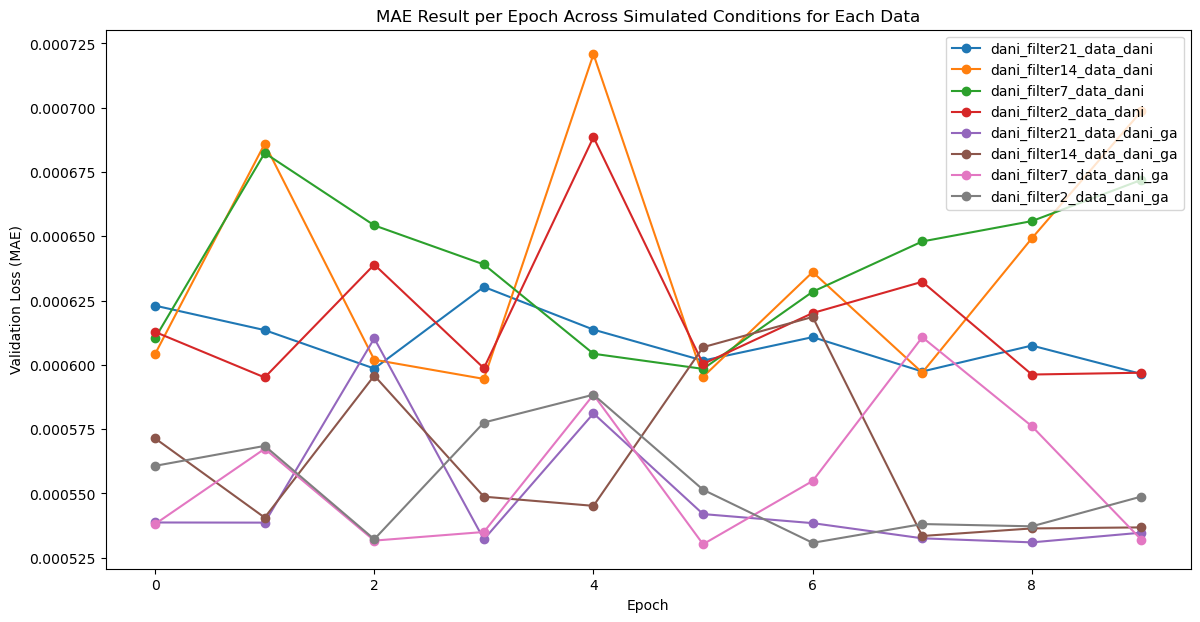

MAE Result for dani_filter21_data_dani: 0.0005964736337773502
MAE Result for dani_filter14_data_dani: 0.0005945593002252281
MAE Result for dani_filter7_data_dani: 0.000598448677919805
MAE Result for dani_filter2_data_dani: 0.0005951219354756176
MAE Result for dani_filter21_data_dani_ga: 0.0005309866974130273
MAE Result for dani_filter14_data_dani_ga: 0.0005334728048183024
MAE Result for dani_filter7_data_dani_ga: 0.0005302677163854241
MAE Result for dani_filter2_data_dani_ga: 0.0005308096297085285


In [ ]:
#21,14,7,2

def process_features(data, feature_type):
    if feature_type == 'filter':
        return librosa.istft(data)

def create_sequences(data, seq_length):
    X, Y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        Y.append(data[i + seq_length])
    return np.array(X), np.array(Y)

def process(hdf5_file_path):
    with h5py.File(hdf5_file_path, 'r+') as hdf5_file:
      for data_name in tqdm(data_names, desc=f"Processing {data_name}")::
          data = hdf5_file[data_name][:]
          t, y = process_features(data, 'filter'), np.roll(data, -1)
          t, y = t[:-1], y[:-1]

          train_size = int(0.8 * len(t))
          train_data, test_data = t[:train_size], t[train_size:]
          train_labels, test_labels = y[:train_size], y[train_size:]

          X_train, y_train = create_sequences(train_data, 2)
          X_test, y_test = create_sequences(test_data, 2)

          X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
          X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

          model = Sequential([
              LSTM(16, input_shape=(2, 1)),
              Dense(1)
          ])
          model.compile(optimizer='adam', loss='mean_absolute_error')
          history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test), verbose=2)

          mse_results[f"{hdf5_file}_{data_name}"] = history.history['val_loss']


hdf5_files = ['dani_filter21.h5', 'dani_filter14.h5', 'dani_filter7.h5', 'dani_filter2.h5']
data_names = ['data_dani', 'data_dani_ga']

mse_results = {}

for file_path in hdf5_files:
    process(file_path)

plt.figure(figsize=(14, 7))
for key, losses in mse_results.items():
    plt.plot(losses, label=key, marker='o', linestyle='-')
plt.ylabel('Validation Loss (MAE)')
plt.xlabel('Epoch')
plt.title('MAE Result per Epoch Across Simulated Conditions for Each Data')
plt.legend()
plt.show()


for key, losses in mse_results.items():
    print(f'MAE Result for {key}: {np.min(losses)}')



**END**

In [ ]:
#END